<a href="https://colab.research.google.com/github/EngOmarElsayed/HeartDiseaseNoteBook/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![documentation.pdf](data:application/pdf;base64,JVBERi0xLjUNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0NhdGFsb2cvUGFnZXMgMiAwIFIvTGFuZyhlbi1JTikgPj4NCmVuZG9iag0KMiAwIG9iag0KPDwvVHlwZS9QYWdlcy9Db3VudCAxL0tpZHNbIDMgMCBSXSA+Pg0KZW5kb2JqDQozIDAgb2JqDQo8PC9UeXBlL1BhZ2UvUGFyZW50IDIgMCBSL1Jlc291cmNlczw8L0ZvbnQ8PC9GMSA1IDAgUi9GMiA3IDAgUi9GMyA5IDAgUj4+L1Byb2NTZXRbL1BERi9UZXh0L0ltYWdlQi9JbWFnZUMvSW1hZ2VJXSA+Pi9NZWRpYUJveFsgMCAwIDU5NS4yIDg0MS45Ml0gL0NvbnRlbnRzIDQgMCBSL0dyb3VwPDwvVHlwZS9Hcm91cC9TL1RyYW5zcGFyZW5jeS9DUy9EZXZpY2VSR0I+Pi9UYWJzL1M+Pg0KZW5kb2JqDQo0IDAgb2JqDQo8PC9GaWx0ZXIvRmxhdGVEZWNvZGUvTGVuZ3RoIDYyMTI+Pg0Kc3RyZWFtDQp4nL1d25IbN5J9V4T+gW9LTkyXq4C6rteOsGY8O7EPjpmxdvZB3gdKzZYVq25pyW6t/PeLzMStCkAWCLIdDrW7WYfIg0QCeXCpqlevX7745i/NphGb13cvXzSbWv3XbAZR1aLdDN1YyXHz+v7li3rzHn78+8sXb7Z/3d2M28NObve7m2573N2028fdsN3s+u2fdzfT9oP65XRQF6X632Y30qcIBhz+cjo87ib8yg/qH3wM/7As+Prb3Y3YPsEP+Bhs2dLhj9M7hRwQ+dmA4I9PD7v/3rz+j5cvflT1evXaVUhMdSVGv0JvVIkOi9Wzte4rITaiGSvRb+pqEJvj4eWLuz+8fPG/L1+IqRqmzSBFJZqNbKuu3zSyalvE/NcfNg8WNbYEEwnYK+P7pqrbmfsVfgQisqtk69yvuNTd2Gxev3uz/bny2P/9CjZbUU1jaPPN9ifl20/QLte22E1V3ccsbuaGyFavfCKN35tpVN+NOb43rkNKiBvO4DTUVVPHOP3wCOH8eFRB9kE55C3E8BNG9CFwy4UcmkZUjcz1i+hlJQfjmGmqmjEakAAbDSeA9SEuzUn0Y9X3EU5/MtFxC86gjjpt34OzwE9f4BJ8+hAGz2WMpOqe0XiNekkqY7ULn7apmi7mJsQJ23SAO6fpZI9xGZL6zwdwzwcc5paOuNTmOFRDtiO6uq3s8KUMx92AqMZQAphCnNGz66maugilP1MSUD97jJPH3yA+PlPoLP1yKYmurXqR5Rc1jkFyaDuI8bpShtXPdrTDfsZ1HAcJQOPgDKBGBNm2rgR1aXkdRwy6rkeMuYleQLu5Auq6WSKoPxFE96cZQqoyupYtxMSiJkKxOENAqzQ+k2GaxhDSDwaCtBYO63Q/4QpZh+hmofigZnHh4bvdINpxAdBeddfBIXOIcRqHMT6xGOS6wJihgcE4eQHaY1qXFwom2bwrGHUhmqoVfsdokgm+yE5bk/cDO1x+p4qv53dkxKbWGCWT3gNK+/cwJKVTeZm5saumfA+YTE4uWM3kSIlNmzFKJpEvKIG0HIcRpeUP70M/XGhUOUKp6Ew/mFytQ2E1V1PbcGkz2gt0fww4fYDZzYMWMr+BkDnsj6dk1i6z3tYCk1OeR3TSJoesJm1kxKbLGCOTswNGP5HUldt71HLHDzAJe5fM1oXW21F9I8sfZtRvQPUwyZgATDI2JaSSMV1nkrErIJmMCcIlY6YQKwyJCJOMbSHpZEwQLhkzhWifY9tyiVYDUnnWXk6nWQZiKmsgTJJlIC7H1kDay2pDPMcCrPNg/XlZth6gZC+iRTLLFloyeTawxOVZqryXZ4d4niVOXubLJGUybUDqdPiazLKlxsZWRW62B0yeJRe4PLtsf92FiZSX8zJJmUwbkPo54oGLjSkXRN3NZlgdBC7DDvEMq9vFJbncPqC7Y8CqURPhP+6aBnNsvbtp2iXRa1hXE2P8fpZPdI4ll7gcO8RzLHHy0lwmJ5NlA06vrOzYH39LJtdisxIGxBxPmJF+UD2Sy64EYLKrKSGVXek6k11dAcnsShAuuzKFWAFHRJjsagtJZ1eCcNmVKUT7nBrXpdc+zK8G0o5LhHaaA5j82Yc5lgWZSluQzaF9mGdZkM20/VSDqlubzSKseDrbT7LqOj+4ZSrRFhrSeTY0xORZXfXV+aymVDqhDTmFAv1SSyrQ+5ilX9WYdTjRBtCVbU696hhjxOZnGCc/wBaQmag9mskaXErO40uJNJKmXnlNrwWGbvu1ibzmVDqTjzV9U89aZTrfXxdyk7KvxuyuouWI6StrE37TiIUz/pCUVSMCf7lR7pPmozYlS4pZqNjrsl1DqkR7Zm3mrymVTv1DSjj1/7TraOrvFMpOiO3HlEgpZtEO8XhOipRaVuPAiRQCMCLFlJASKXSdESmugKRIIQgnUphCrAYmIoxIsYWkRQpBOJHCFEI+143LrAFYRGIRwLueXAVgMbrCDpNeB2AxTp4MfdWtqxNApXb819XJMFW99KM6HFguM2TUSWCIUydY83VxQoyKxUlA6ZjMz6WWJC60h5YoBdqR6z1tPF7ZeqO6TTtFrL9VJj+CbRhD4d+tzr6QdI+H0+npyKqVUj7K8ULmhoJRKxgLq2KFKBWLlTAUoIXGoIUm9N1n7a5w9f1COlLgcaBMDxl9Qr1lVZ7oViuVJwGn2YYEZmL8AX/9Fbz1PilRCpm08FGX6x0tUdA5qwqFGBUrlIDReZsTxeZpdyLHITpNjsg3LU00IC1NbAkJaaKvp6WJV0BKmmgII024QkyQaSJpaeIKSUoTDWGkCVeI9jk1LidNDCIlTdz1tDThMKbCFsNIEw7jpAkYHde1CcBSxwXWtUnfVUPjh3WX1CZlhow2CQxx2oSqvi5OiFKxOAk4hcnmUkutmrzFLB2OT/dpMVJoranrauwi1uyyAAgRVCUkjg7HT7s2Mp27lEeneqLMbXMjQqjRV1UIcSpWIRf75kIecHYxRoNVH7o/rMoP3V6l8iMgFcoP1Gjf0KFP0UXccyGVtu7g5HWmf7T+IPesChCiVCxAAkpnCpBS81qAZHjEJcNacgKEAIwAMSWkBAhdZwSIKyApQAjCCRCmEE/l1pIVILaQtAAhCCdAmEK0z6lxOQFiECkB4q6nBQiHMRW2GEaAcBgnQNrRHWllBAjAhmIB0jVgywvrPilAygwZARIY4gQIVX1dgBClYgEScLpLpuJSS7QvF1ran2AbIHd1pNB6U4tqGCLWk6sjpye8f2CfXiYqpdJ1lZS5YWA0CcXBqiYhTsWaJAwDaB0lS+JLI2c67kKSspMwPOX5zQgW3X9WBYtuzFLBEpCy2zl1dE/yUrNji6k4MPv9Bs+xgHXYR6r11lugmCQjmAo5tXKEL2S2jxZM1DyrgokoFQumgFLWQZdiq3jOJccPLmU3DSeTCMDIJFNCSibRdUYmuQKSMokgnExiCvHEeNOwMskWkpZJBOFkElOI9jm1LSeTDCIlk9z1tEziMKbCFsPIJA7jZJJs3WFjhRFxlQSoLo5aF0lyWCw+DkmRVGTHaKTADqeRqN5OIy0qbjoBEXL5Oo+RUUgBo7QwKDSkt48CQ+dtH5UZN7tHofGPeBTh8G434nGN46ddTysV++PtriNakP6R1nF/D3dCQ8o5Hk5PO9GSRniM7p9cRhlvjZa5oWJ0FMWK1VHLPqLHOmLkFEomI62iwlBJ7S+hW8Otk8toyGZQX8h1jBFKuhNZobTwjBnAdVtZcZBJSY9jAaXayKTGnnoJj6ZfaHuqyZlZ7tC6hLxhdcnCGUYgECEnEPIIGVUSECo76VJIQh90yfCKy5jNxKkUAjAqxZSQUil0nVEproCkSiEIp1KYQjwF3EysSrGFpFUKQTiVwhSifU5ty6kUg0ipFHc9rVI4jKmwxTAqhcM4lSJqd2g7rVIA5Z0/EeK8xRwhF2uUY1KnFFoySiWwxCkVqvuqUiFKXkLM5GS0SsDpPpl7i02N+KSO0NT+K64+4xD2BCvz+pzAtQk0Ksu1TYQAHjrdH+nJLkqH7B8hvxw28NCXd/ArAHBwPXzB+21vr85NqE7TdbmxYaQJBceaNCFOnibI5aTFSSQ2VPvsv8IjchKuS+qTUi5S9bZ+zPWPUSi686wpFN1oTiXkktKj2ILU5qZWrT9IvCt5CO9OP8esjJkdlPtCV/xbLYf2+0uMpdaNesHXUdRpBVZqt63xltrMBtcajNp7TYMRJU/+ZFIyKiygdOZmWrF9vZuW4RInBgR30lgDGAFmSkgJMLrOCDBXQFKAEYQTYEwhntIX7EljV0hagBGEE2BMIdrn1Lrc7VAWkrodygOkb4fiQabSFsTcDsWDnAyr+6w9NYClziWvyzDVx4bZvX5TUoaVGTIqLDDEqTCq+vqeGlEq3lMLOKXP2JZa6tRoHrP09QBbMEeUOyh1Tle33ajvwRGfNc9fw5LqizFLdoYM+xkwYuO61OF2g8tTDzu95eFNpK/NbBiwX+ZFn9F5FH6rW3nEqXgrL4y+r/gYERUUk4kJeJxhlp8u5CTlAN06009G7+luurp1pxuvdOsuIOWtSaV0UKnJsVGzplw/aBlEbljdIiNKxVtkAaW8LbJSq7RFluEHl4cle5KIAIz2MSWktA9dZ7SPKyCpfQjCaR+mEE9jS/4kkS0krX0IwmkfphDtc2pbq3360KcGQdKnD1zmrmtR04ce4TCmwhZjJE0f1ofDWNXTTWK2RZZQPQgrvgm8mzrIjPHZVVOnFFCh0VYZ60OjrALSblhVQJpSqQIKOX1KZeBiS6na47bTrb5957D/n6QqKbXc1Hg3dmj5u59fX92WaOFhrJltrHWGbuQ1naE5leqMWBt3gfdTgqLUuFQDg8j1h9YTJujX9IRppEI9EZICPxw+w512drM0fBDthcbbZoC7pTI9QspCO2RNWWhKpcoipHTeAkuxeVpfyfGIy3cNu75CAEZjmBJSGoOuMxrDFZDUGAThNAZTiKdfG359xRaS1hgE4TQGUwj5XDcus8FlEYkNLu96coOLxegKO0x6g4vFOI0xjLMNrpTGAFjxrdwdzCRkSmMkn6FaaNRojIVRXmOQG9Y1BlEq1hgBJ9i9wI0M2PE52SOqn81H8MedefoIAnc3wt0RjVqhT82WVW7XDww7Hd7bfa7DQ/hA7QurJ7oBVuozXW5SPvl8NeUTp+KUH3DyvDL3dzLvFzKQdVdlx6HJ+zoQV/O+bqnSvB+QOudsS7FxOtyS6RGd98khq3mfKBXn/YBS0fGWYhZ0viXHMS4VCe5uaQ1Ip39bQiL96+vp9O8VkEr/GsKkf64QT2QK9m5pV0gy/WsIk/65QrTPqXG59G8QqfTvrqfTP4cxFbYYJv1zGJf+e+hjq9kfYqL4ZmkklNq/bZLPdi00arL/wiif/dEL68mfGBUn/4AS7gBgDtqfkgdOS61ODe7uZjrC5GT0xGpKJkrFKTmgBOJmf3yP6iQUJ5dahUlVrh9MGqaIWM3Cum1Ks3DAaX01v9gkreZnukHn3p6Ol66kXmJUnHoDRlmL+cVWcTE/xw1u1J8t5sOovEy2hHHJ1sd4ucFf0l9AjPqer+rPbNkUsliTn4OsYp2v7fsgL9MwRXlab77C74O8hLRYn1+i+sGgvCQ8A7m8xRSlG4UaP5aKHaD17lLCss6DmBzUevcyzTCmYQ2XIOl7gNbd77Qsw4zxrX/L05wMtbyzEwoDB2ln9zQtyrHjaOvfGzUDmeDgrHkYxpw3YLX+XVQzkAkgay6maBymnd0nFZTUDwblgmwOMgMvZ85hOHNZKEYU0Jvzuk4yK3709dS7BjtZQzPAd99kvegPj7aq3+5gbgO//fQJEPe0n96rIVf9he+b+rggYdf2xwEOIc0sLwk77IQDtY/NfHPhKVGkwBM0afPoQuMdgS8uVDFeSWigxTsJBWiCWuCDmGoJqbFR8bPUOxbVEmoIUDN6KiQA30NkeE2aVetA9ZxnW9+QFRqP5vdGDPC8EO0AuAdnjDoAcZ2hkcDNGh1e1jRFaJz3Isq/F1pXIdfKLCco90o1OKkyuzE+NmchRgPQTbSENKKHUwNcKaaWBNG1XIJaNa+BTTVXTmzIzUPpipFXKW9Zn/qckwBjxgEwR8wwJoJbNWKoKdZKH0OU4OIcR9H5MEjdrZ1qYOEv8MEa6TbyxohiSy09yTs0xXUuXfPVzqUZMeEdYaT7Wcio0a+V/W6za7f3+4+7EZeMG5hW1HgF5hjfwZ333fZu120P9/ja2Y94Gu3bVB8sIikkzEGz3OZisu25zkaAlc7GlOINKQqy0tlcOelupB2T7kZpgDbjAZhupIJ96E036kZ4EE2kG3moAVFjfj+C0wmzF0n9CXTBrxAiJ1wPfjQC4m97elmp+uxhR0oiPEVwAaFxwJOiIaPfgNHnXezVlxeYa2CdvomYY3s3mcIIOsOU7rYLU7QkJnBF7OYm3gfLTU5ws/Rq7S620+I7eEM7/6QXWIuaxpgnaD4YnBoVVGL7r2qA2qA+UsFl2xdj6x29L9t80T//ibcnTxh94fnPi6ohuqYa+1J3hV1zJRD6BpbaLgiEMyxSHCwsXr1iOgwCM6kwELMw2D/C9OPZ4iC7GnpH89m9pcOg7c2E5vcKg4XF5wqDwEwqDOQsDB7wwUCfdkPk8NFFzaoyg+witK7rZKEmIFPMDNX8gZ5AMboUuqcHV2x2FPbw4hG8clVSfY/ffe6W1yGttN/4+45sC4vPFdKBmVRIt/OR7QQjFY5s95/VVUx4EOH3MOb1Zqi77iDWwgrcqmOckpUtI741gBffXCneXEK2K+LbK4cR3+QVNOYleJ9OGmEMOQQYWoCMspTTZMQ3LR+H4ttChgDCC++mBwJe8/xl7wluO0bgiAGR9AofsKs+/YQHhIbtbeJ1gJfRUrOfZqaATkDgyTCJPTKvzF5H76IMDXL6G8zoCIo0iI40BrQyegVt8ouaLI+6Eyfa5S2eJcZ2gY5PLUPTo8B19I3vaRpOD8CD79R69n6Px7W+Ub/dmkJ/2SlEj1d/Ae08uWk+8jnuJhp6vlU4aWf6CMIFAPjtzuUapHRQpSZm/Of7Dt4eOcXiOTXdh64n3KrYfKPHzOeEv7Y2g3hdPFWKGXEI4kacGcgbCMRs1WxJSFEGr6Al5xOPSuKqNmCuQqlzgO07osMXeNNAM0h4ZFRkoFEoaZwyJG/ijnVq1UR+w/wj0YVLDMAmmRo4FxYOzEh2Pdu6coNqolngHXD5690j3l+q+gd0SZxNHBWrZqsfCUafRx5sVcxnGqu2jRECEvvIE+wvrrqargxiaUk7/8kMIdgKkTfDFBvvaxy5Q+vsyI2W9LQ815Iel2fRlScpC82hpFwEc1JPltkgPbmwkRKTdWJ+BO0MK7hqgA+PJV5CTzQTLpGe4QJhM8Zy6Fpp1UU/yW/YAovUsEHPvHLFdNsGZvIWw2DRdf9ltrxhVUbkhq1LmApZ402GAdPr+l1geoiYea01yv/hg32wzuiQ/Vv14wGf1gyeoTD/uNNzZrdaSHoIpVGqKOvDL7DxeAh16yUVg5dTDrGKnewEn5YxOvrkeTpQMADjAhnkN9CQzoU6gIxApPz4BfxDC28zvhvE0SBjViegyAO+i83ll2VNaTLS41939q/vaRQbthW0AvzSIS2Uu/+EVkxI0dKG6Tt8hfJabrpSC7RytuX8OwxhC4vPNYQFZvIWcjEofsX+O0CPFLEZE6x1UWwBCuZPqtvDjIh2I6HUeexi+N1hb9elQXi5IQG/Ql++e4TfqcvDWUI7SdJ38Emni7QcfJ7AUAKtncUfOMVtZB3xXIimBl74jFWyIDOxtH/8qBx8osfUQoWpC/7LRitbqqB1xxG9hx8k18fLxnN8mkukdtGlJXyDr2CWljSAX1riSrGTVoTwS0teOemlJdJMaMtTTD6bJMCYsQCwssAY2S2mAW75MEtLffx4BKLsytsSxRx9pslB00I7e430Y3wOUGpG0mG70E7Ok30ustzrSWdgOTHFKrbT4wMkQzvpp/pc1b5uyLpebErmPQ8nz7JdjhvwDorQGDep03FsFozCONYdVNNI4FaG0maZimaHXXCE1OPhtzoL1Q4AaYX0ZGLBq4iaqBs45BhSS615SdHa4yDxoZAAK0MhU4oZCgmyMhS6ctJDoXYMLWz1UNqCTRqgzXgAXPyaYWyEdhIiSQ+FSnZMXWwoBNRg3NPSqcf8LiRG1ZOvcgNuvJddyA7fO+TTy7/J91n49PhaZH9Ws3Ijca5Vb2CFFaTQEDvYUPl6QQPKl/lL+2LsqrMXkUotolJfWGSEeqEZUuqBmby1hifUm5/N/DS5iFTGTT9cOODmlK43K7iuZdnAmHOm8+0W63L8WQmqoSmY/hVapKBaWLx6xXRQBWbypn8076fZVThKXEJMKF0yNM9ff92wXV/J6Xdt2IXF52rYwEzeyZxbu/KMy2wPbtzQs/izevXZjd8O0OqrPnLChT1OrAG81uJK8aTj6nFirxxGa9FYh8batmrCEw0MwhhyCDC0ANkkLfGRQysH8xHVFR3MF20DNGb3O+tz5rSNntiJKjLZNXgfaGiT1RHkgtUT+ppR0Qn9kNFs0oLHq6HX4cqNPmENy6635vQj7dMjhH7943JuY3f3f5qt9cJyeWqqU1IhgW/lznKxiWUBzxhguh8BVrofU4qpDkFWup8rh+l+5JjIYX1zfbDvWUuVwCJGA1ipdJKHBaTN2EZGyIpXnKHw5gOLGfwXwyVLYlGz++TIU6omzcqtj8ydk/ooZ3gT4P8DzHyPrg0KZW5kc3RyZWFtDQplbmRvYmoNCjUgMCBvYmoNCjw8L1R5cGUvRm9udC9TdWJ0eXBlL1RydWVUeXBlL05hbWUvRjEvQmFzZUZvbnQvQUJDREVFK0NhbGlicmksQm9sZC9FbmNvZGluZy9XaW5BbnNpRW5jb2RpbmcvRm9udERlc2NyaXB0b3IgNiAwIFIvRmlyc3RDaGFyIDMyL0xhc3RDaGFyIDEyMS9XaWR0aHMgMTUgMCBSPj4NCmVuZG9iag0KNiAwIG9iag0KPDwvVHlwZS9Gb250RGVzY3JpcHRvci9Gb250TmFtZS9BQkNERUUrQ2FsaWJyaSxCb2xkL0ZsYWdzIDMyL0l0YWxpY0FuZ2xlIDAvQXNjZW50IDc1MC9EZXNjZW50IC0yNTAvQ2FwSGVpZ2h0IDc1MC9BdmdXaWR0aCA1MzYvTWF4V2lkdGggMTc4MS9Gb250V2VpZ2h0IDcwMC9YSGVpZ2h0IDI1MC9TdGVtViA1My9Gb250QkJveFsgLTUxOSAtMjUwIDEyNjMgNzUwXSAvRm9udEZpbGUyIDE2IDAgUj4+DQplbmRvYmoNCjcgMCBvYmoNCjw8L1R5cGUvRm9udC9TdWJ0eXBlL1RydWVUeXBlL05hbWUvRjIvQmFzZUZvbnQvQUJDREVFK0NhbGlicmkvRW5jb2RpbmcvV2luQW5zaUVuY29kaW5nL0ZvbnREZXNjcmlwdG9yIDggMCBSL0ZpcnN0Q2hhciAzMi9MYXN0Q2hhciAxMjEvV2lkdGhzIDIwIDAgUj4+DQplbmRvYmoNCjggMCBvYmoNCjw8L1R5cGUvRm9udERlc2NyaXB0b3IvRm9udE5hbWUvQUJDREVFK0NhbGlicmkvRmxhZ3MgMzIvSXRhbGljQW5nbGUgMC9Bc2NlbnQgNzUwL0Rlc2NlbnQgLTI1MC9DYXBIZWlnaHQgNzUwL0F2Z1dpZHRoIDUyMS9NYXhXaWR0aCAxNzQzL0ZvbnRXZWlnaHQgNDAwL1hIZWlnaHQgMjUwL1N0ZW1WIDUyL0ZvbnRCQm94WyAtNTAzIC0yNTAgMTI0MCA3NTBdIC9Gb250RmlsZTIgMTggMCBSPj4NCmVuZG9iag0KOSAwIG9iag0KPDwvVHlwZS9Gb250L1N1YnR5cGUvVHlwZTAvQmFzZUZvbnQvQUJDREVFK0NhbGlicmkvRW5jb2RpbmcvSWRlbnRpdHktSC9EZXNjZW5kYW50Rm9udHMgMTAgMCBSL1RvVW5pY29kZSAxNyAwIFI+Pg0KZW5kb2JqDQoxMCAwIG9iag0KWyAxMSAwIFJdIA0KZW5kb2JqDQoxMSAwIG9iag0KPDwvQmFzZUZvbnQvQUJDREVFK0NhbGlicmkvU3VidHlwZS9DSURGb250VHlwZTIvVHlwZS9Gb250L0NJRFRvR0lETWFwL0lkZW50aXR5L0RXIDEwMDAvQ0lEU3lzdGVtSW5mbyAxMiAwIFIvRm9udERlc2NyaXB0b3IgMTMgMCBSL1cgMTkgMCBSPj4NCmVuZG9iag0KMTIgMCBvYmoNCjw8L09yZGVyaW5nKElkZW50aXR5KSAvUmVnaXN0cnkoQWRvYmUpIC9TdXBwbGVtZW50IDA+Pg0KZW5kb2JqDQoxMyAwIG9iag0KPDwvVHlwZS9Gb250RGVzY3JpcHRvci9Gb250TmFtZS9BQkNERUUrQ2FsaWJyaS9GbGFncyAzMi9JdGFsaWNBbmdsZSAwL0FzY2VudCA3NTAvRGVzY2VudCAtMjUwL0NhcEhlaWdodCA3NTAvQXZnV2lkdGggNTIxL01heFdpZHRoIDE3NDMvRm9udFdlaWdodCA0MDAvWEhlaWdodCAyNTAvU3RlbVYgNTIvRm9udEJCb3hbIC01MDMgLTI1MCAxMjQwIDc1MF0gL0ZvbnRGaWxlMiAxOCAwIFI+Pg0KZW5kb2JqDQoxNCAwIG9iag0KPDwvQXV0aG9yKE1pY3Jvc29mdCBhY2NvdW50KSAvQ3JlYXRvcij+/wBNAGkAYwByAG8AcwBvAGYAdACuACAAVwBvAHIAZAAgADIAMAAxADMpIC9DcmVhdGlvbkRhdGUoRDoyMDIwMTEwNTIzMDAyNCswNSczMCcpIC9Nb2REYXRlKEQ6MjAyMDExMDUyMzAwMjQrMDUnMzAnKSAvUHJvZHVjZXIo/v8ATQBpAGMAcgBvAHMAbwBmAHQArgAgAFcAbwByAGQAIAAyADAAMQAzKSA+Pg0KZW5kb2JqDQoxNSAwIG9iag0KWyAyMjYgMCAwIDAgMCAwIDAgMCAwIDAgMCAwIDAgMCAyNjcgMCAwIDAgMCAwIDAgMCAwIDAgMCAwIDAgMCAwIDAgMCAwIDAgNjA2IDAgNTI5IDYzMCAwIDAgMCA2MzEgMCAwIDAgMCAwIDY1OSAwIDAgMCAwIDQ3MyAwIDY1MyAwIDAgMCAwIDAgMCAwIDAgMCAwIDAgNDk0IDUzNyA0MTggNTM3IDUwMyAzMTYgNDc0IDAgMjQ2IDAgMCAyNDYgODEzIDUzNyA1MzggNTM3IDAgMzU1IDM5OSAzNDcgNTM3IDQ3MyAwIDAgNDc0XSANCmVuZG9iag0KMTYgMCBvYmoNCjw8L0ZpbHRlci9GbGF0ZURlY29kZS9MZW5ndGggMTkxMDUzL0xlbmd0aDEgNTU5OTAwPj4NCnN0cmVhbQ0KeJzsnQlclNX6+J/zvu8MzAYzLMMyDAwMM6DAsCPgwoiAIG4IY+AKCoZXTVIptUyzMkPN9r20va6Ww2iFaWblrW5ldcvqVreyrve2crPSFpWZ33PeZ0AwLf/d+/v1+33+88Dzfs95zv6c5T2DFMAAwIgPCRrLaqtGT/qgcwoEL2gFMO8oLy2ri2o7/35gf3gdQH1feenYUaXfhXYAm1OJBdaOLiuv2PfSOwdBeugWAOUnoydOqK06+s43IG27GMSnvhhd6yp9WHt4HbD2H0HMuWtCbWbOpsNFgwDYZ9hq4+wFTW0zxm+eBDDvCNY3fvYFSywlT9Z/BXDNMKxv7Zy2cxfc/UXpVoC2MgBV+LlNi9sgGqzYfiGW1587f9mcxlnvagFu2gfQXNfa0tT847Rlq7H++Zhe0IoG3a64NzF+H8aTWxcsWdq5xfITgID9n7t1Xsui844+fGQOsOw2bD92/sLZTVvzr38N4Hg0Fp+8oGlpW+pD0elY/kUsb1nQsqTpttWbL8DxLMH45ec1LWj5qPTNLGD56wGy1rUtXLzEZ4I12L9onr9tUUvbT86XFgMsq0cnfwzc18rijyfNj/9uZuiwoxATDFx2fXnxK5zvVF046fh7Pfnq2OCJmFcFApBgOSV4ge1Tbz7+3rE16li5pn4Ss5VbTIPhbtDDUhCxpB4yoRFA+yO2K2CqKI0RdoMCghW3KnKxynii+Do8KUAwCKFBgihJoiAdAodvLyRfhNWqeN3jai0WsKBPJOpD0F2C3QLMx9PEvYoQPlKIkEJO9oahB6V3IQp+g0jDYMLp7AoNbPgt9Z1JFNr/bH2nitILGxTl/71tcBFfhJKzyacogvX/3X3pFWk0qP+fyxTCGvFlmHLatGtxT/UTcePA+JlErIc10h1Q/7P67jhZXtD/cl2YHn3GtBOnL6usxHZfOH2a9B64fqm9U0XsOVmPZDvFDwth1GnLXASmAW1uhcvPtj0pf2DZAfXuB82vlRe/g9Fn21Zfm9VwidgAlb+URxlC6Zi3ekDZIBhzNm0IayFG+SzEqFQQI70KMX3lF54M/2L7j59dvtPJqW3wuhTGk7agGRCDa/9nfj91rKcK+wHm/VrbmOeS35pHuRou4XNzpnLSuF+es5/l71eX8NeB9YrZUHW6MooDA+3C8wPfKwo9REnbfv1dw/MonBAV1IGa+uv5eR7s77Jfy9cr4p/BeMa0l86cdjoRnoYC4ShMEcqgEFksvADF7HWIE+6gs4gtP/mOZBfAFGk+5v0J9SgU8XJyHYDxYhjGjmG54xi+/+R6Ex74be/m/2uC6xrYJ793LwISkIAEhES4Hf55xrS58NoZ06yw4r+nR//7RVx99u/hgAQkIAEJyP8+kZ6BOf9uHWI4fQYSjVAnzoOlA9LOHRiX27wNlorX/dwurIViucxSOO/f7VNAAhKQgAQkIAEJSEACEpCABOT/pvR+xuyL/xufM/vKBD5nBiQgAQlIQAISkIAEJCABCUhAAhKQgPyuwm79vXsQkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISEBLfk793DwISkN9ZRL/G0V+SYsUYw5CYBRKLR0MBWECS/2qFDpLAASOhDCphPNSCC86FudAGF8Ay2MyyzenmLHOeudg80qKyrLS9clzyyX8ZCstZ5HKjsNw4uVwTlpsPiwaUK+orB1iO+Y5iHwb7nsNdesj3A2ggHGs6IvdwvG825H95Ze9Xd8rHTR8NB/D/Jaycfk8u6fIYRpxh9Fl89OIY8WYIg2gmsFCmZ7EsnqWyiWwha2cXsBXsKraeXcNuY4+xvSyNOdhoVsiqQcm+l2v4/tS/wIVxwf/3ugT4ZaGS1P7pJ+dnf7HotCKhhvX9n4rS++xlUN4XnoHaeoZuDBg3xqfL1r7xY7jPA3LKC2fVq99TxLPLxmfz7CtlcwJ74hf3BDgrZs6YPm3qlIZ6V13tpJqJE8aPG1s9pqpydEV52ajSkc6SEcOHDS0uKhxSkJ/pyEhPtduSrUkJ0REGfahOo1YFBykVkigwSC+3VjRa3PZGt2S3VlZm8Li1CQ1N/QyNbguaKgbmcVsa5WyWgTmdmHPOKTmdlNPZl5PpLcNgWEa6pdxqce8vs1q62JSaegxvKLM2WNzdcnicHJbsckSHkcRELGEpj24ts7hZo6XcXXFBa0d5YxnW16lRj7KOalFnpEOnWoNBDYbcqda2TpY6gskBIbW8uFOAYB1v1i3aypua3RNr6svLTImJDbINRsl1uZWj3EFyXZa5vM+wztKZvrdjfZceZjWmaZutzU3T6t1iExbqEMs7Oq50G9Lcg6xl7kHLD0XjkFvc6daycneaFSurntTXAHMrbHqrpeMoYOet3V8NtDT5LUqb/ijwIB9in5swvTcM2DfsIY4vMZH3ZV2XE2ZhxL2qpp7iFphl8oAzM63BLTTylL29KZEunrKqN6WveKM1kU9VeaP/+4LWaPeqWZaMdPS+/G3Db0y3uEV746zZrZxNLR3WsjLyW12921mGAWeTf6zlnVmZmL+pEQcxl7uhpt6daW1zR1hLKQMaLHwO5tbWy0X8xdwRo9zQONtfyp1ZXsb7ZSnvaCyjDvK6rDX1OyHXd7Azz2Langt50MD74TaOwkmxl3fUN89xJzSamnF9zrHUmxLdzgZ0X4O1vqWBz5JV7x50EJtLlFuUS+HYTsndm5mPPMgWbKkXTGIDny00WCrwYS0dhgl6nC45yme0dJilnpmgNxu24s/BQwPqwYhoG1XJk0RedFSlKbEhkeQXumTy90lhcwf3q0uPhr4+UTtn7Brl5h0aZClvKevXwQGVKvwd9Nd2+n4K3Bf+hrFEMJ/Oyt4k0YY7F20CViOb+CxGW9ww0VJvbbE2WHENOSfW87FxX8vzW11rra6ZUi/Ptn+V1A2IUXohxdyQiMm9EWEUrsGKNFPvtMrx0XK8L1p5SnJVb7KlI9haXdvBK7f6KwQL7iActNJe1bSuMCwPt2YFnm7WiiarRW+p6Gjq8q2a1dHpdHa0lTe2FvM6rFXNHdba+mEmua+T6leYlvOmwqCaVdeVZqTj2VPaaWVrazqdbG3tlPqdegDL2rp6j8CEUY2lDZ3JmFa/04Jnu2wVuJUbecTCI7ymSRgJlvObdjoBVsmpkmyQ47O7GMi24F4bg9ldAtn0vTYBbRLZnLKNC05SdCu6GI/bckszn56LG1o7Ghv45gIjTiV+MzezjgC3YB3RyQSl1q22tpS6NdZSbi/h9hKyK7k9CBcGMzJ0Dj+TOhqteE7hgqoHE6OlKPIqLV0+X1194n5Td0MiLrVpqFPq3ao0PPsVtjGYbzTXRjSPdq+a3cT7Aa56XjbIVjW7AZdtb4WYpcqtwhpU/howR4Vchi9HLDQb5wYnUC6/CiPuVQ3uhjTeaP3cBnk5691QaS3Gaac6FXbeUGZDR5g1R96buBXUtis5VNg3qK0niwmj2FgDOSlIiz2fbcWk2Y0W9LYEs2txqdNZqjaRpQWPRMneIqva5E8EPizRptGp3SoHVojfPKxx8C2psAU1NFDn5diV/gzYtt6twR7Z+7nSXwC9g0lVvC/4fSV2lWd9hldT0wWTrEvxZOGdlmsKwmS3zlbVhIc/ldegxVrYWziYnxEafx37yBrER65Fv4u2ui7fg9Zlif0kI93KXw58YYJpJy5saOg41eCempaRHnyqVSebOzqCdacvQP4K1vURjeBRiV+ONIujcMkPFUficx1+trodVQBJzIRm1CWoB1AlMUMcDIWQIKb7mSYO9hQmJD+N0ftQd6CKvr1otKZU7JQDcZaKkbPFYVAoDgWXWIwsQhYihyALkPnIPGQu0opMQiYiLXjrTBP5VpzHn+JwSsPYULQli9lQhyrIoTx/7AiqBBFiCpShHkIVsdcpmIcsS1AvR70B9QDqEdRg7HoS1piHLTIsa8HcFsxtwRotWMKCJSygFH7yxJsTuoQfPfFpiB888emI7wlHCUco7TuKfUv4hnCY8DXhX5Szm/AVGb8kfEH4nPAZ4VPCPwn/IBzyxKsQf6fYJ4SPPeYwxEGPOQbxkcecifiQ8AHhb4T3Kct7FHuX8FfCO4S3CW8RDhDeJLxB+AvhdcJrhFepE/sJrxBeJrxEzf6Zcr5IeIHwPOFPhH2E5wjPEp4h7CU8TXXuITxFxt2EXYQnCTsJXYQnCI8THiPsIGwneAidnrgchJuwzROXi3iU8AhhK2EL4Y+euGzEw4SHqNyDhAcI9xPuI9xLuIeK303YTNhEuItwJ+EOqvp2wm1U/FbCLYSbCTcRbqRyNxCuJ1xHuJZwDWEj4WqqegMVX09YR+ggXEVYSwWuJKwhXEG4nHAZYbXHlIe4lLCKsJJwCWEF4WLCRYTlhGWEpYQLCRcQ2glLCIsJiwjnE9oICz2x+YjzCAsI8wnzCH8gzCW0Es4lzCG0EJoJswmzCE2ERsJMwgzCdMI0wlTCFEKDJ2YIop5wDmEywUWoI9QSJhFqCBMJEwjjCeMIYwnVhDGEKkIlYTShglBOKCOMIpQSRhKchBLCCMJwwjDCUEIxocgTXYQoJAwhFBDyCXmEXEIOIZuQJUNknmgHxjLJ6CBkENIJaYTBhEGEVEIKwU6weaKGIpIJVk8UX9BJnqhiRCIZLYQEQjzBTIgjmAixhBhCNCGKYCREUgsR1EI4GcMIBoKeEEoIIegIWoKGoCaoqM5gQhAZlQQFQSKIBIHACCCD+QheQg/hBOE44RjhJ8KPhB/kZtn38ojYUTIeIXxH+JbwDeEw4WvCvwjdhK8IXxK+IHxO+IzwKbX3T4/RivgH4ZDHiAuM/Z3wicdYiPiYcNBjHIX4yGMsQ3xI+IDwN4+xHPG+x1iBeI/wLuGvVPU7hLepsreosgOENwlvUGV/oXKvE14jvErYT3iF8DKVe4mq/jPhRer8C4Tnqb0/eYyliH1U4Dlq6Fnq9TNU2V7C04Q9hKcIuwm7CE9S1Tup6i6q+gmq+nHCY4Qd1NB2gofQSc26CdsIj1LVjxC2ErYQ/kh42BOJ5y57yBM5EvEg4QFP5DjE/Z7I8Yj7PJETEPd6Iich7vFEOhF3U5bNlGUTZbmLstxJaXdQztspdhvlvJVwCxW4mXCTJ3Ii4kYqfgPhesJ11KVrKec1lHMj4WpPZA1iA+VcT1hH6PBE1COu8kQ0INZ6IqYhrvRETEes8USMQVzhiZiKuJzSLqOcqynLpc5tyMOh5Qlfh1QmHNSOT3gW9RnUvahPayYneFA7Ud2o21AfRX0EdSvqFtQ/oj6M+hDqg6gPoN6Peh/qvaj3oN6Nuhl1E+pd6taE21BvRb0F9WbUm1BvRL0B9XrU61CvRb1G1ZqwEfVq1A2o61FHqoQTwjGYDAnCcWQrJLCVnnC+HS/xhPGltYSw2GPgS2sR4XxCG2Eh4TzCAsJ8wjzCHwjDCEM9eo5iQhGhkDCEUEDIJ+QRcgk5nlC+TrMJWYQwgoGgJ4QSQgg6D05KF9MSNAQ1QUUIJgR5dHyqlc6pyH+hdqN+hfol6heon+N0foT6IeoHqH9DfR/1PdR3cVr+ivoO6h7Up1B3o+5CfRL1TpyKO1C72Cry9HKPgS/5ZeScpYQLCRcQ2gmjCKXkh5EEJ6GEMIIwnIYcSYgghHPsFEVR8DgT7tsjCvjhToB9qKII1JeLCLU065OoZzWEiYQJhPGEcYSxhGrCGEIVoZIwmlBBKCeUEZIIidR5CyGBEE8wE+IIJkIsIYYQTcOMIhidtyN7UE+gHkc9hvoTTvCPqD+gfo96FPUI6nc4q9+ifoP6Keo/Uf+Begj176ifoH6Ms7sf9RXUl1FfQv0z6ouoL6A+j/on1H2oz6F2oT6BM/446mOoO1C3o97OZ1/oIR+vIFxMmOsx4FWItRLOJbfMIbQQmgmzCbMITYRGwkzCDMJ0wjTCVMIUQgOhnnAOYTLBRagjZBIc5OoMQjohjTCYMIiQSkgh2Ak2mptkgpWgIEgEkSAQGO1IcN6D9KF6UT9Dx76N+hbqAdQ3Ud9A/Qvq66ivob6Kjt6JeoVoS7hcdCRcxhwJqytXuS7dssq1snKF65ItK1yaFUNXVK8QNStMiItWbFnx/grlxZXLXRdtWe6SlkcsF9TLKi90Ld1yoUtzIdNeUNnuqms/1H6kXYxor2tvbl/SfkP7ATQE3de+o31fu9jl2+sMay8cWrGq/Zp2IQLTBWhnodyc2K4JqVhSuci1eMsil7Qob5Ew9MgidnARE7IWsYmLGhcJmGv7ouTUCp47f5ExtkK/KGuRc5F4fuVCV9uWha4JCxcuXLlw08KnFypWLty4UNiGIcG5UKWrOK9ygeujBQx2Cz7Qo+4VfB5RvXCX4AUGXwtep4/NQwf8AR0x13Guq3XLua45jmZXy5Zm12zHLFeTo9E10zHdNWPLdNc0xxTX1C1TXA2Oetc5mH+yo87l2lLnqnXUuCZtqXFNcIx3jUf7OEe1a+yWatcYR6Wrakula2IlG+2ocJWLBQn4BoF4/G6LXxV/OF7SNJrbzEKb+aD5sFlsizscJ6w0sdDYlbEbY8VQfAj0iEmI2RizKWZbjCJUDojatrBVYUKbYZVByDI4Da8bDhokMGw2CKEbQzeFbgsVJ4TODP061BcqbQtl20KeDnktRJwQMjNkYYgYGsLjot4Z4siuCNUl6JyjM3XisExdiW6CTtyoY06dI6fCqUtOqSjRTtDO1IqbtMyptQ+q+FrtUwtONSZ8rfKpBJ+KgcgsjAHTI8RgnJsdLDKhQnyK8X/mVABj10BdWnVXkG9StTt44lQ3W+u21fKns2aKW7nWDa4pU+s7Gbu6oZMJo+rcEfxn63L8ig0bwFxa7TbX1nvEzZvNpQ3V7lU87HTKYR8PA2ZpSJuxuH3x4iVpi9PwgTpjMVqWtOO3DIZPZPsSnrJkMWCWtDMIz7GYo13OtLh9ZjvWgQloXiybeWyGnOVMdfyPyhlH8j8h7Pds/P9vAVzIfFUv7r8Q+WLAdbo4euYM+ZcGgu4C8F7f77cILsWvO2ALPAZPwjPwErwJ3zE1NMIV8DT8Hb6Ab+E47tsgFsni2KCz/x2MXxPvZYoFoBP3ghKiAHzHfJ97H/Z9jsdDSD/L9RiLkuwnLb4wX/epNu/13i7vq0oN6OWyeuFltB5m3b5jQgmP+wp4XLiSh+USh4Pu8m7zbhrQnTZYBO2wFJbBcrgIVsAlsBIugzVwJayFq9AXKzG8DtbDBrgaNsI1cC1cB9fDDXAj3AQ3wy1wK9wGt6Mf74S7YJM/jcfvwq+b5FSecg88AA/DVuS9cB/cDw/CQxj/I3p/KzyKNrJQ/BG0bIa70foAWnkubtuGX27oBA9shx04ZxTvjXXBXngcnkDuxNncBbvhKdiD87gXZ/ZZ2cYtvfEz56Tnc7AP/gTPwwvwIvwZV8bL8Arsh1fhtd+U8qc+C4+9Dn+BN3CtHYC34G14B96F9+FD+AgOwie46r76WfpfMcd7mOcDf66PMdc/4HPM2Y05KR/l+Zuc+plcwwEsexAOsWA4ygQ4Dj4M8dm7SZ6hW+V55LPHZ+c+2c98PrZhnM/Qg31z8wj6+BGcTx7j4dv8s/Eo5u1ED/b67/Ree9U/O+Tv3ZiH+4Kn7Pf74gX/TPB69vSVfVlO88jlnu2r9aRHaYRv9fPO3/r58B/wT9kz5D1KPek9nuMQ5uFe5nUM9O0nWJa8z8tye/8yPO09jH+Op8NX6GnOL+WZ+BI+7Qt/6k/vhn/B13BUfh6Gb/A8+Q6OYPx7tBzG2M+tp1p+wK8f4Sc4hjN4Anr6xXpOSekBL84xXjCYwETwngydtMoqMQVT4pkWzFRMzbRMx0Lk354KOiVF05di+FmK9jRpKtkSxsJZBJ6XUSyaxTITnptmFs8SWCJL6pcW05diwRQrS2Y2f5pRLhnTVzYBc0T1yzuIZbEL8cl/nysTw9ksj+WzIawILRkYz8F4MaZlySyFiTAL5sMxxWfCK1h/BJ4qnb/11Fb8ESJhs+9HX6n3np7d4uOsjr2CHgkBH87UecwJmxUzYJ6izfc9S/J9oxjt+0o65vuKZfuOgFrcLM7BffCxNBYuxlsgeBeL7+OJLUIQFME4GA91u0HH7sRjvZi9vKOsLDgjaA9GBbCwlyEYp+9OZ7gk6EymEmu+cr1YY6gqCVov1EFJz4cfPI+P/WFFmftZ5gfdb3fre543FGV2H+jOymaGRIOsESFCUJBSaU1yCPkp9oLc3JwRQn6e3ZoUIsi2vIIhI8TcnHhBjOi1jBB4nInvn5gglvckC8sSh9ZmK1iaLSohPDhYTIjX2XItodXjrAWpsQopWCkqgoNSCkqtrgvHJL2qjk6JM6dEq5HmOGTPs4qQY98qQo6fI5Ud3y18VlQ/Ilm5TKcRFKrgO1PjI5Oz44ZX60J1ihBTVGxcULAhRD24sqnn1lhblFodZYuNs/G6bD1D0SNRvmPSc4oISAI7fMDvyK76nZDs+2yHJpSNtXb5PnOaecim1VmjdWBkIUa7Rm1NUoNkZQar3YafOp3xTg1oWZio1aaYk63WeLXOCNak6KAw86Qwl8IF0SUlJWFRRYWGXAM6duaM6bmx3TksJnPG9Oj9Obkrrty3j0XvmzGdglnZeIM2DezDYzzwb7SVlZ2W1mAzGmnOUsTEoBDRmmS3FwxhNFFRQVYxUerUKo2F2blF8VrpHG/sJElnzk9z5EUotWyjUm8dkTu0IsWgfJY9wRbOSh4cqRBVeh2TekLCNZIyarBVutgQqRFFjTH8+Z738OPJBN+XklZhxRV5FfnVEwdpe4QXIASiWRMkgt0/Qjv/uUF4rdTFpjyRnxXNTVn8BwtO1WQcTmxP2oHuEv5guAzRPabdv7F8VnaDLSKElm1eWEEBDlwZ6V+hfO1GRsQLfClzh0haUak2lkxtL7vi7Zsm1t/1wRUFza4yk1opSuoQVaijqqVi3DJXeuY5F42rmFOVqVNrg6V9MdaYsKjkROOke4/ccz+DR6eEme2msDh7XPzgWK01zVrS/kDrogfn5yemWoKj0/jvSm8AkPbizg2DBFhIXnoawoXb8XyIFa4DFUT7xxjdxRxOVUiNSR6eif9UxKmo48PrTivpTmO0Q3HZnGUB9AXfxtbEJHu+Ia8gNxHHrMhDP1gN3AXS3umP/rTV+3JiRkYiG/vIN/dP9h5Om3njsiuumn/D7GzhNk/P5uqUdKk1PaVm0xf3TrtrycgT1xSe/xDO+gbcTytxP2XC/t7dlOk7uD2UjbN1EZP91Pip9hOQO5BWLf/X5KhkDQIXe9TgScnyGJJ3sdngBC1uyQgeD9UmaAUtboQBS19e82l8kCzzQHeOnhY/F5NT9VuropVDRxkegH1B/7EWibbeoLRSF59jT8k167xx2vicFHtuvE4Xn2tPyYnXskM6c26KPSdel6zWq5VKfAianqO9Yen53pDXxt7vDZNPlefjKhkG75BPnRpdVlZUZqbaER0d2yU070jO1mrVGHgCkgtqYrSa6F0sAwfo8B3eobcKY7O7fIedFh6K0vOnjp5RmVnZDmVCak2Cq2/U/PDg3sJTIyeHfGjI1fOHoWh4Zm6uIReX2WP/0UYGeNfK+NGEhxSz9vMzf8fgKcVy+Xkl+1l5vsacZUvOitMK3quksISspKSshDDRe5Ogic9Eu1lTkLHVUZpl0bJoiSXpEgYV2jpNKTEnXS+Zjx/SGdSiQqPXSHHH/95nvzS3INRaNPhEj8gGFyeHhmAp8K/sLkUYDIftNAuPp4SqHaGhEfzfmOMdOYgdEF84aRD3Q1ioXRg7KNWRpNXzkFajDO1iK55IUcck1cS4HPzHrk4lbUe+0oq6DUVFaXhiF51ct5kGcrbn36+y18PkWLs9xWo0Rv7cveHxYlSu3X5yXUtdepMtvM2am5Ya490TVxwlSJLG5Ei2OmLVQ1I32PMGJYefMKal2sOYKGrjHMlJjhj1tCjcZCG2khxhesGKoZUbx/ZMVes1SqUGXbsuM1MXn5/iTUmrrZ2YWnFLuTBTrdcqFFp5nZf4PhfXK2xQBTt7z46Rws2PJeck52hN/DdUQOvga24IqFnG44Yh+GUc1uU/8IZ1sQyndqRJMajWKG9yI/+xslMx2X/mcY+koUsyM/Xd+m7u5DAe6ZZfKI7/TK29p2qSQ+q98tDdyKH0x0994SjF9WNXPzp71OL6obEaSRWqDsmduLAqa2x+XNa4Wa2zxmWVt29qcEybOCIiSCGIQTqNJqti2pA0Z1pk5oTm1ubxWezyObedm2dMSIrNdiQMjtUkpiZGDR5hTy/JTssa7lpSM33DdEdIdHxESJQ11pwaq41LNEXa8sxplL4Yvb7e97n0CJ7YaeAir+8Gi3ANvoGMeP5q1fZJ+kl9L5Fp/YZe0vvScWrOnOekR/ofl/4Xbb+F9kjF2hdXL392zWhtQo58QtpHzx4+YlaZTYtnpz0bz85PLty9umz4xTsvFsN7d2qPNO78MTZ71bwyUdN3XOJbVY07dYSUDsmQCtWPRUelaO26LqHmiSg7WjR2PCjveQzsNvPglC6md6r4sd8S1qpoBTr1u3HT4O0s+gDfQWFF+g+IWdknb1App96gJLpBpWmCjUOHZBfGaaSR3jnDFfwGlZEdHqRh45WG5BG5g4YOijXgQS9cy2wzral4hwoK1e3pCsFjSGkcnCTeqg9XS0wK0hq093vH8v+mZw0+Dkt2iMf5KcQZsufuEuaDBhKEOx+L1URGaqBLeN0Zka6JXZnCUj56PftgtrAwm2VnB9n4vyPqm3O7WHBn0LlQ0l2CKz5z+vnd04v46sdbfVhRt/x+xBmSBtwE+CINiheZfCGI5FMVfvJuIB62lkxuWVTh9cQPGhTPalqubS6ITC1Kzpw4NMn7ZJh9SFbH9Zl5SYacyLSyoXdszyweZGSjhs2ozEkMSbaL19mT40vnVKaUFw3WBqeUTGYXmR0W/YlIa6Z3liU3Odz7bVhSNq7KKb4vxXXSUMiH4Z5oSNklvAlavH7n77CYmTlJ/hfdOUIXC3s8M7skW8hO72LzOoPm4ieYA9O75Yf/tmjjYzv5EUQ604VPXKcy51ZOzW9/ak3luKv2LkmrHV0Yp1UE64K1ycWTikY0jkxKrWoZkTeuMEUbhNfA+wZlmeOiQ8vWvnLl2jeurgqJio/LzjHbo9Umiyl7yiVjp1xWmxJjjgk2DuIrEmdRKsZZ5Pe8FH7Du1e+4a3kNzyW5Qlpxn2T3amgWfLvq1+8nxXX3PjWNd4P5Rkovnr/1WO83ydWLmmcN69+0Ti7kHTj66uHkrOdlz57VcXShpyepvRzVqFf+XrKwJ6kw/DO2JQuYeUTKku4JRxUsV0s5HG9Hd8Oyhj+79i6Ztwdhk5l38o5Hzu2n066HNmvws/WjDUx8mTQwINiBndhz7O8o0IxBiUJH95LWXlwiEqSVCHB3l3sMjQpmkz46Yz6rDLa40zJUepDGDDF2owqr1cVZePv4DW+Y6Iae2+F3E6FoUu484k4jcYEcSYFLoXtBkMUfgjI325pjuJ7mXca+5y5D5e6f50rB/aw/xswMccoqvUG792sDLumUPCu7cYbnB1PIy12Ps6gF5/Jd3jxA6SJd9W7Wk3Z1OJue3IG71297wspXhqGd6Kq7fHxodH8tw0hNXSPsBmXcQkLw4/qVqZ6PEaBX1lq/psHxXMiutiwzqy5fif3vZ1w7fId6l8FA9ZrwZD8vgWNncbTVBlEd6beNS6ZFCqN0pA7/rzq6osbcrImLx2dUGraFYRextkIYsvjEyON1rqGGRlr3rpxYt3t714xdtmUIfjh7dKElCi+gLOmrKqZvLo+Xad7Tx2ZHBubHKlKTfSOj7EF6Yx6VWXHy5de9sZ148LjzBEZ/lmRjHjeZkJeJ7+9r6Lb+5078PLeou1iC5yq5ORTzth+1/Ozvlob8WVg49PhvRAnRg7xCbLxq/VVcig3XpugpoWlZrd4W3vD4qf4UCgw6l3DlveG/X1nHdj3SAjfiTv1zh1qfYvcS8avBraf9Yd14BtKblpn5k0nnGxQ/Fyl4ytCp/L58HPYMXa94iHBDo/iVlcK9mig3Sccwdai+e/Qh3MPBelacAkUdUryPsMdJreq9G+tPifgUzgSHtbjjR9EQ07QsnJsU2oZ4sBNs6e35RP71NGp/nEpnsOdUgiVO9IjM1JwMTY4VUm6THVGRlIevgJbnQZIym/OMGpEs73Z3Kr3Tw6/m9PkhOGFH5dkNL/9FxX1d4aV+d+Dp7ukh+eGy5d0Y6TiOY0py2bPilML3jelwhJLRlyo6H1HQKvdnmlSO+zbMpyOBO270ke6hLTilEdS0k86M/vES4ZQ6b+I+xLotso737tquVe7dO/Vvutq3zfLlm3ZTmxZlrwmBJI4zh4SAonJSggtDJACLZSltIX2PJi2nGk7XbI4wW3C0iGl0xZm5rWczmvPKdOe9h0O7zRvOgwdTilR3vfdK8lybIdAz3sPHawlsvR9v//2+y/ftUwhw3Mf/HPr1dPBiMZdCFy+iBVCnR51JNjUvz6AahcSO+XSweFJK5EAdyUlYs3toEMcdAj4LlH1Cos0TwI4Me/HISU2CMxkyW5YlkvH8Daq0hfmfxxM6H7tKtlRDEPlxpDbHTXJY/y/6BxmVv4T34ATQzEUlZtCbk/YJF8bjPAh9NXBx/rsg+Uhex1r34xcbzPUN449XvaMT4570ZcBAwSqqZaDmLEWeJP7gTfRI34YMwzY3wFFsmNfRyjEBFyHeqcH6g25e0nMaCu4CSGjLdIR9w899NN77/nhidXD4P74Kw+U6+9YenYMV3f2Wiw924cru0pWzHXi549Xi/f+9yfu+ZfHaj33vvb0+N0bEvmZ46vX3rchnp+5G8Yz4IefB9plA6wkeYqXnMfuRrRwcacRLQgbyjOA0vvgPbNd0eaK32jxDRjIrvK+nB0nM7yf55s84/mu2ecO7BEsPW1TxHg0Eqh6+28u++v/kYzpQ6Y9h9LFgB57c+azM4n6i+2oSqR0ZmzPDflRNUnWz5pjvUhjzW+BNaeBf+7/HkJh35xLasLaDByn57u00G1Zw1pAms50dXEFsPizUG1EoxDWD2jTpZSQNvyizTX4/TF8yWZaFIrjWBZt405vKZyd0XDGqcJrKpsv7qs0twfi+Jodn72505wdzZhCPrdmLSWr/0DLF3OHb0v3hhi9lCJxAiRLvwsUeF39k63tvsB73eV9I7n1Q1kNZY92+39ptWE/tSY8hvr/Nvgy0D4GrvwvPAQ0aQSZ+B7Sjx0/y2f4jMoGDwIgqsR5FFaNKUCl9AVwM/bMo/RZ2wAZ3mmEBEBUsEY+uTR5amic5LrznVDPvqens1vHC3qZBMNlCkoRH9rc4+sMcYH+NTeu6Qt07frMeOyGwZRGSuK4lJbToe7xhCvt1QUH1t60tj+Ido3etS6uMdl0asbBOgJGyuq2aBwRqzvpdwXSQ9v6KwfHQyrGpFFxbpPZZZBxZk5j9bPuBO/2p4a2AEQsQBc2A11wIo5TCAFC1RlWTWjm0fwZy3ZKUNgUGr94+XWRM7RJty3yAnKzWau5AsOAP2lTXpEpoUSUMhyTKeQE/oOO6AevtKTULdawYf3ZD77/PmDbAeCxwogXZlvHhWzr7rMUv0Ozw7Jg1r1Xm/W1UqhAz5Hv3n7rt490K2wpHyw32QtjsVgtb6XtCT4Yt9Hos4e+tLczvfPpe7A9zXhx+e+m1uQttvzoCLaj+ZqID2EF63MjydMIB2JHYc7NURwzjx0vUTRn28GSjTCpA/5UyJWEREnIkpoFHJAd5doiQgpkT1Lsp6Ta3ZPuHuQ1ZP2HNMnkk4mcjSb+jL1HKG2ZSDSll9FhjYHCcZrR4V/0BA2wzqz+4A+4UqOnCSkT9ID10UB+rwgZXvx7CIfddlqpMMPzDV4jSIfuBimdY4dRotshaa4wfrnw60tgfbCJ0cJy+QU2HI5VWb+oVxqK+VjeoSR/hL8Ecrl0ONfJKHToifpTLZKxC+vzBsAaZWpF/TAgB2oZThrAGjFk6Mrb+GH8X6G/Qf2NCricA+5mwxzi9yOd89jqkkaLc+h/cig3r8igH2TQDJy+kiuUaDWTifWF5lFjyfIbN4rf5X7YjZXc4+7NblztdrgxBeF2E7b5K78pqRQg7bYZNWjN9n6s0g07FnLwpPv3JUWNQIzxRsE3LJYzp6dnpmF+Gw/DRHAW6NdFgRwXYB6v/v+7GKFKBYkFz2ezjfYS1O50thHFGq8Qgr5LRY/CQkKMHzaEQ9GgNv/wDUNH1iW675g7sk7r70v0bqumNbSWllDWwU37unY/uTny3ubuG3Kmod7sTTGHSiOValRDXf2+4b3l0QMj3lyoN2Swuq0qM885vDaPXR9ce2Ljr3TetKujlMvAKPKJK28TCLkfCSHdyOcaUqVcufPYZkAhw9h9JTnCULmsiyATzRpSYh4dKSn5imVQUy0IVZICHFEtkbVmlQRAAlhXIz5CUZz7mB/RVm7xM0udhtjsaZICqZZlBVKAZLZ+dkN0dGi1lzaF7I6giVLYEj5fwqZwr1pVDmx7aF2g/hdtaCBtSqRz9uyWbHJV1ID+4ciLJ8pavjO4hVZTBEGpadLTLPTV9e6EQzV24syhwp7JpMqdC9T/x6qh1PhOYLtlEI1c+C9ASvSlVl/I/yJ2UOgLOUCC3Ox8eeEIrr5CfB8tI0mgijSN1pIRYfcROMdbktca/Z1wq0F0MdVoEP1VH7SoU9SMYxIxjEkWVQ1cOCk1dlbWxXY9szc/cPRrWwO1gSwrJ3GDRstnyqmtN5vTtXRmpINXyhVS4qTZY1RzLrOmdNfcwROv3N2jMtpZtdFj6owDtfvC4+XbKj4H76AsIUREivwFOYt8Ajk+hxzZPYbPYxvnyvkxFXDIMyU63Z0eA7cjBn79PHawRB2pvje57p3K8fKt58FGtyMz6OCZ22tpEMUdZ1TdZSscgY7WBuZR6ynZoMAae9OXUr2X3wD3lxvtNSGsCwV/zatAG0HqDFwmsMemCjHCTzEmsk0UmGaNBYRHfrHJArCI5aFjFgHMoh+YuMzNT+/a/vhM7B8owIIN+ldiXQanUSeVUDKC1jpjBXv1trJ7u94ACDK1Te8r+DwdfobzyknMoNG4E6uSV6HdLpvSnvtXa9z4OVNfpG92KhFff98NoxQXsOXj9dnpYalcKmW81khCq1JI+bGjO9Gz8bwtwFGZ6OoIy/oLnnCPV81BOZkd5nY5udolev8LRzsk0EuMAN//GnkrwgNm9URDy2lL4TwGJ8fi2O0lSu8apAt+C6EKNW0cONjhktxYyQiKmQHP5kqqGlmFHRPRbYqZGWAEoruWf8yPaO+3tPtZQMFbrgJkRO15Qx5/jTIG7c6AiV79hY07H74pkN76+MzIsSItOAqr4v3ctlxyKMzogqsy5mQ653Q3ncK2yiTwA9ugs+juQn/X9BCXM6vKyckd2Y49Uym1Ox+AqFUAaudAxAwjGRQXUTuj17si8LRgOANoGsDNhUf0EcwSeYWA0YlTojWE0BBYdZzYTGDPEicJjCCscQAIbCnC+5ITvCf+e75i/C9EpVFhWlwlNyrQmtwI3iD/c8nasP3wGyAiXWoEp+nZTdPhS5umIeOHrCYu4P3/9KsFVy7xuFY0GfDcnxOkJMXPBb2Xf2vpmu7r3z6cUMtB0owRMmXn+oP9R84c7eo5/I09+5/ZmXgX3zCTGIqbMPT9WKQw3efWc3qpzmViHaxaZeS0xWPfv+vIS/cP9h96dpNzzx3e7qk48EKmK+9jXySPIkVktiETVoNYgAc6kwj5qHnUdiY3ZObnF5rxjnOlRNlZ1ZSFXh/QuxTMTy+mL19MXxR61NT1/U5bMBN0sd33LPDxlsMRa1/YFwkZJZFqTW7O4jcrvioXXMlXFdaU15u00fv1ehK8tM9bOzLhHwxAFveOzaOXSmVSra8rPCm6hMsxSszDKexnoh8Y2fDghphSrTT5gZ6arrwtOQIQ2YEcRW6fC4UYbxzCUaA27gf3cxMMU9g5D6gAjazqKVCz+zcS5C0ggM9tqdwwaIeAVYZinWDPJfmqcqbqLWuqB0E0PwWCOeT8MPmA95cESnAxDal1HDjqglCHaSsJtkV4ieSjocSJTGAlRiA5kt4GGEGtvMqraDACQiGlfMEIGy16VJ8T/fOTCltyEaiBdfdvsvR0hI0qHJWbkkFv0qrwDqwuB7aKDCK4KmVKpvKOHGAQqyPLMQjihEQik+I6XzG4oihq6x/cECWkcrlCLgfe+tp0Q5SW7EXyGKJDnkWemfvc5/Y9C6V09vjMTOWmbfDRPv2+3jA9j20uySvOyj5wOw6yiPvPZU/cffzZ8peBwOY+M7h/23EoMe2J8uHq7upN5dXVXpoKEwkV5GGdNRLKN1HxDU6Bt58yDQmSvCTIsFcUaUos76UbqbMQYwtia11g4KJorxIEuoLAmI+sAq4VtQEWXtpCNCOd1wYbVC+zNZsAgvpLd1CQbD5iVBKozJIMtLjh1k+vC7SzR4e9oSt8QNAV9ZOUCmR5us8rrEmvD+hD/Sx45GvXGl/t0Hhk0KQAtqhUS3VGl6Ezhf7qKkFiprENDwhilynpJWLf1lSkrbQa5mVAkR6SAJPGtXxXcO1SRVqqVP3rH9gQA78LDNyWDAAdHJ4aEn0f8W9Ad7YgG+aGhtxTXnj4PqZgIf+i1rh1bh1SSMdkUEXWD02Vx+CD3kEPGwe68nyhHKxaq4oysqAAoiO8CBUgLdQgGwa9gP5fJTrXwsvEvwEwtSYn05kGPhCK4GttIrjKcJcVwQhfOzQRHjLRahlBvJsAoEjKUx8bTEF84PNVxoBgk+8DdnYM0SNrkfFTq5Hz2PcRCnEAcNdOOKFN5hKRiXIN+srikBOQdMdcLqFG1fPonefIXJmvmqoQ1TcuTWsuNQ0LRGrAYv9paREUvw4kFxF8BrZVCFzpzAeDHS6l0tURDOadSv01dLh6cIyNBuy0lMRojUTNWJlsAn2f54mf+NIOpdKR9nlTTpXKmfpL5lrIiUouo2gV6zEn/ISEBJC7vCJikhEBsePI38yNj0ePQpzmItORvcBZXThHRcCtIFwj4vjGKNRP+UB34Wi5gdoZkhw4CLVz29DG8o3wwfBg1FmAajpQTlebgLbUFNY7p5uwNhtT/yS4K117DLomxteAm1hGbZfKQDKidOVDwbxLpXLlg6G8C8igkZnW59qlkVqqzqv5hjabXIYC1GYgIibuXxCRzZBLoH/h/dctohUUXaVaoufLSFDwJfgfAWsYRwbmHA7PIAV9ybjJA9W9kI6PDOqhuvcOeVrOw1Qmm1Jp6fgbDZ/h+6tjP/7HJoI4LaO9kTCzKLZfpeFCbO/uDLXHdncTj48ZthERFUkH0OsjyG0l+RRIzBwOWsRkczxevBWG5dNHZhLwhcFS8XYBpLmdQzPlDfBBdTDhKcK4TA2Wc9U2xFqKvACbyKIAeFrdRwLwo2pxC2BJR1NZCUpONQBeNiAuo76DvsXOONjkVu0RuIX/gx8n2imX6u2i8CpI5w8g/kGmO3OqVIFeRbHD40EyO3YoBm9MI5D1shrF6Dw6VKJmaqVyutzZyUahZKxDFUQBKw9sWVJFGvIAwPcKMVAQyUUoEV2zN39NlNuzANf1FiPQby5h/dXDE/4Rj0qGwyRBojW5ODgSiE4KwgCINisP0WKj8iAlab07nrPCygP27gp5gegB2tOIH4E0lyQBhj9q1BimhxdqDDo1LeHHjk6iPxYRlvJA/x9FPj3X02MehYnVWf/Gjcq9KujfzWPmO+6FuDPKW5VmcPN/EkmG/XeU95YPHEjuhEivHRotl8GDs/nBey0qP8ylkmVX1VD9FBDLKWkjqRAmLRuevVckom3Fnqt5aGtq5vrd+XIi+miSk/IQ67x1BGBd/+7K9gFzt2DZC3O39lQPHfFVD0/yg34oXikNxGt0sVb4D5O0TfysdvGatEJh6Vi7PK5tNSUoa9Fq2mQ9VNvw4MaoUgWIjc3q0QNHKNH4iqG1K6sAgiOW+hP4V/CfIz3IKDKDIo2p3jF1Qop3eCrpyisV3FFBK7/9sQI1KlDFj6dQ+xRqnEKn/uN1BuUYFGE0DKZmmM0d+J+L5ZAz0n+hH0P60f7XOyrqDagG3/BayTkm1IZnNk33Xpqe1hV6hVI7rLqDp9O/EO6EkrGltLb9i+kK+uHfvfDVxf7X+jGiH1Vf6+s3LSxg0fdPN2vWQBNYVtQW3i8BRIDlBG67wDLysAqZyzdrkSwHCAKa4VtdADijxvv9KrzxDP8Kq9nN6jNbHlwTHmUU+nTsl9UjE+HOg989dPvf7oprXQlHOJ4Le0L5rQ9Mhmou1KJl6i+MD/s6fLrxIb7Dp+8q954xO/SSHRsLowkDvjkRM3a7Ru+YCjMqpZe1+TAZ7hvYVOw/dEPKW7op6yrmUxw3Fu/a4vdsHR69c22Ukkfqfy6Pm8IFx6oxYyh/+YZoAiP1Hqddk8pwfFyoFAJNeA3/V6Qb8IKZ0yn7+Dy2aQ5RqZBBWO5SBmzIZMdwqmfcTnj64OUqopWReXR1ifJUqf8y6L16TD9/5TfP65iy3vhncgzOv4VnLzUzT2063d7h8S3Xq80umh3CuJaNLi0B9t3xnb1du6eyWlhekiikikh5x0DnmpzF19e32t+sCgaGBstB2hRwOIJGakldMLz/y5sjtM6g1HAOxs4zUh2nY1MThRvcKYd69P6TWw5duG9I4+0MzTTNr/7mqqHkxPZMx56JlNqd80PUbrnyPvowOYowiAsZaJ6bYLGXECvCYJthKoHeebZk0gyLtc9fmC8tnJBY8k+L5s+bu9fDyA41DtamjzUDefNe37NmbVf32jXFVgjGj1FqWNlUU2ii2tkxXO0qAO/+CbDOY/irzemizXOU8L0rTxct+aaFLzjefNT8XHI/+Nyehu9QKxmUplGaQpUIShMgNG8+W6I0g+Iu0TjcptBym7acab667MavsYSF/g4irkEiB5o7jnxDXMMpQM4AIbDbUyK17fHDrlgK0TTKfBp4tZaRind+oS1TK6lKfZWewWjHcBSkIOKyxCmd1sGWgjCreqkgCO+v+azF2xVYm1R7jReasarRJG6yOrnCCoeabLTWk/VFN+YATAJ30Lpz3tjGbBM1yhx0OEMcVXliPH/j6pQ2UBsZ8d90bMTZghPTRitZ2+DA5e+u/MqC1HeNj3Phoi/c49cXdz1Ua0gA/xmQQAr5ZEMCIT2E3I7QAH/Erpm/8sczNFrTQJQUDdRKdClaCZm8wy2IdAJAYbH92IT5I/zih+C6GEYG/1kzsuu9BT6xdSlgT01tuKvmbsGEXu67FigAjC3AI5SvvE0QAAs4LdU6SWXADgkzU4fgzFRDU0zzqLkkV1c8RvF0HWpta6O2n6S6zl9on3BfaeqKKB6bv/PIyYMd3ceev/PoyQMd9ctMaqq3A7hONrmmp7AmZ0bfvv3CA5X+T8wfvv2FT1X6PjF/T/++yVhwbN8QuI8GR/fB3nP9SQIBe2zvPbtyVLP3fP+1es/DmrG/tvf8IR/R3nteRvwr9Z5ByNjk7+suOlt6YAoKVUT/yOhUXKgcv68NDqRMSdh73pxJro4w6KUjL50oqx0xR31j62zJm02l2B3oDhpqJ04fKeyeTKphDfFXA8OpiZ2ixWDnhZmM2xoWw6th4VeBmNWUg4pTuBKnYAeHhufS0KkSVQpXeDXjHGYElW84kxnYGbrYsBXqQ99+VSNjOeMQ0JFg5wmZkpIZTHYdE4oCE7nKNDw9HR1Wpd1ppEkCw0e8MTMFWai3GLn8xlLj2Jfq49W4VE4pmBDY+/CVt7F3wN6HkbcWTtfEWqdrVpXciIKIobHf50EQod7S5kvQA+SdeQwXzsSoi2gRnkOyCOdifg/PxFRA8qdEqwiLagj2naZGwFNz4sGYaWFkbGY6rIGFuulFh25Kzv+7X/YxzuJg7xRufmQqtaGcYBWETCGnw6W1OXfWb/B11yZq3b7Upk+tCY2VInoZgeNShUzOF0YS7pRTw/eMTYz18Ki9enDUr+aMTDRi8zBSk92sMgfM9rDT6o6U1veWbqmGFDpGrWYcnMVtkDJGRmX2GBwhp9UVKd0kyoj8MjmLPI58/iWkA4uBxHsjtgrpQ/ZjA3PeoP7O+4VcUG1S39q3o0+vVuv7dhC1e5DanfAiVdaS9dBgx8Y9g/63YiNvTcbAbV369/yeyrp3Bmv3q+EUhKn8IMwK5UJWKJSV0gtzffCwmFAxAakhB16Lx3Vih0LzJvQOGpGySFZu9WNXI8pcUwIs92GTBeSXMYlM7Y7BBHzIs1vHkLRafrPeX/B5OoOsySrHZTQUQ7VdDNcWYnbt3rzBrTYZs7u/tHPb45vjyyWFVjejVLXSwuYowKooy/A5Z7TDnAkuI7/ua0t/YHfZRxKGAb5022Ssff5gITEEGsBd+QP2CHEK6UQeE630ea1W2RVEPLCme5pTRptuOQqLK56yTdl8QQnly5WTcMyjJBWtA3jm14Wglr6cupgSC1/AZUU/xmeIUX7pnMe1xIc9Qus8jYz+FnFuY8/VuTgc8oCw0xLyWCSuvwr0a2TRAlakkzyKbEc2nZ3s60ttTwvWMWrlU0jKDW7KG0e3lzdtkqT5UbixG8t5sLFz5Vqkai2zsFEnGWpUR2B9BFZGAFIXG1WR1xv9GVjtXlzPaCRGKxQLrz0W04QLz/tqhyf5IT/srsjkEqknyFoDJmVbs0aov9ZvbQNoZTTxlxc61EJ1QilfoZ/dXoq6Btzwry8BfIlV5CjGo18HNEqK+bDnkYaOEgmgo31I7+l4nwbWqcJ2exhE0plzeDbcV9aEoWJ1ZcsGgPcZX00uVAB7X78ETxSLAxXwgCsANtV+DvX6wfufIVerPrSvDSBK510RIK/7g68vD0OUWRkGUctkxG+BK54Gu4VVudPh0RuhprHKfqUV3JBseA0yWu4rl8tdN6rg3k9nyzpoQ77axoUinKBkr6eE8ttFWPlsjVoJWCyqubFLZj6Ww+FDCmqkjNZ7YnkLLF7W72mDCSelGndseaDQTy5YqFCpbi+GHovEDCpFA6s2CK0uVq1UrQTie83Dme+t4PGkTwMrfgT51OmtBwcgvpvu8UOl6j/UrzFDoDn+b/iJ/izPsny2f4JEbt5025233XkzHD4pUQ8M3VM+WB7wmzdB4G8uD0Hgb6wBMQydLdaEmRLRwsUaaG/jnBW0dDHItZVAG1r5YVMnyyvqdauva+lDQvo0rFnCYiZrEd1AY26loeW3tkmB0nuXkyql832oTNEnoNvxlf1qOf5hky/tJhJhWyZynZazIPSFGrnoUyQvCj5lTvQpZLLpUyTfBFa2B9l12tEzJrQa9qT2qPZMT+9R4ZZRqBb9SdhxOO2zTMGGg2p7rVztKSfLHR3hMcQChe8rE9DcmAa7EY1NaDiIbUxB3oKg40LH4aOL6zr8Ffq1do/dqmivLBOsFHIveLOrWg+inLF3V+ggrIz6yu6uvQEBkL8DziriryIpZHcjJ6L94qCiAwhBrY8O+2nSNNy4csY8Wls8UyieqAJJs1BJVl3Hu5ebP7zqYEMuvzCJ+BpMCF1BI1V5anLjXTWXABtIinS+Ap/Ykm9OILrbawI3P7gTa71Qlw0KBQRsoq2Cxl55Hz8Ddh1BRhuZtMblmMfum2NcEpdnHpsu0UjJFRh20eZhupHMwZMOZuOvF446WJ6/6g2NpEPauohFW2FVz+X1jcsinUFxkqi/S2r9A7nsAK8l6+9KpCgNQn4wZVMQP5VI/hFXWuO8L26m8GdIlZZVffBLLaMgSAWjwf0Gp0oCu36kXKu4PGsyYZ9VaOUkQanhvupP4nNgX15kW+MqFahcrkLMIMPrn/OaKbNxHjtQUpdUZsewidIPUyPEGDLSLJWJZznMzR3Cy0BBqSqWfS/YrAsX5ZfX87wf5TNt5ykgv2cNUuzevfLxWiBhxKRHlAxZf11pLMTDKatK+jP8ZYk+kg8XLLL6RRMr1Ri1aFhiUuEZj4+R4QoTd/nvsS1mrUzG+kwIhuSwC9gO0o5EATfuOS1lOufR78whsBs5j367pFc7nRbmM/E4ZflCYDb/JHUQP4D0No4uwwIi0NHXm4VwVCzurnDIYCEnaT9jgO3gw1GP66bu2GinKzB2eCxLGUPOQHfUQelYzcAtpfKuPseLWXfSoQy4nUkT9huVUqHm3QEO5A3JwShjYRwMpWO0iRBnsrOm7GTHZ2Rak85mt1rB7taD3Z2XKBAeySOZ05QjcR49CYtZ6PdKWkTvoFSR77hnTbeqDqRPkgcbpBUY00Ldpm0q8GqTEqUibZTmGLHygp13lTZ22TOJCOtNwKtwUSxvtflYWWhtum99wfRTOeezWtNee9Zu8Rlp/E/lA5MRmvUYsyoNIaOluEZCSXAc/Ki/5XElJm8ZtOfCJmf4C16vKZQBmtiBvYCZSSuSQLKnjYhvHj1XUlHMf/tneH7/a+pZ/LnI/JWXYeciEviG9KDQuVh0cl+4KkFLGG3JukSUiLApzIyTMveNhYcfj47vH9CH/D6WFo+VyZTOpK2jp1j05HiFXE6geFZn0tKM9YuPjB+u8cANqGktp1NZjWqJWVcbHx/hXErOCbsLnUAWX5LQwIaySOq03JSFskCQKDpX0mgdt5rkeOBb7Gzq24o2HWubzG6Mc13fbDVQrC+540aHQRrdUlw1XTC7Spt7Y1UfPPpu41n5P9hzDkvASMs5v9XS4cF+J6KfiyaSE3uLQCZhlwtlpKIopPWKlzeHchZ7PmRxh5t7eQhYjQ/+7dVTMRAfT85ZtFoLP49+q8QhFpVKTjx8kn+Zx3jeGHzCOSt/ynhw4ci/YDhNwt44Qd+aSGaZRSJamEfGHrJY6l9XezqCwb60i1LKKQufG4w++0xo/EClcssq5wU8nbEEzCoMf89ht0XsarmC4jxemwrI7bGnyofGw4GhLQWuo1vnCJmBLlmxH6KvSsxIDonP6XSICiRvp0raEO+WfSVxm/s59rnQPusB1T6B6F0SBwxAwrswqNRK2NjlpmNyC31s9FWMlJISl07LqSUbVGqVclrO+mw2HyfvV4GnfabMRN6UMlMSjHzZYFKSlExn4+L2UNBV3yWlYS5HS9GnXMGQPZab6rBJZZTWAq/jYUTfwQ6RZqSIVJENyNE+GplAP40EEB36KBJGVqOfRZJIN/poiZKGk1JpMoz7avAPYyCWNdC7OX3EFwr7AhNPMuXH1DEpnjupeFmBKRTO0mO52XWPOg+3JAY4zqU3LxV6G9cQECmPRqjeCMffPrTTmlvSaAX/S5c2WiWSxjPskIou0nJPaWMHF1LJKJv5U9mxrDkwemi0estqZ9RvsfnsJruvf2PelmYv0Kq3IwHGbqAifsZhoBy8Z6tZm0m5Q2aK+InHobCoY+WUSSaTaWm1FiMxY7DoDQ5mbQyfdfkGzIqk1d3NGbpj8eGMRSJxfNETUDI2tYdXMJb6dpZFCcaqMXGUjoPaPwb0JgwsGfYJnRcQFv13xAo4z8nnKce/mzT7SWi+by45PN2y1Hx7E9AuZ0RFAI4R3DNyZayvFI339kWx3zUljxlklBTHpZTs+9lgIJ0JCmfx14NVWIFvF7uAwAApza3CV6PxZb8WtYKQZ7PyLNX0yQvfsOB2G59MaIF1DyKlUzkPVJhYUQu9lRUZRL9bMlCqU32zzlOF2WIumNofPMAdEL5XrEyLx8bjl8TmWtsy+Ks6OFc/h3CI/Ry22RUjtHKGt1oBOv6AKeVoQuULmlOO5mY88YQ7sSVbvsFoSsZTpuJEklnYFxrvyHnd9W+s9BxjVOC/jkQsFTK6OdrbPVkQ9489A/YfQaKnvI2N08A1qBCr6qR/1ss59ze3rBNsotHiusZmFzYHtoU9A69FYuU5eSBsztqBK7CKO4l7EttyxakUt2gHebDiry9ZsbBWDCkAT3wBrFUPfLH7AmJAz8HeFIiKcsr0jHrW81Uxrq90lF+6qKkEyFBkzR2jU0dGvcHJO6fGDo/6/5G2xjyOuF1NW2Kerj78T4MHJmOB6v7hwdsnIoHqvqqnK2LiwkWe7wpxVWgd69E/YefBiiDnyJ92JCgIICNwDgPCUIm4gyAh7bDs1xxqpx3c8rRjkRq3MFxKO3pnuk0hHnC8hl7I9A4u4Ylv7y5t6DALtMOSc9uzAGlIO4YPTETkWrP2j7AwCwd+sLekwAwAsrFEfGLvEGQd7uDnvT6RdUBbe1NgifwZtxlRA5soKczUD/yzbjVj388cQBrKj8YvX9QVFif7S/VAvLgT+iZGUlIppdQqlUazXduu0azf59apbAYpjhIvmV3gniRkOgdbf2GxInSBX5ATUpkO/kXIItAFEqyyF1n9PaSAPn7WGXFGFKZ59JtziCL0SFL4Sw6sqZzMPWoqkL5Z6lEt+ygpkCThLD7kSsucwm+rs+cAnyUWly2bR/AIjAys3lxw9yQdCrBamURuD+U9noi/uLor4C3dlHN0RGwAYomMlFgCaRvvCnWXu4P4nfGhhIlWqRU2u96oItValdHKmRku2JeL9Ec5Ga2krQ49pyQUGoXVYDQzbKBPiN0X0FfJZ0B+GTmDeBx+KBGNXk079vmfM9HP6feFvykVNf91YVrz4uWLv26jf9mrQnRbGBd5IHwNfVWmNLp5/a7NJZVSpeqFhgr9z6wKPL3d7DI5SFIK3KbN5lbKpeSWbR/ACH0QKBJBgB8HYfz+jc+rINUmQYcuYM+SBsCYoqfkHpH82aBX0XrkeHA/t995ukX9egUSLqa/VxO/tqSWXZTTYs+6E0anThbbmS9Opjg5J3h5eTBkytuB/gvEr8n0ComEt2eqgI5CrcfBj/rP8h1eN7qu+VyYosVexT4DVuxHkqd1II9FT8/pXTKQx6LfAYzC5VKa9ysPIPtFPwhzvLYkFgUrMkiARYkpK2CnizNWLAiWQxGSZ+H1YCPhrF2JPyslac5vt/s5Ct9LELtwivWRBkwq1xjZekShAakppaHRN1ijBtgrLlHI6086negtcoUEh7Ue9D+xh8FqXUgRxsN3zshkFAcY3ZyLlbOGefT5koJirfsZuXq//Hb8MNK79DIDgtI3cs88vnCQP986yI8+LCkV3UEWIys/p3B92Of2GxWSWWwbJmcDbnfQgEowrVZJgIV+C8M4m0aCyXXa+kUUHaDUcoJUW9j/w963wEdVnfuuPe9nXhOSECBsAiSBxMmTECBVQh4kEJI0CS+rNJOZSTI4mZnOIwSMkFqPlV7qoS1Vy22t9bSWttqHWutRTx2EQ9QCWrUWFW18VK3HtvFR5VjMnP/69t6TSQCP9v7O7T33zHzkP2uvvda3/t9jrbX3vOBrJFNH6ZNGZmZhmfwzPA/erTOq+Zc6Xjghb98J1wjCl5UPBk2GNMflzwFN/ojr0RQIV2oPTen5NelxXUDPlas6OlbWdnSsmPwH7UVra6ob8Td5N/S8GntLxbQDWKaXsPm4olHdy0Q2S3X9PWbt4jkb0prgrOdPKluIEtKpDzVN31OEFwXT7OL54tLZJiHXMn9ZUVHVfKvWuqCavu9A33+oXmAVDinvsav3WTOtOr3VZv1r+5Ka/NTU/JolS1csTE1duIL76rHYH4RTGh9x41dbqluJ2633mNOWgp2HgVra0Zn7m3pqlsxg90tT9hJxwdJsY65x7rLi4sp5RkteZWGB9Gn9gsLKPIvQZ7Tyl3SsRtVTKTZQs9hSzlYtlj7Hv7igij/zXeGq2DvCbUIRvG+806huZZeckH78J+7w2+q6u1fXbexavf/y1Zds2baafjFmp9qlela7Q/H1LJUOChaodPcs0c4pWJu2Fr4+UQFznj6vOfGdUV0gbYiqI8ZZ+blzFmYacyxzSkSxZI5p0mvMXJg7J3+WQcgWeGVdufp65SU84UHlZb3Juul1s2axNNbHLtV8RtPG9CyVZfPflWOl2McvYWtZO9vMPsv6mZ/tYHvY06t9HQPebm/N8EjtSFEgXBIWe1yLXIbmVksrW92gaUgrq8qs8o6EXa0NVVUNra7wiFc/d8tlOXPXBYfahtbs2t20u2K7r9qXe+m2vG0ZnZuyNqlWXqy72LTUnmIf2u3btuliu/3iTdt8u4f0BX29+QWs9ETpiXT5tXX5rbSPBoH3yPgkPbjDF+Yvq6qsKJSfbfJztvysnNfPOJ75PPO8Pmv68eIZ+pXx1E+VVVWVHeDwfmV5ZfkiXppcXoHHHZXl5ZWqTo4f5vIK1RfibT/8cVlVRcUiobyqqlwY4ycnL+P4Pm99gJfUNwDKcDT528rK8t/hQLgRhU1c25UA4V8qSpd92IzS18vKqlSi3GhSj8LrvNszVWVVdhT4r5Cpjqv+qn1dpTPcRa+yd6uOqI5o32Yr2Iq7iout87BRrE5lpjvT7HcWpUFyxAeX3auK3ZnzoPZe1SRtygm/+vPHo/x1c9v0r54V8N8/mro3XE63BfTrR9Lq013p2Ldl3eV5qZlmTUaqPsNsnV9YMb9yXWmWY9uiqoK5VnOGPjVDY87EanLRysJLv+ys0nR+5hv+Ty1IN6ZmibPLRINOn5lhXbzm0mWRz1szMg06g1g2W8xONRozUo1VfV+HncOqx9VZ2ldg5y8Yo+Pjqj+T3fcrx5p8Oh9VjtW52tdwfJj8shJ+aYNf6tmae4q/X2n5XkYG//+wMrObK/mlWEqqrbkyozIju+a2T+VqC+CaO7N/CA/Fpv00UnGx9BmJ+MS3q2l1mXk5pkr81p70EwmqtuL1/Z8SL1lut1rTjGqzxZhf1WRfWVvesqmlvKTVWTOntqpQr9FpBH2KYb59ZX4ebknK121eV66+7+LLPzVfhz3XmDZLnFOAC6/MixbkFy8uWLGxbsXGFXMNKRkmnSV9dmZBXpotLSVrtiW/eOGi6i54wad6SG0iLz3M+HonZwtbhLVk9ersxbiSyiqwmM3qRbmFiwsesBbOt1h08/n/62VjOm58Jf8pv4wVlX+sEPhvQ+ecqIAzCOCFrCzZyPivpfKXFeSXwLPVlYWqt7TawmX5RdkGddnk5EVqY2bB/PICnfbPGnN20cICe65Z+9RtnWqbJVs3y4grHcP1X+I/r2TO1GZbVT+zpOhVKkOKdXLDh5y7nAFgJrICfnf1O5g0Rzh9lzH3ASsP2JwHdHLApt1hLZR/wpJndFaWPuGnurKWe7/df39Ofn7OI9sPVFZVH8uq3lpfVlG7uWaOpm/wYO9FuXmq783LxUTb56zeXCtOLspddRlySc49rMgrf5Zt5P8jbGqODk+4KU3Necav36NX6fXquTbuRwtTS37k34O5/I9Tv0wnXw2kL0yXC9L9SHqlXFD9uahmReH7hTUriopW1KCwoqZI9WZqenqqsGTyt/xZ9XxKenrK5DuClT9LvPgcYMWIrTGfiSmGBQuydPcLz8FRacJzv8haoE9VmwtzubNsajM5q5Izy5YucDPo979XZEy9fp5Or/4XFKoTSEqXYcovAGryF9UsKzisL6ysWKr9Z1ylLS4UP5dXnJdlPHizcdacRbPDRfkSbZXlw7czLKmpqtQP36Hju/IXmrMW5Ux2CnfMXphtXpjPJBv4vGXLWNldC42zS+8XDqFsEw79fHbqkqyKedynGlx4KD5VmMucpe3Yri7Mypx1Duc8dXbBsoIqxdXq3OJ5G7Lz5+WmHtYZ9DqNanFV9YKiedtmL5qTZb3Rkp5iMQjC4mVV+WqrmGfKLpwnXGFOs1gMWcXZk9tTMjJSVPfNn2/IFHMmf581f05uWmZG2nyz4E3Dg1sizz02jy3mr0udpiCcvtOQayH/n1LLyVoZT1Zd4o2pdEcR52r6yT9t2LXRXrysqqS1obFlaXXVUo35O4cKOnZ2C0cpDy7Zur61XXhUyoXYffo7VE2GcqZmhp9h8pRWlpWrF8xa0KTa92HYUH4NyNwsibD+I+T5KVE1fUyZ+GSivkvj+qSinX8eue5vkj9dSHTbdb+eEn2WLJHzyFHD6rjcTPLoDPlNohhNCTJq/LcpMa24gHyNizlNlm8kyDOSWJacV3ZOk1/NFOs9F5KUzSlvTpfUR1IfSXNJkl56Hrk34x9td2RuJXn7XJn15EdJ1jZJsi/KfoFLzjOzX1Akd+cMOXGO/PtMmbMqQc7OvXqavHt+mfd1Lnk2WX4/JfNflUQckWRByYKac+Qn+Z9duGlh70xZNH/RwfPJYt00CV1AXipYX3CoMKXwc4VPFH0Z8jjJh0uuWvLk0rlLr4U8U9xefKhEKNlC8uO/gzxR8l5SkvJ/Lhc1TJOvTJPb/67y16Qk5f9vKbX+pzIL8vnSvbJ8JS7fKP2OImVzIYuSkpSkJCUpSfkfLVfLMiZJuS0ukfJnE6VidlKSkpSkJCUpSUlKUpKSlKQkJSlJSUpSkpKUpCQlKUlJSlKSkpSkJCUpSUlKUv7usjQpSfmfK4zRd22ZJgt4u5oxvWBgGpYRex04EHueaYSDscPAaOwkcCx2hGnUW1gqy2Ga2OMsR70l9iTbhvJrbBva/AE4FnuZDaDmETaAs68KKqEo9hdgMaGdsIZwLeF6woOxPwKjsZeBY7HnhFTqlUq9UqlXKvVKpV6p1CtV2B97D3gwdgYYpfIY6tMEVexd4FWoyYOet4DFhHbCGsK1hOsJD8beBkap/RiYFEHD74BpseeBueBTJOTFTgM7YqeAV8VeBO6PvQmMskzgGDMJRbD3q0Ix9S2mvsXUt5j6FlPfYupbTH2LqW8x9S2mvh3o+zwwDaw60PcPwLzYG8AOlg68Cr06wPYtIUL+iZB/IuSfCPknQv6JkH8i5NUIeTVCXh2iXkPUa4h6DVGvIeo1RL2GqNcQ9RqiXleh/AFwDF7dSxr2koa9pGEvadhLGvaShr0Ul70Ul73k1b0Ul32w7klgGjTvg3WvAfNg4z545nXgVVSznzDKMoBjzCjsg2dahf0Y98/AYkI7YQ3hWsL1hAehbT9GfAU4Bj8fxIhvAtNivwdyfx7EiK8Br6L6gxg3ijYvAdNQH0WbN4F58EBUKGIpwGJCO2EN4VrC9YQd0BmFNt5+P7wUFQ4imlHwR0aCPxD8/cIYRnkRmIYZMUZMxsj2MYxiAhYT2glrCNcSrifsAKsxjPIGcH/sHeBBquejjFH+jGGUL2BmalgqMCP2PHAg9pZ6C/x2ClhMaCesIVxLuJ6wg80GHoydBEZj9wHHYvfR2nCRKp/x38rjX0ZPoxo1rRgpdKSm76gbNE/LZTWza34qlzUsR3NMLmtRfkEu61B+Ty7r2ZA2RS4b2FLtV+WykYn6G+SySXVLfCwz26S/Ry5b2FKDRS5bU3SGarmcwtahjcCkpc2QVSuXBabPbpDLKqbJ+b5cVrPsnANyWcMsOd+Wy1qUfySXdSj/Qi7r2aqcI3LZwGZl1ctlI0vLmZTLJqEjPpaZFc9OkcsWNmv2Crls1atnt8nlFLYYbdRM0BhBLkN7jVyW/CyVJT9LZcnPUlnys1SW/CyVJT9LZcnPUlnys1SW/CyVJT9LZcnPUlnys1S2puSIn5bLkp9/wERWwcpYOatBaQPzMCcLMj8L4a+PhVFXj1KQBQgdqPGg5GN2nKljXojIOlHXjz0jjF78yI1nN1oPAV1oaWXNKPWixs12oEU7tLmho5vtpJLIWqF5J/RGaEQvSv3ERMSfH212oq8yhhjnXMYq+S8TxI+WsxIa3wENAbQVMa4D43AdTnaF3HYdjgZQy89GwC8Ut6cb9R6ywXtBPn3kB5GtwXEvzvBaB3lhuo2SHr9sqUijRHDWSfYq3t2BvkGqiaCVi7wmon6A6jawFnDi3vFQPx/5dRX1d1MLNxvEmNzLLkJRZqS0Fak+RDH1gIsSvSk7+PkwWHjQMwQv1JM1HrLEE7fDgb9B9JAYSvY4aAxRjrUHGrlWB9pxXTtxtAOlMMUhBPt6UfYSpyD5gtvrAfbLnpK0hskmaUwfWeQkpj4aJURxaqGo9KGG52OEPBgivW45Fh6ySfJFiLIiBK0OOV95xAJyvTLKIPR4yT8BmaUPNYM0qqQzRJ6aYsBHDJAt0txQfCtx91LW8EwYkDOXsxpEWwfGD9ORj2Kt5LXkM2kUKY4+2S4/+baXWk4xTrSIe22Y+klWX4FjO83dxGgWkrZB0rCT/BCRZ2miv5Xs88mZzO2X4hKkbFBy1E2x5pkbiFsjceyX24RwtEvWHoYVUoSG4lFyUI7wGTA4zS5l5XGCiYPGd8rj28+zQq08x04+O/04drFNctYoWV8NDRVYNaa3vyje/sLZHyYeLspOzumKeFymZuu5a2e/nOuBeGuezVIW+NDeTfn0f2cNNiVX4f82q3ArmDhZEc28JfJ5ka2lrPATszCEr2ErWSnERb7lPQfPyR67nHOlKO+kHOqnLOKx2YlaB7hLPla0Sjq9xIEz6CO20ton6TpfjoYozwNku+QFpR+P6lYaQ1p9dpKnJc+E49FWWitrhVNez/nMLyEf8HYBOSsS1+4A+dUnrxmSFrd87JDXaTetMh6yUGLXSzyUKM+MWFjuIeVP8JyavrgNJR9rJZB2Chf5NCzvSNL8lMYtiY8z0wJpZd1BfnLSfDqfz3bIlnpopnlpTkkz/1zf8z7SblOE9kumZfD5tUsc/lbfJs4PaccX5T07TJFzTts7Z1owtVPO5LUqIQe4JZIt0hWEslYG41cjLtqPfbSOOC5oqZR7jmlZJa0Hfhklq6RyhOaLtD65aG/zyGuLpIe39NLqf+EclVZxnxyZKe3KDPEkXGkM0Hrnkf3MV3UrrZdu2QblqkPx8vSsLqHIOKjsYso118x1buZMKJqxLrhpnd5BVxkeij6PqgN13EP9aKGcK5V1fnbG2rlEnr1Tq8XUFYLC5pPsTh9zNxDnztDRqugQ58WzeTvqpDgpWSNdsXjlXWQquz9qh1Oy8sK7HI9cR3zmhBKuUaR4S1nglseSVmyfHPcSsjko7z7KdYV0rdQvx1nJYymvAvJ1kDSCn67FHWSnkikONrXLz1zP/gtiEfeQg2znfvPIa71LnqtO+frbR1wT90wPXaGHKDdljheOLcpd0/d5RHtJgo9cCXcNifPhY+tjU3c6Suvzr24lM1Y3xfcze3vpTsEzw26F19Q12NSsmdqJlBiWMOWOjd+ZKcfuhAwJ0D2Zl/JtIGGHlVj3Ehe3vFNF4rFMXEukGJbKEQ/RLPHGOSjzenoufXyvJu7wkpWJO830nJ7yxA7y4+DfGEdlN4jQHafkGXcCAxchH3PKL9vRwpmwd4Q/Yj2WVn4XWaDseCunreLS1dgQlc931e2jPULZZRLv2ZR94nxryvReIVorpFj1ynaff891XCCiwbj1IcpSH2mXZtG5d8N/awYo+1sza6Sz7awJR5uxW3ZSTQvqRKyinTizCUcNqG1ATSFadMnnCylSm2kfaka7jbTHSTo6gW043kprXBMT6ZgfrUf7NujifRvZFhqjEdq6qGUn6d6A2lY8N8rteI961GzEMS+vpVVQGq8NvaR7iBZ5T5SYdqNejFs4nVULjagw24CjTuhvls/WQXcL6eP8+fhNVG6L82ySmdaRj7hmrrMejFrpiNduxHMH2nXR+HVks8S2jWxownnJlkZiwEe2y7ZK7bh/NslneIw4v1bIlFV15INmYjPlv3o8d4A5178WZ7tph2hHzwaytIu81yj7jFvbSkdTVkmRqidruFe5D/h/67sBf2vjvusklLh0Jmib7rvNdH6qlWRfnYz15Ll2OpKiUU9H3RQrfrZEjmUn2TFz1M2UiY3Uqo4s7opnSBNlr8ReyU5pjPYEJtJ4PLaJXJSsFj9ijkhalPMb5Uif6xfu9TryCefVFR/5QpoxN38gVpSV14gbPM6gP+TvC4v1/mDAH3SEPX6fXazzesVOT/9AOCR2ukPu4JDbZbc2u3uD7h1ie8Dt694ZcIutjp3+SFj0+vs9TtHpD+wM8h4i11xWKRbwp+UlYqfDGxgQmx0+p995BWrX+Qd8YnPEFeLjdA94QqI3UU+fPyiu8fR6PU6HV5RHRBs/BhVD/kjQ6RY53R2OoFuM+FzuoBgecIsbWrrFVo/T7Qu5V4kht1t0D/a6XS63S/RKtaLLHXIGPQFuHo3hcocdHm/IXu/wenqDHj6GQxz0QyHGcfhC0BL09Il9jkGPd6e4wxMeEEOR3rDXLQb9GNfj6wcpNA27B9HT54IDgj53MGQXW8Jin9sRjgTdITHohhWeMMZwhkrE0KADfnU6AijzLoMRb9gTgEpfZNAdRMuQO0wKQmIg6Ec0OFto93r9O8QBOFf0DAYczrDo8Ylh7mswQxfY6MNY/j6x19NPiqWBwu7hMDp7rnDbRdnMwpA46PDtFJ0RhFTizd3ng5ODDtgS9IS4R92OQTES4MNAYz9qQp5daB72w6AhbpJDRAAGpbF48jgHHEEQcwft8YRaqYwprvF7XZvgGu76antFpVx/Ea+f5v5w0OFyDzqCV3BbKKzx7OyH1wO82umHC3wed8jeGnEWOUJLEElxbdDvDw+Ew4HQytJSl98Zsg8qPe3oUBreGfD3Bx2BgZ2ljl7kGm+Klt6I0xHq8/vgdLSaGiwUCQS8HiQPP2cXt/oj8NpOMYI0CvOE5dXcGU6EN+wuEV2eUABJLAU1EPTgrBNN3Hh2IJTu4KAnHIa63p1klZKScBdyxx9UCn18hJJzbUcuuCLOcAlPySH0LeF9lAEQox0DHudAArMdGNTjc3ojyP8p9n4fsqXIs0SaGgnNoeGj2EozCfmO2IfCQY9TSkplAMpFRdcq8kCRB6NgXvDlJMhnj8u/w+f1O1zTveeQXIXsgjkIHy9EwgGsBC43N5O3GXB7A9M9irUJ+Ss15wHx0FwZ8PR6wnyNsnaDcp+fzxhOWXZ1idjrCIGr3xdfLZQgFMm54PbZd3iu8ATcLo/D7g/2l/KjUrT8rLyuLEF4KS1oHnA1518Iz7eAPSG3aOUtnuRu3u6HTdw1mE9eLG7k7ulLJXfltMXSau3gwQnRRILdcIEbvZDY8IyrROwLYuHjUwSTsR82cx/DV4gouov+Xix4Pu4UBy3WSp59fCs4IUco5Hd6HDw/MM+wbPnCDmlN9XjhmSKucZq1Ype8Wj+5hBi5aEWU4nDedrTW8uqEdCuR042zV057PchTaWyuKyjtVhiBJhG3sISv554+/uwmhwQiMCg0QBMWqnsjfPKGeKWcJbCwFIaH3HyZ9gc80qp6QarShMeQ0qSRPU0kdgz4Bz/CRj4NIkEfyLhJgcuPdZS4bHc7w0qCTeUxkt/loYm3UkpxLGND7oRN1+cP8ykjLegeeRpLmSKfCg3wPaHXPW3mOhIMDfLhQ2Ekkwchiu8+H+UAPt+aG8Wu9qbuzXWdjWJLl9jR2b6ppaGxQSys68JxYYm4uaW7uX1jt4gWnXVt3VvF9iaxrm2ruL6lraFEbNzS0dnY1SW2d4otGzpaWxpR19JW37qxoaVtrbgG/drasbe3YCZCaXe7yAeUVbU0dnFlGxo765txWLempbWle2uJ2NTS3cZ1NkFpndhR19ndUr+xta5T7NjY2dHe1YjhG6C2raWtqROjNG5obOvGttuGOrFxEw7Erua61lYaqm4j2HcSv/r2jq2dLWubu8Xm9taGRlSuaQSzujWtjdJQMKq+ta5lQ4nYULehbm0j9WqHlk5qJrPb3NxIVRivDv/qu1va27gZ9e1t3Z04LIGVnd3xrptbuhpLxLrOli7ukKbOdqjn7kSPdlKCfm2NkhbuanFaRNCEH2/sapzi0tBY1wpdXbxzYmO7NfnWQPKtgU/g2+RbA/91bw2Y6C/59sB/z7cHpOgl3yJIvkWQfIsg+RbBzNU8+TbB9LcJFO8k3ypIvlWQfKvg/7m3CjA3pe8gMBbLYdey8z0EtDCiYSrTx2JAlfzJfSYU4Xm/9D2nj3ho1DdaLALaCPd+3PZWK2+vav647VNTqf2pj9s+LY23Vw983Pbp6dT+zMdtb7OhPZ4Z/yaDhtpr8JdHmAG357BcpEshQlaFQLSwbZiAA8wpqFhASGVXCmnsOiGXfU3IY7fAyz8SOti9wuXsXwU/e1KIsHFhiP2bcBXj3/8RhH1CirBfmC0cFBYJPxfKhKiwShgTmtTrhC71FqFHfaPQD8r+6XyE0Cfksxd8DoDPreBzB/jcDz4PQ+vT4PMK+PxFuEpg4GMGnxzwWQg+dvBZBT5N4PNp8NkGPl7wwdjCldP5qP6UwCcbfBaDTyUtBnzx3oaNBRso+FwNPteDz7fA5wfgcy/4HAWfJ8HnJfDh3+BiwpBgA5/5/PtU4LMSfJrApxN8esDHCz7D4PNF8LkBfL4FPrdN56M5kMBnNvgUgc9y8GkCn8+CzzD4fBF8bgCfW8HnTvD5JficBJ9nwecN8Pl3wS8YwCeHfzMMfJaDTz34dILPNvDZDj7D4HMN//YR+HwbfH4CPveAz4PT+ei6EvjMAZ9i8GkCHwf4jIDPjeDzffB5CHweA59x8Pkj+EwKRYhJhzBXuFwoAZ9a8NkAPr3g4wefEfDZBz7fAJ/bwOfn4PMQ+DwGPr8DnwnweZ/+c+hpfAyJfOaBz0rw2Qw+YfD5Cvj8GHweBJ/T4PMG+JwVcgWTkAceRcJS8KkFn61gsB18RsDna+DzHfD5Cf+OGvicBJ/TYMO/NfaBMKZKV69T2dVbVKvVN6rWgs+nOSWDPmbQ5+TULurb3ddn0DKDLvBwFI+HAwY9MxjOHD+Gx/EzdIDSJD80GJnBdHj0Zcj7o78ZfX70EYjU4tVXn3765MljiqKJ4ZybAkpf/hjRaZlON5EzfOrUMDWKRidO4TGh0zCdNsBHDlB9Dm+CRtQ+cOpMNDps0MQMmrKeiR7+MOhQP3LqVCA6fGrCqGJGdTTKovQwqJhBHZUfOgPTmd57jj+kobnWU7JWPPhocu0EWquZTjMudZQIjQfKxvWamF4jjVtGPU9NUUOhIyApoWIZqKkEg4Z0gJBKxVQgo1YLBu0tt9xCvqip8Xq98KRBJxj0w0d5y6PD/ADupscZOkDhLD8yGAWD+Vx3Cwbj+d0t9+WP4QR3G3XMqMdQNMaZBH/TCYvFMsJPjOjgWP3w8bPR6IhRGzNqanr+c4/LR4rLTUxn/uvo8agipFIyTdbOqRnitWdkb0/MdLxBwwzaHsXzvP1xieMFPG9UCUbJ84mu1zIjb2E0MqNxLpvLqiFOyB52ePTwqFEvGA21vdSpt5YfGaWkR9bT0TEl7Y1mwWgdx+Ot8V/3PAd5tOckxGgQjKYjL7/z5HO/emzsiFErGPUIxXigBrGQzkmPvlq9jun1w/u4o0dMOsFkUKJx/IxeK+ilmfdwgE4p8Tg+otcJegNcdhZJYtIykzYekR601OtHTlFM4FGTSjBp4kGJyofKQ28S9JbEsByPkmo555RheGhMU/VneE+NoJeDQ2UdRads3AjPIjxniEsNKTguc9bD0mPHkOY1NaaEck5ZGWeljSYESVCBpEYrmPR8VplMzGSyYF3Mw95VyRyjeyBkjR5eqd39Ei+/tLvWZBBMprOTY9yzY5Nn6ZCXYzGOJotgShkPTODxzE+5PFb2WNkxiMkomMwvjr4FeQZyAjIGOTJKTh8+ezR6ZsSy7+xwXB8er+2ulRx1FiE5O2LWC2YjZ3GaZ8XkaR46/TD305lhOqfDY4jODUlOPYvYoZ+WmbU1w/CX5DAYpDfs5u6OjmBhnBE8s0owJwSPomd9bjSWGD0oMBKJY8eoPEKDjpji9ZOneU+eWnwBjUdvItpTNkHR08lshmtIAakCawPTG5CwfbW1OaaEMqLHaSnRmx4+M4XPbGRmkzLJqmmSSdPs8KjZAN9cvOdF6vrinovNRsFsnmQxdmT0cFyOjMbYJKNTSlUMMtXAbBXMqeM14zUTwxO0Q5y46cRNj900ljOWQ72mYvtIQnTNOsFM0R0fnsvDO20ARV4e3cMuZrR8Dp/dh9l31mvRC5apWMOf0pINRdGjZ4fpbDzacBwtyojCZPShyRGLllkS492D5DAYdk8ePzscPbsbcZJDrEQ8alEJlsSQRw0WwZByejw28RrlriQ0xunJVylWyoAUd7N05pgSeINWMCDw0nbGD3iWYos4M8GXESX0iL20l8jBNxiwQ/GA84ibEw8QfotKZdHF+cnx11L8LRR/i5lZLCksBRdYXMpHy0f3RPdEe6L412MxChbTfLZntGcUfePSgxk+n1lMgsWCdEAgEn3A4z8pnZyqjEGmHpYUwZI+Pnd87kTtRO0p7ykvX4LG9o3tO2I5YrGYBYt1HAvmRM+pntM9x3uO9Yz1HOk5PH54PDpOAazd/RDSojZFdy0iOn0c5fFidM/oJYx2g5HJa3W7uZ+sBsFqklLjNb5ITJ426rCT1Iy8grpXRmrovBqPVXvo/J5VtBnU7n7tSIynv1UrWHWJ6QH3YIO6BPOlD7Kb1bIeIKYH/kYYTw5tQrJErSrBqp3G0mgRjKkz0+VYGQ37QuxlaTGLk6B1zcKP4gZwHXz7UnImShYh2zFr+KThkzzOd7gmYXMbi11J2yufRk7aXPns5+uA5XzVFkgOxKpSWafSKSGftHCOga6yEu4V+b2yyuX19ctle0gqb+LluqCjt0SsCw76SsT6nUFvibjW7b+CMAgMulHmn9QoEVsdYd8na00MTGpT9gjTOdCTFTjQU8hxoqewsh+thWcH0FqV4kVrVRUs1DTVdYps3YbWrSILd7U1iOzmjZ3AY4zFYiyT6TE5lrJPsfX0olqAfYndxL7F7mP/yn7Nnmd/YH9if8Y9mJZaZ+COYS7uVi5mrayLudnn2P9i32A3s/uh7Qn2Au4NBEEntzTiTqKEXcI2sG56k2QfO8i+zR5gY+xJ9jvc8aoEPbVMZybssBex1ayNbaTvKX+Z/W92C3uYPcXG2ZsCLlepnY2Z2Xxmxz1kO/s03dGG2fXsm+w77F/YI+w37EXcIWkEI93F8PYW9Khia3AfcxmLIH3/kf2ITbAzgomlMdWa9i6Rre7qXMNfIuWtZ8GzVuACZEUD7ni2sx1sFPc+32N3sLvZg+xX7LfsZfY2+0CwyO357xRkMpEtY/XscuZhQ5gu+9l32e3sLvZL9ih7mr3E3sJdo1lur8JSlMXycd/J7zmvwD3n59lX2W24t/o5Vp7j7BR7hb3D/ipY4xbMYmqWivvnhawGd4c99GbY1exr7PvsJ+wedpidYM+w37N3cTeWAh8KLZsR5xzqqWGLWCkbZLfKR4tZGfOxf8L46paOjma2rrN9g8h6uzvXi4g2b5ONVmnoXcDK2Qq2FnfpDraLfYF9kR1gh9hP2S/YQ+wke5a9yv7CPsRdIO9jZIW4U2xmW1kvu5Jdw76OO0Nen8O0iOpszIwKtoq1sEvpJesR9g/sOnYD+wH7GbsXS8lj7Dn2GnsP97TpMgMdsiaXLcG1Vi1bxz7DXOwqdi3bi7vhH7I72T+zo+xxdpq9zt5nMSFD+LSzIuTUv044QXiGo4ERGgjTCHOcDm/YIBJuIRwlPET4OEejhjCFkNob8wlLCKsJVzsdIbdxHWEH4SbCywh7CQcIfYRhp3MwYNxFuI/wBsJbCH9I+ADho4SnCF8lfJejaRFhN2EvYYBwt8vr6Td9ifAA4c2EhwjvJHyA8CHChwlPEj7l8vkHTc8SjhO+Svgm4duEZwgnOZo1hKY+j89hTiPMIpxLmE9Y1Bd0OM12whrCNYSthJsIewi3E4YJd3t8nrD5OsLrCQ8QHiS8xRPye823Ed4O4g7znYSvcLRkETYT7iKkNhZqY7mX8JeER72+yKDlUcLHCZ8mPE34EuHrhH8ifJfwA6/f6bUyQh2hhTCDMIdQJCwgtBNWEa4kXD3odnmsTYSthN2ElxL2YJCgtY/QSxgkHCbcTXgN4ZcI9xPe4MeT9ZuEtxIeIvwx4d2E9xFGCY8RHvcHXT7rE4SnCF8I8PpXCN8gnCB8j/AsxxQVoYEwhTCTMJdQJCwgLCGsCDq94ZQawgDhTYRRwteDCEbqXMISwlrCVsLLCL2EwRDmWuow4SjhtYTXEx4gPEh4a8jj60s9RPhjwrsJ7yOMEh4jPE74RGjQGUg9RfgS4ZuE73FMY4QmwsxQqKw8LY9wEeFSwjLCasKLCZsI2wg3EW4j7ANWpPkIw4S7CEcJryXcR3iA8JuE3yW8nfBuwgeAlWlHCR8lfJzwacLThC8RvkH4NuEHHNNVhCbCDGBVei7hUsKVhOsILyXcThggHCIcIbya8DrC64HL0g8QfpfwbsKjhE8Bq9NfAdakv8k/pZj+AccMRqgjtBBmEOYQ5hEuCkUCoYylhGWE1YS1hGsImwnbCLtDO0IDGZcSbifcRfglwoNh5GTGDwl/SngP4QOEDxE+THiS8CnCZwnHCV8lfJPwbcIzu8qqqzImgctsGmC1zQRcbksD1tiygCtsc4F1tnzgGlsRsN5mBzbYqoCNtpXAJtvqXWXLy2xNwHJbK7DC1gmstG0BVtm2AZfZXMBq23bgclsAWGMbAq6wjQDrbFcD19iuA9bbrgc22A4AG20HgU22W3aV1ZTZbgOW224HVtjuBFba7gVW2X4JXGY7Cqy2PQpcbnscWGN7GrjCdhpYZ3sJuMb2OrDe9idgg+1dYKPtA2BTJttVtqIsUwcsz7QAKzIzgJWZOcCqzDzgssxFwOrMpcDlmWXAmsxq4IrMWmBd5hrgmszm/2DvO6CrqLb+T5m552Zm7kkh9SZBmhgQaSIPMSIgImBExAgYAelSgrQQEEOVLs1ICSFU6UZAREB67016Cb1D6EWEEL49Zw6QGdCHvPe+9V/v/62stX/3N3Nm5ux9ztllZu4NyLcDq4OsFBgL8p3AOJCVAxt0KV6heGAzkCUC481MGzK5wOdAL+QQdSE3qw/5VgPxML+xeKTeTDzAbwE5XivIqVqLB/JtIZdtD9nGKHEP/PFxD4942P5h2/9Eu9A/7e/Temv1lYKW4ZCT/2ufMORyf0cyyEerQGZXDaqGGMjwzXNZW57+6cn2KuSbKmR8DCqKv8OCoaZ4BaqAYuKXXMxfmSkFGXhpyKrLQN5aFvLNaKhlykHdUR4qhb/f/tl7oghmfaaQ16ZAJfTsnzAqnEO+8IT0PJf88C8khRpBR8Z/4BOGCu+vZI1HMgSqpE5Q+XwJtcVXUBF0hbqsO9RZPaGu+RoqiD4wq/tBlTAAqtARwk7/LUdgqBRNmftPZMBzyYpCvi1kJSHfEf6PyN8fJDaGhSyUQyIha4pW5iseD5ldas8l/Z9LRj4hq/+l9HsO+f9DXHChj1EtVBvq+E+g/v7XOUYvP5LmfMorWN4n2MNtyLaN/y1JURD47dDn/hQiPmGU+lRJUD6U/zkQo7S/kAQVQC8+B2K56p4uCSqIXnoOdKFv0CA0GA1D36LkfwPH4i7ns0jzyCFoqDhy+L+BEzQeTUBm7H1XvN7YEY15jhmFUdjfkv9uLTD64C+l73PJxkI2EbKpkM2E/FzI5kK2ELKlkK2EjBeytZBfCNlGyLZCthOyvZAdhEwQsqOQiUJ2ErKzkF8K2UXIr4RMErKrkN2E7C5kDyF7CtlLyK+F7C1kHyH7CtlPyP5CDhByoJDfCDlIyMFCDhFyqJDDhPxWyOQcny37jxBypJCjhEwR0orNlnewZpa1pscKOU7I8UJOwIVILGlCEkhvMpxMJvPIGrKbnCI3qUIDaQFailaisbQJTaC96XA6mc6ja+hueoreVLgSrbRUuigDlVRlprJI2aQcVC4od1VN9aqF1bJqNTVO7e+a41rh2uE65rrKEPNjeVhxVp7VYA1YW9bDneju6x7p08Snm88QjWgBWj6tpFZRq6k10tprI7U12hHtsu7WQ/UovYxeRa+jN9c76/31SfpcfZWeoWfqWYZhRBjtjQzjtsfPk8dT1lPN84Un2TPJs8Nzk3PehE/l8/k6foxf9Q30jfFt5pvom+o703eRn9evnF8dv/Z+O/1O+F33r+Jfx7+5f2f//v4p/nP9V/nvDMgdUCugd8COgGMBV3OhXH658uQqnmtVrp2BTQITAocEjgtyB+ULKhlUMahm0MCgVUEZQZlBWcFGcERwkeDo4JjgusHxwUnBg4LTgtODlwRvCc4IzgzOCjFCIkKKhESHxITUDYkPSQoZFJIWkh6yJGRLSEZIZkhWqBEaEVokNDo0JrRuaHxoUuig0LTQ9NAloVtCM0IzQ7PCjLCIsCJh0WExYXXD4sOSwgaFpYWlhy0J2xKWEZYZluU1vBHeIt5ob4y3rjfem+Qd5E3zpnuXeLd4M7yZ3qxwIzwivEh4dHhMeN3w+PCk8EHhaeHp4UvCt4RnhGeGZ0UYERERRSKiI2Ii6kbERyRFDIpIi0iPWBKxJSIjIjMiK9KIjIgsEhkdGRNZNzI+MilyUGRaZHrkksgtkRmRmZFZuY3cEbmL5I7OHZO7LtQP5txyI5GdRfg5uNfBizh44RxcAV4wB3chFFkHMZyD5y1u5/lc9uPz7bWfP6qsg++3n/8JfsHevpDxT3i0gyc7+LG/waH/xd32/SWQnZdp6+Dtc3DIWcokOPbPEpxARhtgaVi2sMRFYo8inunkhqgrtr7R0sLoeRa+mW3hWzWe1rr8cImbLKyAJJaz96JCgl3LCnvt/J1kB99tP74ysfN3r9t5lQwHP2LnVWs4eE0Hj3XwWg5u9h8/7l/VyQ6eLrjDOlXnSLxuYTW5vVol0ToS6vUqUFPWgYy4OcSuzhBf+kMMSIFswXxetRCtQBvQDrQfHUPnxHM/hN3YD4fiPPI8+SRus/C9JAtjSkq8YOH78RZWzy3xIV8iUbb7oIrEthI3WFijmsQUiesk3rTww6kSb1tYM1biXAs/Ki1xlYWx1S38mEhcaGGtBAtry/7XvmwfhToOq9eZ4ODpDr7Dwe/m4HD+uGT7/rgNDr7fzls4rt+ysp23WuHgZ3Jw6H+ry4KHotKoHKoM1V8t8R7xF5CTdIO8YQjE9nHiaep8tAytQ9vQXnQEnUGXrd62kqMVX17iCQtb97XwiyISm0hcZGEbue7byFFvM0iiXLNtNYkxEuUotE2TKK/TLkqinB3t5Ki1l6PYXh7fXl6nvexv+wy71TsUsFupQ0XBA1HRZ7SLdRapbYd0CxMUib0lZljYsa5E6c8SS0mUVuhkSJRW63TKws7REqUWXwZKlB7vy0wLu0htu6yx8Ctrbefwt18lS8y2650UK7iOIqCOKoJKoWhUCcWgWKiTmyB51iS5krqWtbCbXPnd9lvYfZiFPeTK7Sn9b085Nr3kWH0tx+5rM9r4PJ6RvYc5+EgHT3HwRXYdbByiT5+d9vZ9rOtR8Z5BhNWHPnI+9fWTGCvaOHxnXzk+faX9+8nx7Vfdad9+0gb9ltnnWb8scd4cLftXktje7lf6pzq4w0oD8jh4QTv/xmGlwZUcvHwODlYbkokYsekwtLjEJTlamnyLg59zHjlM2mVYqv0a3xa2H/ltkoOfsFsruYA4s1uOweO1aO2VPie5jkQ5r75rbuHwRhK7SJRzfmQZcRUNeVE+VBiVRGVRRVQN1URxSB4xSq7nFJl3jJb9GT3JwtTdFo6R3ipNroSxcn2Ole3GXnCO9jjpl8bVemJPf4mn7DYZf8dp3QlS74lH7C2/T3xyXk8uI/GMhVPGPdlmqlynU6X9pqaLKz4679QtT1sL0+QoTI+zcIb0aTObP3mFH+pLnCXxCbukB0uM/asRT5cjmC5j/I/SzrNkDjBbrrrZ0g/OkbF+7heIUfNTQI4xF3vmeSXKVThPeuhfpDbza1m4oJfd1gvmOvg2p0YLZV6zcJu95a91n7TPr3J0FjWzcHGwmKGqeHPI/BK4XImLZfRcLPVbInOhJTJXWqo5/dBSqd/SOPvqX2plGbZeLJXeban048uK2v3qshT7al6uibHyedTHMo9yR3H88ooWrpCxfMVBC1emWrhK2na1zOTWcIk7LVw7EDHF0cd1sk5Yt9fC9b2cdt9QQGKdJ/bIVb2Riz1/2u+N5SRKv7FR9nuT7MMm2W6TjLqbzlm4WV55cwP7iG8e6OBzhF3/ZI5vnm/hFhllt8qItFWunW3SJ22XOcJ2OQd+U+xX2VnDwRMdfLiD37GP7q7yzhptr8yY90IMU3P4h30z7V57334xL5gYtcdZhLVPrq/90oYH5Lo/IMfzoDzHwckWHporVu4TKyFDruwM6QkOj7PwiPR3R4c9zWcdkxnIiZkWng6VePvPe3xGeoIzcpTPylVyTs6Gc3Jczkvff35NDjtC9nGhip1f22DnN4ojJj5LfneOvfbPCrWv3Cwrn+dPiV0tUXvUBfVCA+WR0jb3pfb3pW3uT7cwW+Zl2V9IlNniA5mNPrA0xciQmCDRyv0xriFxt62HmJR5xh5iEi9xnESrNsU0j8TOEi3/iJVoiVZ+jVVFYm+Jll/ErmYSrbWBWQxirsczFLM5Dj+JmWzpLmhbFdhd6Z/kCthdXeJwiZaPxj6FJcp2mp9EqzLCegGJ0hZGOWefDGkNY5XdvgbMIJZDG+OMY3+24M41gw1rPmBPUYktJU6XeO7px3GvxFiJwyRaFT725TZPCxmOb2UL/WrZIgj2S7HltNhvXo77ZvAXUNLBy9vbB5Rz8LL/hJdx8NIo530pHFTSVgvjoL4O3svBu9n1Ceri4MNslQcOSrHzYM3B7ZUODs/j4D3s7cOP2XkksvkSnDtPjswN+pO7jGN/dQefl6M9/L1A7Nd/IWdMgfO9gOz2eMHtOF5xcEf73FmO47PtPE+M/fp5qjt4NQfvn+N6oE+eZMf+kQ4+wa5/3rkOfs7O84+0n/9FxX6+l8o5+AY7j6rp4N2e5DntFXXdzgvNEdHvES9cw3584TgHb2LnRQbZ+Stt7bxorH0+FSvj4JUdvL6DN3LwFPt4Fpvq2D/Jbs9i++28ZJqdv9bAzssUsPOy50SG+Ii/mW7n5dva+dul7OP7zh07r6zZ+bsr7LxKewffYudVS9p5Ncd8ijEcvKKDL7Hz9x3zs/oGB8+28w+Ig/vZ7f9BoJ1/uN/OY9Psx9du4OAOe9WJdfC7KOcdc/xJgJ3/ejBH5ghHeCfZ5gvx7rfNf+Ld7eA7betB8BzzmYQbtvlBwgvbeeRlO88z187zJ9p5wbJ2HpVt5y+vsulHiva12ZMMyrTzwVl2Pspt5xPs40Nm5LHzuUXsfLF9vZI1lex8rX19k20N7HxfvJ0f62zn53vb+fVhOfIo2HIvzRb/yL1U+3jcm+rYP8nBZzm4/V41yQp0cIc+WdNzZEKwJWue/fpZ8x18LjK/LaSgxngEaobTxFkb4eGqn+oPewKQy6jK1xlV+Bq+govnAvgSvoqv41u8An9b8FfN85AAYn6vySXOiqkHZDBcw8wPzZ/veXinGK5LGNGJHwkyKhvvinNS2F8TmbXp4/vJSZARK4+etCiP7i1TNBnNROZ/Wp2F5qFFgAvRMrQGcBXagLYZHyJiVDFqgqxqfASyGj+HKPGD3p8XuI5fAAwCflHgOr4XEWD7Qa7jB0Fu4McQhX6t4ccFruMnAFcBPylwHT8l95+W+8/I/Wet/cZ7og8xog/vm30wqostH4gtNUSvNomrbhFX3SauukNs2Sm27Da3mP/V1cweaT6xnhCaCONhWqUXUF/si7pjL6Q7PXAUjkK9cRyui/rgeNwa9cdtcBs0ELfDCegbPBAPRENxCh6NhuFr+BpKxrfxbfQdvofvoeHmC3toBHERFxpJDGKgUcSf+KMUEkyC0WgSTsJRKslP8qMxpBAphNJIcVIDjSUJpCNaRjqRTmgF6UK6oJWkK+mGVpHepDdaQ/qRfmgtGU6Go3VkFBmF1pPJZB/aQD2UoyxaipZC2bQirYQe0Kq0KiZ0LB2LqZKgTMSK2lhtjEuqTdWm+FX1c/VzXEptobbAr6kd1A64tNpR7Yj/oXZSO+Ey6i5Xf/y69pHWEF/R+ukYZxt+xjvkS+NTYxyZ7WniaUlueLp7BpG7nHA3dfO8PC/15fl5furHX+QvUn/+En+JBvBCvBDNxV/mL9NA/gp/hQbxYrwYDeYleAkawkvxUjSUl+alaRgvw8tQLy/Ly9JwHs2jaQQvx8vRSF6el6e5eUVekb7AK/FKNA+vwqvQvLw+r0/z8Sa8Cc3Pm/FmtABvzpvTF3lr3poW5G14G/oSb8fb0SjekXekhXgn3okW5l/yL+nLvDvvTovwnrwnfYX34X1oUd6f96fF+EA+kBbng/lgWoIP5UNpSZ7Mk+mrfDgfTkvxkXwkfY2n8BRamqfyVPoPnsbTaBk+jo+jr/MJfAItyyfxSfQNPplPptF8Kp9K3+TT+XRajs/kM+lbPJ2n0/J8Fp9FK/Cf+E+0Iv+Z/0zf5r/wX2glvoAvoO/wX/mvtDJfzBfTd/kyvoxW4Sv5SlqVr+araTW+lq+l7/H1fD2N4Rv5Rvo+38w30+p8K99KP+Db+XZag//Gf6Mf8l18F63J9/A99CO+j++jsfwAP0A/5of4IVqLH+VHaW1+iV+idfhVfpV+wq/z6zSO3+Q36af8Nv+dmnchGoIvuoXv4gdEtbwK8ZJ8JIpWVRupTdRmanO1vZqgJvI8PB8vwAvyKF6YF+FFeXH+Kn+N/4O/zt/gb/K3TF/G3+X1eGPelH/O4/kXvC1P4Im8M+/Ge/DevB8fwAfxIfxb/h0fwUfx0XwMH8vH84n8ez6FT+Mz+A/8Rz6Hz+Xz+Hy+kC/iS03fBit6HaztTXwL38Z38J18N9/L9/OD/AjP5Ff4NX6D35JvzJp1Yh6xzs07uCquh5sqC1z33eX+67T0Ci2/N6MGbuE69F+in/m+rwq6xUKs2oBNx4p9OviY769F4Hy4MC6Jy+KKuBquCZ66EW6J2+MuuBd452SciifhmXguXoRX4U14Jz6IT+Bz+DK+CUeuwBvwDrwfH4MtV/EdOK0b7BNK8pAo8MVlSHlShdQgdUgD0py0JZ1JD9KXDCLJKILUJ83IFySRdIMtQ8hIMo5MJbPIfLKMrCPbyF5yhJwhl8ltkk1dlNNgmpsWoIVpcTgyiyrUoIE0ArYUAX8dTSvRGBpL69ImNJ4m0CTamw6iw2kanUzT6Ty6hK6iG+g2FEFT6SQ6k86li2DLJrqTHqQn6AV6nd5ViKIpAYpXyacUVkoqZZWKSjWlphKnNFCaKfE+nREFWyX4fCmwo08XgYk+Xwns5NMVMAE+dROY4NNdYEefHgITfXoK7OTzNWBHaNdbYIJPH4EdffoKTPTpJ7CTzwDARGg3UGCCzzcCO/oMEpjoM1hgJ5+hgJ2g3TCBCT7fCuzokyww0ec7gZ18khCBvb1AdvTpDzLRZwjITj4jRP87+IyU+o2S+qVI/UZL/VKlfmOkXmlSr7FSr/FSrwlSr4lSr0lSr++lXlOkXlOlXtOkXtOlXjOkXj9IvdKlXj9KvWZJvWZLvYaDFh18xgm9Jgu9Zgq9fpJ6zZV6/Sz1mif1+kXqtUDqtVCO269Sv0VSv8VSvyVSv6VSv2VSr+VSr5VSr1VSr9VSrzVSr7VSr/VSrw1Sr41Sr01Sr81SrzlCr/li1FYIvdYJvbZKvbZJvbZLvXZIvX6Teu2Seu2Weu2Reu2Veu2Teh2Qeh2Ueh2S45Yh9Tss9Tsi9Tsq9Tsm9Tsu9Top9Tol9Tot9Toj9Tor9doi9Nop9NovRu2E0Ou81OuC1Oui1CtT6nVJ6nVF6nVV6nVN6nVd6nVD6nVL6nVb6vW71OuO1OsPqdc9qVeW1Ou+1CtbjtsDSz/ztyRN/TRs6acRSz+NSv3OCb0uC71uCr3umqMGPrYOKoR3kvHgnz6gzejntCVtRTvQjrQT/ZJ2pf3pADqQfgPeajBkmSfoSXqKnqZn6Fl6jp4Hz3SRZtJL9DK9Qq/Sa+CnbtCb9JbHfKZTCO8g4+h7tDr4vKa0OW1B24PnS6Sdwft1o91pD9qT9qJf0zHg6xaDB1xKl9HldAVdCZ5vNV1D19J1dD14xY3gBzfTLXSr5zVRHZU04wJc9RZCIr8PRQ+/X4PQZFE5xZstlNzKS7KFGTGjZIspsI+CD45HSAlUIqFdlBKF9BxHmNeIynEN891/X/C8uRRVcSlMcSs+4Il1xVA8Cld8FT/FrPIUUye4nHkMUd5UyiFDqaBUgLqQoDIojE6l08HTz36aXk+zYNhiOI7RKXQKnHManQa9+YH+gAidRcHDgMVWwxVP0IuIhy0KWwQ2IKg0CoX206DdrKda9CljB0e5oGdT4RrT6XS4RjpNh2vMpuC9oKdb4RqmPuIJ6oP9wiYnhE0e22gRtAIbqV+QeU98l8r6VsLDN+uT0XdoOBoBVego8a26VDQGpaGxUJOa3xmYCDnb9zB+U6BCnYamoxlQo/6A0tGPUKXOhmr1JzQX/Qz16i9oPloAFeuvULkuRkvQUqhdl6MVaCVUr6uhil2L1qH1UMduRJvQZrQFbUXb0Ha0A/2GdqJdaDfag/aifWg/OoAOokMoAx1GR9BRdAwdRyfQSXQKnUZn0Fl0Dp1HF9BFlIkumb+ogq6ia+g6uoFuolvoNvod3UF/oLvoHspC91E2egCTDpMPSU3yEYklH5NapDbkE5+QOPIpqUvqQR7xGWQXDUkj0pg0IU0hq/gcco0WpCVpReJJa8gx2kDm0Y5MIPvJAXKQHCIZ5DBkF0fJMXKcnCAnySlyGnKNs+QcOU8ukIskk2rkErlMdXKFXCXXyHVyg9wktyAX+Z3cIX+Qu+QeySL3STZ5AA4AU0IpZCQq5CmMuqkP/ZDWpB+JfKQebUAb0ta0HWQkfWhf2o9+R0dDXjKH/kR/hsxkIf2VbqPb6Q76G2Qju+huuofupfvofnoAcpNDNIMepkfoUXqMHlfeUKKVncouZbeyR9mr7FP2KweUg8ohJUM5rBxRjirHlOPKCeWkcko5rZxRzirnlPPKBeWikqlcUi4rV5SryjXlunJDuancUm4rvyt3lD+Uu8o9JUu5r2QrD1SPGsAqsIrsbVaJvcMqs3dZFVaVVWPvsRj2PqvOPmA12IesJvuIxbKPWS1Wm9Vhn7A49imry+qx+uwz1oA1ZI1YY/hrCn+fw18L1pK1YvGsNfuCtWFtWTvWnnVgCawjS2SdWGf2JesCf0msK+vGurMerCfrxb5mvVkf1pf1Y/3ZADaQfcMGscFsCBvKhrFvWTL7jg1nI9hINoqlsNEslY1haWwsG8fGswlsIpvEvmeT2Q8snf3IZrHZbA77ic1lP7N57Bc2ny1gC9mvbBFbzJawpWwZW85WsJVsFVvN1rC1bB1bzzawjWwT28y2sK1sG9vOdrDf2E62i+1me9heto/tZwfYQXaIZbDD7Ag7yo6x4+wEO8lOsdPsDDvLzrHz7AK7yDLZJXaZXWFX2TV2nd1hf7C77B7LYvdZNnvgRm7MprCpbBqbzmawmewGu8lusdvsd62z9qXWRftKS9K6at207loPrafWS/ta66310frqX+lJele9m95d76H31HvpX+u99b56P72/PkAfqH+jD9IH60P0ofowPVUfo6fpY/Vx+nh9gj5Rn6R/r0/Wp+hT9Wn6dH2GPlP/Qf9Rn6XP1ufoP+lz9Z/1efov+nJ9hb5SX6Wv1tfoa/V1+iZ9s75V36Zv13fov+k79V36bn2Pvlffrx/XT+qn9bP6ef2ifkW/pt/Qb+q39Nv67/od/Q/9rn5Pz9Kz9QcGMrBBDGoohmq4jJPGKeO0ccY4a5wzzhsXjItGpnHJuGxcMa4a14zrxg3jpnHLuG38btwx/jDuGveMLOO+kW088CAP9hAP9Sge1ePyMI/b4+PRPLrH8Hg83OPr8fP4ewI8uTyBniBPsCfEE+oJ83g94Z4IT6Qnt+cFTx5PXk8+T35PAc+LnoKeMZ40z1jPOM94zwTPRM8kz/eeyZ4pnqmeaZ7p4HfzWvewxL2k7mQ8AQ8q7hBNpNXoe2gPfZ9WR/toHP0UHaD16WfokIh4h2lb2hYdgUjVEx2lyTQZnaQpNAWdghg8Bp0W0eaMiDZnRbQ5J6LNeTqfLkAXhOfPVF5XymIk7jQRVVM1XFz1U/1wCXEvqaTruOsMPseKs1L4srivdEPrp40hRJuiLSch2kbtDikp7i41EveVporo7YOKQkwvjcqjSqiWfJ6PkY+ozd4glUlV8oH2nbZAu4qweHuiMuheRfx8uPmOWC3kFr9R3ASOaivveprffKKoM+oG8YgC7w8xiEIsSkYpeh9E+EY9Xcj1IPfpG0Ae0DeCPKRvEdv3gVypHxDyEMjN+mGQW/WjILfrl8w2PMg8lgebx/IQcex9sd0H5FqugVzPdbHFV2zxE1v8xZZQsSVMbPGaWyB+Tie//Yfipz16/nfHzv+d6GnGx2eNif/JeBjAmrBmrDn7CqKLGRXfgXgYIyLVhxB1hogYWAfinxn5rLjX9BkjXtI/iXVPRrrREOMeR7eckeP/tUj3KJJBzEuB2Jwz4lWAzMLMK6yswswpakBW8YfMKe5BRvEJZBPjRD4xHrKJuzBra8FM/cyclw/jImltj4mGn+FvBBi5jEAjyAg2QoxQI8zwGuFGhBFp5DZeMPIYeY18Rn6jgPGiUdB4yYgyChmFnxpJ+zw9lnIfrnH9mSJq+pMxlftyP+7/RGRdr2/QN4r4uuWpEXYfxNgD+iH9sH70YazlwTxExNtLfxpx7z8Zc3koD+Pe54q8trhr3P9fiLzVMcFBUAB5cRQKxDVwLMovnhtF4fq4KXoZf44/R6/iFrgFKoVb4dboNdwGd0FlcBIegSrhVDwW1ce/4O2oEWlPElBXkki6oh6kO+mJ+pOvST/0DRlABqNhZChJRiPEE6DRZCQBb0/GkXFoHDVoABpPA2kgmkqDaWE0jRahxdASWoJWQitENN8tovkeUZntVSYp29EF1V/1x6HqbfU2DlPvqHewV72r3sXhLjAXjnANcA3Gka6hru9wPtcIVwp+yZXqGotfdo13zcTFXOmuefgN13zXOlzJtcG1A3/s2uvai+u7DrgO4c9ch11HcSOI+/dxU9cDiPu9WGn2Bl7I3mRv4WXuQu7CeKW7iLsYXu0u4S6B17tLu0vjDe7X3a/jje5y7nJ4k7u8uzze7K7oroi3uCu7K+Ot7qruqnibO8Ydg7e7Y92xeIe7trs2/s0d547DO92fuRvjXe4W7hZ4vw+U4viA1khrjA9qTbXmOENrqSXgY1qilogvQtYwBmdC5rAc39Kuandwtk70TwnT6+ldSENjvHGCdPcM9qSS1eItMwKV5ixxR70ebia3zM+xxbyP4EL5oO41362Vb3Lil3FRXAa/i9/DKdB+iri/MAWOouLzLMGWSrYU2GH4IxBjG6peNVyNUCPV3OoLah41r5pPza8WUF9UC6ovqVFqIbWw+rJaRH1FLaoWU4urJdSS6qt4F96N9+C9eB/ejw/gg/gQzsCH8RF8FB/Dx/EJfBKfwqfxGXwWn8Pn8QV8EWcqVFHobfo7vUP/oHfpPZpF79Ns+uBf2aYgBSvmdw4aQi7mD3YJRRHitwyKoGKoLNimnPiHKO+h2uL3KMzsrLn4PQDzF1i6wwryxX6wgnLjKFhBcWDdFjge1klHnIi74gH4G/FfEVLF/0NYidfh9XiLuGP0jPeJnvUulXmXRqnw6A7RMHmHyMxK3yQlSGlSiVSDvKQ2ZB2ttP7aAG2gNkgbrA3RhmrDtKnaNG2GNlP7QUvX9mr7tAPaQe2QlqEd1Y5px7UT2knpvR/7btM3P/TMpid96EdN//m4Urkk3gR4g9R91K9lsl/TQMaKfr0OPashehYHfWv3l32bpc3W5mhztZ+1edov2nxbX89q57Tz2kUtU7ukXdau/GWPrUiSM47k1MHy8zm8vNCiKmkpn1mVlbogZPpQF+T27RAyKwRU0awi0Yfm82f0kf6V8Q7aBtEsEo+GdkVB2xJQ5ZQmpREGrV+Hc0aTaERB/0pIgdGphlSwRA04Y01SEzGwSG3kBqvEQf1Qj9RDGtinKdIhV2yFDMgS2yGP9on2CeJQuXZDvlCdJCM/bbg2BkVAjTIfFdAWastRaahUrqBy2jXtDmoKcbgfag0RdxjqAhE2HfWC+PkLGgHx8gAaC6N3GC2EETyKfoUoeBwtgrE8iRbDeJ5GS2BMz6KlMK7n0TIY24toOUTGS2gFRMcraCVEyGtoFUTJ+2g1xEQX2gZ5QijaC7lBXnQE8oHC6AzYQkeXIUL7o2sQJ72QRT+cF2XlvPg/i/7rFjUtWRHsEyifrE4X7+DQ/7Psv2zZhzat+Gi2/p9l/31zNuqRX51hPtcQ94Msi+YVtixubtXStMmwdYW2Aflof+jmEc6nIn/3aPOo4jnWy4xHo/p3zvLw+OKPevH3z0LAD3qfJy8y36J4nkwEmd9coSgYpSDzHBSOTPVFqDw6iE6gC+I3xwnWcACc9dnfWdiAt4EGB6G3Z3Amvo4hVyUK0YgfCSYR5nscpCgpRcqS8qQyiYFZXofUJ01IS9IW6ock0ov0J0NQIRIg3vkoTEpCy4oid4kjjaBVe9IF2gwkySSVTCIzyVyykCwja8gmsoPsJRnkBDlHLpOb5C5F1GVWGDTUepcB1lsGLix09MWvCIzDZQTWw68LrI/LCvwMvyGwAY4W2BC/KbARLiewMX5LYBNcXmBTXEFgM1xJYAtcWWA8fk9gG/yBZVs1xERlvhoqcIEaZiK/59ZNVHO5DRNdk90egUvdXOAyt6/A+24/gdluf4EP3AEmQu2RS+BbvtYYtsSFkDkbXgYZhYuAjMNFReZfDGR9DPMPdCwBsgEuCbIhfhVkI1wKZGP8GsgmuDTIpvgfIJvhiuabOfhtkK3wOyDj8bsg2+AqINviqiDb4Wog2+MYkKn4fZBpuDrIMWogIqBvEMgFqnmH8Z6bIAKawsoAPRWQS90qyGVuF8j7bgYy2+0G+cDtgwjoBrWL+y08EzRLBW1+EFgPpwusj38U+BmeJbABni2wEZ4jsDH+SWBDPFdgE/yzwKZ4nsBm7kgToT+5TYQevSBwqTuPwGXuvALvu/MJzHbnF/jAXcBE6N2LAt/C44StxwsrTxBWniisPElY+Xth38nCvlOExacKK08TVp4urDzDtJ07UFgnSFgnWFgnRFgnVFgnTFjHK6wTLqwTYVrHFwlvY763a34LqyAyv1mlgDcIgt4MgxVu+ibzbbLc8q2yfDhYzIoQMZqhYtTChGwuxnqk+RlhUTcGiG+WEu+n3qbi24IPzxXhbQdb63nbg4zxdgBZ09sRZKw3wdwOZwhFA/DHuDb+BNfBtXBzrQ5EqjjrSQvpSLrBSh9BU+kMOpdn8fs8mz/4H/bOBD6KIv37T8+dzBB6qqp7ugMiRwhnAoQQAgSMgNxEbhEQEZBL7iMiCiKyyLqICoiKiFwiAqIicsmpiOC9inguuorouq7X7l/RVXif+s0kBBBFxBXeXfOxnuY73dVPPVVd9dTR1Vwn3pu8IPm+5IXJi5IXJy9JXsr1447kJ5OfSt6Z/HTyruRnknenfJPiSfGm+FL8KYGUYEoo+dvk75L/nfx98g/Jh5OPhClshG8PzwrPDs8J3xGeG74zfFf47vC68PrwhvDG8KbwE+HN4S3hreG3wu+E94ffC78fPhA+GP44/En40/Bn4S/CX0WCkVAkKZIcCUcikVKRlEjpSI1IzUhGJDNSK1I7UieSFakbyY7Ui+RE6kdyIw0iDSONInmRxpEmkQsi+ZELI00jzSLNIxelRFJKpaSkiBSZolIOpXyb8l1KmZSyKeexRdMx1kIYX/Fzz6Itt/ZDPEO5hR/rGcut+kTPRCqFdbMpGDUpjbEQE7MZUe+j3kdJBB4OPEIysD6wnqzAN4FvyNYjBBTTIwRUPnl/8odUTY8TUJ3wdG7nG4Yf4ha+WfhNbuHbhd8Ov03t0c4XoJ2/GO18B7TzHdHOd0I73xntfBe0813RzndDO38J2vnu4cPcwl8aMblV74tWfSJa9ckpFrfqN3I6N1GPU8nR08vB3ySfinIoGdYkWDMJdhSwYxnYMQ0pz0DKc5Dyjkh5F/gzl8THW/zJ/lJYg9+G9nDYlMqVLP/Hl+KTl8d42dHPLpeUNp628dkCzuHi3nnygeQPjx+9PDpyyblh61kd6BT2pxTrVLQ638elbiKXtjmJcyL+0iX0dijp6DNc9JzqOS0uwx3ZE+hsdNFlkUviN3x2bbJOdTbB1CNVnviai1JtS7UllXgLQWtomH20ZuYO8pgjf5R7S2XzL3HvrXmx56jfWo6ZaWY1M9OsZ+aY9c1cs4HZ0GxsNjObmxeZLcyWZiuztdnGbGsWmJ3NnubliHV8IqYcpEEVxxX50bj4OlzV7phry/O1qSWuNcz8Uzor47izPDQBI3XL8c6EPm8lM9Of5E8iMvtoC5h9zSvZMgPNIRQwh5rDKNkcYY5ibceYY6i0Oc68hkzzWvNassyJ5vVkmzeYU8g1p5pTqYw5zZxOZc1bzLl0vjnPXErVzGVsz2y9RodT247vUWAWMO1kdqbqZlezK9U0e5iXUYZ5OVurjjnDnEFZ0LYmQp0LXrqO//TbuCsSq5jOFa31fl3nitYePq9rsfY+msR/a0i/Ta3f9k49x/TX+2/qfTqNxNOgNY8mNNc6G9DZD52ToHMYOqdA59LQWUFnCzo70DkVOpcx/2T+icoVa74Emq+kuuZDrH+DEuWgHZ64yaT3mVp9zBP3n9LldEtwO9iwDeo/D3UoofnpxhevX72o9fW/WpDem9s5Y/HG/U/u+7B/WpvSEvEef2an4nqerQ5tUrHzRys+7kF9qMsZ0ef4uxzVLY21K3cS3X5cK716o+AMWemoPmfD09H+DJex9iXKQlqJsnAye7c/wSo/XYLan6QEnYvPd/sz/iQetb4Hb6YcfabOTOk9PrfO9JN78tzVO4ZM+A/7S0f16o5wCjyK6TSFZpLei/o/61Ec1abTCTrFV42dXTppz0vv43RueF4ldS/yu7TfeG74Xcdrv4G133oOaX986fHzEz+Z/d61tD1Rq5c9B1PhS5Sicz8n9Jv3525O6HEQ7H5g6ndyjo406J23fOYt5CuVzRprHyg+V5IKH8QbH0+g+N5f+grTvJhT2NnsgLCjDn/yGr3bleJr9EiGviouO8ZlSU3YinVpEA2nsdzG6bYOq39pQWLvg3W0Ob7bAe2lt+g9Okif0ld0iA4bPiPZMA3b0G+cVjUyjWyjoZFvtDDaGZ2M7kZvo78xxBhpFBrXGVOM6cZMY46ZxlqnmZU5rGymc5huVuGwilmVw6pmNQ6rmdU5rG7W4LAG29Nj1jQzOMwwMznMNGtxWMuszWFtsw6HdcwsDrPMuhzWNTnPzGy2s0ePqHCYY9bnsL6Zy2Guyb6SHmHhsKHZiMNGZh6HeWZjDhubTThsYl7A4QVmPof55oUcXmg25bCp2YzDZiZ7qdrGHGo7e/R4D4ctzVYctjJbc9iac9Kjx384bMtlx2O247Lj4RLUCf3Tzsi9rhx2NXtw2MPsyWFPsxeHvbhMeczLuEx5uGTN4HBGifeY462YfpLj836/rGweLXf6PbYAPxm9yeP/gw5LcUtqROhGzqG5xgJjmbHaWGdsNXYZLxr7jP3GQeMz42vjsCfgSfHYnnKedE+mJ8fTxNPCU+Dpdhrv/aZ7M7053ibeFt4Cbzdvb+8A73BvoXeSd5p3pneud4F3mXe1d513q3eX90XvPu9+70HvZ96vvYd9AV+Kz/aV86X7Mn05via+Fr4CXzdfb98A33BfoW+Sb5pvpm+ub4FvmW+1b51vq2+X70XfPt9+30HfZ76vfYf9AX+K3/aX86f7M/05/ib+Fv4Cfzd/b/8A/3B/oX+Sf5p/pn+ufwFbx0rULNq+BuxbHfatAftmwL6ZbN8+lIV6Jxv1Ti7qnTzUO01Q71yIeqcp6p2WqHdaod5pi3qnPeqdAs6hudQR9U4v1Dvsc/ocTmcay4q+qr5MljV9Wb5cljm+PF9Tlvmceu6f+9r4Ovi6seyi321m2dvX3zeE5SC2yViWo33jfZNYXueb4pvOcppvhm8Wy9vYUvNZzvMt9C1judS3wvcIy9W+tb5NLDew/XayfNK32/ciy+d9r/jeYLnP947vfZbvsVU/ZfmJ7wvf1yz/5fvOTywP+33+ZPL6Q2xrxVL4HX85lmX9Ff1VWab7a/qzWNbmHMhj2dCf72/Bsrm/jZ9rKM6RLv4eLLtzvvRn2dc/yD+c5VD/aP94loX+6/zcLvgnc27xs+G/2X+bfy7LOf55/oUsF/iX+lewXO5f7V/Lco1/g38ry83+J/27We7yP+9/heXL/n3+d1i+5X/Pf5DlAf8n/i9Yfub/l/87lof8hwM+8gY8gVAghWUkIALcKwzYgbKBiizLB9IDNVlWD9QO5LDMDjQM5LNsEmgeaMOyVaAg0IVlp0D3QG+WvQJ9A4NYDggMDYxmOTJQGLiO5YTA5MA0llMDNwduYzkzMCcwj+VdgQWBpSwXB5YHVrNcFVgT2MByXWBz4EmW2wO7As+zfDbwcmAfy72BtwLvsdwfOBD4hOXHgc8C/2L5VeBQ4DDL74OeYIi8wUAwEhQszaAdLMsyNVg+mM4yLVg9WJtlZjA72JBlbrBJsDnLpsFWwQKW7YKdgt1Zdgv2CvZl2Sc4IDiU5ZDgyGAhy7HBCcHJLCcFpwZvZjk9ODM4h+Ws4F3BBSznBxcHl7NcFlwVXMPykeC64GaWm4Lbg7tY7gw+G3yZ5YvBvcG3WL4R3B88wPL94MfBz1h+qt+6Yvl18PuQh7whCgX0XHYoOWSGbJYqlKpnVEPlQmmh6iyrhjJD2SyzQrmhJizzQk1D3EsMtQi1C3Vi2SHULdSLZY9Qn9AAlv1DQ0IjWQ4PjQ1NYDk+NCk0leWU0PTQTJYzQrNCd7GcG5ofWsxyYWhZaBXLFaFHQutYrg1tCm1nuTW0M/Qsy92hF0N7Wb4SeiO0n+U7ofdDH7M8GPo09BXLL0Jfh75n+V0SJQXIm+RLSk4yWaYkqaRUlk5SuSR+/pMqJlVN4uc/qWZSVlIu10lcY+uwVDbCuro95To8TROEdXXbyqQySGWQdJB0kHSQKiBVQKqAVAWpClIVpBpINZBqINVBqoNUB6kBUgOkBkhNkJogNUEyQDJAMkAyQTJBMkFqgdQCqQVSG6Q2SG2QOiB1QOqAZIFkgWSB1AWpC1IXJBskGyQbpB5IPZB6IDkgOSA5IPVB6oPUB8kFyQXJBWkA0gCkAUhDkIYgDUEagTQCaQSSB5IHkgfSGKQxSGOQJiBNQJqAXAByAcgFIPkg+SD5IBeCXAhyIUhTkKYgTUGagTQDaQbSHKQ5SHOQi0AuArkIpAVIC5AWIC1BWoK0BGkF0gqkFUhrkNYgrUHagLQBaQPSFqQtSFuQdiDtQNqBFIAUgBSAdALpBNIJpDNIZ5DOIF1BuoJ0BekB0gOkB0hPkJ4gPUF6gfQC6QVyGchlIJeBXA5yOcjlIH1A+oD0AekL0hekL0g/kH4g/UD6g/QH6Q9yJciVIFeCDAQZCDIQZBDIIJBBIINBBoMMBhkCMgRkCMhQkKEgQ0GGgQwDGQYyAmQEyAiQkSAjQUaCjAIZBTIKZAzIGJAxIONAxoGMAykEKQQpBLka5GqQq0HGg4wHGQ9yDcg1INeAXAtyLci1IBNBJoJMBJkEMglkEsj1INeDXA9yA8gNIDeATAGZAjIFZCrIVJCpINNApoFMA7kJ5CaQm0Cmg0wHmQ4yA2QGyAyQW0BuAbkFZCbITJCZILeC3ApyK8htILeB3AZyO8jtILeDzAKZBTILZDbIbJDZIHNA5oDMAbkD5A6QO0DmgswFmQsyD2QeyDyQe0DuAbkHZD7IfJD5IPeC3AtyL8gCkAUgC0DuA7kP5D6QhSALQRaCLAJZBLIIZDHIYpDFIEtAloAsAVkKshRkKcgykGUgy0AeAHkA5AGQ5SDLQZaDPAjyIMiDICtAVoCsAFkJshJkJcgqkFUgq0AeAnkI5CGQ1SCrQVaDPAzyMMjDII+APALyCMijII+CPAqyBmQNyBqQx0AeA3kMZC3IWpC1II+DPA7yOMg6kHUg60DWg6wHWQ+yAWQDyAaQjSAbQTaCbALZBLIJ5AmQJ0CeANkMshlkM8gWkC0gW0C2gmwF2QqyDWQbyDaQ7SDbQbaD7ADZAaJDvVtkeSpFtSmbcikPb063onbUgbpQd+pFffQqEe7ZF3B/T/eY9ciJHlnWu7LkUvxtDL3nud4XTa+30F9UiL9Zrecd4nNX7X7V6EB7DtsnxgjQ8+cYs8imvjSAhtJovJs9habRzTQT4zLzaSEtpeW0itbQOtqU+PaRbfbhvmg/s795JfdGB5lDdG+U+6IjuSdaaF5tXsO90Enm9br/aeqZP24ZELsHd/DgLh68BR6fGdQzHtPJwD7xXHPxvfXu6vr/uaS/MKm/LKm/KOnBOJGB//XbQOzlY9SIS4cee9T1Bfed70E4H6Me9+J4AY7vw/FCHC/C8WIcL8HxMoQPIFyO8EGEqxA+hDNX4/hRhGsQPoZwLcLHEa7DmetxvAHhRoSbEG4hr3kJS+4nmt1ZbgPdrq+hohWKeuzFw5bjK7iEiDjTZZmv5PLL123B8VZ9fMxoy0CM8i3VOa1HAo8coaK5N71bztQSM7AP/YdnYNshTSPN1QldFiM3JyfmuP6T2njYQmnso5LZmf23882e7GuVx8hVpR/VdCmXOT3rNCUxJnY267qMn1Yf57P+Sz3rtc0l7rWh9inS1Mv1WtEoYzJqyHDxlfFZ0pLXd+P60Mu50gF1aDyGk2vwS2PvzvW2XoGcSp1QP5/p+PUqCz+VxV8X1P5n+g7xlXkVEzEfmwP6X/OK80Hv3GWjxfk5HU4eS0POBZ0bDlqt048nj60dt3sq2r7Tj6kip8nD1q1+nAVKWkr/a+kvPH9J4vz8RIobom0+VT1PdvczE1uRbk2LrZgHr+HXanem4ivSrzmXuqLS3wSrQn6thmcuxiIdy6MOLWovj10fUvI568AW0c/P0dJ6+utOSsZ74v0v/I3uf2K8+jmoiliLduiGbfxJOLMZwpYIJx3jgQxLzPesgI+6UnueiK0NaRvr3fAGJGrrh+mnViTH67q2iTQkQWP9XbGkxMrno+ue42ue+3FYGh6p9keH6haM2697zfvMJdxGLTc3sBfmRWujny7d4hScghY/fb8g+7zcapoPmivMlewDxtM5JZHOPr9BOn8uhVqzexPp7JFIZ6tfkc7jU3g0/t8/nQPPaH4OPGvzc8lvnJ9LzpJ0Dj2j+Tn0rM3P5b9xfi4/S9JZ+Buns/AsSeea3zida86SdA46o8/noLP2+Vz2G+fnMqwYFfynv/bdnAj+1S9/zyvlJFe0SWgU0CNI5hPmZnOLHm0i/U6/9iVbJPy5R36Tu8ZHsLTd9Goj/RUL7RuG9BHWG/VKrDFyuDfxCs3jv+ehzaNnwUqY03vbLh8lo1+iVI0zC7lMLUiUqTX/36U24xRSa5MXo2Z3nUVpLXp/seM5q3/GOa5/3P4Xn7P6Z5zj+sft3+Gc1T/jHNf/IoSdz1n9m5/j+rc4Bf31fJvX6eNc4eivOHujQ6ITo3qmkr0ap5+j/TVPdHB0GMbWkzWJrnfXRsdbo6xxaqNab12jPSB9RvSa6PTozepqdaNarzZajbQ/FtQ7UBrRP0RvgZXKUpi9zFzsyNiGOlA3GkBDsE82+7QiKhwikSrKUEiki3T4VXpnbQ/ez/TgDTTtIw/AiJr+roaeXw0mZnCn0s10G+ZOZ5Afs6nzaCEt47MWYt50mWBfTMTE5RymiktwfAWOu+O4P4dlxKU47g3eA8d9cNwTx/1wjr5W4CqJ8xXOtHCOLXpxmI57RUVfXNsb51wO0gdnXoEY9K8O4rRxd4lrY3TMnKjonri3RGjH88vbUX8lQeeXt413qDf+Nrb+5nXRt0d0vsa/l0HR0dFrOYemch4ot7qbhTcZPNEbUh14yDn4BrY6xeuM6A06r6IfRY8QuRe57cl117vrqSI8/FzMq+in4dfHdmx6HvuZmLzRy6J9olcgRQ2PSdGpXqn1eDF6kPXIc5uzHuvcdYlU5fFfyVT92hh9XP71Xza85DMT57HWWvuzud87ejlsVRvrLNQpXffj99Zl1BCeRGydSsT2+M/E5j/mN647Er/F3LXuWuxQ5In2Ff4SNWx5/Om4152CTYp6IRUTf6d2nZ6VOi+6Iboxuin6RHRzdEt0a3RbdHt0R/TJ6FPRndGno7uiz0R3R/dEn40+59Z1s916bo5b3811G7gN3UaIVaeIkNpkpEglYh0dHRMdGx0XLYxeHR3P9eWE6LV81h+i06I3cfr/GL05+qfojOgtfE0Nt6ab4Wa6tdzabh1Xz1V6WKfnWNe6fA8VrwXUNrVF6bfPvOoh9aR6ijzGTnpXjBAjxSgxWowRY8U4USiuFuPFBrFRbBJPiM1ii9gqtontYod4UjwldoqnxS7xjNgt9ohnxXPieemVPumXARmUIZkkk2VYRmQpmSJLS1NGpZBSKpkmK8t0WUVWldVkdVlD1pQZMlPWkrVlHZklL5ItZEvZSraWbWRb2U62lwXyYtlBdpSdZGfZRXaV3eR4eY2cIK+V18mJcpK8Xk6WN8gp8g45V94p75J3y3nyAblcPihXyKfkTvm03CWfkbvlHvms/Jv8RP5dfir/IT+Tn8sv5JfyK+VRXuVTfhVQzVRzdZFqoVqqVqq1aqPaqnaqvSpQF6sOqqPqpDqrLqqr6qZ6qJFqlBqtxqixapwq5DZrqvqDmqYWqyVqqbpfLVMPqOXqQbWC27IN3M5tUtvVDrWT/9+u9qnX1RvqTfWWelu9o/6i9qt31Xvqr+p99YE6oD5UB61Uq4xV1jrPKmedb5W3KlgVrUpWmlXZSreqWFWtalZ1q6ZVy6pt1bdy3afdXe4z7h73BffP7mvum5yz54srxXBuCa8RXH7EC2I/nS8tWYnqyLqyOeXLS+QV1EneKKfTZfIeuYD6yZVyDQ2Uz8m9NEL+U35D16igSqVJ6hJ1Cc1SPdUVNJvb5Qk0T92kbqUFaqVaTQ+oJ9RmWsllaBvFS89q9bR6jR5RH6lvaIdVw6pBr1gZVia9atWxsug1d7O7lV53d7u76S33WfdZett90X2R3nFfcV+hv7j73H20n0tgQ5onloil4n6xTDwglosHxQqxUqwSD4nV4mHxiHhUrBGPibXicbFOrBdfiq/EP8W/xP+Jr8U34pD4Vnwn/i2+Fz+Iw+KIJGlIjxwmh8sRcqQcJUfLMXKsHCcL5dXyVnmbvF3OkrPlHLlELpX3y2XyCblZbpFb5Ta5Xe6QT8p35Xvyr/J9+YE8ID+UB+VH8mP5gzwsjyhShqqlaqs6KkvVVdmqnspR9VWuaqAaqkYqTzVWTdQFKl9dqJqqS9VgNURdpYaqYWq4GqGuV5PVDWqKulvNU/eo+epetUDdpxaqReoxtVY9rtZZSVayFbYiVikrxSptmVbUEpa0lGVZthWzHMu16lk57pPuU+5O93n3ZXevq79nZSHHCTluIZerIJezkMu5yOU85HJz5HIBcrkzcnkgcnkQcnkEcnkMcvk65OZk5ODtyMHZyLu5yLs7kXd3Ie/u1v6aF2+/qccS+ThT3CpuE7eLWWK2mCPuEHPFneIucbeYJ+4R88W9YoG4TywUi8Ri8a54T/xVvC8+EAfEh+Kg+Eh8LP4mPhF/F5+Kf4jPxOfiC9lX9pP95ZVygBwoB8nBcoi8Sg6Vf5Q3yz/JGfIWOVPeJxfKRXKxfEyulY/LdXK93CA3yk3yNblPvi7fkG/Kt+Tb8h35F7lfHpLfyu/kv+X3qowqq85T5dT5qryqoCqqSipNVVbpqoqqqqqp6qqGqqkyVKbqrvqqfqq/ulINUAPVIHWtuk5NVJPUbep2NUvNVnPUHWquulPdpR5Wj1jXqTXqkPpWfaf+rb5XP6jD6ohFlmF5LK/ls/xWwApaIauule1uc7e7O9zn3JfcV93Xz4p8LLHrH6d5MLeB8T3/0tEa6j3js61O3G6PsDpzONJiH1uMin1Pnti9VjfwS8C7g/+geWLefQbWLZo4liIgkjmdEVGa/OzbCkpiP9eiMPupqVRKnCcqUFRUEmlkw593RIaoQ66oK+pROVFf5FIF0UjkUSXRRFxAlUVL0YqqiLaiHVUTBeJiqiE6sY+c4R5yv6cm7uFUP2EOXowuTldcJ6fY71n/I7/H32iO7y6m10wa3D6Ox3UeLg2DiPjZHkEB+FAVS/hQG/UZfO4oTuEYMR6/+3Ss1nBrBP41i+KrN+OrFTb9bhbxiEFIc0nt9CqGOegLFe2pcTbpV7TTpS6RNY/5Reem9g3LURp5sJOPR+8U47D2YrTzBHmsoc5WHG/D8WYcb8Hxdhzv0MdUtKfwyERu6i8YluZ2lXOe29JupLhdX0/duGXfSJdwS7iDunPrfpAu53Yvi6Zwy9yAbrbyrJZ0i1VgXUp3WwM51vutJdZKWhmbHZtHa51NznO02fncrUwvotZcmSiP7RI+tb7vZg713n26x3aJtzu+bTdBfz8g2ov7zEO41zwiOlL3uKOTo/dHlzm9nMvQLxqFGB8+4e3kLYlf2Xsuzst0Ps4Q+VSe86M/ZbuH2O6dElemFpf9rciJqED84spiC6UmLHTi73r25DaU8aIzfr9n/kpdo0lbxjj/UmUZ8sjzZAXyyWyZQ0mykWxCEZkvm5Ipm7OPJNkDbUWKPc8OFGOvswuVYZ+zG5VjD+dpOl89o3ZTefWcepUqsje3j2pof45qsjd3gDLZw9lD9dHzs/lvFp6i/04LHFuCth1TQkacUIJO/F1bsCzGxGaVOCdefn8vO+ra54/wa7RXo32au9ib0b7MQvZjtN+qvVbtsz7E3qr2VR8X60v4CHEP4ajvF/f8ivyEI+whaO9A+wZFPqDJ3p/2/LTfx/6C9v2sN6x3rP3Wu9b71gfWAeug9bH1N+sT6x/WF9aX1j+tf1n/Z31tfWv9YB3hIui1fbbfDtpJdrIdtlPsqC1sZVu2bcfsVLucXd6uYKfZle10u6pd3a5h17Rr2Vl2XbuenWPXt3MT/knc23yVfc3X3Tfcd9y/uPvdd9333L+677sfuAcwLqHr3nJ472DO//LrrM+v+Fsi+l2J6fhezO/XviuMWupxz/osQ/DjuU/GnnmthB/mYb9xVsJz/P009Ymejul0cDqdREsDu2zpfV2m/a72PLkd4+8MFfmo238nHT10XsKXms89GsVaLuZWZqlcRqlyuVxB56lSqim3L61VD/ax+rJ/PYj9p0FUaB+JzaLxjscJGBEn5ISNqFPKSTEszpWoEXOkYxuu4zrnGec55zvljYoO/xlpTjUnw6js1HLqGNWduk62keHUd3KNWk5Dp5FRx2niXGDUdZo6zYx6zkVOC6O+09q51GiQGkhNNtqkRlKl3r2/2I+a/jtbTurUE+nUk1+nnpJ06imsU0+ldOopqlNPtk49OTr15OrUUzmdeqqgU0+VdOqpsk49VdGpp2o69VRDp54ydOqpiU4931WXm16JuiI/UXosYQopbFFGlBUVRWWRJXJEA9FQNBb5orVoI9qLDqKj6Cf6u/r7SRH24QeLIWKoGCaGF/ejuRetx3hlXfYsiD2Lg5TmPMlecQt4EB1w3/wS5XXHL7yvhy2se9EkvVKx91OX+9Jpcjz3pTvLO+Q86o++9BD5lHyWRqvFagVNYC2+oRutVPbi1+nxNXrJmmBdS3+2brAW06uxO2Pf0f85ESdiXOqUdkobPRzhCKOnE3Mco5dTziln9HYqOBWMy51MJ9Po42Q5WcYVTj0nx+jrNHAaGP2dPCfPuNLJdy40BjjNnebGIKel08oY7PRwehpXuXvcPcYw9zX3NWO4+6b7ljEiNZwaNkaVKH/5p2UJPpu1Ls3asqasZwXWL0vrxVrlaW1YF9ZDa5Eaht1bJfogTU/zfoZogH701erGEtrH37B6stjT031k1AR4vlXizG7FPuNTHJbHiPRoMTY+bsx1WX3VWDVTbVVHjKwNx1jsOKsMRksrHh0btbpZl1jduffF2ljXJeJugn5J7eLYIyVGG1dxO38Pt+N61C3Kv/kxFl3AJWNpcRzxt04F5ha7I8aomInRrTvhLTyqDqnDFpUY52EfQPfgikv5Xkpjn/lD7F9myL5yKGLxFWmt72F40O/2UJ4R77ftPMX7GHTFj46ePl48Unp0nLRohDQ++qnHPuPjnR8kxjhrqeziMc3GiVHM4ep6baNiP+gxtRajlbBYiTFK9nnsq+yh9jB7uD3CHmmPskfbY+yx9kR7sj3FnmpPs2+yp9t/tG+2Z9q32rfbs+059h32XPtOe559z0msdZyNMJOjS2h8VeXT+nfu2VSQ1aT+vk6QY2jKT35z7ruY6LtUQGwVEVsWnuemXNvswppCnx6pxujYif3WXf/zXs9C7/XE3vX/8ulszKf4js1FLfgz8KIHiqvEKDFOj9NxnTaT84vrNbbineJO8ur5AT5nvriPAmKRWELJuhbjvFslVlFpsVqsJVPP/bDHqOsIl214OzXWNqQmbL95dKG2HzWFP3ER15KHaCDb8XsapA6rw3QV15lJNJStWIoKudYqTddwzeXSBLZiDrf839i5dJNOHe3RqaPn4Iu8oNNHL3EKD9CfEy2JibUhK3DcoqhuPm52Y5FYLB3pcr1UlmumirKSzJUN5QvyRfmyfEW+KvdiXuKtxJzE96qcKq8qqiqYcRigJnLa4rMKuraPl4XDPz6LYI2xrkOePOe+TnpGF7X1cXWm1lS/c7bgLNTZQ372uqqzJ1DTqklRrTUJ6K3YE3oT8/cGLS5RlnafhWnwndhuofw0T1i/YrFno7+t4oFfSvA/NfVb+/gJ5qfXfeeE85894Xxtsdet19lib1pvs3fyF+uvnNsfWl9Tkn4OqQwVfXGkKI7n9D0wy7hObVB6RN/Dd/yaiMv1fqqQOD8bLWBNXKHXXifrGlRcKnqI3rqnwf3fjk5XeHB1HL3CsHZing9+B9dpd3O99QPbK+4V7LP+zs9UxHbsDLuh3cjOsy+2L7Uvs3sn/IPJCR9gvv2ovcV+xd5v/zN2X+yB2COx9bHtsd2xP8feSOi1mfUyjRB61mWjo6J6ZoU9Qz1jI8ZyvVHIfmRAbBDPc53/peS6hf3FLKoth8kpdIG8lf39ruzrrKAr2Nd5kgazt/MBjZIfyg+pUH4k/0FXy8/l5zRJrwig6+UPyqAb2AfqRtP4WRpKq9n3KaQ17P9Moycw+v+U2q520k72Mi+lPfBfX7DGWePpJWers4NedZ92nyH9LKadvIwWl7OfKWUoYa//yNO8tThvX/ivtcq5XjqWwEtfddz6Bm7huDXD2gD2sONtfumfWAnwxk+Wjhf/a63iTbR5rRIjh0kc83quQ/vKq8mSf5RzqAbXWIuoPsfnUr6+kjrytTupM3s1e6kb+zVv4JteHu4Nct2u++jF3w3NLrbwS5hTi4826FEFYS3hmjU1dk9sGw133+b6dfbPxvHyKcVhoF2hEu15GlLmVWUU93isjdZWqmo9a71EmafUqsIXKNbhz3xNKD7HjZxM5pwspCzkYT7yrZU1iPOtXUzG0qk98u2Kk9z9qIat4rZXpVRm4pyK1k5rD1W1j8QEZTrvOO9wb+wH5wdq5sbcGDV3L3UvpYvc4e5wfPviVHwDrf91Cd/gFb4mmhhjZEVJsSeQyvl9njyfbPYIKpAr68kcSpV5sjGVxcxXOcx8VZBduMdYET3GSlYnTm+adb91P9W0HrAeoIzYV7F/sr6bONW10bLn/op0xfuaeg3AzhJ6/z7jiknFs9uV2Frai6kED7olbDAYM9ejYl9y6idg5noiUn/rr0p9vA+n1xjs+q9Mf9HT0RRPR4ifNz5SrfmpU3i6Kjr7nf2U4xxxjlB9l/+jXLen25MauCPdkdTwFJ+LFiV85ldP6z6s4XFrn45Z0WbttvZYe63XYhQzYt6YP5YUS46ViqXESsfMWDQmYipmxWJsgPNi5WIVYhVjlWJpscqx9FiHWMdY51jX2KWxHrHLYr1jl8f6xK6I9Y31j10ZGxgbHBsWGx4bFRsdGxMbGxsXKzz6vBi3lUjP71NearD/otuRx7hdrC5fkx9TQ3mI278CzFd0V9eqKTSAveFFNFw9rNbQZHWI25ep6GUusyZak2iFtcbaQKus7dYOekzbkB639tqHab22o/E+W9JrHGBr+o0PtUWNg2xTYXysrWl8xvaMGV+wTV3jS21X4yu2bLrxL21T4zu2amfje7ZsV+MHbV3jMNu3r4e0ZT0Btu1AT4jtO9iTpG3sSWYrF3oi7He/5xGxb2Pfebqwb7XT0417Nc97erkvuS97eutevqeP7gd7+nJb9I2n/2mVpRJPvTHrf7l4zuai3munKh1drb/3mFFU7h06DzortLeCtpKKW+g5xefrlY4DxUDO86vEVeyRjhKjuE85TowjL/fdHYzmppIfrXVAVpFVKCiryWoUkrVlbUrC+G4yxndT0VrXQK+7JryjPKuL1YXaWd2t7tTeusFaQgVoxUehFR+NWaYxPzLuW1DCh9ibaBWGo1WI8b3KyDJUin2I8pTCrUJnrmu7Wl3ZYvfE5pOFtiHGqd1Cqb9g/Pm5Hx1/1rtZZpWwbKnEHIhek48V+eyDDbaGxu6NLTjO7n24x/269Yb1JkYAP+Le96fWZ9bnGAP8CiOA31iHrP/H3pWAR1Fk/+qenknIxHZm+g6IiCxHhHCIiIjIJSqyBIFw30IuICQcAcMhYuQSuQRWkUuEwCIiIKcoIh7rusoiKiByi6iI3CIg4P/VbyrDJAE5BKP/b7/+5leva7qqXt2vql+/Om2cwe5fJK3MbzJvNn3Y/9Ow+2ebjhljFsXOXzlatceZlczK2Purynf+aKU+3ZxhzjQXmAvNV2nVvtRcZi43V5grzVXmGvNNWsWvNd8215n/MT8xN9CK/jPzC3OzucXcan5pbjd30Ap/l7nb3GMeNA+Zh83j5gnzpPmzeco8bZ4xz1HPCY4QVdkZGiHKXnEZdA7TNZ4SmEV9diL2VE/r52junkO1n0N1P9/45+/OP9/DuM+sZd5v1jUbmfHmo2YLsyX2NH5vzn9vqymO1cSF1itR603FfRHqUfzdSBn+doTKYy71grzhg72zhAj9RWinaLm+wu54kbUlf7opnt1MKUUFx1GMlLEYI2tijOxgbDarsy40Jr3N3uejEdvPRyB2EPuph7CfegTrIr7iZNYp61RoTcItdPlYdp5VW0++asN6rQTWa+WwXquBcDWxarsPq7baWLXVuRASYQyEKY4wFameq7PKCNMUYRIQpoWzl3ji673I4FoN74UDkLOKQsIqj1KIwxquEn9XS7FwaatKSL+iMcvV39wiOPhYcBALDu4EB/XBQQPi4F8sCRz0BAdp4KDX7+LdhfUtw/rWROkEv/LiXPFT+MaCu62i5maj5p6nkj1lRFIa/E1iRao5i1VGzfWhmnuHTaKa+4z9g2puC3ueam4Pe+F38Shj34FhzW+IOm8MiZiBL6xBsR8RhZWog5VoHWqVb7B47CO0NLubL7J21K/Os2edA84htsj5yfkZX8NdK19/5baXt3a/vA798tpzEHGZkLy2mqK2WorRqzTeFQXHn238HQbJf60DbVm4RhP/BoR/z8O/+hinjRchy4aF/CpPSBcPaXMb0+1CX6Pkvh8PfnOC9+K5mlL4coS/CQ9+MRJ8Hx78UiT4TlxoUpFc+AR2ul+j1rj8Mvvd9+Xb8U7Ls+e9k+aBX0nmKmPda8Vbj4X2vvdY33MZzu4o8sjfBBQTedyOMjFsrqMgBfipZbI+3owPjeK5X4Xu4P/z06OYJxATqBq4K9Ah0DEQPH01JmxVuDNYxnbwa8wOdgI94aHUqlGqdVkc7GvnzsS7kKYONIAVEKqSDYuM2jiOehfgE4yfEJc3ltwT4q4unlzLzLL+o1ECuqal8a0wf7fB363EsPIkMzHEYwKTWe63HJJWKl9ckr6Gx6h/p5+mWitKtTManPJzaOsSn7EYiRRWingvjr2rC7xea+w8jlSWu8u2mzD2SvVprlRzxzkX4y2Qcu4JdMXRv1yBZO0L4pVbTS1JZeaieqlOeXZRKTZizY02wW8p9JUh6r0QtTrGISqF/xui3gtRq422eOu4UrjvCZdbiAp+T8RbnCxS99FdKXJLU/rVYmJC8caE4o0JxdtexNtexNtexMtbce73M1NQqnsKUTN0cmCBPkmfzsfMi4zdfH8GekmsAkbwihjBK2MEr4IR/M48+ZmB/OwttPxEBl4MzA4sDqzUJ+hTaX5Y/zvztUrka3Sh5ovL18gDuA+A+9vBfSlwXxrclwXf5XhP0rpqSVovrbf2rPZcnvqZXcj1ExU4osnaCm2ttlXbqe3VvtPO6tIV7gfm5mE98vB1oeUhJjAj8Lo+RZ8ZfMsXpuMSfK9TQL8Fssn16V8Tkfd9haijPT2w9Hfm5b08feqbwts5v8Y8UCk465x3LzI+FF5erm58kLVELeMi7aqw+Oft6vvAL1c4DnB+a4Xksf2QrmL1WlcQuvC00PPy/C14Lq/X/gvx/B14rqDX+RPznFdb+3u0qwWQba7sbTIP2wBhD+Bt8suBudQT5tF60IX1oI714C1YD8ZhDVkJa8g7sYas+rvGRZ5+7ZCc/cNV9mm+E/UY18imNWZ/klvzx3fwGuIbrY2l+MZrk5g7rHyC9mR+ZPm/I7/6Mj6EMh4bGE9lPDEwm8qY7+Xo2Mu5BXs5cdi/qYT9mzuxf1P1qtIpi3QO830lWjXvonRo3Uzrn+OaLPTQrjSmYK6PQLYK2mqA5Y1riOMoynaZ9gaV7ZvaehZxVXHUQBzHKIwHb30YrfJPMZ2v85lB63yJOfytCSvG35oErQ1dJX/HUbPF+JthvZJel2nXEMcJrOaCViZgM+Sq4gh+OfATVqRLrypksN+fxEi1wuDW3JQ8YQcaA1kAobQC6f2M9JawvDvGMqyrXXhbdKrQZkhJ563NZSfZqxlzyjrlWLMYPcZiCXjvsJbKgcv25cP4dBGfXWkMlu22rKNzisbI1YUmnyiBnEAO8cK5l8B9c3DfQuSsYEmfLsSSfvkqSvr0X6qkXxYlPSmspM8UWkm79PncKtRVlPaZv1Rpwz6/VFNI2YVb2vzb1QmBCZQq51gK7A7sJunoWOAY3rl0YYrWU+vJ3NoobRTNLeO0cSQvzNRmskjtZe1lkmte115nUdoabQ3zaqe10yxaO6+dZzfpRfWiTNUr6hXZzXorvTXz6V30LizA98CYpg/UB9KM/oT+BDP012h0Nfm+M3Ng86SYMcgYRNJeR7sjuxUlWAIl2Acl2I+P4mgd1A6k5n/ydvDXLdu8709/IXQHcojrnsTtOLyRa6A1JzmDv9O9GTKir8B+/Vne2nnOWRFYkguzI0cybu7TrcTT/CvL26i8cqicjuWmROXxMpXDGsr/ebytoPyG3li8pi/WlwTf6vLcUd4GU76Cs3txmt1LUE7cmON9mN39oTQbizTP83XMtaQp7Pa4hETANUJvg5VVbl11IVvB1rGP2OdsG9tNK9GDJJmdYuclRYqSfJIpFZNKSmWlOKmqVEOqJdWVGkiNpKZSC6nN7y8BqwxKYCPbTNL5Zrad7aUVGpeog3iIZDCFfmeoYjxMkWQpUlIlnSjBF1HFpVJSrFSJRqjyUhXCKlJ1wuoSraSJ2/qE9aWGhA2lJoRNpBaELaR2hO2kLoRdpGTCZCmNME3qS9hXyiLMkoYSDpWGEw6XxhCOkSZCa0qSaN6RppDP89IMwhnSHLrnP2o70nz7E2qVt9okrxsV7fVc59j+F2GC/THJc3PsDfj3CP7dCPoo6E9BHwP9LkJ9iFCb4H8c/u/B/9/w/wz+J+D/Pvw/gv/n8P8J/h/A/z/w/wL+J+G/GfTPoLeAPgV6K+jToL8EfQb0NtC/gP4K9FnQ20GfA70T9K+gf+S04wV9CHQ06N2gJdB7QbtA7wPtBv0NaA/o/aAjQH8POpLTThSwNFL8FngAeBC4B0/KCPU1aCXs+R3A7ziif/HTW+fDytZa9LFfC28WtiVbwiw8mEn2E/ZzzMY4VwGSxTh7HP03KTRDl+ErHNwH5Y3SyI2J3HBNpPk8NxK7TLyFscNx8dxw7oO6+GBboi7Pbran2P+wn7en2jPsmfYse7b9iv2q/Zq9xF5mr7RhDw4WvHK18UPWjvAFt2wvc/jamZ7Jr6Eucfnxj9JQ55xsp15yQd98bRgXhdPWIqFpzaBpfTM0re9EXhKgad0e2nSJ0LROQS4GhuXigt74ur90Pjjv3BJBUOPlcutzmj3tnfavjhNqS1NF7hX2Z9HQDucxV1c7OsRlYdWRcUktX67f2wraMZ2g39sbOjKZ0JF5Hvq906DfOwP6vXONzeZ5No9r2EoboWEbgIatDg3bGGjYFoOGbXFo2JaAhm3JPKVyQftZ/V+55GstfIe8tCgVNyuoQywxn33YPmoft3+yf7ZP27/Y5+zzjuTIjtuJcCKdKMcb6htjQ/FQzH+YnvFs1ph6/EmWDh3NzCvkmOe9CT07JCzvxWhuSCS+g3Zzugct59BYY9JsUZRmieLarVqJoCYn1z+mVGnct85aV69FeqUc0pxOa/ALHP62Pu5Tl7dWQuuPG62rfI9Zw6xt1jHrmc3MBLOV2cHsZHYxHzO7mt3MRDPFTL3h2sxXVr5BjeeDVMIxV1zCbX5D4/n/j47zFfd4aZ8oOQ/ht6Gvi3O/I90Fy9LcrjS3KH04cBSWcHLt4EhaV62XtkXbo5fQK+hV9TpotdwOx5JcLegCLbhIPps3uVY4BhnvGO/+CVp2d1jd6QtrO6MKWtm50S3fKm/dY9W2/k6zwizrJWu29bI1x5pr5VjzrPnWP60F1ivWQutVa5H1mrXYWmIttV63llnLrRXWSmuVtdp6w1pjvWm9Za213ob+eRH7iH3GPkuzBXNcjuJ4nCLYFRzC36/KncLq/vX8dR9Wl1deh/+rv8vUCpV0r4vbmqL+E7QVFWYp6pJWoi5XTtdsReqy+bOvIIeXaHXU5vgu6sZQq5OZRaPxcyRjTAlMIQluVmAW3izupNHulHaW+fWiehwzSUZPZrEkXQ1hlWm8Hs/uojF7IqvGx212N43cp9k9+jn9HOOaw/eze2n0rctq0wjciNWhUTie1aWR+FFWj4/GrD6Nx61ZAxqT27MH8cXpQyR7nWbtrnqMvVQuy0J3oUdY34rMtd1Dck8rfPfE7bPlnYf4OiRJtICwOenSc8olOchjrVKKKETtzqGBt/Vn8H4tL0+RhcaTLzA88Gzg/cDHWmutnZalDdZGaC9oG7TPtYPaMedN5/0CvBYpNF492s+6Rx+pv3xRvqIKja+IwKjAh/qz+kn9Z2czrbHzc+YtNM7cwTd6F+UquhC1y0YG/lWAn5sKr19qbbVBzlvOByT9fcT2yo3kpnIruYPcRU6W0+S+8iB5mDxSHitPkqfKs+X58mJ5lbxWfk/+SN4kb5V3yvvk7+RD8gn5jEt2RbpUl+6KcZVwlXXFuaq5arnquxq6mrhauTq4uriSXemuTNcg1zDXSNdY1xTXNNcsV45rkWuZ6w3XOtcHro9dn7u2uXa69rkOuI65TrnOKrISqfgUXYlRSiillfJKFaW6UkupqzykNFaaK22UTkqikqZkKkOU4cpYZaLyvDJDmaMsUBYrK5Q3lXXKB8rHyiZlq7JT2accVE4oZ92KO9rtc5vuYu6S7rLuOHdVd3V3LXd9d0N3E3cLdzt3F3eqO83d1z3IPcw92j3RPdU9yz3fvdC91P2Ge537Q/dG91b3Tvc+9wH3EfdJ9xkPc5/0eDzRnoDH9hT3lPLEeqp4anhqexp4Gnmaelp52nm6ECZ70jx9PVmeoZ7hnjGeSSiLzGA5eKZ5ZnvmexZ6lnpWedZ63vN85Nno2erZ7fnOc8RzynM+QomIjFAj9IiYiBIRpSPKR1SNqBlRP6JRRPOIdhFdI1IjekdkUelOo5I7RbzPjxgaMZJdOP+Efx1m4JyTWO177WdWVZf1GFZPr6e3YO1wzkm6nq5nsv4452QIdMVG4JyT8dhJe8lYaCxhS63+1kS2CmeefB60L4OTT7Y5nzgb2FfOpzh96AtnM9uFfbY9THYa25OAycDuTHIag8oGpgBnMBd/wl6Oux7AWcA04GzgC3iqu4hvpggTdJPsyfB9FTgU+Ar+GYzn4wUmAzkX8aCygSlAzkW84CIeXMSDi3hwEQ8u4sFFvOAiHqnHCy7iBRfx4CIeXMSDi3jBRXM7iVJuDmoS+dO98O8HnAUcAJwMnImn+uGpBIROAMVDJ4jQCQidgNAJCJ2A0AkInSBCt6C8S04LUEnAfvQv+dov0l1L/NsSVBKQ/9sS/0pOK/JpZfcCZgFnAXsDeeyt7VTgLHq6NahxwAxgf+BM4CjgCIqdkJ4Kun2FO1m4M4Tbn+JrQyHaIPU2SL0NUm+D1Nsg9bZIvS1SbwtqHDAD2B84EzgKyFNvK1JvK1JvK1JvK1JvK1InCdDpYj8J7AXkpd0OPLSznwGOoefaE/UYnnsMzz2G59rb84DPAMcQdqDydXFEyXaAT7bwWY677uJuMtxe9tPC5XF3ROiOInRH+GQLn+W46y7upsMNhu4oQneyVwIHA4cBk4G8R3QCNRk4BDgUOAM4CzgeOAG4mmKmuMBnJ9H2OyOFzkihM1LojBQ6I4XOoKYDhwCHAucC5wHHAycAeQoUF/LSGXmSnW6o626o626gxgEzgP2BM4GjgLyuu4m67ibqupuo626irruhrmUnEXEnIu5EUOOAGcDgEzOBo4A87kQRd6KIO1HEnSjiTkTcNBLF6Oi13MXYFmPwkUH4xgvfePh2irEQR2e4/AvakjhrNY0NYEOhKTWNzWEL2TL2JluPd/3b2X52hJ2SSIqWfJItFZdKS3FSNam29JDUWGohdZASpXRoTvAzsBjsdntht7sYpdrEmUWpNbG7k6uQS+OK8JklfLqHUbn/pQk3RbjDhTtRuMMcnqNHnZfo7lGK+yUK/yjiDvrMEj7dw6jc/9KEmyLc4cKdKNxh5MpOU6TU1E4S7mThBvPRNJSPpuBedprhrpl4vpl4vpl4vlno+WZ4/n9y0P/koOsnBwXn6iSMhkkYDZNAZQNTgHy8SBISSBIkkCSMCkmQQJIggSRBAkkSEkgS5vgkIYEkiVE4CRJIEkbXJEggSUICSRaYDORcBKlsYAqQc5EsuEgGF8ngIhlcJIOLZHCRLLgIpp5s57pBLpLBRTK4SAYXyYKLFEgyKaD46JciJJkUzJkpSC0FkkwKYkpBvClCkklF6FRQPHSqCJ2K0KkInYrQqQiditCpInR3SDrdQSUBuaTTXchBPfBvD1BJQP5vDyEH9SSfnpjde0IS6Ym0ekIS6YnY0zCDpGEGSQM1DpgB7A+cCRwF5DNImphB0sQMkiZmkDQxg6QJSYSn28sOYhZwFrA3kKeejtTTkXo6qHHADGB/4EzgKCBPPV2kni5STxepp4vU00XqPI7+kCL6g4f+KO0M8JAB+SYDchDnZgCeG4DnBuC53pjde+O53pCD+kCS6SMkmT7wyRY+y3HXXdxNhhuUZPoISaYvQvcVofvCJ1v4LMddd3E3HW4wdF8Ruh+klH6QUvpBSumHHtEPPaIfqMnAIcChwBnAWcDxwAlALqX0E3JQP9H2M5FCJlLIRAqZSCETKWSCmg4cAhwKnAucBxwPnADkKWQKOShTyEFZqOss1HUWqHHADGB/4EzgKCCv6yxR11mirrNEXWeJus4SctBAxD0QcQ8ENQ6YAQw+MRM4CsjjHijiHijiHijiHijiHijkoCQh8SQJiScJEk+y8E0Wvsnw7SfkoMw/TA7KEXJQTkgOyhFyUE5IDsoJyUE5Qg7KEXJQjpCDcoQclCPkoBzG5aB5Qg6aF5KD5gk5aF5IDpoXkoPmCTlonpCD5gk5aJ6Qg+YJOYi3lqZIictBOUIOyhFyUE5IDsoRchDnpRnumonnm4nnm4nnm4Web4bn8+rVBTXR1D+lXl1eDTp+qkgpZ5Az2BniPOEMdZ50hjlPOdnO085wZ4Qz0hnljHaeccY4zzpjnXHOeGeCM9F5zpnkTHamOP9wnndecKY6LzrTnFXOamc6Yv/YPkSxl3ZKs9sLahyFa35Du3k150OKdk7FWCgviXiZHtJu84kdv5vz/MPfhqSTf6z413dJnXLvpc6cpPLxsKZ2pF2StbLL2TVZH7sWhRwBnuaibE5xnrhNMGoL/3BeRA23CtuF9F33+PPny3+D80UlWiBX/usce/48BW54XQ12niyQq8B1jz9/vrQbnK8o6pfZ1BfHhPfDAvnUbnh6+fOt3+B8R4hxaSSNOdOc6QVyrN/AlPLn1bjBeY2mkTc47o6iMfdZjLEYYQvk2vgD0vxrzAzmb84MVqHMDNYNnxnsQpgZ7Bs8MziFMjM4N3xmiPlTzAwxf/jMULSQZ4aif+DMUOxPMzMU+4PSDLPmJ93CWz+tXEeR67F32Oedbk6ik0WrYj5WK6w5rUcbM/7tnM6C9i0vxZ8c4q8l+OsN/oajNHEiorCAx235SDq3tygZP4hUirGytPYqKXgq/htPBy0H5HJ/KwueVi6xSG5jmZ/haK+x37Lftt8RMddl1dhDsCaoh+aq3zrJnsd3jF2w1DeQ5dom5LGVJC7L5lpWlEr85tMRVGqJVNZtWG8qwx4s93tPCW3w95QjrCEKG4LpwJUon9Yi3ZIsjngsyWoQr8LCr3SbSPny4TW2mGWzKawKm02/3mw0G8IGsPFsWtjdfNjQq36d8hO0j7gb5fgAsGcYh0EriU8BZ4NP3hplrv3H78y3BNcDWCPWgfKbSr8aVJMNWG3qXV3D7tLp/2BplAwrjeuRusrS2Cwq7Yn068uy2PNsOFFjWDLRQ+m5uOtTUhp40kYBXwdPKWH8oRb1Dwpyae8VXFYjjmKpRcZSj6iLnh1LPbwS0Q+Jkrn9Qsn8ztQ0aikrqM3w7/uyqf0sQguajTYUpHirup7tqNsluO5yDbw3IO6rUoupSq2qFctEO0pFSwpSvG3ltqZSYa3p+vEQPO0jaMFAMhDeeCyfBP038Z9Mo2IRI8PobfQx+hr9jEyjvzHAeJzxb8P76wP0x/Us/Sk9W39aH27cK+Lgq69iQdsxErf2GTx9l6cfAHJLsR4P51L2z/XniJmTj6TVROr8m06366DrJ8b8vf0DWZR/pH80051YpwqznGXOMlhclfxzgTmh75lqher8WuJQKK/8qs24ZZ5rjcVNI3Pw4mcW17zmeLjl29yrPpOEXdlriYmhZHPLmEllrzCGHNRWOxFD9bAyvtY4auQp42uNpWa+Mr7WeGoVKOOrj4lzU5R68SA2jI2EJYGpwpbAUraKrWXvsY/wVX/uF/3iG34pWuJ9oSjJh4n4tir4fc0ezdRKaXdqD2hrtC+0U7AXMEJfqX9gNDEeNRKMVDPa3GTxFuByFjA5kAhMBqYA04G9gX2Ae5xFTNZMZyFhKedVwjtBPwBcA/zCeYXwFEe9Cw+lIzZ9BA+rr+TP6B9wNJpwf+NRYAL/10jltBkN3MTRKkNPcknKQ2NALI3HNaiWGvI+HzgaOM7tIzgdnD6U86POIuc1co8HXa2LcHsGXXpqkbOYv7kidwnLtd/Ld9Jlo6XB9bUjGZdIX6c4KgV0ZylTAqbdJMBX/x+yztJR6aT0i8xkjxwt+2VTLirfLpdzPex+zN3NneROcfdx93P3V29Tb1f/ppZRy6l3qBXUimpltapaTa2u1lBrqrXU2mpdtb76kNpB7aomqslqT7WXmqH2U/urj6tPqE+qT6sj1dHqs+o4daI6SZ2iPq9OVaepM9RZ6mx1jpqjzlcXqAvVReoS9XV1ubpSXa2uUdeq76jvqu+r/1L/rf5H/UT9r/qp+pn6hbpF/VL9St2l/qgeUY+pJ1Ru+aqzdET6SToj/Sq7Za/skw05Ri4pl6VcdHF3dSe6k9293X3dmWoJtaRaSi2tllVj1fJqnFpJvVO9S71bvUe9V71PvV+to9ZTH1Tbq4+p3dQktYeapqarfdVMdYA6RB2qZqsj1FHqGHWsOkF9Tp2s/kN9QX1Rna7OVF9SX1bnqvPUf6qvqK+qi9Wl6jJ1hbpKfUN9S12nrlffUz9QP1Q/Uj9WN6gb1U3q5+pmdau6Td2pHlQPq0fV4+pPjNuwd0uJbk39xXM+8n7KlVtqL3VTVnrORfLRxINZTpZSPF/h7k1+7+JyrefXk3wnRymulEGP5V840JPyvXK7sLuH5VQKfYL9LFeS75Kr07/1yC9eflRuIbeW28ld5VQ5PapV1GD6/6JX1HN5L4ol71W94BW1Mu9FqV78qpfvakC85b3iC15RR/JelJdLXN6ReS/Kc96r9cUu76t5LyqlvFcHXBfuu+a7kuhKvcSVfrHLez7vFe3Ldzn5rpJ5L5G/IL+IgWo/Tq4sV6bFVzW5GpPke+R7qDXUlGsyl1xfrs8UuaHckLnlJnIT5pGbyk1ZhNxSbski5TZyG1ZEbi+3Z1FyN7kb88rd5e4sWs6QM9hNUa2jWjM1akjUEHZz1IioicwXNSnqRVYsam7UClYqalXU26xa1L+jDrNaUUejTrFu3oHeEaynd5R3PMvyTvUuZMO8i7zL2WTv294v2XTvDu8Otsq7y7uLrfbu8e5hb3i/9n7N1ni/8X7D3vR+6/2WveX93vs9W+v9wfsDe9v7o/dHts572HuYveM96j3K1nuPe8+xd72/RnvYhmh/tM02R8dE38Z2Rt8eHcv2q0VULzuk3qz62VHVVmNgrY/PSU0LXK0KXB0KXDSzRE2LmsNY1LqoD1mRqNNePpLL1EvuJawOjCfkvQ826H0DQN8MmtvM97g9Iak1bMT2pfsWiRE7yvca3TfyLeYo/LhEKrmLECq+B8n/QcbPUoimuaM2ScyNwH0HkpBTSXLmsy2N+75SvnK+ON9dvmq+u33Vfff4avju8zXztaXQpW6qTFgOGAe8C1gNeDewOvAeYA3gfcBmwLaE3P6hihVMY1rLtMH78x60yhhAEny2sG+nXpSLer6G14GTesCG+bmSotlT0lhpkjRVmiXlSAulpdIqaa30nvSRtFHaLG2X9krfSYekE9IZMfcFZFsuLpeSY6kWq1H/qCs/JDeWm1Mv6CQnyj3k3vIAeYicLY+Wx8tT5GnQzVskL5PfkNfJH8gfh7TzDshH5JPy2TzaeaVd5V1VXNVD+nktXO2gk5bm6uvKcg11DXeNcU10Pe+a4ZrjWuBa7FrhetO13vWhawM09Ha79pOsxTX0ziuKEqX4FFMpppRUyipxSlWlhlJbaaA0UpoqrZQOSlclVUlXMpVByjBlpDJWmaTwtxGGuwi1Gka1QC3J19hH605fU18zdocvwZfAKvja+NqzOF9HXydWxdfF141V9SX5Ull1Xw9fT1bT18uXwWr5+vj6sDq+fr7HWV3fQN9A9qBvsO8J9pDvSd8w9ogv25fN/u4b7hvJGvvG+KawR31TfXNYO1+O7x2WxGR3kZsqoZ45/g1YGlgGWBZYDhgLvANYHlgBGAesCKwErAysArwTWBV4F7Aa8G5gdeA9wBrAe4E1gfcBawHvB9YG1gHWBdYD1gc+AGwAfBD4EPBhYEPgI8BGwMbApsBmwARgG2BbYDtge2BHYCdgF+BjwK7AbsAkYDIwBZgK7AHsCewFTAdmAPsA+wEzgf2BA4CPAwcCBwOHAJ8APgkcBswGDgeOAI4EjgE+CxwLHAccD5wAnAh8DjgJOBk4BTgV+CJwGnA6cAZwJnAW8CXgbODLwDnAHOA84HzgP4ELgK8AFwJfBS4CvgZcDFwCXAp8HbgMuBy4ArgSuAq4GvgGcA3wTeBbwLXAt4HrgO9wpLGyjP+k/2f/Kf9p/xn/L/6z/nP+8/5f/d/6v/N/7z/g/8F/0P+j/5D/sP9IyO+o/5j/eNDPecBp4DzoPOQ87DR0HnEaOX/nuit51mTZ/mfFmqy4SG+Hf6d/l3+3f49/r/9r/z7/N/79/g3+//o3+j/1b/J/5v/c/4V/s39LyG+r/0v/tqCfU9O5z6nl3O/Uduo4dZ16Tv3fTI+fbVRGzEKXX/Pl+gXXfkG/0AoQWlalpNjfzl9A9u8A7gTuAu4G7gHuBX4N3Af8BrgfuAH4X+BG4KfATcDPgJ8DvwBuBm4BbgV+CdzG0akJvA9YC3g/sDawDrAusB6wfiGUF63fgT8CDwEPA48AjwKPAY8DTwB/4ujvDewD7AvsB8wE9gcOAD4OzAIOBI4EjgKO5ujEAu8AlgdWAMYBKwIrASsDucWy4Ek5wR00l7+9v5O/M/3H/O0JXf5OhAr55JGu+E5BrnRlJPAdAKM1RyFFxWGvuqAkVcDqt5HGtTwNaN0S9uMxc61CwmeAY8gfmqCEGUD+DPSOCZ8BcotYNivCyhZIl5+21iuQwVigT2AA3/czetgScDDn1v4n6EHAJ+CD3Qyu6Uk+44ETKBZu9667wVeIciAZufTgG3FJfyVcntRf4/Ik+cn+DKwmz2HvBrRLDu2qeuTToPlZd9PYI7Zsu2zFdtseO9IuYkfZXm4PjluDszVbtw3btB07xi5qF7Nv4Rbh7JJ2OTvWvsMub1ewK9qV7MrcHhy3BsdtwXFLcNwOHLcCZz9sN7QfsRvZf7cb2/F2E/tRu6ndzG5uJ9gt7JZ2K7t1jCcmIiYypkhMVEx0zE0xaszNMb4Yf0wgRis0rcFKzLjSk59w7pNxpedJOeeCNUml2xw16Q+0Ry3dhb3nQfjy3395ux30tP/yVn4oNpUpsE50zOI7KwpOoiynVQpvMbwN+DPQEvjT3KKRONs01+IA/TORNQjZ5dhmfGVsN3YYO41dxm5jj7E33ymfC4xXjIXGq8Yi4zVjsbHEWGq8biwzlhsrjJXGKmO18YaxxnjTeMtYa7xtrDO+NvYZ3xj7jXeMb43vjO+NA7D48WOYzY/jxgnY/VhvvOtsd3Y4Xzn81LQGIVsjLwSmBl4MTAtMD8wIzAy8FJit2ZpDOS1GeS2p3a5V12pon2gbtI3aJu0z7XNti7ZV26Zt13ZoO7WzenG9hF5SL6OX1yvoifpgfQKV52RRojgdB+UqhZUsPyeHWyvpYwxy3nbWOf9xtuAtghsnfcWxatgvdlN5baey+drZzlzGZn8G9UGXsV24e4X7ddB1gv78vINbWBeWxrLYcCrzGWwBW8HWsw1sG9vPjrHzUpRkSiWlOKmG1EBqKnWQUqVMaRitjKbSqihoaX6LsYUxqqWvqD3tMPYwhUr3JCtC5baTVsj0P08JqbmNL8PobWH0V2H0jjB6Zxi9K4zeHUbvCaO/CaP3h9HfhtHfhdHfh9EHwugfwuiDYfSPYfShMPpwGH0kjD4aRh8Lo4+H0SfC6J/C6JMXaCesTJwLZcJt9ZaieYZrnGfSenk4zftTqA5z2CKqxbXsA6rHzWwn1eQhdpLq0iOpVJu5Oue1qEZzdc7TpEw+b1ALOskYtfmd7LawNrRFuFuF+6Vwtwn3q3xtbYdwdwp3l3B3C3fPxduksU+43wh3v3C/Fe53wv1euAeE+4NwDwr3R+EeEu5h4R4R7lHhHhPuceGeEO5Pwj2Zp6+4HJGvYA1Q6SfSuP0R20R9ZS87QL3ljCRTfwlIMdRjYqUq1GfqSg2p17SRulC/6S1lUc8ZLU2kvjNbWiAtld6Q1ksfSZukbdJe6YB0TDojy3IUCXR89zlWriLXkPmbl0riNEvY38FJlL99BmXeEyjDz598y9zEz6AMnTu5zvrQ+tTaylyBscGcBcYJd7xwXxbuHOHODbq6+F9/QbinhXtOuOdFCUYJVxXuzcLdnK/mfg66ZrRwbeFWEG4N4d4r3JrCjRdua+G2F24H4XYXbg/h9hTuUOGOFq7Ivynyb04T7hLhviXcTcIVLdsULceaKdx5wl0s3JXCXSfcD4X7qXCDPQr6nrlWpoxfjLPGOeO88avJTMmUTZepmG7TA9tTRcwo0wsLVGqYDSrdNLgdKmeXs9vZQy2m1KVnqtBsc5m5BvPMliBnIbtNxcxbzOLmrWYJ8zazpHm7Wcr8m1naLANrTrHmHWZ52HSqGGbV6S6zGrfs5Ox1vnb2gbNcG22LAq8FFgeWBJYGXg8sC6wIrNSn6tP1GfpMo4g4E47bjwqEWZDip8Pxk+HWO+/ibLjyTDOeNIYZTxnZxtPGcGOEMdIYZYw2njHGGM8aY41xxnhjgjHR2cZHtuA5PrDFHoAk+xZ/rwELSYyoNFbV/BUWU2XLZSmW2/JYEVYkbKd6reg89lM1WFA1LcuyLceKsYpaxWBL9VarRLg9VeM9433jA+NfsMe60fjU2GR8xu2y8t1fvahel+bM1cZaVtb4yPgvzeEyrdgetPpbA6zHrSxroDXIGmwNsZ6whlpPWsOsp6xsq4xV1ipnxVp3WOWtClacVdGqZFW2qlh3WlWtu6xq1t1WdeseqwbF9x/jY+MTY4Px3/B0rXhYeG1qNbOaWwlWC6ul1Qq2Xtta7cLtvUKLzHa68a+2WBH9Jn6qDTgtSTn6NysL61Nx9nZ7O6trn7PPsXoOFQOr77R2WrMHnDQnjVYiMq1D77XutWpa91m1rPut2lYdq65Vz6pvPWA1sB60HrIethpaj1iNrL9bja2nreHWCGukNcoabT1jjbGe/T/27gYsjvy+D/iw5jDGMuZgNbsz+/42+/7+/r6PgokMikJkTKhMZEL06LCsI1TmMCU6jIlCZZVyiMypRNHMjjHGBCuEypgqsh5VIQohikpUmWCVqJiqClEUrBKiUKwQ3Nmv9u507j1Pn6bPU/tppefRd3Z2Z+a/zHxmdmZ35jeyAdlbskHZOdmQ7FdQf/aY7DVZi+xzsuOyz8tOoBLtr8raXqxGK/8+RVA0dSx3PRhRLHXn5q/0k9J6QiouL4bQy1fkK0RI/iP5j4gwJf4jItRnqM8QUaqNahOPnp7vif6mjJW9Lcud0/Le3dKfv/JvZMOy35JdIF68042kYJv44bv3/c3VusrVeNtH/gxZSX6CrCJ/ltxPfpKsJmvIA+TPkQc/sLrZG2QH+UWyk/wXZBf5a+Qp8k2ym/ySuAWvJX+BPER+iqwjP43KWT3kl8le8tfJ0+Rv5CuhNYhb+cPkZ8hGbOs/SzaRv/xCTbnXyBbUSvtXZD/5r7H9HyTPkUMvVE0bJn8LlederC4nkF8lR8ivkaPk18kx8hvkOPk75AT5TdScmyR/j5xC5blvvVB77vfJq++rP/cH5Cz5h+RN8o/IOfKPyXnyT8hb5J+St1GV7s/IO+R/RG26xReq0y2Tf/G+CnUPyP9KPiT/klwj/4p8RP41+Zj8G3Kd/AHqum2Qf0tuorrb379Q3+0fyB3UeLsh+wPZrOwPZTdlfySbk/2x+Nn2J7Jbsj+V3Zb9B9mC7M9kd8TPuruy78oWZX8uW5J9T3ZP9p9ky7K/kN2X/WfZiuz7slXqL6k16q+ox9TfUOvUI+oH1F9TT6j/Rm1Qf0ttUn9HPaX+ntqi/jvxf36n7avE4f8NDf/zsv9fL9kXa+L9k+dofk78QJwL7/zl//R7hL/8m/9/+Jvf+b5MTrxzJ3fJq63lDDL849+65e/X/uIQYuIO7u99VxAkJHIC9z1/fq7Le993/fidznPD0chAfpxcHkF+Ftn04+9Prs/lq63iq3oxc/sFr6BV5we39767bUuk6+UKMf8xl3tLkZpckr+EHBCzIPdd13vfqRZ4xOOuhHhUkLvat048LmgSj71OiEcGnQXdBafFY4PBgvMFF8Wjg/GCyYJp8fjgRsFcwW3xCOFewUrBQ/EYYaNgq2BHPEoolpRKpOJxglbCSBzikUJEkpJUSqoltZJ6SeO7tUC6JD2SPkm/ZEgyLOElo5IJyZRkRnJNMiuZlyz8pL7rKi/KXQFf/mFkMfIjyBLkHuTHkKXIjyNfRZYjpci9SBlSjqSQNFKFVCM1SC1ShzQgjUgG6US6kG6kB+lF+pEBZBAZRkaQcWQCmUKmkT+L3I+sQR5AHkT+PPIQ8lPIOuSnkfXIX0Q2IP8Z8jDyM8hG5C8hjyA/i2xC/jKyGfUGtpE/RD5D/gNyB7mL/FEuaQJZgJQgP4QsRL4i5kvTH2SahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWptmXpj/QNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzL01/oOksTGdhOgvTWZjOwnQWprMwnYXpLExnYToL01mYzsJ0FqazMJ2F6SxMZ2E6C9NZmM7CdBamszCdheksTGdhOgvTWZjOwnQWprMwnYXpLExnYToL01mYzsJ0FqazMJ2F6SxMZ2E6C9NZmM7CdBamszCdheksTGdhOgvTWZjOwnQWprMwnYXpLExnYToL01mYzsJ0FqazMJ2F6SxMZ2E6C9NZmM7CdBamszCdheksTGdhOvvS9AeaFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGkBpgWYFmBagGnhp930T+KefWKbbxG5M0RyWYh8BVmELEZ+BFmC/CjyY8hSZBnyVWQFUorciySRFJJGKpBKpAqpQWqReqQVaUPakQ6kE+lGepBepB8ZQIaREWQMGUemkGnkPuTPID+BrEJ+ElmNrEEeQP4c8iDy55G1yF9AHkJ+ClmH/DSyHvmLyAYkqiHTmLf0h5GYwzTmMI05TO9BYg7TmMP0x5GYzzTmM12OzM3tl6Y/yDQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxMczDNwTQH0xxM/9TvT/+ETPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0/+734TS+D5+QcsSHysfkLfIZdF8TuwVEGxEkRokJYoqYQR3L+fdda7tF7BQUvnveMFPgKGCImYIAsSQ+myioxN27G8R1o6WgLXeva/F/jziNpYIz4voxXCCIQ+UejRdMFVwRx76e+/W2/GvlXxf3or9R/u9yZ5hIv0pI8QuECr9AuPDbgwe/Pfjx20NAfOdj+F5oLFfDVMw3kKeRX0Dy+b/r2+jrQArITuQI8qsY6o38tLL5cbL5efE2nv1dZA/ym3jlzfzwr+WHY/Pdb6P7z3OVXdH9cm4oyoph38RzvbnqoWjj7XzLb+Oe8LkhnrfWjed78q8P5rvn8t23c5VX8Q7Q/7xGKbr422gSfc9rk7oIKZEiKnGO8GGimWghWlHrogdnjT2vVPrOMs6dL/ErFScIoqK14os5IRXNuXq1YqKScUVuHzjX9/l3u8+fbUV+DtmHHEL2ivk6pvB6fgqvY8zX81N4PT+F1zGF1zGF1zGF1zGF18Up5OrelBA2wkOEiIT4d1QTtUQ90Ugcxbs9WzEgvtvBCpZ4Rez7Sq42sphvI3PtfiXf7lfkw2K+hdffwutv4fW38q+/Jb7+kzqb+//+ejZQPiiuZ0PlI7kzuqTDhFS6vbdYXM9yZ/K6qH9P5e4q/V3qu+J69j3qe1jPzsH6Oaxn57CencN6dg7r2TmsZ+ew/cj1dSAFZCdyBPlVDPVGflrZ/DjPu6geLHZ/F9mD/CZeeTM//Gv54dh8dwbd5+vZufx6dg7r2TmsZ+fE9YzLt8HlWxY/zcvPYYjnrXXj+Z7864P57rl8l8N6du55hePyc/n17Fx+PTuH9ezcj9UAfv81jLmzMl9cth9Ur6C4oLRAWkAXaHNLF1Wtvl/+fXH5/JfyvxXf7d9V5LbTkvJVzIXVnGAx30R+Afk2kke+gRSQ4tLNDZ/va0Fmkb+HvIw8jfx9DIsq7OWb+XwN+SbyC8i3kTzyDaSAzLW0mW9pEy1toqVNtLSJljbR0iZa2kRLH/hLa4VQ8dWKkYrRiq9XiNvDiizW2GyuNTHFKVd8Dc98Dc98LVcVHdeR+oiIuJV7/zr7znLIbSemK66K24lrFbPEh8W+b2Ea38rVUM89xhbgW5j6t3J2xfwCUsjVcMCw38Gw38kP+x0M+x0M+x0M+x0cz1cRWmxdO3FObj8xRAxj+eeuu8kt/xevxXksDtmXqwktvnqT2BXHmRGfuSS+2yLcpZmo2K7YJqQVzyr+kdhb8SNpAUHl7rRMKHN3Ws5diVPxw1y9+Yof4tFvi+/uh6g6nut7AykgO5EcMouh3sBQuxh7F49yY+/mx97F2PgmQ8xOJIfMYqg38m20YFot+XFa8Bqq0YtLgHnhc6Zd7PaISyH3zPM14r3a2O/NjyWx+4BYwzPrxKY4V949axlbXmXubDSpR7qPqBD7FLntqZhfRArIdqTYvlSBR28hs8ivIP9l7vy759XA0W3Pd7l8l893c1N1owV3/rGAbEfmWnDj0VvILPIryFwL7nwL7nwL7nwL7nwL7ud16z/wLINT0jel3dIe6Zel4ien9Ndy8sRkkbnPji/hmS/hmS+Jz7x4NY64jkmn8Hn5wpkO0pm93WJO5z6J976JV98b499iCzj903588/JcBeLluQovz1V4ea7Cy3MVXpp+ea4CR/y/da6ChXgV30+8c1zf/G4VmveuZx/JHRVVVFXUiXvFuftcfxzXc5Tlru7A3vkncscWYvYgv438beQlcbxPyH8139eC/DyyFdmL/Bbyc8g3kX0Y7zX5r+f6aFn+muvcvloC9dZqxaOMJiJ39PER6Yj0a9KvS8ek35COS39HOkH9ubjHNZo7Ws0l9tVGc/cAQt+30ff5fN/b6OIeQOh+Wdwry9XEtIn7bz/+/cM739k8P6oQiHFiMnel/l56r5og9mr32ohX9jr2Oogy3Nnr1dw5qbl7/Yj5JrIX2YL8PJJDdhMFezV41IPkkQJyEHkOKR635aaV25cVu6/lx/7NXB8tw5J83zm+71wrsdeN9t2YllucVq52spVoFffueUlIsvChYx/aLTz/iuuVuaIjRVsfHihmiq9/pP4jT0r6Pqr+6Myeg3vWPtZdSpZOfrzq4ytlHa+Wvjombh+WKlqlRVJ+b2jvAnmM3JWdl+euo/mQ/C1xz5vAvVYKUFnZTNTIG+RH5Eflx+Vt8g75KXmv/Ix8QBziglyQj8kvyS/Lr8ivy2/Kb8nvyJfk9+UP5I/kT+RP5c8ogiqi9lDiZoBSU0bKRnmoEJWg9lH7qYNUHXWYaqKOUSeok1Qn1Y3a3IPUeeoiNUKNU5PUNHWVukHNUbepu9Q9aoV6SD2mNqgtaoeW0MV0KS0laqhe6gw1QLHUBUqgxqhL1GXqCnWdukndou5QS9R96gH1iHpCPaWe0QRdRO+hxU0RraaNtI320CE6Qe+j99MH6Tr6MN1EH6NP0CfpTrqbPk2fpQfp8/RFeoQepyfpafoqfYOeo2/Td+l79Ar9kH5Mb9Bb9I5CoihWlCqkClqhVTAKh8KniChSRA19ib5MX6Gv0zfpW/Qdeom+Tz+gH9FP6Kf0MwWhKFLsUZQr5Aq1wqiwKTyKkCKh2KfYrzioqFMcVjQpjilOKE4qOhXditOKs4pBxXnFRcWIYlwxqZhWXFXcUMwpbivuKu4pVhQPFY8VG4otxY5SoixWliqlSlqpVTJKh9KnjChTykpltbJWWa9sVDYrW4gaxZLivuKB4pHiieKp4pmSUBYp9yjLlXKlWmlU2pQeZUiZUO5T7lceVNYpDyublMeUJ5QnlZ3KbuVp5VnloPK88qJyRDmunFROK68qbyjnlLeVd5X3lCvKh8rHyg3llnJHJVEVq0pVUhWt0qoYlUPlU0VUKVWlqlpVq6pXNaqaVS2qVlW7qkvVo+pT9auGiBoVoSpS7VGJHxEqtcqosqk8qpAqodqn2q86qKpTHVY1qY6pTqhOqjpV3arTqrOqQdV51UXViGpcNamaVl1V3VDNqW6r7qruqVZUD1WPVRuqLdWOWqIuVpeqpWparVUzaofap46oU+pKdbW6Vl2vblQ3q1vUrep2dZe6R92n7lcPqYfVvHpUPaGeUs+orxE1apvaow6pE+p96v3qg+o69WF1k/qY+oT6pLpT3a0+rT6rHlSfV19Uj6jH1ZPqafVV9Q31nPq2+q76nnpF/VD9WL2h3lLvaCSaYk2pRqqhNVoNo3FofJqIJqWp1FRrajX1mkZNs6ZF06pp13RpejR9mn7NkGZYw2tGNROaKc2M5ppmVjOvWdAsapY1q5o1okZTpzmsadIc05zQnNR0aro1pzVnNYOa85qLmhHNuGZSM625qrmhmdPc1tzV3NOsaB5qHms2NFuaHa1EW6wt1Uq1tFarZbQOrU8b0aa0ldpqba22Xtuobda2aFu17doubY+2T9uvHdIOa3ntqHZCO6Wd0V7TzmrntQvaRe2ydlW7pl3Xbmq3tbu6Ql2Jroyo0XZrT2vPage157UXtSPace2kdlp7VXtDO6e9rb2rvadd0T7UPtZuaLe0OzqJrlhXqpPqaJ1Wx+gcOp8uokvpKnXVulpdva5R16xr0bXq2nVduh5dn65fN6Qb1vG6Ud2Ebko3o7umm9XN6xZ0i7pl3apuTbeu29Rt63b1hfoSfZme1Cv1er1F79IH9DGiRjeum9RN667qbujmdLd1d3X3dCu6h7rHug3dlm5HL9EX60v1Uj2t1+oZvUPv00f0KX2lvlpfq6/XN+qb9S36Vn27vkvfo+/T9+uH9MN6Xj+qn9BP6Wf01/Sz+nn9gn5Rv6xf1a/p1/Wb+m39rqHQUGIoM5AGpUFvsBhchoAhZsgYqgwHDIcMDYYjhqNEjf6u/p5+Rf9Q/1i/od/S7xgkhmJDqUFqoA1aA2NwGHyGiCFlqDRUG2oN9YZGQ7OhxdBqaDd0GXoMfYZ+w5Bh2MAbRg0ThinDjOGaYdYwb1gwLBqWDauGNcO6YdOwbdg1FhpLjGVG0qg06o0Wo8sYMMaMGWOV8YDxkLHBeMR41Hjc2GbsMJ4y9hrPGAeIGsOOUWIsNpYapUbaqDUyRofRZ4wYU8ZKY7Wx1lhvbDQ2G1uMrcZ2Y5exx9hn7DcOGYeNvHHUOGGcMs4YrxlnjfPGBeOicdm4alwzrhs3jdvGXVOhqcRUZiJNSpPeZDG5TAFTzJQxVZkOmA6ZGkxHTEdNx01tpg7TKVOv6YxpwMSaLpgE05jpkumy6QpRY2JMDpPPFDGlTJWmalOtqd7UaGo2tZhaTe2mLlOPqc/UbxoyDZt406hpwjRlmjFdM82a5k0LpkXTsmnVtGZaN22atk27TCFTwpQxJKNk9IyFcTEBJsZkmCrmAHOIaWCOMEeZ40wb08GcYnqZM8wAwzIXGIEZYy4xl5krzHXmJnOLucMsMfeZB0QNU8vUM41MM9PCtDLtTBfTw/Qx/cwQM8zwzCgzwUwxM8w1ZpaZZxaYRWaZWWXWmHVmk9lmds2F5hJzmZk0K816s8XsMgfMMXPGXGU+YD5kbjAfMR81Hze3mTvMp8y95jPmATNrvmAWzGPmS+bL5ivm6+ab5lvmO+Yl833zA/Mj8xPzU/MzC2Epsuwhasxd5h5zn7nfPGQeNvPmUfOEeco8Y75mnjXPmxfMi+Zl86p5zbxu3jRvm3cthZYSS5mFtCgteovF4rIELDFLxlJlOWA5ZGmwHLEctRy3tFk6LKcsvZYzlgELa7lgESxjlkuWy5YrluuWm5ZbljuWJct9ywPLI8sTy1PLMythLbLusZZb5Va11Wi1WT3WEFFjGbVMWKYsM5ZrllnLvGXBsmhZtqxa1izrlk3LtmXXWmgtsZZZSavSqrdarC5rwBqzZqxV1gPWQ9YG6xHrUetxa5u1w3rK2ms9Yx2wstYLVsE6Zr1kvWy9Yr1uvWm9Zb1jXbLetz6wPrI+sT61PrMRtiLbHlu5TW5T24w2m81jC9kStn22/baDtjrbYVsTUWNdsC5al62r1jXrunXTum3dtRXaSmxlNtKmtOltFpvLFrDFbBlble2A7ZCtwXbEdtR23NZm67CdsvXaztgGbKztgk2wjdku2S7brtiu227abtnu2JZs920PbI9sT2xPbc/shL3Ivsdebpfb1Xaj3Wb32EP2hH2ffb/9oL3OftjeZD9mP2E/ae+0d9tP288SNbZt26690F5iL7OTdqVdb7fYXfaAPWbP2KvsB+yH7A32I/aj9uP2NnuH/ZS9137GPmBn7Rfsgn3Mfsl+2X7Fft1+037Lfse+ZL9vf2B/ZH9if2p/5iAcRY49jnKH3KF2GB02h8cRciQc+xz7HQcddY7DjibHMccJx0lHp6Pbcdpx1jHoOO+46BhxjDsmHdNEjUPvsDhcjoAj5sg4qhwHHIccDY4jjqOO4442R4fjlKPXccYx4GAdFxyCY8xxyXHZccVx3XHTcctxx7HkuO944HjkeOJ46njmJJxFzj1O8aDPqXYanTanxxlyJpz7nPudB511zsPOJucx5wnnSWens9t52nnWOeg877zoHHGOOyed086rzhvOOedt513nPecKUeM84DzkbHAecR51Hne2OTucp5y9zjPOASfrvOAUnGPOS87LzivO686bzlvOO84l533nA+cj5xPnU+czF+Eqcu1xiQeeLrXL6LK5PK6QK+Ha59rvOuiqcx12NbmOuU64Tro6Xd2u066zrkHXeddF14hr3DXpmnZddd1wzbluu+667rlWXA9dj10bri3XjlviLiZqXB2uU65e1xnXgIt1XXAJrjHXJddl1xXXdddN1y3XHdeS677rgeuR64nrqeuZm3AXufe4xYNft9ptdNvcHnfInXDvc+93H3TXuQ+7m9zH3CfcJ92d7m73afdZ96D7vPuie8Q97p50T7uvum+459y33Xfd99wr7ofux+4N95Z7xyPxFHtKPVIP7dF6GI/D4yNq3IJ7zH3Jfdl9xX3dfdN9y33HveS+737gfuR+4n7qfuYhPEWePR7xANyj9hg9No/HE/IkPPs8+z0HPXWew54mzzHPCc9JT6en23Pac9Yz6DnvuegZ8Yx7Jj3TnqueG545z23PXc89z4rnoeexZ8Oz5dnxSrzF3lKv1Et7tV7G6/D6vBFvylvprfbWeuu9jUSN55bnjmfJc9/zwPPI88Tz1PPMS3iLvHu85V65V+01em1ejzfkTXj3efd7D3rrvIe9Td5j3hPek95Ob7f3tPesd9B73nvRO+Id9056p71XvTe8c97b3rvee94V70PvY++Gd8u745P4in2lPqmP9ml9jM/h8/kivpSv0lftq/XV+xp9zb4WX6uv3dfl6/H1ETXep95nPsJX5NvjK/fJfWqf0WfzeXwhX8K3z7ffd9BX5zvsa/Id853wnfR1+rp9p31nfYO+876LvhHfuG/SN+276rvhm/Pd9t313fOt+B76Hvs2fFu+Hb/EX+wv9Uv9tF/rZ/wOv88f8af8lf5qf62/3t/ob/a3+Fv97f4uf4+/z9/vH/IP+3n/qH/CP0XU+NV+o9/m9/hD/oR/n3+//6C/zn/Y3+Q/5j/hP+nv9Hf7T/vP+gf95/0X/SP+cf+kf9p/1X/DP+e/7b/rv+df8T/0P/Zv+Lf8OwFJoDhQGpAG6IA2wAQcAV8gEkgFKgPVgdpAfaAx0BxoCbQG2gNdgZ5AX6A/MBQYDvCB0cBEYCowE7gWmA3MBxYCi4FloiawP3AwUBc4HGgKHAucCJwMdAa6A6cDZwODgfOBi4GRwHhgMjAduBq4EZgL3A7cDdwLrAQeBh4HNgJbgZ2gJFgcLA1Kg3RQG2SCjqAvGAmmgpXB6mBtsD7YGGwOtgRbg+3BrmBPsC/YHxwKDgf54GhwIjgVnAleC84G54MLwcXgcnA1uBZcD24Gt4O7oUKiJngy2BnsDp4Ong0OBs8HLwZHguPByeB08GrwRnAueDt4N3gvuBJ8GHwc3AhuBXdCklBxqDQkDdEhbYgJOUK+UCSUClWGqkO1ofpQY6g51BJqDbWHukI9ob5Qf2goNBziQ6OhidBUaCZ0LTQbmg8thBZDy6HV0FpoPbQZ2g7thgvDJeGyMBlWhvVhS9hF1IQuhkZC46HJ0HToauhGaC50O3Q3dC+0EnoYehzaCG2FdsKScHG4NCwN02FtmAk7wr5wJJwKV4arw7Xh+nBjuDncEm4Nt4e7wj3hvnB/eCg8HObDo+GJ8FR4JnwtPBueDy+EF8PL4dXwWng9vBneDu9GCiMlkbIIGVFG9BFLxBUJRGKRTKQqciByKNJA1ITnwrfDd8P3wivhh+HH4Y3wVngnIokUR0oj0ggd0UaYiCPii0QiqUhlpDpSG6mPNEaaIy2R1kh7pCvSE+mL9EeGIsMRPjIamYhMRWYi1yKzkfnIQmQxshxZjaxF1iObke3IbrQwWhIti5JRZVQftURd0UA0Fs1Eq6IHooeiDdEj0aPR49G2aEf0VLSXqIlsRLYiO1FJtDhaGpVG6ag2ykQdUV80Ek1FK6PV0dpofbQx2hxtibZG26Nd0Z5oX7Q/OhQdjvLR0ehEdCo6E70WnY3ORxeii9Hl6Gp0Lboe3YxuR3djhbGSWFmMjClj+pgl5ooFYrFYJlYVOxA7FGuIHYkdjR2PtcU6YqdivbEzsYEYG7sQE2JjsUtETYyOaWNMzBHzxSKxVKwyVh2rjdXHGmPNsZZYa6w91hXrifXF+mNDseEYHxuNTcSmYjOxa7HZ2HxsIbYYW46txtZi67HN2HZsN14YL4mXxcm4Mq6PW+KueCAei2fiVfED8UPxhviR+NH48XhbvCN+Kt4bPxMfiLPxC3EhPha/FL8cvxK/Hr8ZvxW/E18iauKV8ep4bbw+3hhvjrfEW+Pt8a54T7wv3h8fig/H+fhofCI+FZ+JX4vPxufjC/HF+HJ8Nb4WX49vxrfju4nCREmiLEEmlAl9wpJwJQKJWCKTqEocSBxKNCSOJI4mjifaEh2JU4nexJnEQIJNXEgIibHEpcTlxJXE9cTNxK3EncRS4n7iQeJR4kniaeJZkiBqEq2J9kRXoifRl+hPDCWGE3xiNDGRmErMJK4lZhPziYXEYmI5sZpYS6wnNhPbid1kYbIkWZYkk8qkPmlJupKBZCyZSVYlDyQPJRuSR5JHk8eTbcmO5Klkb/JMciDJJi8kheRY8lLycvJK8nryZvJW8k5yKXk/+SD5KPkk+TT5LEWkilJ7UuUpeUqdMqZsRE1yOMknR5MTyankTPJacjY5n1xILiaXk6vJteR6cjO5ndxNFaZKUmUpMqVM6VOWlCsVSMVSmVRV6kDqUKohdSR1NHU81ZbqSJ1K9abOpAZSbOpCSkiNpS6lLqeupK6nbqZupe6kllL3Uw9Sj1JPUk9Tz9JEuii9J12elqfVaWPalvakQ+lEel96f/pguo6oSc2m5lMLqcXUcmo1tZZaT22mtlO76cJ0SbosTaaVaX3aknalA+lYOpOuSh9IH0o3pI+kj6aPp9vSHelT6d70mfRAmk1fSAvpsfSl9OX0lfT19M30rfSd9FL6fvpB+lH6Sfpp+lmGyBRl9mTKM/KMOmPM2DKeTCiTyOzL7M8czNRlDmeaMscyJzInM52ZbqImvZ7eTG+ndzOFmZJMWYbMKDP6jCXjygQysUwmU5U5kDmUacgcyRzNHM+0ZToypzK9mTOZgQybuZARMmOZS5nLmSuZ65mbmVuZO5mlzP3Mg8yjzJPM/2Dvbl/iSPQ9gZc9jsfxOI5T45iq6u7qp+qn6qfqp+rnPnb141WvJ9fj8Xi8ua5XRIJIEAkiQSSIBJEgEqrdYNvpQrKuZF03K25WJIgEkSASRIKEIBJEgkjwulnXzfF6vVv9e3FfnT9gudSb72QGh8zU9zOa+B3qd1F3FUNiZbHKGBrDYmSMitExJsbGwjEulok1xVpi7bHOWE+sLzYQG4qNxMZiE7Gp2HRsNjYXW0AaYrUxRUwbM8XsMU8sGKuLpWKNseZYW6wj1h3rjfXHBmPDsdHYeGwyxsdmYkJsPrYYW46txtZjm7Ht2G5sP3YQO4qdxM5iF7ErDuHKuEoO5TCO5CiO5hiO5cIcx2W4Jq6Fa+c6uR6ujxvghrgRboyb4Ka4aW6Wm+MWuCVuhVvjNrgtbofbQxq4Oi7FNXLNXBvXwXVzvVw/N8gNc6PcODfJ8dwMJ3Dz3CK3zK1y69wmt83tcvvcAXfEnXBn3AV3FUfiZfHKOBrH4mScitNxJs7Gw3Eunok3xVvi7fHOeE+8Lz4QH4qPxMfiE/Gp+HR8Nj4XX4gvxVfia/GN+FZ8J74X/xA/jB/HT+Pn8cv4NdIQ7433xwfjw/HR+Hh8Ms7HZ+JCfD6+GF+Or8bX45vx7fhufD9+ED+Kn8TP4hfxqwSSKEtUJtAEliATVIJOMAk2EU5wiUyiKdGSaE90JnoSfYmBxFBiJDGWmEhMJaYTs4m5xEJiKbGSWEtsJLYSO4m9xIfEYeI4cZo4T1wmrpOyZHmyKlmTJJLqpAFpSPCJmYSQmE8sJpYTq4n1xGZiO7Gb2E8cJI4SJ4mzxEXiKokky5KVSTSJJckklaSTTJJNhpNcMpNsSrYk25OdyZ5kX3IgOZQcSY4lJ5JTyenkbHIuuZBcSq4k15Ibya3kTnIv+SF5mDxOnibPk5fJ65QsVZ6qStWkiJQ6ZUhZU66UPxVNJVL1qdtIQ3I9uZncTu4m95MHyaPkSfIseZG8SiGpslRlCk1hKTJFpegUk2JT4RSXyqSaUi2p9lRnqifVlxpIDaVGUmOpidRUajo1m5pLLaSWUiuptdRGaiu1k9pLfUgdpo5Tp6nz1GXqOi1Ll6er0jVpIq1OG9LWtCvtT0fTiXR9+na6NX0n3ZW+m76Xvp9+gDSkTlJnqYvUVRpJl6Ur02gaS5NpKk2nmTSbDqe5dCbdlG5Jt6c70z3pvvRAeig9kh5LT6Sn0tPp2fRceiG9lF5Jr6U30lvpnfRe+kP6MH2cPk2fpy/T1xlZpjxTlanJEBl1xpCxZlwZfyaaSWTqM7czrZk7ma7M3cy9zP3Mg8zDzKPM48yTzNPMs8xztKy4PaK/KW6PaHlxe0R/KG6PaEVxe0Qri9sj+mNxe0Sritsj+lNxe0R/Lm6PaPH/5kPRmuL2iP5a3B7RW8XtEcWK2yOKF7fH4vtMUAJVFrdHtPjWZRJVFbdHVF3cHlFNcXtEdcXtEaWK22PxPSqoAbUVt0e0+PZjO+oobo9o8e3HDFp8+7ETdRe3x+I7UorvTiluj8X3rsDyKkP9aKi4PaLFN1CH0eK7p4srrAz9HZoubo9oprg9og3F7RFtLG6PaFNxe0R/X9we0ebi9oj+obg9oi3F7RH9Y3F7RFuL2yP6p+L2iLYVt0e0+N7kP6Ptxe0R/fvi9ojeKW6P6D8Ut8fiO1uK73Qpbo/F97qgnWjx3cz/iHYVt0f8W3F7xP9S3B7xq+L2iP9zcXvEr4vbI35T3B7xfy1ujwRS3B6JkuL2SMiK2yPxXXF7JEqL2yPxfXF7lBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQa/PfRoHTXQLprIN01kO4aSHcNpLsG0l0D6a6BdNdAumsg3TWQ7hpIdw2kuwbSXQPproF010C6ayDdNZDuGkh3DaS7BtJdA+muwf+fdw0wGSLDZNh3Yn6HlYpZin0v5vdYmZhlWLmY5dgPYv6AVYhZgf1WzN9iP4r5I1YlZhVWLWY19rOYP2O/iPkLViNmDfarmL9itWLWYriYOEaISWByMeWYQkwFphRTianEVGFqMdWYVkwtZhbTjNFi0phFTAtmFdOK2cS0YQ4xHRgjJoM5xXRibjHdmEdMD+YT04f5xfRjQTGDWEjMEBYVM4r9TszfYZyYHBYXM44lxUxiKTFT2N+I+TdYvZj1WIOYDVijmI3Y34r5t1iTmE3Y78X8PXZbzNvY34n5d1izmM3YH8T8A9YiZgv2RzH/iLWK2Yr9Scw/YW1itmF/FvPPhPhsiTLiN2L+hhCfMFFOiE+Y+IEQnzBRQVSKWUmIT5j4kRCfMFFF/CTmT4T4nIlqQnzOxM8EKiZKiE+b+EVqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQalBqUGpQavDfR4OIDKGQn7D/hM1j/xlb+Lc/LmJL2EtsuXiNoHiVQPyIaew/Yk+xGewZVsAEbA77L9h/xf4b9t+xFex/YqviR5QhcjFLsH+CH4s/Ev9ZD7B/+bc/+w47xP4VF5tEDEg1/iP+E16N/4yj+C/4r/gtHMPluAJX4Rpci1O4Xvz4auyfsP+F/W/s/2D/F/sL9s/Yv2A3eAkuw7/Hf4OX4xW4KAnBkB/wKrwGr8VxnMCVOImrcZ349/6AnWNX2LX48yH4d3gpXob/IP7VWaShBC3BSsgSqoQuYUrYknAJV5IpaSppKWkv6SzpKekrGSgZKhkpGSuZKJkqmS6ZLZkrWShZKlkpWSvZKNkq2SnZK/lQclhyXHJacl5yWXItk8nKZVWyGhkhU8sMMqvMJfPLorKErF52W9YquyPrkt2V3ZPdlz2QPZQ9kj2WPZE9lT2TPZe9kL2UvZK9lr2RvZW9E/9NfkHL0AoEQSvRn5Dv4ebHD3Dt47foLZRAfkSVqAb5Ga531KIG1IBgqA11IjjqRr0ICTc5NHCNQwd3OPRwgcMItzfMcHXDgjajXYgN/4ZfI1H8hvgeiRcvkmD/o3iRBLIc8gfICshKyB8hqyB/gvwZEoWsgfwV8hYkBolDEpBKSBJSBamG1EDqIClIA6QN0g7pgGQgnZBuSA+kF9IH6YcMQYYho5C/g0xDZiAbIBshmyB/D9kM+QfIFsg/QrZC/gmyDfLPkO2Qfw95B/IfIDsg/wNkJ+Q/QnYVE/8G+RfIK8h/hryGvIH812ISCGQJpAzyO8hSyO/FlEz/NdM8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mObBNC+Z/qumc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6Zzkum/ajoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOgums2A6C6azYDoLprNgOiuZ/qum82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzkum/aroApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtgugCmC2C6AKYLYLoApgtguiCZ/qumBTAtgGkBTAtgWgDTApgWwLQApgUwLYBpAUwLYFoA0wKYFsC0AKYFMC2AaQFMC2BaANMCmBbAtACmBTAtgGkBTAtgWgDTApgWwLQApgUwLYBpAUwLYFoA0wKYFsC0AKYFMC2AaQFMC2BaANMCmBbAtACmBTAtgGkBTAtgWgDTApgWwLQApgUwLYBpAUwLYFoA0wKYFsC0AKYFMC2AaQFMC2BaANMCmBbAtACmBTAtgGlBNN2KmJAe5KZkWmaXbX3X8d1l6eT3hu/Xy1rLzn7zqJwsf/VD0w+fK0Z+W/vbpcpU5eGPg1VVVfM/RX/ar773c9nPz1AWffdLzy83NdO/2n/dqu2ovbw1iRS/l128wYrADVYD0nBr49bWrZ1be7c+3Dq8dXzr9Nb5rctb11jxe9pVWA1GYGrMgFkxF+bHolgCq8duY63YHawLu4vdw+5jD7CH2CPsMfYEe4o9w55jL7CX2CvsNfYGe4u9w95jH7FP2GfsC/YV+4bd4KV4BV6N1+IKXCv+/HbcgwfxOjyFN+LNeBvegXfjvXg/PogPIw3YKXaOXWLXuAwvh+9/ErgaN+BW3IX78SiewOvx23grfgfvwu/i9/D7+AP8If4If4w/wZ/iz/Dn+Av8Jf4Kf42/wd/i7/D3+Ef8E/4Z/4J/Ff87uSFKiQqimqglFISWMBF2wkMEiToiRTQSzUQb0UF0E71EPzFIDBOjxDgxSfDEDCEQ80gDUUMQhJowEFbCRfiJKJEg6onbRCtxh+gi7hL3iPvEA+Ih8Yh4TDwhnhLPiOfEC+Il8Yp4Tbwh3hLviPfER+IT8Zn4QnwlvhE38lJ5hbxaXitXyLVyk9wu98iD8jp5St4ob5a3yTvk3fJeeb98UD4sH5WPyyflvHxGLsjn5YvyZfmqfF2+Kd+W7yIN8qg8Ia+X35a3yu/Iu+R35ffk9+UP5A/lj+SP5U/kT+XP5M/lL+Qv5a/kr+Vv5G/l7+Tv5R/ln+Sf5V/kX+Xf5DeKUkWFolpRq1AotAqTwq7wKIKKOkVK0ahoVrQpOhTdil5Fv2JQMawYVYwrJhW8YkYhKOYVi4plxapiXbGp2FbsKvYVB4ojxYniTHGhuEIaFHcV9xT3FQ8UDxWPFI8VTxRPFc8UzxUvFC8VrxSvFW8UbxXvFO8VHxWfFJ8VXxRfFd8UN8pSZYWyWlmrVCi1SpPSrvQog8o6ZUrZqGxWtik7lN3KXmW/clA5rBxVjisnlbxyRiko55WLymXlqnJduancVu4q95UHyiPlifJMeaG8IhGyjKwkxU9VJElSSIPyifKp8pnyufKF8qXylfK18o3yrfKd8r3yo/KT8rPyi/Kr8pvyhiwlK8hqspZUkFrSRNpJDxkk68gU2Ug2k21kB9lN9pL95CA5TI6S4+QkyZMzpEDOk4vkMrlKrpOb5Da5S+6TB+QReUKekRfklQpRlakqVeKnSxWpolS0ilGxqrCKU2VUTUgD+Zp8Q74l35HvyY/kJ/Iz+YX8Sn4jb1SlqgpVtapWpVBpVSaVXeVRBVV1qpSqUdWsalN1qLpVvap+1aBqWDWqGldNqnjVjEpQzasWVcuqVdW6alO1rdpV7asOVEeqE9WZ6kJ1pUbUZepKtfgpW02qKTWtZtSsOqzm1Bl1k7pF3a7uVPeo+9QD6iGkQfVZ9UX1VfVNdaMuVVeoq9W1aoVaqzap7WqPOqiuU6fUjepmdZu6Q92t7lX3qwfVw+pR9bh6Us2rZ9SCel69qF5Wr6rX1ZvqbfWuel99oD5Sn6jP1BfqKw2iKdNUasQvGxpSQ2loDaNhNWENp8lomjQtmnZNp6ZH06cZ0AxpRjRjmgnNlGZaM6uZQxo01ZpajUKj1Zg0do1HE9TUaVKaRk2zpk3ToenW9Gr6NYOaYc2oZlwzqeE1MxpBM69Z1CxrVjXrmk3NtmZXs6850BxpTjRnmgvNlRbRlmkrtagW05JaSktrGS2rDWs5bUbbpG3Rtms7tT3aPu2Adkg7oh3TTmintNPaWe2cdkG7pF3Rrmk3tFvaHaRBG9TWaVPaRm2ztk3boe3W9mr7tYPaYe2odlw7qeW1M1pBO69d1C5rV7Xr2k3ttnZXu6890B5pT7Rn2gvtlQ7RlekqdeIXUR2po3S0jtGxurCO02V0TboWXbuuU9ej69MN6IZ0I7ox3YRuSjetm9XN6RZ0S7oV3ZpuQ7el29Ht6T7oDnXHulPdue4SadB163p1/bpB3bBuVDeum9TxuhmdoJvXLeqWdau6dd2mblu3q9vXHeiOdCe6M92F7opCqDKqkhK/kFMkRVE0xVAsFaY4KkM1US1UO9VJ9VB91AA1RI1QY9QENUVNU7PUHLVALVEr1Bq1QW1RO9Qe9YE6pI6pU+qcuqSu9TJ9ub5KX6Mn9GqkgZqkeGqGEqh5apFaplapdWqT2qZ2qX3qgDqiTqgz6oK60iP6Mn2lHtVjelJP6Wk9o2f1YT2nz+ib9C36dn2nvkffpx/QD+lH9GP6Cf2Uflo/q5/TL+iX9Cv6Nf2Gfku/o9/Tf9Af6o/1p/pz/aX+2iAzlBuqDDUGwqA2GAxWg8vgN0QNCUM90qBf1a/rN/Xb+l39vv5Af6Q/0Z/pL/RXBsRQZqgUf7mGGUgDZaANjIE1hA2cIWNoMrQY2g2dhh5Dn2HAMGQYMYwZJgxThmnDrGHOsGBYMqwY1gwbhi3DjmHP8MFwaDg2nBrODZeGa6PMWG6sMtYYCaPaaDBajS6j3xg1Joz1xtvGVuMdY5fxrvGe8T7SYDgynBjODBeGKyNiLDNWGlEjZiSNlJE2MkbWGDZyxoyxydhibDd2GnuMfcYB45BxxDhmnDBOGaeNs8Y544JxybhiXDNuGLeMO8Y94wfjofHYeGo8N14ar00yU7mpylRjIkxqk8FkNblMflPUlDDVm26bWk13TF2mu6Z7pvumB6aHpkemx6YnpqemZ0iDqdKEmjATaaJMtIkxsaawiTNlTE2mFlO7qdPUY+ozDZiGTCOmMdOEaco0bZo1zZkWTEumFdOaacO0Zdox7Zk+mA5Nx6ZT07np0nRtlpnLzVXmGjNhVpsNZqvZZfabo+aEud5829xqvmPuMt813zPfNz8wPzQ/Mj82PzE/NT8zPze/ML80vzK/Nr8xv0UazKw5bObMGXOTucXcbu4095j7zAPmIfOIecw8YZ4yT5tnzXPmBfOSecW8Zt4wb5l3zHvmD+ZD87H51HxuvjRf0zK6nK6ia2iCVtMG2kq7aD8dpRN0PX2bbqXv0F30XfoefZ9+QD+kH9GP6Sf0U/oZ/Zx+Qb+kX9Gv6Tf0W/od/Z7+SH+iP9Nf6K9IA91J99B99AA9RI/QY/QEPUVP07P0HL1AL9Er9Bq9QW/RO/Qe/YE+pI/pU/qcvqSvLTJLuaXKUmMhLGqLwWK1uCx+S9SSsNRbbltaLXcsXZa7lnuW+5YHloeWR5bHlieWp5ZnlueWF5aXlleW15Y3lreWd5b3lo+WT5bPli+Wr5ZvlhtrqbXCWm2ttSqQBsuEZcoybZm1zFkWLEuWFcuaZcOyZdmx7Fk+WA4tx5ZTy7nl0nJtlVnLrVXWGithVVsNVqvVZfVbo9aEtd5629pqvWPtst613rPetz6wPrQ+sj62PrE+tT6zPre+sL60vrK+tr6xvrW+s763frR+sn62frF+tX6z3thKbRW2alutTWHT2kw2u81jC9rqbCmkwbpiXbNuWLesO9Y96wfrofXYemo9t15ar20yW7mtylZjI2xqm8FmtblsflvUlrDV227bWm13bF22u7Z7tvu2B7aHtke2x7Yntqe2Z7bnthe2l7ZXtte2N7a3tne297aPtk+2z7Yvtq+2b7Ybe6m9wl5tr7Ur7Fq7yW63e+xBe509ZW+0N9vb7B32bnuvvR9psB3ajm2ntnPbpe3aLrOX26vsNXbCrrYb7Fa7y+63R+0Je739tr3VfsfeZb9rv2e/b39gf2h/ZH9sf2J/an9mf25/YX9pf2V/bX9jf2t/Z39v/2j/ZP9s/2L/av9mv3GUOioc1Y5ah8KhdZgcdofHEXTUOVKORkezo83R4eh29Dr6HYOOYceoY9wx6eAdM0iDo9xR5ahxEA61w+CwOlwOvyPqSDjqHbcdrY47ji7HXcc9x33HA8dDxyPHY8cTx1PHM8dzxwvHS8crx2vHG8dbxzvHe8dHxyfHZ8cXx1fHN8cNU8pUMNVMLaNgtIyJsTMeJsjUMSmmkWlm2pgOppvpZfqZQWaYGWXGmUmGZ2YYgZlnFpllZpVZZzaRBsbF+Jkok2DqmdtMK3OH6WLuMveY+8wD5iHziHnMPGGeMs+Y58wL5iXzinnNvGHeMu+Y98xH5hPzmfnCfGW+MTfOUmeFs9pZ61Q4tU6T0+70OIPOOmfK2ehsdrY5O5zdzl5nv3PQOewcdY47J528c8YpOOedi85l56pz3bnp3HbuOvedB84j54nzDGlw3nF2Oe867znvOx84HzofOR87nzifOp85nztfOF86XzlfO9843zrfOd87Pzo/OT87vzi/Or85b1ylrgpXtavWpXBpXSaX3eVxBV11rpSr0dXsanN1uLpdva5+16Br2DXqGndNunjXjEtwzbsWXcuuVde6a9O17dp17bsOXEeuE9eZ68J15UbcZe5Kt/jbYqTB9cj12PXE9dT1zPXc9cL10vXK9dr1xvXW9c713vXR9cn12fXF9dX1zXXjLnVXuKvdtW6FW+s2ue1ujzvornOn3I3uZnebu8Pd7e5197sH3cPuUfe4e9LNu2fcgnvevehedq+6192b7m33rnvffeA+cp+4z9wX7isP4inzVHrE35p7SA/loT2Mh/WEPRzS4H7pfuV+7X7jfut+537v/uj+5P7s/uL+6v7mvvGUeio81Z5aj8Kj9Zg8do/HE/TUeVKeRk+zp83T4en29Hr6PYOeYc+oZ9wz6eE9Mx7BM+9Z9Cx7Vj3rnk3PtmfXs+858Bx5TjxnngvPlRfxlnkrvagX85Jeykt7GS/rDXs5b8bb5G3xtns7vT3ePqTB89HzyfPZ88Xz1fPNc+Mt9VZ4q721XoVX6zV57V6PN+it86a8jd5mb5u3w9vt7fX2ewe9w95R77h30st7Z7yCd9676F32rnrXvZvebe+ud9974D3ynnjPvBfeKxZhy9hKFmUxlmQplmYZlmXDLMdm2Ca2hW1nO9keto8dYIfYEXaMnWCn2GmkgS1lK9hqtpZVsFrWxNpZDxtk69gU28g2s21sB9vN9rL97CA7zI6y4+wky7MzrMDOs4vsMrvKrrOb7Da7y+6zB+wRe8KesRfslQ/xlfkqfagP85E+ykf7GB/rC/s4X8bX5Gvxtfs6fT2+Pt+Ab8g34hvzTfimfNO+Wd+cb8G35Fvxrfk2kAaf3efxBX11vpSv0dfsa/N1+Lp9vb5+36Bv2DfqG/dN+njfjE/wzfsWfcu+Vd+6b9O37dv17fsOfEe+E9+Z78J35Uf8Zf5KP+rH/KSf8tN+xs/6w37On/E3+Vv87f5Of4+/zz/gH/KP+Mf8E/4p/7R/1j/nX/Av+Vf8a/4N/5Z/x7/n/+A/9B/7T5EGf5u/w9/t7/X3+wf9w/5R/7h/0s/7Z/yCf96/6F/2r/rX/Zv+bf+uf99/4D/yn/jP/Bf+qwASKAtUBtAAFiADVIAOMAE2EA5wgUygKdASaA90BnoCfYGBwFBgJDAWmAhMBaYDs4G5wEJgKbASWAtsBLYCO4G9wIfAYeA4cBo4D1wGroOyYHmwKliDNARGA+OByQAfmAkIgfnAYmA5sBpYD2wGtgO7gf3AQeAocBI4C1wEroJIsCxYGUSDWJAMUkE6yATZYDjIBTPBpmBLsD3YGewJ9gUHgkPBkeBYcCI4FZwOzgbnggvBpeBKcC24EdwK7gT3gh+Ch8Hj4GnwPHgZvA7JQuWhqlBNiAipQ4aQNeQK+UNRpCG4GFwOrgbXg5vB7eBucD94EDwKngTPghfBqxASKgtVhtAQFiJDVIgOMSE2FA5xoUyoKdQSag91hnpCfaGB0FBoJDQWmghNhaZDs6G50EJoKbQSWgtthLZCO6G90IfQYeg4dBo6D12GrsOycHm4KlwTJsLqsCFsDbvC/nA0nAjXh2+HW8N3wl3hu0hDaD90EDoKnYTOQhehqzASLgtXhtEwFibDVJgOM2E2HA5z4Uy4KdwSbg93hnvCfeGB8FB4JDwWnghPhafDs+G58EJ4KbwSXgtvhLfCO+G98IfwYfg4fBo+D1+GryOySHmkKlITISLqiCFijbgi/kg0kojUR25HWiN3Il2Ru5F7kfuRB5GHkUeRx5EnSEMEiZRFKiNoBIuQESpCR5gIGwlHuEgm0hRpibRHOiM9kb7IQGQoMhIZi0xEpiLTkdnIXGQhshRZiaxFNiJbkZ3IXuRD5DByHDmNnEcuI9dRWbQ8WhWtiRJRddQQtUZdUX80Gk1E66O3o63RO9Gu6N3ovej96P9j705j7KrTA41f+644HYfcuOlTNaTjOD0W3SGEENLxEObu94YYhhBCHEI7hHgQ3ve9vJW38lbeCi/lrf77gjHGGGMchFoItRBqIdRCqIVQC6EOQhFCEUIRcojjHp+nrPk430bhw/nycFUqG3Tel8NPfoVqoDZYG6oN10Zqo7Wxmq2drV2oXa69nnuw9oPa3bUf1u6vtWoP1B6uPVZ7ovZU7ZnaotqK2rra5tqO2t7aodqx2umarsXa+dql2mu1N2pv1d6pvVf7oPZR7ZPaZ7Uval/VrtUn1iv1yfUp9f761Pr0+p31e+oz6rV6pz6z/kh9Vn12fU59Xn1JfVV9oD5YH6oP10fqo/Wxuq2frV+oX66/Xn+z/nb93fr79Q/rH9c/zT1Yf6z+RP2p+jP1RfUV9XX1zfUd9b31Q/Vj9dN1XY/18/VL9dfqb9Tfqr9Tf6/+Qf2j+if1z+pf1L+qX2tMbFQakxtTGv2NqY3pjTsb9zRmNGqNTmNm45HGrMbsxpzGvMaSxqrGQGOwMdQYbow0RhtjDds427jQuNx4vfFm4+3Gu433Gx82Pm582vi88WXjauN6s9Cc1Lw192Bjc2NHY2/jUONY43RDN2LjfONS47XGG423Gu803mt80Pio8Unjs8YXja8a15oTm5Xm5OaUZn9zanN6887mPc0ZzVqz05zZfKQ5qzm7Oac5r7mkuao50BxsDjWHmyPN0eZY0zbPNi80Lzdfb77ZfLv5bvP95ofNj5ufNj9vftm82rzeKrQmtW5t3da6vTWtdUfrrta9rftyDzZj83zzUvO15hvNt5rvNN9rftD8qPlJ87PmF82vmtdaE1uV1uTWlFZ/a2preuvO1j2tGa1aq9Oa2XqkNas1uzWnNa+1pLWqNdAabA21hlsjrdHWWMu2zrYutC63Xm+92Xq79W7r/daHrY9bn7Y+b33Zutq63i60J7Vvbd/Wvr09rX1H+672ve372o12r/1Q+9H24+0n20/nHmy91/qg9VHrk9ZnrS9aX7WutSe2K+3J7Snt/vbU9vT2ne172jPatXanPbP9SHtWe3Z7Tntee0l7VXugPdgeag+3R9qj7bG2bZ9tX2hfbr/efrP9dvvd9vvtD9sftz9tf97+sn21fb1T6Ezq3Nq5rXN7Z1rnjs5dnXs793UanV7noc6jncc7T3ae7izoLOus6WzsbOvs7hzIPdi+1pnYqXQmd6Z0+jtTO9M7d3bu6czo1DqdzszOI51ZndmdOZ15nSWdVZ2BzmBnqDPcGemMdsY6tnO2c6FzufN6583O2513O+93Pux83Pm083nny87VzvVuoTupe2v3tu7t3WndO7p3de/t3tdtdHvdh7qPdh/vPtl9urugu6y7pruxu627u3uge6R7siu7vnuue7F7Jfdgd3r3zu493RndWrfTndl9pDurO7s7pzuvu6S7qjvQHewOdYe7I93R7ljXds92L3Qvd1/vvtl9u/tu9/3uh92Pu592P+9+2b3avd4r9Cb1bu3d1ru9N613R++u3r29+3qNXq/3UO/R3uO9J3tP9xb0lvXW9Db2tvV29w70jvRO9mTP9871Lvau9H7c+0nvp72f9X7e+0Xvl9VSeumpltNLT7WSXnqqt6SXnuqk9NJT/VZ66an+enrpqU5OLz3V30gvPdXfTC891Wp66alOSS891W+nl57qd9JLTzVJLz3VvvTSU+1PLz3V304vPdXvppee6u+kl57q1PTSU/3d9NJT/b300lP9XnrpqU5PLz3VP0gvPdW70ktP9Q/TS0/17vTSU/2j9NJT/eP00lO9N730VP8kvfRU/zS99FRnpJee6p+ll57q/emlp1pLLz3Venrpqf55eumpPpBeeqoPppee6kPppaf6cHrpqf5leumpPppeeqp/nV56qo+ll57q36SXnuqs9NJT/dv00lN9PL30VP8uvfRUn0gvPdUfpZee6uz00lP9+/TSU30yvfRU/yG99FSfSi891X9MLz3VOemlp+9qeunp+/f00tP3dXrp6fuP9NLTdy299PRdTy89fb9KLz39ufTS0z8hvfT0T0wvPf359NLTX0gvPf3F9NKTTTCbYDbBbILZBLMJZhPMJphNMJtgNsFsgtkEswlmE8wmmE0wm2A2wWyC2QSzCWYTzCaYTTCbYDbBbILZBLMJZhPMJphNMJtgNsFsgtkEswlmE8wmmE0wm2A2wWyC2QSzCWYTzCaYTTCbYDbBbILZBLMJZhPMJphNMJtgNsFsgtkEswlmE8wmmE0wm2A2wWyC4xPMTcjNzE3LPZZ7IvdU7pncotyK3Lrc5tyO3N7codyx3OmczsXc+dyl3Gu5N3Jv5d7JvZf7IPdR7pPcZ7kvcl/lrk2YOKEyYfKEKRNuTCo3oW9j35ncjb/rjb+KG93UJ290c5++0S10kG7l69v61I1u7zM3uoPPO/k8RHfR3Xz/Hj7v5Xv28XmYz/vpAXqQHqKH6Uja5J/5fITf5yi/9hg93jd2o6N8PkFP0lN8/TTff+ZGJ0y878bD+3/8vIeJ70/8cOLHEz+d+PnELydenXg9X8hPyt+avy1/e35a/o78Xfl78/flG/le/qH8o/nH80/mn84vyC/Lr8lvzG/L784fyB/Jn8zLvM+fy1/MX8n/OP+T/E/zP8v/PP+L/C/z/5L/1/y/5b8u5AqlwrcK1UJS+G7he4UfFO4u/LBwf6FVeKDwcOGxwhOFpwrPFBYVVhTWFTYXdhT2Fg4VjhVOF3QhFs4XLhVeK7xReKvwTuG9wgeFjwqfFD4rfFH4qnCtOLFYKU4uTin2F6cWpxfvLN5TnFGsFTvFmcVHirOKs4tzivOKS4qrigPFweJQcbg4UhwtjhVt8WzxQvFy8fXim8W3i+8W3y9+WPy4+Gnx8+KXxavF66VCaVLp1tJtpdtL00p3lO4q3Vu6r9Qo9UoPlR4tPV56svR0aUFpWWlNaWNpW2l36UDpSOlkSZZ86VzpYulK6celn5R+WvpZ6eelX5R+WfqX0r+W/q30dTlXLpW/Va6Wk/J3y98r/6B8d/mH5fvLrfID5YfLj5WfKD9Vfqa8qLyivK68ubyjvLd8qHysfLqsy7F8vnyp/Fr5jfJb5XfK75U/KH9U/qT8WfmL8lfla5WJlUplcmVKpb8ytTK9cmflnsqMSq3SqcysPFKZVZldmVOZV1lSWVUZqAxWhirDlZHKaGWsYitnKxcqlyuvV96svF15t/J+5cPKx5VPK59XvqxcrVy/pXDLpFtuveW2G/8+/Nr//Tkg03PFG2+kRm7qjXfI07l7kwlJKfdoUkmm5R5Pvp/cn1uZ1JIf5XYlc5N/yjl+UsPVvqv938l9nb5f042slmmF3kIn0W/RX6eT6W/QW+lv0ir9LTqFfpveRr9DE9pH++l/o7fT36bfpb9Dp9LfpdPo79Hv0f9Op9M/oHfRP6R30z+i99A/pvfSP6E/pH9KZ9D/Qe+jf0bvp/+T1midNuif0wfoX9CZ9EH6EP1f9GH6l/QR+lf0UfrX9DH6N3QW/Vv6OP07+gT9EZ1N/54+Sf+BPkX/kc6h/5s+zXtnLJmQ/uzp9HOSpwVapGxCwg4k7EDCDiS/RtmEhE1I2ISETUjYhIRNSNiEhE1I2ISETUjYhIRNSNiEhE1I2ISETUjYhIRNSNiEhE1I2ISETUjYhOT79Af09+mdlE1I2ISETUjYhIRNSNiEhE1I2ISETUjYhIRNSNiEhE1I2ISETUjYhIQdSNiBhB1ImrRF27RDu7RH2ZOEPUnYk4Q9SdiThD1J2JOEPUnYk4Q9SdiThD1J2JOEPUnYk4Q9SdiThD1J2JOEPUl+dHPic+k8Op8uoAvpIrqYLqFL6TK6nK6gK+kqupquoWvpOrqeDtANdCPdRDfTLXSQbqXb6Ha6g+6kQ3QX3U330L10Hx2m++kBepAeoofpCH2WHqFH6TF6nI7SE/QkPUVP0zN0/HkKKqmimhpqqaOeBhrpc/QsfZ6eoy/Q8/RFeoG+RC/Sl+kl+gq9TF+lV+g/pe27g34fx43huDEcN4bjxnBc2v+k1+mv0vbn6ATKW6Kft0Q/b4l+3hL9vCX6+e9FP++Kft4V/bwr+nlX9POu6Odd0c+7op93RT/vin7eFf28K/p/a3xL+6fQb9Pb6HcyG2U2+i+3kcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBGAhsJbCSwkcBG6Ttd3LSRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEbjE59L59H5dAFdSBfRxXQJXUqX0eV0BV1JV9HVdA1dS9fR9XSAbqAb6Sa6mW6hg3Qr3Ua30x10Jx2iu+huuofupfvoMN1PD9CD9BA9TEfos/QIPUqP0eN0lJ6gJ+kpepqeoWN0/KlKqqimhlrqqKeBRvocPUufp+foC/Q8fZFeoC/Ri/Rleom+Qi/TV+kVmtpIYCNx00YCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLCRwEYCGwlsJLARzxMbCWwksJHIbJTZ6BtgI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mNJDaS2EhiI4mN0re5vGkjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY3GJz6XzqPz6QK6kC6ii+kSupQuo8vpCrqSrqKr6Rq6lq6j6+kA3UA30k10M91CB+lWuo1upzvoTjpEd9HddA/dS/fRYbqfHqAH6SF6mI7QZ+kRepQeo8fpKD1BT9JT9DQ9Q8eooOPPVlFNDbXUUU8DjfQ5epY+T8/RF+h5+iK9QF+iF+nL9BJ9hV6mr9IrNLWRxEbypo0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjiY0kNpLYSGIjniQ2kthIYiOZ2Siz0TfARgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobKWyksJHCRgobpe9xddNGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChuNT3wunUfn0wV0IV1EF9MldCldRpfTFXQlXUVX0zV0LV1H19MBuoFupJvoZrqFDtKtdBvdTnfQnXSI7qK76R66l+6jw3Q/PUAP0kP0MB2hz9Ij9Cg9Ro/TUXqCnqSn6Gl6ho5RQSUdf8KaGmqpo54GGulz9Cx9np6jL9Dz9EV6gb5EL9KX6SX6Cr1MX6VXaGojhY3UTRspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGChspbKSwkcJGPENspLCRwkYqs1Fmo2+AjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ20thIYyONjTQ2St/g+qaNNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDYan/hcOo/OpwvoQrqILqZL6FK6jC6nK+hKuoqupmvoWrqOrqcDdAPdSDfRzXQLHaRb6Ta6ne6gO+kQ3UV30z10L91Hh+l+eoAepIfoYTpCn6VH6FF6jB6no/QEPUlP0dP0DB2jgkqq6PhzNtRSRz0NNNLn6Fn6PD1HX6Dn6Yv0An2JXqQv00v0FXqZvkqv0NRGGhvpmzbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NNDbS2EhjI42NeHrYSGMjjY10ZqPMRt8AGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlsZLCRwUYGGxlslL67zU0bGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWw0PvG5dB6dTxfQhXQRXUyX0KV0GV1OV9CVdBVdTdfQtXQdXU8H6Aa6kW6im+kWOki30m10O91Bd9IhuovupnvoXrqPDtP99AA9SA/Rw3SEPkuP0KP0GD1OR+kJepKeoqfpGTpGBZVUUU3Hn7aljnoaaKTP0bP0eXqOvkDP0xfpBfoSvUhfppfoK/QyfZVeoamNDDYyN21ksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYbGWxksJHBRgYb8dywkcFGBhuZ1Eb/n/4/vnQ6m/rS6WzuS+eyhQ7SrXx9W186te196bx28Hknn4foLrqb79/D5718zz4+D/N5Pz1AD9JD9DAdSZv8M5+P8Psc5dceo8f70i0a5fMJepKe4uun+f4zN5rZMbPjf7UdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXa02NFiR4sdLXZM3zv2ph0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdhyf+Fw6j86nC+hCuogupkvoUrqMLqcr6Eq6iq6ma+hauo6upwN0A91IN9HNdAsdpFvpNrqd7qA76RDdRXfTPXQv3UeH6X56gB6kh+hhOkKfpUfoUXqMHqej9AQ9SU/R0/QMHaOCSqqopoaOP3NHPQ000ufoWfo8PUdfoOfpi/QCfYlepC/TS/QVepm+Sq/Q1I4WO9qbdkz/ef6dfk3/g16j/0mv01+lvWFHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTY0WJHix0tdrTYkSeGHS12tNjRZn+ultnoG2Ajh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh40cNnLYyGEjh43S97W7aSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjcYnPpfOo/PpArqQLqKL6RK6lC6jy+kKupKuoqvpGrqWrqPr6QDdQDfSTXQz3UIH6Va6jW6nO+hOOkR30d10D91L99Fhup8eoAfpIXqYjtBn6RF6lB6jx+koPUFP0lP0ND1Dx6igkiqqqaGWjj95TwON9Dl6lj5Pz9EX6Hn6Ir1AX6IX6cv0En2FXqav0is0tZHDRu6mjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOHjRw2ctjIYSOeFTZy2MhhI5fZKLPRN8BGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHht5bOSxkcdGHhulb2p/00YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG41PfC6dR+fTBXQhXUQX0yV0KV1Gl9MVdCVdRVfTNXQtXUfX0wG6gW6km+hmuoUO0q10G91Od9CddIjuorvpHrqX7qPDdD89QA/SQ/QwHaHP0iP0KD1Gj9NReoKepKfoaXqGjlFBJVVUU0MtdXT8+Qca6XP0LH2enqMv0PP0RXqBvkQv0pfpJfoKvUxfpVdoaiOPjfxNG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0YeG3ls5LGRx0Y8JWzksZHHRj6zUWajb4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjYK2Chgo4CNAjZK39Hhpo0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNgrYKGCjgI0CNhqf+Fw6j86nC+hCuogupkvoUrqMLqcr6Eq6iq6ma+hauo6upwN0A91IN9HNdAsdpFvpNrqd7qA76RDdRXfTPXQv3UeH6X56gB6kh+hhOkKfpUfoUXqMHqej9AQ9SU/R0/QMHaOCSqqopoZa6qin41OI9Dl6lj5Pz9EX6Hn6Ir1AX6IX6cv0En2FXqav0is0tVHARuGmjQI2CtgoYKOAjQI2CtgoYKOAjQI2CtgoYKOAjQI2CtgoYKOAjQI2CtgoYKOAjQI2CtgoYKOAjQI2CtgoYCOeDzYK2Chgo5DZKLPRN8BGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERtFbBSxUcRGERulb+d400YRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG0VsFLFRxEYRG41PfC6dR+fTBXQhXUQX0yV0KV1Gl9MVdCVdRVfTNXQtXUfX0wG6gf4f9r4+PorqbPvMOTOzm81mZnaz2Ww2S4iIIUTAEEKA8CFCiBH5CAEiIPJNCBAiIg0RMSDGgEgRKUbUiIiIOUgpRRqRIi9FmlJeH0oRI6UUeRBTihQRMSiiPPfcc4DdSXy0b58/3j+e3r9c133NnJmdOR/3udba7gLExxArEBciLkJ8HHEx4hOIlYhPIlYhLkFcivgU4jLEpxGXI/4ccQXiM4grEZ9FXIX4C8TViM8hViM+j7gG8QXEFxFfQqxBfBlxLeIriOsQX0Vcj/ga4gbE1xE3Ir6BaI0FR9yE+CbiZsRfIm5B/BXiVsRfI25DfAtxO+JvEOsQ30bcgWh6o1r0RrXCG9WiN6pFb1SL3qgWvVEteqNa9Ea16I1q0RvVojeqRW9Ui96oFr1RLXqjWvRGteiNatEb1aI3qkVvVIveqBa9US16o1r0RrXojWrRG9WiN6pFb1SL3gh7Br1RLXqjWvRGtf/rjf7XG/1/4I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojsy5z4Y04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHoja8SnIRYjTkecgTgTsQRxFmIp4oOIsxEfQpyD+DDiXMSfIZYhzkMsR3wEcT7io4gLEB9DrEBciLgI8XHExYhPIFYiPolYhbgEcSniU4jLEJ9GXI74c8QViM8grkR8FnEV4i8QVyM+h1iN+DziGsQXEF9EfAmxBvFlxLWIryCuQ3wVcT3ia4gbEF9H3Ij4BmItojUimxDfRNyM+EvELYi/QtyK+GvEbYhvIW5H/A1iHeLbiDsQ3zERvREX3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I47eiKM34uiNOHojjt6Iozfi6I04eiOO3oijN+LojTh6I+wT9EYcvRFHb8Txf8enwp9ZsZbAyEvECX+aeSS2C6AcNxH+PvPO8d1vtmTUPOOdGt7O9yi2G0dk70Xfwti24ee8H+O5CcThm02Y9+O40b5JvrfDW/jfhT1WJZ3iJpHY2Fm+JwiLGwMti32TYgd4T/oW+tbfVP6Ovid+UrtOcD78TZ7Cz2gbN55ogVPWlbFv+abD/d4mzFcfO8k3He5sP9sp/GwL9+sUGEdiW7qfdyq+5Y1rm7Xr1HK78M+A91TjJsVNjpsSNzWuKKEdfKKL0LiH4n5mjpVvHrZWVbMvJc/rYflGQoAJcRMCjhdWNCmGA3FEkvxSAqFSUEqFvL00FPJ86TnIqyVYndIa6WXI10ow96XfSJ9DfkH6gjDponQJ8q+kJsgvS99AfkX6FvKr0veQX6MSYZRSGTy2QlXIHdQFeTR1Qx5DdcgN6oHcS32Qx9F4yGFzhDxIEyEP0Vsgb0NvhbwtbQd5Km0PeRpNg/x2ejvkHWgHyDvSjpB3oi9C/hJ9CfIaWgP5y/RlyNeyu4nE8tg9hLGBSiyRwBPD+4IvHgB5rnI3YUqeMhHyScp0yGcoD0E+R5kHeblSCfmTypOQVyl7IP+d8jvI9zqhR8Fh3kaoMyVqJpGiSqJKCIuaFcOJFLMpZhNhMW/G/A7yvTG/h7xea0UkLUmDvtIua9eIpBMdRkunxq1EMtoawwkzRhgjIB9pjIS80CiE/D5jFOSjjdGQjzEegHycMQ7y8cZ4yCcYT0O+3FgO+c+9CqwpFdwn806NGwbDWgDrjsaNhxUmxU2EOUPjJsd/S6T4q/HXYEWTAAw9+NRehAV6B3pDbjpUFhgbKILc9KkssDMhBSpBO5hhEnpWlpCW8Kj4X+SavxoFb5qwKeHXcHxbAsywhB0JZv3bmXAZctPdsmAgGCBSMCEYhEqTmNjeXPFiDlLyDsyiCzh/vsKZc8WcM9I1nC0KzpNonCEGzo04nBVBnA9tcCbAXGX3wJiaozYJcIoyBbBIgeeH7zXFOIJzAOcqcwHLlDIxFk4tWUuGsWijwX20thpUJS1FSwFM1eCeWpoGs0vroMG80jppnQDTtXTALhpUPa2r1hWwm9YNsIfWA7Cn1hOwtwZ9qN2p3Ql4l3YXYH+tP+DdGsw97QHtAcDJ2mTAqRrUSG2aNg2wRCsBLNVKAWdrswHnavC0WpkGT6uVa+WAFVoF4CJtEWClBrNRW6ItAXxKg5qsLdeWA67QVgA+qz0L+AvtF4DPabB+tee15wFf0F4AfEl7CfBlDday9or2CuCr2quAr2mvAb6uQaXQ3tDeAOQajKz2pvYm4C+1XwJu1bYCbtO2AW7XtgPWaXWAO7QdgDu1nYDvau8C7tFgjWh7tb2A+7R9gPVaPeB+bT/gAe0A4Pva+4AHtYOAh7RDgIe1w4BHtCOADVoD4FHtKOAx7RjgCe0E4DntHODnGtQf7QvtC8AvtS8Bv9K+wplv/s6vG3/V1/Aa8N3M+lXfWG8s5Nav+vq9fsjj8Zd8E70hyFvh7/a28baB3Prd3tu8t0Gegr/e2xF/pTfDmwFHuuDv82Z5syC3fp+3hzcbcuv3eXt7e0Nu/T5vX/geGC1+n/ce70DIrd/nHewdDLn1+7z53mGQF+Cv6E6GNRsNKxHqdAC+AxA5AF+DiQu+PUZD7g64iSMQE9Ag1wM65EbAA7k34IU8NuCHPD4QgDwh0ArypEAS5K0DyZDfErgF8jbwLVQO3BpIhXu2D3SEvFOgExy/I9AZ8oxABuRdApmQdw1kQd4t0B3yHoEekGcHekLeC6qEA+rDnZD3DdwFeb9Af8hzAjmQDwjkQn53IA/yewKjIR8DlcQBNeQxeKMKcJ1RgYXg/tRANbg8JfAi+DslYP4qnhIw//+plID5b4MrAdOXscCb4LaUwHbwWUrgbahCClYeBZzUVXRM35HohO/x94LVoIvIwehgNHEE3cFYyH1Qc1RRX1zSJEcBcUycM3ES6TBxzqxSsnTyI3NKSPW0qQ/OIYemzZk6kxwvnjppDjlfMnFuqeQmISLn3lWQTDoMHjQ6mXQfPiQnmeSMLADMJ+TaNaLADpxAUklXkoWakSgSJO1F7iKJJE3k0XCv20XuJq1IB6x6pqZAMcQgtN/Q4ckkaXhBP/g8PCPDOZ20Jp2EMvf6JNJRKAbXJJM7btxHIp4buQzhJbeQdHgG6Z774A184rNiSRuR+citxE/YPfn5eaRtwdDBySR9RMG9yaSPuINC4khb0lk8s5/cRjLEGZXEkxTSRSgHbBvtSCa5Z/Lsh2dLOxB3I+5DPIB4CLEB8TjiqZlT55RKZ0yknRCHIJYirkA8iHgE8RjiScRGxHOIFxG/RvzeRCYjuhCNWRPnzGR+xFzEKYiLEdch7kE8gngG8aqJMl4rFyCuRqxF3IV4aNbMWTPl04gXEa+aqKiIBmIQsQ1iGmIGYjZiP8SBiAUPP5zeTRkD2F0pnZ+elalUAnZVlgFmKSsBuynVgN2VGsAeynrAu5RawH7KFsD+ynbAHGUn4ABlD2CuUj8/vVu68j5gZ+UwYIZyFLCLcgIwUzkN2FU5K9bGv4K3wPzsBDMvHWZHBsyDTJz/3Uh30oNkk56kF5lAJpJJZDKZQqaSIjINPOV0MoPMJCVkFiklD5LZcBct4i72a/7980kR5//155PIQ4hSM5wTlrvDsHlLE/2wYnvDqrqT9CV3kX6kP8khA0guuZvkkYHkXjKIDCZDyFCoKMNIAdYCq3VLrf69s9p/c3YonHdCVWC48lVY1U6oZf/esdbwPBpUMAMqkxcqjw8qih9qRwBqZhBqYwjqYBK0SoYZ1QaqUVuoMSlQS1KhgqaZ1fJ/4A7/0++kkHvIWPIAGUfGg2JC/VhmfhuL/jfYSUaQkaSQ3EdGkdFkDLkfjkWR4S0clWBmmzgJcTLiFMSpiEWI0xCLEacjzkCciViCOAuxFPFBxPBVMYd8K31NnfBdqxcdRMfSErqALodvWJvpLvo+baRNTGV+ls0GsnK5VNmvHFXOqEXqMvV7R4eoRVEro9ZFbY3aE3Uo6mTUBRdxtXXluRa5drj2u45Gq9H+6JTorOjc6MLoouiy6Kro6ugmt+FOdme7B7rHuGe417u3ufe6G91NMWqMPyYlpm9MfkxFTB18n8rRxoFzPqdd1d36EH2lvk7faXQ38owSY69H85R7lnrWe+d7z8emxw6MHRNbEbsidm3sltjdsQdjT8Se93l9Wb4xvgrfel+972ycFpcRVxhXFFcWVxVXHbcxri6uPq4hrjGuya/6/f4Uf5Y/11/oL/KX+av81f6N/jp/vb/B3+hvilfj/fEp8VnxufGF8UXxZfFV8dXxG+Pr4uvjG+Ib45sCasAfSAlkBXIDhYGiQFmgClzQxkBdoD7QEGgMNCWoCf6ElISshNyEwoSihLKEqoTqhI0JdQn1CQ0JjQlN4HL8wZRgVjA3WBgsCpYFq4LVwY3BumB9sCHYGGxKVBP9iSmJWYm5iYWJRYlliVWJ1YkbE+sS6xMbEhsTm0JqyB9KCWWFckOFoaJQWagqVB3aGKoL1YcaQo2hplZqK3+rlFZZrXJbFbYqalXWqqpVdauNrepa1bdqaNWIq8D6Jw9Q3RKbQDvR0/hgNUqmm2mtWbyx1uLfloZdAy5GPh+p8wORetjRSD1yf6SeNylSzz8UqReUkyhnmF45J+y8SiR+LFJvHws6CteaF59YenuIxe/WwnHp5p3+ELTp3WEa/v4UQn2zN8xjgwQvELwt8h5/Oolahjrnh1qWYp3583rBOwSfs/hwG2wdgP2sD9TwIbD6x8GaLiVlpIJUkRWkmqwlG8kWUkd2k3pykDSQE6SRnBdXi3/adrhA8GzBmwUfsPgDVbB4hw+KBddZfEScP9JP8CLBuwV/b/GHfQSL8x/uEnzF4obugssFi7dtEOc/6iR4Cr51G9ivCqDOTYJqNYfMJ4vJMrKKvEjWk01kG9lJ9pID5DA5Rk6Rs+QiuSJRySV5paDURkqTMqRsqZ80UBJv/tF1vmDxUdEDf5khWDzpsQ6C1wo+avFf0wUvE/y+xcdF++MrBB+y+G+i/d9WWXxiiMUfuwWL60/2ErzF4v9sI3i+4CMWnxL3OyXud6rJ4k/GChbPfzpJ8GLBpyz+NEewbYZ/Whc5oy9Y2o0zs1MLsw5bfREQLN76onjqi2I8L4pe+FLMmy/FvPiyUPBywfsEH7f4krf5erokrr20V/AVbGN+v2oLji8T3F0OeJoRsPNOgZ0M23zlFyw+pylD8DGLL1dY/LVYH1+L0fgmT/Ali6+IVfltUktr9ltx96suweLtvyvG1j3JAlJJlpPVpIZsIJvJdrKL7CPvkyPkODlNzpFL5KokS27JJ4WktlIHKVPqJeVIg6QR0lhpilQizZUWSJXScmm1VCNtkDZL26Vd0j7pfemIdFw6LZ2TLklXqUzd1EdDtC3sy5mwM+dQUX2+E/P3e/EG17YiU1gvyJL1hpRZI0llax5S85+imaxaI0sdOy12nrHYZfUsjc4VbK186t5jcUy1xZo1ElS35h01QoKteUs9DRZ7rQpDY9dY7LPmPY0bZ7FfFWytDxo/weKAV7C1Ps3fnkcOFlmc2Enw1xaHrEpFW1VanGT1E23tE3zC4mTxObdYM4S2sdYtvTVZsFXVaVtx/W3ivW6zKi5NEf3QTjxnqkvwfovbV1mcJvrvdvF+t4vzHVZa3HGUxZ3aCD4XsW7pHVsj1i3tcjFSZ8o2HYrYA2lmRth5U6+N1F0bInVWY7OVSbvtFWzVVNo9qXmb7n0FW5WD9nBjGwUcfgBcfCpJF8czBBcLFuPZw6p/NNvV8nXZ11mMe3aNYDHPezoj+6FneuR79RzTwsqmvaz6RXuL2d5bzMbekdWT9j6HTsLS4CD6GGHnTR0IOw/X9wmGaQp6uU0fi9S5aZE6r4xERYW9zdATJIpK0OJ6n3SH75x58M1SzJ6h1r5Kh4lVXmDVUjq81OKRYvYXDrT4PjG7R1mVjI6ZEeGU4Mj9Vj2hY0dFPtnYY/aW48UKGH80sg8m9LLp2ZHvNKGaRKktjPSE7YKtGk4nipk1cangw+hMbzzRxKbIsZraxzY74dj0dIur+lr8SlnYNQpoeHZX2D3e6hOm4fzbmZGza+d+1GG98Nt8i3dFOkm660pL8+49cZ/3RNV5T8zDfaktzH74/H2bLf7DWov/736L/+OExQ2LI9/npP8n7O7079auTM9MsfgfoqfPrrb4M1FLz1lukv6zreCDFp8XI3VB9MEXotZdpBG9A6vvYp3FX44gUdFh/fhlFeofeU7hGugl0VvCIdCvRM1oEjOnaZ3Fl8Vsv7xIsKjZ3xDBhYK3kyhH2NNcCdp0BT6dCm8RBI+aRjJItjgjdqNvxZNcFbvJd2J3+17sPtdSfugO12YItmY5k6x9iDFVcLHg4xEzj8kDbTOPyXMFr8Aa8d/3pdnK4kOCrZrOFL/gPMHzBa8UvFGw9U2CqUWCrTrBHFWRz+nY3myPYA7xmQ7xmU5D1Ae/7Zmts0HBgwQvE7xLsOVUWJTohyjx5FELSJQsEQd+7k3naJ1bI9hyAcylCe4j2JrpLFr0RnQhPqErbPT63fiuYrUoFVwjWPSP8EvM3UHwGMHiCdzWGmIxVHD3iBXMYqbYx1kX/aLPxjNxEbvABFJMZpNysogsJSvJGrKO1JKtZAfZQ/YT0ev6BMFiRHXRj7q1OpgRECz6yhBvZlQLrhd80WKPGFWPaO8R7T3iDT17BYvR9or2XtHeK9p7xf299T/q95nXWvEslghOE1woeLHgOsFijvjEu/nEZ/vmCF6Hn9l8fTKfuEOcePp4t2DL17KA6MUEt63WsYRJFieHOzfQt6bi+oxYEW3Fc7TdYPFtQ8Lcm6lX2/Q2mz5s0xcjdYrPprNsehTqiGdKEc+UIsYxZXcLbaz6x9qJcWiX2rxNO9HX7cTYtVvdQputgkUVTJWbt0ltI1jUgdSyFtqsFrxb8JnmbdqLyto+Q/C4FtqIKtx+k+CGFtqIGZAmnittSPM2aWJup70ouD7Cs7C0s5G6c4cI18BGrIrUY4ZE6rGLI/UDNZF6/BSbPhypJ52P1FOzbXpLpJ52KVIXT4rU09tG6pnjIvWsNZH6wfDngbUxJ8+m90bqh/tFXv/wrkhdVhzhz9m8xWFeE/p3/hlcezf0ozmRuqJNhMtlj5NIvbgxUj/REKkr6236Stjnw/M8mYpe94d1pk2XR3y/YE9W2vRym15t0zVhPgt0Vcimc2x6hk2vtOk6mz4eqZdQm0616SE2PdemXwxzXqbea9NnI9sv9dp0d5ueYNNVNr3Zpg9H9t/SryP1U2rYfDG1y6bdP3L+X9XOH/888kNabq6X9YrUT5dEXr+8xqY32PRmm66z6T3ouW7cf/mBSP3zoE0X2nSNTZ+LvP+KdJvubtP9bHqQTRdGuqsVE2y6PrL9Mx1sOtOme9l0jk3bPv+ZETY9NrK+PTMlUq9uEzne1UXNddh/W9Ncl9l0pU2vtun1Nr3VpvfY9GGbPmXTFyP189SmDZtOsukONt3LpgfZ9FibLrHpBTa93KZrbHqzTe+y6fdt+rhNn7PpK5F6jdOm/Tbd1qYzbLqvTQ+xaVt/rJlh0/Nt2vxu5YKVkArfJih5EtbgYkJoOs0nC+kG+hFZx15mL5Mj8lz5VfKh8oG6VGKu4a6J0juuJdGStN9tuAfQ/u773WvpIzFTYmbQd2MWxiyn+zSqOelh7bJ2mf5Fb6O3ocf0jnpH+lf9Dv0OelzvrHemf9O76F3pCb2X3pv+p95P70c/0XP0HHpaz9Vz6ad6np5HG/WB+kD6d32IPoSe0fP1fPoPvUAvoGf1EfoI+pleqBfSc/oofRT9pz5GH0PP62P1sfRzfZw+jl7QJ+gT6Bf6JH0SvahP0afQL/UivYhe0ov1YvqVPkOfQZv0Er2EXtZL9VL6tT5bn02/0efoc+gVfa4+l36rl+ll9KperpfT7/T5+nz6vb5AX0Cv6RV6BSP6In0Rk/TF+mJG9Uq9kjG9Sq9isr5UX8oUfZm+jKn6c/pzzKE/rz/PnPoL+gssSq/Ra5hLX6uvZdH6On0dc+vr9fUsRt+gb2CavlHfyHS9Vq9lhr5Z38w8+hZ9C/PqW/WtLFbfpm9jPn27vp3F6XV6HfPrO/QdLF7fqe9kAX2Xvosl6Lv13Syo79F/zxL1A/pBdoshGRJLMZjBWDtDMRSWajgMB2tvRBlRLM2INqLZ7UaMEcM6GLqhs46Gx/CwTkasEcvuMOKMOJZuxBvxrLORYCSwDCPRSGRdjH3GPpZp1Bv1rKux39jPsowDxgHWzXjfeJ91Nw4aB1kP45BxiGUbh43DrKdxxDjCehkNRgPrbRw1jrI+xjHjGLvTOG4cZ32NE8YJdpdx0jjJ+hmnjFOsv3HaOM1yjEajkQ0wzhhnWK5x1jjL7jbOGedYnnHeOM/uMS4YF9hAj+yR2b0e1aOyQR6nx8kGe1weFxvicXvcbKhH82gsH17IYMM8Xo+XFXh8Hh8b7vF7/GyEJ+AJsJGeoCfICj0hT4jd50nyJLFRnts8t7HRnnaedmyMp70njd0fTAz2ZQ8QKWar+W/kqR/4aIsRgkjxpYdFlohQC9HXV3oj5kJUQayEqMM43SxCvvNxxH9KxLmwaDIjflCLURhfcyMa4k9ej0A/EcUtxHyIRcHGsLhgBZ6xRfD7RN+NCIY6QGRg5LcUgfmhcaG5rRpEHA+LRjOSfC1Gm6RBN6IoqeRGVIuoaTHWY9QKjozDAqFd6wBGyvWwrm6d3rpf6wWt61pfaH3FDPvdk0lLYd092ZWcKSL3ZpifkjzIxKTD5t+ta9svuhGr2q+5EZtEbIWob781rRyi6va5ty9rvxVwbgdnR61TCCO70zqIujtKIOakp6b3gb/U9JzOWufTZqSnZtCMdIiBGSMyxnQhEMHMSojqzHVdT1mRJXer71GS3Sn7aK/5EJW9x/Ve13t3n6+tuJPe6b4z2Hc2REXf/f2S+udhHMwhGNk5s3MaRVwAlZ3TOCDNVAPSBvQa0Au4KHd/btPdxfeuunfVoMDg9XAltu5/0GxnthpabrYbWpU/Nn9Gfnn+qWETMJYN22BGQW7BiIIZBXOBcwvWQ+wYXjB81PC6EXkQpSO7Q7tlIzeO3FiwHnC7mUHsHLlv5OHCURgVheswthXugb9thQcKjxQegPP77ku7b/N920blQEwadQHaVcA5PDN6YOGB0dtH7x6b/ED1+NTJpyafm9w060hpWmlt6YHrXHq19OqDi+eenHtxXt68gnkr522bt2te/bwj5bTcV55V3rd8YPmo8qLyBeVV5avL1z/S95FJj5Q/sveRQ4+cgiWTMX/5/I2Pyo9mPFqyIGXBoAWLF+xYcGDBucfUx0oe21ghV+ysOL5QXZi8MGPh2IWlC9csPLUotKhs0ZpFOxe9v6hh0deP08fbPl70+JrHzy6WFyctHrV4xuKaxXVPkCeyn1jwRH0lqcyonF1ZVbmr8tiTqU8WPbn5yStV3atKlxg/ULVos8oUUXeWZN0Ms6IsmXAzrFryA6uvxr7mIleKNddbrD/Xa1BYRFaRJVU3w6wPS1bfDKsymNXU39Q60KoRKnLKgDR4E6samwyVN74GKu1p33n/KV/oRvU86UsJ9Gu/CSsx9Z2+WUVFL5XiNadFq1Lf+Ru9B0fNqoxtU8zzeFz0INyXwqfWQfvzvhS8Wwie7hRwCsbNfSLLtj+sDNsRbu4J583nbrYPNDXbBwpF9W8wK79V7/E+5luvhPz09VqYTLC+QW5WJ6sCWRXOGkesi1dw1DZdr483RhSqXFKN2f7mCLdfA/XNPJ8Lx9cnZ7Zf03w2QA1MuTlXWqqx4TW1eT0VVTuA88iqoKuu106zpsORNeZ9Qa9JWt9r/siNoXxrJ0OGXStpEOxV+aFx5r8FJ3YesaMEikP5N3cfaz6a+xu2zzdbwNW+0DjzjHnE3MvMlua5QLEvdH2eJpXA+YzQOPMe0KLEan39Oex7qvlMuH9e30Fv7qHj8Cnte2Zjsz2zjdgpi3CXxHeB84PEc2SYdxm2LNQhqRqeLWI0zF60r9zrPW6tSLNvrRnTflNyLowOjK3ZL0nrg43myJvzI3wGtF+UTALF1/daHGuRm/PBHBdrfiWT2+emlVt/1q6WVo47UViYu5q1o+Ge+P8YuI+GRfMW5u4aHmKXvRHNr8Dd9V8K3H9/clzfpX8o7D1lxvW9+4cCd/OfHOgwfmLYewd9SVg07z/0K2FhznRrpP+1aH7nH3+6nxZWP5t+xXe+f17+2JxsXwo6HYj+B80j/fNMd4PqYP5Y9D3WOQhwTRWmU7KO4l7UywrzmntXmW7KbA1OKM38DPRNaTmk/0H0I6Nu+BYzKgpHjdxeOMr0LKgqhLOx8grwPTvNI6aHMa8z2Qz0ODnohqAtnq0wMZlA6wrTP4XGDZswcjt6rVwrwFfBkWETTJ+FatnI7WYlEucgwK3NQEdmXjUCMwj0ZXmmgzNbmm7spj8btmxAL+yPbLMnRuVY/dA/D98Gntd6zoL1eGfzKUbgp+N9bSux2XiGz4JOIUsRKsXA97WOhJBscidJI3dBpJN7yXDSGf8t+2wymhSRXqSYLCcDyQqyiTxIdpLdoPZAPEsOkAayihwln5JXyN8lnfxSSpQSSYOUJHUkH0mDpMFwdKg0gvxDGiONJZ9L46Xx5KI0UZpCvpRKpFJyWfqZtIZckV6ESJJqIFpLayGSJS5tkm6R9kh/km6l6TRD6kIzaTcpi2bTbCmb9qF3Sj1pf5oj9aa5NFe6k+bRe6W+dDAdLOXQYXS4NIAW0lFSHr2f3i/dS8fT8dIgOoVOlQbTaXSaNJROp6VSPp1Dy6RCWk6XSPfTp+jPpZn0GVotzaZr6AtSOd1Afy3Np2/R30tL6R9og/QSPUo/kd6kZ+hn0tv0c3pB+i29SC9L79Jv6LfSe/QaI1I9o4xJ+5mDxUgHmM680p+Zj/mkD5mfBaUGdgtrI/2VtWW3SX9j7Vh76WPWgXWUTrE72B3SadaZZUifskyWJf2dZbOe0lnWm/WRzrG+rK90nvVj/aTPWQ7LkS6wwWyo9AUbwUZJl9gYNln6hpWwWfDRc9g8qrAFbAGNZhWsgrpZNXuexrAtbAvV2Xa2nRrsbfY29bB32HvUyw6yj2grdop9RtuxJnaNdpYVWaM9ZZ+cSgfIveXedIw8V15C75eXyb+hD8o75N30Jfk/5D/R9fJh+VP6unxGvkbfUVyKi/5ZcStuelgxFC/9QPlA+QttUI4rJ+nflE+UT+gppVFppJ8oZ5R/0NPKZ8oF2qhcVC7Sc8pXymX6T+Ub5Rt6QflW+ZZ+oXynKvSi6lA1+q1qqAZjqleNY7IaUJOYU71F7cJ0tavalbVRu6l3s1vVoepIlqk+oC5mPdVKtYpNVJ9Sn2ZT1GfUZ9g09Vl1FStWn1OfYzPU59UaNlNdp65jD6mvqa+xOerr6uvsYfVN9S02V61Td7HH1P+j7mWVar1az5aqf1QPsafUD9QP2bPqR+pRtlo9ph5j1eoJ9WP2vPp39Sx7Qf1CvcpedhAHZdzhcCSzzY4URyard2Q7erMPHX0dfdlfHP0dd7NjjoGOIexjxzDHMHbaMcIxgn3qKHTcxxodYxzj2RnHZMcUdt4x3TGdXXDMdJSzLxzzHRXsmmOR43FZdlQ5npZVxzOONbLb8aLjRdnvqHHUyPGOtY5X5IDjNccGOeh40/FbOeR4z/FHuaPjz46LcqbjkuOaXOhMcabIk5ypzjR5srOT8w65yJnpzJSLnT2c2fJ0Zy9nb3mmM885UJ7lHOQcJM92DnEOlR9yDneOlB92jnaOlsuck53T5HnOB50PyQuc853z5YXOx5yPyYuci5yL5cedS5xPyZXOp53L5SXOZ5zPyE85VzlXycuc1c6X5Kedbzhr5WedbzrflH/h3OLcIq92XnR+KT/n/Mr5lfy882vn1/KaKBIlyS9EyVGy/FKUI8oh10TBf+SXo/QoQ14bFRsVJ6+LSohKkF+LSowKyRuikqKS5I2u4a4x8huuCa4J8q9cU1xT5K2uYtd0+deuma6Z8luuWa5Sebtrtmu2XOcqc5XJb7vmu+bLO1wLXAvld1xLXJvld117XPvlT1wfuo7L51wnXJ/Kl1zfRAflq9G3Rq9UkqJXRb+qLI+ui96t1ET/Kfqi8rrb4Q4of3Tf7h6g/NU9yl2sNLlnumf/F2/3Hh9XXe57fGUmnaTJTMNluLQgF0EsaEULCkK94AXlpngB27I3ZHOTIgIijQ1aLnK/FZBrBblIBNsiFwHdmI0YoaWhtA1tM22QtGlaJolMJ5lkdWpT7e+8k53N8ZzXOa99/jp/fJw1a9b6zfN8v8/z/NbE+jJVlb4sfXkqk25Iz0ntkr4ifUVq9/RP0tensumb0vNS+6XvTN+Z+lD6Z+l7Uoek70s/mjo0/cv0L1NHppvST6U+mX4m/ULqs+nfp5tTX0q/nH45dUL6lfQrqRPTLemlqZPSb6ZXpb6VXpNek5qZzqXXpc5Iv53ekDozvTE9kDo3PZT+W+ry9HD676kr0jszUWpuJpFJpK7OVGZSqWsy4zOZ1HWZXTJ7pm7O7J3ZO3VnZlJm39Rdmf0yB6fuyRySOST1YOaqzFWphzLXZK5P/SJzU+b21C8zd2XuTv06c2/mvtSizPzM/NRvMg9mHkw9nflF5rHUM5nHM0+mXpiQmDAh9dKE3SbslVoyYZ8JH0i9OWHbhOHUyihV8aewInlKeCp5WjQxOT2qS14WepJ/jA611/wpLPNu3ehRIXla6Ikq/Of2KOE/Vyenh9VRbbQolKPXQrmiPjqo4t+i0yrO9npONNmOsV/F96L9XPkNV56VvCi0RhXWeTeqdG2da/dzbZ1ra0bXK7iqpKjOjCb5fIrPz/L54T6fYq2p1prs7idH46l19Fvx7pf8SWhJzg2PiPeI5KbwWHJzNCX5bjQ12eOzvrAu+deRf0M4Fm13VOlof0f7iWaRlVZHc6K66JPRLjgmOjA6Fuda/zycjx+GzuhyUc1GA36EOWi0B18RFkc/xk8wF1fi2mhidB2uxw24ETfhZtyCW3EbXoom25UnR39zvBMhmlgRoQKnRkdXfAPfxLfwbcyKvl6xJNpLxmclT4+mJc+I0smzcFF0cfIqmV4THZS8Ntqv8pGwuPJRPIZV0cTK1ViDduSwFuvQgbfxF7yDzmjiuF3CunFdYfG496LKcQXHWzAQFqfGRZ9MHer1iOjA1Ke8XhTWpb6Pi3EJZofOVANok6JNijapK0Cb1DPR0aln8Xtsi46uOizaq+ojOCuaWFWPs/EDXIZGXI1rQKOqO3EXHsFj0eSqRV63oIgBlDCIbaBh9Tk4F+dhdrTX+Cg6enw22mu0dovqumb0qI/rf4v2ULVvqNo3VNtBqu0k1fZT1TZTtZ2l2k5VbV919Z/UyxeSp6uV74SF6uY0dXOTFS5P/jH8PLlJnb0b1STz4ZVkn2ewkTrrcVU+2vX9rjgzmvZP659l/R9a/zTrH+fqs8fWfs1dn7H2o9ZeNLbeqdGEf1qlxipHWeViq0yzyrSxnjhKlD1W+paV7rLKqVZ4ZTTT348e7W2Nl63xsjUmV5wV/mCdadaZZZ2TrDPTOsdXzAqrrDWt4oHwojubrbeb9RpF9kNrThJZo9V+luwOJdG9luzVWX1q7q9jHZv5p46dYtWpY90/0rHt7uzUeaeEX6jf2v+cMCP/m3/nO6L50bWhEF2H63EDbsRNuBm34FbchjfCjmgZ3sRyrMBKtOEtrMJqrEE71qEz7IzWYwO6sBHd2BTaos14F4NhbTQUNkYxtqKMbfhbaI+26+lh7MDf8Q/sFEsIhYoIFaNTMZ+cGQaS/xLKyTO91ody5apQqFyNNWhHDmuxDh14G3/BO+hEb9hR2Ye/4j0UsAVF9GMAJQxiCDHEUrkTQc/uFtqqPh92VH0ZJ+IkfC1srPq219Mw0+dn4MywuOqsUKiqx9n4ns9+4PUyXO74R5iDRu9/4vVqr9fgBsc3gg9Vd3i90+tduNvxPbgX9+F+6z/i/C8dNzle5PgZx83gURWPqnhUxaOqv4SdVe+AR1U8quJRVZcYN6IbPKrqC2ur/or35FLAltBeVUS/tQesXcIgYtfyrqrs/DbveVR9Ds7FefxK+CWU5dRwlIzmhY73d69x3r3k3W3ezVXl65Iro5F/CzdP331JZeZUZk5l5lRmTmXmVGZOZeZUZk5l5lRmztXrVdoOlbZDpe1QaTtU2g6VtkMVFVRMWcWUVUxZxZR933Lf15X8V53wbzg7vJs8J7yranKqJqdqcqomp2pyqiananKqJqdqcqomp2pyqibHyTIny5wsczHHxRznylzLcS3HrTKnypzKcSXHjRzVd1B9B9V3UH0H1XdQtUDVAkXLFC1TtEzFHBXLVMxRMUfF3GjHLo+qaHm0Tk7Ze39h730g2RYdmHwr2i1ptxnVt2dM342j+t7s3ae9+yJ954w8W0TT7ZNZ+2TWPpm1T2btk1n7ZNY+mbVPZu2TWftk1jdNsVdOsldO0rPr9ex6Pbtez3bq2a16dque3apnt+rZrfbTOj3boWc79GyHnu3Qs/w2bU+PJuvTLfq0oE+36NNC8uzoo8lzcFF07tg+ur99NGvvzNo7s/bOrL0za+/M2juz9s6svTNr78zaO7P2zqy9M6sXO/Rih17s0Ivr9d5WPbdez63Xcx32uKw9Lmt/y9rfsva1rF7psLdl7W2T9EqH/S2r/ter//Xqf736X6/+O9V/p/rfqv632v/q7H916r9Dza9X81vVfIc9MGv/y9r/sva/LKemhy0jVS9Hve0pbZ7pfZq96/Sw3lR/0Oc38eNFnz6h5qcmVznWlcl2+9iIh2td3emqdSb1vHCld43u7XDvyNlzx/bB5e6d4t4V7js+SrnyCVfOdWW3Kze48sLRp6yRylk4utIZPj/F5yt8PlIjX7DSbT59zEqTrfSalT46en1h9Glx0+h/lu1/dZ4FZ+IifB+X4FL8AJfhctwSHR7tWvGn0V5/yOo/G/n2UWcfRXN0ZLIF3Z5zN0XHe1ass39nPStOTPZ67fNk9Vfn3vNk5ne5GJujPT1ZThzZ2d1/UTTNPjbTc9cZ0anJM0efwezSIpsssskimyyyySKbLLLJIpsssskimywy1ec7zvDEdqbXs6KLR+/MujPrzqw7s+7MujPrzqw7s+7MujPrzqnuPM6dU9153Oidde6sc2edO+vcWefOOnfWubPOnXXurBu786SxO0eeUc7g2Fn6akTjP4w+KQxTq5vCp9rLv4Fv4lv4djTeE9x4T3DjPcGN9wQ3fvzIvyatpPBu7rmQwiePPo+PeLQ5WlMxOWyqOBSH4SP4KKbgYzgcH8cnMBVH4Eh8Ep/CUTgan8YxOBbT8Bl8Fp/D53EcvoAv4kv4Mo7HV/BVnIATcRJOxin4Gr6On4fuigfxEB7GI3gUj+GXeBxN+BWewJP4NRZgIRbhKfwGT+MZPIvn8Fs8jxfwYhiiSHdFS+is+DNexWtYjCXOvx5yFUvRijewDG96nliOFVipb2eq3DPD6srFYahyCV7HUrTiDSzDm1huN1iBlSE3btfQPS4bNo3bA3tiL+yNiWFT6g7MD90pGqQeDoXUE2Eo9SR+jQVYiBecf9Xra1jsuC3kUqtd77klVQ6bqj4Quqv2w/44AAeGoaoP4iAcjA/hEDvHhzHZ3DoUh7nuI/gEpnp/hM+OtdtM8/rNMFSdCJuqk6jEOKRQhWqMRw1qkUYGE1CHXbArdsPuyIbu6j2wJ/bC3piISdgH+0L81eKvFn+1+KsPxAdxEA7Gh3CImKZ6bjgCn7bzHYNjnfs8jsdXcJbvO9vr+T77rusuwCxciNnWmIsrcRWudu0dzj/u+idd/+vQWb3A+4UYdG5r2DS+InSPl+v43UNuvDzG7xEK4w9QQ3MqEqoliUqMQwpVqMZ41KAWGewSeip2xW7YHVnsgT2xF/bGRExSYfuFLRX74wAciA/iIByMD+EQfBiTzZpDcRg+go9iCj6Gw/FxfAJTcQSOxCfxKRyFo/FpHINjMQ2fwWfxOXweI/PsC/givoQv43h8BV/FCTgRJ+FknIKv4es4NfRVfAPfxLfwbZwmv9PxHUzHDMyVy5W4ClfjGvwU1+I6XI8bcCNugl8dFXeG4Yq78DPcjXtwL+7D/fi5mfkgHsLDeASP4jH8Eo+jCb/CE3gSv8YC2A0rFuEp/AZP4xk8i+fwWzyPF/Ans7wFf8areA2L8TqWohVvYBneDEVTpGiKFE2Roil9oyl9iX1gosk/zT4w0fSfZmqvrTTxKk28ShOv0sSrNPEqTbxKE6/SxKs08SpNvEoTr9LEq3w6bKl8Bs/iOfwWz+MFvIh/x0v4A5rxH3gZf8Qr+BNa8Ge8itewPKqrXIGVUd24XaOacdlowrg9sCf2wt6YGE1I3Ra2pG43he5wfJ/jB0JPan5Uk+KBaVZMPeozuaR+5TMxp8ScEnPKlE49E/pSz0K8KfGacsXU71z/e+de8vkfIN6UeFPiTInT9CumXnfNGz5b5v2bWI4VWIm2qC612nf7hZfyCy+Vc25tGDYpi6m3xeZXXarHve85Ljj2jJ3yjJ3qh18uqZLrBzGEGFtRltu20Fc1IWypqsMu2BV7h+GqiZiEfbAvPhDVVO2H/XEADvFU+GFMxqH4hHNTvR6BI03eo3BsKFZNi+qqE9GE6iQqMQ4pVKEa41GDWqSRwQTUYRfsit2wO7JRTfUe2BN7YW9MxCTsg30hzmpxVouzWpzVB+KDOAgH40MwZ6o/go+aiFPwMccfNzk/4XhqKJrExeojHX8KR+Hokcksj2NwsuNT8LXQU/11980Iw9Vnie18n33XfRdgFi6EX7rVniurf4S5vvdKXIWrXX+z79PzJnWx+j6vD1hrPn6OB/Gk9X6NBT5fiEXOxa7b6t4dYXh8FPrGV0Q146tNbhqOr/G6q/O7R3WmeXG8XWn8Xs7tjYlhy/hJ2HfkL5Ij3T32LHWzruwefS575f3z1zl/7ehfUEaesUrRuMRXw+nJU0b+MhXVjPxVa/SzjyY+HvKJI3FU6El8zutXw5rECWFx4iScEtqstM4TRd4TRb5melhcMxM3Or4JN+MW3IrbcDvm4Q7cibvwM9yNe3Av7sP9eADz8XM8iIfwCzyMR/AoHsMv8TiaQj79kZCPkiItJ6b7NTwS/7Hij8UfJ44J68QfJ77o9eawMXFL2GhuHWBmHeDKxTXfCutqvo3T8S84J2ysuRAX4WJcistxY4jlFsstllsst1husdxiucVyi+UWyy2WWyy3WG6x3GK5xXKL5RbLLZZbLLdYbrHcYrnFcovlFsstllsst1huce2JYWPtSTgZp+Br+DpOxTfCRrnHPDwqrOXQusSoj6F59G8R+8t9kbwXJc4IzYlz8X3cHFpp0Drya0Tui+S+SO6L5L5I7q1yb5V7q9xb5d4q99aaOaG5phE/xjW4PjSLq1VcreJqFVeruFrF1SquVnG1RsdxoIEDDWLLc6BBfMMqqKSCSuJ8WyTdIulOnrZzm3jrxn7NTBn7NTNl7G+E61RXSXWVRNctum7RdYuuW3TdouvmTANnGjjTwJkGzjRwpoEzDZxp4EwDZxo408CZBs40cKaBMw2caeBMA2caONPAmQbONHCmgTMNnGngTANnGjjTwJkGzjRwpoEC3RTopkA3Bbop0E2Bbgp0U6CbMw3RF6lQT4V6XqykQj0/Via+Gk2S/QzZz+DWx/x6fWzsN/QRY/vq4WP76uFjv4vrebWSVyt5tZJXK6kxgxozqDGDGjOoMYMaM6hRT416atRTo54a9dSop0Y9NeqpUU+NemrUU6OeGvXUqKdGPTXqqVFPjXpq1FOjnhr11KinRj016qlRT416atRTo54a9dSop8YMasygxgxqzKDGDGrMoMYMasygRn1UpRZKMj5UxlfKeK6M95DhJTI8I5pIo+fo8xxt2mjTRoc6Goz890cL5f+c/J+T/3Pyf07+bfJvk3+b/Nvk3yb/NnG0iaNNHG3iaBNHmzjaxNEmjja9MovS/+u8G4ymJL6hSqebdbPMuQvNuO/hIlwc2kf/cvFfs26umXFVWFz745Cv/Qnm4kpchatxDX6Ka3EdrscNMBtrzcZas7HWbKw1G2vNxlqzsdZsrDUba83GWnOx1lysNRdrzcVac7HWXKw1F2vNxQnjUYNaM69i9K9fI7HHerxDj3fo8Q661dKtdrR75oQOvduhdzv0bofe7RB7LPZY7LHYY7HHYo/FHos9Fnss9ljssdhjscdij8Ueiz0Weyz2WOyx2GOxx2KPxR6LPRZ7LPZY7LHYY7HHYo/FHos9FvvIzJoe3qH2Ogo3vz+zRjJ6J5oqoyafv+vzYW6UuVHmRtm1b7v2466dplNqZDpZp9TIdrI6un1k9nOozKGyLJtk2STLJlk2ybJJlk2ybJJlkyybZNkkyyZZNsmySZZNsmySZZMsm2TZJMsmWTbJskmWTbJskmWTLJtk2STLJlk2ybJJlk2ybJJlkyybok/KpJE3y3mzPDEr2pM/y2Vwng4o6IBNMrldJvvK5DCZ7CuTw2QyTybP8m4575bzbjnvlvNuuawaZdUoq0ZZNcqqUVaNsmqUVaOsGmXVKKtGWTXKqlFWjbJqlFWjrBpl1SirRlk1yqpRVo2yapRVo6waZdUoq0ZZNcqqUVaNsmqUVaOsGvXx9NE+PloWq2Txwth/HzvyXPFEVCvfVvm2yrVVXnvIaQ+fPCOfVvm0yqdVPq3yaY1Sidk8blDBPwp9ievcfbv94d6Rv7E7uz1xXShHFf5zW3SoK7Yl5jjXOHp+ZeKGaHziRnd7lk/cF+2SeMD5+WF77T7YFx/AftgfB+BAfBDn4jycj+/iAszChfgeLsL3cTEuwaX4AS7DD3E5ZkN8tT+CmGrFVHtF2D6az3aR5hNzQ79cehL3hGLifvHPTFxmrv0Qs52dI8tGXBVWJa7GNfgpros+kLgh/DFxh+vuDJ2Ju/Az3I0HwlL5La1NmGVJVGIcUqhCNcajBrVII4MJqMMu2BW7YXdksQf2xF7YGxMxCfuEEg1LNCzRsETDEg1LNCzRsFR7TFhVeyym4TP4LD6Hz+M4fAFfxJfwZRyPr+CrOAHnyuM8nI/v4gLMwoX4Hi7C93ExLsGl+AEuww9xOWajAT/CHDTiirA0qlQ5G6nYRcW+xH1hh1q6LvxVnWyLTuVCzIX4nyqp3Y5TtOMUXVGkcpwYeUo7JxTtMEU7TNEOU7TDFO0wRerH1I+pH1M/pn5M/Zj6MfVj6sfUj6kfUz+mfkz9mPox9WPqx9SPqR9TP6Z+TP2Y+jH1Y+rH/20FnyiOk3AyTsHX8HWcim/gXGuch/PxXVyAWbgQ38NF+D4uxiW4FD8AbagbUzembkzdmLoxdWPqxtSNo2rqblDhZRVeSFyphq+LstTupnY3tUvRpTRuoXGLSs+7cgWt87TOJ67QqXM5caU7rwoDKn9A5Q+o/AGrpPiwjA/L+NCfmGdi3hk26YBNOmCTDtikl9aYDa08audRO4+W8WgZj5bxaBmPlvFoGY9aeNTCoxYetfCohUctPGrhUQuPWnjUwqMWHrXwqIVHLTxq4VELj1p41MKjFh618KiFRy08auFRC49aeJTnUZ5HeR7leZTnUZ5HeR7ldciADhnQIQM6ZECHDOiQAR0yoEMGdMiADhnQIQM6ZECHDOiQAR0yoEMGeLyMx8t4vIzHy3i8jMfLeLyMx8t43M7jdh6387idx+08budxO4/bedzO43Yet/O4ncftPG7ncTuP23nczuN2HrfzuJ3H7Txu53F7NIuDBQ4WOBjzu5mLMefe4Vw/50qcK3GuxLkR//fi/0vcK3CvkLjVuds5fUd4moNbOLiFg1s4uIWDAxwcUierudjLxV4uFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBiwUuFrhY4GKBSyUulbhU4lKJSyUulbhU4lKJSyUulbhU4lKJSyUulbhU4lKJSwUuFbhU4FKBSwUuFbhU4FKBS71c6uVSL5d6udTLpV4u9XKpl0u9XOrlUi+XernUy6VeLvVyqZdLvVzq5VIvl3q51MulXi71Rh/nUplL5dFuvC6q40KJC0NcGOJAmQMjv5uGqDtE3SHqDlF3iLpD1C1Tt0zdMnXL1C1Tt0zdMnXL1C1Tt0zdMnXL1C1Tt0zdMnXL1C1Tt0zdMnXL1C1Tt0zdMnXL1C1TZ4g6Q9QZos4QdYaoM0SdIeoMRYeZDMMmw7ApvNl+XpO4VRa3jdaP6B3fhwd8Pj8M67hhHTes44Z13LCOG9ZxwzpuWMcN03qY1sO0Hqb1MK2HaT1M62FaD9N6mNbDtB6m9TCth2k9TOthWg/TepjWw7QepvUwrYdpPUzr4egCWnfRukvEBRGPzK8eXdCjC3p0Qc+o/v/VAXeo8jtNw7vwM9wNT/CJkb9s/N+rvYsfXfzo4kcXP7r40cWPLn508aOLH1386OJHFz+6+NHFjy5+dPGjix9d/OjiRxc/uvjRxY8ufnTxo4uCBQoWKFigYIGCBQoWKFig4Eg39OiGHt3Qoxt6dEOPbujRDT26oUc39OiGHt3Qoxt6dEOPbujRDT26oef/oRvyHMpzKM+hPIfyHMpzKM+hPIfyHMpzKM+hPIfyHMpzKM+hPIfyHMpzKM+hPIfyHMpzKD+6x/d7Kt0Yfer96XWPieNZkvYF2v//mSjn4jycj+/iAswCz+VYkGNBjgU5FuRYkGNBjgU5FuRYqB2phdlowI+g3uRYkGPBM26DjP5nzxR0fGzejnR62Uwt/3c94tm9wTP2der4BvV6q+PbPCvd4df3fdFu0dcoV6RccfSpfC6udNV1Xm8292+B3316c2R3Lrnr0NGn23sdPxAGKTyouvtVd7/q7lfd/aq7X3X3U75I+SLli5QvUr5I+SLli5QvUr5I+SLli5QvUr5I+SLli5QvUr5I+SLli5QvUr5I+SLli5QvUr6o+vpVX7/q61d9/aqvX/X1q75+1dfPmUHODHJmkDODnBnkzCBnBjkzyJlBzgxyZpAzg5wZ5MwgZwY5M8iZQc4McmaQM4OcGeTMIGcGR3+tbKPUsvd/t5Si5OjvGr+kubQjOo22Odrm+NfPv3576VafvsOJWvr20rd3dP7dwaV7TJR7PSk94Al2fuijay9de+naS9deuvbWjOwNiZCja46uObrm6Jqja46uObrm6Jqja46uObrm6Jqja46uObrm6Jqja46uObrm6Jqja46uObrm6JpTU/1qql9N9aupfjXVr6b61VS/muqney/de+neS/deuvfSvZfuvXTvpXsf3fvo3kf3Prr30b2P7n1076N7H9376N5H9z6699G9j+59dO+jex/d++jeR/c+uvfRvY/ufaMaj+j+Ho3/Fu2WeFElt4TFiT+ry1fD5YnXw+OJofB2Ymu4JbE9vJXMhO7klPBe8vDw6+SRoev9f6d8ejQp+Z2obuzfK3dzq4kbT+uwP6v+Vz3DvsaJxXhdpy3lzDLHKzyLruFku9cceqM9En12sa3uK7t/G4Z9WxQ2JKtQDXujb+9JfsL5qTgCnwwDyWPDpnR9KKTPC63p78F8SF/ilRppaqTNg/SPvc4NvekrcRWude42527HPPi9k77buXtwv2PVk37IGk2hnF5g/WfwbHgv/Rx+69zz3r/kVU7pNufewiqs9X4d/uL4HXS5bkvYkB7CtrAhkw29mT2wJ/bHATjY+QtDa+Yax+LK3Bj6MreH9zL3Yj4e98Ry4piqG3m0g6prqdpJ1U6q/oOq71C1h6prqTpI1bVUXUvNIjUL1CxQskDJAiULVNxGxRIVS1QsUbCfghspuJaCaym4kYJrKdhDwR4KbqRgz/+m4EYKdlKwk4KdFOyh4EYKbqRgJwU7KbiWev3U66deiXolyvVTrESxEsVKlCpRqkSpfkoVKFWgVIFSBUoVKFWgVIFSBUoVKLV2TKmNlOqkVIlSJUqVKFWIDkwsDLMSL4anKLVEDf6dQk9TpTexPlymzq5O9IUnVPasRBz+oLJnqrPOZDKsS6bCg8l0uGm00rPh8OT+0YXJD4UbVf0Xkh8L51Dtzyr/ZDXXnPxseDx5XDh37C9SnWP/KvnC5Kzwii5ojtK+PcennG9/07dt5sUK39Zt9YIVh6yWs1pJDx2rh46LJoi77K5V7trurpH+KIt3qrvXjXVgr7i2iGtfK+SskLdCe5QZzfRVT06vh2fdcYQ7Nvq+d9y1WkY73LnRXfuP3bXOXRuiD6iofncVVdKQShpSRe+polgV9fnuraqoTxX1qYo+VdGnIvpURKwiYtUQq4Z+1dCvGvpVwpBKGFIJQyohVgFDKmBIBfRxrI9j/dwaMuN7o4OTo/9PPb4/L+ehxL+L4SUsDX8b/Te801XAnFC0ft76eevn0/O9fzgUrZOPKt21XeTnu6N9xFlzY2F4g+cbnG13dkVCdY3qt968yNLutNBu3fZoum+d5+qr9VLeHc/69rm+fa47t1FiKyW2WmFtYpnf5it8zxqKtHvNYV1YZMUXVdCqREE11CAb5iTtqUl7atKemjwoXJs8GB/i8WTvD8UUz1dH8v1zjo8LsWhOEM0Jei5P3e3U3a7n8hTenr40yqZ/AE9qVJib/rHjuWEeJeZRYp6+y1N7K7W3Untr+g6f3+3cPbjf+wcw330PWethr7+h3NNoDtemX/P6JpZjBTrwNjp9tsHrRnSHazNR+HNmXFiUSaEKB3p/CC4M2zkwT+/lubk1cx9H7scD+Dl+ERbZkVtGK7Gb08ebOjtNnZ2mzk6uf1GH79ThO3X4Tt28M9qXHyXaF2ifp33eXZl/nk1yL8m9JPeSvPPyzst7JNe8XPPvz5X/w0wRa0mc+X+eERU1vnG2Crie+3/g/rXcvzbxMkf/iBbd+lq0Z2IxXjdDlqnTVc6PzI91dsUOv77fxl/wDjqxPtyY2OC1G5vU32av76IHvdE1quW3ib86fg8Fa2zxWkS/7x1AyfEghsIcM2m1id1jYvfo3lkjsymxw7m/4x9hTWKn16CrK5DAyNyqVG3jHKfCMyry8mTtaNdfpeu7knXhnuQu2BW7IRuOU60zVetM1TrTnvpUclJ4NLmPz/bF/tG/Jg/0+kEcFE5Ryaeo5CuTh3j/YUwO01X09ORhjj+KKeGbZuPlpspyri3k2kKuLVTtp5qTf0h+yjVH4ejwfPLTXo/BsaEpOc3rZ/DZME9XzEx+3vFx4Wqdcb55utE8HfmX2VckZ0b7Jc/ErLBy5G/k6VlhVfpCXBpN0CUTdMi1OmSCKpmtSmarktnpa3z+U9yEm3ELbov2TN+OebjD9fc6dx/u9/4BzLfOg94/7PWRcE/6MTyOpvBU+lfhUbtYU3qh94vwFH4Tpuuq6Xa2JhW4UAUu9FzwlN2tKf1CeD79In7nupecaw6npP/D8cv4o/OvuU9tpZda9w3nluFN55ZjBdqs9RZWYbXr17p2HTp89jb+4vw76LTu+rBa5063ezbp3pm695T0JufUYFoNpvNQh+le9IX2tDpMq8N0AWow3Y8BlOQ9iLLjv4U16e0YdvwPqLm0mjMVLs+ou4y6yyTDmkyl13HOpVCFau/Hmx41UIOZdGjPZDDBcR12cX5X7Ibdnc+GHjt8jx2+J7OX9fZ2zURMwj7YFx9w7f4+PwAH+o4POmfCmkaXZ64Kq3T47MyN0Z4ZXmd4neF15lbchtvDwszd4VGdv9Ckmm5STTepppsCC02r6ZkHrfML6zxizcet3+T9r/AEngzXjj5JXGBKPG8qtHqS2GAivGwS/EXH36yzf6izF+nap3Rti/021rG/17GbdeVa3fiaLnxWF67SdSforPN00uM65lYd87yO2ahLbtUly3TBH1X/g2P/G6ffqf7fjf532peFldHZ5tUTInnCjrU08Yw9+sWwzNx63Nx6XFQj0/PfTc9XTc9X7VwLxvbwFntgr2g3271a7F4t5tcCkS82p/IiXzGyg4m6x7zZbN5sFvl687pT5GUzu9PM7hzb4Z40CxaYBQtEuVWUl4z8rzTsXkvT/+YZ97zQYgdrsYMttYO1vP+M0OD9nPD42LPCE/rzCf35hB1sadrvjvT1uBW3hVdN9VdN9VdHnx3u9vk9uN/7BzDfGg9Z92GvzWGBul+gzheo6bz9pNN+0qlu8/aUTrWaH9u9FqjLBepygVrMq7XNam2zWtustvJqK6+uNqurzaO728GeJP9zh2tRU0/Y4ZbaOV5VHwvUR159bI5m2yWW2CWWqIdX1MKvKN1vd1iiFr5umq82zUem+GKqdlJ1FVVXqYnfmtwbKNtmUq+mbBtl29RGaXRC7xnWmMZrTOM1amSqGtluynaYsh1jz2ttJmuzydpssjarmZWm6Vum6FKTc42JuMREXEL1fqr3U7vfBFxiAi4xAZeYgEtMwCWU7Tf1lph6S0y6JSbaUlOswxTrMMWWmmLNplizCbbUBHvLBHvLtHrLtOownTpMpw7TqcN0ajadmk2nZtPpLVOpw1TqMJWaTaVm06jDNFpqGq3hTpvJstpkWc2lNg61mS4bTJcNJsgG02K1aTEyGVabDKtNhtWcWsWpVZxaZSpsMAFWc2oVp1bp/NWcatP5S3T8Eh2/RMcv0fFLdPwSHd+s25t1e4du79DtHbq9Wbd36PaRLl+ly1f/D+LOBDyKKt3fp7qquzqVdIolLEEMYABBB5W4XbfrdWaUueKGow7jgnhF70VBZySgrC6gCGoAlaAEFUaMjuFBx0t0aJSA4MgyFoEIFGOaQALphHQSKisQ6PN/q9IgLozjjM//Js9Ld1efqnPOd77zfb+vSSrs8hJ2eQm7vIQ6uApl7GrqC+QRcSG7rIkdNZIdNZ8dNZ8d9TnrvJRd08q65rOu+axrPrslyrrWsa4FrGkBa1rAjmhiFzSxFktZi6XsAFcpL8Xjm/Dy+Xj5fLx8PmuxFC9vwstdpTwfL5+PN7dirwLsVIA3t2KrAmxVh63q8OpW7FWHJ7din3zsk4998rFPHd7cije3YqN8bJSPfQrw3ia8dz6e28qc85njOvkMHtvMDN7jVSNjb5av45u26MHM6nm1i5mVMbMyZlbJrDYRB6LMbBMz28To3OpsE6PbxOjqGd0mRlXPiOoZURkjKmNEZYymntHUM5oyRlPGaDYxinpGUSZ60VOjV5e00FsrHEElHkMnC0+9OPRWQm9utmqkN9dnSuitkd7crNSILRrptRFbNNJzIz3voudd9LwLWzTSeyO9N9L7LnrfRe8l9N5I77uoEXbLRcx8C7PeQs8OPVYSy/5AxN1JxN1JTHuNiLtZBGjVkqifnMRvLA1Sh4tMMYBdHmWXR2lRRot9x6trWpYxkxZmYrHLXbtZzMRiFhY7IMoOiDIbi5lYzKSFmbQwixZ2QJQdEGUHRNkBUXZA9BuVbzfanM6x4xVwJs/7SgtvjrrVLt4cxZujeHMUb456a/sVIzvkra2fVw3eZyqH4QiRJOD+NhKq6iJU1UVodZs5xGQt78WI9bXEzlpi5z5i5z5ipxsba4mLtcTBfVxtt+c3X3pXUj0LOqI/1yjknZWsbg3XCtPi4Am7oCGwSQ32qMEeNfQRTvyM5URWuQb71GCXGla5BtvUsLo1jCHMGAoZQyFjKGSla75hk9N43ROO26QP7fvyuj+Pr9H+De8zk5hQmL0jujG+mkSeK2VMpe7OZUzljH4/4ypnXOWMo5xxlDOGcvquoe8a+nb7LaXfUvotpb9S+iulr3L6cfsoFX25+tvMPszMV52UA9xaP0xPdV7MN7yf1Hkp4WmlnrJ9hPiYiI3MeBW9vk2vb9Pr298bF9042Id2bgzsz6Mbz16j7bfjWRKj+YgR7PY+bQh4vxf7AD1voectid8T+ovIYtw2LdexahZVSyXj34CVirBSGCu5Y/8THu1aagVr7aqCOqy1AmutYD4buOoSrhZmFS2UpZuJV2DBFayk6+Ur8PIoXh5lRS3mtwFvjzJHmznazNFmVS0UYiUKsRI16GboMJYOY+kwXh9llS1W2cLqYaweZu4bsPwK5r6BedusssUKhMVpWL0Yqxcz543MoJ55r2HUruWLGXEdI65jdHVYuxhrFzPKOkZYh5WLsXIxVi7GysVYuRgrF2PhYnqqw8LFWLcY6xZj3WKsW8z+apYvYptt2KMaDyMjsJ/OJWdfKA8JFa30hffp2oVyt+jDq2bvU8tMYlxfGCwbyOMN5PEGWrSQw2tQVPWJTxlryMM15OEG8nBD4lPGGu9TxlXEvfZPGhvIvQ3k3oaTPmlsIO82oIoaybs1KKNG8mADebCB3NcgklAarYxkEcrC8T7BvUBW0av7GwnvsILveJ/aBtEijprGmAd5nw9WeJ9XXMjZt4qriX8ZQuMaFd41zpVt7ueuzJb1o305bfdihTRmdKFs9eyxmmd1ogvPnG990lin3o7yHSH3MuM6Zlx30ieDdaf4ZLDu5Ape9KYn99PgWuy6D7vu+9YnwlX0UotNa+mhlh5qT/rktpZearFpLTbdh01rv/XpbS02rT3x6W2ENnt4XU4kPOkTWaEw6ybRVw15K/4WGq4RDdeIhmtkTB8ypg+xVCs6rh4dV0/rBu+zvit5/yrvt/wKsXwhcbg3cdj9eeooWqweLVbPuD5Ec9WjuerRXPVorno0Vj0aq57xfIi+qkdbNTKmD9E59eicenROPRqnXuiM5gN6bvI+YXRX8Cp6vlWupbe1IpN392K33YyxlDGW0tL9RP0A9qvGftXYrxr77cF+re7nVNhwNzZsxYat2LAaG1Zjw93YsBUb7maspdhwNzasxobV2LAaG+7GhruxYTU2rGbMpdiwlfGWYsNqbFiNDatFV6xWhtXKsFoZlopgqQjjLmXcNpYqwyIRLBLBGhGsEcEaEawRwRoRrBHBEhEsUYYVIlghghUiWCEiejDPKuZYxRyrPGucy5UHk5Gz4Hz4N/bL+8SpP8EKnhfCKlmF3m1gLhZzsZiLhb5tYB4W87CYRxVzqGIOFnOwmIPl/Q6n+9PG6eIVMYpIcB/cD+PkO2KSnCsmwxSYCtOgQr4l9sF+aKDNYTlHHIE2OArH5BxlgCxRBsJZcDb8DAbBOXAunAeDIQvOhwvgQrgILoZ/g0vgUrgMLocr4N/hSvgPuAp+Dr+AX8LVcA0MgV/Bf8K1MBSug+vhBrgRRosMZY3cqKyV65VPYR2sh8/gc9gAG2ETbJbrtTfkXG0xLIEveG3BFmCuWhyknOPvIPP9neRb/jRZ4u8CXaEbdId02CPn+mO0qYWDcm5gIFwEY2R+YCw8BA/DePlOYAJg98AcWRIolusDLbJE7y/X62fCABgIWXA+XA63y7f0O2CEnKMvgKWwh9d7oRxYM71avqMfgHrea+J1i5wT9MmSoArk96AfAoB+DaJfg+TvIPk7mAwpEIJUMIGcHiSnB8npwc5wiVwfvBTu5vn9PD7B49s8vgPNsiSJayV1luvFXaITHtcZ0qALdIVucCYMgIFwFpwNQ+E6uB5ugBvhJhgGN8Ov4Tb4LYySy/DcZXjuMjx3tsimRhgPE+BReAwmyeV483K8eTnevBxvXq7Nlpb2HDwP7AotB+bAXJgHL8JL8DKwY7RceIPzFsMSuZxVX+bfKS0/u8sfgTLYw/FKHqMQ4/1aOMixY9IKBABdHUgCA7pDOvSD/oAdAtgB71geuIDHi3i8jMchcBeMgLthJIyRy/CcZXjOMjxnGZ4zG8+ZHWC+AeaLBy0PPuzaRsxDU70IL8HLMB9yAb0lXL31DvwR3oVNsBn+Cl+ABVugGLbCNiiBL2E72FAhC4kJhcSEQmJCiaDmEU3A2gt8V1D7ECeKiBNFxIki4kQRcaJIq5IlWjUcgBqIATWTVgfoUA0dqqEvNa6pcU2Na2rueXGQsoj9VqgTC3T2vs5e19nrOvtcZ5/rt8CtcDtt7oARskh/kNfZMB4ehcdgCjwDM4H9pmMjHRvp2EjHRuynIv0PPC7l8T0eVwF20LGDjh107MBeK2SvFbLXCtlrhey1EvZaic6cdObEnitizxXq2IN9V6ScIzTUiB8CoENQuH/pI0MYkAzuXysMQSpcKgaJy2CUzMPH8/DxPHw8Dx9fjI8vxscX4+OL8fHFYqLohJ/PwM9n4Ocz8PMZ+PmMH3EvqSwRhgqZy4rmsqK5rGgBK7qaFV3Niq5mRVezoqvFIdGRVc1hVXNY1RxWNYdVzfn/9XvxvvNEum+wGOS7gMcr4Vcyz/efMtc3FIaJ7r7R8l3fA/Ip34MwRj6FZntIvUM+i257SL2bx2wqmfHk6WJhqltFmloC28myO0SGWiGL1H283i8GqJXeXR0y1QM81ghTyxYZ2niYAI/CYzARJsFkmAJTYRo87t1HawbxYgbxYsaPvY8W3p6Dt+fg7TnEmjzvd/I7yVxizAx/jehEfMkjvuQRX2b420RGQAV8K9AJOkMmDJQzAmfxOBjOF4OIKTMCF/N8jMwjfuQRP/KIH3nEjzziRx7xYzHxY3EAXwpMAnzpxO/6l8jy7/zevvu7+DfI1ey0XHZaLjst58R9uI7fg8u999YCjrfffyuL3ZTj3YNrD+33Qjngc+ycAnZOATtnNTtntV4rOup1UE/7Jt7H/9hBOe59un6y39E/+V5fJ/2uvft79MZwmWswL2OqfMp4HNg3BvvGYN8Y7BuDfWOwb4wXIAfmwFxgvsaL8BK8DPMhFxbAK/AqLIQ8WASvweuAfYzFsAT+AG/CUpGePFl0T54CU2EaPA5PwJPwFEyHGfA0PAMz4VmYBbPhOXgeXoAcmANz4UV4CV6G+ZALC+AVeFV0TzlbpKcmie6pBiSL7qjFLeyCCu8uJlu8O59k+B4lmplEM5NoZhLNTKKZSTQziWYm0cwkmplEM5NoZqIAIiiACAogggKIoAAiKIAICiCCAoigACIogAgKIELkyyTyZaIEoiiBKEogihKIogSiKIEoSiCKEoiiBKIogShKIEqUzCZKZhMls8X/UGmNhgfgQRgDY+EheNj9WXX4PTwC4+TE742ok+QQoukQoukQoukQoukQoqlBNDWIpgbR1CCaGkRTg2hqEE0NoqlBNDXIu5Xk3UrybiV5t5K8W0nerSTvVpJ3K8m7leTdSvJuJZE3k8ibSf51yL8O+dch/zrkX4f865B/HfKvQ/51yL8O+dch/zrkX4doPY9oPY9oPU9EZUxUQTUcgBqIQS3UQT0cBAca5AdE9pVE9pVE9pVE9pVE9pVE9elE9elE9elE9elE9eloehtNb6PpbTS9jaa30fQ2mt5G09toehtNb6PpbTS9jaa30fQ2mt5G09toehtNb6PpbTS9jaa30fQ2mt5G09toehtNb6PpbTS9jaa30fQ2mt5G09toehtNb6PpbTS9jaa30fQ2mt5G09vKTSJdGQY3w6/hFlgoLTKRRSayyEQWmcgiE1lkIotMZJGJLDKRRSayyEQWmcgiE1lkIotMZJGJLDKRRSayyEQWmcgiE1lkIotMZJGJLDKRRS0RppYoopYoopYoopYoopYoopYIU0uEqSXC1BJhaomw8ldhKF+ABVuEQRYzyWKpZDHTR71DJjN91DRks5Vks1Fks1FeNrtDxnyjYLRccHJW84317u4yhMz2AJltCJnNvUvSe+o4+ba6iiy2WoTUtXKmukW+T5YzyXIGWS5KljPUnbKcTFeQuHdRhnefywMcrxF+spxJljPJciZZziTLmWQ5kyxnkuVMspxJljPJciZZzkRJR1HSUZR0FCUdRUlHUdJRlHQUJR1FSUdR0lGUdBQlHUVJR7UF0tFegVdhIeTBIngNXoc35BAy5xAy5xDqrjB1V5i6K0wWNciiBlnUIIsaZFGDLGqQRQ2yqEEWNciiBlnUIIsa6EwHnemgMx10poPOdNCZDjrTQWc66EwHnemgMx10poPOdLRmGdNaoBUOwWE4Am1wFNgTZObpZObpZOZsMrNFZp5H/WdT/9nUfzb1n039Z1P/2VQJEaqECFVClCohQgYf4t8nHSqFCJVChEyeTSbP9jMmP2Miow8ho5tUDRF/nNdSOgEBCvhAFSaZ3qSiiFBRRKgoIlQUETK/SeY3qSwiVBaRQE/ang6ZHOvH6/5ArKXKiKAMhqAMzMB5vD+Yx/NFJlVHBIUwBIVgUnlEqDwiVB4RKo8IlUeEyiOCcshGOWSjHLJRDtkB4miAOBogjgbGQTaMlxNRExNPqAliKPWsjZKwUBJW4HVhBN4T6YH3YQXPP+LxMx6LZRiVYQVYS+peO+DekfN0aaE4LBSHheKwqIXD1MJhauEiauEiFIhFPVxEPRzWLxMGNXGYusChLnCoCxzqAoe6oBKVspK6wKEucFAr81Ar8/Q7ZUy/C0bI6dQHjj6G5+wp/SF4GH4Hv+eajwDzonaopHZwqB0cagcHhWOgcAxqCIcawtFn0/45786GDqrHoJ5wqCcc6gmHesJBBU1HBRmooEzqCgclNB0lZFBbONQWDrWFQ23hUFs41BYOCmkeCmkeCmkeCmmevo9r74dKINbrxHpU0weopg9QTStRTStRS9NRS/NQSytRS9NRSwa1vk2tb1Pr29T6NrW+Ta1vU+vb1Po2tb5NrW9T69vU+ja1vk2tb1Pr29T6NrW+Ta1vo7osVJeF6rJQXRaqy0J1WaguC9VlobosVJeF6rJQXRaqy0J1WaguC9VlobosVJcVzGJM58MlMhy8FO7m2vfyehTcB/dz7L95/B8YDQ/AwzKKQrNQaBYKzQo+wTlzOP42bd+RRcE/8vxdaJZ2khDpKDgribkldZbhpC7CMH4tSwzqQuM2GC5HoexGGXfy/DEZMybCZDiu9J7k+dMwU5goPhPFZ6L4TBSfieIzUXwmis9E8ZkoPhPFZ6L4TBSfieIzUXwmis9E8ZkoPhPFZ6L4TBSfieIzUXwmis9E8ZkoPhPFZ6L4TBSfieIz/w8Vn/kNxddF5MhrlBHidmUk3CMeU/5L3KPcK25SRolRvl+Jn/tGi8vVW+Vt6nA5TA3LsLpajlLLZQnaME3d593jdYlaJS21mlrqAPVWjWwRvUROvEoUyH1ivdzH1a9I3JH2Jq5+FVe/KnEn2Rb3XtH0kk4vBr1cQS9D6GWu+rHcpH4Cq6WhruFxraxQP+Xq6+Qb9L6EntvU/V7vN9L7Ino36L2Q3ktEULVoUcyYqOTVbYy9RG5Uv+TYDjLiTlqkMLbNjG0zLUeSOy1aL6H1s7TuQusCWt9GHi3ijGmcMV30ce8vyWgXk81/RvYe7bueTD5aPu97yP3ZTtHHt06O930ul/h2i8t8zdSjaejnc+WH6sdk39XiPGawgZ7C1KOGus2rRS2ytMnV25jRHjL1s4lMbSRqUoOZOWo1s/LuNCjrld8ITeYLPwRAhyAkgeH+djakQAhSwaSy7wCXSktcBtPlLDEDnoZnYCY8C7NgNjwHz0OOXCNWyhUiLFcoPvSPChr4IQA6BCEJDEiGEHQA8qTSCToDsUQhlijEEoVYohBLFGKJQuxQiB0KsUMhdijEDoXYoRA7FGKH0h/OhJtkiTIMbgb2tsLeVqbCNHgcnoAn4SmYDjPgaXgGZsKzMFduVObBi/ASvAzzIRcWyI2+8+Qs3wVwJQxj9WZJyzeblVktb2ZVYvhZCz72PisRa7/nI69b4p+qrTJNPRSPqIfjJeqR+LtqW9xWj8ZXqsdkshrnuIzHNH/8Uy0g0zQ9HtGC8RItKf6uZsRtLTm+UkuRyVqI46m0y5b52niYAI/CYzARJsFkmAJTYRo8DmhbDW2roW01tK2GttXQthraVkPbamhbDW2roW01tK2GttXQthraVkPbamhbDW2roW21QvizLNFWQhhWwcfwCayGIlgDa+FTWAfrYZucpZXAl7AddsBOsGEX/A2+glKIyFn+NpkfUAH/DfhlQaATj50hE86CwXA+uuBiHp+XJYFceIXXzDPwFs+ZT4D5BJhPgPkE3uPY+/AB/C98BCs5HoZV8DEw9gBjD2zi+Wb4K8+/AAu2wA7YKTcG/sZ7UagBBxqgEZqgGVpliZ4KJnSAjtBdbtTToQecBj3hAnTKxfB7OUt/BJ6AJ2EevAFL5Aq9gMdWOSt4piwJnk2OO4fH83i8AW7k+W/lxuC9vD8K7gP8MfgKx1+FhZAHBdAmNyYJWZLUkUf2VxL7KokcnUR+Nu6FB2AMPAS/g2xgvxvsd4P9brDfDfa7wX43XoAcmANzgfEaL8JL8DLMh1xYAK/Aq7AQ8mARvAavA3M0FsMS+AO8CUvlrORrpZU8FK6D64G5Jt8IN8EwmCyXJE+BqTANHocn4El4CqbDDHganoGZ8CzMgtnwHDwPL0AOzIG58CK8BC/DfMiFBfAKvCqXpJwtZ6UmySWpBiTLJUIj+r9P5I+q28llO8lj88Uk4udkmAJTYRocJpYegTY4CseIVQOkQ/3sUD871M8O9bND/exQPzvUzw71s0P97FA/O9TPDvWzQ/3sUD871M8O9bND/exQPzvUzw71s0P97FA/O9TPDvWzQ/3sUD871M8O9bND/exQPzvUzw71s0P97FA/O9TPDvWzQ/3sUD871M+Oez8w5S8yQs0ao2aNUbPGqFlj1Kwx6tC3qEPfou6MUHdGqDsjvqWynIyWTyar8rXIWl+rrPV+s2ktdecWslGxjJDB8qnhCqjhCqjhCqjhYtRwMWo4t36yqJ8s6ieLmsmhZnKomRxqJoeayaFmcqiRCqiDCqhTCqhJCqghCqghHGoE9w6iDnVAjDogpp8lI/rZ3t1A3TuBulreQmdbaGsLLWyhgS30r4P+ddC/DvrXQf866F8H/eugfx30r4P+ddC/DvrXQf866F8H/eugfx30r4P+ddCrMfRqDL3qoFHdO3RG0KEOGjSG7nTQmw56M5aUJiNozLfQmG+hKSNoykjKVFmeMg0el+WhNFkb6gJdoRf0hic5/qb30037ZD55HY2phsX56ipxr1ok+qprRA/s+1f1U9FFXSfOVC0xFFsP9er6beIqantT/VJkYfeY+yk2OqecoxViEHphqPcZtvv7DNWolvbPsrPoaa1cSfuVXp/v8940odLfAI6VuC1FsnKTMJRhcDP8Gm6B0SKL6s2genMrN4MqzUBxG+yQLSKD3XG5d09k8iFjaD+SQbaMcnQA2bKAbFni6UGqcXquQAlVi6u8zxTdtlmMwf17CJWMuP3+yd5dpV1N5P6/iXf/ueFyq5qNbdbiQ1cIk3OHy228KqX1J2jBNbKZV+W8GsN5a+RhXm0TZwqNq/shADoEhfs3xKlGIBlSIASp9Hir6KjeLj9XR8AYrLhK7uBKZVypWMsWWdp4mACPwmMwESbBZJgCU2EaPC6yqOWzqNmzqNmzqNGzqNGzqMmzqL+zqL2zqLcZizfWMJpuFbb6RO5Vi9hFa+QuelyFuq1j7tnibHyiI+86ri8w9zTRSSkWpytbRb/Ez6Xdp95Oq/Y7NZ/t3qlZHeP9TtdmdQL6NlcMVBdAWFaz0megZD7QLhFnaZeKfljrDpHKGan0cy6rmc0KfCLr6Gmz11OIHmrowVLvpP+7UKAjebyHx2x6KZalaOQY+vio5z87hJ+zDBFw/xoLrdNpmU7LdFo6tGgWXUUFURQNJfa3373P63ECj8QJVt1PxLW5XhNRt5kzHPeariL2d5It1PAt1PAt1Mgt1Mgt1Mgt1Mgt1L4t9Hkrcx3OVbJZOYuz3Ku5n5h2+0afd3L9kTBWKF7fW7B8Mce30t827FyC52xHme8Qyf9Qv8mJfsu5msks2rhiOVeMcUWHKwYSn775vfyRSmtHHe6NI8I4Iuoj3hpnMmJdde/c3D6WFs5MZixtnO1WKI44R1SIi8U+2A+HRX9xBNrgKBwT/bnySK9aupN9dpe4VR3J4z08jqWSeYQrT5Dr1CmsZC6evoAdi+rBRn29tdkmP/B6+1LuZM+lUeUcxUey8JEsjWtrcZCiv7+TuFi/He6AEaK/vgCWwh5e74VyYJx6PceaeGxhbEmMrIURDWI0g5hrWmJ1yK7sAHeNd+IzrqcVMf4iLBOldRrWiXJGGmdk0TqJcdZimUbG6jDWQ65dvbMszz9ZI3w5k73bgj9nquOJhOWiW7tex1+jrI77e1rVcp33l3zcNYvQyuBIM+M4foe4xE/HqOPwkUfZ/1X4QzX2DyTuaR/lHGIbM6iEahkR6WIUI7kP7odx3l8waGE8FmOxaJ3mta6gR6+K471qIqL3uSt58QqR4e8go/4Y1MpoYAyMhYfgYRgPE7huauLvIrh34oxw5Yg6jhmNZ6blrFuFPMBMD7fPVLYy6jZ62ejV3t0Yn8P4HMbnnNglt3OlETCOsY1nXco5s4Kxu3V0e7Xpzm6P+zeQGJ/D+BzG5zA+h/E5jM8JuP+nMkhQuYv74H6YxOvJMAWmwjSu3P5XkwYSo1IT96F3I85VxKgFWLkQK6/HL8P45eX45TXqu/hrOSOrYG7eaMhTUdasSkbwyYvxyYu1K6StvSEGaYthiRjk7yCu8e/hMcZjLRwUgwID3f/7hDHimsBYeAgeBnd8wcQauT7jT/iM31urSs8jHO/ThwLGnZ9olZ5olc64HVpmeWNz1z+gjom/rR6S9dR6EU2X9dRyEW1AfANjHhPfw9EWjrRoA+TPuOqY+E61hZVq4+yjXOmYLNf88rBmyDYNPULLcloO9s5dzrs2R2yu1uyda6lHiBPuucfwBsk5SUL3zk2hBkvlcYDMEJ1ouYFe2qhKHUYWU92fCm+j16PyCGdu5cwWem2jGnUYcUxDFXGVw4zgCFfaypUYb3wvKzWGOrb9Ks1cpY2rxN0xe323n93M2W2cHffG3j4Gv+jKmWMYQ7nais0O8XgY+6GSEzO31WPs6bjcz5UOM5ZyLSDSuVo5V2vRksjy7RZh/iJJC8n9XPkwY3rBzZrxcq7o2iCqxsk5ujf/qBbi+QApvBbveStyxGvVvipJXit3ZbZh3W+tF3oisU6c/QPr47X11oW2P7AeosO/ug4i5cfaHy/+ie2Oj5/C3t4732tnkaqliaDWhat2F4bWA07jnJ6cfzrPUataL947g+d9oR/v9ee9M11VqXXlGqfxbm8e+7k20NJ4Rc2gdaNND+9dx7tWBsd78bwPz/t6rR33OiLgte7u9drstTjD66VZdGJcft6NaV050g26iwzGZ9IyxjUzGB/XhV687s37feAMjvelTT+O9ef5mfSRylWijNWdoV9Lp/ceQk1cxT07yvjdGfq1TN7ry3vtZ/tFB8ZgcHatN9PuXLcHrU7Dej053t6/wRVqPQucwft9OdaP9/tz3O2bWXD9LrzbVR7UurlzxeO8MbCWPen3dI5l0KYXx3rTpo9rA9p4Y6FNf9qcSaRz18n07NpdpCXWqY1xpDGOVMZherY9g9ft69TGGNIYQ6q7Kp71/Imzmr4xenfe7Wc0nRi1+c/6BLv2S559yy/Y7b1E6Mf6BmdlsktP4R+86xOdfyof4WpdOPJP+glnp4iO/6qvcJWu7ox+Gn9hJZZ66/hP+Yw3o9CP9Rv6PISabYlvJRYOIuJoRLXB6pH4aqLaaerR+DqizyVqPN5GVOug+eNbiY2DiEYaUW2wlhRfTVQ7TUuOryMyXaKF4m1ENfZgfBcW6YFFQlgkpHWPb8AiXbQe8UpG1ReraFjFp2XQrhftetOmD5xBu0za9aVdP9r1p92ZeE0SlZpJjXWN6v4VoXWeqk9D5WagKrLcz+1Re+neXzIKKyPEZcpIcY1yj3hO+S8e7+Us9+8O3SY/U3+DGhouF3l/HW/g32n1mdfq+F9cWnTi1fsnXvmSnqICFsnhDh9TC/cSP8mX3C3LxCDyoJBbv/f9Npkjl/PdIh/j1d3yPrlMFvKs3Hu3HDUr5N5E25bvnO2+G5UO31+/l/adVvUw4wdH+iz86aTXNlfv4vZwyi9DHnFHJxt57v5E0xAqGEE2O36FqhPPyr+nv62yVFbLzXyXy4PE1n/1qxvXXOxduULG5MbjvcvYd3qOeVaLyQjWv0echsUGuiNPvNv2Qx3JZlknG2SV3H/iUGeO1nnvrWD1TPkhz/Z977m0ktQurHe1cK2WITLFf7SPnnd2yB14S5n77BR9vy4XubOU4+EG+XP5pJzJs7IT79ecPMtvnduGrXfT91r5GbN3WCl/4p1d32r5lx+0QZNIeJqc6/3ryHqunvDCkyxzvH0zFmuQh+R22l3rzfYyLJ8YpTwgD/BvdaLtoe+cXY/NKl0fSeyLFtHDeyw59WxPMe7IN149eNLzj/+xK/B1ztc9smIlwi+3/0Cv7g48kHhxlrjg77bNlwtdP3F96Md/yf3uDPGu0u+8s/cHzz0I071ny769gm50+oGzKyDsRaS/fb3z/9EvvLrZ+7fke940/6ErNMCeH9tv4tw1icfCf+Lc17x//+LO/yf+uvQH+65qX1d5mFha9yOv/vetejHc6vWxt/3f9u/Eu9+XHQfy3Yvvgd8YYb7375b2779z9uDvPbvS+7dWNhG7mk41VN5zo9oB+ZW7D91z2mN4e84j2q2Xm+Tnpzz7pKwqZ4k+ROTrxY08/6N3pIQ89THV66nOPilvyRfJA+niavFbdwd5R75iL6z/Ojqfqm83g+JH7tkXiPuPH5cr5Ufk2FPGpa9jfeLLxH63c3yi9+4n8s9yjVydaFv7nbNPyuxYyvTykJtVrvOOrKf3sAyfsu9T6IK4qwg2y9/KYfJBeWui7XcimZyFXTfIL2TZN+KMT4wQ08XzPMsRc9yfERbLRIpYLj4SA8QqsVpkiTV8XyTWiR345y6xXwwVUUURw5WRKL9xvmG+m0W27w7fHWKCb5TvPvGo7wHfWDHRZ/tsMdX3lW+3mOYr91WIp3xVvioxw3fAVyOe9tX7DoqZvhZfq5jla/O1ied8UhXiedWnog9VXU0Wc1X3DhLz1TvVu0SuOlK9R7yifah9KBZq2zQp8vyd/J3ExkBhoFBsCnwSWC02B74KlIovAjIgxRb9F/oQUaxfq98gtus36cPE3/Rb9FtEqX6b/hsR0W/X7xZl+r36KLFfH62PFlH9Qf0xUaVP0qeJFv0J/UnRpj+jPyeO6XP0eYqqv6S/ogT0hfpCJUVfpC9SQvrr+htKqv6mvlTpoBfoq5RO+jp9o5Kpb9UblLP0Jl0q1wXVoF8ZHgwGDeWOYEowVRkR7BjsrNwT7BLspowK9gj2VP47mBHsrTwQzAz2U8YG/z14pfK74L3B+5RHgjODzyrjg88Fn1MeDS4PLlceMyYZk5SJxhTjcWVS8uTkucq05C3JDcrLKR1Suit/TlmWskxZm1KRclD5NKUx5ZBSnHIk5aiyIyUeEsqukC/kU0pDWiigREJJoZCyJ9Qh1FXZH+oe6q7EQj1CPZXaUEaor3Iw1D/UX2kN5YXylEOh10JLlMOhN0NvK/HUpNRkn5raJbWbL5B6KPWILwm/2e75jeL5jQ+/yUXJLxAL0Td5YilH3uJbF/niXREUBXhVwPOqAF71sUgSn+BbhudbBr61keObxJcimatu59wdfIfwtlKq+IgoZ49V4Hm9RVQ47JoGvvuIRtEqzhCH+M4Uh8Ux0VfE8cuOnl/29PxS9fwyxfPLFPxyjOjgG4t3pnje2QnvjIiuvt34aGd8tFx081Xgqad5ntrD89Runqd28Tw13fPUzj7pk6KzSiFD7eRTffzLl+iC1+o8Z9lFdzUJD07zPLgHHnyn6KfehR/3x49H8vwevLm/58098eaIULTd2n7h0yq1qAhoVVqdSNbqtSZxutastVCrtmpHqdaP4fd9Pb/v7fl9T8/ve3p+39Pz+574/S9Emv5L/ZciWb9av1po+jXsBD874VqODNWHcuQ6/Tqh69fr14ugfgM75Ax2yE2cO4x9kuTtk2T2yW0ipP+G3ZLKbrlD9Nbv1O8Spj5CHyH66nezfzp6+6ejt38U9s+DnDVG/x1tfq8/wpFx+jjh07P18fQyQZ/AlR9ljyWzxyZz1hR9Csen6lNpP41dF/J2ncKum0mbZ/VZ9DubHWiyA+dwZK4+l7Pm6fNo85Key5H/R923wMtUtf8/e+3Za++Zs2bO4RzObWbOzBy5353QOe6km+iiyyuVV0V5/UqSSkRepEKoUAlFN0reLkgiJam88lJIQnjdktwJ2b/vemacBlGO8v/99/k8z35m7WetvWbP3t/1fdbe+zmj7dHoyRh7DEpwZZJPX5mkr8xxqDXeHo/yifZEtDPJngTPKfYUlLxuT0XdN+03cRym2e/gyLxrv4d+zrJn4Zi8b7+PXn1sf4LeLrA/Q5v/sXFO2l/bOBvtFfYqtPatvZby7HX2BhyTjfYW7GurvY2i9g/2dhzJH+0dlG//ZP+EPe60d6PPe+298Nxn78PW/fZ+lB+wD6AnB+2f0f4h+xBaPmwfRstH7COUbv9i/4K9H7WPoq5ru5SicYSCGkeggSPQwBFo4Ag0cAQaOAINHIEGjkADR8gAjjwCPdgZTEKjCXk0mpCh0YQU0KQ3dB9fX0rTmEImMGU5qZQVKSvJn/JNym5K0/hCpsYXygK+bKB0tVFtpAz1X/Vf8qtNahOVVZvVZmzdorZQptqqtlKu2qZ+hL1D7YD/T+on+OxUO+GzR+2BvVfto2y1X+2HzwF1ED6H1CFsPayOUIo6qlzK9OPyp3SNXNAevwfa8ksqDfzyURl/ij8FPsrvp1xgWTpKMvxlKVsjGpUFouVA5/qD8An78yjDH/FH0ELUH4Od78+Hfzl/OdjAO5QD71DyvH8c2h/vn4BaL/hfQMsT/ZPQ5kv+V6iMRkBiBKQ0jYCUBpR6I4GAw/FnFiPgGNjPAftMxj4LyPc67Kk0E/o9msUI+CHsj4B7Jn0C7DOBfV8DK5fTCtgr8Wcz9pmMfRmMfWUY+7yMfWUZ+zIZ+7IY+7IZ+1KMVCOVlNHOaAfd1QDSGXcZ3aF7GD2gHzMeA/ZdKa4kwcjoABlvhdbI6GNkdBgZ/YyG6WK70Fm+NQKWYgQsLX4Rv1CAsS/V9JgeKgXUc2D7TB+lme3MdpRr3mDeQCFGvSCjXti8ybwJ5TebN6NcI2CQETBsdjRvoZxiBNxMJrBvL9lAvSPkZbzLZrwrYzexm+D6bGY3I5NxzQaiXQatscxkLLMYyzLtNnYblGgsM+2r7auh29rXwFOjWBlGMS+jWDZQrAOu7Y52R+hb7FvgeZt9G3RnuzO0RjSbEc2bQLQedg+U3AtEsxjLbPsB+wFGtF7w14hmA9H6wo5jWX/7n7A1otmMaCYjmtceYg9BraH2MJRodLMZ3VIS6DbSHkkmY5zNGJfN6GbazwPXzASuTbAnwH7BfoGk/aL9Ijw10pmMdNlJSGcy0tlAulmwNbrZ9mx7HuyP7SXQGt1soNsq2BrXMhjXyjCueRnXyjKuZTKuZTGuZTOupdh77D2opdGtDKNbJqNbdgLdjgDFTEaxFMdwDDLjeOS73/cAOb4HfQ9C9/H1IZ+vL9DH53vY9zBKBvoGksNIJFJGpjxDgjElXf0INElVuxTwlBEklbEjHdhxAPZB9TMFgBpHcSVr1Ejzm36TAsALm/yMF6UYL9KBFKVha6Qo7c/0Z8JHY0S6P+QPoTwPGFEaGBFFCxojSjFGpDJGpDFGlAJGPI82x/vHo9ZE/0T4TwI6lGJ0ECSqXa9nM2sdajAAEUnbU/H4/8uLu9tdr4XtXcfP3BT77Hf/e9o5ylO1rWdk10A+409rjpXp6IVnBw/rGbL4fBF6sev4GcxTx4OJ7UsT605n3rM/a3FvcMfyevcf8l7vLtbR3h+dRztlO9uPt/U8a/Fc2W5Efevd7/TRdFcUe/366yVmrvmY63c3w5SqvbnspLnvv3TxJXqSvNdUasRl60789d0dJ8934ez5t/uZe6Ak5+bvL+6SxHpD4kzembRtz7Hecy9+4/d0V//2tfSn9OyMW3YnuKN5vd9dgjPjS8hU9yl3aeJ3L+4/zywuwTm0sETX+3ZKugsRv2+StHWIuxM4sj1xRLfoniRVPnY27PsD+zlIv3m342wX/JK/9n4vjtUOiJ41OnCc17aTa/5fW4rnvLb+sXPlbBHptG3/1mzzqb0XuO+6891pGqdgx2c2lyXmKLcWe236FdvOoO1v9fxlAvu28R2gXUAQfVdkarx9fP4Y60+1wD5uPtOdQhqfah/7VkDdZUCpxhR1V8TvBLgb3MW8HnZshu/sluS7W/G7R+4bxZ+fd7u4j7od3Lmw2xeXNnO7uu/xSHPCUf8tlMI3mOXOxTl+yrnTEvZ7NyNNove6J3zEk0etXckz4+6q07a28M/t3ZksQKPE/Te3xwlb5rsDi+3iEQxnhMaLjRhZT/udTrE3jZj6t+Bjw+fntsRxgnbv5f3YfD/4xJE6g6qd0JZmAGswZvl0Swlu8HNi267fO+Z/oK+/ImXSXbBj2BjnI8D4zbyv4848vt42nzS+by/pfaWSLnFWmvT5lOwn+Q5mUun7f25/klq+5gyc+T6POzhxT3E/ruhN+g6hO82dEr9TeNz4vitxlk133ypBv2aDF8xI2AuB0Xw/V1+f+hwAx1ifuKeyn5F1ZYJdxFHUf0Jbcxl73mWcnxu/B+J+fpzHL2few0TNpZR0tz2BnEsZg+ayDSxk3JwXPwvidyTjV0diy4VuC/70gdsJR7ILpL87FOu3uXT+cXt7G0e9h3tVCfp5lztWYze+//ewboD1MCKEse5kjIHD3SvdkTpiQKmOGd50J8avGbczV844dj810dYyXO1g/lSR7XiUlWBf+q4ePz+iz48SPAPCZ03xne34WJywv6NE7PNrHEfHc7PIic89/PVLMofU9+TcH/Wof9oaJ/D7c7Mcd1+T76y7P56eifFRPrdRGiUfT5w/B5lH7Tt9fMAYU4J+nvr+8xm0cU6PjzvOHeAOc3uyvR7R6MvuM4kt292veP0jkPjHX5lbifbSzB13lv38FrHX4sRMzEZ3ubso6Rky5tWIeL509xQ/P1CyvfzOnM1p627Q3Bvro5BF4OeJ0YCfN9DP9jDjP9UzW+duAWp3cHUGyiz+dB8+34NIhSNnfQTcw+4Md4RbiDFkMTB8Qsl+OXcMr/LPqqfx3/XjxKdEFBufCaCkaOrslzN4rutULezkI6hxeCv46km/Mrav0lHfnx2rnOkCZrUVvYjHo9twnu5M2sajDM7jRbjCPv/N6udsQT+nJD+7Alz6+P9db35rcW9z22uE1PEM9DB8nub+m+1ExIfzYIZ7hTuEdPy1rmTn2Ln+HXB2/Hxu93hmyzHUd384+fnRM2jlL50DSzDK7Rizfjq7eb6Szh3o+xN/0PNNftr4xKfEznSJnmX9P7xgjD+LuT53xJ/Xk1PsIYHv7o6z+eX/zLHtlPv4zj10rucsznxxZ3LMcLbHo8Kf0pm/bDnbNxsw0pTgbg3PJRfPfvEzwseuLd+przLmyPnUjuwS7HF7SVBb//q/xmuJucA/9vS44meU/39YsktSSc/hl6DW0uSRRb/HgXFq/19zF/KvWMBf9/7+iOUeKUHLy0ryhD4z/63HfTp2LL2nqaXP4Gy6DOfoOV50NFpsb+U44PvTIxDPh5/jeZvkXp5VO98n5JOTNlVKvEuQkfTewZm0/CWO25fH9qItlmPvQhzbXxHv6bj+JH165NfWEvJyfJ206Hceaum1Oyv+vMYZ9vNl1Hs5YbPFc9+zEt/hWA9qndDPl898T8V11/32m4y/U+ub5G+uWzj57ssplxLNNOBX2vT7XifV2pq43vmeP98POvY8he80b6Do75FNTUtyvbubfm8G+DdrrUpI/K6Gnt3eQYm7G6epFZ8tzT7++nNXulv4bc9KFMSa741i9GHWwWfT3868f6ft+zzWxTG/28vt4L7gjua7w79eMze4L/L68MnPXfzGG4K73B//mtl8fiIkfq9qJTjOMkSnK8Gvi9+M4Ts2eia/iXstf/7c7Q6vLu5CfKMZbrfEvOZx97R4HLnNbV2C3nRFq20SNlv83vBo9133Q/dp92Z3Pp8R2Xxne+mxiMr9H11G5+m7Q+497l1cth/HfK07Ad/lXXea+1riDs5xc1g8NjzhPlmCfk5yFxTP5i1wX4CenOAjG9y33CdRtjPh6k2K/OMIWO7M93eul3NxR4bPqvjzCied7+dg79+V6H7cVkqagUmcfb/fTilIaWrJdjnw+nyK6e+PK0v/P4b6VBF4tB6yGVffZlw5rYATqW4d9k8p3lsft2XCjN95nl/8Pqcdf/ol4TfzFH2PI95o4D2POG5f90r3bshAirlF7JLAd34Du6HbzO3s3gjrAy3o3wR3svsZP3sT31uEylMAa363HGf8lN89Dif3aVpcEp9m4Tsl3cdIPF1TG0wzj/R/Tjr2HvmcJJ+yR3e7ym3ubgQuzXXvQhtj3GH4XrPcoclHhY69z90/jg9n2M8HcL7E3xG2YN3l3uEO5XNoJT/x6Y9jflIkxG+ex58M+MM84Pg9bjv5ncY/UGtX4trlCJfv3ewhyZtSTzO+6xrZ1AC/v6BPcJz1Ey2F1JgqY8xvSjVx/K8Gx7qWrkNpO+oEz9upP11iCKMM3WqEjWp0v9HKuJwGG22MtvSY0c64kYYbdxh30FNGV+NOetq413iMxhhDjNE01XjWeJZmGWONsfS+Mc4YR7ON14zJ9IExz/iS5oqaohYtFgWiLi0RhaKQlonGojF9JZqLFvS1uERcRitEd3EPrRL3iwdotRgunqQ1YpKYROvFK2IqbRDTxQz6Qbwn3qMfxWwxh3aI+eIT2iU+E5/RHvFvsZj2iiXiP7RfLBPL6KBYLpbTz6Yy/XTITDNL0xEzw8wg1yxr5hhkRs2YYZnlzHKGbVYwKxmOWcusbaSYdc26ht8sNIuMgNnQbGSkmU3MJkZps4XZwkg325k3GBnmTebNRln97oWR5enhecTI8Tzmedeo7pnhmWO08/zb86XR0fJZPuM2S1nK6GSlWaWMzlaGlW3cYS2zvjHuslZb64ye1gZrg/GgtcnaZPS2tlhbjT7WD9ZOo6+129ptDLT2WYeNQdYv0jKGSlsGjFEyTaYZ42RpWcYYL7Nk2Jgoo7KOMVmeL883PpD15EXGHNlGXmN8KW+U/Y3lcoAcZByRj8rHDVc+IZ8QQo6QI4Upn5ZPC0uOlmOFlBPkRKHkS/IlkSanyLdFKTldzhY5cq78SETlArlAnCc/k0tEeblMrhTV5Sq5ShTINXKtOF9ulj+IenKXPCIa2GQLcbFt2xFxmV3eLhC32YV2Q9FDv40h7neEI8QDjnRs0ctJcVJEbyfVSRN9nAwnQ/R1spxs0c8JOSHR34k6MfFPp7xTXgx0KjqVxSCnulNDPOrUcmqJx50Cp0AMcS5wCsVQp4HTUDzhNHWaihHOxc6lYqTTymklnnZaO23EKOdq5xoxxvmb8zfxnNPJ6SzGOnc5d4txTg+nh3jB6eX0Ei86fZw+YqLTz+kvJjmPOo+KV5whzhDxqvOEM1y85ox0RoopzijnOfG684rzqnjLmeJMEe84u5094l1nn7NPzHAOOgfFTC95DfGe1+P1iPe9ttcWs71YxAfeVG+amONN95YRH3qzvUHxsTfsDYtPfVf72omFvg6+DmKJ7xHf6+I/vg99C8UB39e+1Sb51vj+azq+n1NyzLSUtim3mLX1mxxms5TpKXPMS5WtUs2rVRV1odle3aBuN+9T/1DdzIGqu+phPq56qvvNYaqX6mWOUL3VQHOkGqyGmWPVcDXcnKhGqqfMSWqUmmC+ol5UL5pvqUlqivm2elO9Y76vZqj3zXnqA/WBuUDNVXPNT9U8tdBcqBappeYS9ZX6ylyhlquV5kq1Sq01v1Xfq/Xm9/6+/r7mBv/D/oHmRv9g/1Bzq3+E/0nzJ//T/lHmbv8z/mfMvQERcMx9ARUImEcCpQMZphvIDYQ8InAgcMBjpVKq4ZEkjHlAqACQKJXSyMDYWopMjK6ZKM2iXCBvkM5DeXn82VSBqpBDVYFoXtQowtjXgBpiTG0EdFOMborRzQ90uxa1rsNfKjDuRrR9E92CGrcm8K479nMP/hpSD7qf0ukB/GVQL3qIylBfoGFZoKGiTMNvBCiL3w7LNtKAjznAxwooqWhUpGpGJaMyyqsYVWBXBW5mMm5WB262gb4C6NkE6Nke5TcCQ2swhtZgDK0JDO2N8j7GI1TLGGwMRpuPAlWzgapPUG1juPE01TFGAWGrM8JWZ4StzghbDQj7GuzJwNlqwNlPqIWxwFhA9YxPjS+ovrEIyHsBI68A8hZAnw/8lYy/AcZfwfgbYPwtzfjbiPG3KuNvAeNvLvD3NQqLyWIyBcUU8QZFxFQgcpQROcqInAdEng39AXA5xLicz7gcBC7/G3ox0DkP6LwE+j/A6BBjdIgxOgaMVvr/FgOpz2OkrsBIXR5InUWVzGwzmyqbOWYONdaoDRuoTRWB2hWgK5qVUAvYTVU0dqNWoVkIXWQWYWtDsyF0I7MRfIDj0MBxlOj37Jrxe3bN+d26ZvxuXXN+n64pML0vFXr6eR4hA8g+nPyeEZ5RdL5ntGcMlfI84xlHdT3jPS9QGc+Lnjco0zPV8y5lAf1nUA3PTM8cqqXHAKqvxwDy6TEAOs1KowZWKasUVdcjAdXASPAVmdbX1teUZy23lpPfWmGtII+10vqGLIwQq1HynfUdStZYa8i21lprybHWWesoXY8clKJHDvhssbZQqrXV2kppGD9+IMPabv2Ife2wfqJS1k5rJ5XRIwr2tc/aR2Wt/dZ+usA6YB1Arw5aB9GTn62fYR+yDsE+bB2mQusX6xe0fFQKKiVN6aFCaUmLDIxDNgHGpUMp0it95JcpMoVMqaSistIv/XSBDMgAfDBWUSrGqnTUzZBlUDdLZsM/R+ZSmgzKEFoOyzDqRmUUOiZjaCFf5sO/nCwH//NkRfhXkpWojKwsK6O8iqxCHllVViUlq8nqaL+GrIG6NWVNtFZL1oJPbVkbdevIOuTT4yL2VU/WQ3l9WQjPIlmEFhrIJmTJpvJCeLaULcmWF8mL0Oc28kp8r6vkNWj/RtkBe/+77Ii93CI7oZ3O8h9UJLvKu6iB7CZ7YI/3yp7UUN4ngRvyAdmLMuSD8kH0trd8CN+lr+yHdh6WD6OF/rI/WhggB6D9gXIgtg6Sg9A+xmbK1mMzVcPYPIJqyZFyJNXUIzRlYoQeja1j5BjKks9IXPvyOfkc1Zdj5Vgc5wlyAvQL8kWqISfKifDHKI4Wpsgp0K9LnJlyqpyKum/KadRE/kv+Cy2/Jd/G1ulyOurOkDNQPlPOguf7cjY858oPsXWe/Ihq67Ef5Z/Jz+D5ufwc9hfyC/gskl/CZ4lcgp4sk8vQq6/k1+jncrmccuQKuYLqyJVyJWqBK8B/jVyD1tbKtfDfLDejnS1yG/x/kD/Af5fcB5/9cj+OwAF5AP05KI9QpuYTVBN8wg87YJeiWnZpO52y7Qw7k2rbWXaQ6tghO0LVwTYqUH27ol2JWtiV7SpUz65qV0VJNbsGXWDXtGuihVp2LXjWtmvDp45dB1sL7AKUF9qF2EuRXQTPBnYDlDe0G2Iv+h1SQ7MWqqFZCzRYCzRYCzRYCzRYCzRYCzRYCzRYC2Vp1kLZmrVAg7VQjmYtsMFaqL5mLZSpWQv8wVpgg7VgK1gLNFgL1dasheqAtXSCf2enM10A7nIX+Z1uzt3wAYNBXTAYlIPBwLOf0w/tPOw8DLu/0x/lYDPoCdgM/J9wnqBaznBnOGqB01BNcJpRKBnt4OxyxjjPwX7FeQX7etV5lVpoloOS3c5utLDH2QMfcB2qprkOZXv1xEcTr+E1KFMzHpSA8UBjoWpgPBgfvWneNKoN3pNO9b0Z3gyq6S3jLUMXgANlUy1vjjeHcry53lzYQW8Q7YAVUS2woqsp4Gvra0vSd43vGtjX+q6FfZ3vOtjX+9pRac2ZUPKIbxIJ30u+12GDOcEGc4IPmBN8fk4xSKSIlBxqpPkTFcTfhNX8iYTmT9DgT9A3qBsoqNqr9pSnblQ3Uqq6Sd1EYXWzupliqoPqQFH1d/V3MlVHdRvsTqoT/DurzvC5Xd0On3+of8Duqv6H8tWd6k743KW6wae76o6t96geFAInuw/l96v7UQ5mBt1b9Ybuox6iXNVX9aOIelj1h+c/1T/hOUANxB4Hq8dRMkQNQ8tgb9jLSDUS+kn1FHxGqdHo8xg1Bu08o56F/Zx6Dv5j1VjYz6vn0eY4NQ5bx6vxVF5NUBOoouZ8VAGcbxJVVi+pl6ixelm9BnuymgyfKWoKtr6p3oSepv5FVdRb6i1sfVu9g60z1EyqpN5Ts1DyvnofJWCK0GCK0PPUR1ROfazmw+cTtYDOU5+qT+G5UC3EXhapL1GyRC1Fm+CRaH+5Wg69Qq2Ezyr1LbauVqvRzndqDey1ai3VAr/8Hq2tV+upvGaZFALL7E+5/n/6B1DUP9CPowTGOZiq+B/141j5h/iHUNg/1D8UJSP8I6my/0n/k9RYM1GUgIlSFc1EqbRmoiQ0E4UGEyVmolRaM1GqAU5UlZloc2aigjlonHHGuWZKErP009/w52dOeSFzyouSOOUlzCkzmFOWYU5ZljllVlLWA4uzHkjOemBx1gMrkfFFZz2wOOuBxVkPfJz1wOKsBxZnPbA464HirAcWZz1QnPXA4qwHLTjrQUvOepDGWQ8u5qwHl3LWg8s460ErznqQCY6bAsbpN/zMbrPBbvFHBcxx64LjtgGb1Cy2jXGN8TeUaxZ7gdHJ6ETng7/eC93T6EWFRm9w2fPBZQdTEVjso7AfNx6Hv+ay54PLjqaGYLFjqRH46zvQ7xrvUmNjujEXWzV/vZr5axPmr02ZvzYDf61JHuavHmauqcxcPWCu+IXAXC+hdHEZ+Gs652WIZ6wJcF6GAOdlKM15GQLMbi9ndltPPCoeowZijHiGrmCOG2RGW0W8Kd6kSmImGG0+c9nzmMtWEF+IL8BcNYuNiqViKcq/BnONcq6HXPGN+A5cdq1YC63zPlTmLDgVxUbxX5RsFpuhdS6cEOeDiIkfxQ7YOitEObFL7Iatc0OUF4fFEdg6Q0RYHBUuhThPRMQ0TAFbZ4soZ1qmBVvnjIhwzoiYmWKmoCQVvLkaM+ZazJjrMGNubeaaQZRr3lzNzAdvrm6WB2+uxry5hlnZrAy7qolIChy6DtUGh64Hu75Zn6qaF4BJV2MmXdNsACZdzWxsNkb7mklXYw59JXPoq5hDX8kc+ipmz83Bm0eBN48GVy7FXLksc+Vs5sp1PdPBlS8AV55PRZ5PPIuoMTPmpkmZLCzOZKE4k0UaZ7JoxRz6IubQjTirRUtm0vWZN9vMmG1mzH7myjZz5bLWRmsjePAmazNKND8uw/z4oiR+XJb5cZa119oLrRlwc2bAdhIDbs4MWEgJBmwz97WZ+2Yxx23O7NZO4rVZzGWbM4u1mcWWZRbbHMy1Grb+ylmbM1tNkQWyAJ51ZV14as7anNlqnJvazEdt5qAXMge9KImDXsIcNIM5aBnmoGWZg2Yx18ySQ+QQMNehcigVMNesz/yyUI6So1Cu+WUO88tGcpwcR82YWRbIF8EsC5lZZjOzLJIvy8nUGPxyKko0p2zDbLJIviPfQS3NKQuYU7YBp5yJuu+BWWYzs6zLzLJIfizno4VP5Cfw/1R+Cn/NLLOZWdZlZlnEzLKpXCqXogXNLxsxvyxgflnE/LIh88tmzC9z5HfyO2zVzPIYp9wud6JEM8u6zCzrM7NsI4/Ko1TInLKQOWUROGUmbM0mGzKbbGRH7fOoMXPKpswpr2ZO2YQZZCNmkFczg2zKDDLbrmfXg9YMshkzyKZ2Y7sx2tT5VhTnW7E434rifCuK861YSbmjLuV8KxbnW7Hsq+yrsHeddcXirCuKs6605KwraZx1pRVnXcnkrCuZnHXF4qwrFmddsTjriuKsK2lJWVcUZ11xOOuK4qwrmZx1xeKsK4qzrlhJWVcszrqiOOuKxVlX0jjrSiZnXbE464rirCuZSVlXLM66ojjrSivOumJx1hUrKeuKxVlXfJx1RXHWFYuzrrRKyrpicdYVxVlXLM66ojjrisVZVyzOuqI464rFWVdacNaVlpx1JY2zrlzMWVcu5awrl3HWlVacdSWTs65YnHWlJWdduZSzrrRKyrpicdaVTM66YiEGAIsF4z+PGjG/b+xUcCpQEVh+RSp0qjhVqK5T1alGBWD81VFe06mZ4P0FTm2nDjVj9l/g1HXqQ+sYoKlT5BShnSZOE+iWzkXQFzuXobVWzuXwae20RszQBvFAkXOdcx3KdTzQ0LnZuRk96eh0hH88N5WOEJoiQuiCvcQjhLud7mjhHuce1LrXuZeaOPc596Gkj9MX/ddxQn2ODbI5l1UBRwiFzjBnGLSOE5pxnFDoPO0AHzhOKOAIocgZ74xHyURnIvauo4WmHC1c7bzmTEYtHTMUOW84b8DnTWcatI4fGjt7nb1oQccP9Z3DzmFqyPFDG44fGnH8UOh1vA4VcPxQ3+vz+mD7ET8Uekt5S8FfRxFNOYpowlFEM29Zb1nEGJneLHhmI5aoy1FEtjfijVBjRBFtKZUjh1TEDNdTuq8dIod0X3tfe5Tc4ruFGvi6+LpAd/V1hb7Tdyd0N1836B6+HtA6w06AM+wEOMNOac6wU5oz7AQ4w06AIxAPxxiXp+SmxKheyqUpV1KDlFtTetEViUxgOuowEWlUIQ/HElU4lqikbuNY4g7VBUxXxw9RjhyqIHK4C3Y3dTcYfE/VEyU6ZshXD6oHUdJH9QWb13HCeRwnVOE4oRLihMdQ8jiihUocLVRQT6gn4K/jhCrqaTUKW0cjTqiAOOEZtKbjhPM4TohyhJDPEUI19YJ6AXqimgitI4Q6HCG0Vq8hQqiJCOF1lL+hplINjhBqcoRQmyOEOogQ3kbJO+pdqqqmq+nwfE+9h3IdJ1RXsxEnVFNz1BxsnY8IoQbHBnU4NmitPldfYOsitRjlOkKorZapZfDUsUEd9Y1ahfJvERvURmzwHVpbgwghxBFCDbVOrcN+dZxQi+OE6mqDAtfinEeVOY9aRbVNbUeJzn8UUTvUTtg6C1I5zoIU4SxIlTkLUoSzIIU5j1pI/aJ+gdYZkSorV4GJcV6kGAgymBhnRwpzTrUQ50jK9Tt+B7bOlFSOMyVV5sxqFf0BfyrKddakcv50fzpKdO6k8pw7KezP8udgq86gVJkzKJXjDErlOYNSzI8/bNV5lMpxHqUI51GK+bv4uyD+0RHReYiIHqYgIiKcD/5H/I9QBUREQ1Cuo6DaHP+0RvzzNOxR/jFUg6Og2v5n/c/C1vmYynE+plzOx1SZ8zGV53xM5eLZ2hCjKHoWnHoAeJBAnLDT2EVk7DP2kzAOGYfJY7jCICksIcmLoFtRikgTpcgvyoiyYOc5IpdKiZjIBzuvKCpRGfG8eJ4yzYvNS8C0WloXUY7V3bqHgtY8ax6FA/ijvEAkcDlFAlcE2lPrwM2BgXRDYERgLvUPLAxsp38FdgT2I+IRdCWiNH1nO4A4zYuIqy0is2upI7VBHPY4taehNIwGIMJaRoMQJX2PWGmD4aMVhkKU4xqpRhnDQJRTETCPyMbINNoZnY2gcYcxyKhsDDaeMi42xhjPI9551/jSuMF8w3zD6Alue69xn6efp7/xgGew53Gjt2eEZ4TRDzz3GeNh8NyJxgAw3GnGo2C47xlDPHM9c43hYLifGiP4vuBTYLjLjNFguOuMZzybPFuNsZ6fPD8ZE8BzDxgvaJ5rTLLSrXTjFWuZddR4FayznPGVrCArGHvBIqsb+8ANC43Deg7TcGVz2UJ4ZEt5OYhpG9leBOTf5a0iKDvJ7iICbviQqCYflcNEPTlcjhUN5Xj5srhUzxCKq+RU+YW4Wi6Wi8Xd4FwrRXe5Wq4WD8p1cp3oDT61TfTRTEo8LPfIvWIQmNRRMRjk1y9GgDeVEePtTDtfTARXOl9Ms5vaXcWH9j32SLHdftp+2tQsYKzpx6g+1UzXmSLNTHuGPdMM2rPseWZYj+RmeYzhK80Ce5W9yayPcfuAeSHG2LfMts4eb9T8PnA4cNiTRmuJcjdBtkN2Qw5CjhIFPcVrI+jDOi1eFiwLCUJikIqQ6pACSCGkCaQlpBXkKsj1kJsgt0K6kAh2Y6FgTxYR7A3pD3swZBjkKcizkAmQlyGvQ95K7HsmZA5kftL686TPSxJtLYeshqyHbEla74DshRxK1ME6hNM7JCE4z0OlIVnFaxEKsxihcpDKsGsWl8WlLqRB3MZ+RahZovzihLROSFtIO0gHSCdI14Rvd/an0P2QhyADII9BhnO/4r6j2I9CYyEvQl6FTIW8A5mV2N+HsBdAFkGWQlZC1kA2JrZvS8hOlO2HHCEjLCBO8XcBMEAyIDmQCKQ8pCqkdvy4h+tDGiXWLZLWx/wvjZ8DvJ6ZqFeQtP0KyLWQ9pCOkNshd/661r9fuAekV9K6H2RQ0noIZGTxWoTHJPo9Lv7dwpMgkyHTzmytz63j1ji/w9Pj/eB+HfPvcYLMhnyUWM9OnKO/iggvRPliyFfx3ya8CrIuaY1rLrzdUyq3R26v3H65g3KHsB7Jegz0uNxJ0JNzp0FPz50N/VHuQujFuV9B61qrctflbsrdnrs792Du0aAn6AumBcsGg6xjxXbFYHVovbUgWBhsEmwZbBW8Cjpux/X1wZuCtwa7BLux7nmC3TvYH3pwcBj0U8FnoScEX4bWtV4PvhWcGZwTnB/8PLgkuDy4Gnp9cAv0juBeaF1+KISrLKRCpUNZ0OFQuVDlUM1Q3VCDULPQxaxbs24L3S7UAbpTqCt099D90A+FBkA/FhoOPQq1xoZeDL0amhp6JzQr9GFoQWgR9NLQytCa0EbobaGdof2hI2ERdqAD4QzonND+cCRcnstzWFcN1w7XDzcKtwhfGr4ifG2xbh/uCK3Lb0/oO8M9wr3C/bBV60HF9pDwSOgx4XHQk8KToaeFpxfr2eGPwgvDi8NfhVeF14U3hbeHd4cPQuvWjsZL8jx5Pug0rXVJXtm8YF4sr2Je9WBP1t2KbV1ekFeY1ySvZV6rvKugtX193k15t8Luktctr2de77z+rAcX28PynoJ+Nm8C9Mt5r0O/lTcTek7efLY/h16CusvzVuetz9uStyNvb96hCEVkRB2nS0eyoMORcpHKkZqRupEGkWaRi1m3LrbbRtpBd4h0inSNdI/cX6wfigyAfiwyPDIqMjbyIutXWU+FficyC/rDyALoRZGl0Csja6A3RrZB61o7I/sjR6Ii6kQD0YxoTjQSLR+tGq0NXT/aiLW2W0QvhdZbr4heG20fWhPtGL0dOm7H9Z3RHtFe0X7RQayHnGCPjI6BHhedBD05Og16enQ2tK71UXRhdHH0q+iq6Lropuj26G7og9Gj0U0xT8wHG+WxtFjZWDAWi1WMVYcuiBXGmsRaxlrFropdH7uJ9a2su0B3i/WE7h3rDz04Ngz6qdiz0BNiL0PrWq/H3orNjM2JzY99HlsSWx5bDb0+tiW2g/Xe2KF8ypf5Kr80dFZ+OF9ySbl4eWJr5fya+XXzG+Q3y784v3V+22LdLr8DtC7vlNBd87v/L1ffHh5VdbV/zplzJmnECDRFwJDr3DL3zH0mc5+BItJIYxqRIkVAHoqBUqQhRhooxYiUUqAUKObDND+kKaWINCIiUKQIlFJESFOkiEgjHzcjIqUIYfjWes/I83v6B+/zPuusvfbaa++z91r7zBPKG8ubyxcBl9zjy8tXE7aWtxN2lG8h7CzfSbi3/ADhkfLj5SfLz5T3lF8qv1p+o7xPJ+lyy/vYmi4/KynQDf0KWaIr0Rl0Vp1LR3PHqIve4yxP60bpxvC4dHXlWnCdbrxuEvFpupm6Obom3QJgyz2+VLeScK1uPeEG3SbCrbrthLt0+wgP6Y4Sctsu3SndWd153RXdNd1NXUYvf4X6PGB//SDdzbJz+kKK8GF9md6kt+s9wNA9HteP0JtKD+lHl3bpa/Rj7+EE/RTC6fpZ+gb9PP1C4OJ7fJl+FeE6fRvhRv1mwm36HYR79PsJudVh/TF9t/60/pz+gr5Xf11/yyAYtIZ+hAOBg4FFBp1BwFOzwWnwGcKESSDzkYZqQ61hnGFi4R7DVEM9cPZ/8UZDM+EiwxLC5YbVhK2GdkJqZegwbDF0GnYa9hoOGI4YjhtOEp4x9BBeMlwlvGHoMxwxSsZcQ60xH1hgHGosMRqMVqPLGDBGgWngKEKDcQxhnXE84STjNMKZxjmQW41NxgXGFuJLjSuNa43rjRuMm4xbjdsJdxn3ER4yHjV2GU8RnjWeN14hfs14k/QzJtnoMuWZ+hNnSROjaZD61FRoKjOZTHaTx1BrCpni93CEaTQhyU01prGmCaYpWT7dNMvUYJpnWghcfA+XmVYRrjO1EW40bSbcZtpBuMe0n/Cw6Zip23TadM50gez0mq6bblUIhPYKrel6Rb+KgUZXxeCKIqCOkCVNFeYKZ4WvIlyR/C9k+ciK6orainEVEyumltVU1FfMrmisaK5YRMh8CeFy4qsrWnlEFe3Ajnt8RMUWQ21FZ8VOwr0VBwiPVBwnPFlxhtbDyIoe4tTWVFNxqeJqsaniRkWfWTLnmvPvYQFwqLmE0GC2ml3mgDnKa8CcBo76Cs1jzHWE482TzNPMM81z7mGTeQFhi3mpeaV57UNN5vXmDeZNDy3g3MC81bzdvKtwinmf+RDhUXOXeoKbT/E5aD5rPm++UtRkvma+WdTEJ5E5Y5EteXwqWfoXN1gGlfgshZYyi6kkbLFbPCVhfl8sIUvcMkLfwOvWMtpSYxlbuMcywTKFcLpllrrGLA08v5Z5loUWntPplmWmBo6DZZVlnaWNY2LZaKhVR2rZbNlGuMOyx3CETxzLfsthy7GS1bzzW7otpy3nSpssFyy9hNctt9T92SrwLmfVWvtZB5Y3Wgdbi8obeZ+x6qxmq5P3HKtPN4d3EmvYmrSO1Jus1dZavQkrv8k6zjqx3Gedaq23zrY2Wputi6xLrMuLR1hXW1sL+1vbrR2FI6xbrJ3WnaSzl3QOWI9Yj1tPWs8MM1t7rJcMgvWq9Ya1zybZcguP2fJtBcUXbENtJTaDzWpz2QK2qC097IxtlG2Mrc423jbJNs0200Y5jK3JtsDWYltqW2lba1tv22DbpOYbtq227bZdtn22Q7ajyCjG2rpsp2xnbedtV3gWbNdsN9WT3ZaxyyX19jx7f8JB9kJ7md1kt9s99pA9bh9hH22vsY+1T7BPsU+3z7I32OfZF9oX25epOe2wpH3VsLCaO6lZin2dvc2+8au80b658Jh9m33HsDO8Nux7ijbY99v32A/bj9m77aft5+wX7L3269TLLdZ0CA5t0ShHP8dAx2BHkUNH3OxwPrTA4XOECZOOkYVTHNWOWsJxDsonHVMdlE86Zjsai5oczY5FhEscy4uuOFY7WgnbHR3FDY4tjk7CnY69jgPDBjqODOvnOO446Tjj6HFcKi3gCDiuOm44+tS1rT/slJy5RU3OfGdBSdg51FniNDitTpcz4IxyhulMO0c5xzjrnOOdk/i9cE5zznTOeSjDubqzCbjA2eJcqmbgzpXAtcD1wA3ci3OTis6tzu2Fe5y7nPsKjzkPOY8O6+fsGqZ1nnKedZ7P8ivAa/x+OW86MxxJzocrZWAe572V/SsHVRZW9gcvA5oq7ZWeokBlqDJO+TBlxZUjKkdX1qg5cOVY4ATglGK5cnrRlcpZlQ2E8xg5a61cCFxcuaxylZqpVq6rbKvcWGyq3Fy5jZDkJNlRuUfNWiv3Aw8Dj/FbX9kNPK1i5bnKC8UXKnuLz1Ver7zlEopvubTF1139XANdg0vMriIXZaEus8tZEnb5XGHKLWleXEngSFe1q9a6yHTLNc5Q65romuqqd812NbqaSbKIJEtcNOOu1a5WV7urw7XF1ena6dpr7HIdcB1xHXeddJ1x9ZD8kuuq64arzy25c935tKtj93YXuIe6S9wGt7Wi0Rxwu9wBdSd0R91p9yj3GHede7x7knuae6Z7jrvJvcDdwjmAMeBeSmeTespg31bPaPdK91r9aT5t3evdG/i0dW9ybzV28a7l3m7a6N7l3u7e5z7kPurucp8ybnKfdZ93j1fPZVPIfcVQ677mvsm5hDujb/DInjw+0z39C/d4BnkKvzptPWUeE59fHrupwePxhEgS94wgHO2p+eqk8Iz1TPBM8Uz3zCLe4JnnWehZ7FnmWcWj86zztHk2qjutocOz2bON7Ozw0D7p2e857Dnm6fac9pxzF3gueHo91z23vIJX6+3nHegd7C3y6jhuXjPb8TqNW70+4yZv2Jssucp7uHdkNtsh9FYDa+9lNT7vOOBE4FRgPfvgnQ1s9DZ7Fxl2enZ4lxiOeJdzNuJdbcy1rPK2ettV7u0AbuGzwNvJu66307uTI8zZhXcv8ABnDpYG7xHvcUsDc+9JYKf3jLfHZPJe8l6ljILyCu8Nb59PUrMIyypGXy6jd4sp5KMVQk8LTNd9Q30l6olvaWD0GXxWn0s95X0BX9SXrvD5RvnGEJKcJHW+8eop75sEnAacyeeUbw6jdwt4k2+Br4XObjrBK9f5lvpWmiU+x31rfet9G8wu3ybfVrPLcMm3nU7nmb5ddBZTzH37gIc4Dr5c31FfV0Wj75TvrFnynfddMRxRs1DfNd/Nshpfxi/78/z9/YP8hf4yv8lv93v8IX/cP8I/2l/jH+ufMOyMf4p/OnRmkU6Df15pl3+hf7F/mX+Vf52/zb/Rv9m/zb/Dv8e/33/Yf4wsdPtP+8/5L/h7/df9twJCWW9AG+gXGBgYHCgK6ALmgLO8MeALhAPJwMhAdfGFQG1gXGCiWh0Epgbqy7WB2YHGQHNgKuX/usCiwJLA8sDqQCufqoH2QIeahwe2BDqBOwn3Bg4EjgSOB04GzgR6ApcCVwM3An1BKZgbzA8WBIcGS4KGoDXoCgbUCrRsbDBaVqNWOmpNEUwHRwXHqFVesC44nnBScFpZL5/1wZnlHcE5wZn6mmBTcEGwJbg0cCa4Mrg2cLX0CjTXBzcENwW3BrcHd6l1VklrcF/J6uCh4FHKJRYEu0qbgqeCZ0ubqN/zZTXBK8FrX/UevBnMkA+okkJyKI8qJvgT6h8aRFgYKgtRchuiujLkCYVC8dCI0OjCPRyBUE1obGiCmquU7gtNCU0vbwzNCjXoTaF5oYWhxaFloVWhdWo9GGoLbQxtDm0L7Qjt4TwntD90OHSMamqqrEPdwNOhc6ELar0c6mWszEPtfAmS69xL6BZjlaCfUKUt7arqVzWw9HzV4Koiqnmp/q3SVZmrnFnuA4Y5X6pKqpHk6rVqJLCavaqqrRpXNbGqFnwqsL5qdlVjua+quWoRVa9Uw1YtqVpetVqtWKtage3ADl1B1ZbyvqrOqp1fIdeYlnmMVXurDlQdUevKquNVJ6vO6FxVPVWXCElOkqtVN9Qas6oWOBVYz1lcVR9jWALmhvPDBVQ5Uv0YHhouCRuocqQqMmwNu8KBst5wNJwmHBUeQxViTbiutIvnJTweOKlsUHhaeGZ4TripXBteEG7R3QwvDa/Um8Jrw+tLVoc3hDfpG1wd4a2G2vD28C5Tg1HSXyC+L3zIPSp8NNwVPhU+Gz5vqglfCV8zloRvhjOFe77CiOwvjORF+kcGERYCywhNEXvEEwlF4pERkdHha5S9o6ZzdURoz4+MjUyITIlMj8yKNETmRRZGFrtzef9kNNVElkVWRdZF2owtkY2RzYTbjAsiO4yuyJ7I/sjhyLFId+R05FzkQqQ3cj1yKypEtdF+JhNjdCDvk9HB2doKGC2K0kkdNZtmRZ1RXzQcTUZHRqujtdFx0YnRqdH66OxoY7Q5uoiwProkujy6OtoabQd2RLdEO6M7CfcSHogecRwgPO44wHtp9GT0TLQneil6NXoj2heTYrmx/FhBbGisJGaIWWMu3kVjgVg0lo6Nio2J1enmxMbHJsWmxWbG5hSbYk2xBWbJsyPW4o/HlsZWxtaqJxRjbL15vGdCbIN5fGxTbKuauTnrYttju2L7YodiR2NdsVOxs0UzY+eLmmJXYtdiN2OZuBzxxPPi/eOD4oXxMtvRuCluj3vioXg8PiI+Ol4THxufEJ8Sn/7/W4vPijfE5xEujC+OL4uviq+Lt8U3xjfHt8V3xPfE98cPx4/Fu+On4+fiF+K98evxWwkhoU30SwxMDE4UJXQJc8KZ8CXChMnEyER1ojYxLjExMTVRn5idaNSfTjQnFiWWJJYnVidaE+2JjsSWLHYmdib2qqvFuCBxIHEkcTxxMnEm0ZO4lLiauJHoS0rJ3GR+siA5NFmSNCStSVdwU2J5MpBoTUaT6eSo5JhkXXJ8clJyWnJmck6yyXQhuSDZklwa3p5caWpIrk2uJ9yQ3JTcmtye3FU8gnAf4aHk0WRX8lTybPJ88kryWtme5M1kJiWn8lL9U4NShamylCllT3lSoVQ8NULnSo1O1aTGpiakplT4UtNTs2I3Uw2peamFqcWpZY4DqVWpdeQbekm1pTamNqe2pXak9ujPpfanDhucqWOGcKo7dTp1zlSYupDqNdlT11O3TPY01elpbbpfeiDh4PTACnO6KK1Lm9PO0i7z+LQvHU4n0yPT1ena9Lj0xPTUdH16drox3ZxelDieXkJRIkwvV6v+9Op0a7o93ZHeku7k7CW9k7OU9N70AUNnOvvGcY5RVKLeVPzX29GbvStoUtdz+nj6ZPoMn+/pHq7B05fUNaneDuFuoSZ9NX0j3admYsOl4bmE+cMLDB2qRL1XCe/T3xo+lN+O4SVq1T/cMNw63MX5j6VBEDPflasIxynTCe8DzwP3gHuYC4s0fyHuhqRSrmZUFoDPIXQpa8CrwKeDW8AfQSsroT1r8zHYbOan0B8vmxiVGta8+zvqS1CaCDV30ePdPxDy/3VPqPyIcBtavcLW7oDf2Q3LCyF/BtytohxFX8+Cj4Rc5feDp8Aj4JPJzsfs852zylj4H8UYVX0LdL4L/72wOZmfwrdqzReMSimP6O5vIa8ALiZ0QqeSx0XYjhE1gas4GLgCcrXtFvQSRC/fR5RSiOQ0eAWfoVOpuQu5DfxjeHgfdEZCPgP+bIb/aKX8EPwB8Bg07RjjeGh+CMsfovcH0Dvp3HmP5+vOe8pPIE9Brtrxwc5UHiO4E9wlh4A+WIYE6IbcjznyK8+g9xB0mLs1a9HqADTnwDJiJbeBHwVfCr4L3p5kTzJxtIpCvhI6XthU2y4idAArs3HQAYcDg2g1Bf58H/iWIEr1yjJB1LzMPkv1d6cz5gwj/COjHGPUvA1JfY4EicRc28eckXgXeBd09NDRgz+Jtk8yz/iJNyu0QrR+ZSJz9BVlieYwS6QoJC8oFBk5qMxirkrgyQxgP3jygvYO62ifY86WpQa2Iz8NOw1o1QD9vdB/EL28jqcP4umDGNdS4KeqDo9F8ylG9CCPhXgXNPXQ0UN+h+2g3wfRrwaWfwnLGlg+qayjfjuU2cwh2QpPXkYvWxGfPlg7iVH0wdpJWGvhuZBfwVy0oG0L2s5H299wZJRfMUq/4afiANYXMXfiAFXCmuKvoL8f+DwkAzBrpxjFARjj+4zEeYz7GUmHvXqFkeTkm5gBDuDVJQ6Ah1MwO6/AhynocR37IJWyD0IGknno9zzQhREVY0QujMjF1iQXrAlYe4/gqYCnAmakFm0F5RzxNxiJcysBrUzMNfOxlp7BWpqPtu3Kz6ivd3inktpVCdtRhsBaO4+dOMehHXY6lZdJ/yDveFIn9Duh3wT9Tug3Qb+TY6U0IW6dHCviXdDRQ0cPOVlQfqqFncy75NV77GGOBA/fg/1SrJazWC2lWQmvFo0yCK3YZilm/FvwwQssZW/FHvZW8x3e58UexLkHM7sKT29j/fdny+JtPL2NSF6Czu2sDu0Y8iOMUivm5Y+IfCs8aUW/f0AE8tFvKyKQjwi0IgL5iEArIpCPCLRiPf8BEWjlN504oRJUJZi1VkT7SfT4Knp8knvUtLEk5yEFHBLEP+dH2l8zVyXcI0kaqZUHFgbBggc+F2D99EFSoEowisHA5zCKAuxUz2G1X0T8NyNKFxGli9D8GqJ0EW/3ZryP5fJfiU9klMphuVz7OKGdUbMT6IOkXFsFSRW4GdwMngeeB/4E+BPgK9B2BXNE5qBMq0X5OaN0EH0VMtc0Q1IISY3MO9IbjFKNKoEPV+CDB/xn4DVaK96aDuIlsO+CtTOw5mIdOcQovg/5NxnF9xGN92HHBlym6mBEyxiJ54HngT8B/gQ49/hN7lF8HysNI9K4YVkd0VT5H9RvCaM0VZXAkyL4DDvyfMRnGVuT58P/KPyv5lmQyzAX1WhbjbaD0Hai4iHeK29ljlHksqa4GJirSjCWJdBvAz4BSS5m7RgjcZ41zB1xnrXfYqS58GolRprLvonXgbnwzY/eH0HvfvQ1Af2eZxQ+VSXocSNQwrr6E8Yi4ekpRGw3JB+g7W7Id0P/OvzcjZ3wx4zibpykOqyZDYizDjGZjCi5YWeyKkGU2mFnMo+ROI93MjyfgRkZihmZAf0Z0H8BeB6tZqDVebSawZEhbgbPA88DfwL8CfA64p8zSjOUCcT/wyjNyBwjP2PsrdYGnx/GGDPgL2GdqGdHhuOpeZPzZ2rVhTOIV+P/Ig4ZxOpN+Pwpo/gmWr0JHTN0ns/Gky1PB05UYyhvIv4Oo1SHWFUgVnUYex1GbQK+hLHXYewvYex1GPtLGHsdxv4Sxl6HsZsw9jp+o4mvAOc4vIc41CHaQ9HjYPQ4FDvbcObaNNbDcFXC/Wr3KieIP4oRPcE9kmQjcawQzWZ1dWHUmCPNn+GzDmPE7BDnd3ak+vZBZxueHsR7OhLv6ZfyDzAjP2AOa19qBZI0AP/BKH6p9DBnJH4I/BD4a+CvgfeB98GCFxa8zLFKh7B9bQp9DUGcRys0a5pXOKOWRqPfm/JMkoxgFG+qEviwED6cAvYCbyrHWVOhWkzchqhqEat/KX9izm2VNdpi4nrlBsUhwijp0a8GPixmlDSwv51RfpCRsrhDzBmJvwb+GngfeB/4cfBq5lhjk5TDxPczilZ4/olMNYjmAKP4SYZ3kk/QC3oUP4E12CTOYzmAsXzCfmraVW8RnzaOj3g/zi8nnl5APunkXoTbym56uowrFOG2KoH90xjLj4Grgft47kifx7WAkTiP60VG4jyunzAKyBCE2/JRtswoidyLBjGXRIwlH/22c79iviqBfq88ijl6bIMnlzGKeRjFZUTmsvJnRsTtMreid2EUfOC3+AV+KtzOGce7MSPJqb7TRJUMPX0Ab0eC507pxTwmMKd68D2YUz3i7IYPeh617GaU9FgnfYj8OWh+jLYGtO2CxKBKYEEGPg07Bth5GnYMWCFPI5IGrJCnEUkDLD+NSBqw6pZhHg1yL/FnGSVD5m/U1/fwLvwN/X4PI/q76jlHkny+TvoCVz2aD/BW1uNpj8qxYguB8FNci6dH8XQtIrwWTx/D06kYdQDv5g74FoDOdPA/YgWWKkbic2WqqUWcF2KptoH0VzOK6hmxQvEizk/BK8YjiI9NRTXCiIwNkdEjMjZERo/I2NCjHjvDEUb5RY6P2ANrOxil24zKOyrHXGA9az3KPNJRMC6F7ZOE959utG1mFLuz7x1L3gJ2wrdvZN849u0baLVGpqpfusEorkGrNbD8KDTXYJ3fwNt9mN9oWvkfkdyVKRG4RuY8dlKG9/P6nD2oaqmWpxqQJQ9C8qkq4WyZOOoslkt2RqqeWLNTRZZQJcL6nRwf7SxEqRVPW/E0n59qvw95AXovwNMC1ODPIScvYE3iIey3ddiBZ2A3vihw1VCHvW4Gdq2L2MF6wLEnsFwqYqR3vw6rFAh9mfWVSfIurM86zOAMzCbLF7CcYtuD2PZgl5sBzr2UQ79cewJZ7qPICeuQJZ5AxggJcuZfZPOuE/DkBHIqbjsXOIMllI08ilyiH/X7ISOdpzhV8fQlfqqcZrl4Hr0gV6ETsAr8BDhb2MxVjzIQtU8QddBalWO9PYyqdqxSwBySIcpvycMeRumidjS1TWi5zl2GtifQ9gvYbGXUPMSt5OHMRcg1b6sc1n7DduQvGOkU+x3xAYxiNzT3Q3Mo3riT6KsLfT2Jej+PUSxAxV2scqxeDyRPQOLJVtY8ij8wapYxaq+qPFsdr+ZVx6ipyNa/v+PqlVHjZd+0UYzaC/1fYHRxjPQXkMRh7S/oN545QP1+DP8/hP/qvmpHfF5HKzskb8HOQkjeUitNrmSVfFTf22Gtv5rFoTp7FdXZR6hnC1Ap58Dm12EhhzW1t/hk/BpqvZzBkHTwW5w7DvvGKmQCwxC9u1wbyn/D7DzD77gymc8vOci7rvYj1sl5h3W0/w92qlknZwTraHOxM/8TdfQOrna1ftwL7YC1PpzOI1A/vqLeGHBUlSG4S/k75Fq1rrz7NNmU+U3Jvc0jypHR1yr5LPssr+d5h4VF/KbnDEA9+yzWyZeMUmGmjGcwpxr7RjV2IQd5coeR+BDcuQ3B/uPA/uMAHwI+BHsRS9YzEmfN3wM7WUI2HeBDwFleyhL5W5CXwv63IG+Ffj7krdDPh/1/YyW8qh3EHPE5ixGtwCiw5qUVGR2PBau0VltImjcyPvYfdffLqLs7cSd2ELwA94rPqfeKWgv1pWOU6jPnBb4D5MrrY0bpBUiKcE91G/JtjOJtlovv4Bx8Gafe8+oN551ThNGcCpIf1r7KHLtKNMN5aQN8eBo+NEDeoMrvHAa/Dzs/owYW9sPCSXjbB29bYOEVWGjB7t0COy24iziLW5SWzGPA+3A6sDUXIjYGmi70KIALWHVvwLKQlZO+BreC2uO4LZnPPWqf4R4189GqHT68Ax/aVQnatnNbeYp6s4TIn4VOjLn0GDQfY02xB0+/w0/FHuyuPTlvYEVVMs/NA29BzLmv/tDEaUL4Q+B9ONdGAJk/iTulHJxfTyIyT7K+po0t5DwE/9twv9cGT0bC8iB46EH0XkX0CuAb7k7Fizlc43QwihfR+0WM9GHkVN8EPsUoOcALcLfswEoIyR+Q5HHlFWp1HevWBs1SZC+P4/yNsEQ7Fq0i2czzI7bJKA3N6JHf/gd7PqEYh4XJrC/GsbNd0wa5TtHym3INvbjRVo/3+s/MlWZI/qzaZzuUDT6LPI1zsHcZxcl3bjPyU+kz6PwEufpcZOOvc26jWSRztvM69sDzvB/mrGNUbiHnFNg3ym1of5N2ciullnc87WiWKINh5zNkv79CdjSEczltSuH37uE7Pagi+enXcngUhTnInHnfo5yB68E/oZVata3J9CdERi29ovrAO17OOvh5nLM7qh8/45oxi2qdxXx7FlGbMJcWAw2M1JeK/EbXQ9PGSJzf9GI154SOKu/imGieQ2S6MgF+Cv/d8H+G8jmqyM+Z3+G5e4C5HIYE1Yf4P7xTkbfHkV8dhyfMuxgpF3oN+Q9XVb0cYapoGLfDGmaW6hSe32ZI5mZnk+eimqtX5SjXShrcbmkeRaVQi0rhUczITdT+n6P2v4k9bS38WYN6qh1V2Aysumno98s7nFPZM3yPMRrvghZvk1bl2MeG4n28X93HsAtNyhlJ/EtGGVWwNB829VydUcQe5reSkdativche+S2lxHJr+Htu8y9UDXHN8AvMgrYDTQJnM7TkdUncBb3cr6tSagZJuK5Bxm4nvXlp7CW/o4auR4x7wH/HvaWtZAchWQt+l2r/SUqoAfAr4PPQl3TxjHHifMTaE6GhbkYux6700MYRQ9y2gLUNbfh4TvwR93TuuFhM3rsxn1IL/At6PRm13wdkO0/pv0pPX2QkSoaL+qX15Ete7FamKdyeAf4o5ZzgOcVO8m34IYK91pSPiRhSPIh+YbyTbL5hRxjrtY+/FVX80P5T8yhM18ZxSegspQ5JI/CzsOw82vwm7gN+zejeJAlmul4+n0lTU9/LO9lDvt/ZYlmC0vEv0KyGfrPoK36Raabe1TS6HF21k8+hRv5XlQsxO1oscphoZmfStch2Ql9CfoxlmhGMtc+o3L1JhNP22HnQ/X2En6eZ680A5grd1QO/Scxxm6MaCBuFCej7UBkrbvh/4vw/wo0S6BZhLaz+N2Ur8ivM1fvBpUA1xpyJ+E4+PyRmq/idtELbMNt23JEdQUsn0WOF+ebt1wDbvamQbIfEtzIafF9UP4f9lD5BW4In4HkP/xVSPkCmSq+HCmXEZNu1lGQRWsXIXf9ATJV9cvpFtz1+flmUvk57upxIy014YZwvnr/DB5Rb3exb78AzdXqDeFdzoTj7H+uAbe1Jzmvy92GHNWHG8uVuMOsheUx/MVcflt+G2/QcLLTmP0mMlng7x2Mr2W/I0xG9cff5vZn796ZvwicwUieEIoZaP4v5HWQvwT5u5g1L6P4LqI0F309BR/Ww4enst9k7aiwWPMgJOW4+ZyIbwoz8H1hKG5BcYNNFWIe6yiPcs6mfvFBPlnDv4uQpygDmGPX3a3Qvie7WCLuhuTXWHXVeDti6neiOxcIC9FjM3osxP5WiL3XBfkZyF2Qj8DO8wnwfeR1z+DpVPg2H75Vw+cyyKvRqho3vXNxI12diQHvQwXNe1oJdMzYhXZjR9qNWf4Ovmjszsq5L9wba3W4R9VxL8oG7kXjgIXJ6NeNfierEoxiBnLIweqdPEb0EnScsPwmS6RPEeE30fubWjr3NT/T8t3LmzkN4NfgFbedjrZ12Ifr4P9E4FDU8j/GDfxQZInDWV+bhoePwh8JFnbDgoSYhPEF5zzkm6H5bXVtw5ODOFnmYjdIqXHAbfk7wOF8e6/dq70fFlZgbdyP9fMjrOcf8dmK3O9+oA1nugF8EiPlYHybPU8eR3y/fIb4uyrPXMMZx5nGXeQVTuRvnyCX08BCERDWxDeQM6xQObKClyD5Nnp8CJp1KsdeZEYO0AU0Y807lBex57OFS3zXKpfj6SVkZVflZ0jild9jns1pj2JER3EmUr4qepHbqBkO7gRELyx47/INYQ446nHxn+C/RLbQDxnILyE/CskwSI5CIin/JlwElPCNIJfzZPl5+Qpp7uPcTJNga9qnGSk3CAJ5RB7++ik/gm+gOowdX740aeTPFxCfNMZyApL98neZQ3IEmf8J5PBHMLq/YqRvw/P67EnH3r4NfATyD5Bf1cNyIaPQyzWsWJ4pJxwDHy4jwmPQy2LwfyPb3MkoP4Sccy3smJCX/hw57buw8CQkb0FygSXCu8hpO4APQGclctooJP04Y6T8n0586TVG8VfwfDJy2rGYwWEY11j15IIPexilEjwdgacl6u8HEOE/QoKbf+UEJJ3I5E9BX4s4nIL+pUwfchueo2aMa02mH1deGIX6+5Pn4W0I3r6jZgt4CxYyipu5rfwh7r5uyc/yrQ7/2kpEbUKr+nmSjMGsmeVu8kdRWomvVW+W4E8M/ryK3G8dVmYNYnIZ38d3MlL+yXO0HmOZr+ETfz0stOGN6MEb5+SqTfHym6j9O9cjMiom7d/Ae9hPxYCnLSxRDHfprdGsQW7wL84NNLhDpvMINSki8D7Pl+Yz1lGeh85n/NbLc/mpclFpZA6duViNbyDDnws734bkI1RG387eQPI9yTTcj+Hbmfgf3LHcwm3bf7K3bdz7JLZM2T6tanlglvN6+Doi8Gt+96Wvo5dinjVlCdZnMSRDeMVqv4WVPBDyD7FaBqLHD+XTJDnJKH6IHivlv1Av9zFKldDZilbPYj1sheRT7pdyfr6V9WF1VWPWfHj6OeaxGJLPIfkx/ByOmVJvCE/Bz7/Ck1PZOp1bPQ5rIUhqsQdu49Wi2SfTSS0Nl7dxNsW/8ZPwRVVKy/yLlFbNB8whWQWdj6CDe0LN9xCBf+DNPY2xdGMsp5FjPK3u8JpvMGek0R1CLcY66vf925C8j3etHPJNkLyscvSbgv/Y06QUJH65hSRLGaXPGbWCyvH0EeUNetrGKD2S4exLhoUaWMD9oQZvunYuojcsm5EewqnB/W6RD2LXOshc/UKEsVzFSG9hT5sA3oJWNWiFX53RDsY2P1ajjXGNwVwcxy7xS8iPw8+n8FSPp08hYuXYPxcja7XxGyQeUHgHwDcOcTnesn9i5WOu5Z34kvU2OL7P0grhp5vAV2Ck8yBBRSz2wcMX+OuV5hv89UqzG990/pL9EjSXq1f5n8ipeP9cjRtvM6O4OrsCuaLZj/F+jvfxca2bvFqDm8M/YFwDsT7ngf9QZt9GY9Q/hGQ6JHFIpkMyWv0enf0uzHudFXw4dobDGLsW/vRA3g39jQq/TXewI3kh7+I9ULrJq5pygOdx7jN/Hd9n34XOu/y7UM034T8kQj+hiHAm/tJvjnhV/Ld4S7wr9c8P5kf4/7GQNvD/pSBtlV6XdvNfmZXek96XTkhd0knpI+lj/tux0mf8d2E1okajUTRaTT/+667891w1Jv7/DjRhTVQTp/r99/1+g/8XqJ7+zaZ/jdl/zfe4QZhKT2cTaxYWCUuE5cJqoVVoFzqELUKnsFPYKxwQjgjHhZPCGaFHuCRcFW4IfaIk5or5YoE4VCwRDaJVdIkBkkbv/VL7vuyvsKu++v21VI/vHl+o31hwI/gydsqXc/h7Hb5sUIbFEqf2MkWrEtyIfPC3eDoa3xPKua5SK2DxILLpsahNx2q/I2SrTBG1l3gZEpV/oXCtk+antE/bhezvKdRfGai/JqD3hnlIuStkvzbT2gRCon7j3YB1jVZiRv0azEjzOZAkFBHi4tfqCecJsjCApIOFQoqxUbAKDiEkhIWokBaGC48IjwtPCOOECcIUYZrwrDBHeE5oEuYLP6X4rxDW4G89bxR+T3PwlvC2sFv4s7BfOCx00yx8IHwo/Ev4X+Ga8IVwU/hSyNBcaERZVEStmCPmifeL/8fe90BXdVV5378v9/2779999/1JShExYop8IcSUZhAx0hgRkUFkIo2YUiZDacRIkUFEJjIRaURERGRYNLIYPhoxImUwIkY+xDZFzGAXRkSGlaEMwyAiItIYkT6+vX/nvJdHSD/imvWtNWtpT3/n7uy7zz7nnrPPPueGu09Caljlv0DyII3NG9Q3quPU2fzXmdQF6kfUenWh2qA+qTaqH1M/oa5QP62uUf9BbVY/o65V16nr1WfUz6sb1E3qdvXbaqf6HfWQelg9qv5A7VZfUn+k/ljt8XzDKuaQG6vEmmBNtMqscqvSmmq9k8+ntOqtx60n+Ot4+n81dYRHDahRNUltGauWqKVqhTqF8iq1Rp2lziXMp/Y0UFtK1GXqSmpJi9pKdW9Vd6i71HZ1n3oQtXdT3qOeUs/QvTNqn3pRvUIzpl+9rWmapdmac1dKa6O1Ym28VpZLk7Wp2nRtRl6arc3T6rSF2mKSHUxLteWUr9KatXXaBm1zLm3T2mg+7kXaT/o6iTda6yLqmHacqJM0L2fQ9ax2XrukNdPDl2mVZBmtJv82rNx4kn2p8c+Un2Bae9ngt4kDnOs3DP5SqJcllUucq4tRqoZz8wjnhgf5BIN/C1cDbXOgp53XdH0q9NxmGc9clJ0j6uVcO4t8upFmH6XDU+ln6G4D6BXg13KuN+ns8xuYVk5xro7H3bOcmw5kWpB36F+gXIOG6YaKZ2H+KuTQZm4VNSLvQ96M/IDexP9Cyrlewrm2BfRok965tItMqzf5i3dqZwfxA8xRjuu0N1POca51MV85zvJmNcq6yMuheafQxjKapfNvGKJ6J++E9V3gs4ZrfJfawDLtyK+BX4x8AK2qRN7MpbRa2Vr+7Z/BuXGGc30O8g60LaC4iqYp2gRFU1R7nb2JfOtfTiH8czmF0K+o4eWKEl5FaCasI9DKHt5M122ENsJuwl7i7Tci4fXhjeEt9wHLbA/vDO8Jd4QPhA+FjwwB814Inwi/TDgdPgdcCF8OX7sPWOZm+FZEiXgigTzwz9FIMjKKMDZSEimNVESm3AcsUxWpicyKzI3MJ9RHGoDGyLLISsKaSAvo1simyNbIjsiuSHtkX+Rg5HAe+Oejke5IT+RU5Mx90Be5CB1XIteB/sjtqBa1orYE0040HR2dB/65ODo+WkYolpgcnRqdPgKw3Izo7Oi8aF104RAsji6NLo+uijYPwbrohujmPGyLto0Iu6N7o/ujndGu6LFhcTx6EuiNngXORy+NCFejN6ID0czrIWbEfLFwzB0RimJjYuNiE4DyWCUwLVYNzIzNwbU2tiC2KLYk1hRbEVsdW3sP1sc2xrbEtt8XO2N7Yh2xA7FDsSPAC7ETsZdjp+/CudiFe3A5du0u3IzdGikcxfE4ASd6D5LOKGesUzIUQ/vaKXUqRoQpTpVT48xy5jrzhwXfq3canEZnGeiVzpoRocVpHc52oGMTYauzw9nltI8I+5yDzmHnaA7dTk8OfP8U4YzTB/qic8W57vQ7t+Ma6hqCuBW3cXXi6ftidLw4Pj5edlf5yfGpd2F6fMY9mB2fF6+LL4wvji+NL4+vwrU5vm649rwe4hvim+Pb4m33YHd8b3x/vPMedMWP3YXj8ZM5357ni3O+Uvq4eG/8bNYHxc/HL+X7kZyN5I+rHJNcH12N38i1eSCeyW8T+xLXIH9C9uj6hF262flL88p1CUXuGLZ3dxxhgluetWe3kq5UjzvNrXZnunPcWneBu8hd4ja5K3h9cVe7a5nPz8ZrhLve3chribvF3e7udPe4He4B95B7xH3BPeG+7J6Gb6dnds+5F9zL7jX2z+5N91ZCSXgSgUSUfTH7dO6LRDIxin1nYmwCehOliYrElERVoiYxKzE3MT9Rn2hINCaWJVYm1nD/ok+pL7kPEy3hnYnWxCZexxJbaf2R/ZzYkShJ7Eq0sw7c25c4mDicOMrrTm6dzR8jqRN6s2uKXAu4Xbw2JroTPYlTiTOJvsTF7DhDnsaOxz5xJXE90Z+4ndSSVtJOOsxLpmkN3yPB6/ULQ3BBrMvJ0bQu81rMa3B2LY5KkP3g2YausY0CyeJIOwPrY3ZdlUiOj1xn5NZIRnZtzF8r89fI7DopkSyjdZDXQl77aD1MTo4uZcBueZ1bJ5CcmpzOdpmckZydnJesA70wuTi5NLkcNkv+I7kq2Zxcl9yAe5uT23BtS+5O7k3u53mb7Ex28XzCcx1LHk+eTPYmzybPY17IeZDzi+RLk5eSV9nPJW84Pdk5khxIZthvcfmcDxw6t4bOK+lfsnMLOshvpgx3RcqXCnMbs+UhT/Mt5aaKUmNS41ITUuWpytS0VHVqJrcbPomeITUnVZtakFqEcvfzQbJdqSXCj+f4m/JkZJv5We/xx1nfzX44i9fzda/jT1NN8rqC/OfiQdzjJ/N9JfvHrI/M84csCz0sQ/e4D1Kr4wtTa1PreYxTG1Nb+DlT21M7U3tSHakDqUPMZ5+VOpJ6IXUi9TL2L2R3LJs6nTqHPQbtO1IXUpexnyCflrqWusky2T1B6lZaSXvSAV7/09F0kn1delR6LOtNl6RLGTxH0xXpKemqdE16Vnou++H0/HR9uiHdyD6U/WV6WXolyq5Jt+T2S7znkXsU6JI6+F66Nb0pvTW9g9uV29fJvUEszwcD2T2M3HuwLujYlW5P70sfRDlZnuWx3+Cfqb/QB/xsh9NHweN9YxbZfWI+RrAXRNuye7r8fV0WvJ/LYuieLrtHG2Zvlu4WuN/eDHuv/P0X77nkvuuufRa3lcpCRvZJdm6le9KncD2T7ktfTF+BvfKeR86r9PV0f/p2ocYotArtQqcwXTi6sLhwfGFZ4eTCqcD0whmFswvn5dt7YV3hQmBx4VKeX3mnXm8u3FbYNtx84/eDwt04AZvPv+bTr09m51thb+HZHM2nYGdPwibw3MueiI1ruMjNzsGioqIxOBG7vKgyN/9oXvEp2NwePhubfRafu8drTxa8p5SnYq/gZ8aZ2OuLNrLvYv/B52LzmpKVxwnZeWdjsz3K87H5dGw+G/sW7wv4ZGzWw/0nT8gexf6Yxz93TrY8K5v7nPvugZoHZj0wFydl8znZy9h3P7DygTWQb8FJ2Vv5lGzeA/JJ2VnfzCdmZ9cleXL2KX4f4bOz+Z3igYv5p2ePsrkfRzmj0vw+wms3ztAmHXxOII8zn6DN8yp3ijafnj14YvY6Xt9xb8OozTznmOZ249RsPjN7/6hObnv2tGwe8+yJ2fxc8tTsDJ+UzT4h53PJTz4YftDltTJ7Zjafj83+LntGNtsu9xfOy659cAHbM9vCg4vEedncj/wr1juVOIlkIueeD3POJ0kQZz/uJsH5ETivgn4S9Fdw95uKavzCs5vzDP8L6i8KGvl7N+Z4ysFZjburQU8BPUXQLGn6mWP6mWP6wXkAnAeYo/8X0/p/CZrv6h3gdEA+BcmUoFE2AE4AnAA47wLnXczRxjCtjRE03zV+hPb8CJw9uLtH0Lhbj7v1qH0h6l0oaLTk4yIHZwXursBzrUGpNUx7MuiHDNrzKFryqKDRtjeA8wZwngT9pKBxdxk4y6CzCjqrcPfT4H8a/M+A/xlBoz3H0ZLjaNVxcPrB6QenH5ofgYZHoO0RPOn3oOd7zCmYxnTBNEHj7mLcXYxaxoEeJ2jo/yn0/xT6fwr5d0Pm3dD/RdT1RchPBn8yJH+MUj8G/0vgfwk0RsHAKOgoq6OsXgu6FjI7ILMD9A9A/wCjFsYIhsH/GPgfAx99q6FvDRN8E/zb4N+G/iD0B0HDinRYkRGHfByjWYPRrAH/JfBfAv1V0F8FfRb0WdAXQV9E2QkoOwH6X4P+1yDTB5k+0G8C/SbIoP062q9/CvSnIAP7N2D/xttAvw36W6G/FXwDfANl/xVl/xX070D/DvKTID8J8u+F/Hsh8yHIfAj8bvC7QX8B9BdAF4AuQB+uRx+uF3ow+o/j7uPMUX/PtPp73NXB11EKs17DrNd/jhp/LuRZg/Y07j4NySLQRZCEZh2aPWvR/rXQfAuab4F+H+j3gZ4Pej7kj0D+CHSegc4z0DkROidCvgnyTZCJQCYCGv2goR+0y2jhZdCnwT8NPfAkOjyJiRlnihn3TfC/CfoE6BOgYQ+6sAfYoQ479IxCO0eBToBOQCds24RtmyhroqzxbszBL6JVYfT/Wczxz0Pm88JmwIGFmK3CKsDBnDLFnIK3MYS3+TLoL4OGnRjCTv4N+v8NbYBnNoVn/i3a/1vwn4ZmjJ1xGGUPo68a0FcNoOFPNOFPFkFmEbwNxroAY+1ZgmdfAp3oExN9ov8Edf0E9DHQx6CnDnrqQP8t6L+FzK8g8yvwbfBtpq0+bqeFeWfBH1rwh563oN63oN6Pot6Pom3QUwA9BbNBz4Z8OZ4XpUyUMuoxIr+C/heh+UWUclDKgcwltOQSankjyr4RfLTEQEv0q2j5VfCrwa8G/7PgfxZ8H/g+8DEjdDEjVou1EmtxBqNWJfy88OfIN6PsZsh/BPRHoKcTejrBx+ppYPX0LEXPLMUIYt3RsO7o8HI6vJz5OTzL58CvBL8S8r+G/K+hE6NsYJQLPok++ST4Gvga6pqHuuaBvxz85cJX4Lm+Ds1fFzaJuw+KHHXtRl27cRczy8DM0mA5GizH8yz0Pwv6a6C/Bhms+JpY8bEq6V8SXg71TsQs60YeQR9iphuY6cZDoB8CDXswhD1AvwH95vvRP+8H/xT4p1DXVtS1FXWtRBtWom2b0LZNoLF78WD3oq+C/CrQ2H3pYvf1CnS+Av4fwP8DaMx9HXPfgh+24IctrLAWVljzX9C2f0Fd6CsP+qoAs7VAzNa90L8X8phxJmacB2U9KGvshMxO0D8E/UPQHtAetAdeRYdX0T+GnpyJuzPBeQJ3nwCN9UXH+mKORY1jwYd/0OEfDPSqIXr1YdAPoyc/iJ78IPgLwF8AegboGdDTCz29oM+DPo+yT6HsU6Ahrwn5N0PmzaCxn9Gxn9Gw5mpYc41vQP83QL8H9HvQfuxVTOxVzOdAPwd6G+ht0IPR1DCaGnpSQ0/qV1DXFabVa0yr1yADz6DBM2iwNA2WZjyPep8HjTXIwBpkvBP0O6HzIHQeBP0z0D8DvQ/0PrTtrWjbW8F/FfxXoWcu9MwF/WHQH4YMdvg6dvge6PdAvwd7Hg/2PAWPwaIeg35YtQmrNtF+E+33YL/twX7buAn9N0FjHTewjuu/QV2/AR/jYmBczL+Hnr+HDHa2Ona2BnQaYg+Pma5jpmvw8xr8vH4B/AvgY1+hYV9hfhs6vw097dDTDhozyxD7rmdAPwN57JNN7JP170Lnd0HDX+lYQ3XYpy7scx3KrkPZ/0DZ/wDfC74XffJX6JO/Qll4Yx3eWMdM1DETdfSVLvrqEyj7CeiEVzSFV/x38P8d8hhfHeNbgH1XAdZucw7k50C+C/JdkMc6rmMd198O+u2gsXfSsXfyfAvt/Bb6sBF92AgaXleD1zXQzwb62cAcNDAHDdieAdvT0M+a6GfMR0PMR7xfaHi/8GD36MHuUUddOuoysEcyxP4Kz6KLZzkE/iHQ8CGG8CHY7xliv4e3OU28zeF9yhDvU9hT6dhTiS+1lJvKLf5SK7iX8o/d50utmcr7lPff9b3Wk8oSpXHEX239WOlRTt717dZl5ZfKr+76gsvIfbU1Ove91kfu+U7rM/d8n/Xd3NdZPUar8Xnjq8Y245DxXeNFo9u4bPzSeNXo57d95RI95SXlKtU5QPUZqo9qc9UidQzl49QJarlIylWgUp2mVss0U52j1qoL1EXqErWJWrJaXauuVzeqW6gNO9U9aod6QD2kHpGpCXhBPaG+LNNp9Zx6Qb2sXlNvqrc0RfNoAS1KVFIbpY3VSogq1Sq0KVqVVpNLijZLm6vN1+q1BpkatWXaSpJbg3ZSuyBHd1Ar1UNP+RNdVziGmONv2kxT4a+KHMq34RsrjTnaL8HfyHzDw5L0SkkcdTv4dZybpzg3JoBzA1+V3oSeJvDHcin9MtOeZZBpQF4D/deg7ebgd1VaK5/oqQf46yqtDZzPym+jODoKX1Qpr+J7qxmD30wpt/K+uupA3qDfwPeHY/EFGXN2Cf7g91a6Bg3XkItvu9r1jRh/BW3YiG+aOoiei++tuvH1Uznocv07rAHyd5ivxuQXWJQrr+B7qzJoGOBcn4Oy0/GFVCVz1Jixg/sBpVx8YzUOMm3Ia6FHzL5VCn8lp2oP8bdyNPuiNPPeTLOuDLOO51x2pi1RnqLZ9SWaWXtoVj2PWcVzKjuTfqlcodkTpnkzGzOmHjOmCTMmO0++ox5CHzSS/sEvXe/91vXgXd+73vvFqzb41SvKt6ijkRer4ynnPwlexklRM013+ESh2Xf4a+OuO/y1Xy2PgPYy0yTN9HzcnQ76+6DPQHI102oGGopx94codQsy/wSZseD/b/ArQJfgrgf034H+HCQroe0XkLyCuytBnwYdFW0D50JmFzhcthT5QvAzLCm/b72taRi3t/7l2zbPn8u3bTRzrBIjYpXck0qtCmuKVWXVyDSLfpqLNP+eVG81WI0yLbNWUlrDf6F+SGqxWvlvzPPflpc6dyDfxX9PXqZ9JHNvOmgdpvJHrW6ZemQ6hfwMoW+YdNG6Yl3Ppa1Wfy5l9W69J932al7La+eS403LNPqeVGwd9o6Xqcw7mdJUaueQ5J3uneGd7Z3nraO0EGmxdynly71Tc2mVt3loon6poNLrqA0bZNos0zZvG6XFBHuYtNu717s/l+q8ndlk1UjdXd5jQ9Jx70kq2ZtLZ73nkfYO89SXvFe9N3KJpTZ4B4akjHfAZ/jEf2FKruD7inxjKB8ntVPyTfCV+yqHSdN81b6Zvjmwl02+WjwxJd8C3yLvOt8SX5NvhW/1oJ48jWu9mwftybfet9G3RabtMu1k+/btgeU2+Dp8B9gWfIfYZnxH2D58L3iP+U7gaQd8L/tOo0Wnof0c6dvIluK7wPetw77Lvmvcq76b3Pu+W9zTfsXv8Qf8UX/SP8qa4h/rPe8vsfr8pf4Kq9E/xV/lr7G2+mdR+1r9c/3z/fX+Bn+jf5l/pX+Nv8VPbfFv8m/17/Dv8rf79/kP+g/7j1KLG6iVff5uzLGt/h7/Kf8Zf5+/nTRe9F8hXTxn8USQbMU8oSfyX7dW+vv9twOaVRKwiN9PclU0l3oCNlFTAk4gTfnoQHFgfKAsMDkwFXN5pUiB6YEZ/LSB2YF5gbrAwsBimq2c2gNLA8sDq2DjVFOgmfSt49kY2EDYHNgWaAvsDuwN7LeuBDqt64EuzC6aeYFjgePSUnsDJwO9gbOB875w4JLVGLjq1XzV3rbAjcAA9fL2QCZoBH3BMNnrgK/Sez7oBouCY7w3fOHgOEoTfL5gOSywixLGiuV8lWwxPFZBLjMtWB2c6e0KzqE7G4O1wQXBRcElwSZvb3BFQAuuDq4NrvfawY3BLSixPbgzuIdSB2z8PNkAcw8EDwWPUK0vBE8EX6Z0OnjON44T3bsQvBy8RrZabW0K3gze8rbZCtup7bEDdtRO2qPssXaJXerdbFdY7fYUske2yO12lV1jz/I1kYVu9HbZc8lO+q0eXxPNuLQ9n+yw0rvUrrcbvOPtRprxC7119jLyE832Sn+VvYZszLb67RbyI0t5Xtut9iZvp73V3mHv8u/zTbPbqa8PY65r8E519j5KrSzhHW9dtw+Sp6LxEBYsJdnD0KjYrd7J9mHvXvuotdXuJn4nydnUgja7hyjLPmWfoTb22RftK/Z1u9++DS84OaSxBwxZIdtbF3LsM6E00mjyc8uFrwukQ8WwF7Jgu8+7OTSevRnlbZAsC00OTQ1Nt67Yp6TnYt/V7Lvgu0DSbcShlgSrQzNCsynNC9WFFnrPhxaHllJaHMgEMqHloVXsk6yqULP/TGgd3d0Q2hy4FNrmHQi1hXaH9ob2+8aFOkNddOdY6DjpOhnqDZ3lGRs6H7oUumptCgyEboQGQpmwEfaFrobDYTdcFB4THhee4HPD5YTK8LRwdXhmeE641t8aXhBeZB0NTwhWW33hJeFwaL93dOAq7jSFV4RXW43hteH1wbDfw1+jWa35X3x7R4ePUBLfeJ8On/MuxHdi4/xV4Wv81V34gnVFfsWNb8W8Swe/2w6Pi1RZPd463xj+OpvyuWSrYcJqGvlu38bIfPKNnVb/4Jdk/hpvW2SNtzlSH1geacn/YttXHdkRXiu/227I+1abv8bOfYUdpDewzBzetRozecdozMw8R28A88W+V+GTyAZAn0X+ON/Vupmvh/B2Mp456hjQTdAwQeHTLrCnNR7kXH2UZfQS0AYkT4DelHmW3sYMBe9n4D+b6SQOdtpqEhwNeR9qt8A/lOGIjn3QGcDdOWjVLKbpjU/J7sD13gy9uxj7wWnHsxwAXcp8bQs47eJJM3j7QakOet+gtzTQnahxBreK6nI42gf76nO424CyKyCzAPvwVrRhvoK32Mz30Id814b8KtDYw6u7WafaI97wmBbvGsYZ3L0p+NDjIi/hZzQuKPyWXAqZl9CqOvF0mS/n3ikWcr1UI7/RjhHjxec7K6cyHClUA801fFfZi1JJps2tqD3ONPUGR9Q041lWoi4vP51qZ76C33sRrRxE2U3ot0JulXjjUI8hn8gjq24XT51BDI8ccdazDn3VCE4ZxqI4cxStPcFjxLTWBboYuYW8lHNqQxfoo9D2NUR49vJT4Ez/ZuSN4jxr5BVoYQuPndaG3utS+NyiP6Cvrgn7Af8i8m6M706U6kALzyOfxrkHNmkuAifD8nrfHY5WLLpzlfLfQWejqEU8Nd4HB+RboZl7Q2xFXsC5Vc6lCmBFxnrkVTxSngq+a/6cW2LOvnMLNvA88g688XHZQtEepqn3uG9fvfNL/GvPFrwJonb0ZxHsbR1aOB2cFeirVvRtO+jKzFTupUwDZBpwtwXP0sL6X/sNOJfRt6whgHw6c7S34LyPyejna+B0Z1ZhRDhG9wrG6zzkLeRvyrxCuYlTTnbAkp3MP6OuJthwL8eJobUKWvhAhqNLG+78kTXgGffjqb1sk+oMzJEG9MB5rlc9JKyRZTywSXquo/gNKPfeWHi8C8KzYZ62ouxNvuvZx/rVXuaQP2zCuzb3ZBRlSzFbo8w36nG3MoPoOG6b/n7Ydi2PlHKLn516owP9/z5I8rPMyvwc+SuosQR2zno+lfkiynJvL+PeoPybKNuHspdh/zwL0twbZPOI5cPdxzKvguZIPAO9fQwy+yC/W+Tok+2YF1/F3a9AwyN4omdQ1yPiRELWoGN81QOQ/w70P4E2W9Ivsf+sxHw5wjI6LNncC39SBplViNlegb4Vv8cogrXj9ycFZ+V6wTPLln64E891At6be3ILar8J/gzpvYWt9uJ5OV8AmaOZ7Qqfa9ME++T+/AA0zIJMO9qwGJxiyPfIvAmj34Qe64U/aYIP6YQv2oX2cyTh38D22jlXN8EeepQ51P4wfKz4jVAp+M2cK8fhRaOZjfCZX2EPg5VrGvzAMejZDfo08h7IX+MazZ3Iy2Cxaax09SxPNsaW70EtZ2X/PIcR34KV8Tl4MwWriQ+e9jn4avb/55AfxJPug58vxrzbCPkuUQq1LEJ7rmAEp0rvPQX9w7V8Hz25STwF9FjMp9Wfx/0WvFY11+vZrJRgRr9IbX5RId+i30YtF+HNmjC/xkJ/B9dLM/qPmJUh+GoHayvnW2C3PZjvNmaHAd+7APL98OEb0ZKzWLtbOD6f2sz0NlpjeV3m3khihmqsX69D/x9CqWtKNfY/D8Nj84keldC8AzI30Q9PoWyLbD9sQHgVueby3/xo1n4MmsbRPI7+qcDT9WZ+gtXqBCzte3h2PsVsLufmdfwNm05o2IK53AjOVPTbetZGXut59BWP72XkG2FLq8EPw8M0wxJWMa38HruFk+Cshg1kI12jHOkaPBZ88S+Rrn9Gvw2kXXe4VlHDC+i6iK5LjAi/44wISwhNhBWvg9USayXWjxAbCVuGwXaJnYQ9I0QH4YDEIYkjEi/I6wnCy4TThHPD4ALh8ghwTeq4KXErvCiiDIFnGASGIPonIEkYNQzGEkqGQekQVIwQUwhVhJrXwSyJuRLzR4h6QsP/A42EZSPESsIaiRaJVolN8rqVsIOwi9A+DPYRDo4AhwlHCd0SPYRTQ3BmGPQNwcU/AVcI14dBP+H2MBjS11FthLAINsF5HfC9NGG0pItHiPHD2w50MMoIk0eIqYTpjOgMXGfnISszT17rCAsJi/PqysdSeV0+AqwiNA8pv24INgyDzYRthDbCbnnd+zrteT3sJ3QOgy7CsWFwfAhO5vnufH+b9ZXSj0V7wzn/Ej0bvst/5Gwkf1yz/Z3to/N5bb50d5ty/iTfNrPzV86t6NVBm4/euNumUc8AIRNeFDMIPkJYrC8xV/DxTLRGxIrEWhIbQxhHmEAoJ1QSpknfTs8bqybMDMM/x+YQagnUR+yL2adzP8QWheEvY0uE3hitezFa42K0vsW4bqozxnVtkf0r+5PL8joZ2y7XsEOD/QxdO4UOvhejMrEO2a6h4zRkjHLriRwn1sVrY4zWuRjVETuSV/6yGDv+OUZrXozWuxitd7HTUqYpD6uHwdB1efsw2JO3vuavsVmczsPQ9VWul/+tdTIZvnstHBseXAPz1rvYOWGXMVrTY5clTWMcuyntlfxHjNZtRxE/Ox55pfqcqJi3TlLMJ34uh+pyqB4nOzey8yDrF8mXOqXSz80enCNOhfBfXD7nA4fOraHzKutf5NyCDlvYvzNFtDFXfrmYbw6t2Q7pd2htdmhdduaLdsMn0TM4tP46DbLc/fzPED8+rEy2zcP54ywW5+H16rqfP20bgqF+Mt9XduX5yHx/aMuynfIe9wH5aKdRjLGzTDynQ/sKh/YUTovgs89yaC/h8J6iXtgdyzq8t+A9BsvtkPsJ8mfOLmmbck/gEN/ZJ9Z/56Dwc85hqfeoAM9Rh/YVDu0rnFPCDztctk/6T65P+kiH9wXZ/VLLoB+FLqmD7zm0V3D6ZbuG+uEhPji3h8nWcVTqIB8c12SZbPmD0j9XyDW9VTxb3JK8qjzMGgYj2QsuCw/u6fL3dVnsysPQPV12j/bf2ZtdCd+9/+oPD+678teyBln2+mCfZOdWXNpnnPZQ8XR4cM8j51Wc9lPxYgmaY3G6F6f5Eqe9Tny6xAzC7LvtPT5Pok7MrzjtdeI0t+K0r4kvH36+sW+M014mTnuZOM2x+IbB+RbfnEdvk2gT4LkXp/1LfK+87h+cg3GaR3GaZ/FjefOP6Phx2Z6TwmfFe8XakwXvKeNk3/Hz8plpzxC/KnwX+4/4DbGmZOXjtP7HaZ13af13fcIeXfKBLq3/Lq3N7hixL3DHCT3cfy6t/W658Mc8/i7tAdxpEtWiz7nvXNoHuLQHcGkP4C4QvttdJOVpjXVpjXRp3ec9oLt60De7tAfIrksurZUurZX8PuLSesnvFC6tkS6t9S6tk26H6EeX1mp+H+G12z0kdLhHxDi7L4h55ZIfcGmtdum5XVq7XFq33Mtifce9a2LOgeZ20zrm0vqVUETbE7R+JQJizBO0fiWS4rkStO4kyAYSJcIn5HwujV9CrpUJGqsErSuJKuHvElRPYpawXe4vphNzpT2TLSTI/hP1oh8V9U4//611xcc50QtBUy5iVBUFXwsjOlXGpeJ7dRmFishTGXOKODsZYSqiShELI2JIRdyoiBgVUaIyPvTjyPH9sIgDFRGgMvZTxHuKSE8Rb4W4ThHRKWI5ZfymiCAT0UD4gl1EZcpITHxbLuIuRayliLIU8ZUislLGVKKFMo4S0V4ydhKRCCJeUkRKihhJER0p4iJlRCSeXURBivhHGfkoYh5FtCMigESEo4htlFGNiGeUkYyIYZTRi4hbFBGLIlZRRikiPlFEJoqYRBGNKOMQRQQiYg9F1KGINBQxhiK6UMQVyu9U8WW4jCVEzJGIHxSRgzJmUEQLIk5QRAiK2EARFSjiAWUkoIgBvIwccX8i4k/E+skoPxHfJ/oBfSij+RDHJyP4ROyeiM4TEXliXIQ9iMg70QOIFBBxdiLCzsSziKg6GU8n7AExdCJ6TsTNiYg5GSuHKDkZH4fIOBETJ6LhLIyUiIATsW8i6k3GuyHSTUS3iVg2EcUm4tdE5JqIWRPRaiJOTUSoidg0EZUmY80QZSbiy0RkmYgpE9FkIo5MRJCJ2DERNSbixUSkmIgRE9FhIi5MxIKJ+C8R+SVivkS0l4zzEnExYp6KeSHitkTElojVErEnIpIIkVkiJktEY8k4LMx9GXslYt4RbyUjrTCaMrpKRD2LqCi0RERRifgpETklYqZktJSIk0KElIiNEvFQMhIK1i6in0Tck4x4QqyTiHKS8U2IVJIxTYhmknFMgi9il+AlRLySjFRCjJKMThJxSYhIkrFIaKGIPxKRRzLmSMS1iTgjEWGE2CIZVSTiiRDNIWKIRPSQjBtCxJCIFZJRQvAbIjJIxgSJuDwRsyMigDBDRdSPiPcRkT4ixkdE94i4HhHRI2J5RBSPiN+RkTvC8yBaR8TpyAgdEZsj+hPxOCISR8TgiOgbGXcjIm5EqxBlI+JrRGSNiKkR0TQijkZE0MjYGRE1A98iImVkjAxsVcbFiIgY9J6IghHxLyLyRcS8iGgXEeciIlxkbIuwEOG1xEok1hT4HCWg7OF/89Mziqak1Ovqb8lVvqr2K5p6S/2jYqh3NFokNVPzKJbm1wKKTwtrESWgxTVXsbW0VqiEtTHaG5WoNk57i+Joz2rPKq5eo79HSZjLzKeVlD3anqgU2pPs6cpb7Sfsxco77Eb748qj9nL7k8p77TX2Pyh/bbfYn1U+YH/J/p7yQfv79hGl2T5u/0pZa1+z+6l9/3Nb9i1FMUYRxhJKCKWECsKUvGuVvNYQZhHmEuYT6gkNhEbCMsJKwhqctaEYrYRNhK2EHYRdEu2EfYSDhMOEo4RuQg/hlKzrDKGPcDHveiXv5+uEfsJtRTGpC00r72oTHEJayPPVHE0oJownlBEm512nEqYTZhBmE+ZJ+TrCQsJiwlLCcsIqQjNhHWEDYTNhG6GNsJuwFyeMKGYnoYtwjHCccJLQK57LPEs4L6+X8q5Z+auiT3E9I8s15N2/QRggZMh0DIKPEB68cv94XEJR3nUMYVzedQKhfPDKbfZUEqYRqgkz/7Qrj9ldV7ITzxxRP9qTlXeHoJawQF5r5djnwbOIsET0t6eJsCLvupqwVvmWfkJ/WT+tn9Mv6JeBFfo1/aZ+y1AMjxEwokbSGKUvMcYaJUapUWFMMaqMGkqzjLnGfKPeaDAajWXGSmON0WK0GpuArcYO/LzLaDf2GQeBw8ZRo9voIY2nSNsZo8+4CFwxrhv9xm1TMy3TNh0zbbSYo81ic7xZZk42p5rTzRnmbHOeWWcuNBcbB82l5nJzldlsrjM3mJvNbWabudvca+4ndKJMl3nMPG6eNHvNs+Z585J51bwBDJgZj8Hw+DxhwPUUAWM84zwTaH9eLlNljmK60jNNpmpKM83JnjnEL5Kp1rOAUOtZRGkJpSbPCs9qur8WWM9/uVeeWj/fXJI7u94Huhx0OehJ8jT7WZzTDJEn22fKzK/mzrovg+RE4yHQ70Wp8ZRPkNo+AG1r+C7k64xxnJtzcDLPKqIdjvDKOOYnKD8Ama9x2ddAv/Z96FkL/lOiVbJtU6H5adA14As6CPpdoN8O+gnS8wq38LXz/PeyqLVT8URC/iHIPIbWvg06nwD9COgn0fJ34ekWoyzTE/U74LwV9CvQ4MfdGvA/Cs1oA//VRKJDoN8BmQmovQ61hFDLO0C/C7SQr4B8A+WloEtBl/HbIuUV0AAO8kngP4xeeth8CrVUQobpSfo2lOqG5HJo3gV6J+iToDeA7uI2ZKZBfio4m3H3bdAmSrVQ/r+QT8LYTTIeRf4I5BehDU8i/y5bmnmGLc3zKlsaaB/oiaAngi73nAVnJzi9oD/HbfB0gO4F/Rru8viWFXB7JoBTTv6ZNfwMMgas6+ecewbYxgpYj+PhFjoFW9nG+K/HZ75W0M42xvRr32c6s9aznW2s4Df8FAUJ5AOce/6T9Qua/xYi0X8AH/ZT8HXQVaAXs6WZL7GliWf0XGR5K8p0gQ+St9HaSdDzOGTSuAvLKZiM/A946o242wV6APxicE4i/x1zrDdA5xTULmZHL2gNMv8Izc+jl3pRo4banwH9HZRlOykVObef+vA88y0bNKxI8svQhnrQj4D+O2iA/VshtAc52lMm2uPZgvYcY3vAUz8sn3oSND8Omccg/wzoycgLUOodoDGLC2DJHjxvwfvxFFxLuYKWwG4neUzcrQVtoJZfo08+B84k3H2JrRf5pAIdubD8/0T+U0jeAX8i2nwYbfZhR0pzTTmqLqX8IbPafLf5A3uUXWY/alfb77Fn2O+1Z9rvs2fbf23PsT9gz7U/aM+z/8autT9kz7cfs+vsj9j19uP2QvtJe4n9lL3MftpeZX/KXm1/2l5r/6PdZf8f++r/R80P8ceCEgFCVCIpMSqPZtDOUS2RNMuVSrpCYooEregq7QxU2kH+X/a+BU6K4tq7+jmzy2Nre2Z6p5EgKkElyFVERCSIiEoQCSKsgIgbRATkJSAi4oqIxhBFRAQ+XRHBoCIiIr4QYUUk+EIvIYSPiwS9isSgQeMlaNjp71//7hlmlwUXwb0uH1O/On2muh6nTp06dXq65pQGC1LrHeYtCvOrtAFZ34eE15FhHJvVZnH4fRKo3YLwsdghvhTfqH+va4Kh/AkbTTKnbARnbDTQumu9gRWJb5BXnbQxMuukjbHaVDWuPmasMPy3iD+jpISwuf8E8VMJ71bzIbz7FCF1nz+OeACThPczPSi7iPgi1raQ8EOmfEic+o7pZ/JcWqPsS+JnExaqu2VKRzcve5/4XxVM9SPszZQdKmfZUkVbmH4jIdeeVIL1JIjfQng2Sy1jqf8m/kemc6aVPcq2XmH6OwpP6ayBuiOk4Wvm2cpSmHtisrCEEO20utrLCKUIa7WN+jRjq7HTtK12xk5jp9URtlFHqz+eZcYhTLQ7GDthn3Sze9u9rXZWO1VKXa2RQV7c7Y3yW1XZICBV1aFCf2tcpny3TC0jQUk7o4fR0+hlXGlcbYw0Zsru8hrZXw6UQ+RQOUwO5/9NbpJj5c1ynLxVFsvb5UR5h5wk75S/lXfL38nJ8vfyXjlFTpXT5APyQTlDPiJny0flHPmUXCCflgvlM3KRfFYuls/LpfIl+YpcJl+Vy+VrcoVcKUvlKlFf9vfX+evkYP9P/p/k9YQj/Bf8F+RN/sf+x3Ksv8xfJm/1Z/oz5W1Mn0A40V/sL5Z3EE5hnqms5wHefZT4HMInWOcipj9LuJjwedb/MvFlrOdVwuWErxGuIFyl6hdaQIW6ilMQdDmQNcxXUBxv9PCL/CJ5jf+W/5a8li0PIBxEOJRwGOENhCMJxxDeTDiO8HbCSYR3Et5POJ3wQcIZhI+wrdmEjzFlLuFThAsInyZcQriU8BXClYSlCoqzZT//Xv9e0K5621/1rlwPBoqTxElhPwb7X/lfYZwUzO7T8P16NopwdFYvb9qvr7cQjj9Av6eSkqD30w7Ag4dJeQnhI6R/NuGjLDuHMJs389mXJ0j//nxaSPgM4XNZnHs+i38vEL54AF7qRg+RJ/KMmf4m6CrTuFRRANlo77c3RlJOu1N6WuBOA9EAd1DK6EnYi/V0J4XpUdjt78YoKDiQKYOIDyUcRjicfbmB+EjCUUwZTTiGKWNFrsgF5xU+jvAW3h1PeDtTJhHeSTiF+dP8VynTmHM68QcJZxCW57NKmUs4nylPEV9A+DThQtbzDOFzhEuYvpTwBaa8SPgKU1YSlhKuUlSp3+zUCOM60l/trxYGvg/2B+PbfH8+uHc2AkaBs7678PhvsR7kuSo5yh8lGuKKkQDXS/wScF3Bkf5Ofyfyx0UcXFftDyAcFEq6gsNCTis4MuSugjcTjgt5qeAkwjsJ7w85p+CDhDMIHyOcG0qiggsInw65ouDSkBMKriQsVRD9GxnKSgN1Jhz686FaH8P+6nZntcLYs6O5IiFi4sf8WFzLyn38b/1vD7keB0GVxSiwD5V8eK8qH8y/DF4LQZUF17LLK53tf+p/SlzN1APQ7d8P2ySkR8kMA/St6rea05l7ag1Q17/7f88UVjJXWT9U25DncmmD/EFV6pv6YMypa8L6y9XVHKFC3v1oqUgXZJ71hHzI0LTR35jBMZvSbfmf+Z+l+3EgEg82VpTVqnzUbK9YVn2+9L/MfActFevz9/p7M/h3/ne8Yo6L0xAU795DgOZQ48j+qLMdeyBA75KvIpSXNF9D/uxHy8H6H/LrYB9aFeoatlnuHqySim0prXeweqkV0Yd0+fQ47ZdPyW/FT1pO0nmULFyCUPFTmUxXKCvOR8iuS2msOgiV0bLSX1lZeuaTPZdVfjX2FdIy96oqV1ER5VXJ1wHGtly9FeYqP5WVOwBdldYZzg/WreTyIHkqvVdhrh4wX8gTVVcm7PH3ME3Jy/d9dFEHTwhXCmH0Na4WpiyS1wlbDpKDRF08JYwUefJGOV64eDb4vWiAZ4EZoqmcJeeKlvJx+QdxPp4DFosLYP2XikvkKqzgvVBjG/XMIWobvY3eqP1K1F4XtfcFfjXaqIs2foO1rJ/sJww8j1wjIngm6Y+2r5UDRFReBwpipCAGCoZgvcazCu4Ol8NFDp5YRsByuQGUxUDZjYBj5Bik3yRvAq1jYQnp6mlGWPIW0F0LdBcLR94mJ6Dm2+XtqAdPOEKqZxyRL++Sd6EGPOugFTztoOe/Rz/j6Oe9gFNgJ+nyPnkfqJ0Ka8mU98v7Uc80OQ0tPiAfACXT5XTU8KB8EHdngDv54M5DyP+wLEHv8LSE3uF5CXcfA9ei5FoMXHsaKXh6Qj2LwMFccPB50L9ULgXlL8gXQflL8iVQ/rJ8GaVeka8g/zK5ApTjuQqtKF7rCG3J61zyuhZ5XZu8rkVe196P13YWryN4EhyINhSvI3KwvB4UKI7nk+MRcjxKjueQ4xE5So5GiuJ4hByvk8XxCDkeJcclOZ5DjkfI8brkeARPlXejfsVri7zOJ6/zD8DrCHkdJa9zwOsZSKnIXzuLvxE5H5apI5+QT6AvT8onUbPidYS8jpLXOfI5+RzwJXIJ0hXf65DvEfI9Sr5L8j2HfI+Q73XJ90jI97TPshZC7U/SpPqlPs/KASdvgFSOxbP0FPRlKvqgnpunqydn7mRpDA3SWDTFGt6KngTbik6iqygUfUQ/MVAME6PT+130a9X/C0MPYUUK+oF3rouQX/PLRPC/wFFC09YS30aobMHw38n6P4h/oqBxpoKg+URhirtEKXpgyAsktL/sIi9DP6+WV0N/60JaOVYOUotkEaXmWozJdXIweDxEDoWUDpc3QKZGyVHUCzeDT7fIW0QC/b0NOuJ2OVF4GOdJ4jjMrLvx7K/0xfHyIfm4OBUj8zr4VRcqZ7nQs6L6rlWIKt3Iiiqtq363PkWfrj+kz9Hn6wv1JfrL+gp9tf62/oG+Ud+if6zv0L/Uv9G/MwTPPnaMpNHAaGQ0MU43WhptjPZGR6OL0R0zpcgYYAwxRmbujzWKjUnGZGOqMcMoMeYaTxqLjKXGMqPUWGO8a6w3NhlbjU+Mz41dxm5jr6kbn5hRs64ZN+uZDc3GZlOzudnKbGt2MDuZXc1Cs4/ZzxxoDjNHm+PMCcZk8y7zHnOaOcucbT5uLjAXI/eL5nJzFb6vNdeZG8zN5jZzu7lT32h+be4xU5Z5wGvYjpVrScs1alv1rROtU6xmVgurtdnQeNdqZ11kdba6WT2tvlZ/a7A1whpjjbcmWndbU1BiuvWQNceab+6xFlpLrJetFRn+VeRjBX6mr1Zra7X1tv5Nmr/WB9ZGy7S2pPlofWztsL60vkmPT/q+9Z0tFH/TV9u2a9uOnczwuwLf7QZ2I7uJfXrm2tK8x25jt6/Id7uj3cXubve2i+wB9hB7ZIbvB+C3PdYutifpCzN8D6/p9Mx1sj3VngFOh+Nil9hzjZb2k5m5ST8N2gOE9FMiphLnP861Hkz5T0L+WzrwVKElmHI/ocOUfOL3ENL7iP87pv+bkD4bBL16wL5SKQGkZwuxg3AQ4ROE9JLi8x/DfuAZhV5SxO1M+RshNYnOXmi38O6/CAM/HOsIf8WUNwnpI0FQk4jBrIEeVlKsWbuU6dQ/gv9Q91lKoxYS/Oc3rSjNJzdCDyt3MN0nnMAUerbQhjGF/+MX17PUrWxrtIJlTNk7lHev5d2PCPuxZoM1FPPud4TsnfYUIb2/iDmEJzDlt8RfZQ302pJayvRnCelLRswnPJmQI+5zrMuCXpBjgpSL4by7i+mfEv6R8DXS1o442xIrmXIZU+idRaPHFPEW08kr7T7CWoQc2cD/jeDICo6sPoLpfye8jhqedOr0K6ORcu1nTGFPdfq50f6bsC/roayKK3n3PKYvIyS14k6mB/8+95j+IGHgw4YSqH/GFHpc0BcQ/pwpjxFS3jT6MhHbCH/DFI6poH8U7RTi88g9jo7G0RQfEl7IdHoOECsIzyGkvw3xS949i2N3Nsv+mun0/YM1UsE6TOdaKejzRtzIlEASdrIG8iQVjNobhG15l9wQ57JfvZi+gZA166RcI+VaMNfom0ezWEpxmxIpmnGuK70xSq2/spE8VTaTZ8mW8mzZSp4jW8tfysvlleXW4y7hepwb1nE67sbpHUjQPjhwLWgZtVxcrlyrQyinLJlOh1W6Y8YyGiPGM6VztVgVisonMeqBz9Z9/lqVt9Z38U15bN0kdgHfLfbiuklsCvy24t5W5bs1DA21xkjZFOYv1eKqPq2pWKY1x7dWSFsK+ZirdUCptsipwidaJ/G51hWSQZ+wqm6xPl038hWqiDbiqDNcQUKN/T7hon2aQYzOmi/+PokVH2XJJPWVP4p4oHs5+wI9L2YSTiX8M+EDQW2+n9YzgnpecC77wcyiztcmEA9Wroa8u8TfC/hSRp4d6kLVixvD0VWwqJzMtAzv67DJG8n2GPfL5eUYryvlVaKhvEfeI06qpGxzXF2EVj+odAvYtUmG1j+ofBPkPz2cY2PC2dg5nI25nI21KikVR8564FRQKvu+go9n9awVetY2U3vVKMuu4+AtzTsCLc3bb4Sz23kovNuRo9RFPZt8bwtV5WKncOy6hvP4yNSqfiGvx9AtlMgjU28gp60OazQDaW2N2O6wa1H1HE4tLUM+tUFsfwTqUTUdTj2thC3qM7RF7HAYNR3OSM07IiM174iM1LwjNFIV6/mhIzXviI3UvErWjarW8FCl68ahlq64bhxq+TnIXxyuGzcBzw8tHWXjaLRxLNo4ObRxatHGqUsbJ482Tpw2ToI2TpI2Tj3aOMfxt7EGGUtnHi2dp8WZ8hnYO+egvTzZWJ4sT5FN5C/kf8gzZAt5rmwrz5PtZR95FagNaA2oXIHrBFECLlU3nQfn5qH0oRQjNRFhdrg61cxedKG0dg+l9aYqlK7qujSEktxCjBSFGf4cDtVVbXdYqE1awnbtWa0tt6TWaFNlTu4/e7tzNJqL3keE7v3rLwy1SwvR50dqoRV70DbUvofGhfKrZWEoP+qX6CNLa/l2embkRZ3l8WO2dPi8mVdNvJlXbbyZl7UilGBNqPkrwmzEmrwiKB+X6tyYOYj1anA/1PrTAiPxv7P+tESs7vVnRGj/tkIcc4TWkKq2rVau5pi9P+7Kpcbzx1q59um6etB2P14bQf39j5BsVNSn14Ut9aYsKEkoEgOO+KiUb6uPiHBHTmtE9db4SI9Q+dYKw3ldPXZBerR+zJZ6Z83bIv5b5cdr68fm3rxq4968auSeaiv4FZLvSUPrLZ2nh1DvGNpiFjyp2cAL5M+z6m+KFk5HG83lmWynDVs6H231yOjY9OraV/ZVbaJVnSutwZU2wpW2FlfaOlxpJVfafK60LlfaAq609bjS1udK+zOusQ35VqIJ30qcJQqEUCcFVhLt8GqGVwNRz7qfXc46QB2XmWPM8eZExLuBTTGnIz6EOAfYfHOhucR8GXEFsNXm2+YH5kbELcA+NneYX5rfIH5n7rCEZVu1LQcxCayB1chqYp2O2BJYG6u91dHqgtgdsbdVZA2whiCOBDbWKrYmWZMRpwKbYZVYc60nERcBW1qh3DKr1FqD+C6w9dYma6v1CeLn1ibzO2uXtdvaa+t21K5rx61iu57dELGxqtNuaje3WyG2BdahfJ12J7urXYjYB1g/e6A9zB6NOA7YBOS+y74HcZoqZ8+yZ9uPIy4Atth+0V5ur0JcC6yPvQ5xA+Jme5211d5mb7d3In4NbI+dsnZHTMRcOxWRlh1xrTWI75JLJXZhpD7iiaq3dtyuFzkFsZkdj7SwOkZaR9ohXgSsc9W/RbqlqY50i/SM9I30jwxGHAFsDFofH5mIeDdbL45MiUxHfIic3xSZE5mPuDDk5+eRJbYeeTngZ2RFZDXi28xpRz6IbETcomoBrSsiHyPuUFSbCyNfRr5B/G5/eYmKqB2tHbXNLVEnmlTSE22A2EhJT3ji2+nmd9E25vTyssRT4LpEO1pN1OlvVnG0yG6IyLHlaVEjo0OsltGxVu1oMU95mxSdijgjWsKz3RZZjXiCW6k9IbrGnoBcpdF3rZLo+ugmxK2K8+XLVZCzCt94rtsn0V37y2B0tzq/LbrX+lyd4VZeItVJbpGF6tQ2ntZW7pvdVJ3dhtiBcnYwiZzF09w65RQGMsgz3frkDFQymDMsZ3TOuJzR9tqcCTl3VZTBnHsiGxG3pGUwZxrirLQM5sxGfJwzTn1bgLhYfct5MS2f6tQ23luLuC59Lyin7tlxc3zOBsTNSgpytvGctu2RZjlfQ5J3qTPZbD3XVJwQ6XeXwZk2IxQ0WyloBO/9uetMBGfp8C2kRn/2Gk9BCd516u2YP9hdMJJ3/8q7fAeqPcK73M+gd2dK8HbyZuLtmc53muE5MNwtE+xLCfauGDztQee5JRp3zgTvUvUzSW1D5gl2Bezi3SAP37QGu3dEsHODb/MF97do3GOgk2YtoPkq3uU7Wf0K1tycNQc7AbhLJ3hXqzPd5P4KIzh3KNifUEScJ/wY9ZgzwhRyNXjDG+z9MLhrIjh9KEVO6tzpYXCXQnDqkf4L3v2aZfm2V+e5PSY5ZvwH04NdgpcwnSddGMGuCZ4IJIIzZ7inQufpQxrfFGvB+2i+WdZ5apPJ3U0Ga9a4lyk8DYmc0a9m/j8Qz2H6o8S5x0l7gXdfIc5dOkZw+hN3XwRvrnXua9KCN9dTifPkH6OAd7n7KNy/wTwme2Fwh0+49+Ympgf1c4+Kyf05wVlG4Z4NjrgenCnEXTR6sI8r6PX/JU6J0rnr0nyONXA/jBZIODlmkifGxUxhWSs454o7VXTy07yXeShpJmXVoMzoHC+Lu57MYB8OJdPknqtgx6b1MFN4bk9wolF4VtU7CvrkP2bNLqQvJs2LFB6e1BTsV3mdOUkPZpDKyT2lmFPA/dVMX8d07oTBbFI1cF+ZfgFTTiV+pko3g91K2xQugl1qE3iX9Ad7mXTuXBK3aJIzCzl1jqPwgxStNnI2ZAp3Z+mcRxqlItiJZHK/jUE+aLcRp9zq1Db+w+HsUDSnd0TsSu9c8pdodZHzGpYKTtCiPvGfV+2KNxXUKcMmZdXgeOncYWUEu9Soc3TJPMG5YdynF+7v+o58yAsleVd6Z5TOWaYHPKEMW4H88/wQ+w6mjGCpl8iHl0jPX3h3Gu+ypyZnQXASiOA+Mcxl1WJQlpTrZzBPIDOK5wZs2ol8CxXsShO4Vs+uGwO2dxt5vsj+JWiMSO95urmaqNAVFWHr09Hm2PCNXPW0f/Bnn2zaZuA6DsH9SVKnxqxeSFn6jhrXwkp2hN1cpXqzS6ff07b+geWTWVKF9DqnV6C+JXfIxMvlqHrf1bsC9VTr/sDyFak743upO+MwqatqeU3chVgstLD1cdX6lnrfOHYmLWq2uqBA/XYVUJPOU5VfPg+3fHofZVpL3lJN+kmTZ6J1gzPfTVvQ1da+LiKQkzRnTpXdIC1NZA/ZQzSVvSEzp5FXZ1BymmeoNcV4hCQle0ENoFeN7ViR3rX906Y1kIRxNUwSxtcgSSj+X5rl6RUrGOFFNWKE0zSnx3lxjRjnNNXpeV9c3aNNC6S87ql+Gs7I0ikTwtVlXEjF+GqW+86UocXUFNmrRvXQ8UNlSFFt4QmyHkavmPbvwhpDty2WwiqcwFBfpP9JUBMo1zWbsvoJ5VXRfGs10fzT26Fp8L8iasZsRxz//zU3lDXfDRKkJKSR4omm/uO+/SjlypHZfWOI7RleHa3yc2Q4ZYodYofWWGl5zQyfio/x6kBStY9TOvh2jFcHk6vPxefaKWoNxrqm49uEY9w6yHrXWGt6TLIOaTU01WzMcO2Y5qoKz6xgVmrNwnmpHZuVVZK0bJ4d02VVlbWdYqfys6x+l9aiqH2nmHiMb99v5eMJNkmrVRfLxOxq5NiR2YttiBfFcv5qUIz8q8WcGtSDYAz2vRtZz36ovdPFYhN6VZ3S+2PvmVd9SvdPP+p6Z/IXoA38DagEJTaLFUdV/4ys3in8aOtf8M/WjXynORvfJ4otovSo6qGB8ducNYIfHzUjWF6LmpTUzZmZeLT20woldksos7r45KiR2Iojmt1PNTeP1p4G/0NUHpMaCuXZwMC37WLVUdlXPfQjoOzOx8WCn5TVVtl/iWoSvfOo7+eI+Rm7WPnk+ilSnC0TaU7XTMrnUUaWZ1nwq8TaGjNzK5N41YflGYu9pvcmsNBXZOyC1eLtGt0fI6s3Cq/p/Qks8NKsVV75D6zJPTp6tMG8o0obzDvKtMG8o0wbzDvqtEEwQiswKvtGSPlGrWn9qcxaMyl5qzMz6Vi/fur9mkjfvPtm1jqx4ajomU5vJuqfHgauPUOfJrcegRazra5js7gm9csK15E1mV/JjhZpP5rncUm4i1oTc6uxR4fq38gA3x8PfxNSe5Z/ipTu4+9D5Owy0jsL2Pga9BtqRb6Pz/RDq7G9MLnbPf1EpdWgX3krjkb2c2Fxje1HxSdC9QxVM3tiYDxWZY1IzXsSLK+1TErYqsxMqen9sUJJS1tbWg18sq04QuWtxwk1vkf7243KvqrJfVIe25qi3qmcP3V5lsxp+50m0y48C6daTqHTxjNq4fVgMTtPV62j1kXrrvXWirQB2hBtpDZWK9YmaZO1qdoMrUSbqz2pLdKWasv4vVRbo72rrdc2aVu1T7TPtV3abm2vrutRva4e1+vpDfXGelO9ud5Kb6t30DvpXfVCvY+2Ru+nD9SH6aP1cfoE/S79nnJRlZmmz9Jn64/rC/TF+ov6cn2VvlZfp2/QN+vb9O36Tv1rfQ/pS9OYphNRT4EO0GuYRq6i0ZCGa9Q3TuR3RS+icYrRjHSHtBstjNYq6imjXZp24yKjs9HN6EnaSbfRV9Ft9DcGk3ZEhTOOMMaovhjjjWBXpEh7kDICn0aBn5V+Cmr0i2O0Jh74oTmNsIiQXpr0wPvR5fy/2xfMGZyaRW8uwclaelfm4VlhwclUxijm30488BpFXzL6dOL896Z+A2Eh8/DsHb0dcZ5b5QceoegnRjudd8cT0j+NUcJ0+hwKzuPSWLMZ+C7i2VCBFyifHmJ0+rsKPd/QD5Ye+Nbif9gNnjEVeE4yeS5Z4IHJmMtSAR+eJ1zMPPQZYwT5eT5b4AHIpF+Z0GdMKXH+M9Ng6zpPwTIfY8p64vS8pe8iHvhAOpN36ZVK5zlvwRl3gY+c4By84EQsnb6CDHo80thrI/DWE9D5DFPo7UbjSXEmzx0K/B4FXpEM+vrSOZpm4ImHHrAM+s0Kziij96PAM4ZalQO/G8Vi3zlUOvVIkKNhJsdtgJbsKH8lO8lL5NUV8jXI5JsAaMoO8kJ5keySyRWcnqlOCuopKj+tK51T+T9qgdg6K6rv7SrE1rzqeJZokJkT9Hep0XNQil60UvTxhLabYJ1rR986dTLaszLdWdm5nnWE+h+6ikb4n/QgLuVVJ76MTzMG/6+uYil05FQxAyvqXFyDc7Uqv6bvL/uea2l4XbPf9d0wX9rDXC7nCMeaJ3CnTxHk7E5RhlOBBzKeqZiibKQu3jfv9AbEeQKeSW9wwcmH4GMS/e1ID72mkhbIQyfgbqWnm10QSsHFGanpgrXwaqG8kA1h1MLoCuULdYgYyVgkxkIeJ4nJ6OEQXAMuPsl0xbeqRHWGWXr3geodeVLGmZjiXCujt7kyjSnUkGX0c5biDC3jyXVlMxTc++E+/pRRc6bo86yMvE3Ru1vZxJA/pwh1lqOSs4Od+Hbge7VRjxqnbmFUuPI41jf8rvymDQ7TRwh14kptnoHbFVCdg9uVPo07ZZ+FG8gAz7nWfHpiC85JC06b9KkxgpMzy3jabUonpEe9FCWnbATxEwh5kmTqMuoQ5dUo8IwTeMe5/Xv6nfZjc6ilFvygUk+HvgVasaxgqYnfU0qHZmjH0hfwaWyimFXOK8DEavqNKKDjQJpSg115OH27uJLSd1S5dMfDKv2rwyrd6bBKX3JYpa+upPSkKpfucFilLzys0hcdVukuLF2fXgjiWaWrIqMitAsC2+BOhVV4/invaXrfU1BtzoM+Yv4hlKlaPiejO5WvBzVvhFA+ItWJu8riVOcNz0GcH6YpXHm1UBac8tKq7Crl+fFt1HSXuEdMg46YDUztLFzMf7Qs5h6LddzLvC19Sqo/MeSdwrmyCFrUPi3wQMNo9NAZnmb8LSFPwfW/DtcXhfOsXRGcY0z/nSlagCl67Cmj584U/WKW0boum8BVjJ4Uy1hPKlj1WFuK51imnCz9H6x9pLbsjVDPK52rTjvryB7cJQ7de0VwwukNrM3lKqnj2umI1Kd+T1YyrvxtdT4iNdZjX83wpLcuh12nGrs4623EmXOFVCcqKC+XarWty6hx3gTyURLKQWBd2sZlxhVGT2OocYMxjuma1QtXw3vWW+w9F86zfV70fqvq5qzNz78vf6oQzrXO9UJ3hjpjRU4sEWsvErEOse7iglhhrFB0j78Z3yB6xDfGPxXXJromuokbE90TvcTYxHWJ60RxYlDienFb4vbEU2JiclnyHfG097z3vHjNW+u9JVZ4m73NsLV0WD7qCa0ZffUZosLHb4VQ4peEdAVRnfRrx+vEmwktcU7iHKG7fgHoT25JbhGa18tDD71h3jCVz1DnUQrjHjMucpRf+B/3oyhN7QxDW4QRCF8g4OPX8eukvk1969f366d2IKhPKUKfVJ+yPWV7/MUI0/3pqW8QNiB8jTAlNcUv9ouz6/bjfjxTt8qj6o4ioP7sutM0se47EIb7w1m3alOVezH1YrruDP3N/Gb79anQL8z+nqF7EkKTVJNy90B3+spRU+WXIZSEQSI0Qkh/XxaG+QjhSPOKoPpYjg4bQd1X103+pjRPWFYFGYb5WSF9X13nIKh6FyLMTc3Nvq94pniRkbY0v3cHgeVUmYSfOBC/02OprpWNZbrfGbpFGFQ7qu5T/VO/r272Paxb3VffK6ub/EfdqRYIiqatCKsQ3kX4FOHxMKi0cCzL1pSt8e9FmOxPTk1FeBsBMqLkjHKii9zYmdAAghpAUgOcQA1wIjVAc8z0qaJ9YlpiruiWXIX5fg1n+lDO9OFKa6M81ubYWbGzhB1rGTsXeJvYL4G3jZ0HvF2sHfDzY+cDb4+WImipA+CFaE9nezrbs9iexfYMtDcN8AG0aqHVVdADbyTXiGjyj6DABAVrhe29BTp00qF02z3QipepXz4M6FLoxqFCy++T3wdwUP5gwKH5KmV4/gjAW/OLASfkTwBUGlGDRrxWWM4AZzD04hBniDChHYcBv9m5V0Sc+5wHAGc4MwBnObMA5zhzAN9ztoo6zl+dXaIW9GgBenVc7DjAn8UaAiq+ytgVsSHA74hNAXw4Nhfw6dgSUTf2fGwZ8HdiW0Xt2D9j/4Im3hPbK2rHI/HaIkI9mBe/It4T+JXx34iceL/4QOA3xYsBfxu/DylT41OBT4tPB5wZB1Xxp+MLRW58UXwx4JL4EsBX4ysBFX/z45/F0Ur82/i3yFkWLwOE2hGRxC8SvxA51LnxRJtEG6S0TbQFbJdoB9g+gTFLdEhgzBIXJS4C7JToBHhp4lLAyxKXCT3RLdEDeO9EX+FwlbAT12OV0BNDE0NR87DEMNy9ITEacB7WjWhiQeJpIRMLEy+L2olXEitEXmJl4g2kr068BfztxJ9FIrExsVtE3XPd80TEbe+CBreDCxrczm5nwF+7vwa8zL0csNC9ArCX2wvwKvcqwKvdqwFL3OWoQa0ieQUnF7QWiYJfF/QDvKlgEuDDBSXCKHi04FkRLfio4CNRq+Crgn9CwpYlXxMOpO0NwDeTbwKuTa4FfDsJCy/5QfIDUSu5Prke+IbkBsCNyY2Am5KbANVaFUt+mPxQuMlPkp+InOT25Hak/y35N8Avkl8Ix5OeI/K9Ll4XEfG6el0Bu3ndALt73UVtr9ArFDleTw/jzjUvz7vOuw74IG8Q7l7vXY+7Q72hSFFrYZ633FsB/HXvdUA1K6T3tvcOcq7z1iHn+977wNd764H/yfsT8mz0NgL/L++/kL7F2yqi3mfeDqT/w/tKROt59erBZtC1pFpftc7acmHzF7hDWy8/RoAu9zvzNyZBXIWdCKP90em0yvKK3ggXiYtUXnUV/RFUmsqrdLnSg3tTe5m3uWjO9Lv9u/ld5VVl0vUW+UXU2+sQBiPU8+ups54yNCCdV0WXogHrZCYv1hzey86riygtJ0HLKYIZ31zEOG/OgJ10GXSlkv0WtJDOoqS3QhmHusWAbhkAfXKdMxDaZhD1zPWoSwv1zHBnOPKMcEYAv8EZifRRzmjgNzpjgN+E9nS2Z7I9i+1pbE9nexrbUz5g6v0wPUgqo9RoOjWUQR1ksb0IZ7jJ9nI4oyzOqFzOqFzOqFzOHJNzwKbsWt613rUil5JqeeO8cbBodX0bZEvXdxtdIFvxQ5WtI/uhlAn/K/+rDKRchnCZ+tW0HITFEJbKC/MUqd9CAylRMgc4058ZrNdoQHlITuOniFN+QLtByr520ymh7LK2oN3gLuyIdFvZeJXaneZPy/SoYn9Fuf5yxh2wv6wnwI9YuwfqbxZv9+9vJSN+iHwWbRAEf1EtX0/QVpCenQdPO5grvYTAbHgd2lU9G0mk1kVqN8zVyxOXY051x2zSEoWJKzCneiK3gdzLYOO8mnxV6MnlyeXAX8Ns0pMrkitwd2VyJWZWabIU+Ouo12S9arY/dxiz3aF1k+tMcaaIWrBxpkLf3O/cD3yaMw34A7B6TGe6Mx0pD8L20Z2ZzkzgygLSnf/jPAT8Yedh4CVOCfBHnEeAz3Zmo9SjzqNIUVaS6TzmPAZ8rjMXuNIvNi0mpT9PElHaR7m0j3JpH+VS++TQPsqlDqpNOyiXtk8urJ5pwow/EH8AduN02D5m/MH4g6JWfEZ8BvCZ8ZlInwVryIw/F38O6cr2qRvfE98D/Nv4d0j/d3wv8pTFU6JWQiQEoJbQMBJ6wgBuJizgdgIrXyKSiAI/M9Ei1LuS9lEu7aNc2ke5tI9yaR/l0j7KpX2US/soN9EXNlEe9WaMFlBuYnxiPGoO7KB/JUBV4tvEt5CM7xJ7gZclyoCnEoo2PJjgKVi4Qpiu5uqilmu4oM21XdDmRtwI8KgbBZ7j5gDPdWshf223DlLqunWRkudK4PmuAzzmxoDH3QLg57itgZ/rthGG+0v3l8Dbum2Bnwdry3Lbue2Qcj5sLsO9wL0AuLK8DPdC9yLgF7sXA+/odgT+K/dXwDu5nVDqEvcSpCjrzHIvdS8F3sW9DHg3txvyXA5LzXK7u92R3sPtAbzQLUT6FbDdLLen2xPpvdzewK90+yD9KrcvUorcIsDfuL9Bej/3GuD9Xdjp7gB3APDr3MHAV7orkf8N9w3AN903Ade4a5D+lvsO4Hvue4Dvu+8DfuD+J+5ucPGs4f7F3QS42f0QUK1ndbie5XM9y+d6lk8bMI82YB5twDzagHm0ASO0AfNoA+bRBsyjDZjH9a82bcB82oB5tAHzaAPm0QbMo/WXS+svl9ZfLtfL2rT1gvWyNi27XG+lV4rZruy7WrTgTO8v3l/w1PNXbxvwj7yPgH/qbcf6+pn3GfLsgDVneX/z/iYM72vvn8C/8b7huwvB33xbhm9O1G+cmqit7BHYIbA4lKWhrApYE4OVPQENVEz4nvp1RlPnBEiRpPLTMMsbO2fjeiv0yADWMQi6ZJxzC3QJ9Ahm+Trnfczybc5HmOV8QsQ87xnrF7sGM31S7HexyZjrJbFHY3Mw2xdiri/Fk9Cf8Ry0B88/x+GJpx9m+y14zpmKZ5pn1VMM5vGa+I74zvgXmMWYu5iP3aBNoUkxu67H3NqY+HviX5D+1kqu8XzQS8kQngGec19z12OMT8bYPgx7/4mC0oK1BR9B176BsX0Po7keo7gRo7cZY/dhchtGbXvyC4xRV4xNd1jkPb0+Xl+vCKMzCBb4UO8Gb5R3o/odjjRtjP8Fz6nTyaV65HF9Efyy+7tjnAo5FY01iv28Ard04WqNABuIxuX4FXd6HePbQfhmiCkiqan9oNNFSYZzuog5tpOLZ5PaTp6wnHzHETngZQIrb4FTT9RxfuacIPKdk5xGwgVvG4ukc5pzhvCcM52zRAPnbKeVOME512kjTnLaOueJnzsXOx3Fyc4lTmdxqtPF+bX4hdPN6SdO8/Z4e0VbL1XPEhco/eDEj43WQaU8qTUBbCSaCi3cm/K7DN80xzvGvYNwr6JGnXyMWyG36mb6dmHsItBze2JichVqXY1611SqXScf066HyMPKNO3kY5q2BoxcZVp38jGt+wM4GbyZl2IkLf/gF9ABkP2B4ZuSEZgBIx081zpjnLGiDn+XlOjNEOGA0tncIRj53jdMc0V7vltSp603SpyWaJY4I9G84IGC6QUPFsxI/iP5VfKfyf9J/iv5bfLfybJkytM83bO8iBf1cr1aXh0vz4t5Ca/AS3rHefW9470TvBO9RuEzj8NfhJUE/P4H0X8kKdI1tcvC1AZrXwtb/fRQ9U+ZkeqY2praUNalrENqhxDqtNGyJ1Pj/M7+TH+Zf4rfnr9fFR+ofGrr/jnLOpRtTs1KjUvpZZNR02p/sL8atY9I7VC/xvmLEUcjZ3uVM6Wn3k7NRc7lqbn+Tr/E31k2JDUrfOurcpYgqjqHhDkHlH2wf04RRytBTk2cRtkriCVj9WI/ix0fO0FZALHGsZNjp8aaxprFTs/MjsLEFep3ssS8xB8STxR8VfB1wT8Lvin4n4LdBXsLygpSBX5yGebC8uRryRXJlcnS5Ot8L6neyGmoHTKIFmBJoJWfIeX42PGAJ8ROQEqjWGPgJ8dOBn5q7FTApv+Puu+Br+Kq1p0zf0+Tc+b8T85J05SLMdJIuUiRUkopj4uUl8tFjBhTxDRiTDHFiBG5SCmlmHIxIqY0Ri5iRApIkYd5iLkxjZFSREqRUkRMMeViLkWMGCimFGNy8r71zSQEGqTv6XvvZ/v71v5mrb3XXnvPnj0ze08OEcwZqH0U5OjIaO5u9a/ZaVyzM5w1O0TzDKxbY1shvxv7rqIissuKBzH1cUXvea7Q3SqjR/HI+IHt6fRaxYfxcwFv1m/E31AsjCPZdXoz/qaSgvH0lnILxtSfFBXj6s/I0xvvVYx4Mp5UTBljigejzMB7PkYa3v9TEil4z09NpCopGHN+JYJxF1DCGHsRxY/xF4MmPZGuBDEO40pIxiI0tyduV6IyIpVAIhuj0uZ1PoZPWrPda0W+n/JzZpR5sQxXymfC5bEPyTzFnTNVMd5+VeNKXqcM55UsX2tF+68XXg/BRCgRHuqqSLx7UP3T3fq/etP6Nc4hCueQIHeKh/1v1umsiGQMrIisHfge5Rb3jlAWfsSt+WF5QsV5u+Z6v8ZHNn187eo3LZj/PxmVclb8Yrw73hPvS2gJPWEOfEGFUcEvhBWlWrxLPbLTg5H8Y4zi5wfWYNT4BZxbzf2eZ7jbQ0/JCgR6SEp9ljtEHkV3I4vz6WWM+y+E9s9/6+RvkeKeOHj84fhj8P54/GklnhHNSFfuZD3V8afo5WoE4UHzXP8slzKoX+Po0Wz3e8JMtqe/rr/O39ujf/qm0T8Wf/y62gb3x/URPn3TMqrnonydrprqNiWAe+A7+M/9AuYXLvvVwPcb7a69ydlv6N93kHRoP2+T64awlw3iGUCLfNeD/zf2tTpf+Fxb6hoPN6jXibjvCNkRucvIzktfO+VGN9dRxy//DsCtgzsnR3jfKGYpZy/l226e1quRku3vj1/2W/vLO/s87q7sZ3Gn2I+jJuC8G8XAHpDrZQd3azYO9O626+z87qnvQebKuM5WT+0R59zI7rTMKaHG0F5FCe0LHVJuSdyVmCC74UoGtI2KJ/Sj0I8UNdQUakK+50LPKXqoOdSsGKEfh36smKGWUItihX4S+oniDe2Fl1vgZR9KvRB6AaX2h/aj1E9DP0WpA6EDSkroZ6GfKamhg6GDii/0YuhFlDrk1nqXoibGJsZiZn9/4v2Y5cclxmE2vztxN+b98YnxipW4J3GPYicmID75YvC2/8P4ng89jzj+UpSpjNLHKP2Dowy9FHoJ95yhY7UZq29QrAEn1sS9iXv5VaMPc5+mjNXK5T6Ct6nJeCJ7IFyi3BtX4xOVB+OT4h9TahJXMiLKbve7SJwnbYoL3CO0mUw92mz3+CpUbc5N+WCdqhW/TX9t/tIBLvW9HQtgqxhUdsl15ZcPGcs7ifNm+YZqk4NKoGrQcfWgtPY6iC/cUeVv4divM/8v9PHQcb7zPr4+huv7ePvfSR/vukE/7LlBHU030N+s3MwB7nG/Spd7XjdlLSV/9e9Pe8m/T/kCZQn1cweeAsc4+T0fhAwI73tD8kPW8jmmln9NJPK37r/YsJLcKWVT06Z41IeNqMikT2RfNmeBabj+52t4E8MTV/+aSg5mhDsxIwzjjDAWM4Kp5Me98eHKR+N3YHao4OywirPDFpk/QuWhcszZnwt9Tva15cth+fBb/VWiOfGq2qpgPrfbXGCmt8+56bXw2J035YN1HrvrJn66r/KAcjVPwLw2X8A3ZJ3vJJ6b5RsqdqfOMBAfdJx1NQ1kXwvxFcgFRrt9199/f6t+HDrGIfvxmjZc34/j/k76ceLQ7Q1MuUEd04fW36zc1fOjXvbN8OX7Cn1FvhJfmW+hb7FvmW8lsNi3GljL4xrfBqSbgG3ATt9uXyPQ4tsP7PYdAo7y+ATy7fa1Ae3AOV+nr8vX7Vd83eDdfhPwCfeHfV3+uD+LPNuf66TAaOTtRDoO9nH+if4p4NP9M2mf7p/t6/TP8Rf7S/0L/BXAHGAJsJy8EvoqfzV5rX8j083AduQtRroL9l3+Pf4m8L3+A7Qf9h+DrdV/yn8Gxx1AK3ARuEze4z9jq7ZXuG3bUaYZwDDkPYU0B/Yce6Q9Bny8PYn2qXae/5Q9yy6w59rz7PnALKAcWES+FPoV9irh/nH2GurWAeuRtwBpHex19hZ7B3i93UB7vd0M2z77IHEEOA6cdI8FpwfxI/ZZ+/ygY8ElNxX9FTtpXwnogRQgCKQFdBxnAsMDI8hHAWNhHxWYwOPJwDRgRiCfx4WBIjsZKAmUAXpgIbAYWAaUBFYCqwNryWuAabDXBDbweBOwDdgZ2M3jxkALfOwPHCKOAieANvdY0D6IHw2cY579g9A5qGxXoDuoAGagO9AV9AHhoAnEeZwVzIatH7nA6OA46CcCU4LTgzODs4E5wPRgMVAaXABU8HhJcDnSShdVQHWwFvqNwObg9uCu4B6gCdgLbA8eAA4Dx5i2QncKOAN00L4reBG4DPTIcUgNeYO7QnYoGsoAhgE5gB0aCYwBxjOdBN1UIA+YRXs0VADMBebxeD7udtHQotDSd4wVoVWhNcC60HrwOnDB+tAW6HYA9UAD0Azsw5P+EeA47PuQ7wixPnQSutPAWeA8cAm4Ekq+Y9wgtrAeTgkHAT2cFs4kHw4+gvpRrn4sOfU39DMhPDk8DZjhpvnhwnARUOKm+eEypGU4LuPx9fkXhheHlwEr3XQ1sBaoAcS2AeU2AduY7gzvRtoItAAbwvvDh8JHwyeANqbt4XNIO4Eu4FC4O6JEzIgPCLtpHMgCsgGx5UZGvyOMi0yMTAGmR2aCz4zM5vGcSDHTUmABdDMjFZElkeVAZaQKvCpSzePayEamm4Ht0FVFdkX2vCM0RfZGDgCHgWNAU6Q1csqN5QzQAZxCvRfdei8DPcDFSFVUjXqjNhAFMgA1OiyaEx0ZHQOMB3Kik6JTmeZFZ0ULgLluOhjzhtDNB8rJF0UmRpcCK4BF0VXRNUzXuekq2q/Ns57HdS62SBrdAdRHG8Cbw2XRpcAKoDm6L7qG6UE33Uf7tXmO8LjOxRZJo8eBk9EG8NPRs9HzwCXgdPRKNClpTI+lxIJAmpsOQnTe23WxTGA4+YjYqNjY2ITYZED4tNiM65A/wAtjRbESoAxYCBTGFlMnWBYr8m9EuhJYzeO1oiNqYhuuQ/4A3xTbFtsJSLobaIy1xPYDjbFDsaNIT8TaYu3Aidi5WCfSrlh3mhLrjnWlmWk+8HBaHMhKy0aaSz46bRzTiWlTkE5Pi+M+vgAoZrqEvIr3fdzf02b6F6TN9i+wRxKnJJV7Ou7TKu/juF+n4dkhrRgoTRNUpC1Bupy8Mq2KaXVaLdKNwOa07Wm7gD1pTWl7kR6ILEk7DBxLa007hfRMWgdxMe1yWk9aR7qa7k2306NMM5AOS89JH+lC+BhgPGyTgKlpTel5gOSdlV6QPheYB8x3uaAcWAQsdfkKYBWwBlgHrHfz1aVvSd+RXp/eADQD+1wuOAgcAY4DJ4HTwCzgLHAeuOTmu5KejOvxlHgwnhbPBIYDIwCdGBUf63KxTYhPBqbFZ4DnU18YL0Ke4fFR/jnxEjxbLcBzVhOeu5rwDNbE57U5/qZ4mZPSJs9tOG/xhdAvluP4svhKpPKc1hpfjWepBfYkPF+dATrkOYvPWGPia52UNnlOw3n1LYO+Ro7jG+KbYMN5jm+L74zvjjfGW4D9wCFgG3E0fsLlLUx3Em3g7e7xbuQ5B0h7O6HrincnFMBM+BLhRDyRBS7I9jclcoHR9pjEOGAibIIpiemJmYnZiTm+zsQcf3ai2NedKPUXA7WJBYmKxBL/qcQS2yZfbhckKv3jEsX2vERVcFeiOhTlnD4F8+Zydy6WOVbmeMzfMmfK9SHjX8a3jN9EbXxUYiPi2IwYtsePDv1O//a3+b/le7zypib7LG8mz0HezfWFu4V78kzU7ilS7oNmifUB8Ah5m3ES8jfJLwo35RfLdljvEmvyP6m5QrmFcivlJZYdQz8PUeNl/kryi/RwHzUd1HyPcqfiUU/rP1Q82pPJXOFGGfjMvm8KN6kxNcqQ5On9lViTx6m5nZpfkKv0cBc1P6afR6mZAPm55C3UfJFS1lTadPml3rbkNMYgv9DW1vdV8hbKYspdzGPSGqLmB9R4yWvJfZRyvtp6L1NfSk0B5Tz25C/JHyf/PWsfRc2nqXmKpaaTOz0zntYE672NGp6R5K3kw8hvp/w3yltYdjM5z1fySWp4FpJsr/EF9vOn2Sdx9sNH2c9PsvfSqGkkN9mHz7Gf91GTSmsn9c/Twz+Qf4/6+dSMkH7u7aXmAcrlkLa+DfLe3nzhxkHKKyLNVZSfwXi46Fr3UIMRqxbq9fKLZMkLIuW8qIXGr0Wat1I+Smsf5ceomU3+ccpPMP83yf+ZcpnI3tPMeSc11cxziHU1s5YUan7HPCMov0B9BvMvpmYe+RLmfJa8lPIb9P9n5rmXmu8xTyt7oJM98Hm2sY1tNCh/SLkWPdDlWM0c8FJZb/Ns7tshXNoFiT70vJo8T/lBaiZLnuQHyBG/ZyE1pWaN6Hv/ROuHJH/vm/AcMDD2PK19++V35EzpjYDlpSYsMvlJ0ZgYe+rd5nzhyc8zZ5Kyg5J689e0jqB8nBJzgvpxfQb8NCa/Bu41XhRpBsn3iL73Aq2LZbbpXU39Fmm1WU6Ja9CTNDaRF4k0LtLD91lKzm+OKWPpfu1n1LyXHm6jLJHfCzNSWMthWiOsZYZY9Sv09gLlU8yvUP6AmvfRs81S7wfPZOS6hllRrUjKFVGjF8ovrXEE1vCs1RgfEU1yKeXt1LxG+SbzTCP/GMv+htKmB45Y4yzlOMoWyhMs9R7yicy/jzF8XWKQq0lTdczn2sK+UuGcGxcmRaOas8grKNNpnU/9TMWjJ3TMM9p9fcuES3/qCVNa8ZL+lrTaaZHRw9r/HT1wQTSeEeJB1Xtl5IwwHdlIeR/lLkoZmXn6Cd477qH8vHhI1pKPoPw05aeox8zmeUL/79LPfd8QbhwRad7Cnn+Smh9T9lH+mfqxkLX6w4ynTLjxjEi5F4BvpLxCKa14Vv8dZ7N5cn+Ru5LnCbYoYtRRSlRPJLcKt1LJ85jzLfIfUo5nVJmM86uMJMLIv8V4amhdS34P+VLyLZTvYQwVjEGuyp8br3MUyRj+uf5rai6LlGtc8/bWsPZvUG5nVGn06aEMU1ay1PvoJ4N+SqiZQolxqO3snQrrev28yD6Zoz5hvo/yK5AvJ0Pkt5DfLz0pZRHhQ7wnhjhjHyUvoAyw3ixGlWRUpWxdnDyL/DFKkzl/R/03qfkSpbQi4k2nNYNnP075GKVJ+SVK3nH0dpF9c6X3zNsoEbmWLndY9VkZD+DjGPkkRv4g4/RS/gslfKq5+q/klxJltHsiOp5PtO86Z1/Htel5SJ8iM3DyMufhqbyHSh9G3Dv+1ynlK5I2q5DPJ/dTw3u0+TXqH6Q+n95G0ZtcHc/oeEJTH5fnGc8zkh9SrpFiHWfHc4QxFBvPC0/+h3BzBa0jaH2E1vW0foHWD8NbSB9Nn3InCnGWeFyuETVkfpLnXe7R9/bZbEsPR8Ue6s8zqukcY3m0XhRu2dQUshWT2aKDlK9Q/hM9HGBZi6VGi0aro76bmgr6LyQfQW+51CyS0WXgLGtm30oZY/pv5XrkLP3zPtyVtAzjFV5H98sZl7kXTz7yb4JsTeLZQ003ekWv/4BX3+c5q+gikyNh9Rs/kdlG7xKf0pPaa5wJvyc59aAhvw3+hin5F/ZVk8vTzhu6PM3uMR/kXFHNOO+nDDOG33GUVrJejknx47nAuegCz8UF8wHKYdScIp9KfoE8QhnlSEjIyEw+TOuz9GzQ833UVMpMaxxgWz7KUhb1pympMXgtGF+nPEb5S3q+j57l7t+oczQmP8OnuFG8duS3nbfq8iS/1XgX5X9BlnOM5enVLLWYpSaxt/+VeQopH6SmAfIpw3kK5bOlxAY5i/JDfJqdT57DPBNZO5+H5UkM1q+Q10s86h8gi3obxacu8+qF3nqpRfsT4/RS4lpWDkoeT576FjWLKL9AmaCfCxw/n+GM95Bw/VHpDXUPe0M0X9R6eL041m8zwgcp5zCedkr0hudFnfOYBo1nXZ+Mwzx56/Hk9cmzwWmZjSGd5//3sBSe6zwVzpxg7KCVs5Miv+iVND/IJwe5982WpziUqmDON3nG5XsvZ190hbbyr9oXvSXy88hxRYk9HCtTvLHPxZ5VfLHd6d3KB+IPxR9S1+K99ZPq1xKfSixRtyaWJh5Vf5Q4mXhLfY77pfNdlAOL3PRaeOylN+WDdR57xU38rBrE1wzKs+66fOuHrPOdxHOzfEPF7qAO2DLoeMegtP46iC9cFXaz23f9/fe36sehYxy6Hwfj+n7c93fSjwdv0N4jN6jj+A30Nys3cH7UV1NbU0/9RZxJ7Ui9mHo5tSf1sk8FvD7bFwW8vgzfMKY5vpGA1zcGx5KO903yTfXlAbN8Bb65vnm++UC5b5FvKbDCt8q3BlgHrAdW+OqALcAOoN7XAF0zsA84SPsq3xHgOHCSx6d9Z5Ge913yXQGSvkt+3eWAPwUIAmkuzwSGAyOAUcBYN98E/2Rgmn8GMMGfj7QQaRFQ4i/zL/QvBsr8y4CVwGr/WhzXABv8m4BtbrrTv9vfCLT49/sP+Y/6T/jb/O0+r/+cb5a/09/l7/Z32YqbmrbPDgNxO8u/CdjmpjvtbH8j0GLn+rvtXHu0m5r2OHsiMMWebs8EZttz7GKkpcACoMJeQv1y6JfblXYVeDVRC30l4eR3bBvtzUjnAEt47GAz09nMJ/rtPN5l70GKcj4VaRN1e4EDKH8Y6TGgFTiFMqI/A/0Z5O8AvwhcRgx7cSxw8ju2HtTXgbwdKIfjgApdB3XiG/kCXvDttNmIoUPKIYYOxNARiAYygGGBnMBIpGOA8cCkwFTq86DPC8wKFIDPBeYF5kM/i3DyO7bywCKkOcBUHi8FCqgT35JvBfgqHq8JrEMq5dYDdcCWwI5AfaAh0BzYFzgI1ANHgOPkJ6E/HThLfj5wiekVIIm8DYH6oB5oDurBFP828CD8wR5MC2YGGoIpgX0AU/GH9LT4kLzB4TgewbyjkHdfoA7lm4GD4kf0yDPWSWmTOKTsBOgns65pwRng4svVBfODhcEi+C0B8oEyYKHw4OJgUXBZcCX56uBapjXAhmAJyuQHN8G+KbgtuBN8d7CR9pbgfti2gW9z0zLyZfQheQ/h+CjzngjuR9oIXRFQIn6o3xlsc9NG+l7Msu3g53jcGexCKr5cXaDengnMDnbbxUhLgQVAReAg9csDzfbyYIpdBV4dqA8pwUx7Jo4FzO/aNgbqkDYDB3nsoI7pbPqFPjiZx7uCM8BRLjhhQLcXOIAYDiM9BrQCp1BG9Gfg9wzyd4BfBC4jhr04FjC/a+tBfR3I24FyOA6o0HVQB9/MN8HuQH1isxFDh5Tr16H/MoBhOJ8jkY4BxgOTcG5Fnwd9Hs5JAfhcYB76PwPHAie/YyvHuSxA3gKUk+OlQAF14lvytYOf4/GaYBdSKefq/F0hM+QDwkA8lBXKDpnQ5bppltgH5/F3BU7yeLSLcSHMj6GJwJTQdBzPBGYDc8iLQ6VMF7hpMe3X5qng8RIX8BdaHqoEquCv2s7yzQvVAht98+ys0ObQdqa73HSz2K/Ls4e6bAehJklDe4EDocM4PhZqDZ0CzgDHQh2hi0wvu2kH7dfm6ZHjsOrCK2nYDsvfqWaEh9m5ITOcA4xEP+SGssJjmOa6aZbYr80TOMnj8Q6kvUgnAuy/8CRgKpBHXhyexXSBmxbTfm2eCh5f668SqKK/gvBcYJ6bDsb8IXTlwCLypeEVwCo3HYz5Q+jWAOvI14frwluAHS7qww3hZmAfcDDcEFgRPgIcD58MnwbO2tPD54FL9pzwFaaVSCvDSfDrcUkQ8IJvd3Q+FWlTOBmIRnQgJZATCSJNC8xCOiuSCT4cyHSRQtsK8FWubj1QB9SHzwfqIyMCzZFR4JeCKZFRwRT4rY+MBSZAl3SAPGKfEE4GJzu6fh7Mj6QQRZEg0rTgNqTbIpngw4FMFym0tYOfc3Uuj0yOTANmAPlAIVAElABlkYWRxcA0YAaQDxQCRUAJ4NiXRVZGVkfWAjWRDZFNkW2RncDuSGOkJbIfOBQ5GjkRaYu0R85FOiNdke6oEjWjvmg4GmcqyIpmR3Ojo6PjohOjU6LTozOjs6NzosXR0uiCaEV0SXQ5jivBq6LV0droxujm6PboruieAX1TdG/0APIdjh6LtkZPRc9EO6IXo5ejPTE15o3ZsWgsIzYslhMbGRsTGx+bFJuK4zzwWbGC2NzYvNj8WHlsUWzpgH5FbFVsDfLhmVOe7YLtuAe026Wx9ZjD2zEXt9vHwDtidYEMYExsS6AgtiPQAJwP5MTqeU++5N8WawgWAqtjddDhHudTgztjO+yZQGngkl2FdC9wDLwj1gBfDYExPjVQoPx/2LscvLqL9+7jysAeJVcpn+CeY/+OpKwQbtQtWSnqe0y48UGuGm2GXGR8UmTfZ0XKapW2SHYSIbO5duHh2sVJkdperqKgveq/J7nqosuqtbMyfEFWldWXZQVDM/u+JKuURpWs9mg/5CrQhyFf4e7DBdmhcNa+PI29v6F1BPki8vH0/Abkz4yjlOg3z+u6rCq8buyE/LUxhmtHpuLuU8DbPvHvrjh9hHXdRw3XtWTFCVzWl17hitMrXHF6hWtNr3AF7BWuOL3CFadXuOI0lrtOjyRfp5SVkLHcdbotKSvej3BHaSzXPB9JchdYekCpdVbUuQtcIrsVyj/L7ptyMPlupX+l3Vnl5qqysrX3f/TvjXoivWcUdw1Z2So7mNC8ObASpfTKblGxnEfPSFnXclcOFfGsdia/LPtrsveKSC7I2levrHQ91fsd1nKXSFP+LZXpvbXUc71XdmrcfeetXMva6uQ3Zc/0bubcKjnd3eG7uc97d+8zSv8ecXnfPzK2OyiHU3LvmLvGSu/TSv/+r9L7ZUabqfTv+d7dW6cM7AVzhU3peerqChvXr8q5H13OHefyPovcS+mjLGFLL5MXUM6jfJzyPsrpA+t45c4KHveay7nXXO7sKXPHubzP8Xwr5e2U3E3mTnT5oD3lcu4pl3NPufzqbjK4syr4EPkjSv83A84KYfnVFcLB63KI50nFXQEG/7NydRdefkW+fxf+MGU55TeU63fhn1eu7sLzC4QhduE/pgzsv7s777Ia2WYtoAwqV1c+WUp2HiG5Y+6ufI5lhN9nTtYr19HAfsHdlPxOoJcr6n3voqaKmkPkXLPtPUIP/0jeSD9vUPMPlHdSs5Oc67FydSNCfgNg/pSlzpB/UBlYq5RdNuipkVV0aPhrCUmZQ5x9ja0Wz6/l5JGV1YjsxUCjkT/GUk3UsE+S7HnZl4Gmk9fLH+hHpyaPK/PiYStn3Tzu6eQ558V8jvrnqPkqZRrXWunT4liSSJy9JHBNuWYvCRpnl21gF0lp894mHgzZU3B2JyMSCSRXmJ09KUYyeHcpIle3uyc1aKfJExFvzr6nUm6+KtejJd9R3C13E0Qu/8bQVtkpBufopbXc/CX3noyb7Zohj33j/akh1rS5du15SK0dWNl+SHtJkZ2XNyllDNf2fo2SK/n8lmakaCAXU/9xyMco25Iy85SQd/fIOO929LLW7bnF4b0PU5L3/IbW/ybt7XmZ+oj0j6zGa9+Sa1NrSC6EzJfeA3839WmU5BIJ8j/BPJN4B5G5+lWJBPcOOZuv9squVpfUqAYMmc9b+6bwKwK5w7aKVS2ktUaX70Zecvkpjj3Z7XpCNJ4n9FbeMYV36bLz+21G+E/y1ZAelS+FwD9Njrmld7Hs4PeGJVrwrwvnTnqDPEXoHnmKAK8AnyF7tVql7M9q52SvFly+IDrX+0fJKfuqyC/7qs3cOf0W96HO6S+LdPWTqH+QZadQjmKePeKfTxcNspumzxCfWr7s5qCuw8LVZtZVTz8G/TxEbsu/lyetM26T1oF/mhytM1RphXGntAIcrTCWSCuMO6UVxjRpBfhdwqVGY5q0wpgm0eozpBX6i9IK5HmZfhz9JOrRCr1dWgGJVhhRaYWxQ1phRKUVxg72TL20AnU9J1xaYURlPMCPQT8Pkdv9OyYDeyXkhnOXn3x1t0W+wVB8SpaiKjmK7M9aYT/eJgPhYDgRviseg0bl773Lv2Y1YgDyl/iDj+VfIslUhivO3+Y7T6ey/16kNYiUJ0lPtSZ799X8Is7Zr1mkLf6r9mvkN5aLFCX2idgnFD9/Q8KONyVylHBiWeJbyuOJxsSPlO/wF7qfkT2alCsukoqSqjvpdfCkptyUD9Z5UoN/2U9q2iCeeTVP6vDr8o0Yss53Es/N8g0Vu1MnzmHq2EHHE66mqZOvBX3hWSF1htN3/f33N+vHoWMcsh+vacP1/Zj/d9KPhTdob9EN6igZWn/TclfPz1bPDE+Bp9hT5lnkWe5Z7Vnn2ejZ5Wn2HPG0eTpVRU1Ro2qWOkIdo05Up6mz1DlqiVquLlFXqmvUWnWTukPdo7aoB9Vjapt6Vr2odmu6Zmtxbbg2UhunTdbytNlakTZfq9CWaau0am2DtkXbpTVq+7TD2gnttNahdWlJ3auH9Uw9Rx+tT9Cn6jP1Qn2evkBfrK/Qq/QavU7fru/Wm/UD+lH9pH5G79SvGKrhM9KMYUauMdaYZEw38o25Rqmx0FhqVBprjfXGZmOn0WDsNQ4Zx41TxjnjktFjmmbQzDCzzVHmeHOKOcMsMIvNMnORudxcba4zN5rbzHqzydxvHjFbzXbzvHnZUqwUK2plWSOsMdZEa5o1y5pjlVjl1hJrpbXGqrU2WTusPVaLddA6Zp1RVCvTGo68o8DCVtzKtbLBcqyRKD1+wDpWUc0ua7Q1zpoI1gH7eGsMWNIaa03Ac7BYc8Wu6FLOmmRNtfJQc4E1V9EcX44Odqkly8q2prj+NMsH3WjqcmFHLPQ6GbHPsPKhYWoVWkVoR5m1ELWtMteY66wSsGXmbrPRmgNWYS5hfao536wzt6CkahaZJdZME3OzOc6JBy3KN2dZE8x5YDOlfmuKWM0FUh7MNvOkZlinmIVSHmwSSo+U9vZHBTYdpWdLvVKn+AaTCJ2yYmNfOX1gSW1F6EvED1aKvlpgVYCVw+88RlWCfi6k52LY+62LrKXWCrBlOHerrbVgVVa1tdyqBFtjrYN9PViNtQFndRvYZms7yot1C85yvdUAtttqRP+h13DWm6y91mawZmufnBGwFmu/9DfYXuuAddiaDnbQOmJl4NlVtQ5ZR60TtB5D2VbLB3YcpU/SegK+j1ppLHvMOmB2gh1B6WbzDMvWWEfNK2CHB1mPu9ajsO/GM5xj3W4edazmZnM7rSfM9WYd6221TnGcnrbOmpV4M1KtdqvRXGquYNlT5kI5v4gIrbWaGVWb1U4rylkdZiFjPmmdNmeCwWadsySWDuuidZmeL1lnrSuWxNJldcMusVy2eryqdQAs6dVhhWev4jWtTmu3Y4VvifSKlYRvibQbpY9aNQNlqwbKrpCyVjdKI1Kv6vV6bbwtqd4Ub9CbJmPDG/aaXp+FSL22N4qyiBS2FJSdCuaDPW5NAIuy7GixWjvgO0esOPfdVqZCv96oFWbZNG8m3t1Ub9ybhdGeBMvwDrNGm11gmd7h3hFmB1i2N9fKNE+D5XhHeseYJ8BG0XoY10K92WA2m/vAWjDD4DoDO2A2edPMXRKzeVKuM4nZ7DRrzA3SIvOiWWVWg5nmFavTXCXtxYx0xlwmvYHZ6aRZwb7SvYo5H6wHV/8BvDdLT2JcmrN5FoIYG3lgFy0TY2My2HnLNkeb48DOWbqZY44EO4PZL9McLmMDM2HYjPP8puDs2zz7YSNp6hwbGUaX0c2xkWl0GBc5rrKM08ZZsGFWjnHCaAPbj7lnm3HMuRaMOl2u3328Go47YxLeD4G1OiML7CziwshiVJ2Swx1Xe3iVncfIwviQ9srY8fqcc+SUlbMvduf8OmMStjnOaKd1hbXKtR6SMcmxkWFJ38vZ5Wjn+cX1z/MblesfTMeocsqGMToWW8vo+bIzq2BUncecM1/OkYw5q4hRcc5iWanZduvN7x+TMt/1jysvetyb5c2WWRpsGDznckymIKphHJNx9EaXN8sZdWaj2eKMOnMX3pFZ1rzCMYn2YOx0Kbrj12N7R3gyPMM8OdAwEqUHx16P7XH+pdf/x2vGWilGnPyL2Vyj4vd9yT68USn/hqsCb2li1U1aX5Bvz9UcrizmSB59VB/Xq/gd5TzReMZZ6XxfFP0xfpVZJXpvqazHeB+X36o0q+VrMngH1162PifvRvx2bL6+DvLrwvFWlED+Q9p/KJ5bisWbOVv/kuKxPtz3C1jvkBVl/bW+oEQrXH2v1GJMk6990dd4azffo38HmhbJo/3BxJufXtAn69P/KmvVnlWiV3N6XmG75FvRnN4c8hZ512R79/AXPbziWauUdzKtlG9mx/ht+wJX30I9pH4Xo3qA34yna09zhQbv98YmHefIeIH6CZrzpXA+9Qb1jyLaZfrHpE/k63X9Afr5FPO/1/XzZeb/AD1MomaSaGQVRL3f1QyjH3nHLREPxhquBv1ee51frcr7d430ib5Zvmr0zNfeTb1PvhLV/ifyp/bJGswW+epQvbf3CvSLqP+s6I1RehX881/gRCmVmpOi4XnfouVS/272PPKb3+/7iXBtM/mj9HySnjtxHr16GeT7+9aTP0BeyjxHwdPlb0HMavEMfoAcbdGPy3uz+R63xrBEKP1mrOy7Q9YJ5LzoBdJXHluzwP8g7+6eRk3Woo7KSFaOqS/xrL0moy75XVlLIM/myN+iSW9ky16E/in2uSJv4fp5yQku+rn6I+B3JP8Lcrz2Fs8gNPoRYxb47xnnb+WLbOMpfsW/RVvLnvkyW/oi4q+QVRm9R765Nr/Cr3R7jMfEj3zVayyRr3oR5/MSg34YpRbzPG7RZH3uN3oTYl6clN+v2eaRL4JrhasXZJxoT7p6jGrtVl3WqmeQf5kjKlWs+quy6qO/5ub8Nfhb8t5vJERjzGJ/fkTW5PR6iVa/g6Xqdfnbne3y/bhWybKLpKy6m2s5tzKGIkPWesuof55/z9TLnKupWSErr9owrn+XeX6myN+RvEa9fBl9j+jVD8sqplrHv/PodCOUnHXS85pl/JGyhP4/ylKO/9dFr8tftj1CzX7RqH+UeUbLF8/aF2RnCRxW7ZT8zZPW4PqXsvfoMZmLerpQ6lGuZrXTWkY/T4oGPYne1p+W8WyMkHUjfTn7pFCXv6Cq0uSv6/JknV59hl+5Fkt+tZB/JdDFlhZKS9X3so1VbGMV2/JLaRek8Ge0P7JeKfufmnwT/ZJ8+6/9i/yll9ZgyF9lPazvl5Ej+zzmFhlLnlVyfj3PyjjpWaZhbunpkisxeVyud0WR670nrmKm7TsiV7RyUK7onrinS3LKPp6iiN4zUvTK9+VK91TLla7UyjXu4ZXo2fe/2PsawCiqa//7MbOJGCDMzO7OBkRESJECYooYEWPESClSxIiIiEgRAWNERKqUIiJSSvN4NKU0pWlEihEReUgxICKlNGL+lCLyKFKK+VNESiOlSCmPIkLyfufM7GaTLCG04LMfHM7Zk3vu55n7ce6dufdSu1ZDqV0jtnROhd4sHSedwP2bHOf7HOcRWp+jNq4+ojYO/svM0z6wgdS6kdvVzFdQ6tSu5a3kUrONaqD4gFp09ZvUomtKqO18WkYpituoRSP/kNZcTi26ZjVJq3fyOytB7bT6T8TXPEstuuZZ0qrI4LW0DJKK28ilZjW1YjGaWvGnB0kPoojaMjRA7hFqy8jPf3JY+iL7FLVllPoFLjW/VaPWIcv5/cxo3j/xPrVl8Ti9mYQf6pNv5e/0bf5O/yZ6Xmoo+xfUrnUrij95Ab2ZuWQkaTswkWvsh0neDbq0w8aQsESEcjGhFMK90qU1Oykmthrf6jFa6Ys72/lRawLfc/K4f8rzVGut9Ya1znrTO+nZ1rZhm3wiLZ1C65+IzCc+T7a/wSc+/8Au4hOfX7KX8onPb9mb7F/ZW+137I/sQ/Yf7b/Yx+3/cZSjHcNJcm5x7naGOfc6E5wnnWedbzuLnVec1/kU6I3RU+79s6A/DrYOXh5sF2wfvJ5vYBkbHOfdwhLMDz4SnBB8LPj14JTgN+lsZjoXP7g8/OPwc66gVUxZdVacKLfLXbJS7pdV8og8Lk8pUlQAmOKj5WN9NxfYFtjB5+v/3dlHgu4+9gT29rGPj/2AA+N+B58Dh9XDaP6i+Rrp5yP6G8UxwHz/d2IcTvZxmo8zfaT4CoCFwCJgCXAxcKnvTmmtAJbF/a6rhxvrYYpqqNdo3it83OrjDh8pnt2+fvr5Zdnr//px4RmSpeid03ZdzUjh3wgtrqs+Lfz7vuVxckcbJctjfjXvxWP3/uyzkm3iSg5bye6DazKZjmS6id+vET/Qo+zn60wPMy1k90KPp/il7cXD9BmPsp9nWPofnNZmdrE5n5Xsfg3d+CyvqabdMeVe3mr47SS7f4Hj+QKH6s/++1fzm1POoc3u030pxTCYY+ZeQGSJ4Q16ASVMb0WdzogWzd11boVo6W51j4g2vIp+E7UflX1WvFnMFAWiEPOBErFYLBUrRJnYICrEdrFb7BdV4og4Lk6hswnIFGlJV7aVHWRn2V32lL1lH9lPDpSD5TA5Uo6R+XKinCynyZmyQBbKIlkiF8ulcoUsk+vkRlkht8odcrfcKw/IQ/KoPCFPK4UpcwtFJ9CWymWgC5kukytjLnPkPNBZEnNvOU8u8F0MuQB+yYeW82WxXASXWZAshA8tZ8BtLlzmeb4QZqjEzE/mSszw5ACZC9pDYqYts2Vf0E6yB7tghifbyE7s0g00VbYBHS3zQPPkhBifLUeD9uI4RzAf72cC8xPYPY/95HG6oznd0XIAh+rLNJvz1oupl4dusXwOZf9Dyb9YwP4HkH8xh/33Zf/Z7D+b89yLRgjIDjM9yHQfu3NJxU6m2ygVzCcprU7Mr2e6BrSbWAmtdRM5oj9cDNlB9IK10znaLjFjobo8me8zn0w8nQzJLiPZpRPN73j84jak3/Vmc1T3Dbr1FPM4lnJ7Mq7y9gmx9FKO5wN+b8YxyxZU900+w1ia/FbQa+sGvWU1Ur1WxTzdW4o5CMfMbSspmfnfcyobOSe57H8z+/8Tu2xnaQemu5nyidxmJvNLmP7cTwWpB15jl9Pswj2T8SDRS9K8MoJ6Jy93h7zA9zWf2q3VynKssOVaESvdbe6murbruEGXvoX5YqJROzYyR0fev/BY6420NMrSCFtvfA0OC94bHB68LziCW7wUAfQQV7od3I5uuvsFP2f0jMr9nNEXGR0sywpaaVZ3upfDutsaat1jDbPutYZb91kjrPutkdbXrFFuC7eVG3K7uFnuTe5A93Z3kHuHm+ve6Q5273KHuHe7Q13aTXZ1QvuDrA9YHhelRN652WRf74srU2Pa/kcuL/X/nURAZGF0otPBx7pz0P9/150n0t357huiM58OPohOdqb9bkLQfjcRov1uojOdda9HXzTUTfKXB5wAfAI4VSja86dpd2pdf4ae3QjOPYf8QuB8YeLXZL445l6/PF1g5w1mGAYrbYzP58Mam+zz04Azfb4AWOjzRfX4Ep9fDFzq8yuAZT6/DrjR5yuAW31+B3A3rCjiDwAP+e5HgSfUaeK18tx0su+f+BZAB5jm/91Op+suPp+hM3UWczm6HWh/5gfpIaDDa9PVo3z/FM84PT6alp6kpzA/HTjL9zNHz9MLfH6hLtXLfH4lcI3PrweW+/xm4Daf3wnc4/P7gAf1YeaPAU/67tVqsGF47kYzz81I9fwzHwK2Abb3/+5kdDN6+HwvI9voy9wAIxd0KPMjjNGgebXpGhN8/xTPE8bUaFrGDGM283PVYO6BlmM+mSeeBg3AqpI13xDjQbvxGuJx7X0JvIDpt3ndNiO6wquX65mxcSW1hlZbJK1dwj2XXVayC60CnyKf8kkKK7voh5mP8Hca77JtbEZnj4H/oDwEfoZxSibdSWOzeYrWKYz9vIr3P7T6Y3blFShJ39MasmY3udOZG0nJNAfW79ZgNqv/SqseuorWXiGthPQKX0qrsaWUw8DHROFnN7lTroy0msuZ/plcaLZspNG6JOhemmOr9xBPPq2rildVc8SQrbqzFPkJFNMXkoGPiZpv0TdmgU/0MebLOPVjnPpuWo0ibZgOaQy+P2CXXHZZSZQ0lvxV0gbskpuJkjaSd7Kl0pm0EVhB2khuTdoI7KLUzb6kDbMvxZ/0LdJG8k+pvManpA2zN38d1JXKDmklu++n2Tulm7yFU+/Kmryf9GAeJD2AUpz3kx7Mg6QHUE8P6bAhXiE9mJPJp3hVXoJ4epA2TIdWVZLnkh6StxBFitBA8oekAWhvGZWFeORhN4/yffm+jZ7+iFjk314yRAi+saSDW465Qc/I5sgvxQ2RPZE94kaeTcx3yzCavI5xhL6wVJHBkYd4hJ2BEZa+i50YF9/fcX7135GTTDFU0DeO/c6zZGPduYivEONkp0biN8Qk2GquwLMTMz+zsjYlb968zxTpcjL7id4K8gbP+yTfvSNofFcOMO2ioWySv3bAdGAXYIZQKpMx3o/20fs7SxgqpxHsfw75hcBBwCE+PzzmniwsPJUsaDZPTEddWA5tHwNUi2PSADajvyTdd14pKvFIKml2zDxmyJhJJWP+TLAbuJe5AxzDSoY94iT/HqS5migGVAGXA4/wX2vhOhOwF7gCIYk/JDbCdQ9GFILpwHLm5sB1C1oHwQzM2el3A808MBIVNXlU2nyWsUnERiju2fQaWmNR6bz3obxmG1y430MvTGsvZbTqXXOYd4UUspTfh4kictc7+ZyoHAqrNxIviug9AfwP4BVteq/2fX6vVkSr22zxJokMOdu3eOeh5s93XxNd3NWo/wPY4r2DWwHdwyTEXahRCxpFdQ55Y6ib5G8hsBS4DLjynP6lWnNWNBqRXQg0gYHY3+tj7vXz2Az9bg/0jBPEXNSkLaIKNZ3udxsihwNHyXFyvJwkp8jpcha4Of4azXRejRkEOgjgrcMMovUaXtlZgFALZQZoBqCUQ2dwiHne+g58OKAOgNIZhV9OJxqzOCFniROgmTJL5uC3P2IfAmk0J1PEbo7tEFpgFJQnE+vkdLEOlNJJxu8C+otjHgVpiRwlSkC90CWICX/Fwk5D2Gmgc5Aa/Q4nCulwSlmMRA5HgmbAF/1mET1nG4y2O7QyI5PefBsP1vyBvygm/lmy7nzLcDX6Hqm6aDrnZwXvM+ovhqHVhGro/LRRFIPSdONcoAW/r62kO2jMSn0L3IvUPl7VpBOZupD9o47U0Jk5A+ntu/yYvjNHqO+w/47sfztcZtEbwUAx5Scwjt5Yw+Vtdvkzu9B6yhDO5x2c5zT6CtpYx/QnnNv+lNuAy/n5gPPzgZ+fFVyKzsh/CuUEfr7DUi/1hSxtRWtJnIfnOQ+PUB4gLWWXP7PLBPbZw+8xDNEtNkde7Y+nt0c6Ra4SudxjkKUu3a3oJQXG1IuFskn+pgFhb8gCYGET/MMmkSWN4OJzyC8ELhWaf1fEuZUB1zXUAd8KOAwtYIzIhw05GS1lZhNaw9nGIhrNRvv8aHpPTW9XzT8y7Utfg5gzJJ3TqdWRaItR6fw+2uLV9xTRnseTBbRKwjaU4HpxJ9eLu9i+esc9Atf0SDr83iOEufmioWqSv23AncA9wH1CYzZCGJUb9fybdKaZeawRPHkO+YXAahHAL6Gk08ai7gG0/UBqgzJeCZt+DOrFYtg3e/kLqEz0+ZPQN6+U2+Rh1Ux1Un3VaDVDLVIbVKU6pV3dUw/WE3WhXqG36kNGspFu5AhljDPGG5OMKQzTjVnGHGMe8wuMKZB6LsMZ5sFtoVHK/DJjOKSjOHQWwzw/PPFzjCxI6e92MfBiJm680c6Xqhh4UuIWGMpLVx+IgtGfpMxl6ANeWF0RBS8scwt0hR92aRSMFoZjDGH+hF4KKUqrC6KAmAdBStxwXQDpcGOUzo8CSpdhjGd+nc6HdIiRowdGgWMexNxwPRDSHKO/7h6DIl0CKXHTdHdIM40sbUXBaKHXIS7i2mkL0i5GhjoeBd2dfDPXRx2HNN3oonZFgWPOYG6p2gVpmj6h1qq1Rjuiui37Ji6gYBEbjt6tilWxkUZU00dzLYhTVapYKL3XUGqqmmokE1X7ka+jxOkCRauNu/UBNUKNQPygapM+qnfw3/lqBIXV01Q2fGQzTNUzdQlzc1U2pFv1SNUe/tszjNBj4Ju4Cao9pOv0RmXoCv/xZ6NebmUuVxl0a5VeLA/qdfIgAWIZrFcw10MepHvI9FK5OQqqm+oBKXEhif6BtAN7yQe9WOXCN/En6b2YLoQNEgM1G2GLmN8D60jpabCWYoDyFMA/cUVyPEsH1YIaoEJ6JvOw0SDNZ6vMB9VNntS9mYeNBmkftsp8UKlyj+7HPGw0SHuSVRYFnYJ64TLXFlTF2WIAuVMuhDtx6WSdsRUWA7lGTleLmEsm64ytsBioKjlKzWD+EFlnbIXVwgH0G5uY28pvCJowB6opa+q4o4fTFzjG07Q/3thrvBIda8zLyYqGTmineymf1rmevydpybZbCq9Ujay5g/aE8SrRJFHD/umsynI6S1K/y6uAEY5tEqw0aU4zOqDXvJl3ZTnqm+yTTnTOV6tYOhvSTrRGA+nrLL2bpSc5XViOgcd5ZWsOz9vK+XzTAspn4EU9BbSM1w4d2I4kTWEp7ceNkLWVdAnN5JJuII0lXULri+Bbgran3fOBDfzmy1H5vDOvgN2v4rC0mvgh7UFE3p7iOIfSmzjeIfcKf+0zlNa9tPeF1dO0AxIaox3w5bw3rgOP6ZvY5xEKqz+ib2+MX/IMspQ0IAvVUvrOjU7INqZR3hDP0/Q9m+8HJTV+yO4dzVOgX+WV1I78ZeBXyUIwL+Vv80bS+p9xmmex7SgtuNNuvNPkx3ibv5/8MtkPaj1LB/C66Qn+DsqhL6lQdnLvxl9kHSE9mAMoV9LRirX6U3Kn+KHrx1lLdCZxFYcqobpkltAKpaF4Zdchd/9tT4acX2fu+4boUseSpbnvx5GOeA6wZpPGXTRUTfI3HjgJOAU4XeikWYxRuVHPv0ya0wjOO4f8QuACYeLXZH5hnDvmFknLGpTvOsyAC0Sp2IC+6phMkekyWw6DnTJXLpXlslKeUKmqs8rBqDJZzVPLVYXaB1vF0d10Pz1KT0VvvlJvwchfbbgYiwcYYzC6FxtlxjajylRmG7OnOcjMM2eaC8215g7Yccrcax6g7/cBJ8zT/MsASZV5xDxu7gKcCgj+ZYDksHnMXO/DyRi3HhKKa7EPR2McZgxmpbnfnO1DVYybDclOc4853odtMQ4jiFlhbjUH+1AW41AjzeXmKrOXD8UxrhckC81Ss50Py2IcLCizyCwwAz6UxLgAJLPNucZhD8z5Uc4g7Uw3Dhk7PDCnRDljByT55kRjrQfm5ChnwIIwR5t5sPsYzBFRzlgIyRCjxJhpzDSHA0cR5wEkA40ZRp6RZw4G9iPOA0jaG8dgcw0yOwG7EecBJGnGbqOn0dNsB3SI8wCSFCPVaGPSXro2pkvUA0gMfcJQZjM2I6pr7UnYPSeMMl2FHqoK9ABRDyCpMor1NuOI3ga6hagHkOyBtVfmw9EYh3maUWFs1cUeGB2inIYFZazV06NgbKjlIVkGm8cHo7SWh6RID4iCUVDLwxLIMGboDA+M2VFOkwXh1gIs1hgvlKquBaN3LQ/JDn7XeUAdMLLVUfr1gOxN2HoZaovaYmTCztwSBYTZpw6qlT4cjnErITmEOIp8OBHjMLtG/32c7UeCyhg31Y9tlA+HY9woSA4gvn4+HI1x/SCpxMylmw+7Ylw3SDarbcrxYWeMgwWlNqoKecoDtS7KyVPQ22BYfvvkPj1M7lMbiPMAkr5yr6yQFXqArFClxHkASTs1UC6Xy3W6XK4KiPMAEgs26Dw5T7tynppAnAfIwTiZLydrQ06Wk9Ukoh5AMlLmyhHqqBwBOoyoB1zSVJmj9ssc0GyiHkCyTZ6QndVO2Rk0nagHkPSUW2SqDwNiXCok7VWnqA0pp8dZlAoaqoyCSqvlIQmI8igoUcsLJY+JpVGA1R3jMXrOlXvFXA/kgSgHUGJSLchVcX/9XW95461I+RZZjuo1+iJJbac3kf6KxWvyVvArJZ3q/kWNeHQyf7WUppEuZgATEbavagN+PVki+lskFQ/Kl+Enl75eN1qzyy/5i/7Tmk4c+JBc5PcUnUHQh99KBsnFnKd/SxYZx/8S2XTGcA77KYd9ia25T2U5clVNudW9/LSehMsnBtlExbwzZhe7T6M86OZkk6qPuVyD6ctrzCurONQI5OEoWUY6mW20l8kuUz+j1UDklm4Hed27K4JsKFXNYZNIqluZDzFP563v038CP5TLns8nblxL51JBYyvA/5fxKNna5s30dT/ZgCj1teDDtDtK30n6NAawJreTJtVaTmUp52cw5y2fY76C072ac7KLvhnXD/Oq5Ud8i8DDlBO+2zsgMqnNCLPhFzlsqQ1iSy2XLDU+3UCIIUJAZxcLdZP8pQHbAdOBXTD2ZDDKev4MM7MRzDqH/EJgjjDxazLfP859ELChHtuLvmKkmCLmixWYy+0Xp2VIdpf95Wg5TS6Qq+RWzLuFSlM91EA1Ts1QJWqN2q4OaUO31Zk6F09+ll6EnnG9Lgdsxki6U+9hvlzv0zRf38GrL7v1Xthxh5g/6q3F6P16LqBKH9HH9SniDWEENHoSxDMJsE0f0ycRC/EH9WE9CZIDehjDIWAFc0eRAt3DXamzGfYDZzBXhThpLWKnTmfYA9zHHMWWziscKQx7gZOZozymQLJLHSPQlcDlzK3Sa9UxyhtGVYDeBsxhbqVeo3bTqobaQKA3AjszV6FL1AZIVqlSAr0EmMrccj1DlUKykOaOqkCXgp5gbplWaEFKF6kJBIhhAkYK4hbrgWoCJHPVEAI9H5jKXLFuo4ZAMkv1JtBzQJcyN0+nqd60eqFn0vqLLgCtZK5QVfFazFTkJFkl6wmgk5h7AqN2MiT99Xh5RB7Rk+QRtZS5KapMHoGknx4jd8qdGFV3qrnMjVTFkr6VXSfX6Vxge7kO4yD9NVRNl+sQJkcu0v2ByXIRxsFF4LLUGLmIv1OepXsCe8tZGAfxF3I4QM5CmE4yX3cD9pD5GAfzQctVhsynMRqjKgBjdK7cwFwXjIy5ZCnJTALdFrSUuQ4qJDMhSZVtY1BAVIfkadkWEkWf83iA/BFtoR1Ja1FCHIqCHEJUB+Rm/CrUhe1RkL2Jqs3oTbdDslWsiYJsT1TtwJx0DSSb4lZjFjFdopbzWsyMODhCFDbXKfwqMS4OdhJVJWKfGHcBR9VbjWmxkbQN8XIEvRmQL9ObgdOFtLpw+ji9Ezi9gub01W/S/Ftk0OhW8wda0RFPkZ9PhtPKzZk93h4m2sFTs5pn5yNoHi/b0yqO7ELrN/D5Mu0u8vZa8UmItiel9RuxmdZvZCGt35y5j3yKD2h8hMsgOmuJvnxSbXj0uYnyj9iQYnUKjTvenio1lNZp1GO0TgP3oZxKBe+jkrRXjHSl3qN1DvAteTcSnWz4PmmgejH5Vzd5qzJ8JtQIWo858wveQSX4nLtTtJJxZimVt3onrcfUbKP1mDMW2yFPsQ5t8lOdRaFqMnkXVITyDI19n8v1JO+72sy7ymhXVoYvfZrKSNKaP5B7TQlp6cwejudZb0cXv6u5jVdHXuU9Z6P5dLzb2L2IXSJ870URP68UznkRxe/tEkMZyeUpWn058xdv/xbl5JPhVHb49/ZpsQ5p3aUmk/2f4ud+itZdkKt2VPdANdyoDtA3VCVcj35IZyTFvgJqKUyrlWWJSyzHCopLrbCVJppbl1lXiFbWlVYH+Ey30oVrdbWuERHrS9a1oq11nZUprrBusHqLK60s6ybRkb4+Fl+wbrMGiKusgdbt4otWrjVKdIUF8ZTIcp+GBXFX5GTktHgoUp1mivFsQTzBby2nMd3G+aSvxwbxCU67Yzk9+/dKz7jPiFz3W+63xJ1snQxm62RK5CRSmPp5LaOkVt8LXLlw5aBYKc2zlZJLk/u5KY0S4c8oH/R0s/jp3sRPN5uf7hjO0zjO0yMNdEu9kwtukWwjQ5+zuq6E/dnkg9PO4rRv8TXkfYkXfTecHtOYEqWCzjwkXS38nOmr8ZxrsQSwhp+39E+A+EfJuxSlrHMlln1OtQ4aIaoiiyNLuZ4chE0juR9yxZ5/vr65bmnlCEnvK3qD3yTSZO6/e+kL00vX0zLtC5QiDfxiWPvu56wlfM766zq6o95v/T9e71enDAavV24Qa7kOeDbqP1opvPNKtegi6NTqJDfPneQ+iTbxLFoEndpLK2iPuo+533ZnC1pdy/IxByXNAtIe7xykkSVMzPcyAVlxNJP2rIIOEkOis0lQT0/07IX8U3ReiP80y3mWz0saTe/La/JkNs1a+O6/FGGB0qmoVCr6zl67P3Cfc0s5fAuUoAXmB2mx+Wikpi/T/2TqjVkj/TErR4Ri/oJWqmVbIau11cZqb3W0Mqye1vVWL+tGK9v6itXf+qo1yLrDesAaHaHTqVN4Z2GelW89Yo13RjkPOKOdB52xzjh6H+ztLXDedg7y3oJfib68t2AQjz59xAiewXhfbv/oPFNG7Eg5DzUq3xovdDA3eI8I8C6DFn7KOZzye8LilK9EyptFV25nVFqv5J912ig1fWsaK3Xxeev7fuu7VqH1PWue9X2ryFpgLeI9nGG7tX2Z3da+3G5nv2fvsn9rv2+ftD+xT9mfOq2dNs5lzuXOFc6VTgeno5PudHKucjo7X3S6xT8v55vOVGeaU+jMc77v/NBZ4LzprHd+5mxwfu584pxxakI3hHqHbgxlhW4K9QnlhAaEbg/dEcoNDQndHbondF/o/lBNWIRlWIfNcFI4OXxJuFk4Jdw83CLcMmxFfhF5N/LryB8iVfRFY0P9sGZGoEbUaubH5/9Mzqp3tI/g9ZxGXp00Ss47jYA11hqL5/6Y9ZiQnJ7i9BxOryOnR6fBm86TzmTnG84U9x2/ro+MS/e5837qza191gfWfutD66B1yDpiv2aX2avt1+219hvnrnF12tnCC1rXtX0rt/BdaOFW5Jdo21cmbGGfRar129bz/5JtK7Fmhtap94vO+2kkire2VdWN/ScXKPbG29DiC9yGEmtO0p4D0Vd4K21CvEDvx6x3rL3g0RvEt7vgM8HF4kpufbdy67udd9DRalDQTXFbupYbdl23rXuF283NcK91e7rXu73dbPdmN8f9stvPHebem3Ypp+n4aXpfmZc2OSXkzX7FXsUaOr80SbsD4rT74nk/Q2k9ak1mrbS25lpz0XLnWz+A6w+tHwpt/cgqRosusZ5HD/oT6wXRzHrZWoYnstxaLlpaK6wykWqtsV4XYed7zvdExJnvFIk0p9gpFpc5zznPi7bOSeekuMI55ZwW7Z1qp1p0DIrgJSI9eGmwuegebBlsKb4UbBWMiB7BLwV7ihuDfw1lipsjP49sFM9GyiNviW9FfhPZLb4dqYwcEN+J9VED4/qof/4yK1FVp6UuOe8S/yOUE8/Fech5VAh+yofwfHPinvI/f5ml/4wlW5dCvHTePWVnlLjY+rG10FpsvWC9aq20XrNeR0mKUILnkedPndNONfIrg0bQDCYFk5HrlGBz5LpV0AoGg6GgG4wg3z2C1wZ7Is/lnFfMumxto+7Zb9lbMHeJz+lAzunS886pYf3AWgbtPtdo7KM49pfPO/YWfHbKuOjshs9PmWhNsp6wnrRo19Al7sfuJ+6nbnVERsxIUiQ50oxbWTbvKcLsTC7x+uLzSrW4jhWyyCq1XrSWWC9ZS61XrNX+GHbQOmIds/5iHbdO2sIeZT9gj7MfsvPsh+1H7PH24/Yk++v2E/bz9iL7J/YLdqn9Io92b9rrfQvmd/Y++0PfijljV9s1sGSiFsxVztXOdU6mc73Ty7mRrZixqFt5znhYMU+zDUMWzI+cHzuLnJ84rzoryYYJNgu2qGPFeDZM1ILJDz0SGh96NDQh9HjoqdD00IzQt0OzQwWhubBsohZN87Adbh1uE74s3DZ8RfgL4avD3cPXhDPC14ZvCN8SzgnfGu4b/kr49vDd4aHhe8LDwveFHwg/HM4PPxIeH34MWk/CGNkHzz/HHixS7SEYza/AeLkT7WuX83uRwaNmHx41R/OM/7L4OiKncB1Z9u+n9Zk8LWo7R91T7mm3JiIiOhKIXFL3edBu0b/peTTzbfbLYK/TyUbpdhebViQDfls9Q201tvbh+Cn+LSk1D3YNdgteE8xI0Atg/oI5y51CBO8K3i1U8B7MX0yevwS4hwhxn0RrLjmfeeqST/6iknu36dC+kGRai6NTptxUtxWdJAU3ZV3j0tzZiJ6wyWFpPamFvz5lILf3wsaktXTlvO5shA/h9XxsN3urW3V8Wde71/I6YRteuSLdZyC/bUQv9k93CMpWVD8CyNE9CJeK3Hgh063rOJ2HgnSulUJdtDlHLqfoje4rKLxFK3oBOsfT3eH+2t3pvuefK9aB81XrU3tp+GFoj8IO+BUNYn015sOkWKHXy4PteA/mfwvD3eW+j9q8z/2DaJkgnVcTpKM5pOCQJoe8tEGaK2MlkU5VA+lPa6XB1n6q7fjpePJVrMfxMV+GczXa6w3hB9gmoruUaKVvXj3f/2er4w3yaKC0LnTYnWupl8vXYnWjVp/RWpHMvSr1pt+xC+zv2oVniaOskTiGw+rx+vIX/F78d9x//5n6bu6dqW+O75l/wz3zB/V65qvRCz/k974/Qo/7mrOaZ/nV1OvCRtoV/COsuZSQG+oa6uX3wrdzvzsi9LDf907n3va7oZLQT0N7Q3+huo4+9gb0pw+Enw+/FF4Zfj38Qfij8CfhU+79DWrH6phOW1lj6p+fG7yeTq3FOPiWu8l9263g0FRj24joLHcNayXkWvzb2g3z0zmDMeO+0Ny4Nt6efb/OrbUVnvV9bnM3y+V969bEBv7WJvIXHNfA3xsJ45vA+ezs57ED+1x3Fp9wxVN6DyPnSVqlSRDyzbPkmdazqQ7g+fPT+yTYjJ8IngfH0u2csWiyGINjud+E1p0K5zccsss5QyoKyT1cNExT8uyFeNvZlSDE+rOWMjleP7GetG7on51Vu0kI/Tt7P2ySM6jxIkHYDWdN2UTI2nAK/j2dejX3541qtAXqcgfUY9Ri/yzC6+vV47rPp7HYvNNYKkQ0F53jcrHxrJo20ZY62j18fVO4LnHhfpH4qXLevXOsOWyCcpcnzClmG0FKNQs9E/VKdXsk6vHGcJ/3WLTXQ+9EfRP1THu4ZzqAnqma+yLqh6gPoh5oVbCsXi90o9/7jI/1Oj8L7aCeh3uX+uVMlFtlTeC8NtZ+6pf6rUZLbUT73ARPaNNZ65eBWv2h/WmsdnU5Ryjlp6Zh07YND0uQ1ttnTSuJW9FuakVoQ7efV1gD7QCtgFte/XwmCqVIL43ms+Jv6tPqx/L/ztrq6/cZicp79tBJ8T2GX+pMbqfRsJsThG2YZnTMUKLnOUPXT9MLS29OabTM5lPUDIShELRHNZDAan7H3Ye5w353v0hzD7hVojXsCphkdbAd7Nh+YqAY3OAMkfqnVa9D31IhtoodYrfYKw6IQ+KoOCFOI206eUtBujFG+awfhCkDXQH4rOhigPL3HTWVRs/e8m7m4Rt49Hw6wdBI1V/nW1m+zrev9GI6iG9Z2ct0Suw2lWS6/SPwe2M90/m8D/v/c9g/8e2qn/LtKM9F70XxbkSJvwvF2E23cRv96D4KM5N3VC/hfds/p9szAq8ZTzawNX551h67vs8tZxkTGrbeXzXSyxjWd+31aIWfNDmc16sq+0Mn0UiVKIxXxwNoLc1gNbaFzTisyal5Y5W0Q01Ni0dFfdYRcWsjupBWYQLLIVEIrweRVmmCMSSR/9oxRKP3QN/R5Jx5faxCj/Npk8NEddYxgc4Sl2ZczH99uzBxCuP8FL7UZH3F25EKacT3lO8kSoNLXNu31tVxohC1OlYYpRON0YlCyXOMYYnDjIvVyfqlT+x/DOcqmFBfjaTAbzPr25DbGq9fNLI6hQmeZKJwtTX/xQRlf7cJ+qqfyvbGamTC8iQKUWthS/vW80yltpbVrTP/3ajeTLZIXozrCTufI6z3jAKeDQ37P9rfZNSp24lCxtvspJWxTU5xDPcgCJ3QZm+8hPGt4nxC/TbhfDVx/rhXDHrvHI7x/Xipgv4p0fEz+tqOTpfNcpPdS8UtyFcL8WVaPxRfcW03JG5zI+5l4nb3credGOy2d9uLIe5Vbldxt3u1e40Y7n7J7SHud69zM8XX3F7uDeIBOslePOj2cW8RY91b3b7iIfcr7j3iYV4tmhqpTmsmnklLSbN537MRO2H2Kczknna/L1z+xo9WLN3I4MhdkSGRuyP3RO6NDI/cFxkVeSDyYGRM5KFIXuThSH5kfGRC5LHIxMiTkcl88jytih0Xx2Wq8FZR/q3DZNYd6Yx05elI+DWMauSOfwENUa2YJbzTab1aQe9Gm7hK39TvLyJn0i5t9Fk0/FrV4PqNuswtf5yYHGv5Fy9/jeUhvl78+qLlgeZtx4WUu+gGWJF+gevezdYtqHtUAztzDezCNbAb18DuXANv5hrYl2tgf66BA7gGDuQamMs18G6ugfdwDRzGNfB+roGjuAaO5ho4hmvgOK6BeVwD87kGjuca+DTXwJlcA7/3L9DGfoRpzXwfi4GL/N8LhUv83+Vxbqvi+LUXOL0obgBuivt7S9zv9noYLfeiOP5i6CAe43Ww6/+w3E3Fyr8hL7V6LJJT5QzAbDlXzvfu4ZJL4FYMXC5XybVyg9wErlhugft2lu2Cu3dX39robX1yrQqoFGVBfgrSVcqNAvxPVW1VB9DOqrvqqXrL2aqP6qcG4m+6e4V231PokWoM8jAXLvmIgTi6iWUaZDPBFxAnl/DNKwWqSJVAulgtlbvUCjUR7mVqHVxdVQi/RaoI+VgCugqxbUQOFwFXoYynkJ/jqkJtRR6i5xEdor/w91ZZpbaqo3I53E+o01rpZOQX+VPddQtwE7X3Dqjhnc6jmc4RTbrHWfDdzYLva+bTxomuZ8pn3kqyxQWdkQx+IrsPZZrMLseZ53fCshQx7yYpqBdPG+ZXMf8EU/5+SPG7dN4jzTulwSt2305582Kj/eoIexNLZ7JLPvO894JOnOG6Su4vMM87+em2YtC5ROlGUdBU9mMx5T3qXn7o7BjQwUwLKS15iFP0ypLNdAXTcqaHOOx0yrNf6lGUW9IPQrE2lHfbKe/Q0D2Y8u41/RxL3+M9/7RmnKG/xjvY3+aY32fpTSRV9MVAhvovlrJm1Fj28xqPqnmg5fzNUtdGRu4c61ar7981fl8cu6ArypFSD60EbueLLrDtBYgnPr4OwM6MncUUMR04Cy1qHugssUAsBJaKZXBfib/pLIuFYr0oR/srF9vETrFH7OObGA6LYwh5Ev6q4b5ZbJaGWCib+adOxO5ej79Lve4t6nTjAWgmU6rPnejmONHSc+HTJQSflCT4Br1O7N7Jd+f9Sd4NvHxnuqjJYzqJfQ7heDaxC59wUcPf13D8oiaN/QxgyjuTqo8xTRHe/SFaZPOXPwHYMtdY18PW6OpeS9Ylf58S8u9BG2E9wN+pWP6dZ3e5wwSVYirKTftQZ8Txs2GZTmJdk6anM8yDpohfCG17Lsug8TU+72l8Oms86p80P51177kcg/aj/qvjespXo/1l9YfeFzBe30a2MVzmRPvC6jXUN1T/lfa2V3/IO9y516leQy0V7iS9nuz66uG0pwFhRbRfAT8o2jtW/1UcjfadcC+L9nnVp9VHHI9LMcC94Rci9Dyk5YjolwKXxr4PqP91gEa+Q//L3nPAVXE0v3t3DxBRz1fgvQUEBdEo4gMxYCMxYjRWrNFoFCuiAhYsUWMUjSWxFyzB2FtMbNEYsbcEuyGKfkaj5sMSS+yxwv1n5x7wBOSBSJLv/8vd7+bNze7Ozs7OzpZ7d/vC/0VO/o3/FMmPxNn/gwMeMtt/cChxyfnPiMwd7mpk7Oub7eky9/ZGC09cSyo9mv+bp/TV0grMjOqbmhKTaYtpCymX+S9+ZrkIOW0jvgDx9Fb1c8Ymf94fuOF/p9wwxX9s5uBmSUMtKc7aSCEibzWNKtUvNqWqSLL+h3LuJfGABzPm0Oh55P0hpjlW+gqkqW0KhTTfmb6z8LaO/SvGDs9n7AsYu0sesV+srYs2ZXkx/iWb0rwY/zcb8mS3hv/akCd7/FQb8mSPf9mmfrJb2xWbGsqe4qpNHWVPcc2mlrJb9O829ZQ9xXWbmsqe4oYNqXK2mps2pMqZ4pYNqXKm+MNmDRrRI4pwlbH8O/O2zTrMmeaOzVrMmeauzXosY0klZKa5Z7Mmc6a5b7Muc6Z5YLM2y2SmyvhX60Ob9ZkzzZ82azRnmkc2ZJMsOlZTqXbw2IZsuaV5YkO23NI8zVM2QRrL/ychndOkQAodye8RkJ2gXFYuADyed7J097RPYEza1WasVRBrZt6xlMPKARz3FuiAEXU+0sBIGebRSrhipyxTekNOCUqQMjpHtO6WK+/DdgzyMpmU7TnLyEtgg9ex/MTCmMH5iZE/HefMUTmtnLZObVOmsPzkw793muOolYNS/eUMwL62g32teoEY/9LonxP+rYiX8Et3hzkRnxdZHfmwr4Q8c5wPV0dLjnnHasRn1S89Psp2n6PV5pCL19DL7TXUCs9brrakbCa/F45cPAAllZgr82BlWTnmxbxZeebDfJkfC2DVWBALZjVZbVaHvcXqsVD2LmvIGrHGrAlrypqx5qwFa8lasTasPevAOrHOLJx1ZT1YJOvL+L/k3wC+rjCG9WAeRAD+ZYkIeZQjEuTjRTSQlzexg/zKQ6gP8yH2kK8vcYC8/UgxyD+AOIIM1UhxkCOIOIEswRBak9UkJUCm2gDrsDqkJMj2FikF8tUjMsgYSkqDnO8SLcjaEDiDvJCqCWtCdCB1U6IHyZsRA0jfHEJbsBbEGUrREkJbsVbEBUrTBnJsz9oTI5SqAzFByToRBqXrDPHDWThxhVJ2Bfl7sB7EDUobCfz7sr7EnUVDuR34vEpsI7aBkrszd0hThkE/z95gb0DJK7FKkJKXU2RmZoby8xLas0AWCFx4CYthqeyxPI5YnuKsPqsP5eelKsE6so5Q5g/Zh1BmLpmMMpVmQ9lQGMsLHst4j+IZXK4lWEFVWxb3eg4lpUCxd+Y7anfoBVKUeGUFpOLXTeWYspNjvP9BmJBxj3c8zv4Ccl+hcofzJnjME3h3XEmycPwmG/f8y56RKrWgKfLF9RicKUpSBnclMf1RZljsa8nhBug2ATWcANx/VPaq+SiZNqVMUA5aMPS4WZqyJfsriKMvWHTQTCJKm6jsyaQlKJ0z8URrrGB1pJxXvs7knph+J4OPwjJjzHgxH+XrfHI+9gq6KVvgFAU4lMv5jspb0w3Qu2UMaj0WVb4ttBzHsPUnKmeUK3CdURLSbwPlDOo9094BB6+gJIPHOKMs5eEwdryivLyvtM4hVYlV5mTa+y7VqrPq94WRlGrvywtbqjykuZnvqPEkHixyjDLdknJP3tELKEfv18nNFnerVrn8pW2mXoFyuKHMsPJiv4B9fol2oo6PUnhbVc6rOMQ4rvxWUFsF3afmR+dKckFaU05PkOWjMrHITMoNuJ7wXeJVL22Te2/bM48caa4UOEVqUfV+BT2UQwWKzS0hEW0wEW0mxeLtVZs5ntn+k6AfgJj5q39M0TuHxbfPxE5YkMyxubIJ/UBtgNDPKttscs+j7yjYCC1XDgl5+QJrDbzYgpS4fHHP0yKtRzRK1MtCbOZx44W7VPANNzJwK/1nhOerJRX+UAYrC5XZecZ4lfFSRtp9SkyeEWzOSfPkDvNupVKeMQoje7KS21rDazq4P87zKJxmfrYRXgi9YPpuhUufJ+9kxcbaXyG5j88zQuH0fqkwqW1zt6WZQtVrRRtttZCHYmPdt1BHKSW66JiDzQwvQu6blLbKviLkn/8ViYIfdWzmXhiL9EM/41gIDnkcUKsTioYzch9SdLwJ1wzvm16qmUL793yuGLzS4ad8T4quVvfZ6JveLRT7DsqWQqXP+/ArUg9cpSi5g97PFR134O+TZ2ih7B08QVGOZzYVpWaUn7PPHF4z/zx7vkL7mZCi4w4W+X5h0uc7HxhrKz8VYMWs4NyTipT7rqLhzntXJdyC43P3rHXp15ZHEfZTfHXXgr12/WTxLooD14sOZq1mvmbuZ4pSfq5r5Zcis/erRWfvVrm8uM7avXBzSpu5FdIH58m7gP+vKcAxMrf1yNd2TC5avbzaGnaB+Bed5gViZCPYJ4Sw0WwMkdinbCKxZ5PYdOLEZrN5RMu+YF8SF7aILSaubCnbSNzZJpZIqrDt7AcSyA6yY+Qt9hM7Teqzs+wsacJ+Zb+SpiyVXSHN2C12i7Rg99g90pKlsTTSylV01ZDWriVcS5D3XV1cXUg717KuZUl7Vy9XL/KBa0XXiqQDyNQeZBpBKPuYfUwENpKNJCL7BKSUQMrRRMPiWByxY2NAYnuQ+FPiwMaxcaQYG8/GE0c2gU0gxdlEKIkTlGQSKcEms8mkJJvCppBSbCqbSmQ2jU0jpdl0KKcWyjmb6Fg8iyd6NofNIQY2l80lzmwelN8Fyv8F6CiBJRATW8AWEMa+BI24gkYWETe2GPTiDnpZSsqwZWwZ8WDL2XLiyVawFaQsW8lWknJsFVtFvNhqtpp4s6/YV6Q8W8PWEB/2NfuaVGDfsG9IRbaWrSVvsHVsHanE1rP1pDLbwDZA6EbQuC9ofBNofDPbTPzYd+w7UpVtYd8Dz61sKzGzRKgPH6iP7cSf7WA7SADbyXaSamwX2wU1tJvtJtXZHraHvMn2sr0kiO1j+0gw28/2kxrsADtAarIfoC5rQV0eJLXZIXaI1GGH2RHgf5QdJSHsmKWOfyJvs2SWTOqyn9nP5B12kp0k9dgpdoqEshSWAhZwGuzgXbSDBmgHDcEOUsl77DK7TBqxK2ATjdEmmqBNNEWbaAY2IZHmrhqwjDC0jBZoGS3RMlqhZbRGy2gDlmFW/80ithPbgWVwKxHRSiS0Eg1aiR0bxUaBZXBbcUBbKcbGsrFgGdxWiqOtOKF9lGCfsc/AMj5nn4NlcFuR0T5Ko31o0T50bCabCZYxi80Cy+BWUhqtJDf74JbB2EK2MJt9LGFLwD64lXigBXhirZeFWtwC9sFryAu16Y26K8/Os/NQo7+x3wBeZVfBDq6xa2Alv7PfwUrusrtgJQ/YA7CSR+wR2Mdj9phUcXV0dcTvVjjhP0DH4VeoRLme3JgQuZncjBSTO8udCf/WrKwppikG1HA5nFC5q9yDCHKE3JvYyX3lKOIox8j9iZM8UB5ISsmD5I+ILA+XhxOD/LH8CXGWR8txxCSPlccSV3mcPIG4yZPleOIhz5eXkTfkFfIeEkiKg2uRiWB18Xua7RIsv2H0Wsb7murbmoKRv5mZ8V6m5a1M/k5muNBT6Ku+fymMFT4TpgnxFnoCf+tSWIvvW+7mb1JavUd5J+O9Sb5fschET9FH9BUDxGAxRAwVG4lhYluxo9hV7CVGi7HiMKGvOEocB+ckxGeIc8UvxWXiV3wHa9zBOydUuWXs630Rd87mu3KnS5LkKMmSs+gjuUnl6B9SRcmPPpACpZrS29K7UhOppaW81qW2LjtCqZ3USequ6kHqLfWTBqullkZIcdIEVW8WuqoHhNIUaZY036ITK81Ii6QV0tcWuFH6XtpprRlpv3RIOiGlSOek3yyayaET6Zr0h/TAohmEKsUCn2qIUEbVmMZO46TBdy7hoCJ+01/4lEOqIH4GYQOk7EF8LkJ7pIxGvBTiIzkkj5HyE1LuIOyNlNsIOyEFedLlCNWvuExB/ArCzkjB97OEdIRRSL+K+BGEtZCyGaG6D0EJDhUJQxsjPRFhIFLKI/4DwjexpHZIH4QUVba7CMORcha5fcxhOn9uSNP6IP0awvcxRyyjSDFVP6RfR3wlQpSKTkO4H+NvQ564l4jwDUJ804DGYyi+V6OgJtNV2QZj6GXMBdOKCxAKCJtjnJ0Ig5GC7wgJWCP0GeKoYQE1TFHDYjRSziPEUohpiK9FqNoA1r7wAKEa/xLCMORzCOO0QMoSxBMQFudQ8kP6faSsQuiClOkI1Rpsi3xOYCjmKMQg5XfEfRCfjRC1IbyDOGqAvoUQrRF3hqNKdYzTBSFqhg5AXNUA2h5NRfgQU93EVKp1qfZsxtCvUB7UiYB2IryNFJRHQHmECRjzEcL+yM0J3/kZiu9HCuDLG/wl3puX82u8wnL9CuKRrO8gUoE60JJUTxn1pD7UlwbQYBpCQ2kjy6mnYbQt7Ui70l40mqyisXQYfiExEXnupqPID3QcOUInkbXwm0pS6QzcR/4OnQvnl8h9Gf0KuKu81wP3EIDr6XeQy/YMzyJhXYpqm0FrEB0QjkWI7Ur4EiFapIhaFg+QzBYuhiL8ACH6JvF6VitVbVR8inBRVqsTV2S1LhHtTLMP8Y9QqoYI0XZFzF2KQIhvcUno0UT0BRJ6FgntQFqM9IsInyD0QNg+yzpFbNXigyzLE9EfSdiKJDX+aIsNcf87mIzg73/ITf4SC+K1sgqt5599WqxH8fwHaCq3drYbW9oZaGtH8KujdwA/o7Y5CPsV2516QusDyhlL/N3Q7wE/6ksSaQDcBQNtEw0hS2gopArB75UCb9qIXIf2GWb5pinwJskZvCFeW35BHnp85w41RbD3IccRolcnuxBiL0bQZgm2HoJ9H8F2Q9A2CfZNykDEkxCiVySqnc5BOA3hKYQzVW6KAvAg4scQYnvF/z9T8h62gFGIY+snWJfKRuU5wC1W9eqH2ub1ChS5G9RjL6jFQfJgeYH8pbwU6mOVjF+EAA5OcPkQX7h8SADgfC/QULgCMvVQE3NBL4JvXlB8S4MqdxAfinCiJXe+X+cwMgFwUS4v15br/iWWBZ0f1Cy/KFxhtCFtRlvTD2g47Un70gF0KB1Jx9LP6DQaTxPoErqKrqWbaCLdDfc87Ad6hCbTM0j/laYi/Tq9Q/+kz/F+lSDA5SCUFPQCEzwFH8EX0wEPIUAIFkJo/AtXqNBICBPaYhzO05o/0HiaDPmEjhYZM+TMSAOX0FXoJUQLscIwYRTmBfeZcSxyC+NU3sIkYQa/UN4M2S1y0wSQPZvcyG+u8GXGL5aDywW8Mmt+FX5zbhXlX0A4jvhxxNcivhbxXYh/hHgs4rGIX0T8IuIfIa4gPgjxpohfQvwS4omIJyI+DPGNFujEWxLHAfLQJKQnIf4V4t0RH434aMSXI9yKcA7S5yA+DfFpiJ9C/BTiMxGfibiC+EEL5JRjiB9D3BnxZxzSUUgZjjhB/CcMXY24J8q80QI5ZQuGbqFOOcY70Fb+YeMd7odzGfOQP2Fkop4OltFPxqinI+0Fnjca6jAW/PAw0M44OonOwLHNJBzvLAMf/BWMd3BMg9y30700CXgfwzGP5QSLO6l+OwLHI/2yxpAUx+1UHceihxSqZflhqo5g1ZFnAFJ6IlTnETiXEToipQ7iOAJSx8lCMaTjqIeiB6bqjKkC4kMQP4e4OptLQdgdIcYXVJ7NEN5DiDMpoa9F8jso+R2UHKBQzyL/nUyvjpZH1RG+Oj7/xCI/jz8e6W0QlkMoW2TmoVUtpbuTaVtm3LdGta28+gFuE9542ewL6G6EOE6k3yJUZxP1sBSqxkrlMsKo9g8YYWR90fxIbmN5sOwQy1kyw67BVl/BspG7atk+YNkBmS0muIgsu22WZVtm7EVn369o2Yi/zLJnFMCyrcc31V7H+KZANs1XHRvh+KaU7CNXkCvKleTKclXZXw6Ua8kh8lvyO3JH+UN5Up6ScW7tXvmyXSJc2aE4JqM4ZqU/ZpVIcMQSuVpKZN0LtZI7/MN6oQLOuvmcGyzOetY9Dmbdk6DFz4DxitpW51pm3V/CuQy5fwWtNmPW/R16gO/g3A657M1sq+oqyA6Eqq2o6zq/IjyJlM8Qqqsv6rrIBqTgGNmyOvIn4jey2hj/hgDQjyIF1+2ESVbtVv2u0TDEO3AoBiH0QqiuyeHYXMDcxVYcSljHorpeiGswIrYrdZ4s4YqXOBlD1VVAXBsTcPYu1Ed5Vmf5GuGilffBVQCxNkI1ftS/llQQSxLR84l1EaprnmgfItqH2A4pJRGq9YTrKCL2ABY/vQkh2oS6EqOu5SiqLbbIqnsR/ai6ZquuSOP78VRAm5PQE6srdfxbowCHI8TcxdMYpx/ifyBshBAtQNIgHIOwNNLDEEYi/6kI16DMuHopfIehan+C/ZVYCeFuhGr8u/9aUkEsSV1JE9X2PQ41qK74qX5CXZuemeWfRFyxVVfPVEsSayDEFq+usIkXrCwJ/ZOIa/ribCtL+iLLktQa1QRmWYCE4wRJtXXMXcKRiYQeS8I1ERFXVUT0OhL6LakXQnWt75SVzemz2oZqSaoPE3+3sqR1mBZLIanxB1ssiX/xaxLu+OUke8tvyH5ydflNOUgOlmvINeU6f5l18W9lnCzQ9T9jher6r4jPkSy9pPrcAFd7xZaI4wq18CFS8AmDiKM6ovZ36jOTxCz/IbZGK2yK9MZZdiZiv0ZnZfk2RV3v/g/WPT4/EdRnO7gCJ+LKnGV9XF0xt1olt6yDq35LXQfHka5lFVv1dt2QJ46lhK2Yu/ocBvtxUX0Kh2vrondW6xLV+Des/FnGbKyK/LYNa3xxNuYD0BfGdj44zvOEkV6jzDEJrggK6EeFsiiJ+vxtN0L1uaI68rv8WiThcgTDLx9v+oIcYZk2oNaRr5XesLWrHl3ci1CHFPXJVbOi1YyElibhcy0Je04JvwQvoR+Uymd5H/WpA3DkM4q5+O07bbaRfYBcDUf3tV8Y3/8VXoM/h7z5Wq7/mTmxqI6F8GmS5akr2pOlL6qVZdnqfFTEZ9wirlFbnrGqvUFrK6+BY2J1XCt2RYhPV0V13ILPOtXn7OqzbNU3Ceo4DZ94ipijiL2i2NfKm6g81WdlBoSxFsnvoOR3UPI7mS2kFlImqKXgqz3CPKTjky7LCs86HkeahnTVY6ojJaNF2juZc4DuVnPijJWWv+a56f/YU690/i8BQXQiGrInfZh6Km3hTLRx5icOP4/9TWfvf08881MP2evs75Y543zd9Z+Qy5ktLviI0qWnlgYfo+2h7UMEbZR2KCmmM+jeIQZdqK41qadrq2tLWusP6E+SNvoU/WXSwxBmaEkGGVob2pOhhghDBBlpiDT0IZ8YRhtWkzhjovEwWWP61vQt2WFKMh0kO01nTWcJ3yvSk/C5Ym3Sne/UQqyPp/ilRidthLaXto+2v3aAdpB2MOTTAjj3Bt4CseNhhEJoH4D9+Y5jPA6hPBZALgF4PSPfOQ3GEIT/o0oii8h6wMuR13NcAdmfkknQA/rScrQcSn2FPIX+7ymETMJ7OKlvBpZ5XkHIdyhQ9/EW8NcHyhCk7hdPOoP+exBJ21MbSTTaj7TDocRTtNOIvfao9jho5oL2EinBvwVNHPiXoImz7n1dO2Li++sSphujG0tc+P66xKj7QpdAXPmutMRNt0b3NRH4buBE1B3WHYaaPaU7RRx193X3AX+se0wc9fZ6e1JS76p3JaX0HfQdSGl9V31XotUP0Q8hOv1w/XCi14/XjycGPd9Dzl6/Rr+GuOvX6dcB3KbfRorrd+l3ATyg/4GU0V/TXyMeuP+8h/6J/gnET9OnE3tDDUMNqKWWhjbEE21GY+gDNaYx9Df0J3pDiiEF4tww3AD4yPCI2Ds7OTsBrOlcG2Bz5+YA2zu3B/ihcyeACc4JADc4bwC4w3kHwGTnZICKs0JKuVRwqUBkl+YuzQF+4fIF0bgsdFlI7F1WuqwEuNtlN8AklySAl1xAq8Ztxm3E07jPuI8w4wHjAWI0HgU7Kms8YTwBocnGZKCfNJ4EeooxhbgZzxjPENF41ngW4pwzniOljOeN54lsvGi8CJRUYyrRG68YrxB34y3jLVLW1MzUjNiZwkxhxGRqaWpJXEytTa1JMVNbU1uA7UztSElTR1NHUtrUydSJGEzhpnDiYYowRUCqSFMkxOlj6gMwyhQFMfub+kPMgaaBEHOQaRDxKBprp0ZSGyxZtfbWcPrCaYRLtfad3M5fcvJYvtii/7X2f6399Vv792jtN2kYQENBbDpNTK+UfjJ9XtqqtFXp3xGirAfa4fSGip8yVxkJZ4KyXgnm7548X5j2Q3q/9OrpoRCzJdCbKAlpEWmp6YeUQP6lOYjXJP0kfwcmg2d6PwjNwZPUVs5YeArEAay+J/S0vbTQ72r7avuB7Q/QxhJH7WDodUtgTyaDvfQlWqjJL4mRj+CxpQjQUnoSEVLyPjAS0ouQvi/gUdpowGO0MbgvbD/AB2DfOBD4isAXekjtEOAuWvrJCL53KvSWkBbz4K3R1VDF4Adh/oYAoM50iSdOxtvG2+AC7hrvEnvjfeN94mB8aHxIHI2PjI9IMeMT4xMiGJ8Zn0GcNGMa0RjTjelQf9QkEGrSmDSkuMne5EAkk6PJkYim4qbixNFUwlSC6EylTKWI1qQz6UgJk8FkAIqLyYXIJqPJCDXtanIDiofJg+hNZU3lSCmTt8mblAQpw7DWo2H2KhGHnHULWr6JX6j8TX2/TQlXJsB5hr93id8gw3D4VcMpKcFrAzQK2gRdgh5htBFh6ANa4XXlmB+9QwpVpxGA8xZOMTXXaQnUI8Uyi1hmwSSbtMQeSy5iyUUsuYQl12DJRSy5HZZcwJILpvKm8sQ+H+X3gxLGog3ju1PpS7iFYrnRoiF8huKNMWP/J8uvjh59iF/20SPtRXG/Wvyuu2gZ/+FusSBnb5BTlZDmxQP0Gp2DhwB9QzdC9RF63HUWtC7h/lKC8TaUCtom3HNKYzg5XTKm8xZg4u3WF0K0/KuMlvM0WQdn9xfO0wgp0UILewgt6wm0KJWDBtqNbCpt4u3EAPrx4JrIzK82jqGt86P43Vu+s4qd0d7oZfQ2ljf6GCuodNROTjpVPiLqjombCDFuMW4lZVU6XQh0579oRz++k2SI8RPjDNIGd1GJxF1UonFXSb5rFt83tjHu72PI775MpjS13Okhr5IKdxoqeCqPV0o1+RVS0VdKJeBeSAXX4ZK/LpXSocCpwDqUybhPVIHTkYHKZp4uv7t44d5gPF087iRVsHRcJ/1eqXSbX6F0r2pZAvixV6ntgpfs1dqZqv31PD3utNVe+wHusBVmbGHhyXf3koBfB6iZlhYNeqAfUGciqrzqrlI+Fo7dUZLMe9op7f4L96vT9mTe89bX2zoUetsxVtw5pUN2CowMQ604CGofonU1uhB1PzFKEgjf2S/73tkhMCearl2qXQHzoYvaS9q72nva+3wOpOupi9JF6/rzOZBuqm4azHm26bbrUnSndWd1F3WXdKm6J7p0mM18AjOXb/mcxFDSUMqw0bAJ5h43DI9gvmF0rgLzjTp8huHcxznaeYrzVJhnbID5RbLzr873jZ0JXwGfm+sVQsb+jSdfyeX7mA2VEv/V36vrj/pq9P/qrxD2l4T64x5hfy664/SEXOjcQ/TAHQlzCwl/aQjNNUStPR/ydi5hOAKGcS/XY7lcLxHmVXrLXl/x/H9jmq8AhvJ2JaRq3s3kX47UzoU/hfE1510m14tLncE3VOOYycubhOTCC+YZFkk9c70Ey7MtazlTNZNsaqCfdoCh16tpQHSy0kBh+PPTwl9ajz6Lj7Fb517PtLVy5iUhQ3BHytxCjuB4K5cQoZ0iF8hqYPZu3Gvk/yPiZQrN9dJgXRihjvmcxBthGdytyogrFlq+DwbEcbKq/7xrqmhyddPUtvS3uVkvp8e/hL4pdzqOPHKLPz53Ot/XMtf40bnWyR9gFY4ifzby/303dQFmrtQI9QSzvwlQ958bZxIvnPH58p11hO2Way9cSZbf13Uds/yetKKdtcIvvsa8rsB10+r+ntXv42xXRlmTrPCiKLf1ZV3u9L+x3Pm8ROkVZMnSoxl3z/3OsnMu3zc3CXfM5bQruFvxFfIYYDqVqCOVqTOcbrQcYPyqSP1oIK1J36bvwlkR7yvi2YS2pO1oJ6ruPP5adyTHvbnvCl4Ib/D9kenPAI+pOMJjQiTiGsS38v2UhaMcWmIeRRiE3H7G0PFI0XAKcj6GlKscAiUS4VGESBFnY9pduPf3Yj7uscO9ksXmGOcCwjSE9xGmojfjpY6lfBxQNPtpqytXWwkxVTS9Ab0K/2fM8xcv/PjC84Jf1IHwHahfKe1L+enhYnhVJIPxPzpxZAL8ToFrFplPFpEV5GuykXwP106ynxwiJ0gKWMFv5Br0DNfIA/IUhlx21AmfMGuhb3lKy1BvWoma0V5s76ddSnEHaEpvw3GEXgj1Fnw8xmmOcaZjnOlIR1xpjzFV/HPEH2Kchxj/IVJOI4VDk8LXGAnmSJTVCIdwmL4V8WKIN0ZYFyFPFZCG/9NJ34dxohA/grhZHc+kh6RpidXsOz3k+Qire82TOWnzyct284VRV/rRl4ZC6qeHXjm1Td7P0vLg7UTsn/mknc0jBi9batq0l+xjieGPRtkI35hHOJc/qUhCednd8pbs8fc2wq/nHf68tY1wx8KFpyfZCB9WyPAkoV+e8oXbCJ+RR3jR1ez/YmjRWiM/KJ78l7gvJJk7p7nPMce5z7QrVmlcw3GPSlB7YVGc+1ggjRIo9S9uLmanqVxSFJiGmLvYOVa2gyFIXJBApUWtzC3MvlYUtyVlRrnhA6DapDnpSgaSGNKX9CCxcIXw01zWipmkH5o+acCHEVs7LOty5tPkTh3v/lG8/LZFccY25jhpnzlOXLNIFKgg6Pgbpt8ba686LQ7/OA4F/t5cIlNaqgG5hqCYYhvJTie0aeWvM5fmNw46x/e7DOwVGR0RGxPtL5tLcqK9zr5lj+5RMdHd/cuY3TjFUWdoGtltQMzAmJ6xnvViBvSLGdAlNhJSlDV78HBRZ8wKbx0Z1aNKq9guUf08w+rVNZdxKeH/prmGOcg/qHpwYPUP4DbY6tY8+tsikayEuTgPL66TmjYPa+lfwVxevS0TXS+yX68eAzxDW9X3rN+qWc2g0ID6VaoFBQdUecf8bpB/ebOXWiK3XEvUqseAwZHdepjjaDlrDVMNEeNoKQJ0RyGOUrJgyQ8nmv+87dj6pVLTaw7LNw87N29l8rwtPW7vG9N++hsJDwd/03nQF23899ePuLkjfMujDV7e8RWNAT8H2Hf8dM+C9lNqbat99bhdmuOmTxIbH2l/wdC/7hFzj7aaBnPL7J75YNqNJb6X/SsNCb3ncvoCS1u1+P2z7W/NuGRIXrm1S907wxeNLHM2aF3iuo8a2jc1tq9WU9v7C9f5zrPrfNPv4Kqld+vWXLfr0MIFS+ZpHlQefthj+eIO3tc/6OkUezRCqDrmsy3G6b2qtNz95FmdRrrfl+9LaXviTIkPOkW1GNa2Xscrv438oHXDrcnd3/n6wsYY7fZqi+KqpZjfLPGWfkR9OuL2psBNveLilPubx9x0ffKxIEI7WhpHi4FGNGZ3UKl7SclZ0k/fNezTiw3mTz96XRtep8Lk4p/5N4tDG3L3koxm51F6r8DH/2n5bj/HW28/G/zs28rr91X/tpS5NY/gITU1Nza/t6jBovrj6vWKje1Xs2rVbgP6+kVl1JNft5ioqv36RHJq1X4DYroP6hY7sGpmNfJaxEoEq/SDKOZ2dg7QMDUae0qlJuZG5oYZ92ZhXG1LBkOGDMktgx4D8uAca9ZxectLTmbHDJaiQ7YGKXIr8eq22G+O9+KDPRJ9Zl1I7kpmrYptN7V36LmeCy422VR1Xq+zk83LN7pUevj5gNR+F4f+8PbVtVeTS43vWdHnyJVoL+PQrrVG2K18NDtgx5K9pwJGRP2n2+F5BzaTtQdaPaj/uOnahfXCf3kzagW92bLMg8CgkW8+qnldCh/vpS82wru+Mmdaifb7Ny88OfmNVWRQ1bQVPl+MPeW3pfzQAzsbbNXsmTi4/dwRZ6qcXrkmdZn7xMan//Q7M2JYKfcFzz0XL9p4wbxwR1Twyu7bG19/51nqLw/ujBgd/0bECnKk1scV7xz/I/bHc+Xeot/W9DUvDO5fO6RumT1xnh2Od02dOchv5JHw9yp6DqwY6f2J0xyHin6jzXF2FNzY71ZubP/vEx8PGx32u4JubL+11oqDGxtZJM6iotlHbfQe1uHde3i2ioyIBq7ckXkGmP390ZsFmYP9/QPMcAaq3izr1hxbJPJZwsWXhNv0RhM++957n/3U+aM+Mjz3CX8+YILv0wdL50yIf3fL0sOdJ1atWc2vzPShT0es9oijm4cdZtvFQ+/eODDv0TPJ/d6njkq56MX3IuocqGC8XNHjoTSrbreb/000TLqlm1/91+B+rWNq3fymfjHze3t2TjXPczo8+OCjgbOdh/z0+bZZPzp86nmrzKrqd/vvvRhLGn+WfG76jZSh6ZOffhM+oc6OrR5ru87ZdWDshmlrU9ZV/rn1s+pnj/afcaWMcrN/n8OfOAyOvSi3aHjyLklq2GSpffXL7UukjUhIuvLBfz99mDK/lMeUFaljXfakHFroTn9Ma7hSN6PanLINAx7v9V5CNu5sdWhM9BsdRt8Ojh51f9tNXfEbGd5oFGhkhOpuynN3k9kzN3GgmS1VtHJXh1O6jj0eXuO6ErG3Y3LStjVb9unmmlvy4NIS+KJlDcz1s/c0geYAfqvRVQ6oZjb7B1TuFmwO7Fq9R5cqgTW6BlYJDKgWXCW42psBVboHV/fv2SUgoHpgz24vuMCG0d0vh2l+jvvKJSio3OaoVYcGCbNf7gJz9VAx/QaiFwRzATsGKwYD5vbbmYMq5qAq5mB0gV2sXGAbM4xWrFxgfZsZZHjBPLKINTtxwXWUKpJgJtmasxgnUGLn7PHL+3vDkryaL2kx9PStx2lHd5zaffeJa9tbrZIiG2hO7T9887fn8zrM7lw6uOJuTX3dxfkfTdjec80v224Ibby21PEaWjdq7eO75INZ8z5zO1Js9on5bqHm1cudf0xs0OFh5cDPF05tF7Svmdu6cofko2fi5NXV76wtlzTVe8Xozy9UcEvt6T4xxE95X2y6J3rMooAbm76tGtb2Q7sNhklJ7t22DHT6b8own1KV4uuvDBgTEh/y/ntDvCamb5B//Oyyg6HFgcof+Heo0Tt+1bIJfeIrxtzdv/b6jvouR7o2G725NWswZe7yqN3RFX54XMEj6Zbn6uIb7h4rPn/Wb70XRI5Z/ObpKM/0T08p+76f82ax9Dr6PXP1q3ePO3I7bs+aNt71jJsbfjp03IknyQveMv1HP/Hq5IW9vCf0qrX6x1HNfK46lG3SLS1hpqFptc1tw5ufbrQ1eIrid35D52X1+hwcenzDtj5Tx/QdP+Cr68ufLTzPUmo8734wKsTh8ogxG77ZvjRx+PH4tsuGtTusbdA1uezt57X3+xd/VDWk+/KgmPCwt7aETmu+qPjnO0e2+/PHiPFdfvly7v6kSYdjGlza7Tfr1oY/15ujbvZ+b9Xv8YOTdjjsT6/1cO3AILuNbY+bTm57OOvQeLd7o3rT5t+5jh747c8dyr1Vs53xwoQ/Iva/t7LqufKf1+l04mZg6HT37dOdBseF3N5/pspiSZjS8Mnt88JxcQl0AvbQCdxWOwHHLs69AtH3u2UfwnZGd+pYbIbPxJn3fLtTk7MI1uhvMru8QCyWaaxghpVVv+md5TdbxsSA8wTTjewZ2a1LbA/PuoNie8UMiIz9iDt3c5A50FzNP6B6NXMNcO4B/nhbzcxv/74xtC3/vnBx3w0Xfmk4o9KIPn6mSzt++++BeS28wr45dt7YzLvUHz+t/KnJN7Fmz9I37E+1nm14b5brOzPWzu1o9jlL+lwbvuPmRPtSj0pKc+9MPOJxuJr3+AX3HkS4+T4ffnWC+/WrzZYu3uPV6tDkp/WPFzvRad2J9e9IS56s6Dsz4v+KM/N4qLc+js+MJRmEwXUt2Yqxjd8Misq+TvZdlsRY0wyNEUO2sUR2YUiYEUmULVG2kLLdEpIW2RMRD4rS8gzd5Lm353m6f9zX/b1e8/r9zjmvc87vd+b7+b7P93sew5/rWlTE9E7BdRESZTEmVuYsk3Qy68dTUgDcmeUjQO6H0EFy9SsRcuhaH2yZqdYCa35dJyVfH3RYz51DQtL9MnmynzHicMH7qGIOPa6dpPyoeavAz+DzgqZM0SB2QHe+9oWYbv0dWcv88t2BGsiAnpyRg5HnqM6QGkHWyo+rOVXg+6IGll/eM7S1CkO/+fdS2ooUA7u2PA4DQEe7bfPnP9xdbrhvwV309DT7iwHYGXf+zgRu8EYNCIjI+uqbI1KAiMRwLrYy0jF1awny1F7YR6kxZouMI5OFVEyh899uniR24lUe6mFK0VVDP9uVHTCEG2D6FQpogMYhihZFI0bt5/fFW8142owbrnwTCJbbgKAP6ALa24Cg9Ff2xBvfofV11J/cD9PWmp18ts2BTnvf8Mz1qwHP7hPNjMCVCMJJeywLrPR+U3ByHWKAsyAB61JnA+k2FoaZZg8HqY/b1JfbnhcYEwTHlNUHLsX3zh0EvxlvSmZm6EjUH1+04B42KU2bnE48/ii85WX6EqNcNN1MqtQeUd/1dx8nA7MRrKs7xn0beI1zk7yZ8Rl1VOULHrLtZmyzLg5qPFnxwmrjO/hQ73uQh08hVaTx0I5ZX5Uv0cywkVZm56TFx3W/vDaOD2tXlD56sfl1QwhUM3jAAi/yBuiqD3RzsAf/wszF1veUK+vtoZvuttWyctPvo2N6zKxf5fqmnyhTNhx4R2y+whvkIrlQkCOpwBjA59KpshsrRFqE3pOpf6BVPfV+LqRmovAyQbHOuP2kGKf4Kegh84STdrpaXA3V1RVGHh35ml/CiSLhedyA+ytNzqN8HXmiIr1aM9Iz9Sv6PTIDQ6hwQ3Ep/T1OdrPWC5deZOd2HfBpjJAgMHK8OSXSnENqkbC8UXlcJY56yvk6jgq71HxFb5HT59NZ1ImqzyNmHQline6NuYJnOF0hKrLlR5LrJkWmaiq6MNcDLRkGNBCmZekVRYGl1ZRMf74naWdg/qJyqMtMOIp9wt5mykJUl8jg690mneffoEdXwW4+cdCQDq+Ol7jZYvJ9pOQXtnZ7hyEjfurQB7k8NYQVj3cn7OIngLQjCCAxuHxDAVtK3yYK6P4YBkTE/i2uGAUAXwUp+TOC/B4RIGnYUEIBispfobFvs4gENor/eMRCgvyZHZANdkBo7KBprnTxA55dAHF1CHeFxG6kcGvphq1Ivia/lPeMnemVOkYlPnr0rbA2lt3D+73vcg5BF5VasxkrOpQfgbmQmv1xrETXM6Hpx/acKM9DX5jxPNo3kmNRxSzTVv6kRPpa0M7yx5lHuo7xMcy4n3qFMhfnlJsuZTJ9UK1d6zh0B0HnX+q53I1dPuBA5VnRvTWq5FqGc1UMvETB7JLtVz+3NvFiB+sjB2IRWnKatYkCC2hKV1lYn5C2YxcysoYXBOFHOQ/Uoo8Ozc9rpUY+Ca4KjuF/olqZ4PgqziSKb4kqd2Qy5aDsNXnb9lrVz6j+ajqVyqryNKXQvtxwmbfG1qkiinvblHGuYRa3Luy6+qtYVPfKLbqYxFWnxV7z5oT0Mw23RQh7nXjhN3ok4Ep7s5QP73twujLtmoBYcYn7nLPQ8TE4OtcpdnyvY7+Igar5nRobtT10iw+D7OUeiU34Ou4y0w2oXgONNZRBSE7PbnNXN/IPWBlMK1N3zYihG3jrtE/rTLa04YNG8dN7Rpp1s9sXWgVsnkUmzhmhgeLSpJE5+/zyj8MV7uMt5Ijg+cF5g2m0ZDEMfqk4xCP85VmXQKcquajHNhccmgPg8H/NY9vgyTLJ6vtNWsaitePu7DRsHyjSkiNkrOLWAoVtZWCOxzLOq5rIRz2tiP3lRZ7xSmZFgy7lRFbf6GBswhY752nsnPkB/r7D84dxya9bHbgg9Cy7mUEWIH+QC0gLpPGfXP0TlLdHPHjZAxBkitZNLgbjsdnie8iHYnEKgN1XuG2kUE0oRhSDGPRfSvrQdEtTLU2sW0GJEyDvhEJtYu7oNsyZA6aA8TbMaf4c5v7H+AQgIn/j5YXpI8hARDoQkbq1SAg6ICISUPs2HQTMI///wixXH4wf7cu8sM54IsbXD+FJwALqWwNAAIXdKGFBkCHIDeQBcgadADmBfDezyl4gDIhIK/mBCLT6jQwzlvbD0Z4QwoI/CsQ8lmKKskYtiXyI/iGCh2gONJNjDJOWrZkZ0kdkSWlxc0LIqK614R9iIz83qb1i7jrYrFdycdnrGaZZVLGI7OgWlRISr2tqNcSSdrqPz0Bg+ZBmvHlvxSfvCdUdCMmclyr8RQM1ggHpyuMzrp3aKoFBYsuwkEsphMjElW5xiK5U61n2+sISBpacec8PnogMipSalLctGiO00wtnl5U5GblyO3lZV/rFx4O9jYoLuL3Xpsol5nuHl9nKs+HkLCM2FegSU9ygUBuKd3yxXfa+fd51tDLzXebWu1evTVU9ecYda6Zjq4Q6KcEXVrkisfZC5oCwV1bVkThPnE9xLaFNnYHxElgKrkpSgxm5Q29XG70dSw4T8OEO0Sk+NaUu5XaxzdHcJaZNELOPHDPydHltiYd6XmLstyJy7xtHjMaE/Y4LZ1QZAxgfMlb6C3E1OTvXLD6/y0/fNKJxjw3+5oWb3Bz5HdUhcwg0SNVtPLJMLtppoM+eHS7UC5Jsr8wpUtMJ2K14t6+gID8oSPSDfoZQ6bqeWPjbvLVm71oD8vhr/0C+udn92URegy+D1WKe/i/LP3yMfw0Nn/U6WP4RmKc3TBoZ8cdiUlUe5lobmzSH24hSAzlQIkELGsyVauuXewodW6ixOTYnrY31dW5rduacsmcO1/f+RMxvacRij3ea+8FYg0x/Q5LoKwASfRkEDAYiMv5pcP04Hfj9cIQScWfD+fxuxDvpkCzbT15ob/G9BEWyAdtbuQGx7x3pkTTXltXj7pXlrbO+Kp7/5prKWQNtyB0Y4LqtCwvSGrCkSIXDQUabwsLTJLZxeONOk5MwyJImtA3RedDqnWlPniAiVTx8z39VtiXR18cD7+zrSRT+A5vpSWAQT1FlPgEcRqRM3AtwyQ8pYv/MlXSvXrKjubDs3rT8gMdcPYpFqu3m1S6m/QJirapJ6Tdvy9Q56pcWcOi1K+kUyXnH8y03VR0SuMJtpYpMHChBMt6RT4l3DgwWYxIuiVJA0pWI2tTFtNckY86kvbYffhqtvQy1zEgNkJG/2W+qRjU7R1pukn7ehHpusoC/0bngJOFnL3O0ZE4ne2mB55ChhpB/oJ/iu/ZzVsF3X3nrYCxJ+2fNDA8sylkL2M8pHJ92PfE+VJKQKm6HVyNcLJm8hyKNH90Xvf9t2ppzWFllYdO0R8CjW1bta8mu13yf9DDzxwJUrf7rByX5J7MXu4+tlnh9opIgcNr2ZM/3/4gRSYJw06o4Nk0z6R8LxH980rbNJh0B3u0mCf1+YgimTb7VwoDctZk43odURCE3Lrs/WaSKlXCwcTprFod48Lx6aaiX9nMlhj+ETBu2wt3nereqtl4hK+9yQJ9HF+A4qhsQ2ns/pL7h9OWORgAFxoaZYF8nXglgRV326Bv0WUaqY7rxelJJJV0i7UpCieWcuFT1qJc2F7SAczajdRbJb9E1Mu96Dr83rJQ5r2dIjB3WqyrsvLG00h4nPoKE4qyVtXlaCNNrOhX7zNUnL33A8U3jH9jYQDp7LXitywoZtBMPgMm2J9X9oD1PY2Iw3OUJnLmRQeaWbfyZ42pTRN/P2vLrOQUL9Nq93bkOzzH1LBN+EtICBup4+zkzEU3rbnOfRix1iPERfHZgvUe1yZ2JIrUwLhVhi87PmYCfRyu0RpNYcaFzwOHkEsjqsYlc0L8BMb53Pw0KZW5kc3RyZWFtDQplbmRvYmoNCjE3IDAgb2JqDQo8PC9GaWx0ZXIvRmxhdGVEZWNvZGUvTGVuZ3RoIDIyNz4+DQpzdHJlYW0NCnicXZBNasQwDIX3PoWW08XgZKbQTQiUKYUs+kPTHsCxlYyhkY3iLHL7ym6YQgU2yO994ln60j115BPodw62xwSjJ8e4hJUtwoCTJ1VX4LxNe1duO5uotMD9tiScOxqDahrQHyIuiTc4PLow4J3Sb+yQPU1w+Lr00vdrjN84IyWoVNuCw1EGvZj4amYEXbBj50T3aTsK8+f43CLCqfT1bxgbHC7RWGRDE6qmkmqheZZqFZL7p+/UMNqrYXGfH+7Ffarqc3Hv75nL37uFsiuz5Ck7KEFyBE94W1MMMVP5/AAHr28mDQplbmRzdHJlYW0NCmVuZG9iag0KMTggMCBvYmoNCjw8L0ZpbHRlci9GbGF0ZURlY29kZS9MZW5ndGggMjE4NjEyL0xlbmd0aDEgNjExMTk2Pj4NCnN0cmVhbQ0KeJzsfQd8VMX2/5l7d9PLJiQhZAm7YUkoGwgtEIpkIQVCD8nCJrSEJBQJEBK6gBEFNILl2Tv2AupmQQnYwIddsfeG4rM8RVFBfSjk9517diAUFV/5+Pf/2ZN89/udM2fOzJ17Z+4EwZAgogR8mKgst6hgaPfPoispNPNpouQteUNyi298dtIE0rpcQhSv5Q0ZmXPp4DFPktZ+P1HwhqG5efm7nn1zD5nnrCMK+njo2DFFq4obIsi8oIb0neOHFrmH7LeFZZLmSiS9a+2YooyeNzzeZx+R+By9llXMKa+ZtrV6FNHsA0Tm7RWLFti31byVSXQr+jc/PL1mxpyVH+h9ieZ7iSKdM8rraqgdOdD/HrS3zKheOr31wSO7ie4+j4RumllVXvnTqKWIFdWo7zMTjsh728r+bkO5w8w5C5a8f1XJ90TaMKJZm2ZX1c6947K7vyXxMfJFV1fPqyiPG/OihcSm89F8/JzyJTXdItP6oD3GQ/Y5VQvKr121YRFp2ZejfN7c8jlVNx46OJXEdyOJutfVzKtb0GylNRjfDhlfU1tV02pG+zZEK99D91+SnOug/h+t+n7n4qnRAw9SmxCS9tCXy5+X/GbB4jE/HzpcH/pVCPqkUNKIDe2C6AiJXWEbfj50aEPoV0amFtZmk/RYu9DNZKElpKOlhTJoLVFsH/SroVY3OcUlZKYQ8zXmXkjZjll/idZoFEJatFnTNJOumT6hbs07qMNZxghgo4rsdnIR/WziMQTfqKXZSTTLOn2rOUpeKcWZoo6NRryIx+lm3Kc/aKZS2mTKpfLTidU/p02nFXfvqeNMv5xe+3/Xgt6kTeYu/50+TO2P5TF5js+J6xt6qjb6pxT9b/fXQO3/3bZG3wfw9P3RPk10s/4czTllXRWe65b5648v/+o4xtLNplVUfVK+Jcfai69+OxfqY07K+wy30facum1QEPq99NR1pnto+u+N+7i+njiWR993wjyMoYJTtimhtsf1uZ5uOu3+DlNK0CDqe5L/eeqjn/v791V/nSadbl/KTL3pGn0alZ6qLngelQa9DwiuR2zZcf39TJNPpw9tPqUGXUupIa9Tqmkj9HV+PZBST6d90KLTizuuTSj6yDm5D5nLtO+YL7gTpeq7KPPE9ideq993jdLiDVr9e2NAzDWn8uu3HpfnlDFBlXRNy/5OGkvWqe/Zr8a3yKU9e3xePYUKT9XGfN/xfu0+Sjku56eUYlp4vO+UfSPG3IpSgkfg+X779+NlDMZ7+e/FKdNvoPbmppPvob6YOus3/bH9VNtEudo/qFobbfAwrYmGip3UQbuKumhfULWo4HckytViClWbxiP2UwN5sp2sEz+g3J2GiL3kkG201WTTv6F0bSV10taQ7Y+M569qeK5J7P6zRxGwgAUsYGzadSLsV+vKaF/LMn7G6qJ1wP7fgR7SzHTVf3McemsS2ocnvwe0OrxDAP2X5h8kfi+PNodWA8tO8rvoPGDZ78X9nolddKGeSRf+0Xb/KzNdTlO158ihf0XTgEKTm9rrb4L70ErdR5ngCmASfh4eBtwH1AIzADtQBcwGKoBxBnJohrae2ujn0CS9jkr0TZSmz6RyfSvN1QsoQ3+ARugP0zicIcYC64EqYBrQH5gBlANTgEIZc9L4Op32+Lqfanw4lw0TP+EM4aUR2r00WHuXUrU78Ix8SBO1S6mn9hH8H1Kumh/tJZogHqYywPOftNVuoCxxkHpo42igVkBdteEUp+WjTSF117KovTYBuUYh9+nGNTaP+F8/G/ovNOWEctX/us+ABeyvYqadf+zPPk5l2kFqq31GF+lB/LOndhddpK2ji6TWJzIf1+ccxC6k9UbsW1yvXUcTtHrKx95gMsp7Kek/HVfAAhawgAUsYAELWMACFrCABeyvZ/JnTIM/O/bzpPw5U+nf+znzaBv8vGn8rOn/OTNgAQtYwAIWsIAFLGABC1jAAhawgAUsYH+eiV/9W+4BC1jAAhawgAUsYAELWMACFrCABSxgAQvYn2NaDcUCfYFUIA1oB3QC2gBWIE7q/6iP6TQImAKM8aMbUAjkAkMBl9Snbt1813/Sd8ACFrCABSxgAQtYwAIWsIAFLGABC1jAAhawgAUsYAELWMACFrCABSxgv27N2//sEQQsYH+y6X605d8kJfajJIzfGmQSr8ExklxkpgioSGpPnWkADaIcyqdhNJrGUjGNp1lUQ0tpA91Lm2mb6JGcntwtuUdy7+T+yS57qN1ib2XPtdfYl9ovsF+U+vzPpmbj90Uhm506UjqdQYMpD9lGIds4ZCun2VRrZPMdl61f8qAW2RbYl9vXIRshm2g+2PKCmj9p/pGCIZL95QrtCT1fH0SZX6499rWv495pe8v3frJ3zd41RHtXf3gGkf93aQ3DNY+lubiqBf6UNUAtraJ1pzGfS4xP+X8F0vXh+lX6lfpK/WzdrdfqHr1a/0rfp3+tf6Pv17/Vv9O/1w/oB/UJ+njTYFMemSiGYnEf0qiUplCl0ES0sIgk0U50EmNFqZgsqsU8sVAsEivEBWKduERcKx4QO8RO8aR4yqSZdJNJ7DGZTUGmYFOIKdQUZgo3RZgiTVHCKbqJoSJLjKAgwf8f9x9O/L1hKGv+3zKm0W8btzSuTrn4Kg31O1dKZFyrNL5eMq6Y8CQoyyVZPwEw5gFcd8phnDQ/8re9HZshlE6Yo9+/eX+y6S3kgpOrTZ2Y5d08/aRiemAl/3+4kslVumb1grra+TXz5s6pnn3mrJkzpldVTps6ZfKkiaUlHndx0bjCsWNGjxo5YnjBsKH5ebk5Qwa7sgedMXBA/35ZfftkZnTrmt4pLbWDo70tMS7GEh0ZHhYaEhxkNumaoPQ8R36Z3ZtW5jWlOYYN6yrLjnI4yls4yrx2uPKPj/Hay4ww+/GRLkROPyHSxZGuo5HCYh9IA7um2/Mcdu8LuQ57kygt9ECvz3WU2L37DD3K0KY0oxCJQkoKWtjzEmfm2r2izJ7nzV80syGvLBf5GsPDchw5VWFd06kxLBwyHMrbyVHTKDoNEobQOuX1b9QoJFJ269VT88orvWMLPXm51pSUEsNHOUYub1CON9jIZZ8lx0wX2hvTdzSsa7LQtDJnRKWjsnySx6uXo1GDntfQsNYb4/R2duR6Oy/7JBGXXOVNd+TmeZ0OJBsx7mgHwmtOtTjsDQcJg3fs++p4T7nfE5RqOUhSyks8Ok2oV5owNowQ15eSIsdyYZOLpqHgrS/0cNlO06w+cmU4S7xamazZoWri3bKmXtUcbV7mSJG3Kq/M/71oZqK3fpq9azpm3/hOxTfq7V49rWxaxUzJ5VUNjtxcnrdij9eVC+Eq919rXmP3DMSXl+EiZslpKPR4Mxw13jjHEA6Awy7vwawij9HE38wbl+Olsgp/K29GXq4clz2voSyXByhzOQo926hX857G3nbr5l7Um0rkOLwJObgpaXkNnsrpXluZtRLP53S7x5ridZVg+kocnqoSeZccFm/nPeguxejRaIVrOyFaBcsrD04NsXs0q14i7xYc9nx8OIYMRIUFt8soyjs6ZKDdI6ykwtCLP0Kq4/KgoKfmDJNVumyaM8yaUpLC9htDsvrHZE71hrTIZYHj6Ji4n18dGkfLAXW251XlthjgcUnN/gH6s516nJqcC3/HaBEib+cwVaWnYuXCpyGN4ZJ3MdHupbF2j6PKUeLAM+Qa65HXJufauL8jihwjCks9xt32PyXFx5W4PotLXkpBtSpoOXgG851WdVuN8lCjfLQ47ITqAlXtkONqaKhsJD1VPsrWRmEIc86FJd4xzhKHd5rTkSLH2TW9MYQiUorLcrBW87HdOfLLHXjB5TeUNzXXT2todLkaavLKZvbHumhwFFQ2OIo8A63G4Md5VliXyb5jaYQYUTwEqTQa0ugQ5xc2usT5RaWebRYi+/nFHp8mtJyyISWNHVDn2WbHC8DwatIrnbJglwWZaRwKIUa8dZuLqN6oNRkOo1zRJMjwhSifoIomjX0W7ijN6MiF82BFk4lrXCraBF8I++o5upM/OgQ1FlmznfAiIaOSrZHkBLvCzK4QV6grQovUMKXS5YNnO2JDBW2OEJHC2oic4wx3k6hvDHVZtxmZxvkj6xEpffVHfRi5DGuRCP3xhbuPXYG71LM5gpDf+ETEEGl4ChNn4hnC+yTPXimfv+UlMxvKSuTuQQl4VvEtvMIxiLyaYxBGHBThDXNUDfGGO4ZIf7b0Z7M/SPqD8eSLBIGbLTfdhjIHNmKsGA9ZBa81Xaa0NzU3F3tSXrDuK0nBWpoElHq8oU683MypwxE3VKIM7qHe+opyOQ5ye2Tb4NSCihKsS5UQIQXeUGQI9WdARL7RRq43NKrAs1buMCTc2DrqS7wlTtmpZ1aJsV4tXhrm6O8NSuOc5jTZUUZJQ6yjp7H5YK2Hpa6VFIqxUZGHPVYU0VkJT1JwBEZe4UBVRZmdn5EirGV+WYRZ2VOFPd+UVmUgzOqvJHlZemp4ZJg3tBsS4lvq8G5yzzGnBpeU8OCN0lp/APq2eMMxorQWU+lvgNlBVYEcC77XYqgydKdMU9hE4xxLsHXKQRuZglHtjUwtKMfbjduHw+PIUo1D5CYY7s+xi73B8sojMO/YEpqa73QsTWlh2Dvk208+f2TdhoVKJQ0nOrwTnV3TQ070RhruhoaQyFM34PkKiTzKhlNLrZBvBbB84IznzZ4nX5WO4Y3aaKfBwuCG4Q68QbRUCRx0dCyfFHtliYzCkMcae9mvBokWQfI1bSRvsAxQJeEv8c1s8M44vjjzaDFfAofB1G58hsClyL0Wz8qZVm81nkwVIu+IvcFucfR3yA+j8VCJMtyko8sCjz+eOrlo6ivsnml42JEwv6whv0EeUSvK/dPm78k713lcSqwLgYcHieTleOvH2stK7GU4mopCT0qKFasRbJ+Oc6qjXL4KxvL1jC01jirlDfIRJ5xUSqzeYLyYppdXOVLwBvHKHYhnX47R5F82ZG1ocDR4jXWbj2CkT8OyK5CE7xqno7xKHqGnyxN0ldE2H8M1Zkdms+Y5sJar4DbmEhOHrW+a/KhokAf0yWVOzERMQ2yDvV8DtuDJeHuY0irGl+FVJd9IduNWl1tRwiQUyFIJEnFgaKoM5CUgRzPH2Tg5OPWYx/ie5+TgECMrRjbO4x2rQoz1JMV8p1drnYVKefFiXKlH7VO6rC7A9LrwVFlla7tXK/b4b4/RvkA2taobxs3gMd4h/vV19G2j3kOTrJjTX/Xj5aAPLtKe1p6kLLJpT/n5fcrS3iG39jb4TfBbfn4D/Dr4NfCr4FfAL4MfAz8KfgT8MLnJpL1LvYFiQD+qKoHbgNcAM81GJkHhaC8oTnuccoFKYAFwOWBG7KOouw0ZBdm187aEJorhuKHnKrFKiXOUqFfibCVWKrFCieVKnKXEMiWWKrFEicVKLFJioRILlKhTYr4SNUrMU2KuEnOUqFZithJnKjFLiZlKzFBiuhJVSlQqUaHENCXKlShTYqoSU5SYrMQkJSYqUapEiRIeJSYoMV4JtxLFShQpMU6JQiXGKjFGidFKjFJipBIjlBiuRIESw5QYqkS+EnlK5CqRo8QQJQYr4VIiW4lBSpyhxEAlBijRX4l+SmQp0VeJPkpkKtFbiV5K9FSihxLdlchQopsSXZVIV8KpRBclOivRSYmOSqQpkapEByUcSrRXIkUJuxI2JdopkaxEWyWsSiQp0UaJRCVaK5GgRLwScUq0UiJWiRglLEpEKxGlRKQSEUqEKxGmRKgSIUoEKxGkhFkJkxK6EpoSQgnyC9GsxBElDivxixI/K3FIiX8p8ZMSPyrxgxIHlTigxPdKfKfEt0rsV+IbJb5WYp8SXynxpRL/VOILJT5X4jMlPlXiH0p8osReJT5W4iMl9ijxoRIfKPG+Eu8p8a4S7yjxthJvKfGmEm8o8boSrynxqhKvKPGyEi8p8aISu5V4QYnnlXhOiWeVeEaJp5V4SoknlXhCiV1K/F2Jx5XYqcQOJR5T4lElHlHiYSUeUmK7EtuUaFJiqxIPKvGAEluU2KyET4lGJbxK3K/EfUrcq8QmJTYqcY8SdytxlxJ3KnGHErcrcZsStypxixI3K7FBiZuUuFGJG5S4XonrlLhWiWuUuFqJq5S4UokrlLhcicuU+JsSlypxiRIXK3GREuuVWKfEhUo0KHGBEucrsVaJNUqsVkIde4Q69gh17BHq2CPUsUeoY49Qxx6hjj1CHXuEOvYIdewR6tgj1LFHqGOPUMceoY49Qh17hDr2iFol1PlHqPOPUOcfoc4/Qp1/hDr/CHX+Eer8I9T5R6jzj1DnH6HOP0Kdf4Q6/wh1/hHq/CPU+Ueo849Q5x+hzj9CnX+EOv8Idf4R6vwj1PlHqPOPUOcfoc4/Qp1/hDr/CHX+Eer8I9SxR6hjj1DHHqFOO0KddoQ67Qh12hHqtCPUaUeo045Qpx2hTjsiZ7MUTdp5vnaDbDgz+9rFg1Zx6Rxfu/6gei6dzbTS1y4CtIJLy5nOYlrGtNSXPBi0xJecA1rMtIhpIdct4FIdUy075/uSh4BqmOYxzeWQOUzVTLN9bfNAZzLNYprJNINpuq9tLqiKS5VMFUzTmMqZypimMk3hdpO5NIlpIlMpUwmTh2kC03gmN1MxUxHTOKZCprFMY5hGM41iGsk0gmm4z1oAKmAa5rMOBw1lyvdZR4DyfNaRoFymHKYhXDeY27mYsrndIKYzmAZy5ACm/ty8H1MWU1+mPkyZnKw3Uy/O0pOpB1N3TpbB1I3bdWVKZ3IydWHqzNSJqSOnTmNK5ZwdmBxM7Tl1CpOd29mY2jElM7VlsjIl+ZJGg9owJfqSxoBaMyWwM54pjp2tmGKZYrjOwhTNziimSKYIrgtnCmMK5boQpmCmIF+bsSCzr00hyMSks1PjkmAig0Qz0xEjRBzm0i9MPzMd4rp/ceknph+ZfmA66EssBh3wJRaBvufSd0zfMu3num+49DXTPqavuO5Lpn+y8wumz5k+Y/qUQ/7BpU+4tJdLHzN9xLSH6z5k+oCd7zO9x/Qu0zsc8jaX3mJ609d6AugNX+vxoNeZXmPnq0yvML3M9BKHvMi0m50vMD3P9BzTsxzyDNPT7HyK6UmmJ5h2Mf2dIx/n0k6mHUyPcd2jTI+w82Gmh5i2M21jauLIrVx6kOkBpi1Mm30J2SCfL2EiqJHJy3Q/031M9zJtYtrIdI8vAfu1uJuz3MV0J9fdwXQ7021MtzLdwnQz0wammzjZjZzlBqbrue46pmuZrmG6mhtcxaUrma5gupzrLuMsf2O6lOsuYbqY6SKm9UzrOPJCLjUwXcB0PtNapjW++HLQal/8NNB5TOf64qeDVjGd44t3g+p98diMxdm++D6glUwruPlybncW0zJffCVoKTdfwrSYaRHTQqYFTHWcupabz2eq8cVXgOZxsrkcOYepmmk205lMs7jdTKYZPLLp3LyKqZIjK5imMZUzlTFNZZrCFz2ZRzaJaSJfdCmnLuGOPEwTeLjjuSM3ZylmKmIax1Toi3OBxvriZA9jfHHy8R7tizsXNMoX1xU0kkNGMA33xeFcIAq4NIxpKDvzfXErQXm+uLWgXF/c2aAcX1w9aIgvNh80mMnFlM00yBeL97s4g0sDfTEloAFM/X0x8tHox5TlixkK6uuL8YD6+GJKQZlc15uply8mHdSTI3v4YuSFdffFyLWZwdSNm3flHtKZnJysC1NnTtaJqSNTGlOqL0bOUgcmB+dszzlTOJmds9iY2nG7ZKa2TFamJKY2PstkUKLPMgXU2meZCkpgimeKY2rFFMsNYriBhZ3RTFFMkUwRHBnOkWHsDGUKYQpmCuJIM0ea2KkzaUyCiVzN0dNsEkeiK2yHoyttv0D/DBwC/gXfT/D9CPwAHAQOwP898B3qvkV5P/AN8DWwD/6vgC9R90+UvwA+Bz4DPo2aYftH1EzbJ8Be4GPgI/j2gD8EPgDeR/k98LvAO8DbwFuRs21vRvawvQF+PbLa9lpkmu1V4BXolyOdtpeAF4HdqH8Bvucj59ieg34W+hnopyPPtD0VOcv2ZORM2xORM2y70PbvyPc4sBNwNe/A52PAo8AjEfNtD0fU2h6KqLNtj1hg2wY0AVvhfxB4AHVbULcZPh/QCHiB+8OX2u4LX2a7N3y5bVP4CtvG8JW2e4C7gbuAO4E7gNvDu9puA98K3II2N4M3hM+23QR9I/QNwPXQ1yHXtch1DXJdDd9VwJXAFcDlwGXA39DuUuS7JGy07eKwMbaLwmbY1ofdblsXdqdttZ5qO0/Psp0rsmyr3PXuczbWu892r3Cv3LjCHb5ChK+wrhix4qwVG1e8u8IVGxS23L3MfdbGZe6l7sXuJRsXu7dra2i6tto10L1o40K3aWHcwgUL9QMLxcaFIneh6L5QaLTQstC+UI9Y4K51122sdVPt2Nr6Wm+taYC3dk+tRrUirKl5x+Zaa7t8sGt5baQlf757nrtm4zz33Olz3GdigLOyZrhnbpzhnp5V6a7aWOmuyJrmLs8qc0/NmuyesnGye1JWqXvixlJ3SZbHPQHx47OK3e6Nxe6irEL3uI2F7jFZo92j4R+VNcI9cuMI9/CsYe6CjcPcQ7Py3Xm4eGpraWtvq1vkAEa3xUjIKoZ0t7qse6z7rSayeq07rHpsdJItSesc3UbkjGkj5rU5u83FbfToxBcTNVdi5/T86NYvtv6w9TetTa1crTt3y6cES4I9QY+X15Ywqjjf4Oxc5h6ZxrXaEhxp+dHxIjreFq/lfRMv1pAu7EKQsID0EMRsEfG2fP0RIf8qoJmEuISKnSOaQmjcCG/I2Ilecb43tUh+ugpLvUHne8ldOtHTKMRFJcbfSfDGyb9UYpRXr19PyUNGeJOLPD59w4bkISUjvPVSu1yGbpaaEFLinFK3sM7pcZ1BMXti9sfo8Y9ZXrRo0dEiOro5WnNFY/DRUbYoTX40R+muqB5986MjbZGa/GiO1BNckfDI6+sYMbY4PzrcFq65s8PHhGuu8OycfFd41+75J13nZnmd3LNzwRR8TKlb4DS+USoRC2XRKb3yu24ByvJroVEm528ah4Gm1sEWKOeC3271/7qJP3sAf33jv8kzuFk7jyq1c4FVwDlAPXA2sBJYASwHzgKWAUuBJcBiYBGwEFgA1AHzgRpgHjAXmANUA7OBM4FZwExgBjAdqAIqgQpgGlAOlAFTgSnAZGASMBEoBUoADzABGA+4gWKgCBgHFAJjgTHAaGAUMBIYAQwHCoBhwFAgH8gDcoEcYAgwGHAB2cAg4AxgIDAA6A/0A7KAvkAfIBPoDfQCegI9gO5ABtAN6AqkA06gC9AZ6AR0BNKAVKAD4ADaAymAHbAB7YBkoC1gBZKANkAi0BpIAOKBOKAVEAvEABYgGogCIoEIIBwIA0KBECAYCALMgGlwMz51QAMEQFQp4BNHgMPAL8DPwCHgX8BPwI/AD8BB4ADwPfAd8C2wH/gG+BrYB3wFfAn8E/gC+Bz4DPgU+AfwCbAX+Bj4CNgDfAh8ALwPvAe8C7wDvA28BbwJvAG8DrwGvAq8ArwMvAS8COwGXgCeB54DngWeAZ4GngKeBJ4AdgF/Bx4HdgI7gMeAR4FHgIeBh4DtwDagCdgKPAg8AGwBNgM+oBHwAvcD9wH3ApuAjcA9wN3AXcCdwB3A7cBtwK3ALcDNwAbgJuBG4AbgeuA64FrgGuBq4CrgSuAK4HLgMuBvwKXAJcDFwEXAemAdcCHQAFwAnA+sBdYAq6lycL3A+hdY/wLrX2D9C6x/gfUvsP4F1r/A+hdY/wLrX2D9C6x/gfUvsP4F1r/A+hdY/6IWwB4gsAcI7AECe4DAHiCwBwjsAQJ7gMAeILAHCOwBAnuAwB4gsAcI7AECe4DAHiCwBwjsAUL+pXvsAQJ7gMAeILAHCOwBAnuAwB4gsAcI7AECe4DAHiCwBwisf4H1L7D+Bda+wNoXWPsCa19g7QusfYG1L7D2Bda+wNr/s/fhv7iV/NkD+Isb1dW1OJhJS5w6hYiCbyQ6ctlx/5ZlLJ1JdVSPrzW0ni6jx+hdmkbnQl1DG+gOupu8tJOeoTdP49/FnLYdWWqeQxH6VgqiVkTNh5r3HbkDaDJHtfBchlIrk/2Yp9nS/PUJvq+PXNZsOdIUFEthRttI7RV4vxeHmw/hlYtycx9Z1tZCRxstvg2+8cj9R+48YQ4KqZQm0iSaTGVUjuuvpJk0CzMzm6ppDs01SnNRNwOf01GaiihsL4Y+FjWPaoBaWkALaRG+aqDr/CVZN98oL6TF+FpCS2kZnUXLaYX/c7HhWY6aZUZ5CbCSzsadOYdWGUoxe86l82g17tpaOp8u+M3SBUdVA11I63CfL6KLf1WvP650Cb4upb/hebicrqAr6Wo8F9fR9Sd4rzL819KNdBOeGVl3BTw3GUrWPkxP0gN0H91PDxpzWYFZ4xlR8zLdmEP5r8yW4wrPbTFinr/FR2drJa5dXluD/0qXwL+qRYtF/nmUkecikrPwfZBZVpwwE5fgGlgfuyIuXWFc/zFvy1n5La+aj+tbzMx1RkmqE72/pq+kG7ACb8annFWpboFmdZOhW/pvPBq7wSjfSrfR7bgXdxpKMXvugL6T7sLavoc20iZ8HdMtFfN9dK9x57zUSD7aTFtwJx+krdRk+H+r7lT+zX6/76hnG22nh/CEPEo7sNM8ji/leQS+x/zeXYaPy4/T31GWUVx6kp7CDvUsPUfP04v0BEq7jc+nUXqJXqFX6U0RCfUyfYHPw/SS+ROKosH48X875vl6mkJT/pu724lmTqJ42tD8U/Pi5p/0YTRdFOMAuQl3aQutw0/sc49FChuFmT6mONrS/IM+Cdzp8DvmmUduaf6GzNg16/RXsMvpFEz9aBSNpqu8q52ehykSp5QE6i8eeCA+Nzeka/CjOIFoZMcZJoSEyHFFm7TIrUlJ2Y6tmUHr9ZiCJtF1S3bwepzOsw9/cHh3xuEP9sX2y9gnMt7/6IOPLN/ujumX0euj1z7q0d3qikuK3FqNppmOrdWZetD6aj0mW7Z3hVZnu7Tg9dVIkpjtTNrt3J3h3O1EGmf3HiUiJiXGQFyUFhwcF+Ro303L7JjWp1evnoO0zN5pjvZRmuHr3afvIL1Xz3aaHqc8gzRZFvorv5TqYw4HaSsd2eN7mdslRcdFBpm1tomxXQemWoompg7slhysBwfp5pDgTn2HtB9Rndf+neCY5PiE5NiQkNjkhPjkmODD75qjDn1njvo5x1T98+V60IBJ2R30q8NCNFNQUFO7xDZdBqQUjI9uZTGFt7LEJIQEx8ZEdMqddHhNfFuZo218POc6PArT6Wg+ZFppjqP2lEbvyXnfRh2aP98SYREjHU1+kdbUvH9LOES4EmEQriSpUi3yM9L4jDA+XZ1EqqxODxejOjjSUg9EhEcktk92hEWKBFMERVgitPsdjzledOiOCEdEbPK4WLfZTdnZ2bH9+mVkTJ4c07pfDGRML8u+njG9enQXzsn+t7/TaXW1Q8qI1APVLXO2zJOoEh1N40QW3LzUhIQg44511FP0KN3RPi2tT1/Bt6l1sENPMS0MEZZUmy21Vahp3uFPz9TDWjnaJqdGixDhM0W26djO3iUpynSW+FA8fkaCNcqkB0eEigFHngmNDDWZo6wJJl94VIiuh0SHrz98Fp7mTUQmgee6HTkpi36Uc+tKsiVaxCibJVp+ROIjMQIfdsyU/C/vrk5J8S7Ux7tQHx8fni6D02VwugxOl8HpMjh9O36IpuYdD0BTWi/cp82IBO/fHO3nSIN/2Bxh8OebwyVrFlfkhvAd4Vp4UscDPXoEdzD+rL+wd5MIbwwupux92caK6ScyJn9kTHnP15ws5Apw9mMtF1BYUo+OB6qRwiJzbKm2FAbLLL5qpMHCyTYa9JNrJi7K5Ehpn5YZ07tPrxTMdbxcPO100bub5nDEyJXT6pg0CVvWmIr5BUfua925c2uRtuDyip4JzsFdMifldTpyOCmrdLhvV864Pm1Gpw6dXbj70ABPTpqoO2PGuEFd4m0dTas62tKLl43qVjw0KzYsc9xcTWSMzGx7ZLJjwJjD7/f3DLQdyWrbd5z8t9LlzftNEeZ22G+MvWZzWxrg9M+i0z+L4K/kLIK/lrPo9M+i81GtF3bZRJFBKZQm0n2tikwPiS6USd1Ft8bQ8dh8XtsnITJ4uixv7MKMNaYkNomMzdUprdKaRPqW6lZFmaYm0WVzdWZod/kfnarREhO3yykhH9e4qKAWO0dQvH8nkXtMfFw7Tc6WfHRNEZo5JM419ayClc9dPKroypfPzjqzNN8aYtZNIeEhUT3HzB8zfn1l38yKSyaOqivsHR0cFqRvtSTGRsV17mgtvu3bG27+5f5J8fYu1qhWSbFxbVuFdszomLdm5/KzHjl7cFpGWlBMOzlfeJb15XiW0+k+OV+NSR39s9XRP1sd/c9cR/8z19E/Wx2btBhXaGgreys7hVJSkwhxRdan/R8rXwLexnWk2Re6G0DjaDSObtwXAZIgCRKgSIEXwEMERIKSSEqiJIuSJR463LIkS45sWfElW7mc2F7LnnXiTZwdTzLXZkcSKTF2xvbuykmc2Fl/8ynJJnEyUbKxvU7g2JlxYtkStO+9boDgIZ8jfB/QavSr7lf1V9Vf9R6IPxvBX4rgkQgtwSUow3AUfJyiywgcP3gTUF8c+bFZRSLUYQQJ0MtA73YSjDbA4TOyYZiGAk7L9Dz4tm8bV9VILIFfKMAvOiSPUToDe+UhiDpimjWwGg14K9L4aRZ4N6UFx2sInDXoqKzFZWEVrLEWl9Xi4tniXq3ZLVicZqbYxPIupK+r75Lrgb6i2HGkL0ZQ9SWo+hJUfQmqvgRVXwLQ16zBg3k9DJjRGUGQ6Dm8+kxwWIIhUs1n8fN8qkIrArx0VgbXBuHFMzK6GgTCct5aMudSWipphVwP5s8UgWEYMEd0nGGtfqcYtLJAI/3o7HnBDSabY8wum+DitVd+xxgYjQa8Ud+CyvAo86bWgWwSx16B855JN+EhTp06p06dU6fOqVPn1KlzECpuR1gPo54eRj09jHp6HbhGL4IL9DB+ObCMDQS9jADfzDyexzLge8wBFwbAF/DzLPjOUTsCAlNdxvQsh7/E4dzCPAMAVkjjIKJdgEpUVTkPtHHXmdoRThkvYxzAGrcovyB4pUv4QpqsVKrimjZwrnRIrWOtAdHpt7JXzoAjCSqWtQZFKWBliSGkanDkZDmoUY4luq78z9Ix9fPS0ZV3Cbp0rKKMjgGUdWA/QdnFfH3XgS7C0NjoiMd1DaLoVDXvVDXvVDXvVDXvVDXvhJr3hps4Tgd1r4O610Hd66DudVD3uicJHmacjARTTrhlWC86DHGxqYH2VQ/7NpRUm7aArJsEqi3lDZB7zeUjPtUZTyZhTh8HFGxZGeK8kAXaDeEwZYPkjYcWgBdlbzwJ8zjSMx1jrT7JERBYopgk9TaP1ea16oliFgc6lkS/wNS5dvsbw6IWP6LBT+idvoi0z+QSuLLqqV3vnWR0DEmBSAno1aPl89+oDXPOatflMfIb3lpJrxU8NhXxt2t4rBP7BsokUZPJqqodfZrUTwP6fBOq3aqq3YrU7tU1NCSg2hOiCb6BCxNmDh6BSxLwEjPmXTmiazBFKQl6NgyTSEdQzUu0HE/C9GxcNEBUR5R0qqgyEomG7HbbMgr1ko5kJDKPZOp2g81paHVGQyFbcbe/200QBCv4RNFnYeucI56oz8PjbZ6WRJOIgzgp+CS738JmrYBw6j2JKPHr1Kfbc48MXP63csj4++qgzlHju/L95onrx+Nr/2Et8TTgUyDUcgxgpTB+fg8g243VYF9DETRMq1qlVTDTKphpFcy0qlUaqszBe6BKPRDJHjNnwPMeyJs8cOsjxlfN4bozNM2FAGM5YxvmKkKrotDKnEPDq2dlcLkNXj8jowGLo2tocUilmHlWQ34vc+S/3fKQVghI0N9rnbitdmjPvnzNbPvYeN3XvrJmV3+YfGjHYzd2FBvKcAMKYhzprbeOrd3bbLxyqTo7oeiF0gO9tGB92D8jn/eaG/hWFsytFc61Fc21Fc69FeKndY5InquBnLImzUOFgSNeVSCvKpBXFcirCuThxkl3gxmk2rMHMngm4+gE854NDDtUJ0cZGpLEJRwxBRR2uiEDh87KYGAAjjwrq0MhCMu8sOTaUbKBXKI9u8NLqjzRIdjteHMkGomUKKKetoa9zoBVTx2x1Xetbz9U0isgjEJTt3Pw0JpoqGdryt9cX209bGSLV/rWSenkg3/bN9HjA27OApABB2tqHkuHrvysrG+QwzSkYeXG/b3du9a2WY2xjjVNxd+GPeS9+T0Ohi7mA+3rgL9nrxbICU0AW41XK9VSNyiSTKDs6VbV2a2quVv19m5Vrd1zRF0mlsgIVjyfyPCgNkqEE5xLhGNdMNi6zGb4Boa4oOlcTxJNMOKecYGAC7ObpH5alc+zJpj8uIan8CjWiunwSEbP+1vx1oyew/M8XFPXwaNWvpW3d0CC0O3S1Iza5/CaU5qNkGgBcxV4yLBisXFzwQzBP58NLcoXZcJ/qrUB7nSSed0cHjknI6k1UOw5GcnVQMGnZQ0isVB0TBVdcpBgA1UqgpVquYG+BrWlyYneI18f794/1u7QU8BexuS6gwMrx3vDiZE9N+4eSbbveXB9bGyoQ6ApgqT1jD7eN97Wsq7ZmRjde+Pe0SR+w3VfAmWDPyhW+UDZzASrQ97WdcnWNe1Nya71B9cO37Gx3iT5BD0vChbAeN0hj6exp6plTUci2Tl6EGZWE4g/PwV+FsTuhFY+J2aAgUQe6n0GHGEfOhjBtMmDQg36GW2BVM6jxpsE4B9vIfU+FzOfhzo+TXssiL95ShEmMU/e5nlGqShAvO2niJueLFEKcKRyV/IexFwRZ3vvq2WU72R5tyAo9T+YZxDEk92Ar4WxEyiaeMIwlFSHcSf8jDjxalCEGfA6Ca8TcWlOhTo6gIFGLJ2BBxkLPCWJkhip8o2IGssICheWVJq34AoYIJSw8XF8fHwcFPWuc+XLRHQdDAsozVMwN7W0VCT3BKjeGeIcZZSiHntA5DmGLG5mcUt10B2waCn8EI7vIVkQGHxhA8l6YSWOUxpQAVGnUa0OqPt7z1BpeB7W6vBvvpmBjf8vFQFzr8YOwtnPio4oFzHMEXhG64j4wXl9RDdHtIMEHKny1EbfgSxwyrJbs1tlkQXeksKluHjhIgC7JeU0/1I5gBnYDEZw0Xfk+TEqc4yBQQvaEdEAs7AdQaF2BPlzhjRHAoEqK0uOFTMjlE4Iuz0hI8HieyhOjHqlkGjRs+Snif+O7+qwO8EkaU5b+L2Wg1N028jn9EaGxEkN8KA7izr4t9a+Dt7+mvKrHYlplFcjyacIEtNjPsJ+BrYc5ohOMF+9M/obUNxXvWKeTL7N7KrsDFy4CA4umi8mlD5aU/Q3qA1Q9YpsnmSSb8vg6g/VACCXbQCQf+1Ortow0V38X9Zw2IpXb799Y50QbgnFhlLBP9rqV3X83Wyqu9rW7mod7Xv6Vyv6kh482bxxVSJo9gTIJwKeYN9Ed7Svrd7I1vZuwr8caqu2F59x1XcUB2M9DWLxCXusC/r3vqtvksepRlC03wC1cFrEQKHaldFx9vfinrSH8ATncAsIqNPEO/6mxiaiqW4OX3GK2QOL+/ECegPp7wIs7M967O/JHh4N0Mn8dBPxjtzEwOtPy2DAopqeqqjpqWvV9ORx1tm8erxVPn1Hf/bOM3J8bKDdqQWElNFH0uOZ/kPDdfGNR1Z3jnVWG2hQ6f9nT8AZcAvZzz1/910vfGnA7A44QwGLk2d9YW/rrkfGdz4ymfSGvDTvhriHKLgMUGDBfFiX0mkViBSGYU7CCkp18ZJx0nVJo9gcThI1TDmjeEk2Tmpcl2SNauAy9amwbSXpubz689//4nvIjPzn/8fxvn+q3vAZ+cEHpk9sriN8971wolux2Kp7nrl95L5dbZffaJr6K2gb+HxG8Hx12KZSrwE8mFXrF/wCpnX+BXYN3jFMRt+h53GJx19UegUIlULE+RcZtQfekQ2TNPBCugKUH6ErYKQYPX3lVTgHwsLoGQr8nylej+9i9LDTB44fxb8JMhDVB7TNKPMB5bHFIpnY4guM2Snwkpkp/g1jltDMrr5LvAlmFsLWoZlpeDgzi1uvd2Ful+YSzzuo9/yTjt0LS/3StEy85pIMrvFT78noqgUklH6/Ct9OvGkyFW/FD9AcnARHFx9gAWuCNScwzyWTifxF2F+cYc2SYHGCZ1/PKpNlyR8EPAH47PLVN8g3qASWwQ6gOsfrNYnw9zZYtWmOWJnRrQi9LWnAq1EHNxy3TVuBP5xq3KNaCNpG8RgQIeNwMnop9LaMBrTBETNy23QjHHNabtxTshXMGfP8ocJNWlr50HwahBUMzSj1Ycm1yDc0jJYyNeX35Td+fkdz68Tnhht2RP9QsiG+3e4384F16zfW3PH8favXPvD8bb03bWi16sj7BJeZ9VR5OvY+vHnnI7tW2G24F5gPmpTx+IoTVg9jcQr6/H3fPXrHjx5Ya/P5BJ9qW5CMI1gc24JsG+Lgj5IcYT386TvmqJ0KwwChXZJCUBGXUCx8pnaKCytxZGna+CjdBvKnrA1Y129lil5U9wZgtyEgSn4ri/+GsfpFKWBjHWVtfLfYVjom/1TG+QT+X0rH6gzxQTBDGxZWmC8GZqYzT6G5ANvCCaD/gSde8Kylp8IHS8+ihU8AnqX8BOS/0coRDf8qJg/utFVzLxHBvgXCEk1E+JKGvwjuvxLbptw/RFw/U19vX5l8mugETE1PWDE7piMmMgbMXj0V1PPuKb6saaVaNr+VuBiH+QtBsPIidd2g8smj+DJKVlcMUBLDQZ1MfpEVQpI77DBoircv0fV+2mT3i86goAVEVVv8Jn6EZmlSZIAXkrDNw1/5I7tEBcUV+A/AWRKepfVGXl88VNSyRoNOjY7Ez4AWRKxZ0YIA8cUYpoDzGE9RKCSCaIisYZii4NnTMqWEPzQ3Wg18ZdSAd+JnZlPRZw3PPzfkiqvCwPfJF0qPdfkuhncpdtBMgSi2EtuLenx1tvqoOIdfzWiDhriuvj7YrIP/47Hgisl6u570RCY9u82qIcp9i4Ql1QkbvAD5PKobM6bFl5d6QYs7QSpver9OkN2mmWIEv0PyWxii+AUqVG1zW7Rk8VGCsfglyWdhIqLsqwuIWryGwhOcFKhxT0vheTweuXwPx5G0liaPXf5c+ez3gn7YArrSTHzfW+vU+4MlXL4JLNKO5ZHnByzwZ2luqnEO/yGAortlSl/rgPGa3FUJRdXnM/rK7xegkIapVenSWKGllswWlMaOZAM5b0zyzaDzkC9iLr5WvTaK4wTO8G676IGzPca7rDxbjG2oIXDwj7a4HaKHp3uCfl+A0A9+OR8cGBwIXnm6cq6sSTQXw8NfH6nesGFjNf42qp1Z2HsksOmrb1B9IB8IWBTLwXk/g1mJduCuXvCuwyTcdNo0HZrDTac0exZQiVMmCZydkU3TGvg1qBn3LOQTFculiE5UkCOqr/uO7xw9eu62jp47v3P05tljmdOBgVs2bbp1MOQfBJ9H8wHCe/f/fnBN32d+cOL2Fx9Y03fiu/dvekjuyOx/aPi6R/a19xx4GDIgYLG9AMEewIPXKCyYfgpEDx48fAcwGR99W6Phqv5sm+R2V7aGSnlYEwWpS8PZqv4so0s+qBkE2xlMZQ+D3Ns8cf/UyVK4iIi4IdTnb7suEzzT02WL2//TV9tXN0nE70bvvi5efLDSJDTDJddMDeR28hpNcZ+vdRBT5/MYmE8SZOdJJSroCNtMkznGN8OfDEfaEdEwuWP8K+3tjtSfIdoUfyyx+osJyOtTP0GB0RJr51+RwZX+1J9l9drlmzfRZZo3ZYbvcNjtFSyffIy1VbldAZuO3GgKN3Y37yrNH1AQ5/X3XtfoWZFvctVXBcybdcwfbI2DmYe/1LUmIQkMcENSa9T/qbYv7iyuLevjhwFPpH9XN+T/Zn2gMVP9/5wS8atQR0wqfkuKw7/wuPrqG8RlgNJB7B5FLz2EZTbSHGk2euAvpDEjcFJDRpvquuTp1cSmQeDiz/qFRoEQQEQzIOgiwg9Ug1b0kJLiKH2cSqGxBjkV67oko+ECHH9GFjRwcAnY55V2yPkKfNMfthNCXG6f/tJocnt+hZnREATgY/r6/h0d9flWX6x/y/iWbG3z1mO52pHeJiP6XstoazpHktFMnViX3bJtS7YOjw4cXltncbnNerPNbPVYtZ6Qx17THqnpjFfVJlft6M7sGagx2yWTnhfNAqgZnB6nrSrpiXU1RKsTfdtghHMDfHUBfPmxNuQtGAXgdMZuoswgu5xxTep2qw2N8289B/sYlAt+MSOjb+b7GPS12xhdJmPxotYSkJw+K1u8WKLXxGvQ1uQvqgKX7y5b/XaWBwzbxTOMstb2NcRMI8CXM0o14ycEEIfshHVWF5kyT7nmg1C6FIRm4RcaV2X8SVfGn/n0qEaeihj7RueNX925/bH9bQC+ojMgsKFV21OpbX0BVvCLHp/A4F8+/Fd7VianHr6DOFBKnlce2zHVFwTV6SZif5nq4FgAaPZl8OxBbBDVoZgDQOePs0GHX+ewAXqd0ekdnim7RmVZFpA6UL9BaTagTsO58veLmijENZooN1I6R8QXrBU5qvgVmjKF/b6QlSHxBAFyodYa9HgCBorxKpsZjBz5nN1lQJsdLn+d3KozqA0UHGu9+i7NgGfvwG5FvSNtXMdhHY2NXGIOfzOj6+AcoqEqFOKCc4Q9w4tc61TtVGNIT1YSYJDcyzOS4rB3IpqVY0vKotKCxeNKaxmVMyVD5JI5C0lB3d2hHsHZU69QBme1NxgT9eSvyQsUJ1b7/DEnUMX/YXBLxO8NCAz578QfSNYS8LiDFoZ8B/8tyQpQK0aCVrVi5oh3r2g40yIN6S7/PTmqN8CzBu3lf1COKaPLAbTVAiz9ENBWErtZQWmYWIk5sWoCy+gSUjLhBC/MCP90gcihphOPcf5IhKufinCCb0qoJLJSPBl3igAACAOpuMKjzAqprRxQSSfmt79Emfn9LxXqcrSWtYSTd5lIS43PF7HrNL/T639H6a0hp6/aQhrxuuJvOY2lOuQJ2nSan5m4C5ROADwxYqL1xd92OUWDhgQUAf+0w1E8zsJelEEU8V/iP0QdKkAri487nfg22KWijU5rMQV0Aztxh1AnLqtEaQcoLA2cE/5FhbCIwdyl5XxTIm2ZoktuEH8r9WM4f+gB5a/KHlDB3JcAAjmBpBWCDgk4b3GGY0yRoLfKpqUuE/8OHCDkDlYZNXr84WI55uC3E2uVDhsg8Y34S6yepiiTZAe5d+vVApkmf4By75+RH/hNPb6eeA+p1zqaOQ4faobN/WbY0m82w15p8xz+l4wRi0ZNGM5hcNUGa1PXCtrUlcI2tX3cVuqvts0RbMbKO57Dms3NRPuzzTjWjDc3N3TXzuHARV4K4sEg5Xm9YaDzZW6IwuKlfRSwQxkfP7htvLQb5Xxs23hK3VORAP61bdyVMegdeLPjORnKCyKBdhkL4nYKyGzwvC43DHCdL8tQrhiv2F0BRcfGFaZKQzitWEHPb1lJrlC5m3qGQsGTUTKbHZbwZNrsdjl9xvYHh7OHhuu7Dv/tnmP2pjWpzh2rmziW01KMq2fjdPOOz66PPPHFvske3+Z13fs7RY6jaY7bku6v6p/uzh8YqOpvXrfCBbIaa5ZMkscZ8gh1G25ff95Rn67pH+3pAzZ6FNjox5qDWC3WiZ1FnV4QdXSBFrVZ36I271tUrcP/I623zOHvZFy2mAVu//HDvUDQijG4uhYzoy1ChC6jxWy6lhUBSgPogOZsZMDVb86nwOEpzRBKOcAQjlR5pXZe8+Ouc8q4CByY0crKUA0cC5LSkJKUgLYdqYrMFLUtTVFKlCtxZYa32xHd+nFy4oHx2Or+/ihrcdmsbgsNKiJQ3lnY6sFcrnrnF8aqv2Vr3pjxd2VWRfuO9XZtapXwV29+6p5+PtJWcyOrdIpYzcoS7b/yu5qVIfOa4/9086q7JzsttT2J4qOjYx0Tt8EsvAXo2E8+j63Avo84ghutVZnRWtWvoXYxiGW4eWCZrUNvLNwydPV1ZSsRoc8Y4kbcKL3qy+gMOV94DidmhAHy901wHUZryMG2LH1KOwRZWqyA3spb186rC7gZzie9KisCBCjhnCwMNJG/l6GQWShEC6WclrVDCl1D3drlt2DRCjmjFzRr/YSGkToGN8V3PDK1ovvgo5tjw30rRC1NWAymaMeGtiN3BDLjHamN6RgH9xX8V17iDVKVx5K57czN9z5ztN3sDIpGQbREfYHqwLlvjR3fFAvHQqzgUbRK/0JzC3YzdgF13XZtH94L/3pgY+sw5p7DL52JRrdbn8IvYSxgtvqMc3ussD+bblvbRjTmM3miLd+Wz6ZfS0zmsmCKGd2WIcxNBvPGvAT1Rg4ggMIEUUgnlbXA8XG1UoNNksSvLly4yCvrGf79sYK8P2tq87URWN6cJzgSSZ9MvyYD+VvQDTi5fAdSQkoF90A4hjeJpZPKqiCIHuNKvadE5srSFumXmT8RiahkmFpe/bYFRrI7QBhSzEXaqFuy9w9uuW0wqAU1v+izMo7GbFPXbatY1BgQWH3I1Dm20hWuR7YyVKWGU6qtNqRrka2gZdsHx5BlM/KX1tjqBIe1afrLe2pWtQQNZMvg6s7pz+248jJcZ4Lb7QjT0La+8KYNV75QOkP9C0H4WnI16aFGI+/koz5v2KfYOIRsbDNLFk6qciM03PPPt6QYxt1b13PT+iYNozcaVM+iZwEGjmA/RxjYuCazGWLAF8nYDz9NRLEpjAMIsGPThHz2gB281uieIoYBBW4CkPCtmdJrbljtLGzLpmvW1hCN7Zl2oqa9pr2l4bXAaA6EOHp29RCf1+RROViJA2g0FQuot25+K/FrcwUkqpDkbc6CvC1rqvHVEFi7uR3gAkkfbXhNBvJXwxucldU7oCJyIQrgTa7Rc/sEpp9v0wEyg4OMP8tYAy5XSDTSxXsW2T8Yn7f/zXd9BPvjGxiLFBQlQISMpuKT+H5Oh7YXkIxBi/+paFiMgZUb4h8HA5d/iX9KZ9CSJKPXcqK5+GSxircpuNA8o9mP3a7s257BjuxZS0Jg5FrXGkEZcSmjT3Ym14LXEWtkCwym9iPpkbUjRONkZpIYmRyZ3D726sCx3HboudqbhpJiwdiZA1GFmq0f6i2w/ahtAwCRqIQFauIrG6yT5osJ83cvXDSf5xEenKYR3wiBTZonAQiQ/GNjr8rgDjehWxhkcI9OsSCDu9TD24CcVz/E9hZkcCvUAQLISCzEB4wRZbMSNptqU9hzsFfAgFJbg8HIQu7xobFDtNqtDdfdPTr66ZHYK5B78OZXWvsdYbeN1bA0yRjd0YQrO5HxHjFZKK2BOSLV99RU9zRI3kathrBwhqqV5eBRCvSVaQGAZ60tRs64+mI9+0caGjbetWEbwzuFsL/oPbhdq9NqjKLFGzQY9EzV4KGd+Lv+MKjFmYGOsVaXO9Ffu3I4YbRIldBRUoS1MpkA6KykYT/oepCLH9PswyJYCvsO4qS+dDuud6UgE03BPX0puNckBTlMClKaFEwhGBZXMnVcTdBxNUHHVXYaVxN0HNIeQPr79amoizLWQsIiDgBaS50xDqE4UkCkJ13aIVTapYZYT0ZXGijCkTOyOGCEY2dkNBi2CxDpWdD1rWSWwNPni/FyjECWbSUfY3i3Ff7OIfvodRP3jVUndj64fe3xDGP1Qeaj/Ubvp/vSgOcA3tMd6Mz0R6USzTkytHHo+Kmdh5+6J7uql9CX9qldWQUYzs5jmb67pwDj6W0C2h0H2n0UMP4Y1oy9jrRbG29Jt+xvIQXIEQU/3N4rBOrgTp46qF1l8z7i/oBpXJrtiz0RI+A281nIIZsplSBRKg9C/9ejT4X8U1DfgUDd9+6kHqCIZyn8JQqnKHf85ciA+Pr1xgNGwqh93T2ktqrm908rVPOXMYUQoR38yABBqu578qeQjEj8ZcA7jeLrMmY0GwkTaXRrX5fdChNCe1zhuPHyCuM1PQj8P9qCbMGQj0alK6e9/QeGM5Or4xyjp0kCxK6WjQcz+795U1vHwccn9j58ff03yFuPdG7tChIEEQ0M3rKxwea0MUbJYhBMnF4Sha6jc0cPf/uuVX2HvrJJuPtkQ36qFWbDqqvvEidANuzAPos6JnYzJJiIWLpUHu8q8XeXSvBdKnBd8E/tNdZWzV19KWOBe4erdIWWrDNSaMz58+YcSoAJyH9i55NvKRwyCZf4M3yLriCDKxsjBVm9FqWyRHrJ+mRliCovWczHJWV1kjhBgbDC2Lw1rqpmv/F5Vq/VWEzPwwaSCBLTHWYz5Nt3hHL7BkI9YVhEmwSHUaPVa8XkcNtOJXJc/n0pwZA2JVyMb/vMxhqDiRNcMApUAd7QBjQ1hd2CzaIMUVtrC8cha0zpth6Af5962GZLTcPMoMf6ulK6gwe2UpobYDVi3TGwsd9bGMg2tBX6cs35cM6cP1xZ1CBFlWqb80nEF5MXE8pyDlzgPadI24HEOWUob8BbkIHEvraCXJKpObyw2kEqfb+ih6Y/mqYdKg+4RpFEt4EAAYukVdWsBQYOnqG0tDbZ2OToWtfAf1tJBd9ebJjasRPjzpXJGoeRxBne74Tf1QzkVkd3fn6s+h/tsKjq7F4V7T3W17Vp5XJFFfUcSQLjSc0jrde05vXjJzbUUAzD6Fgdp/ugCgzZm71ZcytmwR7H3kT2Pnly/+PQzrPHtm8f2DwBj/YL+9MxPSQH2gH/wH7wOobNEe6Mb8WJO489nnuscF//gYljhRO5T+X35DfnVuXTel2MajRCM7UNacDHuUZQco8WpCwCghrpFUQklLXHpMoYEUFIoXdlE4O69O9/PHffYwUZ3unEsYK8+F5tRpQW2oYa4e0yehneUBotyOCWCCVqflDgklDWNfFFhsXLAFhUJts+MqYC14SXsk21TC9szPdLpo/0onra+V4LhIoLQMVupNDSI0BKNUIKKL+TCHurslFGgAU6wp4OYM8OsGd5EgQFijc9WcJeUV6MwnDuhmxdj00H4oPOwNr81c6BDvzCImQQwR3j925UcKRdgqOdZWRqlVaXlvqugswVw60TS5G5FKUboHSTlgJBR/B7QISaPjCmxmnqWYDGHcrOwplsNjgahvG3gbND+PnWBy1BC5ZKNrCFLdnR3NpCuj9kjxdSuZq8O8+hYKxCCkbk88nzEFJJtGyq4si9hS3IcGx6bUGGo1PxglweL87jI13KXyVDfSIrB+ZPU89CxfuA4jufV0LF8x/RXCerwNlYrw1wSlJj9rtZqMCPrfgd8+dUG9A0yAD7sMeQDZLJVrhN4NLMFq+3FwaB0/vqW8HH2aFs75QgmSFLt+0e2N4fLYxmW3sLQ7nOfH1OUmvD+ZgPy8IXk8qSITSJBdljBojYjWQ4ZShkNFqQgRhQSsgVgsR0ZZhfUPstU/1/7HCvNhZoWrGClbGXa39klI8b5bP3D26+LR+Q3qfi/7ihXWkmqHZjM8B3Hla6PjOf/ezEyUkYvQ+MjnYNjcEMPvHwRDOK4l1c1wR4HYjBXqXHd/TwgZO5Bwp39k+OHSgcze3Nj+eHcg5nKl+VbwSmOecc4PuzBU0peMN2+bVC99LA7T2Zu/OBggyFHz1QkBeKd0L5IFrDO2iyBVlTjtbqTSpi9eLQ/MFtoP+wGB0gisuE5Oz9A5uPDQZYi9IgFRtWN3bd1gcAAX9KhChBfesnCssnKXG5MPwhGkggHuu0nzQeQ3bwLnkWYErANig7+E6twp4ibsR0mA/EgQ3DfogmW0tj3XBuqNCR9dcVWkyallwkLyHnv/CiuVDCyMXEL9+6cPFHEBH24VzHUEEG17fUFWRTpjQCevkF54uxksUX7esgP4ThFvRbbXCXH3lWa496PVGHTueIerxRu9byPlbI7umz14VdOpoigCl4Z5V7VRvBOCXqBXcESoi43VWSVitVvdf0fvpUsier1enNIu93MywD4rNLVDSqeQtp9Bh2GvnpunX1t0A9ztSN18mAVu0/q6sDr5QPhtpjW+tR3uvtTN2SM2k0vYcLE9mtuU2F1f31/lShN5fMl5RdznsgsL5YUnmpC/cj5JdKyM2EgKgMkDVxuCBDaas3FWQorzdVkMsSF2RCMND54oe2yfuYh1omJy61meYtraPSZg5kM+RVxRs+yId8JReqkVCq7AcmrQ8Bk2oInYGxSBHXqnZgUueHNum13MWwJIkuY3EUlzUXQT7dr/zWb6avL96Vexq/hK3HbEQEo7EwiMzxG+LMHCGf5ePgtT40R4xk3NK2TetXFiazufWFbbk1+a5cbZ4Oc948txrrL63qlovPchBGIfitxMUKxjO5siADMdvWF+SlgsR5SaXKdOGWRaUXalum1fox8iw5DA0Ge6BiUBKDdtgD/TZ+gNOxAuq0mujivSWzEiyjb1zRaP/gbLsiqmZbzUF49vK/LNP71C7bZP3oaVfNtG7gw49gP1NWnu8l5Nn7t29vv6ED5ttcLGavQhVzu9z+0FPAxvdgeph17bfa28Erp4PmrcJG8rl79JrPr76931e4KXtDbldhU39HPFcYyfXkV+SrcnyZQpVdO51WadR8xgWmXphzlW2qUVX0Tb6CDIVv2lWQofiRXEFecAOFWpU9Pf0+rfWPnU6Xd/uKVL4IbKybFYLOeTggzwdw4OIKHD50PvUtTKdKDl8RtZvIUg7H18N2PICiTWc0Aiju5/TLt+M/VoWzIEQAIC3O5csiVUEY+QSIGeuw3Shm+Hyhfh3MB+ukEMwH1lQyPtgvFNLZkFL8SDlNKQmU8+2FcgSwDfanBVDtZEOlYgddL5ZJ9QI+/XHpM/nEJ/BcxJOlT0iH1Wj7r8A3jyi/AM5oR0cb4z6fHult9vp4vGMfqmGObG+EivT0ZzpuAoqczm7PXVfI9zeGOgr9uZZ8hUbnna+sVqWAAcrl1Yzqv6l/GigYSslfV5ChnP6OglwhSVzoZR9F4R/frzT/WnIeUnEe2yd0HmCw6goCLP0HescyDQelqvkj9Y+oH/kQ4p+ZAViycFOhENY8NcX1b0piMNLazdwauDhk2z6UySVzbW32+oI7O4BxBXuORosL0IjAWum0ki2BHc9DM1pKP5Q5tR0JcMplCe76ggxl2LmCjKSIqgEVMbGFO4aWMU1lg7dknA9cjsL3LmnoZvcNVPV7OYYkaVbDWmH/N+k34Y+wcIUaFB6vwJ9vWkyvtuTsVW4bAy6itGZvTdyencx4yIZrtHwV9Vd2iH9S+i39T9RVJt14aZXJEzQbtXTV4KE1hFGxCv0q8LIHsBdQfOrqcq6BffLZ6NatBtkI2axzrfPW49DFag37DE7wit6BNcWit+bk3KFDTdOFDdk1uVyhtf+4yxgtNOUCeWv+M8AAp5jSBpjEPJ1NK1VmxQri0jIzrEreMF2QoexWkOiQ9KZoQVbkM/AGp2WmvEsmMU9vS78+oT4im13Oxh/N9PSrWrMPGKt/MuN9P3YL+/rRPi9wygXLAPjJcBY2/EMGiA8tzVg96AuAD/iTHSgBrk1qLOZXED6sAB80dV2lQd/fV0eWBcvYtvHPjNUYjeppMACdnrg2hv4/Z98C3sZVJjpnXtLMSJoZPUZvafSWLEvy25bj2LKT2PIrTpykSdo4j25S2qAkdp200JRCX9Bst0DSpKELXOjCbrkLbOLUTUxLF/hugC0lvZSFQqHtLd/duy308116uZeWR+V7zpmRLDt2WjaONZ7RzJlz/v8///n///wPFEvaWn6YOkH9C9FNbCT2AAVzaIc1M4D2FAeMJvihSjYwMtDcM7fwDtqE6dF3E+HxtYvoqx7DGPyzYBatYGTMS4sNVLPBgPa+JLxj8+2CGf6RaTZ4vYbmDI12eQotaJtnB3rFDlWCj+2oixUEeIyJDQaqY+gXpi1vOBx7O6hfdxXr1L6XOoZueEkd00PQerAv3PyL2pZFuvkK2t5xQipEgckyvChdScP/6coHFr1wu6ahX5RMDseWN0qo8S7q1yXUfEffS6WOIfWGl0rwFXrAWo/mFCd9r7qBAQmkInHHEyxUjxSnntugonu1o/3ttvbKLrfihGoTaIlXHeVQeGw8kbBQ+hl1wibeHfE1TXxsY/tfea3O3rY3102OZ1s++A9Thx69sV4KNaqNuaZYMNqy6+6R1EAQSLJcLh+YaBjIOQ/c0FjMObfs2fxrNeXi7rtt+EC3lzoaCUa35zZ+aEu9X7FmA5EsyZOhtTvXdE9ua4wVdraEujua3e6R+rV747GJvtE7tmY4Y6j81q4PqB2DyZ03BduL7+7u7CGN7kwq6ehd52/oxnvQkD4+R/2AWAsln0/gnbqmwCbETQiLhehHO5rmpJ8Y7xhs6t4UoCO9qJZIZmgYHp6MjLjeZDS0absLcnMzyP3qMuYR2NPAXPNkBj06W8oMRdDDBa4UGWFcb5YYHSnaXgFsYXGdXup+37okcJB0Vqf41XvL7aXHSo1/taXNbqRImkVGocFb1hf29ampoYGBRGW7OTWwYSBV2U26asM5dujRvfWC1WEWJbsJ2fxtbptn7YGRA6l8VBy999yN00/dOyDH1qQOcZoTPFd+G29B92y4Z3+XNbWuEa2lj0Kp8ovMFNFEfF7Ls9QC6hZTSOnbnzW5pfRcU3C9dQa0hEo4tRLOqoQ3pgX0Ha/lUgrUYVPwpcxQtL9q/IUzCMCZUpMeJa8lSnJnsM2XK1Vv14RR63uYdpcb/6gvLrG+3bleWxNthorX4sCnB6+/tum11lWxYk0lifsX/gg2MznCQYSIx3E2h57IWORIhFJ0b1tFhxM+t+EjZkKKzrEUHbDK0+QU4SMcGjQd+lMO/VtHBewOCMqLfBDl8EPli2bd0iCG4YvzaX1PXveHwLvxM25005Ml7S4Iuu+lG1YKnrQh8RBxCsgiQPdy2Njq13Sm0W8VOtR9Bg0WBtDQWZfKw1+NbqCC9s2aGE7wziyvd7ASw6l3ZOUYzqteXfNGSKwUBcm2QqF3QgptIZ7Aa4Oppw2kGkFjwQpGG+cWfoRB1ai7PjQil08TPmLXh8anyQQRJkw6RFfPGAaJ1qNkMgQCtka8SlhgkoO+/qrKjdXsy5BccxLe0296rQL7CW9BqL3bpd/+vkNANRWXunNRxb1vOXTAVqPuI8aZkY/YYfPKSuki6a6sSFZwByHqIDZrVOwccx5xUoQOHEIHDqEDh6jQIzGHcdxfwXGF8p7Al/4TiF7sq9Yr5keQz28CAYxnr1VCPAhxlriEEtAkXOhzchz0X53rTsuUU5MT7zdVPhUIKPDPQKBJy0GGs5HhRGSYXSEN+tImlEVnU/fVKQe1Zq9KTfg0eAcyTAmwF4aHotgjrXeouz/TMZgZcddQix6siKkkr+c2gpKpngsHcT1cRcY7M4wY32xpeKgXt2YpLW2uQk56bOO1WOFqvNGhRy7oBMf8SGORNqO9fn02P413s5BOqNSvy+aPVjkmCu5U/JJh5FODHTvXN0iZzcMD0e23DQYXeWckv4x3Xn1lcT7fvm3Mk+tNNq6vs0GmOlJZfyDWm4g5jHVRwzr60Jei5ZhdJdshcrAPCJJUWZFw2r+ajH/gnUv6ooRXGT4zVOeODlbQhaS66qpUydqlY8g7oy1MQqnmGc1E+p74WAr+1ZemKqDPjr7H0rQEmBCIe9HKhHzmX4VQRDG0z2I4+npSIGkFKRll3YmbQNwI4gZQR4EUCQK6W15AB2pAZ54B3W8soAM1gISrQI4HvB1FKtgRSO3IM82O4hjsCK72p0ge5Za6JBKjkxCdblS7TRyKzAFS9/BBfvQ6WCsO9Yhj6v+0IF4wWxKHUBAvWfXgeT9BvNSrndNfv/XI3x9uy09/bRoe2//J231wDIpSIW/PwbHiwfUq+F+Hv/Hx4b67Zm+FxyF4vHPwnhvzLXvuGR26Z1++Zfc9CHqPlk9TP4XQQ1EdM5WojlAbr9Mar9MaX+GDvA4fHotBDi2gA4d24BxcWmzHihEdg9LYqhEd1w7ogE++V0DHCmS3ekDHqd3J9b2FaA392R1eqyE1Mro5g3yP/snRjAM6+hPr71jXvbPdA3592zfvHZDCLZFyd4Vr07+uiJYfrutOOUbuO3dsw937u2xQtiz/7ZYdXfvv1GY4+TiOa9L8NyZbQVzUQSrqkBQroBV1mIsItFY9OSdkzgSCMeGBEI8VuPRQXHSog44RQmezeFlOL8qSM2l8I19avNOlc9BlXnYrzVUMNJZ8nGQ5o9HpjzrcDa2dkeUzNdbbmfebQ1G/iaYAdaMSkDmOM9qzI+3vnr96rt7btj4hUkae5ywo88HmhXnyeQiTQSBpMk1uuGd4bPijw+eGmZr0b7/X077hWdqLwmBsy9LC4XRw4OVCUMsBh7O/Iaanp4BDropo1nqfAr/HSTd5JN6YCljkgadx2F6P6ZyJNGVfaefflDfJe+VJmdJSvf0S5WMbUt7QiLWa5E1P8TaBcp7WpHirkUQLsfbsKyWZf7NEyJKsypSF0tO8/RLneBtilDcqZFxN8IZ8RP8zOd7I55t337OxYfuGBoWnUQ63dM91HXXrm7yJwqZtmwuJ1Pjx8WixM+UwUFAS4lku3DaYqyukHMnC+LYthQSwbChBKnG67dGgzSMZvKrXGmmLxVuSwXC6+7qu1n2D9SarQzKJioRy8ChuxRZp8CVak2q4rmsroWGTOcQcIU4Rv9PyF3SAl4kDxC4I815iErw2G03Zjt+P7F6dols81Hug1yaKtt4D9OjdxOjxYnD+WH/HroP9w2+ObxrfOz45TmXHs+Pbm5+NHxza/kb/6P3ivLt4AtnBOI2j1rrRS8gYkceG6J9ctmpWCKvmKie9ihINaMGcLceLx4LzJe1F48MQM+PSuDoOMYPfdbD52RJ8W//2N0rwfW5xvuQuciewZYzT+fFSf/q0rMkjtcFNK3rNk8vx5bgmfmtiL1YxjTGHSNpgCiaxJTNwXLSiHHV3uLN9qeS6Bk/Eb6RQ8Hq4dagWydcmkcymD3a701bF2bDr3q3jd26t+3eU8a5iPNWNY7IiC4JYMY/VetU39qcKQz41sAJ1dF6btjr3bYizrKsY7zuyeYkr/6KBDEV2/wd5iP460UmcwPwzRciRjM4TMjqvyOi8IqOv7Bmdr2awYdxpzsxHin7zvLPYuGhOnb+CGGez7lF/5TIOcYNNz5fgvc6C0zxfchYNjbXm0bRHutKzJP/YVebPVbBGHjJKairr7N9f8N+l4ewjFXXgdbQbBKHdPuCM+uxGhmOWmiI1WF/DiIhhRP+J+RCxnziN1+/x3t6m/c1o8O6NvngT0RSGP+YdG/cXd+9mm+Mb53cU25Flny+O1o/4iso8O6AvyMjGjEy/EDKXdcvyFd1TEJuURb2JHRvnSzuKWivmktYMq8yX2IHK6oxMyaglxNOWGoF1c9Aq+zrXDkepAJnqjBQPDYbXIZ9uvAWQbsAW3mc1u/8PKstVOV0D1tVxQF1adPnGJl2rsIqDeO0GQEheFUko+xLECvUfTI6Mg68QBGEgY+R/QSU88PWXIUX3ajuZF3K9EtIs04FAWkRc0kS1pnuLUnp+TWvRjoJBYqOcFgxyBfI+kMMuLMiEhzFihre2pudLawqtxZgdx3/g+3H8B/Ycwv4LtdmJ3z+UvxJQKkFe5dz7hKTX8+ezfzm8dCp+gf45XDr+QYeLBcLlQnrjDuzvY+4z++AP0ZreSmws9hbXrFGLDUWyuMOSnm8tWtFEjY3uqpngiJYvT2hbJZfRtlY11koHnVtrhihKRVKgiq07LAiQEIxWHYyGXUumPyJpCUVzrLQ3olwVz7ESRBdTi8kr8Qn6BaOs7VL1BMq9NQAnKYMYSK4McvCtyr4IjriyWl5vG6juet3gD0kWXod6DTJku2w2m1dDBwCVRKflhZX5jWEv5DefJJ7HmLrx6DqEqd13J5Bhuu9Yn+RBKIvH74lv7muNK0q8tW8zQ9y8+/jh44dv5ucfGLi7eLS4LuHZPX8ziqilL+yAGgOgn+warcaPaPhr0iymEHOII2nre812VwWTHtzwA/x8qdr0zbvnSzcXdwxgVO4Y7ULtXyzpL9DiJ9PadlePniLv/USgrDx13veEqkF/dWfMsJdmONbgwHtUQbEaw2INabte9TXYNMihxArUYZRC70kb4CdotyzWGza/dxTMKpP2fc7lWuLBbBVviekckd2COeKsxhEZssIR2V448w9qNs4Lwe4xzAgPNh20HJyYOGihvBuRh0JfI7LBXYh5t6B1x7l/tDjSXWwsptNqR0MH2TFGeOdjRRqxAIcuKuoMoEdb6xHnxDSEiQdRzsx+3FSgtNgW0SF1QHbQERsjYt75UqzooDEXcFQkwUUeUN3x/sux/z4YMjhQi2I5uArHXUQxuc7vxN4NKF9hroZsFpkKlV1lB/taSFydo9dugUM8nkbxktQ3q9asYE8LEBJIK0sgrSyBciEnsN0xIWEDI/jDRU2/DeqSXFCX5ODxHawRoz+ewGV9dBU5qOt9Qey1bcsMJgTGPRidA8xi0KSWGk5XyX5SY3D0Fjj9AUsUB8cshkouy1lYjZRclsGorX0xZvJzBqvf4fTL7Ogj2GxV2Vx25ooN3cc3GOxB5IvAVa1Zt2/b2PWBEzeS4Ypa/O7/HduzLrZjG3ms1uIfXvgjdRxCsR6Y9fyMC+8UnMj4GzSiz1gQBLQ/AkDRoeHQj/ZFkzA+Wqu56Bd+W2hHiexlEJdBQgJJBoST8MLaMIiGQQj92RMC0RBQ8VUVRFWQEMFtIRBCYX6c7CiGVKgvh1CGag4K2SEUn4nOEL5CqH0TfDCUHAwJnkFhpJJeBsOeSE9gq1da+4/yVuu1qFD+6rT3SSIEJAa/SIAvqrah5aFJw+mmM2dDtXxFzU5jJeNOgKSOA5Iiy1dwbqJA0m2hy8/TDKqj4PRHbBxdpqk/kbwt5HUGZAP1BZrjTYY//1eUi4g2Wnhqu8nKUZDuSfjBvesxmch/R/l1SKOA8NK68EfmPoiXDaBRw8vAwrcLayEQOtA2faoDtKNjLAviIRBXQTwI4gEQ94OEDyRpkKJA5xqwphOsyYCueiCpDjAq6Rtk6FjgIflLKmxBEvXL6FgwIXMQuiz2DuL7ENh7pDHpiPRRiZYKVqUoNQ/GBjs/XQ/q0Xf1yLIh2ZTiB+pvryc3wKvOESw//hTBfOJyT88VCHMNM4upxLVk4to/jJKCv3dQlIISehVt0t5TwC/aVA8o/BIrfEm8vq2eJCGp0tprIMZ+igLO03vQm6D8uXtCc5Jmq6ir5E3SkkytgMWaP5n7aKb8NmV2JgPBOreJeoYkz1FmTyoQTMCz8h8gb4PyqS8MBc+XSPL7JGeFcy5oNZI/I8GLJGcLeVx+hGmDXVzEM/kQx707vYh10W7gBIh0gxkineMg0pHjCKoT46qckUYeUkAKzsxhSAE54ssaBTRCKMgokhtxtiziaWuywAXnwkWUpcgFnDr3UiqXFMChmVKH9pXQM10E6IiANgEIKjLdIzwLQmNDajAiyP5BuWqe13K/56p539HE0eYOxJRQe/uSVFX2SqqqFRNV1aSpWme0JYKBiEOgf/4zWnCEff6YDDjgKr9tBLaE6o/YefrKj2heDnr9MSvJlf9Qb7GZGArldDpQ/ixKJ8eYbBZwCTxusZlpiuUN5RkwxqL6L4JdLO9GfK18mroTQi+qZYn/BuGFkGhFPMkLUl7gwltdLhC3tFnIBAc8yEzX6QHuDgRWNwgOunnbID9MjxHD+hZTD2QqaY2dILaCUtTU3qRvHCFQhCgNEu22OMoE2lJN52bDZhfFbiCbP8Q2NnlUmWTv5CSq/C2jFA0EwnaOAYB6h5XDqi8qs+UnJZkx2S0gT1t5apfDZWEoo2h+N0u+aBMYtCYii/p68rtkgfESGaKT+Bss0RgcnXPgulkC+ejNgZ0Fvxg7o6pex0k1CxqyhSyZzfLeM8mp9of5o9S0HvmPyyvJOGdmrdNGTI2dKcGHs46TJSIrZX+bpUwUfD7pPVNKTvHtD5dwG3oCAD3H1GJ26/Cq+aUWTU+16aXIgjcQ8sQmOuuH24LJ4dK6reZgczzWlQkYzVbLmv1r10/kPR8fT66JW5vq63ui5P80mQRzQyyl1PfUZTdklIi3zme2OuSIz2YPuPxto7mPmRRVSSSiCQirEoTV51kbESfaiV0YVnyw4WmwHW3mgL8uyIQtyFvqz4en3Ics080zzNHK1kE+r6cSxUBBd4Xrz5e0+5jmmRK8s7JRkF8WBL18ZdeowaDvXzm0bQLy8ygLha8pm3F5w5JiYVjJY7d7JKZpZ3Ph+g7PJ83BpmisP5ccSEWaghL1dv/UpjSvRFxdJjNyaqF8DMolCT/Kz2ZiuU0H18fWt6qptmeymWDLOjgfEJW4GDfRQIzrufNjc3DEIu846w9/RpyiHq1Pfs5wtLYOHk6UX1D8jrMlvxj+TEmcqqceLdUbkp8rGY4uSZGPqwVUMVpjNmY1tOIRky6SNoSvX/Pxv04P39xtTyfjToGl0OQ18Mme0MDI8FC6Ny4YDFD/bDFbzbwr9MhDY9PDUVaQZd5itQh2K0+HnHv37b3BH+FkFM1ThKO6g5XhLG/VMnhf4NytT4MdUNDPgBMFSQ4ecnNU8rwy1fRZUw2t57WckhVsopuU5PmSMmVq+mzJVEvQ+Z7FKNT3l9ACEvEd7pCsiGxuX1ffDXmP2runp3E8aRAxRtkHkgPJKNS9TIGmeHQwS/6bhsHeXGNu7Jau/umxdDwOsoyRpuCKwZS3ZLNqy7pItL81lG5F830AjvkwnO8xIkvciX1ys1Bn+MSsV5a98TmwveAkvLbTFguXPamidBGu1Cl1ijvjOlrJuz9VLbBadb4tBC220yX4DJ2F05wGXgo+p6ZOldQpF3em5Dq6pEJfbfb6am4JxbGECBYzS5CHPbbySWuqrzHe0xTieaMlnG5sV8+cSQx9cH0/VBM+QW9YH2mJ2kia8LgTa+sUQTTZPD63xcQxp870T22sS/bvbpP7h53JFlzXMEo+B55ifUQbcR220lqthEWZAzsKcl08bHyk4XD4rHK27ohv2nIEa/fzmsvxW02XNVdVe4PxkVLD4brw2VKdAn+1O7GaXrsZWrUcKit54LcteqGCp0iapdi0E+lCx0wWs3A7a/HaHRDZGwXInzY6G4eanI0OjiGZf7VYedJs8tb5O1w+v6vcA1FPI/yD77j8Pldb+3irx8gZzXaCIurA2+QBOGe7iBHiBq0237eIzWA9kSSsYJxIQ+Fwy6XGNPyJedfOgS0XDMQoYmZeYiu4rpCM0afzR5KbTxccmxyko3hSzBqoNhWV1VMLJ9um1O1g+8mCClSUls0oFNXbiJ70xPyURiNQdZ1/cWI+rycW+8nLKH+UllDqVzh/Y6ExT58uwRc4Np8uEQ4JvsJkKp4s4be8ht/SVjhZQu+BJKUCM1XzIhcWs/U8JfBVael7E+l8NeL72t6XbVc5X8Jfw9XOlyyrn5EHzNyw1RLqvq412GHlzXH14exIiy8yeGS4eFNvoD7hUyMexR3u3t7syzkuCsIzne3elNfc2eJLe83Z1twnIq7h9enOiEj/0q3Y0q5sscljNvFOyeoiWdIR7wgn17X4lXirmuwNmHOeyBqnkk/nis1elnF9oaFd9ifsDS2SP1o+GAiQtDehRFTRpeIKDeRz5F1wRdL58kzSijDoIwRIziLhk5NOy0x6KnzIOc1MV1z68rVpreEdactMqXpPxY+vdhWCq0/82n585F0GyWu3wQWnvSNSTDHa6sNWVqHs9Q2dm5sU8t+q1NpRHMhlymcq57XrT10y2r0lDznVPjhPSeZP2IevoFGvAn4BB0fAIaIQVs+sW5rE43p1MdM4cq3zXCy5C/grOBzP84gubFf1vb3Gue7/MaLHUemxwyMy5nBDNhTONoQW+0y6WCNLkvDjUl0gkKoLBnT474PwbyF2oh72CkQjeBDVJYBdVIgIeBLKVTyYQ9UJkNfZpO+QXMGEjgitPgHO4lp7R41fWlUYoFZAQPuiX5rBpijkPoPVpyg+mWN+vBwLszRv9WDXAc7y5ecEYw06MuV/XQEV4ZdYnqXQiI126/nym1ZRGzHxOzjiGm/C7bO8dAiPquJNeEgbwYpw/93yfi32Y/HdOm1Tv4ErVT9xGNN2WwQuTxeyXTJaoX1EP1yr7LxlpndKnclPdbWlmiZT084a6Oo+Xblf5eF/BGBnL6T03qm8OlNa+sAyr61r0P3yc0Q8msuQUo2j+g0cmA0NsKVVXZdkRY/N4RUNTa3hvurEcEcizqbdjYPbXN7mXM7VubHRvvrkWH5OukzwX19ztj3ni7uF6NrxDp0Sj0No1evZ7aPyIiewED7L+cRU1KlOVgCkeVEhPoBBY0lYzpdq7qjxmboGNBZHj3jAcYRQGxxqW0dkIFkBgjsScjftbV4z3rhk/g+iIZ2+akh4MHDub4BSymNwNDYop+j1iuzgBKo0AOUyjnc/Ik5FPqPJ1zX1ikT3I1DMZCKfqQjU7+2a1EY+lhq7tTg2ORhOjBzbOHR4MPaQGFubrVubtKPjxm3U2+smxzOJkUMD645srk8NHxpMDrQGfC0D9XX9Lf7dqLcl8A75edhbpBfcqFmFG3gEfgfWC+yEAykFfEMuSDPeSelYVTVAburztaqBoukFi7fWagfo7toRLXcjquLiau2gZ/daT31d0lkhQMaiSGFP876uRe2gmEn2J6PNSDsYmBpLcza/vfwug7Lws1DymEfTE6KosSE39kGsHaRbnslkNe0A0h54AeuQ/ThbZdhDiEiUNHn4y4mpsOgITDqmFz2A3rqs5ZI0J/jLpcXv34ffj0ZwWsE08AJUCBijIDpkEa7ASu3cctXFIzZLSDFACfbHsstiYFhGcCX95a8spbiBYNJppI2sBWXr7iO/C+bhKHq0LGPfIPJg65NqvVpvcs+BbQU/Yao7+VrjbxvJxrZT7jwTm+JPflv+kUzKyinmaG3NgImlRQMKsca6kyWtpFis7VQJPyvzJ7HLDeQXMqOc0nGspV/DpQMmVvawaYMqML10j1rXlCBE5qM9O1vVNdmgiaUYA837k22xTHdd92BPSs1vbgo0JzwCA79hWCWaCzZBcXWop466Pd2XcQmiaHI6zDYTI1nFcMIXcjqThdZEV1rhTGYefiObGLNkTnkCEZcSw/XUIhBe55jHiCZNjn6CiAQTCOuSTRSCRxJn3cJZ25H0owZtll7BAZiX3/ruT7Fe6AgesSXOlty2gk04W7IdMaQf1dVC7LpQySCBVYLlEvMSqRopiOgaOMfySiAk7t26URAE0yir60sPwjPhQbXOE2dpliEpSXEJRpbetRvEkcT8EcbI0DT8+AiWp/93Y5NIC1ZM098l72LsUEvS6nZxEU0x9CN+Kkc4KjXpnFTPV9XCauJULYG9foNJPV+jEFYX9KX6YI3ZXllitSfvckesTjPTcKB5zeZGhYUylt0tse35UDFVYbZVBbAJM08wwmpTli3/y8BgLgNKlXM4piD5Q6gR2ImEXnnAGoLC0gOztpAxBNfW6wuCQQ2FzJ5J8zQxqS0SwJ3zuJCmV608UP1eWyL0hANQ/KjYSaE2u9RMSgbtXtFI0U9RvD3s80UcPPU0w3CSz674rCx1iqQeII2Sl7GjQteiuWwxolhJo2AE/8ckm4wQZ2g0e2w28JjByFJwHPXkD6n/BsexjvgQ9opXQ41KLmfPwMEUhJDdusZuNKxda+9B1ivZYG+bzK21U97kpHe6MjKtJFG1CAEuPFCpQlCp5iguf662NtHyQSdWH3/Nn9RdkCQNFP1lymgLebwhB0ceBuQBirOjMztP/R1NGWSP3emTDeSHSfI2YJDcDofbwlIfI8lbgVHWwCSIlhowHTCZyp9dBJpFEqpAM5nAYxoBGNnyhKCfodmbhPLCNly1fVpbX8NglnARUbhecVkX/CGcgmkO/M2sIuQEfg5cgvqEGhFSkxGB8U/KVTECg/G7NURS1fOwTFt7f425Fyj6EpbQ62C2tNsScR1sTl2oNRjITQyQVI8rYDOSH/oIxUHZ1qNK7Ne/xAJR9bj9spE6Ok0ZRa/DExRJ9gvkm5zJQJNwOj/3HGRz2N8VmMpGM7zIGphn/plGdhGDmfsTmg1QP74JQiCk2X6QJHvxCaORd86BE0+GFJVT7HPgwYKJV3yTDk6c5G6lbtNFp6UFOTQuz9fc5aoac/XCVe3t1KItu6bmwkYqXef0i4AefdkALAGPC0ru9Gny4yQr+12ugAgYUjQLtNHMz5CKaDfRpMEklI+R4CEDD6eUYJOQ/EFQl3C0k0CYiGSlTtvULMtRKKfaq1c0sXyWowo4R5rn1SuL9lUtuAhsrgQTlc/RV/TYofIMaptWwTBz/9K2b8dt71/W9v5V2h6uz3fUpfMd6fKTTKw9nWrvgG1fJkjAL/wevMzshmJSiohhbzAm5h2VUHqUV1CqoYtMrIDPkRr3yvO1whwVr8ZILRXvwDNQA3I4fFaDDIyOiM8bcRgtnDsZDKZcHOdKBYNJNweOVfyiqadMVhPDQkbzp3wo7RUEbzoUyrgFwZ1BkJ1fmAfn6D24hx3aPFHI/YRKOMj8RUGqg/29hYCdlS5XpNCL6GLBi+rLeND1JQpcy2qdPmOANKx4JRbIrC3q84ZtBo5Ton5f3MlxzrjPH1U40IoyDFPwg1wwSTzDCKLpz6o/4RIEV8LvT7p53p2EdF1XfhVME68RXsKPubzg9BHST1Bs6xNCAf4N+Zznir59bNBLKLbbql2ZhtKQfIIx29w22ckD+n7BFfW4o07hU8GWbMb9PCI8tOEEbB/zqkiLU5Eltfw/wEPUGSiv5zQ4zUTtT5NjUCImyONP8sF0AyMSuSuwGxhO30PleNBFyFRcOQ+6voKkLq/cwYcQNtUkwmZSRdhkzU75AcZsdVtxh+81OaNuF+wwpar1CKP1ajiDjpl3R/EQfmjkDTRmDXJ1CHAMTy+8rY8hQTRpNY/sc+TxS3wg4h5hRDiTrvRcwa4ZCM3oWkHE0wleXqX3S3B8Vb+Xn1/d32RIuwBJ0mMyeTIQu2dhLw9D7ApESusji+qCo/LTHDVCoA6mv4NQzRWoEdw5vaxcdToeznV3ZdHvoYFcdgP8RasBKL9O8cw/Qzp34lYlhsBOlOgPF3Y3cup40APhDF+hzXa/wx2y0iw5QZttAYdbtdLMW2bRSBvMNjN73CxykE7sOJ99cKGFfIL+6V/Q/rcpAbbvUmWaAr+FjM4H3yVTzD+iYkQskkbHcFkiOHtR+xvALJkl1xJwjdLyohuEeZrANWIRd6KF+RKqZFK1O2vQwGUQs1a5vNsK/4G/M5o5BvwhEQjG4wFW9iwsQD10PWz3CmmgboWy36cJADnWPE2Sd8E3xbXqTQbhG8BHLL5shhbmgG9mtffRpM325x6b1WqjvsOJULNqi0ci8ViEk70LCwu/J3fC1n9DstRRogTHdX/5cfA75kEiolFkwUGhjVsKBQpQEiq9TTmCwv1ED3I504q2X0Dnrh7sIcZCJdfqrBYBylI49lwDMPiPPRN7bmCAxe+2emwmqm28wxfMjzcDKJgpTp9EMjc+W9754s/K1z9nkgUGCh3MTS/8/JWpqZdf+vEHaJalWF5CkL8D9vB12MMQsU5bHayad4dV93tGxydRT624gL2AY0O0Hqeb9C6jC3qX0ZSv7P+2WVtbyKpUoFjB676OzW2UyeaxevxmwOzavXs3TUo+p8MnG8kPHCPdU6/8/IWbGCNLMoJs+gF4/Gcvgsef5SQe9palr5THYH/vWxDB9+hZCNEGzaYogS8SLOGBn3AdJakLEKAEcuF768Vf4cp4M/BcI9EKPO0rwvM7I0Mjg7Q54LK6bQJV35dRXNm+Oqi+ehxwhafpT36p/JVzM+Wv/j0v8wySRrZ+7dwTuyZmz391K9TVKIZHmTnugL17CveuSYNmEHzkgkMkniathJVg4Ino4XH3YOckrX/wgiv3HsALUOApZ31fPSlALukJmAE9NFgcoSnR74QSqZGs68u6wK92PXHua7AzEHywj18G182cAzu+xFl4hoKa9tavnp+FM+L+BRpS5BuQQu8iJuD5HfD8dXz+UWICjuBB6iaQZ47Bme7F84ORBiBXQhyJKUgDFY60uI5XrDIgbBBdVqvbYnDyjpDTBWVjQH28skyD/44DaDmtDiV8B/m3+B1VucEbH0Av6rmCmTPjLeBzJDdcaVr5fUuvKA7yXlZyWq0ukXXydtQBOwfKn1hyrSG+vEfor3Lj0msSlsn2LMzTrXTz0lqZ/bhWZj+ulalcEHdBrUuZYfZcXStTmS2Ju1CYnXKhBL9/37UyW7uOP33XPZdua0fHu+dua78QHfnQltHpsWR05PYto0fHkqTt0Pc/c/34w98/VkLHU9//6Pazk4WuD57avv2RKXh8GGn2C38kWToJ53QX5tZOYY70PEHIJsjZ+p7w3QBFtp6ed6/giqYIs6aCD30zW8JfIVW3KmBoCq6BZbXtlvaYbiUlWd6hOhXVIfwR+XeiIlugjjbJcPYErQY3h7QZg8BTO08LaE7JbtnEfotkSIDkH8R3boSz9QSEbzdxVJspCnnLxeYY/CHyc+R9s4Kq5r1zIF/gOmSFYrO7pPwc6JxhJwgUlYP2p+Q8mkZ6DXG0SsAnsvgRoVR5hkUPXSjBp1worgbtNcHHKmOr1DNEo1pW+orV/SOhAIOLHZ5geJF7N29WLEaaE83AMXB9s83VONzcvX+oQWAFSNyMUV6z/da+bffdkPOsn97xJtloFHmmaPVaOYMccDlUt437TdfeTRtCiULWoyZUFnJqiyKZpWjYlRg50t9y4y239X+L0/IAby6XqQ9D+FxPfEqDTzM5WDBv2pbc1JfctCnZR6FqmLdcIiy2tba1ro454Crww9uyC+EwM7zLNQfcM8w+LZgsN5+XtBAmbNbSnFKhsoelXfz0MH7cXNoWzi6UcAOoGqYbku4+PXIsl9Zjx1bLyIFLhlb9PCpXVoKnI0BRH15z6z8e2TC9vcMElTxk/RD+P3FnAt9WdSb6e+7V1b7cq12y9l2WtdjWYku2dS3v++7Ejp3YTmwnjhInJCwmEBIIlCUtGbZS2g60dGCgkJANXGgHKAx9j0J/Qwcow+v8WoYh09dX2j4KTUux/c65urJlxwlhpu+9+EeucnSOkM/2/c/3fef7or2zDZmt9Y6Svrn2a6UKEY8UKiR7MjtavMZYdyw10Vom5ovgKZAn1KQGdqWHbx0O2mo2JdO7+8IHe+7YXqW1WiUyjUWrMij4do/NUTNYHt+Ydggoo0ZloPjO9FDc3xK3Ov1OkirSKrS0XO126kL9VzZW7+itkOJkWe9uuOodS2JeGc+DFWMhbIzd/0J2ah7nn/HyeFhwHief0QYo+6ZQkXce6M5So+Ix3ijGBSlDwTbgdESAiVbVM7mKFKr5dJarqueikHGBNvhO57JhM7Y8G/OxCmiEe05g55WplK+hxJV6u0qwMC9RyvhwtxKBP5Fqe9DqLLXIX1NoF7fji0HwVpPD/TZKAEYKpYK34QTTqa0mE0XUihBsCRWiz446Cfdni7m7dBibUbcGy+ZmWAL87KyvzFcmLZrHm05hUts8wE4nk2R8HqROlQxrVybVcnbdlcyqSVT7bBZWL0H1z2RLhklt4STK+w2417+VtuwXtJKQFuUezZ25iZmG65+crpzqianFJLpW5s5MtqZ3dgUdbdcMWsNel8qkt5pxi0guIdWqxSp7s2v22zvKz+58eLZCodGrvXbKQIn0Jp2tfkdLerTGQpA8oxunbDahyqRy+Rbv5RHx8VvRvn9w6UPiXdKGlWGN2DS7e/qr5/H6M1KjUVo+jzc8g0lDSxUVpAv+uqdUQ5l5oMlLgJVOyftViCrggoKVUQ4z7ExWNUSi+isioTABca5LeGsDWAnWXCzOX8h+N7b70b29142mPbQq3DX3yG5ve22YFgK+VCT2VHaWb75lMEAYM50bIzN3bfI+pa8Yzrjbm9JGO7OFqR2rsYCHBr55TYuvNXv7dzb3Pf63d0xXieRK2gzRjBLKKXnHob8fUVj0isrJO8aqt2ScMp1Veej4TLC0ezLnnyomDsK5Y8Xqc3OHwref5vN19DzeehrTkfQ8qDptHJaMcUlml9Usp0gjeu9Mln1zJc9s3t2W9RvMrYTcNCAOEqSIv1jKl+udRXYPBfjgVwv3IvJWK/HfyTUSPvG20mw0yv/yOto2BMglsFWsMim9br7ShKJebYUj+lPSDuV4DGvAdua0ACHcgKkxH25gxBaF06KGP+L4c3g9FPAMXs9IxeUpMrBgGKpbWB7cgrxaBbk7FbCiIbCQNQyRdQsFA1u5RtwncrS5vA3CXZC1xyHRr4vHVXB88/Gi4sRPq694ZGbrg3ur/R27GqtGGXvp5NemJu4cDdlrN6ea9rT53t03s3NfUeWG6sndAWfDdEN6LG390s033ALaB24aDvp7rumqnhpsc1gbukfidVcPl4d7dtXEt/Q3W52tA1vw8f7xiQFvXXWlpfzQwrdCbUyN3VadaSkZn5lhs2NixDyUPBEsg02yK8BcilYACgKVgivgaS+z6HAI4mgBlCBRozkpKNwVOP9Bdv47mEUoUARoS4Dzv2REoGfnv2B87fznrd0SEqtDPK2x+hHz6tK+A4/v8XfXl6rEPL5UKPLV9MXGjw4HcWNt+2Bk1z3D3mj2kX1zD034TjjqxpnazVUmQ3JTpv3L4LW+Jx48OlUlplQqcxGy7VIqqu3gIyMKs1aWnDraM/iNqxuHv/3+/kMnsuFI12Q0NV7nZrVJzXAm/WgtEzawTNjAMqEux4S6dZlQl2dC3RdiQuJHpdknDx5+bJs/suvJg4cem/Q/pa/e0dO6vdasr2KfFlyZ5Zhw1yuICf/bwY1fnU0nZ+7eyD3hij0Ol8KDPD+Uaz25FevHjYyCttAS+IPpVUrnJj9cmeo8Yf0rxMP8tUw2YatKycAqfFRnBaiM//r6Wpgqt6+Di+wNNOJBvlgmWBgRSCV8PhRIQL6KHZV6pd6m5P9aKBeR9egOLxTeKqWRFuH/i4VIHa2nJfwX8hD52XUi2oj2IniyJ74BRyWZs90iktz5dNgJf7DYPD53RqIN82H3V54uHqFiBQzJLekCgIQVi1HNs1lYlR9bhY6FeQ9Wc6PngoypK9j4DRLuVAsxuUYhIMQKKdC3DpdS41urt7aVyUiJiBRr08P70kM3D5UY6vcPf4hHIfWsRcb0eHejq2PY5rMLaZPKaNe6nAZfWzaTmJzhcBFg05AW74J9sDFPi6V4KyPr7PN0Mp7OTg9DyKFMn4G0mKJTtDbO0mJLX8mSzUa2jGgvmxbZ1i3xHC322UqWsuwHrBb0F6PF+H8SFu+q2f/4ztq9G5MKIZ+Qy0Sxvtn6zLZ6R6BvruMA7C8BXyIX7WVRMdoTS463l4mRjzhBCuTJ/n11w7dugqg4nKqb7Q4e2XhsOqGxWBRytVnjKrJ6rI6agfL40AooOpihhL85bnVAUFQUaWmdUip3uYpWQFEQ7dmJ9gIblID/xpHi5hVS1HGkCD6BpCi2b/IWhdDK5yH+g7KwfF1QZOtRqOLZbK4mFIzlX5gTiX9TK+8Squxs1rSF1yTwyIVu6IMPeWpb0GqPWBV3UdrFh8BiFfjHNZxo0aktRr2MaBdI2ZsKws9uW+bESSgP7mM58drVnIhOIM1n4QlEpY8/B1JYCZaECAjPDyXDaw4gVO6wVsCLZ2AjFhRPZR1JKByeybLtLjx3FJ7X1jt0OPgXhcb7Gg+dzFZl+2MUMhwLJQJxcdOO5ro9PSFvz3WD1Rs9LDRWo1OaWrlodrZEZh+ZrTy1/VuzSaVBL5PRRlpZRAsNFoM1s721ZkvaKl0NjSQeG78dzoWdUC78ADJjFGvGXsn1UevSC4xOgXeMtYLAlWkwlQZ1aRBNA1capOfxOkYtNZmk18bATAy0xUAyBgIxAHeruqf3YMAGOx1dy1HkAoM9Az8Gi0iBdH7pU0YM/yFNLkUipCcHoPUXAGhg9M1AYHT0PfZ+Dcui7KsydIEBiuRIcikLm6s8eSStvwwk5V8Okv4ACty9PdeNVLspZajr6kd2u9uZEjk8tAGBRCTxxDvKUcxowljbMVi649iQ57guDqG0tQFCaXpzmtlcYwYPDzw4txpKFUqJTKGSs1hKy9sPPcZh6W1jyS0ZF8LSw8d3BCM9k7DTtsI1eQLOVPNqKtVAKp0+jWlIJaJS/bpUqleyVKq/JJUuK4GJEyyUhkiFzmV0eGicD369cLdKBZH0o4sgqc/lYYGUwHrhbHmW5dEE1gS42z1xdOWQRumr4Qukbo3NcyWxfEk0XxLNl5QjHS0NOso5XW0L0tCiSdcCIvk6kfxlxsISNmBfZB7Sr0HtY/XQPvaqJPfaBt/1zeN6xojYGHY3CkGF/kKUXMHWqUD35zRm0FHBNuQKUcOKZ/E6DFt68zSativT+IXTau5Jcc9c/LsX2DSAGXRTSYw+IxOBH5rJf+lM/ktnuC+dQYuHFqP7OuJYNRmEiN6wCtG5G5hv5q78FUTNYR9UQfwntB6wAPcHgjz8OEOQBfmGLwryeReeC0n+2aq9j+zc9re7k7623Q1VI5Dkt7IkX4IufDTNtnnfMVf0xbKzkOWrJrPFjobp+vSWauvNRw7dBNr7bxoOFfde08GxfM9IvP7qjZDld6fLN/e32FiW31JcHzEgmq+qtEYPLnw71FZbbbfWsDS/E+5NvXD3foSl+fqcpm01zdedcaPtG+4FjKiYgTwgKC5E+oLNewXr0d5dzDaRZm0MYgDYaDXZF+zc68J94U0KC+8C5H1EHek58Bik+0xYLYR8KBQXp3tKx+/YWILH7hnL3j3kLZv5zhU9148wXvqEIzOWrh1JmQzwiOtprasGr/V/N8f3arVdDQFSSCkVrTf83Yg1kpo+2jv49asa4bHq9m81Qr6PhLu2Rasm6twSrQVJ9Wm4Nn++lvATLOEnWMKXn1JMQYSXnyR3XEj4ckj4U4jw5XA/3XH5hP/zyisen931cDaW3PP4HvQ87muaSNZP1jm8TRMp9MT1h39yrL32yI+PHv7Jne3Mkdfu2f/NMV9y5r4R+PSnZu5DAeGWPgU/53kxO5Zc1vqqTttZrW/tadMkuR1pfV9B2x4axVNSpPStPZNl30F73isX0fnmfZTBz8Vqm15n1Qj/ndJISYInFv5ZotIVKfVWWqBnHVgQPowdFuMys47W0VLe1wWinCsL/H4jkNMDvDKsCpvNc/r4isb3xrzGN/p0uZYfmkLq3thJ/nRO3Vt5cXVvlBFlcy2QsjcGiX2aU/ZWrq/sTVxa2auFX1IoEy7cKtfI+KRYKftp/cZytS5YFyrvTwdE6JohzhPS8c7x2OD1vX5j7f5Nj4KfK+lG2qgU8SEzaiwGneyN+tnhdrsjVaIvchhRfluZmpZRFrOmpG1bZXTbvts2fNsL+2QIzjc3y+035bm94gJuZxhtHtz/DKH9fcTcU9o/52bgpYmdMXDI/meE6++zuD5Fav+cn56rWR38l1ndncw+MJ7Y3FKqgGJfKpEUZ0ark0NVFlv9jsYr0MGOJ5YJs9ENaYeqOBMu39gQRCGfUIdSCdihnVf3+C2x9mDVWMYFipuv6g1SOiMKlKO2GSCGGcMZX3FDyMCXG9RKg5w0Rhr8toRfb3QYSblBpdBQMoXFpHbWTdSUDdQFxQRZnBmCq9qz9BlxM88FATXCaXUjdsU8WDrjJUksPA8eYxRab1HkPC9opyixfVK8nXV2DSsrEa+vgnWGgqQeOZ8tqKrP14XAnr/Bcmlat+Asrt+sVHxToLZqUWSFxRJ4PCTRuRbcxldbAxZHyCL7JlxO/MUH8cX7wQxI2R3v5R1I3iMps15p0uvkeI9ELs5dIL5aQBnw7oVfImYfX/odoYcklMnlDUO+sI8sM3syx+wV84BipCU1H8BJUbJNXzCfLoLrbAMqa6v5IMs2IfWr5tHKfr8OqXsuVO+iNckl+CT0DfseGIwM1gVlfB67X4i9ld3lmTHGevQWo89ppXRqoxH8BgUL44mkosW9Mp3RrBw5tjUGBjfcPBKW0GqxhDaqKJ1cQGtpW0VXcGyYIAm9FXzPVCRkFQkq0eJvAAFAoGsPnBO7l35LbIe7URmUi9mcnheKQ3Vez6tmVJg0fi4UUpFWK+M6r5pi/sht+VzikTWqXl0ofi7LVVe5zmdVUyTzx2UpwLW5bGWvZxVYby/beudIy96+pJOiA4077txiqU0GKCHOFwvF9tJMcedskxPXJOpavRtv6PU+Pj5trk5FNZZETzTaWaYH/e1HtiTs6eE9t7Q2feXGPX0RgURBGfTIFVUsFSfHD9ZLtbQ43Lu/e2RaRGvlW2/ucThSnWgehZc+JeSribqWI+pqRNQ03HFP67dJtq9D1Og9SNTozfWIOrqaqOUotNbilTy51mmwe2kS/N3CeZpWUvgx5L5AvKs0GXTSz56UsE4jlITY4XG5kC0HaXjb4FjugGOJiLoNuzKn4Y3gOKvhxQs0vBXP4RoozDO4FjJkRaY6FvHxycBbhqmmt7jBZaOErqPmVedrGwJvZQ1TZNNby2O7OjboJXS9OYlfiIjc+O6Ib79/YuKuiYiV2VILcdAQHLljy/CRDQF9tC/FwEXw47FtZa0RnTrSlZrYYDMkhjOZgVKIbYPVdUMxDZDUzrT63A1jVaHuZsZqqGTaSiq2tgbcmZGKQGsmZTJVNXaB36Y7NO6o1VJWUmIIblqkPBWlEaM5EY2abBU+namEvV3aC3uyHfZkFGvMRQw7aYWnUtUZjKKwNFoVSr9GY0x+Esqcc7kEoSnjecHaXaNA/auFdUPJT7KuzLksW11gPJ8VrLdj8NbuGKvVvwWEmAur2i731u24e1txZ41XzufjPIGYFHkqOyJtu1rduLYi0+IeOtTnjYwdG2uc7aty049ZKrvLoh1Rw8Skpboqilemv3TTlRtjUoqSiBVKmcYo58loWWLsUJMMLoVQ7/7G5hsnKq1VG/beGp/4Uq/TmeoMjE6JFVrYR92wj7pgHyHvhZq8T2EcTisbrmFE0qLz9JT7T2vwkJHSReez9BTp/tM6ZMi7KBl2FY/cM9Owu7/aQ/s33bNz+98M+580xnvi6e6wsijWk0j3hGhceeDVY13wCD139+B1//1YV+sdr96+76GtoZrsvRvgM1idvReu5C/DhVIC6TCEdeX1v8pnLDSN6SUqePZlnnZO+ulPON5CvgEvs0IPuQeoGCeqwYizsA6f/mSZsArcBJa1v+UX1f6WkCIJf+FZUoIS5EjIX7xPa6Q8tIcBIQnP90q9Rcl/XgDfrVUaFAKBwqBUGigB/scbRUBh1dFahYR8mOAR6Aqf4LN9UNgtLWGT8LeKwrHgE/8kQlGfJiBPhSBP8Yk3RGg+J+H+lb3QngvyWrrvsJI/dJ4XuDzJH4KSP/BfkPw5PV1WpTgsUtl1eqtKsJiWUOhmsIgPruMrLSVWe9giPyzTLM7ji4+CTaDYbn9DkMvzLHiDVJj0arNeK8UnJHROFC7ssOFtC28hHTCU+cFCmZ+CMr84WhxFMr8iJ/OTrMwP1bzvcJChbfpPPk/mh5I5me+oeT/LNiH1n1y2zF/PpssKfU4/F0ztemC8aktjsQRd+kd5tB1Vm2qToxmXJTPVbC31O5HY1+Moqj6bFWFxxFjv23xsSwT0D968KSxXq0VS2qhWaGUCNRRn0Z6KcGPEwOMRWhuYh2IfAgFdpBQt/hbHA9170HwY59YukvpsBIiTASj1iTNIGwelPsYoMGnFB6EQ6fkESvxzeaFwgbRXhSo+gNKeVHk+YSX9uRVpcBn6s9W3vJbXenDznWOte3or7ArKW7f92Li7IeGR8kkAJ4dAYIs1lXTubrIRxbcMbjrQbvuOOtgab9hXXBTviSU6S7WgH4XZdqY37b2ppe72m64YKBdKFRKxTCVVGRV8iUxSOXGo2VAcHtjfHWqJmryGiVt6Xe6qDiTlN8NVUrvamstw1twazpobO21cV8obc1LeeEkpX2DNrYW/DLm4j5RBMe/wUnzwnYX/DUeWR8vxr8po8bKg/65EKuAEvVhVpMyJegLrgePXAcfPiZVitXlJXwyWMCXmgqMnNsmsJiX8EZY9hxNwS67CCYYWllUlwsUuPuF9SzeVfpv4HEmfr63zvpXVTRHpt7PEGknPX1fQ8y9t0+145fmho2Nl1prRmnh3rCiw4ZaR4UO93pldNZvT1h8Nbx7dpAm1xQcHbUUVg6lYe6l+ZnbnDNAc+6o9s60u0tNUXaSvrG0vSW1tLvbUj8QGb46Yquo7wa/SHR2MpTwc0HkmFjXOyrKIURcuSznaero5WVXDzffBnPYHTnPlKTlWjWa73Jv5wOEQVJwrmdKfExRO9vferORmuiPzAWvCrTiXLZkS6M/lBfjlG295a423NZS/Yec9E/6WlIcS4XwJPHYn2kp7rmh2AnU03Vq85YYOe3D0K+Ote/oTDvnfF8H+qugs1ajCbRWNs3hl5o4b9w+WieSUzGBWGxRwlsiS44caEMSG+vc1thxm18HskdKtUHK7qzp9wZZykzPv00faERZirbm5o8HDcJpY8fApTGycB+JTCpTxXnySHOTk98vv5fxbFOjdM1lFH/L8EJ/KwgoX0+9oLnTrSx/8wfXXnb2qovrg92+4Hj5PFXftb914Tavd372vbcM1bXb88L0fP7Fl8LHz37r//Iktg4+ff0h67NXDqY7bfrCXe+b9+kgdZsfKc+vUjtOMSEdLpBJTLzmArl28zmbXQ7Y6qYRhC9m7F38Vdz6piNd4j4SQWnRK1p0Pnq8ACvKc9+aDPVuDHcjrdjat6HYOPSOhKypz6p0Qq97pQ+od30l+f6F6Z6099plcI6TkCXFKnj5WyeM7lYUtC5U86xlnVZfh1IessxV5p75PN+5I0CZ4akqONYfF8Hcmcb6ITg7urtn85dGQtunIrtfxMDLQtipNKpGAsmjVFp1OBsQjd10zEQh0JB0Or11ImzVyHS2n3C5jbOTahprrjh3f+7ZIycWiJ+ZgLxVYaaMXaHuGC6y0EtZK+wektenTwn9y0/JyrbSSnJX2D6zapw9ZaSXLE/evrfmZq9z73b21ezZU0kKSkMkl0e7djXmHvrm8lXZ22aFvvLVcxml+VLENs7Wbbltx6AMzPbdPp9QWm1ymtmidRda1/nwKgYPZmED+fA6/HV0UlemUCqXdVRTu399UvaOnUoKTZf05f75PeTxSzfLf1Ar/yfL895fTWtZCCzua47pe8cBFEfB0zkorYSTZgtrrUWBBvM2LevXx1MpXhWrWWitcOLfs1fcqqbaHLM5Sq/xVlQp59W0Cj4LDPuviL5Cc5KGbO3Y+ZdaprKYiGv9EKBPlHPv+xY6/vdDGzbIZUg458Kq87uflZQ4sW9b9lDCiUM0fENT16FdPrYugINtGClHwDywK9iBb7er59IVpkL+iAWI9/NIzXWE5cqaHu4rYVzfZdAkfP9pqc+uRlx94eOfDs5WUTieRqkxqykAJdSa9o26mtWZztZXHOvop7DaRkrXZ3ofjAMQmboVnBc7TD+cTL2BczEXiIOy3Agoa4CgohigInoGCp409koF1KAi9BykIvflX8Wnjvaw0Fxnkf/mJlELXZZABUaQyqTweZEKE353zaYPf/YcYxvps/YaYhzsL8tkaYG+asFb5j0uYj5Ds7oNDJTopWD3CSLorWTP8x1kH8xEr5PuQGUd0KitYb1D/H/po4c/2PfHQ0ekqCaVRmo2aIorP+mg9OkKZkI/WHb2sj9bD7++74amcj1bVeJ1rxUcL9oQKCwAJ2xOGNcl53PnkPEEUWNKN7KVBUJB2B+WwUqMYsmpkzlTr0avn8CA64OdC/ts4c6uNy31l4wLJwuev0E0uF4qqhAcZkdgGB4TBCJTOhhHBFmFxlxjH2BinCjYtFmsifYG16mNiTBwsKcoxiLuAQVA0RtZ+iYIwUu+NFuZNYo2YBRl+ivKQ4v48SIGDxStgFB7xo/Cupw5f++hUIJJ96tAB+HxKXhSo6ogMzFRrLbWTzRUD1T69CL/93j+eHN/w2PmH7jnPPp8Yf+CqgYSh++j3s3/z40NJV93mK27G8v5mkFVCQMqOgstlAS4zcJmAswi4jMBlACgAow742dFRopiUETaDKBqQCMBQ52N+LsuCn+tyPxe71891uZ8LeumfhyQkt+hRI70E/S2hOdszfLK2aJqzPReUv4A+gg1XK4ItHqIBjVQh6dPOXj81DwR5PEHaEC6E7OuBlwPlbEq6wD9yBuSVWKajeVVJ+mwWfgQffcYKqaynLPmru8oR79wrzrnKUQjQeDzAE0j4f7kTucpxnnIspb3KjonMHwcBC/CbUfRYZj7vssIALVoNWtamr7WxMUXx4DLO5Uak8ln8BkyS60IJihUrQVnALhvzkGmeI728KZ6NCvt/H/rWuOT9ZcOOSqUp1h2tHm8plSJNC04K9amhnakc9N0y+zpefmno8zmESotGoaXkGpdTz0LfgTtPXMFCH6uX+ZC4C1EfaMrJlWHY0SbU0cOgVAi7shRtO6Vsb5ei3i6FAocRIyzs1KtAB4OiIHtgFQ8KubtMikIqn3GIbVmEWhZxywFiZPAsG/QVORCdQbuLnJv2cm4lydFwq+DgyVMoEWMKBf9tD6cAuyy45ZHzyPgCMMqGimWj/b657HvBsilKx6esXPG7QMF+UkBCfFFUXYnO/P/FpxDnC1XJgVmm0KcQXDF051RCY7bKWadCk80NaXWgLLGRKaDVoYQP3T7xsU6FCng8UMGZEuq/kqNVQawb+WpEIIH8c45WAXsvjkmiEM9B4C0BLi9weYDbBDxFwMlun249cOuARws8GuBRA4gRcJK4SODigUARYPdSZW4vDWr18IXWRnF5UnP5UX/5DMqfagqFqPmlzxgzrEGhZU+hOUWhQOoUEoIUurBKPYfTmBfj5XZSHhRgaNnz2FDS8G0eLxK+NEZzEYUDXA6cQBmNcjnD58rKX/PnrwvbxD8j10h1LlHLwq+llAye7cQC8FNSZSmx2Est1F20ZvFbOdjeY/cs/j4fSB1A9LDoVcimTyhRwAESEvdnrzjx/7mQzHlHfkjcB6mxBvsst6d6E8AbZ5MAEuye+nRuS01w+2YCeTRJ4LJKPAv71AcHyQdLfWgN+uRdZbNlN5QRZWY0EGY0EGZ2cZvR4jY/i5djGPwUjhrOsvlTVfMoJSDKHMy68UBCL0l+bHMA5E65BuxHc9wXANTb3Op8efTN3ELNDQMah2XPzBKGzjqSH2cxB1yn7KddAPxsIrHPY/7P98+MK76IfyZ4aPu3Z5O0QS+X0kYljRw0zUZb/fSyg+YK7HMOmpCXOQ9NyMuvsqy/Fa60Eyzrf5Tbk2m4x4ppO2inqRwj/IrbBFncoLnQ8/D5J3bG72dD21Pz+VYUlQutzraiuFbs2xIUPf9KCi1PPhc4356fFXZQ4BD3DusIp+GopCBDMfuZ8PnLs7ANa3JddQzJYQk7ggEu0n0+4D2nn/3ck0kukualHBtJsVyUc21cOZkoRNzJxAePZioRdzLhvBthT7+G5SyKHxKPcCeT/2BXiMofAsUk8LNx6os9wCMG9WizsqEuqYciUZaXhuZrS0FlaUvpjlIiUAqgWIRnVkwut2HIgM9uZDkXwzNoJaSQ7INNU4jnlKj5lSkQTzWmplKEKwVS83iAkYfdwM18ZLMJ4h8Xo0ORkDsUcVpP1mkW5ZgPjHJ+s2WFawNlH1bY4FEJebzBU1Mxe1wSLh+XLqkSvZTLWzzv8RboqS1Ri5DHm8RX3Vt+GR5vbUfxZ/ufePCO7SkJpVRajVqjnFQoFeg+izWSmjrad4G/Wyw1Ue8OorFqxl/G3yX/AxfwSEiGX4clTvzH4Ery32EJnytpw9/Ap9k6Aq6kFrYaYkuEXIkb/zF+lvwFLBFxJQ2wTj/5LiwRcyWbYMkDbCsJV1IGW42xdaTL/6+X8fvZOjKupB6WHGFL5FzJBuIgPsd7B5bQXMkY3gq28vfAEiVXshGWjLAlKlTCngr9+Lt4O+vXtxyP8DQbj/AUikf4kmLO+RJ53QXxCF/KKuZI50tZ+Fb+IOW+8CC1StmLv+vtvX5w4EC3x9eDnl3eu43h+pKyhmJVUaQ+UFYfUH5/5J6Zytj0vVuG751JxqfvneybrTN7m7fXwqfJ07ydjc62FAFX4i35O9zfw+zg+BlW1TsPVKdN15AHuDvcOXUvd4dbdSbLvrV8h5u8lD/flUJlEQqyJrhXrhQjG6TgWUICOVZtkPHmBSIS8o5IgO/vFuBidGFWJiZnAQ8HKJoA/IZtS3F8GvZpPKdL/x7s0Y/PBu1BO1Y+j2cYsUj3jm9OGn2JuDZ33Sav22X7VubTvZOFbxPRl7KwQu6ExH5f/hpPvYter9Hi01L5YrEEuYcIZeKvlVU7xEzKnQrahDwRn+Ari1PNvvSWGqsstKFlBnRKFXeaLTyplqa0KlpyX6STievDVWqtmq/QUdoipUEjt1V0Bp0NA9vrJ9lI07Vw1gzB37Az750XBD9lZI0trsYKV2Ojq4KQG+bBHxgjJm8tZrTG5uIT/2T5pQW3WMjIi7Vz2h9yE4oVvYHKdbzzilotxSeymIWy4FoCNquNvJitnSO1P1yecJyULchvvkK98bXQGy/ws1omXj4CXnwo0LWvMdyesCGdq1jKt5XV+dt79aXNkWYUTYcnEAsa+jZWVbvSpXZ4yMQJUlqSavbUjFabOzt8DVGTpmJjlU1K0wKJQqfUmpRquiphDtsovhyee9RSfiYViqt0Kr1ZppSJpDq13BRtCjRvo3DCXMrAFeheiuBn8fo1lnjw3bwm9kZkideHXuRY7xrxgUtZ4vVU6MVsQdU1WHh5N2aIcvysVHaVkGIXAX/xSRQ/BicFfGCGI+symHwG6VUS+eI5/NPPdEbT1/KR+L7Gg7+fwqBRi8EzfAEsE0CR6bOBry+ymo8GOGv68TQkwpH8fZnDed878AajwOSOf0C3qn8WvFr/4soUWRN0UpV0/AO6TR2M/ywbvJrUv1g4JQKRL3YjhosrivcH+/Y1OmtjHimPR6A4vQKDPx321ob06kBTuSdqVCpUWrAPkjFPLlv8H6qQvnF7g6OUmahzCuW0WAwPzVDiCxRKucIR99kiVrlQqQUdOrVQrpObbWdwYE0NIKm/CfbBA3DlhDAmp3c/6U3Mg6fOiPV6cXgenGB0mBiLUlH891EQPV5cTDpeoOeqni/ojdG9ayzuxdHjWViRdryQpefIqucv0h/5bYL3+RZ3/AFXa7a5fzdTJLVEu/a06cLFNqkQ7XlCgytirugq1wPbcKpxS5XxTrkt6gl2WFSuhNsbcyhCiS1NvsTWW7sjk+MDtW5SKJVqNbRGRgqFAnfthlK12cUMVTtiTpVe3TAc12nd5XBmlME1MAZnhjUXD/t7GAU+ynnTgY9RBmtC+TPj1ZIDa/XLjIgwKn+WZd+6lCcdx3D4GEEIeYu/JFBQJ5NNQYDQ4pdlUoIv5oPfQY4jcZ5co1RKFr4qFPHhpi8T4vutJrjtC0mZjvWm8+P3w7GzYiVYFXZDTlp6wJMYhdnAk4zYKDEbKfgjDD4HTkIRmgAnGZMwUEZgTsqJ/94JnE9o5hRJaxJfSoLkEwQa09G96L+L3qGGjTXOJ7KaOSL5RJZYHtf85Tcu7vtqY7tWW2hsX2Vrx+9/8CuZnW2+oY3uhEftqJ+ur9+atrS3DIw+XpNmahT2Mvd+g8pb7XPHHFRLR3sL2LkLBelv2uqn/eEKe0lbzGIsbShOj7v846AuVBLxa502C1Wx+AOD1+lQqWwury5aGmbzr8DeOgJ7C/Httvz9CjjTkcdcCr5gtF4FY2XwJQYwx9G16RdK5vTPC1ZP9AKfOZWDOZ67Mv1CtmROoH8+K7hgnvPWKD/W6uFDRGGA5CNSa7R7ts2SCNkhvuMSKd/gr3AneqJGgvIEy82N41VF7pbdaCEYj+Fqd8zljjkVcnvUE2j/l8jU2ECtiy+Ri8VShcShlUjFbmawTETLhM7aDeWJsSZ/xdZbk7XDFQatt9xkjzpVOtgrG5bex+dANSbDirAoS/1iTC7QiI/zlE/qsfCHb6MceWysH0bCEx/P8vR65ZNZPQq5Rb1yQdQtLb3qX/gc3JxUEoVMBj6UyQtfA4HZaDQbzObFT9ELYxGyuo4tngBb8bfyMZlQxKiDbMSoQyhiFPjuaY1VcgRLv7wSMuoUKtCnX87Ff0QZCPLhLleHjBpLJasqeECi1yj+D3tfAh7Vca15l963e2/ve6v3brXUrVZ3S619RSuLACEJsRoEGGhDWCRsjMB4SYYX2yFvHL8Z7EwmM47XxB7AODjEtvSiICeExI6xjU0cHO9JjP3ssQED6vtOVXdrYfEyX75vZr4nDt+v29VVdarOOVV16t7bdXSMlHIn3JzaE3eSEqWBU5sUNPXzgQu33nbxJnQvgRIIBdU7d9/W2Hj77l01FPhWsOOF1vVA6xbj1sVzJ0btxCdGwYBDJ0bdcpAxyzLNQ0dGYc/0AErJtM87cWZUvLQEOQCTz4xarHYnXLSU0av0RjldUVZWQVEKo4bTq0SkK+HR/Gvjbbt3VkPLKHSrY/sXt996YQAF3oPln6rZtft20GSS/4RaRd074TnXqrWEXcaaSNMTzC4HjPYnhLeCMcMAB0MePjGc9ZyfSDG7hO4nUvDl1/0dDLXK1bS+pfX6eoezcX3rnPW15jtZZ4nXHXeyGuhHIOZQks2zdi4sDncPdrTu6I2XLNremuwut1mT85ONixI6e8V8kGiUv0DeRv0zeM7JnOf8RK0Mu86XrLuEu6f4zbUy5DhfSuEvvvTko3Gv+TYJZ9FpLBz2mgUkOARHBFKljtWZGCGHjqam0Anp52eLaamWg3SZYANJkSQYAPKaK2HSMIM8S4jOnNd84inkNRcit1lQy0pZA2l4IrBL6YCl8Qn6FiTbYizcSa9GIP/5iRRkouNPpCDPuP/s/Sb+s1kpS69UMOg4M7n8Dm+xXVkSdiX8ZtjZCWmhyp+oc4NkLVywtXQZaVMpE1YT+M8aRqdmpNvd8XCByV/MapALyGm1rFatsBQ3Bp01DbMKO7D/XAi2w0Jf5xLfz/nPB2uVLbM8LeWelhZPOY1O5n65No9QJBJBtogserTBESSDDzsYRutwCBt2ObSk9rGseWH/LsKe2QT/c8+nL/utC9TSUPRoyhF8OJWrQah9LGeCmQou+0Gx4EvuIZdMFd7EHWTwp9lAy+pqV03cy4ikUok1vzLfHXUwan91Qb1YljmivK65LV5miwdtIgE43SQtlHlKGnzJeaUWjTtmD1QF9U8XtsVtUhXHmswWNcOpWJOTM3jMShT1i9HIBbFCd4TVMAKFRiVnFBKZhlOaQlVeW3HQJhGYA/iNbS1/gaqi7sJ+dd+EX/3tnF+9q1at91scYTL8aNZf3inbPeFab7rqW66Ppibl/Zq+tWaSb00j37pKIW/PhhURp99CLy+QArHoQ1plcButfpOsXab8kBr9zWGzdRN6EwQdcbxJALMTq1ezMnKdQJw5uj691UDOSP+RwP7TJ5SG+g6RzLyb/jQRJXcd8hR4ChSWw2BZRkKBxsxDsJFiwT4eDw469KT+0fHpCa22my7zsu3xh1KQPxh5PBUcFOofHZ+vvvS0It8UJ1s/xcfWBNvX1ubXha0wCQhFIqnBV17oiPv0La3hMgPHaLRkp1ypUKS/0ETYyiV1rhfj88sdUqVSZjCiYzcVjEJpybcVxyWMljRrOKPNZvkuSZqKWgj8hOATqhBGFPLMMu/ne2NoEyXT62Wg7MdABjI0kB4MBIRsHpn3EEzRSTL5yNVkMO5xBIoeTEF+Ju8hNGcnH7mGDMbvXV3Vs/ZNdqwLXfXLKhuXV9nsrdsXaUM+mwK96IN2okFztCFfQzpmF1bNixm+G6l01FkZe6HVFrKoXi6cX+MNdWxtnXXHijKhWC7nWFarEIjFInt8hk+tdSTaookyDVPcFjGo80LZ+KUUAxYx8fsU8qWsR/1KrYLQCVk1qX7cOChHJg/GPsWrFhrVj6fwd1O8ajp3kunkU0YZipIIz9FyDTqBg6UEpDA9Klcq5eQhHLJxvlLLqWVpBZr+BVKFhOTNNruRluvAn/aCzopBZ+id1Ybcad355O2ElvCQt6Nfpzgzv04pPkI+ht5ZJX9aq5YVlgpZP+n/iWmXo46se3CSAq/hQ0MBk/8nKdMuYd2DkzRYdpkCr+lFowAoU36YUkIV59X3NdZfV5un8yXd9iKX2lKxtKFuUdLcUjlj/v3hyvJoolLrtbAc64q5DAEHJ7UWB+oTPw3MKLbqQ7X51qJ8H8s4/GGbq6bIZgyVu+OzbY55pMCdH3Q7Ck0yncmS/q3GbjarFEaLQ83ZDaoQWLkbJJYHEssHK8/sHk2hw+RPnyQUCiKBrNzgdMDW4kGrVYiM/WEfXigevtzIJ3vV1vIHU5DdV/RwygeLwsOX2zh55XIw9Y7tFXFH8hwtN/ZY4/lWBez+pEZ3JK+wLl9D5c0qqJofM7jqltc0LKuy3sk6QlZzvo2RmwJ2ewO5tO32VeViuULJqfJMMrkMLNuv1toSLfnhjPGXlbZFtFxeyGwJ2pQcukubpG6kVgltlFighSngO5ASpXaTtwlNkKLLplRS36HMOI8+m1IIpVicYsimaKndVJVQCynGbEox5NEIweQFpmxKEaQU4lLmbIoLSjE4jyWb4oU8xTiPNZvihpQ8nGJDKQTJt/N/ojcIE4Qu54Np+CH8g35N9hf/Ggl6gsWSsyT4KGEyEsIBRycdKDx+EiqZO23dJVRprVq9RU5L6NuFKp1Fp7MoaIlEKhXTEhT6QiqRi2ixSisHG1pKJukf0q14B1KdOVMYNiDyX5IyQkBwgFO3IfjUX9mTaCPCoXdvvu5ehP6hgRlTMHotR32m1k6+pumAwxHwuFzpbhQf2OtyoaeFxFL6sMAJe2snjrmhtrIiInIcn+79JHyoFeHztMeP0xaT4/4nSaKRW1KiN5AwaA8LYDt/6WM5KxWA/y+n7hjbpWQkMPewclorU1LVnEUrp9Nb0QHBBqtLpxCSVWRCJNe7bWabkhKltwj9sKFfTfQKFglmE2KCIQzQKj8RIUqJGqKZmEN0E8uINcRGYhuxi5yJPf8NHdenOlPJG3dU7gh8a2vB1rzlfZ4+SctMxUyitlHQyBbFtfHUjq19Mxvj8caZfVt3pMTWnsVGa9vmgdkD9dt3Nu0sXrehZIO5d6l9qXpel76LKq8WVcvyw6rwwM4NS7uqw+HqrqUbdg6IfatXuHwgmMhxDvt4kUwg9ePFXw4kKqH+JiXQ5JD8P2tfrQ/r6hs2ESvW7UrEY8X+7F9N9q8h+zf3vfiyz5f/vfx7sX7qZ+9l9ef40SeK4vGiexCci0VjUQ+6SpcWw7+fxaLRGDUP4ZgZJVC3jecde7woXlzsIaPxeJQcRV+mFyM8h3Lfg67oe4uRixiNpV+NxaKn4QP5L3DRhWq7GYB8pjiSGGuBqx8UFcWpvGymtBguPkDFXosXxcNwAXOKlTpOnRD+lRJJDhJoFrybeoH6kfAd+HwIP8HtpX5NPSX8NyKW8YMOEEYfimjKKudEl0VPR2lL1BINOkfUh6lvHwyOSLZmf7oLmlpCRs5kgptqmKgj+qMorczkVjtHUij/IUlwJCXZmvvl7qTXTkTiyXda9AY9dv1csOeeHH6wFMcTo54Clze/pqNg9i2LYvElt86u25rPSlVyqVlu7qyMdJQ7v7XKVhrxKlidVK6gO/NsCrHBwMX6/vOyFfelylxulUubZ2fFbJ63Zd2M735bqmTFMoU+I4sXqR4si8NYFneDrOqE78BMl4l1I1SiyCkKrZTQCkeUSk4wYjxM3bGfw5FusreaR9gxLAOFUjiSgjxGwUgql8tYUzMlyuekcD2T3V6qTsalP+FZpZLl7X4fLONkHycTPmxzvKl32lzpkyqNRkX9yqG14TYfp45jfR7J6vMP9Gl07rRkCH++C77/AH8ezn5/jNqJ+/hr/LkbPt+EPx/FfW4C/ZcLPyZmZKLLPQ1uU88hT9QTVZoPk9+pVRJKJsbEDGX7K83CIDICQzZoV+YttMyb82ewF3UGb6hx9mDZ/lS2wCGhYTx0V+aFs8mvyvvwrSBkA3Y6+yTGP+FZYcPI2UXmDiXsGcvzW1dVVC6xqtRS2iA3K+QOf5GtosXgi1k8LRUeb31viSUR9shlEr3CINdWF5YkDP5iq6et3EsfLFtY5bCgozn1XAMnFrOMrCJu9tvNCs6XaC+Jd5RYJYxGJtNrG1VCuS3hM/scJviupA1kJwDZzcOyG8WyM8Pn54Xvw3xfnol2JjWD5g9oaRUyADoT6quGjCADeRpyT/7KeFlkFD99tSDfvxY7gwa7Wk6fk4gUrjytkZHSv/kVLWbMBotNLhRTf9Mo0EM76jmtUUGjq7EnqXaZSkLTCiNyanLjn3AR3oxv/3PPiNumUKht0JCD6vH4NeADn8ncx/GMpC7LYMzlwJY8fo6+3znVt4Cmi2G/+nshKbcbjbAiC+rT71VSEs5qNDrkpJCUUVLOotPbORnVufr31FkVK6VIoVh0cD86q56WcErqDTEsxJRAJtqX/gP4/NnZirATIdit4ihHB82EL/Ys2U3ICQe5BzyjApiuVITc7Bt5oZgsLpZ4RxjU8tiIZPPEY0P01PDMiTMwWDkc1EhtLvaNpIhiUk9DEcY7kkKFDkliMGNtvuKRIX4RITdiLz+xyK3LxEodv6R+pHEXVzYX/JExmVWHW5ZU5anMAVNeMmD8pdJS4O5elhcwK8NqT0ng+p32kEtD7/dUF/vMSo2RetaoscTaI9ZYyC1HzxbJMp3LqPid2pGffsYasjF/UdmCmZkKz1ywf8349WY/mqlYaZ6GkJpHXvCRPp/INKJEcvCPiCbJATZu41MW5zODCHwgAsitNMH0hUQg8o+kRFNFkButzit+gqrLCQO6jvd3PfhWwzbGYlGRdwilQnR8oDD92gUchQjgAlkgRDck5IxeJYYOP2PUiBkDy+gZ8VGJwqhijSrRe2LWkJ2NYaYDTypzroRbcZjsPWDwgIMJy5QhHxpbK3WPvICC5F5hzUtQmLUTY9muPk3kQ2alwg39VUB/r2bdOOTc5LurnPMqcUadE0HJjmdCUTPi9Esi1qJR21EEFbtag6LXFOa+o95EQQ3Qk35yZvrJ3DV1NneVfokszF3jPuPZnKjIPNvdX2hCnXUXyXCf3QmkoLBBTtsD6Mq+ZSKKKorjBSZezJ4pxh1OXC3nlMhd450bj9jlnhSlNGPnBk0MTUa4w/RpFIRLY1GJ/0pKQWGsXiUl/0SSYtaoQxHY7JomQ56JFf2Gfkms1pnUbTKNQkq9Db2Df9Dn2rFf0ugFNYFIANe/Gk9/xayDKrixTyml2syIhApOiX5nn1nHiKrM/d398thhsutAVUB7hFwA00EStMeETS6kRdPkIFyRM8UnsiK4Is/kwFvYZrPzrh9FSuau7LudNsR88QntUx9IYc3xqS1GI/Mi69GQaM8AejaqxHYuqbXotPIfM1aziYNJjTHrWKT/S+jYDTHnMJL/ydZYEJ8bSC/KBSWnThp1IpVJk37RChN/YazBQf40N05g5s6u3ISVCGZl4BEdIRcSHGGDGU9GcJ4RkQhMWodWFMVkn+RMzicRwVwOeXRg97lcU3wSJIPL+515pcrN4Zlsp7d5xYxOiQpFBWbEZu5RS1Fdc8R0ty1UqJ890xdzqQVj1Stn+NMfj6vzpEkrUPmSbQlvzChOX9J54+g5VsbrIEqIxkxUyYPhGqIUHM2DQWsNh+YuozVcMwIbShQMMo97k/s3TshxhuqRPKS9XLRWPIdtQpM5jOwTZ7JzuS3M1cDAnlJWSkPpvOqR1ER5YyaiMxrom0JTAgqDx3GFHPTZYNkwyxsM+O4OckKyE/xNAoVezdosSlGbzGDLtybRcNeBhCzMY/YgE2mJGjlv0q11WI3KJqnwqMuvsJua5zmjeQx1OqNimeQX1iK3Jv3suOBOGdU0KXElGoP+miKPQmLxFNl/pleDLqJymj7BZWb+rA8C63l5Lu4RufCQkROpR2wThgA7uJExtBk+JLKpR1K2Scovvormx31xPIfPQ0Fujgth56uxcMI/oIcYNNgs5cURZR5kDIx4rH+82d+F+ZvhjKxQyBqhfRP/8O9VcPATy8KFRcgXUZN+aongW/gZGD7pjTp2MMUI3UeoY0SKEFJ/JGpCyDK/8gHXkrzmTXM7NsxwOJo2zevYOMNxs66griBW52P0BfXw16uiji+7b2NVMnX/yuX3baxMrr9//eJdHe5o10DTol0dnmjXNiTLUrKESgpSMJ0YnlQaLLQ80xAaN6Q4EkMtGb9JgQ7kwAHTM9sSfH+eSirl6SYZo5I//nM9K1Mck5hNTv29ciW50qTVmsw6avn1Cq3DoBPvFAplsrFyHXD1kmVUu2AbrGuOgyzt0mApuOjCycwjIXRi7QT3KY+g0OdcuOvMIyiqXalKmziNSvtAoinItbW7q6JuqU6skgbKmwN1y2sc2lhv013koIVMGS06h92t/kmiq7nCUtauM+mKNUaFWKdjXGUzQ/7Zvesb9kArfaSTahVsJlqJygPRygLcyEYX+LfHajUpxuVwRVzLXBtdQpdLWMkItTkVvoglh4ZpqAyZ2vgYQ3dfxl+38rlzoUwv+0ljtmf63A8MqNbC+QNtweakVywTqiWuWFPh0hXr+ufLOVbekT8jZmVdCZ+vPuaRyKXQ22B5S/DG7aaCGm90TomNMiYX1XqUGq1YorUWaoyajrrm2RqzUaP3l7rMhS6t3qRXmw162CdoVWuu8zckPBJK4IzNQLZqJwup+YK1MPvmEZ6DZrU8D3VdmqJterlcrBcfRnqKTHqgQ2rR4xy8r0tklUaOWwrtpp3UfFOH3WYzp4fkjERKKiW+/MJgh+kUlSYJSl/4ALoN/oDa6fBw5ClOyarGLpFD6Voco5LMo5oFS2CPHtwfsUA7DqUiEaE3hJXiFeomCz+Snd2nCL5kkuQnP3GBzdX485bmws5tbeGWmEMkEYtlUmu4IbJ0w6qt3kqHmtWpyTtMpvRhY7mtdUOrl4rVr27yylWMQGi0cnqGY+YumjlHqjaRs7W6aPQvFOWq6gYZmmC8d8F4D8EqHtzvj+KW+/1CzoFbzgnLpo78qS3PPGcdvznwpW8gdbmbb2jv3FBrUthjHRvbKmfJlWKpXKT3Jjw1PUkz7bmhfsayMtMWzlcRKlvs1sNsUVgTUFNlZSvbQ+XXf29BbP2qnnqfWizhUBAtmaRo7voKvddb21PtrcjX2w1zUvVWe1EN0oaFzKc6BSsIA6E7QGvBZz52IKXN2kPG5EVivKmbetqtnuqUytLHxHkeg1lOCcjW9ApGoVKSFzScIGJ2aceu5xT49fDHYLtk0aLzuLSki1oM8rMQASJO5NdKTVK/v6CAzsmPLs7NGeOaj+EnFeNxJ0szNz2v9a6Pz49fy0C34Rffe8+eH/T1LexyNqxpmrGixta1cHXf3W2zZrdwvqqCu4w9y7tnL1jc00mJNw6sWdO+rtC/qrGgPemwFTcFGlbnh1eRi+I11SXGfK9HU5ven5wV9HaUVjXUE9gOvNgOguDXFh0wWsqwIVgsQm+kToZ74KVeIoSEZpI1ZLyUspw5+Cbb8ZXPFKa+qdNln7t3c3SOVq2AoWryl/rqFlVYKPeqhpYV5SZXc6p9wYZa8wDJeBtKwrV+jvVWh8t6qQ9n//j2TgYmA6NZI5PLijrWlmmdntqeRCm2kbsbylfPLLQXVTs9FSEDjpRYTTwB/uM6vJ7lwXqW7QxDnYTOuLOdeYXIvLbxlYua31KxrKF+UbnZXLGksX5JuXkNbBG9+SUOpdpT6g2VOOSUcs7uxcWRhbvnz7kV/b114cx19fZAy8rymWvR3xXoDBriF5SYXgVrmmW/wnCYevXApHXtZTQ718C65v2KdU0sl6S/L1UopHv/i1oplj8sMmht6h0S+Zs6Tq2F2eCLLrnaqFWLrhcIJJKxA2o0LuYQz1AG+gYiTPifZCiDU53h6qROHpBSBZkPVLYJoRha37zar7m8GfTp9SpGzu0pKHOpqqrtsYBNwonkYldRhbOkI2FiQ23lA2SV/v181my2MnsKmyuj+kgVp+OCnFYqUnMKS1Gtx1nb2lO2Gbf0MUpPrycaiNiBWjPsD449lTKbhZHy/GdxK8uxArVoYDPCw0iDsRBu8iSD/JIlreTqKxqOQ0/pvTNWVLsqInbwsRixNVTunT2357pGKaOU1TX1KK0FeY7SEHwpge65iyqdfatn1cxbQm4Lt5fY5AwHWwmDl9Ww9SUVdYxeyzaU6X1WVq1TM3q1RiLScPLuOfU9KkrSA/YZJg5RpfRKvIb50BqG5o2f55awX1CvEmKkj5ovX8U0k1exGFWq7zSYLbr0KblKLDkvyfMHnJ36Y+RHH5MDvj0SmUyyh7Ga7Cryn1RycI7mkzvSt+MoScSjlJZeTBQRkf1hM54AwmGhJ5iRuAfacqXEr7KSfelCVoxMV+ttWlnlr8g3C8UildjoS/pnL5p/nSNmZFRqhmzQ6dL/pi0y3rSd/F7pggq7VKmghRpDnkKlaJhZUydmdCSYeDD/F9Ra/FYijHAnjPAgUUaE93sLcbu9XiFjmzLWE1PG+hXLGHXtZWzK436nrWJRddOiEp2xbuuSogaJTCyRCjX2kD3RFjaQ9kWlZbOLdMsrWiIzbWpvicebcDLkP0fmV3mKugaaa799wwxWJGI4cM+l4kDjwqjaYS9pjVW1mNX1C0uNxmAc6aGZOEA56KWEljAeoDn5M7jl3LgpTF3A0PKVW70cYkmaF5ntfpWE5NIPgwmRD7AqOq63cmOvqWScikqGtHr0YxKiFsaXD6RmIjxI37VSqcHtDgRoNic1FqRGE+HsrDQutSsWr4m1a8oD9qkrl2/n9s075nd+3wL6LJubMH5/wfxtVbU11ZWt/drWOS11ze2tTeTaxSu6FlR3++pS3pqw2Zhf7rqhzreAzCuIxwuCFXnx9N8jNW5HXSSWLM3o/Wfjeo/st5ROLFjPZterk5n16kBKdXV7/YoFa/I5jCWU09Rw49L8Ok4lk0hFOmfYUTKzyEDZukoq50Z1tore6qbFJbqVirxkgS/hVJW3F7VT/rpv39CklIhhOmbBXwnUdxdxFnuitSA8vxrsYVuyaEGt1xSIW0D/SO8Ev03wKWhEQXD7FdQR6ij0QkENEWhp0iXQCMIPZQRvM1Kpr3v5qvie/2HizDSTZ+EIkn9YeJeAFX5KyAnVfpEcpLE/JSJwZ7Nv7aAHYvRnKvh38QWrVfipzmozRONQ8hfi71FF4s9B3RIURhttqminztlEDYz9k/jz1bBPfC5DZOpaRJVTf7yS6HVXofcmSPDDb0bCZSLZ16B7EYm7MyRpm0TPfhlJK7+CDl2LZOWywxMkl2Sp/yr0kmLlOJ1ApJReRtpx+hegkxOkWq46NUFM2TXox4jYcJZenCAuL0s7r0p/Um/JkYbULLuctNFr0tu6uydIv9dwv/ER4yOmngyZDVehn1oesP7d9jP7HsfBvMVXknPBtchV7d7oUWTpM+9ziHyn/H/PUWBfjoJFmJ66gv4+Qfn3YDo9QaHXCwYnU6H1GnQMUXhBhiKVE1S0PktjGYo+Hz1xORUvjyXic+NLLqdEXeKdq1HJ/yrdn6NkR/LXV6eyRWUnyxvKn6morjhQ+UCVuqoP6I1qdfUjNWzNmpr3a96vbat9q25u3ZF6R/1wQ33DQ/8X6OVGepqm6R9AnVPo8Sx9MKNtxg9nPP816XxTYJw6m5Y03dl0zxX0bnPVON3Z/Aamd5vPXItaHC2b/iH0h1Zn6/62VNtb7TfMJGZ2zfxo1s2zXpvdNPv5ObvnnO34ztz2uf9t3svzU/N/22nufGBB94IXuq7r+qy7ufvDnp09ry1sXDhzYefC3/Yu7n1/UeWiE4sXLT6yRLLkvqWdS3+/bMWydcuGlj2/fNZ13HWnVty78rG+O1b1rFq+Wrlat/rt1R+u/nx1eo14DbvGtMa1JrQmvqYKU9OaOWt61uy/nrp+y1rT2rvXsevuW/fR+jtSLKau1E9Sn98w+4YfbtBs+PXGio2//Fbjt+7dFNn01KbnNj2/6cVNr296e9OHmz7flN4s3sxunvuN6f4svTNN/y/Q1uhXUtnWuq3PAY32m4Cc4xTsjwKVAdX1v9p/uv/0QHSapmmapmmapuk/MO0d2LvNiuluRDdKxumum1RZ2rrdtH3tNE3TNE3TNE3TNE3T//e0bZqmaZqmaZqmaZqmaZr+QfTc9gs3z7r5+A7Njo07Xh9kBrcMnv5y2hncuXrnkV2RXf27Xril7Jb1t/xudwJTJ6ZN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0/QN6NZpmqb/uITPHyEJgrmeIKnvKQhCSvcSAkLNfwLYxy8H3MI/RAjIffzvAIf41wFH+VcJAb2AYAB7CAXgZsjPEQL+Q8A+/gXALfz7BEcGUAoZwhjGmMTYjLEd4z6MQxiPonqgfrimF/DvEGqij5ARarg+R1ih/r8BqvkPAJdCHitJ8X8GZCGnlTTzbwHa+VOAAX4IMIQxjDGJsRljO8ZBnHMfqg24vwA4jGsbRdfQo3cJH3C8C1DNfwS4lH+b8AHH3wAijj7g+CGgHfj6oDaUspd/g/BBa+OAPXwNYIp/juiGetYC9kEvukEyZ4luqOcEIMu/DGgGvt1Qz6uAAZBnNxnCGMaYxNiMsR3jIM65l38TcB9OGUUIfCnAnvRFwBR/D+Bm/ldEL25/L7T/XcA+aHMvtOEdohc4/glwkH8FcIh/D3CYPw04ihA0KyOWQss/AezjPwXcghBy/hVwmP8YcBS0vBS4nAM9CcBa+oDXK4BLoY99QFaiD3oK6dDTOYBm/gZAO98G2AEy6SNX87sB+zEOYBzE3+7B13di3MuvATyEr4f4BwCH+UcBj/IPAo7y/5Pog76HAbv4uwG7+e2APXwCMMX/AHAztGELtPC/AyJpbIEWfga4hZASW6CFdwOy/H8FNPOPANr5fYAd/P2Aq/nfA/ZjHMA4CNy3QAvR9Z0Y90JLtkAL0fUo2MAWaA9IGdpzD2A3/3PAHj4GmOLvBdzM30dSYKWfAYYwhjEmMTZjbMe4jz8DOMT/GXCY/xTwKE4Z5V8nGajhY8AQxjDGJMZmjO0Y9/JnAffx5wCH8PUwxqP8q4CjcM2CBD4GHAS0Q50fAYYwhjEmMTZjbMe4j/8cENVmx7XZoba/AI7y/5sMQG0nAVn+JUAzfwzQzh8HhNkAMIQxjDGJsRljO8YOfgRwkH8ZcC//LuAQoQQcJkSAo4SMDIBsbwXs4W8E3Mz/BnAXAS3GfEOYbwjzDWG+Icw3hPmGMN8Q5hvCfEOYbwjzDWG+Icw3hPmGMN8Q5hvCfEOYbwjzDWG+HcD3dUAW9NUBfM8A2kGSHWQHoQEcBK11gMT+QnbAnGkATBGtZC/Wfi/Wfi/Wfi/Wfi/Wfi/Wfi/Wfi/Wfi/Wfi/Wfi/Wfgr4vgHI8i8AmvnnAe38s4CD/BHAvZAzBTWcBTzEv0emoM0HyX7Mtx/z7cd8+zHffsy3H/Ptx3z7Md9+zLcf8+3HfAdwDQO4hgFcwwCuYQDXMIBrGMA1DOAaBnANA7iGAVzDIKSfAxzmzwMeBa0NQvrn5CBI+BS5B1v1HmzVe7BV78FWvQdb9R5s1XuwVe/BVr0H2+EebId7sFXvwVZ9J8jnFUCWfwvQzL8DaAfN3gm6RteD/GlAmLEBh0BTd4Ku5YBI13dCSzoAe/hiwM1gG3uhVWcAQxjDGJMYmzG2Y9zH/xVwCHS9F7dnL7Tnb4Cj0K990J73AVmMZsi5D9rzN8BBsMB9UPZtch/wGiaHIOdbgCjnEFplAO0YA9DCIVgdEIYxJjE2Y2zHiHo3BHWeAdwL8hmCNUIGOEQoAIcxjiKEPl4H2MP3AG7mXySHge9fAVngNQx8PwK0YwzAKBgGvgjDGJMYmzG2Y+zAORHfYeCLrveBrzCM+Q4DXwkg4juMZTsMfMECgO/L5FHgewqQ5f8IaOZPANr53wIOwig7CrV9BrgPuBwFS/6QPAql/pUchVJ/AWTBtkeh1AeAdpDYKLRWBhjCGMaYxNiMsR1jBy41iEuhkTKKpTSKWzuKWzuKLWEUWrsBsIe/CXAz/xKMYQHyTmBNvBlwC99PLwDdvUwvoLfyv4VVU0AoANX864B9/BrALfxaugfs5yRgCGMYYxJjM8Z2jB2EHnAffwJwiD8IOMz/EnAUXQP378HcIeCfptHYP0WjsY/QjrGDf4NGYx/hXv41OkWfTX8AeI6vBzzPiwG/SJ8DvJCG/PRFXgR4Kf0+4BhfA5jGeXjeRKcEQlRWIEJlBWKULpCgsgIpKiuQobICOSorUKCyAiXOo4Kym9EKAhjCGMaYxNiMsR3jEMajIKXNyN+jd0LfZfRZOpX+FeB5/gzgGP8mfRa4wzVwQdeB9Ls0tCL9EeAY/zF9DtIRBvhq+jyk/xnwLH8O8CJ/HvAS/xngGP97+rxAiNKh5ZAukKN0KIvSA3wT/QWUHQYc41+kv4B0hAFeRl/AvC7QFwgR4EU+DTgGur4AUoJrgRSlQ53oWoHSQQLoOgAyuQhl3wM8CykXQQufAZ6Hnl6kv8DXF6E9F6GFlwBRnRehTriGdkJ+kDzkgb5DfoEEX8tQfmg5yoN4XQRe6DqQ/py+BH6FCPAcQQKeB5lcAi5pwIs8DzjGfwCI2nxJIEJ5oGbIAzWjFBnKA3VCHtz+S9D+ID0G7d8LeJZ/C/Ac4QY8D5Y2BjWDbugLYKVjWCZj0IuTgGMEC5jm/wbI8/AZ+gJlgSOUBY5QFjhCWYEUlcVyG4MeQVmBApUFK4Ky0AZUNpD+GZ2GflGA50FrkBdsO02nCUiB2iAF2gwpAiVOCfBOmoc2/wHw39n7GvC2ijPd7/zoX7IVy7ENDeHABjDUdUwIwYQU5PgndnBs13YSoEAtS7KtRJZUSU6cNCQiNWBooIZNgVJKA5elQGmXpbRLuyzXNKlLublcllKaZdPeLKWUZSl1aVoMTeN955ujH+fvCVl6n7v35pz49cycb2a+eef9ZuYg20xN/xr4AdqfRq1XtWnYowT9ogS1REnlwUndIpQGhNJ0i1AaEErTrUJdulWoS7cJRQGhKCAUBYSidJtQFNApyoWigFCUbhcq0u1CRbpDKAcIloCYZeC0SAvlAJ2cdotywbzuFGoBQi1AqAX4PqehFiDUAhTtOIVadKdQC9AqbIRagHZOO4W9UAtQtO8UatFdQiFAKAQIhQChECAUAhS+uYRCgDZhIxQCdAoboRCg8NMtVAGEKoBQBRCqAEIVwD+xDVQBhCqAUAUQqtDdQhVAq6grVAG0i7pCFUDBiVuoAugWdYUqgFCF7hFKAEIJQChB9wglAN2iRChBLxKzD8TsAzH7epGYfaBDlIjZ1yuxNv4b8L3pHuDU9Bzg+9MrgB8c/C3wT9ONwAMH3wL+eToEPDhtAKenF+uVWBtRF5yjLlpGXfiPulgbURf+oy7WRtRFX6gL/1EX/i/Gu/Yn1DPF/wRQvHarXn771vgNvIhzGv8fzIv0x820RvP0Z8y0XmBjoQr9NTNtLSi30Tr9AzNtp/Msm820gwzbVjPtVHfk7F20yvaAmXbTebYpM+0pstqzfhbRctiYf69UsZdVmmmFbOU1ZlolW0XGTGtUUXGTmdYLbCzkrviambYWlNvokopvmGk7zS6bb6Yd5K14w0w7lY6cvYs+XvFHM+2m2aecYaY9Nu2URWa6iM6CjQYdO+BciSVhpiXPMi15lmnJs0zrBTaSZ5m2FpRLnmVa8izTkmeZljzLtORZpiXPMu0pqjAuNtOS50fIoAVUQ+dTLVIrKEJBSlIcb6px6qM0yuqRSlKCMYCSCFIxqsaTOoriNqgTZf00gGcpzoXxPQzrdcAQLD3UjFQvSsK0HhbtaC2MNrppA6cMakXLG9DuEPcYRaqfPTHwFYfNBtTN9mHkfK6hC8TfT8vlLqIq7j+AFhKwNdBvAP2INoK01rRdjtwASsXTIfiXyo2nG+URHkP0qP70MQ8GLUW+F09EaYBZmDlG2U7cHKnBvQzhaZDHm2V3PeomuWQIViFmzUD5AJetoBb4JNiJcL0Y83oJ1w+zRZgG0WeY/9uHQMP0KGtrcHmK5zQCX7Kzlx+HeJ6GFxHUTIGFeh5NhEcSyY0jgK9B1JAeyvEEuA/DnOsIWhStBmAn2tqA3Hqk0jwPKYyvF+ko+5RkLsR4I8B+kynZaprHJPuM8YiC7GmMe0nxPLXwrPShROhxiBlMcbthcy4iPCbJRYpVkUKrAVOvYsYSZnm2l0G0E2V+EqaXMZQMcq+yzRQzlfdA9JjgscjYyHIrfY+yaoQSBkzlCq8GYRtA/2nOxXius7qWnMle5DzGzHHFmdtetsx7XDgiwdow15OjXot8Ncdu4Wyew60NcgsbmIchM0oL+c6qL2YqWYxfzkuS1ZDVaJjnWig3kRuN9LHftEkht9FsPY1RyBlal5ulAGtERMDgjHFlV54gPAlw/0Gz/2peXfp5rsSTw9erxYeNepWpnKzyF6GVBVg5jq70NPcZYiWKXtbm5iAfmYevk/2mrhM5a6FcOeMx2IdZO/9n1lvnyRX3v8yK2wpPglTJUXau+dygZayKOHuWxi3Wq8U0H3eIuRU1Bw9TT7WpuflIb2AN9bOKxNxsQGkAvkuOs63KNqPsg/Cgj72V65xs60gaTbHOEzx2yUK2npjVK7kPudJsYKYlM+ncbGets+tC0Fy7RZRXMQfCLmGqonCdTjCvMXN9kK2EzXzAXJPDvKJEeITSu172IzvLh85Y2qwh9ZM8rKQvN4aq41oJ5K4QYk7T5u4j41P2W5Xr59ARyFV0PfMU5Hg6EmfrzZFGONKiHFMy8g/nXtSRO0sl7M+doeAjty59OFFuC+ND7u6GuT+neeaCM/bJQ0eQ3xUP9euSAg2IkcixyNNCdq1M5k4eId57Y7yOBI46Uqm9wAxVyfUgbqIclUwPcbzI9SnE+1jEXFtkO8Iyyqv/0TUqV/GYOTP51rMREik4VQzwehcxeRaruofXy7A5huwJI8vyTFVX8cwEOB2i7Pnq0HXu0EioPGRdCPM6vZ5PFBGefTGrAZQJhvphkX0232zzM4esneea0ZtfLfKngaw3H2Z3Os7dwJhzSBut2TaM03JqXoMyOU9Z1cjTSdTcRfLqPtYOl1Xl0Xc5MXMduchJFZxF5HxLFYTNvuSKHTPnvYrHnDR3n+y5Qp6L+s15zupY6iphnndkD3E+dwd4nFmlBCi/yx+6nv0F5iLHUIDHLniLmGt9yIzVoHnWjrGvhXtmhE/jKdam6ePR5xbprpn7PGb73AKOQgVvCIXxcNztUf6tJmt95NWt6pDVLcv9obWj/FYQOWTcWb/yZ7B81OR3ouwcVlH27Uy8hWXz4QKFJPj9K8p6GyjYYaXXvexL2NyphnJzWbiWyDmcb854iqMkmvMhG9cztXT8rBbu8HKUhTvNTE3nmVjPPA6e4Dxmd4MhfruUzIQLPAgxij7zvKyBRbBg70gfYz2WK3+IR5Dd8RbPWMXlaWwdp4906o7xHpHdZQrfz7L7xJHWlJm1UrxWyLnqNcd95D03cJQZTeZGn2KVxrh1GUWHv/meqAKy+1szNfLTdmpCbjV2y04uaUGZgVW0E09WIdeA0gaUnAOLLvP5OTxTq3kfaobdSt7jZBudwDbkr+Q1rokMzovc5bBvQ1uibiNdwX00orUutuzktlegtBXfG007UaMeJSuRF+llvArK/tpQS75DtJh7ovS0G+VGboQzvWrhHrOerUCuE+03m0/r0HYLtyf8F/03cbot52eT6WkdcyRaFm3Ww6NWzonSlfjeAbsu7r+Oxyy9beMxNOG5HEsjeyB6rjbHKu0EP6vMJ2KOhH+tuPOjqmMOmtmbPH/1+N4Bz0X7y/C0m3eIdtRs4JF2MXuNJmditK2cy49KzlQ9j0awKjhoQHoFvpbluOtklL50FrQ2k7vV/DxvJcdXZ2I9M9fOOTkb9Zzr5rkST6vMuezkcRza62pWYiNb1fGIu3IKaWL1Su+z6pR9tBd4IvsTc1voS1bVxjFiRLaSfb7SnOnDeRGs1zEnwq+uXM9Haxmx+YixoOb8WmNFJJiMp+J9aaM+nkzEk4F0JB6rNuqiUaMz0j+QThmd4VQ4uS4cqvY0h3uT4fVGeyIc696QCButgQ3xobQRjfdHgkYwntiQFDUM0XLNBcbZ4ttFVUZnIJoYMJoDsWA8uBaly+MDMaN5KJQS/XQPRFJGtLCdvnjSWBrpjUaCgahh9gibODo1UvGhZDBsCHfXB5JhYygWCieN9EDYWNHSbbRGguFYKnyJkQqHjfBgbzgUCoeMqCw1QuFUMBlJiOFxH6FwOhCJpqrrA9FIbzIi+ggYg3E0iH4CsRRaSUb6jL7AYCS6wVgfSQ8YqaHedDRsJOPoNxLrh1MwTYcHUTMWAgHJWDiZqjZa0kZfOJAeSoZTRjKMUUTS6COYqjJSgwHwGgwkkBZVBoei6UgCTcaGBsNJWKbCaW4gZSSSccyG8BatR6Px9cYAyDUig4lAMG1EYkZacA3PUAVjjKGveJ/RG+nnhmVH6fBwGpUja8PVhjnMc1LGYCC2wQgOYUql34K+GEhOBjCWZCQlGA0HBo2hhOgGLfajJBXZCPN0HANaJ4YUMDABg7IvIZ7gQCAJx8LJ6s5w/1A0kMzpanG268VCDxeuAkViChZVL7hgBvXpZCAUHgwk14px8JTmlNkPxhOiOBjH8GORcKq6dShYGUidi1k0liXj8fRAOp1ILZ4/PxQPpqoHszWrUWF+ekMi3p8MJAY2zA/0QmfCFJbRoWAg1RePgXBY5TtLDSUS0QiEI55VG1fGh8DYBmMIEkoLsYpiQUQQU5sOVxmhSCoBAcsJTSQjeBqESRjfA5jGcHIwkk6jud4NPKqsHEEVdBNPZhN9ooeqw8cOHYSGgukqIcd1qFsl6mQ7wPysH4gEBwo8W49OI7FgdAjaz3sfj0EplZFzZVgUmKOFY3krowhax7yn0slIUAoy2wHrMNvWJcxAZQS9ICbEUpIUkROKr49F44HQTPYCkiooC8PB9InEUDqBVSAUFsMUNgPhaGImo1iXoF1pLiYkwnEyEOmNpMX65OmGy31xES3CZZPqKqM3kIKv8VhupchOQqWphXCsen1kbSQRDkUC1fFk/3yRmw/Lz5hryrmYXpYFx4Bo5siL4JEWr5dMi1Zh8RNB85o4xiSoQSxFsbAx3TOXSUHljIXS4+kQk5Pi4MG4QUEYtSBsMBOqMvqSWPREiCAQ+zFmwTG4woyiuhHvxWIXE6QEeKHO6uz4RyEcCqRS8WAkIPSBOMOSFUsH5HoaiYKZStHijNEaXeZK/ZNz2aMQr4ZyHo5ox+usKC6QW5UpN+F99nE0Ap3KvkVbSblToQcOIjHCKrGWR/rE9zATkhjCgFIDHLBoundIBG9KFJoqwQjnY+CpsFii44mIXFGP6qoMeHQpg8Zkmp1YPxAfPMYYRRgMJWNwJswNhOJYQ9mXNeFgOiuwvI4h/lCEA2+xlDiWsXXhgg03Fk+LkJGLecQMY6kU81FqQOwHveEZkRsoGGhSdJ9KQ0wRTFFu5zkWASLemhuNrvam7tV1nY1GS5fR0dm+qqWhscE4p64L+XOqjNUt3c3tK7sNWHTWtXVfabQ3GXVtVxqXt7Q1VBmNV3R0NnZ1Ge2dRsuKjtaWRpS1tNW3rmxoaVtmLEW9tnbs6y2IRDTa3W6IDs2mWhq7RGMrGjvrm5GtW9rS2tJ9ZZXR1NLdJtpsQqN1RkddZ3dL/crWuk6jY2VnR3tXI7pvQLNtLW1NneilcUVjWze23DaUGY2rkDG6mutaW7mrupXwvpP9q2/vuLKzZVlzt9Hc3trQiMKljfCsbmlro+wKg6pvrWtZUWU01K2oW9bItdrRSiebmd6tbm7kIvRXh3/13S3tbWIY9e1t3Z3IVmGUnd25qqtbuhqrjLrOli5BSFNnO5oXdKJGOzeCem2NshVBtTFjRmAi8iu7GvO+NDTWtaKtLlG50Ljac/JjgZMfC3wIbk9+LPCX+1jAyV8nPxr4r/nRgJy9kx8PnPx44OTHAyc/Hjh0NT/5EcHMjwiy7Jz8mODkxwQnPyb4v+5jAsSm/F0DoukKupGOdCmwcMBwNtmmp6mYVPMn9EmpxFep/PsAx7h0vdHtVmCjLjlee49H2Gsdx2tfXCzs9dDx2nu9wt4yfLz2s2YJe+u247X3+WCP7yR+Y0Fnex1flzHOAu0ldCrNwcJ2Ni2EbOowdUIYn8bUDNBVWFqvpa1Yxr+I5fdeRaVHlGJ6UvHSs8qptFuZS/8M5l9XOuh3ylV0ULlGcSlRpUKJK2cpQ8oCZZ3ySeU6pVm5WelStik9ypiyVrkHpd9Rtirjyq3Ks8rdyoTyiPIj5UltufhtS+UFbZXyirZa+aV2hfKOFlX2a0lV19KqU9userUt6unanWq1dpe6SHtbvVT7jXq59o56hfZbNaxNqkntd+oW7V11m/Z79cvafvUh7Q/qt7X31HFtSv2x9r76kl6n/oveqP4S8/+bmZyovzsOToLgJAFOrgMnt4CTu8DJg+Dk78DJ0+DkeXDyU3DyS3DyDjg5oFylOMBJOTiZB04WgBO/+K1jcLIKnATASQycbAAnI+DkdnByLzj5Ojh5CpzsBCcvgpNfgJM3wMnvwclBLQo+kmopODkVnBjgpAac+MFJMzjpACfXgJM14GQ9OBkBJ7eDk/vAyTfAyVPg5Ifg5CVwshecvAFOJsHJ+9C4NpMTy/4CTsrByVng5AJwUgdO2sHJNeAkDU62gpMxcHIfOHkMnHwfnPwTOPk5OHkbnEwpcxWbUqmI3zA/E5ycD0784KQNnFwDTqLgZAs4+QI4uQucPAROngAnz4CT3eBkDzh5HZy8p/xI1bTlaom2Uj1DW6Wep61Wa7Ur1AZwcjk4uQacBMFJBJx8DpzcCk7uBCdfAyffBCf/AE5+DE5+Bk5+BU5+r/1eU7T9WrH2B+007T3t49qUdqH2vnaZXqe16I1aJzi5eiYnjo4CTk4BJ5Xg5CJw0gROxFYdAifXgZNt4OQr4ORRlHwPnDwHTv4VnPwGnPxZORW6mKucAk7OAicXgpMGMNENJnrBSRKcbAUnXwIn94OTb4KTp8HJc+DkZXAift9a/M7yB8qE6gEnp4CTSnBSC07qwEk7OPk0OOkFJ2lwshGcZMDJX4OTh8DJ34KTp8DJj8DJK+DkV+Bkv/Y7TdPe1UrAyRngpAacXAZO2sDJVeCkD5wkwcnnwMlNMzlx/6yAk4+Bk4+Dk0vAyeXg5NPgZB04uR2cPAZOngYnu8HJXnDytqJCF8VKqeIFD6ciPuYq9eLvKuAOgJPPgpOt4OR2cPIAOPk2OHkOnPwUnIjfk38XnEwr96hu5Tvqx5RxtVJ5Vr0QnCwHJ6vBST84GQYn14OTMXDyVXDyIDj5e3Dyj+BkJzj5GTj5d3CyH5z8WfuN5tHegRZ+q31Cm9Q+CU5WgJNrwMkgOLkOnNwKTr4KTh4BJ98BJ8+Ck+fBySszOfF+s4CT08BJNTi5HJxcDU4Gwckt4OTr4GQXOPkpOHmXQopGKXChIj6KlcvAyafAyWfAyWfByRZwcjs4eQCcPAlOJsDJHnDylrJOVZTr1GLlZvU0ZZtarYypS8DJcnByFTgZACdbwMmd4ORBcII1Vv0JOPk5OHkHnBzQopj3pHaKltZO1zZrZ2tbtEu0O7UO7S7M+9taCJwMgZMbwcld4ORhcPJDcPIKOPm1Jn5j+Q+6Q3tPP1Wb0s/W3tcX6HX6pXqjvgzbzEqxP9tt+Of1VlY2bNq61W5R7LZ9Y2OTo6OjkyJjTYxmcI0m7Doyk5kM/mUmCzMZu1Wx20dGRg7ga8RuV+zOnTv/BteXv8xPdu168MHt27dt49a4XVFH9MOZsdFRbq1nLOM3vGM9dgvZrVOGvNi3rVsbGiorvV6rRbHaJu3Do6PDXB3dj4oWrLpitSSEJwkutwsTGLF9YnQqkxm262TXa/yTfnHByGodHhvrySTkGNHS48+JKnZFsesZyvDFXmUyYzvGd+wYk0/My2pXrM7v/vhmXNyHrGx2h0u4YbVJ52CtKVZ9n6wIT62JzHiNd59NJ5suHarhmsL67gGrhayW0dGODsOwOsjqGM2MZlZi3ToTt3yGJx2j9rwZxpP3jTKaSorm92fsKlk1vzhiIGNVFKuWEZmMgkvLuCzksNjtXq8hGshkFLGz7FOspFsPOFU0JwrF5fdzViTElclo6EzDA01T7JYdO3bwdPGoedzI9OzgqZsyn6AXw5/LJOx206ympqNjbMrrlfMtNJV9UuvniZWZKXZSTJrsJ5F7IlLDdu8+XSW75h/3+3UNk7zP8O+TCb8xrlnIYp2iKQvosmZ6KnoyxxA7tGqrbRCDbqg9XrE7FLvr2cyzmQdwb8ctpusw0ds+ItE7LIrDlilUvVWqnh/Yc7IXD3rGJsUDnRyQ/ZF0n23sCMJ36IoDwjeV71AUR075H1b6IjIfHz9E+hyM/iNr33oM7Vvz2rdmtV/o3UchfpeK9rLih+g5n1W/lL/DlL9Dyh9Tmpc/Mnn585Os/GXGlD8yefkjk5e/0GBO/uJJTv6yn0TuSVb+FpWcLH+/RSOnPg7rfWYKty7ImqLCEHA4yOGwUyluwWwdbeF5d1gVh110PAVhTzlsyC1ZyiwsXcJimcrIEJjK5aa4HiwdW3EdFOBwKg73OK77/ff77+B7G26HXXE4n73//ttvvvmGGz7PXXE3uY45Nzo6MsKNiz2HqXLYyGE76DUv9lxUqYPXwncxBjvZLIpNkDsMDTmtitMOi6d2ocFdT4lHcgcbTfAjXdfT2/BoW9pmVWz2YQRyJrPJqZPTkosTPyxttk2C6QwMhme0CQ9ZcmasZJwWxSniaFREy9ioU1Gc+WjJ2ByKzf1t2s0Lg7y5X7OprA8jshezfNdToqau2MzQ4bQI9R6vd58IaUvW0xpugOtjQIIGERcIDJuTbK4Gf4P/vIy4Z+GMIx/jYUfHqLPAFOJyKqrTkguiDBZUVRdqd6hij/JzGPkzNkWxYWgijjI40ahIe6zksur6jFhSdMs+xUYW20GPpjgtRkEwGVwiEvLCIx18iXjK6LritI7hMgVghhTnzJAypsxn3J8/n5NSgYxsFZWVzc2jB+z2rEYRVnazFcSVDCy2PMBew+1cf4ncMxlaMrZcuowtnVyWfeh10kz1YOOxkdV2kOigRdDJseV0kBOxlY+uLVAqy8SmOB0s8hFEyQGnHdlL6yQxdZeywg5kI+oAayoXYBlh7Lwe17SA650uxekZ7xnvwfKz43bjduMW3CO42U4EmYwyblR0KcMs5wHibGRkK/chIqPHKxhy2shpzwWal8dxeKQh1qRi9U0QnMuquERcFAabzQw2fqYfOdpcgkFEWy7cbHi2WcRABpvyppnNHhpvLoviEvGWDTiXorgKAu6jijgxlGFehCb/EhHnUlRXNuI+opCzk8U+XaQproKQE6HGRfmYM4NOcoagc3HQsVYkLcyMRXXajVzYmU+5V8N/IJcdxvyay2NFLvI4uwneFzxd4jdnU2ZzsefP9Ts8kns6zNyis0mbRm7d9ALnZTfCTlSazKbFeoggtNlFENrEsQtBqCMMXU5yOd14qRP3Gbj9mS0Z+ODP+F02xWWGAUeiy4783IBkzB+Yy+oToWjGYj5/QOrPobhceblNF0jP5VFcxeMV4xU7KndUjjWPNYsV7Ab7Dfatdq41ntmBewz3aGYE91bc12dMh+CLjNNcXsbpVnZgeATO1dgFoS4buQoi1ctjFSPDv8wZPFoxajduPolysIJQt01xO2RYiY1611MzDrz8VMW1uEk8bVrMdWsbRMDiqQWE1+YjVrBoz4fs1k2HNL51q9wHs0GbcVsVt70gakfciuIuDNuM3aXYi743PsErWfa2oxtHtknO1DaIZEOtK/+Eg5dP02bwZszzkVjasLJhobP6/VPS8VpuRTaIQeKkbc+etO0usrtFr8v9y/3ZGOam+KyJIHYVmkOJbkV1W3MjKAxj8dJk8ZsnUJxHFdVuycgzaDaQi2zktqlqNpTNSLZkI7lYU9wikrOhjJTBZZzKhjLHsjsby26biGUWkOQpS5XLUdMxZurlIOeHRzDXugjnfB7xrKoQmIgId2npvIaGkWnEMD+XAa3yc5GXEZ1v/6A5EIwk13+DhLw/TYvRyRSi2pOPasVjzUW1TB81qt0ucruKqIg+xvf5mfMzPeNbsBOKzdBtV9zOAxMTE7sOTOzcuXPigNuBgtMpkemh8YK7ByWnE+v1oDinHhAwfjBfwDA+7nYqbvd47poeL7zcRYrbu2/OvjmTS16s2hPdE32udffuXdt+tG2ne6eba+4bnxx/cXwP7t24J3D/YHzn+LPjppvsoWxKuHmAJmgn3xMk0jL3bIa9WtI3Pr5veE6R1bp72G0nt2O6In8xJ2L8PQLGBSeSHcETH803TVitmycmXljnsSsep+hy7xs7xfXGXnnI72M/+pbwcw3XJf38vP8ScWpH9xMT4KR3iceK+VnS09Mz1WNebvF8Czif2DS+GTU2H9rFzp0eVfHo4+NEOe48NsXjEImJ3XsmJ/fs3j1h2hRcDrfiKN6779c1EzNufovINc25JX2c7lviLnj2xl7RhjjX7dmXbVG8ZAzvEkS6tw2LQ4Q1P5BabspsFsMWrxnirT5I4l6Eew5uBwgtEhMcrOi/O3T3wseXTFbgzIfjnsO+s69vScWSvr6d7iPXrcBdQx5V9VjzowQnFk1RLfBgPOMWL5Q9PfyhEBdgNXZYBHMkyBNLM3KzbFRks1rdbjfmvgaXMB1XdMVinVTEO/N0xivCSJbLC8kaLuSUeYnnlhzvFkytfbe4WJ8mqVle3c7a4T1ZwU1zwaYJ6AR+VNT05AusS6wondjEki6iuVSG0Z9NfdQEQU9nrCRutt4sWN9kWouCuXBonMPC7HEarVvNUeZ86mPHTAtOBy8TXkzhQFBkSTzOI8MyUmTdJ4Y4PplNY9hYUhSbQywpDnEQxt7gVt3eHl6Tc5/RVeJLDUVj/Wa6OiXTq0S6LhnorTLqkoOxKqN+QzJaZSwLx9cyJoHJMNLiJ+SrjNZAOvbhrNkDp+Ys30TWAGrS2QHUVCqCqKks7oe18uoArNWiKKzVheLvlzfVdRq0fEXrlQalu9oaDLpvZSdwgmh6Gqd1GxaB8+iTdDn/MEOCbqG76av0ffoh/RP9nP6N3qHfKqRY2LoEJ/s59HG6lFqpi8L0WfoCfZnuo39Aay/RL+gtRVGspqWDTqMquoxWUDf/cNo2uoe+Rk/Tj+gn9L/p38UnBmw5i5yQwCfIT220kv8O1K30FdpBz9HLtI/exl5nZzsfueh0qsZ7Rjt9CkyLH325je6l++kf6cf0U/pX+g307eD/Ui/s3aixkJbSarqahmgzfZG+QZM0pTjJS+rS9i6D/F2dS8WPpgjr2WDWAzwDUmyga2kNracM3U5/Q9+kJ+m/0/+gn9Ev6V36QHGb9uLvwJWSQRdSPV1DEVqHd7gxepAeo2/TM/Q8vUKv0e/ofcVl2qtYaMvwhnQRNdJnaC0N0/V0Bz1E36LvYLvZTXvodfo9/Unx5EYwmzQqpnL6K6pFaPTwDyFupb+mr9Pf0nfpWfqf9M/0K9pPB5QicKi0rMY8V3BNnebRfBqkB8zcWVhUYvTf0L/W0tHRTMs721cY1NvdebmB2RY25bDyovbZdD5dTMvoCgrQRvo83UTb6WF6nP6efkAv0Kv0Bv2B/qwUcx0HnUOLqZmupF76HI3QlxQvl1eQhT9Tq6QFdAm10FX8o0Kb6AYapTvpEfo7egq71v+if6Ff0x/poDLL9MDKn9aeSxfQElpOn6YQXUc30s10Fz1KT9D3aBe9SHvpTXqPppUS5VPBBamg7U3GScYpgXZitDN6GSuCgWjabjBewZhhfJjxRYEOnbGIke0dZzJWMS5i9AcDqbBjOWMH4yrGqxl7GQcYY4zpYHAw4djIuI3xTsYdjI8yPs34POMexjcY9wt0zmPsZuxlTDBuDkUj/c5bGLcz3sf4MOMTjE8z/oDxOcYXGF8OxeKDzlcZ9zG+wfg247uMU4wHBbp0RmdfJBZweRnLGOcwnslY2ZcMBF3VjLWMSxlbGVcx9jCuYUwzbo7EImnXKONtjNsZ72HcEUnFo66HGB+D4wHXE4yvC3SXMTYzbmRkGzfbuJ9ifIZxVzQ2NOh+nvFFxlcY9zK+xvgm4zuM+xk/iMaDUQ8xWhndjCWMFYwG49mM1YwLGRcz+gfDoYinibGVsZvxKsYedJL09DFGGZOMw4ybGUcYb2EcY7wzjm+eexkfYHyY8VuMTzJ+n3GccYJxdzwZinleYtzD+IuEKH+d8S3GScY/Mh4QWKQy2hmLGEsZT2U0GM9mrGJckAxG00W1jAnGuxnHGd9MYjKK5zBWMS5hbGW8mjHKmEwh1oqHGTOMNzLexrid8R7GB1KRWF/xw4zfYnyS8fuM44wTjLsZX0oNBhPFexhfY3yb8Y8CvcToZCxNpWrO985lnMd4HmMN4yLGSxmbGNsYVzFey9gHXOCNMaYZNzJmGG9k3Ma4nfFexgcZH2N8kvFp4AXeXYzPM77I+ArjXsbXGN9ifJfxA4GzVEYnYwlw4axTGc9jXMy4nPEqxjWMCcZ1jJsYtzKOMt4GvHDWdsYHGZ9k3MX4MnDRrNeBtbPeFr8dNusDgSXEaGV0M5YwVjDOZZyXGkqkSs5jrGFcxLiEcSljM2MbY3dqfWqg5CrGNYwbGW9hvCcNTZY8yvg443cZn2b8AeNzjC8wvsz4KuM+xjcY32Z8l3FqY82ihSUHgRf6dOAinxN4kc8LrPWVAS/2zQHW+c4ELvVVAut91cAG30Jgo28xsMnn31hzUY2vCXi+rxW4wNcJvMB3BXCh71rghb4QcJFvDfAiXwJY61sHvNi3CVjn2wpc6hsF1vtuAzb4tgMbffcAm3w7NtbU1vgeAp7vewy4wPcE8ALfU8CFvmeAF/p2ARf5ngde5HsRWOt7BXixby+wzvcacKnvTWC97x1gg28/sNH3AbCplDbWXFxTagWeX+oGLigtAV5QWgFcWDoXeGHpPOCi0vOAF5XWAGtLFwEvLl0CrCtdClxa2gysL20DNpR2AxtLrwI2lfZsrKmrKe0Dnl8aFSdtnORKT+D7qThDXI2z2bU4b/XwD1EH+UeZ+/gHpyM4463FmWqQfxA6gbNsEqeNu1CvpKBetkbWPmv7l7CrOKq/R/JW+qphlB/Dmfw/l1JwlvswaMN5tBknu+V4a2jFCV+0JUuOnDrc3oLzpkX8RWa8UXyYXBneKT6Bt4D5/NczxV/wXIgT+CKcqmtxbl2M8+YSvMtcivcOP94UPrz98Xuic06mNZxr78ab0PGnFLxz5fH0w9BzQvipY6CGdwQX3lk++pSCN7xjYUcOy/GWtB5vPhvwbvE5vBFch/eyLXjPuh7vNZ/HG8QNUPVNeEu4GW+hX2Ke/l+poeBNUeDco2DJCeFSxnrGBsZGXv9U8++7qzNyCuO5BUiMnWwlfrQ+m5uJzhPCWSeEpx2GbcdE7wng/w/7gpVW0ipajff4K/H+/Z/PK/TxHAo9ncG5Mw7LZctoRlnRh0KNZmPdrjjhVDmnFLrniKjSmfRXJ/BdoXuPgSrNo7NO4LtiRt2RUaWz6ZwT+G6lL9A2upXG6Ha64yPIK/xfOY8HRc3b6Itcc/tHkFfpa7SDxN67jH+tbIi+cgKKUuiUD4Uf9SgUaj8mFp8QBhlDjGHGPsZ+xgHGCOMaxrWMUcZBxhhjnDHB+FnGJGOKMc04xLiOcT3jMOMGxo2Mn2PcxHgd42bGLYwZxusZtzJ+nnGE8QbGGxlvYhxlvJnxFsYvMG5jvJXxNsYvMo4x3s54R0Fa8v8lxjsZ72K8m1HuzXJ1kMqSMf1VxvsYv8a4QzlH7VB71ISaUcfUHerj6rj6orpPndRI82qGVqP5tQ6tR0toGW1M26E9ro1rL2r7tEndqdfqffo6/Ub9Tv0h/bv6hP6K/ob+R4vVUmY527LI0mRZZRmxPmZ92rrbutf6tvWAzW2bY6uyLbG12q62RW2b7En7Vvsdjh7HRsctjoPOIudcZ7XzUmeb81pnzHmHc9z5qvMtl+4qdc1zLXQ1uLpdIVfaNeK6z/Ut1zOuPa43XVNuu7vCHXPvcb/rcXvmeBZ5mjxrPLd57vPs9kwWOYt6ih4oeqLoB0V7i94u9hY3F/cWJ4vvLH6o+LveMu9ib7c35n3B+wvvO7MaZnXPCs1KzxqZtX3Wt2Y9M+uFklNLOksyJU+VPFeyp+TNkimf3Vfhe9T3/dLW0qtL15XeWDo52zn71NnnzV48Ozn70dm7Zr88+/XZ+8v0stKyeWULyxrKustCZemykbLtZQ+WPVm2q+zlstfL9pfr5aXl88oXljeUd5eHytPlI+Xbyx8sf7J8V/nL5a+X76/QK0or5lUsrGio6K4IVaT/g70vgY6iWNuuqrdnaqa7p7oHWZJJgoCogMgmchERESOyiYiIiICAgIARWZKAyCaGVVQMYYewGFYREMMiS9hCCFtA9n3f9yXsEP7q6hLTDfde773f95///8535px68nRXd9fzVtX7vtXTPQlLCEsKSwlLDUsP2x52PCw7XAnPG140vHx4dHiD8FbhseEJ4UnhKeGp4enh28OPh2eHlFDeUNFQ+VB0qEGoVSg2lBBKCqWEUkPpoe2h46HsCCUib0TRiPIR0RENIlpFxEYkRCRFpESkRqRHbI84HpEdqUTmjSwaWT4yOrJBZKvI2MiEyKTIlMjUyPTI7ZHHI7OjlKi8UUWjykdFRzWIahUVG5UQlRSVEpUalR61Pep4VHZBpWDegkX52sEaVz4kMrOI/S5+0sVvufiNXFzh/Gou7kUoip8f5+JPZTh50XHO45+OcZ6/xBYnf66D8/yP8D6u+pP/Cd/q5CWLuXj8v8B5+8slO/e/MMLJX2YububiPF95OY9rfx3BifWfgG2FlTNtfKWR2KOI73MK8ogrtlaRdni1vo1Vx9n42sXH1X69nMS2EpMlukZBdB6nyuhYJ69RxsU7O4+vMdHJaw118trdXbyHi1908csuftXFs528jtV+/Gf76lRz8VqCu6xTp67EoRLTJR4VtaP4Wr0GX0824tlwWx63uvHYMpD7/1E8U7C+q1qEVqBMtAXtRofRafGdH8I+bOIwXEieZ4WNb8XYWDckcYuNbw+0sZ4qcamN70j+TmOJst47J22szyS2kXjaxncrSGwlMdHGBtESkyRetfG9ehK329iwucTzNr4/0cZGDW38QI7QD2T7Gw9x9sKHLqt/WMXFa7l4BxcflYvz8zct49zftI2Lxzt5jOv6McedvEMzF0/IxXn7OwwRPAxVQFVQdb7ya8jXQm149hLPM4z+PAsYwSO19U3qApSGMlAW2okOopPoot3aDrK3Ohy08fM+NnYsKnG9jZ2IxEYS59rYWfZ65xIS5ZztPF3iWRu7yF7oUkmivE6XDBtj5eiIlb0WK3sxVh4fJ68TJ9sb191p9bhVTivFHRY8Lyr1F+1in0Wqja8lcbKNXYtI7C7xjo3dpD/rttXGL6QVvphpY3dpte59Je618Uup4st5NvaQHq/HYBt7SrU9W0q053Yuf9urjMRxTt29rgquoUi+hiqJyqPKKBrVQQ34GrkVkjO6l5xJvXfb2CfNxq/ibexbSqKcuV9L/5sg+6af7Kt+0mr9e/Fr+v8ckQNKuXh5F6/g4o2cGhycR5+BHZ31B9rXA/GMQaTdhoFyPA2cLfGqqOPynYNk/wyS9h8k+3fQebd9B0sbDG7iHGeDx4jz5q551MZvTKdf+aaii7us9E2ai6c7+XcuK31/1MUP5uLcaj8MRpQ4NPyQZWNi41w1Ld7exfu7j0yUdhlW0XmNYZnOI5NCLt7Haa2kVeLMPtkHf85Fe6/0OUk3bBwux9UIr40jkcQwiXLMj9oprqKiECqCSqByqBKqhmqh+qgxkvNljIwlY2U7xk61cVxVG8d3tjFZeqtkORMmyPk5UdabONDd2xOlX5qY7d4zSY6xSX2dNpk8wm3dyVJ3Sg9nzal5Hx3XU3faOC3BxumVH60zXc7TGdJ+M2qJKz4874z2j5sLM2S8nHnLxp+kT/vZ++gVfr5n4+w6Eh+xy+xUiVf/UY/PkT04R8b4udLOv8gcYJ6cdfOkH/xVxvr5OqJg/ZUnV5+LPQsWSZSzcKH00AulmkXZNi4u5LT14nouHuNWtFjmNUtinDWX3HnUPktl7yxTJKaKEeoRTw1ZP7wldafJ6Jkm9S2XudBymSstn+72Q8ulvuW3nLN/hZ1lOFqxQnq3FdKPr9jo9KsrKzhn88rpoq/8D9tY8WHuKI5fedjGVTKWr+5mY3pFidK2a2QmlzHLxrUdbczkqxbF1cZMuU5YF2vj+kJuu69fJfGGe88GOas3zBJ7/m67N+y3caP0Gxtluzculij9zSYZdTf1lyivvCnH2eNZxVy8rrDr3xnjWQ0kyvm1WfrSLXLEbrls4+9DbNxazcZt3ZxX2Z7m4sedfAdx8TbO3t0x271G251i45721ls1fx65N8zptfdWF+OCil77M4uw98nMaK+M/fvkyN8v9++XY++AvObBQmLmPjITDsnVxiHpsQ/rEqWnPpLzOJ91TOIJ2bOnZM+dbiVa/MhVTssIeEbG+7MyspyVGc25Z3LZjGca52Y6+bUSTp6diKj4W/J7uVeg/Hz3uztnaU4RYVn2mDjVHnVG3VFfJD1BjsytcmSmmCNXPQ+kR3nQRKKdoVrfmNk4VKI9BzFuK9Fe7WBSS6I9NzGUcbQQQ9JfbCGGTIn2rMeKV2K8RNvW2FNZou3jsZdIbCzRjrGYVpNo+1nsKyhxsvV+3EObYr/X5ROxX9b0O+Mn9o/5J3kB9qdItFcVWDUl9pFoe1ustZFoexKsd5doe0QcSHK3iUlrsDCnfVlBRGkuNayya38Dwd0jFzPZbyxB4gqJOTYaVR5/nNFR4kyJdm6AzaISWzm8Ku8bc5yNwVmOaIGDzrsbOI+a6x6ZxTNcfLur/lYXz/onfKOLr0e570HhfBmOdS/OH3Lx/C7uvLuC8zMXL+pYZeD8JV082ckLFHX2XESqk0fmddaPjHXyqCSHL8EFU3Nlabw9BTe69h918idr5KrPP0+OcF7/yVEO/4+fTHLa48lxruNHubi7/lAnL5To4oed1y901MUPOnnhyFzX43oKP+PaX8LFyzv1F6nu4j2cvGgJ5/mfHuU837NbnbxYExc/6eTF8zzKc9ureH8nLxEtIt2f/Ljz+BIXXdyZ0eHnCzl5KcXFTzvHU+mNLr7Xxa+6+A0nL1PS2Z9lKrn2V3Das0yMk79QxslfzHbyiouc/OUeIht8yKtUdfLXFCd/PdPZv9WHuHiyk9do4OQ1vS7e3MUznLy2azzVmejiO538rXpOXtc1Pt9u4uKJLj7CxVOc9n97upPXj3Hy98o4j38/28kbuezV6LSTf/Adyn13HH8w1ckXd8iVJfIjIio4xguJiHGMfxLR1sXbOOaD4LnGM4mY6BgfJCLNyQv2dfLC1Z28qOrkz2Q52k+KJzrsRQbccvJBPidPdPpvMraQk6c44wP5uaKTL4h28uX1nHxFcydf5+xPsrWbk+9LcPLjQ538wrhceRLfciP3eOH6b0x12vvGPNf+2S6+2MWdq0dys5CLu/TcTM2V6fAtN1c4r39zlYunIeutHwV9jIejNnicOGtLnOQxPUG+Jw/y6jVZhl6DpbMVTKzM8AV8GV/F19lr7HXBX7DOQ/IQ6/0krzgrhgAv8/NrWPmf9fOnf9z15dcllGjEJPn06vqb4pzA99dH1t3GP+8N9+AZr/LwWxPl4X1iQCloJprLcTZKRYs5LkJpKJ3jKpSJsvR3ENFr6PV5WVN/l5e12GkExOStPyMwg53lmI/zcwIz2E5EONvNywy2l5eZ7DAC3q50dkRgBjvKcRXnxwRmsONy/wm5/6Tcf8rer9cWbagj2vCW1Qa9rtjytthST7RqvbjqRnHVLHHVLWLLVrFlu7WFa7KeocOe82I+ITSJ98dtbou+nBrYQL1xCEehPrgYLoYScGPcBPXDMfgzNBB/jj9Hg3EnHIu+wYPxYPQ9HoVHo6H4Cr6CEvENfAMNw3fxXZRkPXiHhhMv8aIRRCc6GkmCJIhGkfwkPxpNIkgEGkOeIk+hsaQ4KY7GkTKkHhpPYkkcSiNdSVe0gnQn3dFK0pP0QqtIAklA6WQAGYDWkCSShDLISDISrSUpZBfKhAAwdA/KQ3mUA9UgGj2AmlATExgP4zEoscokrHg+9nyMy3lae1rjFzyfeD7B5T3tPO3wi54uni64gifOE4f/5unq6YorerZ5B+KX1HfVFviSOkDDOEc39TfIF/qHejKZE2gVaE+uBXoHhpA7jDAf+FhhVhgM9hR7Ckz2NHsaguxZ9izkYcVZcXiCPceeg7zsefY85GOlWWnIz8qyslCAlWflIYxVYBUgnFVkFSHEKrFKEMEqs8oQyaqwKhDFqrKqUJBVY9XgSRbNoqEQq8FqQGHWjDWDIqwVawVPsTasDRRlbVlbeJp9xj6DZ9jn7HN4lnVinaAYi2NxUJx1ZV2hBPuCfQHPsd6sN5RkX7Gv4HnWj/WDUmwgGwil2WA2GMqwb9m3UJZ9z76HciyRJcILLIklQXk2go2AF9koNgoqsDFsDPyNjWPjoCJLZsnwEpvIJkIlNplNhpdZCkuBymwqmwqvsOlsOlRhM9lMeJXNYrOgKpvNZsNr7Bf2C1Rjv7Jf4XU2n82HaLaQLYQ32G/sN6jOlrAl8CZLY2lQg61kK6EmW81WQy22hq2B2mwtWwt12Dq2Dt5iG9gGqMs2sU3wNtvMNkM99jv7Hd5h29g2qM92sB3wLtvFdkEDtoftgffYPrYPGrJD7BC8zy6wC9CIXWaX4QN2lV2FxiybZcOH7Aa7CU2MIkYRaGY8bzwPHxmljdLQ3ChrlIUWxgvGi9DSqGy8Aq2NakY1+MSINqKhrVHdqA7tjBpGDWhv1DJqwadGXaMuxBj1jHrwmVHfqA8djAZGA/jcaGg0hI5GI6MRdDIaG42hs9HEaAJdjGZGM4g1mhvNIc5oabSEeKOV0Qq6Gm2MNtDNaGu0hS+M9kZ76G7EGDHwpdHB6AA9jI5GR+hpdDY6Qy8j1oiF3ka8EQ99jG5GN/jK6G50h75GD6MHfG30MnpBgtHH6AP9jL5GX+hvJBgJMMDob/SHgQb/wCBjsDEYBhvDjeHwjTHSGAlDjNHGaPjWGGeMg++MZCMZvjcmGhNhqDHZmAw/GClGCiQaU42pMMyYbkyHJGOWMQuGG7ON2TDCmGvMhZHGPGMejDJSjVQYbSwwFsAYY5GxCMYai43FMM5YaiyF8UaakQbJxgpjDUww1htZMMXEJoaZJpgAP5k8YMAsk5oUfjb9ph9mm5qpwRwzYAZgrmmYBvxiBs0gzDOfMJ+AX818Zj5INQuYBWC+GW6GwwIzwoyAhWa6mQ6LzAwzA34zM81MWGyuN9fDEnOjuRGWmllmFiwzt5hbIM3cam6F5eZ2czusMHeaO2GludvcDavMveZeWG3uN/dDunnQPAhrzMPmYcgwj5pHYa153DwOmeZJ8ySsM0+bp2G9edY8CxvM8+Z52GheNC/CJvOyeRmygkpQgc1Bb9ALW4K+oA9+D6pBFbYG9aAO24IsyGA7F2TCjmCeYB7YGcwbzAu7gvmD+WF3MCwYBnuCoWAI9gYjg5GwL1gwWBD2B58OPg0Hgs8Gn4WDweLBEnAoFBGqCke4f2/Bo+p1fAc/IB47PpIQKUKKQQ1PS08rTxtPW09nT6wnnhViRVhR9gwrxkqwkqwUK8NeYC+yv7GX2MvsFfaqFZXZm6wp+5i1Zp+wGNaBdWSxLJ51Y71YH5bABrBBbAj7jv3AhrHhbCQbzcay8WwCm8R+ZFPYNDaD/cR+ZnPZPJbKFrBFbDFbZkVpHpsyeJRazzayLLaFbWXb2U62m+1lB9l5doldYdfYdfkMt3VHo5CIWNY9Vw9uilsrC733fVX+gcqa/1+qDAmVP1r5D27n3fc/RJ/1BLqHa2vAsy7rl4T5KsXfxW89URmJi+ASuByuhKvhWrg+zzla4va4M+6O+/I8IxGPwZPxTDwPL8ar8Hq8Fe/FR/FpfBFn8yNX4Ey8Be/Gh/mWy/gWP62P2yeMFCLFeFZRkVQlNUg90og0J21JR9KN9CH9yRCSiCJJM9KGdCDxpBff8h0ZQZLJVDKbLCBpJINkkZ3kIDlJLpIbJAe8wCA/FISiUALK8CPvgQI65IVIvqUkzzwqQzTUgQbQBFpBDMRCD0iAIZAE4yAFZkEqLIVVkAlZKBLGwGSYCfNgMd+yHrbCXjgKZ+Eq3FGIoip5lJBSRCmhlFMqKdWUWkp9pbHSXGmjxPi7IeC2ivV/ITDO311gvP9LgV39PTnG8r96CYz19xYY5+8jMN7/lcCu/q85xvF6CQJj/f0Exvn7C4z3DxDY1T+IYzyvN1hgrP8bgXH+IQLj/d8K7Or/nmNXXm+owFj/DwLj/IkC4/3DBHb190CE7+3Lyzj/QF7G+7/jZVf/cNH+Lv4RUt9IqW+U1Dda6hsj9Y2VusZJXeOlrglS10Spa5LUNVnq+lHqmiJ1TZW6pkld06WuGVLXT1LXLKnrZ6lrttQ1R+pK4iq6+JOFrhSha6bQ9YvUNU/q+lXqSpW65ktdC6WuRbLffpP6Fkt9S6S+pVLfMqkvTepaLnWtlLpWSV2rpa50qWuN1LVW6sqUutZJXeulrg1S11yha4HotRVCV4bQtUnqypK6NktdW6Su36WubVLXdqlrh9S1U+raJXXtkbr2Sl37ZL/tl/oOSH0Hpb5DUt9hqe+I1HVM6joudZ2Quk5KXaekro1C11aha7fotaNC1xmp66zUdU7qOi91XZC6Lkldl6WuK1LXVanrmtR1Xeq6IXXdlLpuSV23pa67Utc9qeu+1JUj++2Brc/6rxKWPhXb+lRi61NB6jstdF0UurKFrjtWr3Ef2wgVx1vJBO6f3oY28Am0h0+hC8RBV/gCegLP+2AwfMO91bd8vXQUjsFxOAEn4RSchjPcM52D83ABLsIluAxXuJ+6BtlwPWB9n18cbyHJUBvqcp/XGtpCO+jMPV88dOPerxf0hj7wFfSFr2Es93VLuAdcBmmwHFbASu75VkM6rIEMWMu94jruBzfARtgUeFGs88tZcYFf9TpCYqUahv544wuhFHEPIMaqoRRUnpU1rIhZTNaYwvcB98ExCCl5lSher5hSDGm5jrCuUSzXNay3UQzueZ9QPIpXoYpP8XNPrCm6ElCYYiimYt2vUCxN/HLWMUR5RamCdOU15TXE+L6KKBymwnTu6ec8TtfjLBi+hB9HYQpM4eecBtN4a36CnxCB2cA9DLfYan7Fo3AOsfDF4Yu5DQiqgMJ4/Wm83uzHWvQxfYesn/idClP5NabDdH6NWTCLX2MOcO/FW7qJX8PSI54rebBb2OSosMmfNlrMa3EbeTqQ1Efe7rPfk/njXY9ENAwloeFoBBop3vMcg8aicWg8ShZvsUziOduPvP+moKloGpqOZqCZ6Cc0C/2MZqM5aC76Bc1Dv6JUNB8tQAvRIvQbWoyWoKVoGUpDy9EKtBKtQqtROlqDMtBalInWofVoA9qINqEstBltQb+jrWgb2o52oJ1oF9qN9qC9aB/ajw6gg+gQOoyOoKPoGDqOTqCT6BQ6jc6gs+gcOo8uWL/xgy6jK+gquoay0XV0A91Et9BtdAfdRffQfZSDHvBBh8k7pD55lzQg75GG5H2eT3xAGpMPSRPSlOcRH/HsogVpST4mrUhrnlV8wnONdqQ9+ZTEkM94jvE5zzw6kYlkN9lD9pJ9ZD85wLOLQ+QwOUKOkmPkODnBc41T5DQ5Q86Sc+Q8qOQCuQgauUQukyvkKrlGssl1novcJLfIbXKH3CX3yH2SQx5wB4CBAPCMxMPzFAo+8MM7UB/eFflIU2gOLeAz6MQzkn7QHwbAMBjN85K58Av8yjOTRfAbZMFm2AK/82xkG2yHHbATdsFu2MNzk32wHw7AQTgEh+GI8rJSWdmqbFO2KzuUncouZbeyR9mr7FP2KweUg8oh5bByRDmqHFOOKyeUk8op5bRyRjmrnFPOKxeUi8ol5bJyRbmqXFOylevKDeWmcku5rdxR7ir3lPtKjvLAE/Dkoa/RavR1Gk3foNXpm7QGrUlr0dq0Dn2L1qVv03r0HVqfvksb0PdoQ/o+bUQ/oI3ph7QJbUqb0Y9oc9qCtqQf809r/vmEf9rR9vRTGkM/ox3o57Qj7UQ70y40lsbReNqVdqNf0O7804P2pL1ob9qHfkX70q9pAu1H+9MBdCAdRAfTb+gQ+i39jn5Ph9IfaCIdRpPocDqCjqSj6Gg6ho6l4+h4mkwn0Il0Ep1Mf6Qp9Cc6i/5MZ9M5dC79hc6jv9JUOp8uoAvpIvobXUyX0KV0GU2jy+kKupKuoqtpOl1DM+hamknX0fV0A91IN9Esupluob/TrXQb3U530J10F91N99C9dB/dTw/Qg/QQPUyP0KP0GD1OT9CT9BQ9Tc/Qs/QcPU8v0Iv0Er1Mr9Cr9Ba9Te/Qu/QevU9z6AMf8mE6hU6l0+h0OoPOpNdoNr1Ob9Cbajf1C7W7+qXaQ+2p9lJ7q33Ur9S+6tdqgtpP7a99qfXQemq9tN5aH+0rra/2tZag9dcGaAO1Qdpg7RttiPat9p32vTZUG6ON1cZp47VkbYI2UZukTdZ+1FK0KdpUbZo2XZuhzdR+0n7WZmtztLnaL9o87VctVZuvLddWaCu1VdpqLV1bo2Vo67UN2iYtS9usbdF+17Zq27Tt2g5tp7ZbO6Id005op7Qz2jntknZFu6Zla9e1G9pN7ZZ2W7uj3dXuaTnaAx3pWCc66Iru0b36Mf24fkI/qZ/ST+tn9LP6Of28fkG/qF/SL+tX9Kv6NT1bv67f0G/qt/Tb+h39rn5Pv6/n6A8CKIADJAABJeAJeAM04Av4A2pAC+iBQIAFjIAZCAbyBJ4I5A3kC+QPFAiEBcIDoUBEIDIQFSgYeDJQKFA4UCTwVKBo4OnAM4GxgXGB8YHkwITAxMCkwOTAj4GUwJTA1MC0wHTudwvbd2PFXdHeZALhHlTc65wEtaA22gFvQV20CxrDh2gPNIOP0D4R8Q5AR+iIDvJI9RU6BImQiI7BKBiFjvMYPBadENHmpIg2p0S0OS2izRlYAAvRWeH5zysvKZUwEvdMiUf1qLiMx/SYuKy4K1rOe8R7Ep+mZWh5fFHcIb2mDlDHEqJOUZeTAuo69RYpJ+6TthR3SKeK6O1HpXhMr4CqomjUUD55gpFfrM1eJtVJTfK2OkxdqFrPTVlPGVXn2muIfyRmPVHSEPl4BtMMteJHdZT376138QB1Q714PALOB/IYBDwWJaJRWj9E2DptlijX8nKXlsnLPdo6Xu7TNortu3i5Utsjyn283KAd4OUm7RAvN2sXrDosn3Usy28dywqIY++L7X5ermEqL9cyTWwxxBZTbAmKLWFiS7jYErK28Pg5k2z9b4qfzuj5Pzt2/t+JnlZ8/Ksx8b8zHuahrWgb2pZ+yaOLFRXf4PGwjohU7/Co852IgY14/LMinx33Wv/FiNfjn8S6RyPdaB7j/oxuuSPH/2uR7mEk4zFvFI/NuSPeazyzsPIKO6uwcop6PKu4LXOKuzyj+IBnE8kin5jAs4k7fNQ25CP1I2tc/hEXyWfOmKibelDPoz+h59Xz6fn1AnqYHq6H9Ag9Uo/SC+pP6oX0wnoR/Sm9qP60/oz+rF5ML66XeGwk7ff4WMr8TGXaX4qosx6NqcxgJgs+ElnXapnaOhFfNz42wu7iMXaPtk87oB36I9ay/KyAiLcX/m7Evf9ozGVhLJyF/q3I64i7+v3/ishrrv4nsfdtTHA+vgQK4WIoL66HG6CnxHegxXAz3Bo9hz/Bn6AXcDvcDpXHn+LP0Iv4c9wdVcQ98HAUjcfg8agZno83o5akM4lFPUk86Yn6kN7kKzSQfE0GoG/IIPItGkq+J4louPg2czQZQbi/J8kkGSWDDnnQBMgLedFUyA8l0DQoCaXRUigL0WiFiOfbRTzfIdZmO5XJymZ01hP0BHGY54bnBg733PLcwiHPHc8dHOHlBsOR3kHeb3GU93vvMFzEO9w7Cj/rHeMdj5/zTvDOxKW9s7yp+GXvAm8GjvZmerfg97w7vTtxM+8e7z78kfeA9xBuySP/fdza+4BH/r60An0ZL6Kv0Fdxmq+4rwRe6SvpK41X+8r6yuK1vgq+CjjT95LvJbzOV8VXBa/3VfVVxRt81XzV8EZfdV91vMlX01cTZ/nq+Orgzb4GvgZ4i+993/v4d19jX2O81feR72O8zdfO1w7v9vPFON6jtlQ/xnvV1mpbvF9tr8biw2q8Go/P8bxhLD7Pc4fl+Lp6Wb2FczSifUio1lTrTlroE/SjpHegdqA2WR34NjCGpIvnIglfcc4Wd9ab4jZyy4JcW6z7CV5UhK9/rSe/5ZPR+DlcClfEb+LaeBSvP0XcZ5jCjwLx92zBlkm2jLMD/EN4rG3hCXkiPJGeKE9Bz5OeQp7CniKepzxFPU97nvE86ynmKe4p4XnOU9LzvKeUp7SnjKesp5znBbwNb8c78E68C+/Ge/BevA/vxwfwQXwIH8ZH8FF8DB/HJ/BJfAqfxmfwWXwOn1dAUeAG3IRbcBvuwF24B/chBx78J9sUpGDFer63Bc/JgtwuYShS/MpGSVQaVeK2qSL+RWpt9L74pRQrS2srfqnC+m2g3nweGdjk86ig+G94jbl12+EYPlvicDzuiQfhb/AQPJTPmPl4BV6JM/BavFHcOfqL94v+6t0q626N8trDO0VD5Z0iKzt9hZQlFUg0qcXzk/d59vGpOlAdpA5Wh6jfqt+p36tD1anqNHWGOlP9SZ2l7lR3qXvUveo+db96SD2sHlGPqsekF//Th1s++g8PbXnUP/yp5Uf/XLFcEM+2vEyaPGxXmmzXNF42EO16ibesnmhZY962Tv+wbbPVOepcdZ76q5qqzlcXONp6Sj2tnlHPqefVC+pF9dI/bLEdUXLHk9wabH+fy9sLFTVJe/ndVSWpBSHLk3p5jt8JIWulgKpZq0n0jvVEBXpX+1J/A2XxqBaFR/N6pbjasny1U4FUQJirfomfszKpjIDrj0YK751ayMMtUY+fsT6pjyi3yPvIx63SmK8jmpKmSOX2aY00njN+inSeLXZCAfUD9QPE+Aq2FzL4KiURmWqSOhZF8rXKAlRUXaQuRxX4iuUSqqJeUW+h1jweD0Cf8cg7FHXnkXYW6svj6Hw0nMfNPWg8770DaBHvwUPoNx4Nj6DFvC+PoSW8P0+gpbxPT6FlvF/PoDTet+fQch4hL6AVPEpeQit5pLyCVvFoeR+t5rHRi7J4vhCGdvIcoTA6yPOCEugkt4WGLvJIHURXeLwM8Wz6j3FRSY6L/7Xof25Ry5LVuH3yym9Yp4unyuB/LfsfW/YPm1Z7OFr/17L/dWO22EO/OsP6fkPcF7ItWljYsoy1VR2npvCtK9RM5Fdva9YR7m9H/tWjraPK5JovMx726r9ylj+OL/OwFf/6WQj3g6F/Jy+ynqb4dzIRfpzO25gfjULWOYAfOcZAqCrai46is+LX8AlWcR5+1r/+7EImzuIK9vLWnsTn8VXMM1aiEJWYJD+JtJ7nIKVIeVKJVCXVSR0+yhuRZqQVaU868lVED9KXDCTfoeIkj3j2owQpx2tWE7lLY9KS1+pMuvM6g0kiGUMmk5lkHllE0kg6WU+2kJ1kPzlKTpOLJJvcAQRea50BYfYzDXy+7cclhEYDPy+wMa4osCl+SWAzXEngR/hlgc1xZYEt8CsCW+IqAj/GrwpshasKbI1fE9gGRwtsh6sLjMG1BX6O37Zt6ylgobLAEyZwoSfcQnbXp1noecKnW+hN8QUELvMxgWk+Q+B9nykwxxcU+MCXx0K+AnlC4KuG3YftcXFkjYbneFkMl+RlY1xKZP6ledkM8/HHNZblZXNcjpct8Au8bInL8/Jj/CIvW+EKvGyN/8bLNria9YQOfp2Xn+I3eBmD3+Tl57gGLzvimrzshGvxsjOuw8sx+C1ejsN1eTnWkxcRrjcfLxd6rDuNd30EEa6UzwyuU+HlMp+Hl2k+Ly/v+ygvc3w+Xj7w+RHh2vjaxfcqnsmVjeFqfhLYFM8S2Az/LPAjPFtgczxHYEs8V+DH+BeBLfA8ga3wrwJb41SBbXxRFvL2FLSQt+hJgct8hQSm+QoLvO8rIjDH95TAB76iFvLWPS3wVZwsbD1BWHmisPIkYeXJwso/CvumCPtOERafKqw8TVh5urDyDMt2vrzCOvmEdfIL6xQQ1gkT1gkX1gkJ60QI60Ra1jGQ8DbWk+jWe4PPIOstaoV7g3y8NUP5DLd8k/VUWUH5dFkRnF+MigKiN8NEr4WLsq3o6xHW3wiLdWMe8d4zCX0Yai3eZf3jXJGhTnxr01BnXtYJdeFl/VAcLxuEYq3t/AxhaBB+D7+PP8CNcEPcVm3EI1Vj+xsXEkd68Zk+HMbADJjH7rH7LIc94D5xvJqsTlAnqpPUyeqPagr3jyvVVepqNV1do2aoa9VMdpMRBkxhHuZllPnU2+od9a56T72v5qgPNKRh7QctURumJWnDtRHaSG2UNlpboC3UFmm/aYu1JdrS/8PemcBnUSR/v+a5kzyEebp75pkJiBwhnAkQQggQMAICckRuuUTkBrmPiCiIyCLrIiIiKiIiICIgKjfIqYh4oauIqIgXouu6Xrur6F/hrf49T0IAUVRc4d01H7uG7zPTU13d011dPUfSlqStSW8mHUg6mPRu0vtJh5IOJ32c9EnSp0mfJX2R9FU4GA6FE8KJ4aRwOFwinBwuGa4Wrh5OD2eEa4RrhmuFM8O1w1nhOuHscN1wTrheuH64QTg33DDcKHxROC98cbhxuEm4afiS5HByieTkZJEsk1XykeRvk79LLpVcOvkCtmgaIi6EKIufZxateLQf7BnCI/wYzxge1Sd4JlAJ3AmejNhJSURETKxqRLyPex8nEXg08BjJwPrAerIC3wS+IVvHCSiq4wRUNvFg4odURUcLqFbSNB7n6yc9wiN8k6Q3eIRvnfRW0lvUBuN8Psb5yzDOt8U43w7jfHuM8x0wznfEON8J43xnjPOXY5zvknSUR/iuYZNH9d4Y1SdgVJ+UbPGofhOXcxN1O5Ma/XU1+LvUU2ENJcKaBGsmwI4CdiwFO6ai5OkoeTZK3g4l7wh/5vJYvMWf6C+Bp0pa0rOcNqYyxdv/ya349O0x1nb0tcstpaWnVWzVgGu4aHaeeCjxw5OjmMcjmFwbtl7dgU5J/uQinQqfN/Fxq5vArW12fJ+wv2QxvR1KOH4NF16nem2L23A79gQ6GB11W+SW+A3vXZOsM11VMJ/ST9zE7r3Q8SvuV2LP1WgNDVO/Ectn7iCPOeJHubdEFv8S896aFnmO+onhqJlqVjEzzDpmtlnXzDHrmfXNhmYTs6l5idnMbG62MC81W5qtzHyzg9ndvBK5jovnlI0yqKK8wj+aFx+Ho1qfcGxZPjal2LGGmXdGe6WftJeHxiNStxRPAen9ljMz/Qn+BCKzl7aA2dvsx5YZYA6mgDnEHEqJ5nBzJGs72hxNJc2x5rVkmteZ15FlTjBvINu80ZxMrjnFnEKlzKnmNCpt3mrOoQvNueZiqmIuYXtm6Xt1uLSt+Rz5Zj7T9mYHqmp2MjtRdbObeQWlm1eytWqZ083plAltqyPVteCl6/lPv09rWfxupvNFa/02ufNFaw/v16lIex9N5L9VpN8Iot+MkHKe6a/fDKvfIGvErwateSSuudbZgM5+6JwAnZOgczJ0LgmdFXS2oLMDnVOgcynzL+ZfqEyR5oug+XKqbT7C+tcr1g5a44qbRPrdPytPuOL+U7r82hbcGjZsif7PQ22Laf5r84v1r170+vpfzUi/Nd45a/nG/E+e+7B/WpNS4/mevGf7on6erQ5tUvBemha83Y16Ucezos/JZzmuWyprV+Y0uv24VvoujvyzZKXj+pwLV0ebs9zG2hRrC6nF2sLp7N3mFKv8dAtqc5oWdD5e323O+pV43PoePKFy/Jo6O6335No621fu6WtXv0Np/H/YXzquVxekk+FRTKPJNIP0W9L/sx7FcW3an6JT7O6xc0sn7Xmto/PF8yque6Hfpf3G88PvOln7Daz91vNI+5Nbj5+v+Ens966h7fFevfR5WApfvBWd/zWh3yVx/taEjoPgfR6mfjbneKRBv2nYZ95KvhJZrLH2gWJrJSnwQbyxeAJo7AjTvIxL2MFsi7SdTn/yGP3eNsXH6EiGPiom28VkcU3YirVpIA2jMTzG6bEOdwHT/PjbPNbR5tj7O2gvvUnv0mH6lL6iI3TU8BmJhmnYhn7ytLKRYWQZ9Y08o5nR2mhvdDF6Gn2NwcYIo8C43phsTDNmGLPNVNY61azIaUUzjdM0sxKnlczKnFY2q3BaxazKaVWzGqfV2J4es7qZzmm6mcFphlmD0xpmTU5rmrU4rWVmcppp1ua0tsl1ZmaxnT06osJptlmX07pmDqc5JvtKOsLCaX2zAacNzFxOc82GnDY0G3HayLyI04vMPE7zzIs5vdhszGljswmnTUz2UrWNOdV29uh4D6fNzRactjAv5fRSrkmPjv9w2orbjsdszW3Hwy2oPeanHVB7nTjtZHbjtJvZndPuZg9Oe3Cb8phXcJvycMuazun0Ys8zx0YxfSXH1v1+Wds83u7082wBvjJ6ksf/J52W4JHUCNNNXENzjPnGEmOlsc7Yauwy9hj7jIPGYeMz42vjqCfgSfbYnjKeNE+GJ9vTyNPMk+/p/Cue/03zZnizvY28zbz53s7ent7+3mHeAu9E71TvDO8c73zvEu9K7zrvVu8u7x7vPu9B72HvZ96vvUd9AV+yz/aV8aX5MnzZvka+Zr58X2dfT19/3zBfgW+ib6pvhm+Ob75viW+lb51vq2+Xb49vn++g77DvM9/XvqP+gD/Zb/vL+NP8Gf5sfyN/M3++v7O/p7+/f5i/wD/RP9U/wz/HP5+tY8V7Fm1fA/atCvtWg33TYd8Mtm8vykS/k4V+Jwf9Ti76nUbody5Gv9MY/U5z9Dst0O+0Qr/TBv1OPtfQHGqHfqcH+h32OX0OlzOVZXlfZV8Gy+q+TF8Oy2xfrq8xyzwuPc/PfS19bX2dWXbUzziz7Onr6xvMciDbZAzLUb5xvoksr/dN9k1jOdU33TeL5Uy21DyWc30LfEtYLvYt8z3GcqVvjW8Tyw1sv50sn/Tt9u1h+YLvFd9+lvt8B3zvs3yXrfopy098X/i+Zvkv33d+YnnU7/MnktcfYlsrlsLv+MuwLO0v76/MMs1f3Z/JsibXQC7L+v48fzOWTf0t/dxDcY109Hdj2YXrpS/L3v6B/mEsh/hH+cexLPBf7+dxwT+Ja4uvDf8t/pn+OSxn++f6F7Cc71/sX8ZyqX+lfw3LVf4N/q0sN/uf9O9mucv/gv8Vli/79/kPsHzT/67/MMtD/k/8X7D8zP8v/3csj/iPBnzkDXgCoUAyy3BABHhWGLADpQPlWZYNpAWqs6waqBnIZpkVqB/IY9ko0DTQkmWLQH6gI8v2gS6Bnix7BHoHBrLsHxgSGMVyRKAgcD3L8YFJgakspwRuCcxkOSMwOzCX5d2B+YHFLBcGlgZWslwRWBXYwHJdYHPgSZbbA7sCL7B8LvByYB/LvYE3A++yPBg4FPiE5ceBzwL/YvlV4EjgKMvvg55giLzBQDAcFCzNoB0szTIlWDaYxjI1WDVYk2VGMCtYn2VOsFGwKcvGwRbBfJatg+2DXVh2DvYI9mbZK9g/OITl4OCIYAHLMcHxwUksJwanBG9hOS04Izib5azg3cH5LOcFFwaXslwSXBFcxfKx4LrgZpabgtuDu1juDD4XfJnlnuDe4Jss9wcPBg+xfD/4cfAzlp/qp69Yfh38PuQhb4hCAb2WHUoMmSGbpQql6BXVUJlQaqgqy8qhjFAWy8xQTqgRy9xQ4xDPEkPNQq1D7Vm2DXUO9WDZLdQr1J9l39Dg0AiWw0JjQuNZjgtNDE1hOTk0LTSD5fTQrNDdLOeE5oUWslwQWhJawXJZ6LHQOpZrQptC21luDe0MPcdyd2hPaC/LV0L7QwdZHgi9H/qY5eHQp6GvWH4R+jr0PcvvEighQN4EX0JigskyOUElpLB0Esok8PWfUD6hcgJf/wnVEzITcrhP4h5bpyWykNbW4yn34amaIK2tx1YmFUEqgqSBpIGkgVQCqQRSCaQySGWQyiBVQKqAVAGpClIVpCpINZBqINVAqoNUB6kOkg6SDpIOkgGSAZIBUgOkBkgNkJogNUFqgtQCqQVSCyQTJBMkE6Q2SG2Q2iBZIFkgWSB1QOqA1AHJBskGyQapC1IXpC5IDkgOSA5IPZB6IPVA6oPUB6kP0gCkAUgDkFyQXJBckIYgDUEagjQCaQTSCOQikItALgLJA8kDyQO5GORikItBGoM0BmkM0gSkCUgTkKYgTUGaglwCcgnIJSDNQJqBNANpDtIcpDlIC5AWIC1ALgW5FORSkJYgLUFagrQCaQXSCqQ1SGuQ1iD5IPkg+SDtQdqDtAfpANIBpANIJ5BOIJ1AuoF0A+kG0h2kO0h3kB4gPUB6gFwBcgXIFSBXglwJciVIL5BeIL1AeoP0BukN0gekD0gfkL4gfUH6gvQD6QfSD2QAyACQASADQQaCDAQZBDIIZBDIYJDBIINBhoAMARkCMhRkKMhQkOEgw0GGg4wAGQEyAmQkyEiQkSCjQUaDjAYZCzIWZCxIAUgBSAHINSDXgFwDMg5kHMg4kGtBrgW5FuQ6kOtArgOZADIBZALIRJCJIBNBbgC5AeQGkBtBbgS5EWQyyGSQySBTQKaATAGZCjIVZCrIzSA3g9wMMg1kGsg0kOkg00Gmg9wKcivIrSAzQGaAzAC5DeQ2kNtAZoLMBJkJcjvI7SC3g8wCmQUyC+QOkDtA7gCZDTIbZDbInSB3gtwJMgdkDsgckLkgc0HmgtwLci/IvSDzQOaBzAO5D+Q+kPtA5oPMB5kPcj/I/SD3gywAWQCyAOQBkAdAHgBZCLIQZCHIIpBFIItAFoMsBlkMsgRkCcgSkIdAHgJ5CGQpyFKQpSAPgzwM8jDIMpBlIMtAloMsB1kOsgJkBcgKkEdAHgF5BGQlyEqQlSCPgjwK8ijIYyCPgTwG8jjI4yCPg6wCWQWyCmQ1yGqQ1SBrQNaArAFZC7IWZC3IOpB1IOtA1oOsB1kPsgFkA8gGkI0gG0E2gmwC2QSyCeQJkCdAngDZDLIZZDPIFpAtIFtAtoJsBdkKsg1kG8g2kO0g20G2g+wA2QGiU/3+07JUgmpSFuVQLp6gbkGtqS11pC7Ug3rpu0R4Zp/P8z09Y9aREx1Z1m9nyaHY0xj6bf36/Wj6fgv9Rv7YE9Z63SG2dtX6N0UH2nDaJh4jwMyfc8wkm3pTfxpCo/CM9mSaSrfQDMRl5tECWkxLaQWtonW0Kf5lLtvsxXPRPmZfsx/PRgeag/VslOeiI3gmWmBeY17Ls9CJ5g16/mnqlT8eGZC7B2fw4CwePA0eWxnUKx7TyMCXDbjn4nPrry3o/+eQ/vap/uap/tapB3EiA//rp4HYy0fUiFuHjj3q/oLnzvcinYeox33Yno/t+7G9ANsPYHshthdhewnSh5AuRfow0hVIH8GeK7H9ONJVSFcjXYN0LdJ12HM9tjcg3Yh0E9It5DUvZ8nzRLMLy22g2/UxVHiHoo69eNhyfAS3EBFjui3zkdx++bgt2N6qt0+ItgxAlG+xrmkdCTx2jArX3vRbc6YUW4F95D+8AtsaZRphrozrshC1OSm+xvWf1MbDFkplH5XMDuy/XWh2Z1+rLCJXFX5U08Xc5vSq0+R4TOxc1nUJX60+rmf9l3LOa5tDPGtD71OoqZf7tcIoYyJ6yKSiI2OrpMWP78z9oZdrpS360FgOp9fgl+behfttfQdyCrVH/3y289d3WfipNP46ovc/22eI3ZlXPp7ziTWg/zW3qB70G7xsjDg/p8Ppc6nPtaBrw8Go9evzyWVrx+yegrHv1+dUnsvkYetWPckCxS2l/7X4F+6/KL5/XrzE9TE2n6mepzv72cmtULfGRVbMhdfwW7U7W/kV6teUW11h62+Eu0J+q4ZnL8dCHcuiDy0cL0+8P6T4ddaWLaKvn+Ot9dffd1I831PPf/HvdP5T89XXQWXkWj7+DBhs40/Ank2QNkc68QQPZGh8vWcZfNTl2vNEbi1J21i/Fa9/vLd+lH7qjuRYX9cqXoYEaKy/wZoQv/P5+H3PsXue+3BaEh6p9keH6BGMx6/7zPvNRTxGLTU3sBfmxWijry494uSfgRY/fb4g+7w8apoPm8vM5ewDxso5OV7OXr9DOX+uhFqz++Ll7BYvZ4vfUM6TS3g8/z++nAPOan0OOGfrc9HvXJ+LzpFyDjmr9TnknK3Ppb9zfS49R8pZ8DuXs+AcKeeq37mcq86Rcg48q9fnwHP2+lzyO9fnEtwxKvhPfz23KRH8q1/+nFfyaY5oGdcooCNI5hPmZnOLjjaRfqZf+5LN4v7cY7/LWWMRLG03fbeR/kaq9g1Degv3G/WI32Pk8GziFZrLfy9Am8fPgTthft3TdnloGX3irWqsWcBtan68Ta36/6606WdQWpu8iJrdfQ6VtfD5xXbnrf7p57n+Mftfdt7qn36e6x+zf9vzVv/081z/S5B2OG/1b3qe69/sDPTX621ep5dzlaO/T+6NDI5MiOiVSvZqnD6O9tc8kUGRoYitJ2oSWe+uiYyzRlpj1Ua13rpWe0B6j8i1kWmRW9Q16ia1Xm20Gmh/LKjfQGlE/hS5FVYqTUnsZebgjYwtqS11pv40GO/LZp9WRIRDJFJEKQqJNJEGv0q/YduD5zM9eAJN+8j9EVHT39fQ66vB+AruFLqFZmLtdDr5sZo6lxbQEt5rAdZNlwj2xURUXMlpirgc21dhuwu2+3JaSnTFdk/wbtjuhe3u2O6DffSxAkdJ7K+wp4V9bNGD0zScKyJ649ie2OdKkF7Y8yrkoH91kKeNs0scG6UT1kRFl/i5JVI7Vl/edvprCbq+vC29Q7yxp7Ez6Pg3SHS9xr6bQZFRkeu4hqZwHSi3qpuJJxk8kRtTHHjI2fhquzrD44zIjbquIh9FjhG5l7htyHXXu+upPDz8HKyr6Kvht+d2YnlW/0xO3sgVkV6Rq1Ci+ieU6EyP1HrsiRxmPXLdpqzHOnddvFS5/Fe8VL81Rx+3f/2XBS/57OR5orXW/Gzt94xcCVvVxH0W6oyO+/Fz6zZqCE88t/bFclv7M7n5T/iN+474b1F3jbsGbyjyRHoLf7Eetiz+dN7rzsAmhbOQ8vG/MztOr0pdENkQ2RjZFHkisjmyJbI1si2yPbIj8mTkqcjOyNORXZFnIrsjz0aeizzv1naz3DputlvXzXHrufXdBshVl4hQ2kSUSMVzHRUZHRkTGRspiFwTGcf95fjIdbzXnyJTIzdz+f8cuSXyl8j0yK18TDW3upvuZrg13JpuLVevVXpYp+dZ19p8DhXrBdQ2tUXpp8+86hH1pHqKPMZOekcMFyPESDFKjBZjxFhRIK4R48QGsVFsEk+IzWKL2Cq2ie1ih3hSPCV2iqfFLvGM2C2eFc+J58UL0it90i8DMihDMkEmyiQZliVksiwpTRmRQkqpZKqsKNNkJVlZVpFVZTVZXabLDFlD1pS1ZKa8RDaTzWULealsKVvJ1rKNzJeXybaynWwvO8iOspPsLMfJa+V4eZ28Xk6QE+UNcpK8UU6Wd8o58i55t7xHzpUPyaXyYblMPiV3yqflLvmM3C2flc/Jv8lP5N/lp/If8jP5ufxCfim/Uh7lVT7lVwHVRDVVl6hmqrlqoS5VLVUr1Vq1UfnqMtVWtVPtVQfVUXVSnVU3NUKNVKPUaDVGjVUFPGZNUX9SU9VCtUgtVg+qJeohtVQ9rJbxWLaBx7lNarvaoXby/9vVPvW62q/eUG+qt9QB9bY6qN5R76r31PvqA3VIfagOWylWKau0dYFVxrrQKmuVs8pbFaxUq6KVZlWyKltVrKpWdauGVdOqa+W4T7u73GfcZ90X3b+6r7lvcM1eKPqJYTwSXiu4/YgXxUG6UFqyAtWStWVTypOXy6uovbxJTqMr5L1yPvWRy+UqGiCfl3tpuPyn/IauVUGVQhPV5epymqW6q6voDh6Xx9NcdbO6jear5WolPaSeUJtpObehbRRrPSvV0+o1ekx9pL6hHVY1qxq9YqVbGfSqVcvKpNfcze5Wet3d7e6mN93n3OfoLXePu4cOuK+4r9Db7j53Hx3kFlif5opFYrF4UCwRD4ml4mGxTCwXK8QjYqV4VDwmHherxGqxRqwV68R68aX4SvxT/Ev8W3wtvhFHxLfiO/F/4nvxgzgqjkmShvTIoXKYHC5HyJFylBwtx8ixskBeI2+TM+Xtcpa8Q86Wi+Ri+aBcIp+Qm+UWuVVuk9vlDvmkfEe+K9+T78sP5CH5oTwsP5Ifyx/kUXlMkTJUDVVT1VKZqrbKUnVUtqqrclQ9VV81ULmqoWqkLlJ56mLVWHVVg9RgdbUaooaqYWq4ukFNUjeqyeoeNVfdq+ap+9R8db9aoB5Qq9UatVatsxKsRCvJClslrGSrpGVaEUtY0lKWZdlW1HIs16pjZbtPuk+5O90X3Jfdva7+rpWFGifUuIVaroRazkQt56CWc1HLTVHL+ajlDqjlAajlgajl4ajl0ajl61Gbk1CDt6MG70DdzUHd3YW6uxt1d4/217x4+k2tjtfjDHGbmCluF7PEHWK2uFPMEXeJu8U9Yq64V8wT94n54n6xQDwgFop3xLviPfG++EAcEh+Kw+Ij8bH4m/hE/F18Kv4hPhOfiy9kb9lH9pX9ZH85QA6Ug+RgebUcIv8sb5F/kdPlrXKGvF8ukA/IhXK1XCPXynVyvdwgN8pN8jW5T74u98s35JvyLXlAvi0PyiPyW/md/D/5vSqlSqsLVBl1oSqryqnyqoJKVRVVmqqkKqsqqqqqpqqrdJWhuqjeqo/qq/qp/mqAGqiuU9erCWqimqluV7PUHWq2ulPNUXepu9Wj6jHrerVKHVHfqu/U/6nv1Q/qqDpmkWVYHstr+Sy/FbCCVsiqbWW529zt7g73efcl91X39XOiHou99Y/LPIjHwNg7/9IwGup3xmdZ7XncHm514HSExT62GBn9njzR+6zO4JeDdwH/QfP4uvt03LdoYluKgEjkcoZFSfKzbysogf1ci5LYT02hEuICUY4iooJIJRv+vCPSRS1yRW1Rh8qIuiKHyokGIpcqiEbiIqoomosWVEm0Eq2pisgXl1E10Z595HT3iPs9NXKPpvgJa/BiVFG5Yjo5RX7P+h/5PfZEc+ztYvqeSYPHx3E4zsOtYSARX9vDKQAfqnwxH2qj3oP3HcklHC3G4XefztUaZg3Hv2ZR7O7N2N0Km/4wi3jEQJS5uHb6LobZmAsVvlPjXNKv8E2XukVWP+EXXZvaNyxDqeTBm3w8+k0xDmsvRjlPkMca4mzF9jZsb8b2Fmxvx/YOvU2F7xQeEa9N/SXDkjyucs3zWNqZFI/r66kzj+wb6XIeCXdQFx7dD9OVPO5l0mQemevRLVau1ZxutfKtrnSPNYBzfdBaZC2n5dE7onNpjbPJeZ42O5+7FWkPes3l8fbYOu5T6/Nu5lS/u0/P2C73dsE37sbr7wdEevCceTDPmodHRugZd2RS5MHIEqeHcwXmRSOR46OnPJ28Jf4re89FdZnG2+kij8pyffSlLPcI2719/MiUora/FTUREchf9CuyUErcQqf+rldPZqKNF+7xx13z/XSPJm0Z5fpLkaXIIy+Q5cgns2Q2JcgGshGFZZ5sTKZsyj6SZA+0BSn2PNtSlL3OjlSKfc7OVIY9nKfpQvWM2k1l1fPqVSrP3tw+qqb9OarO3twhymAP51mqi5mfzX+zcBX9d1rgxBa07YQWMvyUFnTq79qCpRETm1Vsn1j7/aPsqHufP8Ov0V6N9mnuZm9G+zIL2I/Rfqv2WrXP+gh7q9pXXSvWF/MRYh7Ccd8v5vkV+gnH2EPQ3oH2DQp9QJO9P+35ab+P/QXt+1n7rQPWQesd633rA+uQddj62Pqb9Yn1D+sL60vrn9a/rH9bX1vfWj9Yx7gJem2f7beDdoKdaCfZyXbEFrayLdu2o3aKXcYua5ezU+2Kdppd2a5qV7Or2zXsTLu2XcfOtuvaOXH/JOZtvsq+5uvufveA+7Z70H3Hfdd9z33f/cA9hLiE7nvL4LmD2f+rr3O+vmJPiehnJabhezF/3PiuELXUcc+6LEPw43lOxp55jbgf5mG/cVbcc/zjNPWJ7o7ptHXan0ZLA2/Z0u91mfqH2vP0dow9M1Too27/g3T00AVxX2oez2gUa7mQR5nFcgmlyKVyGV2gSqjGPL5cqrqxj9Wb/euB7D8NpAL7WHQWjXM8TsAIOyEnyYg4JZxkw+JaiRhRRzq24Tquc4FxgXOhU9Yo7/CfkepUcdKNik4Np5ZR1antZBnpTl0nx6jh1HcaGLWcRs5FRm2nsdPEqONc4jQz6jqXOl2NeimBlESjZUo4Req39xf5UdP+YMtJXXoiXXry69JTgi49JenSUwldeoro0pOtS0+OLj25uvRURpeeyunSUwVdeqqoS0+VdOmpii49VdOlp3RdemqkS89n1e2mR7yvyIu3HkuYQgpblBKlRXlRUWSKbFFP1BcNRZ64VLQUbURb0U70EX1d/f2kMPvwg8RgMUQMFcOK5tE8i9YxXlmbPQtiz+IwpTpPslfcDB5EW5w3r1h73fELz+thC+tZNEmvVOz91Oa5dKocx3PpDvJOOZf6Yi49WD4ln6NRaqFaRuNZi2/oJiuFvfh1Or5GL1njrevor9aN1kJ6NXpX9Dv6txN2wkZXp6RT0ujmCEcY3Z2o4xg9nDJOGaOnU84pZ1zpZDgZRi8n08k0rnLqONlGb6eeU8/o6+Q6uUY/J8+52OjvNHWaGgOd5k4LY5DTzeluXO0+6z5rDHVfc18zhrlvuG8aw1OSUpKMkcXaX96vsgTvzVqXZG1ZU9azHOuXqfVirXK1NqwL66G1SEmC3VvE5yCNf+X5DFEP8+hr1E3FtI89YfVkkaen58joCXB9q/ienYt8xqc4LYuI9CgxJhY35r6srmqomqhWqh0ia8MQix1rlUK0tPzx2KjV2brc6sKzL9bGuj6edyPMS2oW5R4uFm1cweP8vTyO66hbhH/zIxadzy1jcVEesadOBdYWuyDHiJiB6NZd8BYeV0fUUYuKxXnYB9AzuKJWvpdS2Wf+EO8vM2RvOQS5+Aq11ucwPJh3eyjXiM3bdp7heQy66kejp2uLIqXH46SFEdJY9FPHPmPxzg/iMc4aKqsoptkwHsUcpm7QNiryg1arNYhWwmLFYpTs89hX20PsofYwe7g9wh5pj7JH22PsCfYke7I9xZ5q32xPs/9s32LPsG+zb7fvsGfbd9pz7Lvsufa9p7HWSTbCSo5uobG7Kp/Wv/PMppysIvX3dYKcQ2O+8pvy3MXE3KUcciuP3DJxPTfm3mYX7in06Ug1omOnzlt3/c97PQe911Nn1/+rp3OxnmJvbC4cwZ+BFz1AXC1GirE6Tsd92gyuL+7X2Ip3ibvIq9cHeJ954n4KiAfEIkrUvRjX3QqxgkqKlWINmXrthz1G3Ue4bMPbqaG2ITVi+82li7X9qDH8iUu4lzxCA9iO39NAdVQdpau5z0ygIWzFElTAvVZJupZ7LpfGsxWzeeT/xs6hm3Xp6FldOnoevsiLunz0EpfwEP01PpKYuDdkGbabFfbNJ61uPCAWSke63C+V5p6pvKwgc2R9+aLcI1+Wr8hX5V6sS7wZX5P4XpVRZVV5VQkrDv3VBC5bbFVB9/axtnD0x1cRrNHW9aiT593XSa/oorc+qc/Umupnzuafgzp7yM9eV1X2BKpb1SmitSYBvRV7Qm9g/d6ghcXa0u5zsAy+U8cttJ+mceuXL/Js9LdVPPBLCf6npn5rH1/BfPW6B07Z/7lT9tcWe916nS32hvUWeydvW+9xbX9ofU0J+jqkUlT4xZHCPJ7X58Aq4zq1QemIvofP+DURt+uDVC6+fxZGwOo4Qt97nah7UNFVdBM99UyD57/tnE7w4Go5+g7DmvF1Pvgd3Kfdw/3WD2yvmFewz/o7X1Nh27HT7fp2AzvXvszual9h94z7B5PiPsA8+3F7i/2KfdD+Z/T+6EPRx6Lro9uju6N/je6P67WZ9TKNEGbWpSMjI3plhT1DvWIjxnC/UcB+ZEBsEC9wn/+l5L6F/cVMqimHysl0kbyN/f1O7Osso6vY13mSBrG38wGNlB/KD6lAfiT/QdfIz+XnNFHfEUA3yB+UQTeyD9SZpvK1NIRWsu9TQKvY/5lKTyD6/5TarnbSTvYyu9Kz8F9ftMZa4+glZ6uzg151n3afIX0tpp6+jRa1s59pZWhhr//I1by1qG5f/K+1yvneOhbBS19x0v0NPMLxaIZ7A9jDjo35JX/iToD9P9k69vzXWsUbH/NaxCOHCZzzeu5De8tryJJ/lrOpGvdYD1Bdzs+lPH0kteNjd1IH9mr2Umf2a/bjm14eng1y367n6EXfDc0qsvBLWFOLRRt0VEFYi7hnTYneG91Gw9y3uH+942fzePmM8jAwrlCx8TwVJfOqUopnPNZGaytVtp6zXqKMMxpV4QsU6fBXPiYUW+NGTSZyTRZQJuowD/XWwhrI9dY6KqNp1Ab1dtVpzn5cwxYx26sSKiO+T3lrp/UsVbaPRQVlOAecAzwb+8H5gZq4UTdKTd2uble6xB3mDsO3L87EN9D6Xx/3DV7hYyLxGCMrSoo9gRSu7wvkhWSzR1COXFlHZlOKzJUNqTRWvspg5auc7MgzxvKYMVaw2nN5U60HrQepuvWQ9RClR7+K/pP13cSlromRPec3lCs219T3AOwspvcfE1dMKFrdrsDW0l5MBXjQzWGDQVi5Hhn9kks/HivXE1D6235T6WNzOH2Pwa7/yvIXXh2NcXWE+HrjLXUpX3UKV1d556BzkLKdY84xquvyf5Tjdne7Uz13hDuC6p/hddGsmM/86q86D2t40r1PJ9zRZu22nrX2Wq9FKWpEvVF/NCGaGC0RTY6WjJrRSFREVdSKRtkAF0TLRMtFy0crRFOjFaNp0bbRdtEO0U7RrtFu0SuiPaNXRntFr4r2jvaN9osOiA6KDo0Oi46MjoqOjo6Jjo0WHL9ejJnFyvPHtJdq7L/ocWQ1j4tV5WvyY6ovj/D4l4/1ii7qOjWZ+rM3/AANU4+qVTRJHeHxZQpmmUusCdZEWmatsjbQCmu7tYNWaxvSWmuvfZTWazsa77MlvcYhtqbf+FBb1DjMNhXGx9qaxmdsz6jxBdvUNb7UdjW+YsumGf/SNjW+Y6t2ML5ny3YyftDWNY6yfXt7SFvWE2DbDvCE2L6DPAnaxp5EtnKBJ8x+97seEf02+p2nI/tWOz2deVbzgqeH+5L7sqennuV7eul5sKc3j0XfePr+qrZU7Ko3Zv2vFs/bWtTv2qlMx+/W33tCFJVnh87DzjLtrWCspKIRenbR/vpOxwFiANf51eJq9khHipE8pxwrxpKX5+4Oorkp5MdoHZCVZCUKyiqyCoVkTVmTEhDfTUR8NwWjdTXMuqvDO8q1OlodqbXVxepCbawbrUWUj1F8JEbxUVhlGv0jcd/8Yj7E3vioMAyjQpTPVUqWohLsQ5SlZB4VOnBf28nqxBa7NzqPLIwNUS7tFkr5BfHn5380/qzfZplZzLIl4msg+p583JHPPtgga0j0vuj8k+zei2fcr1v7rTcQAfyIZ9+fWp9ZnyMG+BUigN9YR6xvre8Q/QvxzLyEXdI2Ef+TiP45tmun2KUQ+avCs/YMu6ZdC7G/LB3545n6ffZ8+357mb3CfoRn7avsNfZae5293t5gP2Fv5ln8Vnubvd1+3n7R3sMz+lft1+x99uv2fvsN+4D9Ns/w37Hftd+zP7U/sz//f+x9CXgUxdZ2dU/PBDKxnZneAyIiH2CEiIiIiMgmIiJB9n1TkhAgJCwBwyJiZBPZBFRkkyXgBojIpiIiopfr9SIqILKLCIjIoggI+J96uzJMEpBFMPo/9+ln3jpT3VV1aj9VffqUecz82Txu/mqeME+ap8wz1HPcEaIiO0UjRJlLLoOOEbrGk0IzqM+Ox57qSf0Mzd2zqfazqe7nGa/86fzzPYx7zWrmfWZNs76ZYD5iNjObY0/jz+b8z7aaYlhNnGu9ErXeFPwvTD2Kvxspzd+OUHnMoV6QO7zbO4uL0F+Fd4re1pfY7c+ztuRPN8KzGymlaHccxUgZhzGyKsbIdsZGszLrRGPS++wjPhqxvXwEYgexn3oI+6mHsS7iK05mnbBOhNck3EJXgGXlWrV156s2rNeKY712C9ZrVRCuKlZt92LVVh2rthrnQiKMgTDFEOY2qufK7HaEaYQwTRGmmbObeOLrvULuWg3vhUOQs4pAwiqLUojHGq48f1dLsXBpq0JYv6IBy9Hf3CQ4+FRwEAcO7gAHtcFBHeLgY5YEDrqDg1Rw0ONP8e7B+pZhfWuidNyvvDhX/BS+0eBus6i5mai5F6hkTxiFKA3+JvE2qjmL3Y6a60U19wGbQDX3BXueam4Te4Fqbhd78U/xKGPfgWHNb4g6bwCJmIEvrEGxHxGNlaiDlWgNapUrWAL2EZqbXc2XWBvqV2fZs84B5xCb7/zi/Iqv4a6Ur39y28tdu19fhX555TmIukhIXluNUFvNxehVCu+K3PFnC3+HQfJfy1BrFqnRxL8B4d/z8K8+xmhjRcgyESG/yRXSw0Pa3MZ0m/DXKDnvx91vTvBePEdTCl+O8Dfh7hcj7vtw90sR95240KQiufAJ7HQvoNb49kX2u+/Ns+OdmmvPezvNA7+TzFXausdKsB4N733vsvZzGc5uL/LI3wQUFXncijIxbK6jIIX4qWWyPtZMCI/iOV+FbuP3+elRzBeKDVUM3RlqF2ofck9fjY1YFW53y9h2v8ZsZzelJ3yUWiVKtSaLh33tnJl4B9LUgQawHEKVt2GRURvDUe8EfILxE+Jyx5JzQtzlxZNjmVnWfzSKQ9e0FL4V5u82+LuVWFaWZCaGeExgMsv5lkPSSuaJS9Lf4THq+/STVGtFqHZGglN+Dm1N4jMOI5HCShLvxbB3dY7XK42dx5HCcnbZdhLGXao+zaVq7jhnYv35Us45ga4Y+pcnlKx9Rbxyq6klqMw8VC+VKc8eKsX6rInRyv2WQl8aptaEqeWxDlFd+N0wtSZMLTda463jUuGuES63EOV+T8RbnCxSD9C/kuSWovQrxcaG440NxxsbjretiLetiLetiJe34pzvZyahVHcVoGboxNCr+gR9Kh8zzzN28/0Z6CWxchjBb8MIfjtG8AoYwe/IlZ9pyM/uAstPodBLoZmhhaGl+jh9Ms0Pq/9kvpaJfI0s0Hxx+Rp5APchcH8zuC8J7kuB+zLg+xbek7THtCSth9ZTe1Z7Llf9zCzg+okOHdZkbYm2Utusbdd2a/u007p0ifuBOXlYjTx8W2B5iA1NC72lT9Knu2/5InRc3Pc6+fRbIJtcnf41HnnfU4A62lNDi/5kXtbk6lPfFdzO+RXmgUrBWeV8eJ7xoeDycnnjg6wlaunnaVcFxT9vV/tDv13iOMD5rRaWx/ZCuorTq11C6ILTQs/N8/fguaxe/R/E8z7wXE6v8TfmObe29n60q1ch21za22Qetg7CHsDb5FmhOdQT5tJ60IP1oI714A1YD8ZjDVkea8g7sIas+KfGRZ5+9bCc/cNl9mm+E/Uo18imNWZfklvzxnfwCuIbqY2m+MZqE5g3onxcezI/srzfkV9+GR9CGY8OjaUyHh+aSWXM93J07OXcgL2ceOzflMf+zR3Yv6l4WemUQTo/8X0lWjXvoHRo3Uzrn2OaLPTQLjUmN9eHIVu5thpgeeMK4jiCsl2sraCyfVdbzaIuK44qiOMohfHhrQ+jVf4JpvN1PjNonS8xh781YUX5WxPX2tBl8ncMNVuUvxnWy+s1mXYFcfyM1ZxrZQI2Qy4rDvfLgV+wIl10WSHdfn8cI9USg1tzU3KF7W/0ZyGE0vKl9yvSe5Pl3jGWYV3t3NuiEwU2Q0o6b22ynWQvZyxWj7VYY7xxWEYlwKX6shEceojDx2j0le3WrL1zgkbH5QUmmXhC2aFs4oXzLYHvJiI3+Uv3ZAGW7qxLKt2T/5DSnSVKd0JE6Z4qsNL16PO49adLKuFT/5AShu19qZKQoAu2hGVWNDQuNI5S5bxKoZ2hnST5HA0dxfuUTkzRumvdmVcboY2geWOMNoZkgenadFZIm6XNIpnlLe0tFq29o73D/NpJ7SSL0c5qZ9l1ehG9CFP12/Tb2PV6C70lC+id9E4sxPe3mKb31/vTbP2E/gQz9AU0cpp8T5k5sGdS1BhgDCBJrr3dnt2IsiuOsuPvrmW0Bap7qcHfvO7/iaWa+33ob4TeUDbx2534HIM3bHW0JiQ38He010PmC+Tbfz/NWzjPMysMy3ARduFIZs15uoV4mn81eROVVDaV0NGclKgkZlEJvEM5P4u3D5TT8BuIBfpC/U33LS3PF+VqIOXIna2L0WxdnHLixZwdwGwdDKfZQKR5lq9LriRNYYfHI2Z4ruF5E6ymcmupr7MlbBVbx75kW9hOWlkeJEnrBDsrKVK0FJBMqahUQiojxUsVpSpSNammVEeqLzWSmkmt/nwJWKVRAuvZRpK2N7KtbDetuLiE7OIhkqkU+p2iivExRZKlQpIq6UQJvogqJpWU4qTyNCqVlSoQVpAqE1aWaGVM3NYmrC3VI6wnNSRsKDUjbCa1IWwjdSLsJCUTJkuphKlSb8LeUiZhpjSYcLA0lHCoNIpwlDQeWlCSRPOLNIl8XpCmEU6TZtN//qO2I82z/0Ot8kab5G/jNns11yG2PyZsan9K8tls+zPcPYy760EfAf056KOgP0SoTxBqA/yPwX8N/P8F/y/g/zP8P4L/Ovh/Cf9f4L8W/v+G/1fwPw7/jaB/Bb0J9AnQm0GfBP016FOgt4D+DfQ3oE+D3gr6DOjtoH8H/SOnHT/oQ6BjQO8ELYHeDdoDeg9oL+jvQPtA7wUdBXo/6EKcdqKBpZDi98ADwIPAXXhSRqhvQSsRz28D7uOI/sVPY50Hq1kr0cd+L7BxV7ElW8KcO5BJ9hP2c8zGOFeOj1/2GHsM3ZvA52OnjHMLKw25gv9n+F8KuTGRG65ZNI/nRmIXibcgdizOnxvOvatbD7Yl6vLsenuS/bz9gj3ZnmZPt2fYM+3X7DfsBfab9mJ7qQ37brDIlaNdH7ZehC+yZXuxw9fC9ExejXOJy4l/lcY552Qr9ZJz+uMrI7gomLZWCJrTDJrT10Nz+g7kpSk0p9tCOy4RmtNdkIv+Ebk4pwe+6h+dD847tyzgarBcbL1Ns6e93f7dccJtabLIvcL+LhrXkTzm6F7HhLksqDoyLqi1y/V1W0DbpQP0dXtC5yUDOi8vQF93CvR1p0Ffd46x0TzL5nKNWWk9NGZD0JjVoTEbC43ZotCYLQaN2eLQmC2Rq1TOaTOr/yuXPK2F73iXEqXiZfl1giUWsH+yj9jH7F/sX+2T9m/2GfusIzmy43WinEJOtOMP943R4Xgo5r9Mb3gma0A9/jhLg85lxiVyzPPekJ4dFJH3ojQ3JBLfrh2crq4lHBprTJotitAsUUy7USvuamZyfWJKlcZ967R1+Vqhl8ohzelS1QgO/1i/9qmLWx+h9ce11j2+26xiVjdrmLXMxmZTs4XZzuxgdjIfNR8zO5uJZhcz5ZprJ19a+boazAephGMvuYRb/YEG8/8/OsuX3OOlPaLkfITfh78WzvkudAcsRXM70dxC9E+hI7Bsk2PXRtIe03pom7RdenG9nF5Rr4FWy+1qvJmj1ZyvBRfOY8Mmx6rGAOMD48O/QcvuCis6vWE9Z0R+qznXuuVbZa27rerWwzQrzLBetmZas6zZ1hwr25przbNesV61XrNet96w5lsLrIXWm9Yi6y1rsfW2tcRaai2zllsrrHesd633rJXW+9AnL2wftk/Zp2m2YI7HURyfUxg7gYP4+1K5Q0Tdv5W37iPq8tLr8H/1d5FaoZLucX7bUdR/XNtPEZafLmj16WLldMVWoS6aP/sScniBVkdtju+frg+3OplZNBo/RzLGpNAkkuBmhGbgTeF2Gu1OaKdZUC+ixzOTZPRkFkfS1SB2O43XY9mdNGaPZ5X4uM3uopH7JLtbP6OfYVwT+D52D42+NVl1GoHrsxo0CiewmjQSP8Jq8dGY1abxuCWrQ2NyW/YAviCtS7LXSdbmssfYC+WyDHQRukX0rUI5tnhI7mmB75i4vbXc8xBfhySJFhAxJ114TrkgB7msT0pRBaitOTj0vv4M3p3l5qlQgfGkh4aGng19FPpUa6m10TK1gdow7UXtM+1L7aB2VPtV9+nD9VnOu85H+XguXIBaiCNCn+jP6vP04/qvfN/c2Ugr27z8RRegNtTw0Mf5+PEXXLvTWmsDnPectSTdrGO75fpyI7mF3E7uJCfLqXJveYA8RB4uj5YnyJPlmfI8eaG8TF4pr5HXyRvkzfJ2eY+8Tz4k/yyf8sieQh7Vo3tiPcU9ZTzxnkqeap7annqehp4WnnaeTp5kT5onwzPAM8Qz3DPaM8kzxTPDk+2Z71nsWeFZ5Vnr+dTzpWeLZ7tnj+eA56jnhOe0IiuFlICiK7FKcaWUUlapoFRWqik1lbpKA6WJ0krpoCQqqUqGMkgZqoxWxisvKNOU2cqrykJlifKuskpZq3yqbFA2K9uVPcpB5WfltFfxxngDXtNb1FvCW8Yb763oreyt5q3tredt6G3mbePt5E3xpnp7ewd4h3hHesd7J3tneOd5X/cu8q7wrvJ+4l3v3ezd7t3jPeA97D3uPeVj3uM+ny/GF/LZvmK+kr44XwVfFV91Xx1ffV8jXwtfG18nwmRfqq+3L9M32DfUN8o3AWWR4ZaDb4pvpm+e73XfIt8y30rfGt8633rfZt9O3z7fYd8J39koJapQlBqlR8VGFY8qFVU2qmJU1ajaUfWjmkS1iXosKiWqZ1Qmle4UKrkTxPu8qMFRw9m58zr410wGzuWI0/Zrv7KKuqzHslp6Lb0Za4NzOdL0ND2D9cW5HIOg2zQM53KMxU7Ry8brxptskdXXGs+W4YyOL117KDipY4vzH+cz9o3zOU7L+crZyHZgH2kXk50G9gRgMpDWxE4DUFnALsBpzMOfsN/Gv27AGcB+wJnAl/FUVxHfdBHGdZPsqfB9AzgY+BruDMTzCQKTgZyLBFBZwF5AzkWC4CIBXCSAiwRwkQAuEsBFguAiAaknCC4SBBcJ4CIBXCSAiwTBRRM7iVJuAmoC+dN/4d8HOAPYDzgROB1P9cFTTRG6KSgeuqkI3RShmyJ0U4RuitBNEbqpCN2M8i45zUAlAfvQXfLF3ea42xxUEpDfbY67ktOCfFrY6cBM4AxgMpCHb2mnAGfQ0y1BjQGmA/sCpwNHAIdR7IT0lOv2Fu5U4U4Tbl+KrxWFaIWYWiH1Vki9FVJvhdRbI/XWSL01qDHAdGBf4HTgCCBPvbVIvbVIvbVIvbVIvbVInSQcp5P9JDAdyEu7DXhoYz8DHEXPtSXqUTz3KJ57FM+1tecCnwGOImxH5evhiJJtB58s4fM2/nUV/ybC7WE/LVwed3uEbi9Ct4dPlvB5G/+6in8T4bqh24vQHeylwIHAIcBkIO8RHUBNBA4CDgZOA84AjgWOAy6nmCkupNQBKcpOR6TQESl0RAodkUJHpNARlPvcIOBg4BzgXOBY4DggT6GjSKGjSKEz6roz6rozqDHAdGBf4HTgCCCv686irjuLuu4s6rqzqOvOqGvZSUTciYg7EdQYYDrQfWI6cASQx50o4k4UcSeKuBNF3ImIm0aiWB29lrsY22INPjII3wThmwDfDrGWm2e4/IvPEjgbNJX1Y4Oh8TOFzWavs8XsXbYa77K3sr3sMDshkZQoBSRbKiaVkuKlSlJ1qa7UQGomtZMSpTRoBvAzmxjsTPthZ7oopdrQmUGpNbS7kquQS61L+MwQPl0jqJx7qcLtItyhwh0v3CEOz9EjDh8xH6G4X6bwjyBu12eG8OkaQeXcSxVuF+EOFe544Q4hV3YaIaVGdpJwJwrXzUejcD4agXvZaYx/jcXzjcXzjcXzjcPPN8bz/5OD/icHXT05yJ2rkzAaJmE0TAKVBewC5ONFkpBAkiCBJGFUSMKsngQJJAkSSJKQQJIwxycJCSRJSCBJkECSMLomQQJJEhJIssBkIOfCpbKAvYCci2TBRTK4SAYXyeAiGVwkg4tkwYWberKd47pcJIOLZHCRDC6SBRddIMl0AcVHvy5CkumCObMLUuuC1LpgzO+CeLsISSYFoVNA8dApInQKQqcgdApCpyB0CkKniNBdIel0BZUE5JJOVyEHdcPdbqCSgPxuNyEHdSef7pgNukMS6Y60uqM0uyN8KmaQVMwgqaDGANOBfYHTgSOAfAZJFTNIqphBUsUMkipmkFQhifSgED0QUw+k3gOp90DqPZB6GlJPQ+ppoMYA04F9gdOBI4A89TSReppIPU2kniZSTxOp8zj6Qoroa7s0L+108JAO+SYdclBPovrhuX54rh+e64nZvSee6wk5qBckmV5CkukFnyzh8zb+dRX/JsJ1JZleQpLpjdC9Reje8MkSPm/jX1fxbyJcN3RvEboPpJQ+kFL6QErpg1Lsgx7RB9RE4CDgYOA04AzgWOA4IJdS+ggppY+QUjKQQgZSyEAKGUghAylkgHKfGwQcDJwDnAscCxwH5ClkiBQyRAqZqOtM1HUmqDHAdGBf4HTgCCCv60xR15mirjNFXWeKus4UclB/xN0fcfcHNQaYDnSfmA4cAeRx9xdx9xdx9xdx9xdx9xdyUJKQeJKExJMEiSdZ+CYL32T49hFyUMZfJgdlCzkoOywHZQs5KDssB2WH5aBsIQdlCzkoW8hB2UIOyhZyUDbjctBcIQfNDctBc4UcNDcsB80Ny0FzhRw0V8hBc4UcNFfIQXOFHMRbSyOkxOWgbCEHZQs5KDssB2ULOYjz0hj/GovnG4vnG4vnG4efb4znc+uNuZpWMX9LvbHcGmL8FIySzgBnoDPIecIZ7DzpDHGecrKcp52hzjBnuDPCGek844xynnVGO2Ocsc44Z7zznDPBmehMcp53XnBedCY7LzlTnGXOcmcqYv/UPkSxl3JKsZuFRk1cWKNGidRpht7ucudErIWSkoiLqWG9rYDY67su1x2+z5+GGN276gX1pP0XOh2RSsbHGtmF7BKshX2LXZX1sqtRyGHgZg5K5QTniVuvolbwvPMS6rZFxP6jetXjz5uv669xvqhE8+Xq+qsce948Ba55XQ10nsyXq8BVjz9vvoLXOF/R1COzqBeOiuyB+fIZvObp5c136BrnO0qMSMNptJniTM2X49A1TClvXrVrnNcYGnPdEXcEjbbPYnTF2Jov19pfkObffU7Q/3BOMApkTjCu+ZxgFsCcYF7jOcEqkDnBuuZzgv23mBPsv3xOcAp4TnD+wjkh9m8zJ8T+RWlGWJyTivDWT6vVEeT67G32Waezk+hk0kqYj9UKa0Jr0AaMfw+mM9cG44X4k8P8NQd/PcHfUJQmTu0TVtq4vRlJ5zYBJeMHkUpRVobWWyUET0X/4Gn36/Yc7m9g7onaEivE7QDzcwbtd+z37PftD0TMNVklVhcW71z+L3baOo/vKDtnTa4/y7Gfx2MrQVyWybH+JxX7w6ejqNQSqaxbsZ5Uht1YzjeMEtrgnylHWOwTdu7SgEtRPi1FuiVYPPFYglUhXoUVWulGkfLFw2tsIctik1gFNpN+PdlINoj1Y2PZlIh/82DnrfJVyo9rw28nyvF+YPcIDl1Lfk8BZ4JP3hplrtHG/5nvCa77sfqsHeU3hX5VqCbrsOrUux6L+JdG993SKB5RGlcjdZWlshlU2uPp15tlshfYUKJGsWSiB9Nz8VenpDTwpI0AvgWeukTwh1rU1+bn0t4tuKxEHMVRi4yjHlETPTuOenh5ouuKkrnpXMn8ydQ0ailLqM3wb9ayqP3MRwuaiTbkUrxVXc121PkCXHe6At7rEPcVqcVUpFbVgmWgHaWgJbkUb1s5ralERGu6ejy4J1K4X+JLBsIbj+aRoG8W92QaFQsb6UZPo5fR2+hjZBh9jX7G44x/79xX76c/rmfqT+lZ+tP6UOMeEQeXvou69k0kPnq5J8Ty9ENAbs3U5+NcysE5wWwxc/KRtJJI/f/4eOo56PmFsWDPYH8WHRweHMl0J86pwCxnsbMYVkGl4BxgdvgbnWrhOr+SOPjp9vyqzrj1mCuNxUsjs3vxc3WrXnE83DprzlWbScL26ZXExFCyOWXMpFKXGEM2aquNiKFyRBlfaRxVcpXxlcZSNU8ZX2k81fKV8eXHxLkpQr14ABvChuPr+Mni+/hFbBlbydawdfhSPecrdfFduhQj8b5QhOTDRHwv5H4zsksztZLaHdr92jvaV9oJfAM/TF+qrzUaGo8YTY0UM8bcYPGveD3Oq0wOJQKTgV2AacCewF7AXc58Jmum8zphSecNwjtA3w98B/iV8xrhCY56Jx5KR2z6MB5WX8qf0ddyNBpyf+MRYFN+10jhtBkD3MDRKk1PcknKR2NAHI3HVaiW6vE+HzoSOsa/+XfaOb0o50ec+c4Cco+5rtZJuN1dl56a7yzkb6vIfZPl2Jjlu+ey0dzgOsiFGJdI36I4yod0ZxFTQqbdEPZ7fRg5O0qHpV+kU9Lvslf2ywHZkGPlEnIZT11vJ+9j3kRvsrent7c3Qy2ullBLqqXUMmqcWlaNV8urd6h3qnepd6v3qPeq96k11FrqA2pb9VG1s5qkdlNT1TS1t5qh9lMHqYPVLHWYOkIdpY5Wx6nPqRPV59UX1ZfUqep09WV1ljpHnau+or6mvqEuVBepi9Ul6jJ1hfqeukpdra5R16qfqOvUT9XP1PXqBvVLdaO6Wd2iblcPqj+pR9Rj6i+MWyn3SoleTf3Nd7bQfZQrr9RW6qws9Z0pVC2cU1nq4vsG/97l/z1cKvT9fpzvgyjFlNJo71znnZ6U75HbRPx7UE6h0D+zX+Xy8p1yZbpbi/wS5EfkZnJLuY38mJwip0W3iB5I9897RT+X+6JYcl+V81/RS3NflOr5r1p5rjrEW+4rIf8VfTj3RXm5wOUfnvuiPOe+Wp7v8r+R+6JSyn21w3Xu/2N5riS6Ui5wpZ3v8p/NfcUE8lxOnqtE7kvkz+UXMVDtx8u3y7fT0qWSXIlJ8t3y3dQaqspVmUeuLddmilxPrse8ckO5IfPJjeRGLEpuLjdnheRWcitWWG4rt2XRcme5M/PLXeWuLEZOl9PZddEto1syNXpQ9CB2ffSw6PEsED0h+iVWNHpO9BJWMnpZ9PusUvS/on9i1aKPRJ9gnf39/cNYd/8I/1iW6Z/sf50N8c/3v80m+t/3f82m+rf5t7Fl/h3+HWy5f5d/F1vh/9b/LXvH/53/O/au/3v/9+w9/37/frbS/4P/B/a+/0f/j2yV/yf/T+wD/xH/Ebbaf8x/hn3o/z3Gxz6LCcbYbGNMbMxNbHvMzTFxbK9aWPWzQ+r1apAdUW01FvbY+IjeKN/VIt/VLt9F43L0lOjZjEWviv6EFY4+6cc58tRL7iGsDEwg5L0PVsYD/UBfD5pbRfd5fWGZL2K8C6QF5ovxLjqwgP7XDyzkKPy4PCd5CxMqgQfI/wHGreXH0MhbneTN+uC+HcmXKSR38rmKRs1AycAtgfjAnYFKgbsClQN3B6oE7g00DrSm0CWvu53wFmA88E5gJeBdwMrAu4FVgPcCGwNbE3ILdyrk/wa0EmiFN87dSEbvR/JvlrBmpp6Xi1qBeleBk1rAenm5kmLYU9JoaYI0WZohZUuvS4ukZdJKaY20TlovbZS2SrulfdIh6WfplMxknxwjh2RbLiaXlOOoFitR/6gp15UbyE2oF3SQE+Vuck+5nzxIzpJHymPlSfIUaLPNlxfLK+RV8lr507A+2wH5sHxcPp1Ln62Up6yngqdyWKOtmacNtLhSPb09mZ7BnqGeUZ7xnhc80zyzPa96FnqWeN71rPZ84vkMOm07PXtJUuE6bWcVRYlWAoqpFFVKKGWUeKWiUkWprtRR6iuNlBZKO+UxJUVJUzKUAcoQZbgyWpmg8F18w1uYWg2jWqCWFGgQoFVboFGgMbs10DTQlJULtAq0ZfGB9oEOrEKgU6AzqxhICqSwyoFuge6saqBHIJ1VC/QK9GI1An0Cj7Oagf6B/uyBwMDAE6xu4MnAEPZQICuQxR4ODA0MZw0CowKT2COByYHZrE0gO/ABS2Kyt/B15VHPHP8PWApYGlgGeAswDngrsCywHDAeeBuwPPB2YAXgHcCKwDuBlYB3ASsD7wZWAd4DrAq8F1gNeB+wOrAGsCawFrA28H5gHeADwLrAB4H1gA8B6wMbABsBGwObAlsBWwPbANsC2wM7ADsBHwU+BuwMTAImA7sAU4DdgN2BPYBpwHRgL2AfYAawL7Af8HFgf+BA4CDgE8AngUOAWcChwGHA4cBRwGeBo4FjgGOB44Djgc8BJwAnAicBJwNfAk4BTgVOA04HzgC+DJwJnAWcDcwGzgXOA74CfBX4GvB14BvA+cAFwIXAN4GLgG8BFwPfBi4BLgUuAy4HrgC+A3wX+B5wJfB94CrgBxxprCwdPB78NXgieDJ4Kvhb8HTwTPBs8Pfg98F9wf3BA8EfggeDPwYPBX8KHg77HQkeDR5z/Zz7nTrOA05d50GnnvOQU995mL9By7WiyQo+K1Y0xUR624LbgzuCO4O7gruD3wb3BL8L7g1+FvxvcH3w8+CG4BfBL4NfBTcGN4X9Nge/Dm5x/Zyqzr1ONec+p7pTw6np1HJq/2F6/PSa0mIWuviKKcfPXTm5fuH1E/SSSkpxf5y/kBzcBtwO3AHcCdwF3A38FrgH+B1wL/Az4H+B64GfAzcAvwB+CfwKuBG4CbgZ+DVwC0enKvBeYDXgfcDqwBrAmsBawNoFUF60+gX+CDwE/Al4GHgEeBR4DPgz8BeOwZ7AXsDewD7ADGBfYD/g48BMYH/gcOAI4EiOThzwVmBZYDlgPPA2YHng7UBuw8o9C8Xdf/IE2wY7BDvSPRZsS+gJdiBUyCeXdMXX2TnSldGUr5+NlhyFFBWPnd78klQ+u85GKteLNKCnStiHx8z18AifAY4if+hOGtBAJeTPQFOX8Bkgt5Fks8KsTL50+XlaPULpjIV6hfrxXTOjmy0BB3Ju7VdADwA+AR/sBXDdSPIZCxxHsXBLaF0NvkKUQ8nIpQ9fDUv6a5HypL6Ay5PkJwfTsZo8g50P0B6+dnT3JH3ySdD8NLMp7CFbtj22Ynttn13ILmxH235uIYzbB7M1W7cN27QdO9YuYhe1b+A2wuwS9i12nH2rXdYuZ99ml7dv5xbCuH0wbh2M2wbjlsG4XTD7Qbue/ZBd337YbmAn2A3tR+xGdmO7id3UbmY3t1vYLWN9sVGxhWILx0bHxsReF6vGXh8biA3GhmK1AtOzK8+MSz3bByf7GJd6YpBzxq1JKt0mqMlgqC1q6U7s3A7At+DBi1tyoKeDF7f7QrGpTIG9mqMWtxqt4KzBW7TykS2Gt4FgOloCf5rbuBGnV+Z8g053xrM6YUsNW4xvjK3GNmO7scPYaewyduc5x/FV4zXjdeMNY76xwFhovGksMt4yFhtvG0uMpcYyY7mxwnjHeNd4z1hpvG+sMr419hjfGXuND4zvjX3GfuMAbED8GGEF4pjxMyxBrDY+dLY623DeusTqhK1PvBiaHHopNCU0NTQtND30cmimZmsO5bQo5bWEdrNWWaui/Uf7TFuvbdC+0L7UNmmbtS3aVm2btl07rRfTi+sl9NJ6Wb2cnqgP1MdReU4UJYrzT1CuUkTJ8pNQuP2KXsYA531nlfNvZxP24L04yymeVcJuq5fKayuVzbfOVuYxNgbTqQ96jK3C3S3cb13Xcf25RfsbWCeWyjLZUCrzaexVtoStZp+xLWwvO8rOStGSKZWQ4qUqUh2pkdROSpEypCG0MppMqyLXlvgmYxNjVEvfUHvaZuxiCpXucVaYym07rZDpPk8JqXmNryPoLRH0NxH0tgh6ewS9I4LeGUHviqC/i6D3RtDfR9D7Iuj9EfSBCPqHCPpgBP1jBH0ogv4pgj4cQR+JoI9G0Mci6J8j6F8i6OPnaCeiTJxzZcKtt5akeYbraGfQenkozfuTqA6z2XyqxZVsLdXjRradavIQO0516ZNUqs0cLe1qVKM5WtqpUgafN6gFHWeM2vx2dlNEG9ok3M3C/Vq4W4T7TZ62tk2424W7Q7g7hbvr/G3S2CPc74S7V7jfC3efcPcL94BwfxDuQeH+KNxDwv1JuIeFe0S4R4V7TLg/C/cX4R7P1Vc8jsiXWwNU+ok0bq9jG6iv7GYHqLeckmTqLyEplnpMnFSB+kxNqR71mlZSJ+o3PaVM6jkjpfHUd2ZKr0qLpBXSammdtEHaIu2WDkhHpVOyLEeTQMd3n+PkCnIVmb+3KC/OK4RFFpw1+MenDOY+YzDyhMH3zA38lMHwyYKrrE+sz63NzBMa7eYsNEa4Y4U7S7izhTvHdXVxX39RuCeFe0a4Z0UJRgtXFe71wt2Yp+Z+dV0zRri2cMsJt4pw7xFuVeEmCLelcNsKt51wuwq3m3C7C3ewcEcKV+TfFPk3pwj3TeG+J9wNwhUt2xQtx5ou3LnCXSjcpcJdJdxPhPu5cN0eBT3JHLtDxm/GaeOMcdb43WSmZMqmx1RMr+mDNaLCZrTph00iNcIqkW4a3DKRs8PZ6eyiFlPywjNVeLa5yFyDeWaTy1nYkk9R8wazmHmjWdy8ySxh3myWNP/PLGWWhn2fOPNWsyys/NwWYefnTrMSt/Xj7Ha+dfaAsxyrXfNDC0ILQ2+GFoXeCi0OLQkt1SfrU/Vp+nSjsDj1i1sUCkXYFOLnf/Gzv1Y7H+L0r7JMM540hhhPGVnG08ZQY5gx3BhhjDSeMUYZzxqjjTHGWGOcMd7Zwkc296QWWOcOQZJ9j7/XgM0cRlQqq2j+DhuasuWxFMtr+awoqxCsafqtmFwWNTXY1DQty7Itx4q1ilhFYV3zRqt4pIVNY43xkbHW+BgWOtcbnxsbjC+4pU6++6sX4aesk2SykpUx1hn/pTlcphXbA1Zfq5/1uJVp9bcGWAOtQdYT1mDrSWuI9ZSVZZW2yli3WHHWrVZZq5wVb91mlbdutypYd1gVrTutStZdVmXrbqsKxfdv41PjP8Znxn8j07USYPOzkdXYamI1tZpZza0WsP7Z2moTaQEUOli205l/58QK69fxc0vAaQnK0b9YGdgjire32ltZTfuMfYbVcqgYWG2npdOS3e+kOqm0EpFpHXqPdY9V1brXqmbdZ1W3alg1rVpWbet+q471gFXXetCqZz1k1bcethpYT1tDrWHWcGuENdJ6xhplPWuNtsZYY61x1njrUVgkTbSSrGSri5VidbW6wTZpDyst0j6pvcNhTqyTyL+guoJT7F1J9DlrgjXR4hoh587Ddu88b71gvWhNZpFnmcjSCXYyfLIrt37ErX7VNGuZtc37zTrmA2Zd80GznvmQWd982GxwXntXfcwMs6/Zz3zczDT7mwPMgeYg8wkawRuaj5iNzMZmE7MpbCkNNp80h5hPmVnm08I2Vgsa5VuZrc02GOvbmx3MjhFWxpLMZFjPesYcZT6L8X+sOc4cH2FH6wXzRdgii7Q3NsN82ZxpzjJnm3PMbHOuOc98xXzVfA1WyOabC8yFsEX2VoQ1suXmilwWyT4wV5sfmmvMj8y15sfmJ+a/zHXmv81PYafsv+Z683NYK/sywl7ZFvObXDbLdpvfmnvM78y95vfmPnO/ecD8wTxo/ghLX4fNI+ZR2Pv6JcLi12/maVj9WmV9YK22PrTWWB9Za62PaW77l7XO+rf1qfUf6/+xd+9BcSQGfsebMYsxxpiFEZrpeb96Xj3v9/sBJgoQjnAcRwjHEaLScrKWKDLLUYoWY0IRWaViEemlKB3d08aYIxxHiIw5RatSVCoVpVKpiArrMFEUTFQKURRO0XEKwYTj0vPTrHftbFUql6rYlegPfZue6ekezXx6mB56uleP/+vjD4XfdWvHf3z80fE/Pb5+/CfHN47/m+OPj//b40+O/7vjm8d/enxL+h+k29L/KH0h/c/SHelz6Z9J/5P0pfS/SF9J/1y6K/0L6Wvpf5XuSf8b8X9+LuUbROv/hob/+bn/Xz+znz9K2l/7Ec09En8mPAqf/s//+meBfvt//v/h//zp52USfNaQPVe36N3uMgoN/PKnbrkzcn9+CqE4R/dnnxX4CJGEwJmt3+wp8tnnXb98LuvsdCTqzd0m23b0d9GOX75/Em2273YL12qFZt8XvIOl2r54eb9wPmWReKdMJvQvsz1WgqqyrfgddKQsu2/zJFH72WeqeU5huysqbBVkvx/bJGwXdAjbXmeELYO+vP68IWHbYDRvPG9S2DqYzVvIWxK2D27nreQ9ELYQNvI2854J2wiv8vbyDoWthEJRiUgsbCeoRZSIFrYUgqK4qEpUI2oQNYvafn70jPOiAdGw6LJoTDQh4kTTojnRomhZdFN0R3RPtPqr+qyrrCD7nfGyL6OF6FfQIrQY/Rpagn4dfRctQ8XoMfQ4KkGlKIkqUCWqQtWoBtWhepRCbagddaBO1IV6UC/qQwNoEI2gUTSOJtC/gZ5Aa9E6tB79DbQR/U20Cf0ttBn9bbQF/TtoK/p30Tb0d9B29HfRDvTvoZ34hv4++jP0AP3v6CF6hP5VtiSB5qEi9EtoPvqO0Lemv8g0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDMwzcA0A9MMTDNvTX+haRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhmYZqFaRamWZhm35r+QtMZmM7AdAamMzCdgekMTGdgOgPTGZjOwHQGpjMwnYHpDExnYDoD0xmYzsB0BqYzMJ2B6QxMZ2A6A9MZmM7AdAamMzCdgekMTGdgOgPTGZjOwHQGpjMwnYHpDExnYDoD0xmYzsB0BqYzMJ2B6QxMZ2A6A9MZmM7AdAamMzCdgekMTGdgOgPTGZjOwHQGpjMwnYHpDExnYDoD0xmYzsB0BqYzMJ2B6QxMZ2A6A9MZmM7AdOat6S80zcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9M8TPMwzcM0D9P8r7vpX8VZ3IRlfkRk9xDJNh99By1AC9GvoEXoV9GvoSVoKfouWo6K0WNoBSpFSVSGylEFqkLVqBY1oxbUitKoDXWgTtSFelAvGkCDaBiNoHE0gabRSvQbaDX6N9EatBatQ/8WWo/+BtqA/m20Ef1NtAn9LbQZ/W20BcXxg0k8tuSXUTzCJB5hEo8wWYziESbxCJNfR/E4k3icyTI0+2i/Nf1FplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmGahWkWplmYZmH61/799K/INAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzMM3BNAfTHExzP/88nMTn4XNiNnt2dkmXZBnD94RhHnGW8BHTxByxSCzjyI/3fuGbqnvEYV7+z/cbpvLoPIpYzvMS68Kl0bwqnM+5RVg3uvLOZs9+LPwbEOaxnndRWD8m8nhhquxPs3mLedeFW9/K/vW27PtlPxDeRf9h2Z9k9zARf48Q4y8QCvwFwo6/PTjxtwcP/vbgFe75DD4Xmske9VPoB+gQ+i2Uy/2/foSxXpRH+9Ap9HuY6oPcvDK522Ryj8XHuPSP0QH0j3DNh7np38tNx+SGP8LwH2aPhYrhdzDVn6Af4rLB7PE2sYyPc0v+GGcJz07xZmn9uHwgd/1obnglN/w4e6xS3AOMvzmqJ4b4v5EVGHtzNE87ISbiRBX2EW4lOokuohtHihjAXmNvju356XOc3V/i75efIYjy7vLfzwop78we4VUojv1bnn0PnB375s+Hby7tRn8PHUbH0EGh72MO7+fm8D5u+X5uDu/n5vA+5vA+5vA+5vA+5vC+MIfsUWOKCAvhJPxEVPh/1BANRDPRRpzEvb1UPiLc29FyhnhHGPtu9mjCQj9Gs8v9bm6535VMCP0I13+E6z/C9R/lrv9IuP5XtTf3//31bKRsVFjPxsqmsnt0iScIsXj/WKGwnmX35LVL/5U0e57hH0t/LKxnP5H+BOvZFVi/gvXsCtazK1jPrmA9u4L17ApeP7JjvSiP9qFT6Pcw1Qe5eWVyt3kzxNGsheEfowPoH+GaD3PTv5ebjskNlzF8s55dya1nV7CeXcF6dkVYz9jcMtjckoXf5mVXMMWbpfXj8oHc9aO54ZXckMV6lr0HGM+tZ1dy69kVrGdXfumoub/4HcbsXpmff26/6Nv+OP98Hpmnzj67OCbUT8t+Kjw//77sz4V7+xfl2ddpUdkWHoWtrGChH6LfQj9GOfQDlEeFZzc7fW6sC82g/xy9hg6h/xLT4ujcZbu5vod+iH4L/Rjl0A9QHs0uaTe3pF0saRdL2sWSdrGkXSxpF0vafXOk7y/6S2s5X/698qny6fIflAuvh+UZrLGZ7NKECnMu/z4u+T4u+X72OOL4HqmbCAqvcr+4zn76PGRfJ5bKbwivEzfL7xBfFsZ+iHn8MHvU8ezPeAX4Ieb+w6xdod9C+ewREDDtJ5j2k9y0n2DaTzDtJ5j2E2zPVxNqvLr2YZ/cy8QYMYHnP/u9m+zz//nv4rwQphzOHkVZuPYucSTcZlm4ZF64twU4by9Rvl++T4jLD8r/kjhW/lfiPEKaPfcuIc+eezf7TZzyn2WP0F7+M/z0B8K9E8aFYXbsA5RH+1AWzWCqDzDVEW59hJ+ytz7K3foIt8YnGUL7UBbNYKoPcsvowry6crfpwnXZsTzhGaA+93umRxgOCM9C9pI3a8RnR5P+7PFYF4ZPiW1cskPsCo/Kz/daxiuvPLs3mtgpThPlwpgs+3oq9PdRHu1BheWLZfjpIzSDfhf9J9n9794cPxvDntyQzQ253DA7VweW4Mj9zKM9aHYJDvz0EZpBv4tml+DILcGRW4IjtwRHbgmON0d6/8K9DC6IPxT3iwfE3xELvznF/ygrTyiDZn93fBuXfBuXfFu45PPfxhHWMfEifl9+bk8H8fKxfqFL2d/Exz7EtZ/d4l/gFXDp13375u2+CsTbfRXe7qvwdl+Ft/sqvDX9dl8Flvh/a18FE/EuPp/4dLu+8+dHofns++xT2a2i8uryJuFdcfbMx1/H9zlKs9/uwLvzb2S3LYQOoD9C/wCdF273Dck/yI11od9Eu9FB9Ifo76EfosO43XuSf5wdI4/nvnOdfa8WxdHKGoStjA4iu/XxFfGU+PviH4hnxH8onhX/M/Gc9E+Fd1zT2a3VbPFebTp71hyM/Qhj38yNfYwhzpqD4XeEd2XZI0pahPdvv/z5w6ef2bzZquCJWWIh+039Y+QxJUEcUx+zEO8co4/RRCnOhfVudp/U7Law0A/RQbQL/SbKov1E3jEVfhpAOZRHR9ErqLDdlp1X9r2sMHwvd+t/mh0jj+OZ/IV9fD/9rsQxB5bvwLwcwryyRx42E93Cu3tO5BetfunUl47yx9+xv7NS0F6w9+WRQqrw1leav/KyaPiryq8uF9cXb3+tv6SiZOHr1V/fLO19t+TdGeH1Yb28W1wg5o75j61WnKo4Oj4uyX6P5kuSj4R33gTOTpKH4xIbiVpJi6RdclJyWnJW0iu5IBmUXJSMCFNclfCSGcm85JrkuuSW5K7kvuShZF3yRPJU8lzyUvJaciAlpAXSYqnwMiBVSvVSi9Qp9Uuj0rT0hLRe2iRtlXZIT0nPSM9J+6T9OLL1qHRcOimdks5KF6RL0hvS29IV6QPpmnRDuil9Jn0hfSXdkx6SIrKQLCHFRK10UHpROiJlpFelvHRGOi+9Jr0uvSW9K70vfShdlz6RPpU+l76UvpYekARZQBaTwksRqST1pIV0kn4ySqbJE2Q92US2kh3kKfIMeY7sI/vJIfISOUqOk5PkFDlLLpBL5A3yNrlCPiDXyA1yk3xGviBfkXvkoUwkK5SVyMQyUqaWUTJa5pYFZXGilpwnr5HXyVvkXfI++ZBcJ5+QT8nn5EvyNXkgI2QFsmJZmUwiU8r0MovMKfPLorK07ISsXtYka5V1yE7JzsjOyfpk/bIh2SXZqGxcNimbks3KFmRLshuy27IV2QPZmmxDtil7JnsheyXbkx3KRfJCeYlcLCflajklp+VueVAel1fJa+QN8mZ5m7xT3kXUytZlT2RPZc9lL2WvZQdyQl4gL5aXySVypVwvt8idcr88Kk/LT8jr5U3yVnmH/JT8jPycvE/eLx+SX5KPysflk/Ip+ax8Qb4kvyG/LV+RP5CvyTfkm/Jn8hfyV/I9+aFCpChUlCjEClKhVlAKWuFWBBVxRZWiRtGgaFa0KToVXYpuRY/ivGJAMay4rBgjahWEokBRrBB+RSiUCr3ConAq/IqoIq04oahXNClaFR2KU4ozinOKPkW/YkhxSTGqGFdMKqYUs4oFxZLihuK2YkXxQLGm2FBsKp4pXiheKfYUh0qRslBZohQrSaVaSSlppVsZVMaVVcoaZYOyWdmm7FR2KbuVPcrzygHlsPKyckw5oeSU08o55aJyWXmTqFValE6lXxlVppUnlPXKJmWrskN5SnlGeU7Zp+xXDikvKUeV48pJ5ZRyVrmgXFLeUN5WrigfKNeUG8pN5TPlC+Ur5Z7yUCVSFapKVGIVqVKrKBWtcquCqriqSlWjalA1q9pUnaouVbeqR3VeNaAaVl1WjakmVJxqWjWnWlQtq26q7qjuqVZVj1SPVVuqbaJW1aRqVXWoTqnOqM6p+lT9qiHVJdWoalw1qZpSzaoWVEuqG6rbqhXVA9WaakO1qXqmeqF6pdpTHapF6kJ1iVqsJtVqNaWm1W51UB1XV6lr1A3qZnWbulPdpe5W96jPqwfUw+rL6jH1hJpTT6vn1IvqZfVN9R31PfWq+pH6sXpLva3eUe+q99VHmnxNkaaUqFX3q4fUl9Sj6nH1pHpKPateUC+pb6hvq1fUD9Rr6g31pvqZ+oX6lXpPfagRaQo1JRqxhtSoNZSG1rg1QU1cU6Wp0TRomjVtmk5Nl6Zb06M5rxnQDGsua8Y0ExpOM62Z0yxqljU3NXc09zSrmkeax5otzbZmR7Or2dccafO1RdpSbYVWrtVqTVq71qsNE7WaWc2CZklzQ3Nbs6J5oFnTbGg2Nc80LzSvNHuaQ61IW6gt0Yq1pFatpbS01q0NauPaKm2NtkHbrG3Tdmq7tN3aHu157YB2WHtZO6ad0HLaae2cdlG7rL2pvaO9p13VPtI+1m5pt7U72l3tvvZIl68r0pXqKnRynVZn0tl1Xl1Yl9RV6+p0jboWXbvuJFGrXdNuaDe1z7QvtK+0e9pDnUhXqCvRiXWkTq2jdLTOrQvq4roqXY2uQdesa9N16rp03boe3XndgG5Yd1k3ppvQcbpp3ZxuUbesu6m7o7unW9U90j3Wbem2dTu6Xd2+7kifry/Sl+or9HK9Vm/S2/VefVif1Ffr6/SN+hZ9u/6k/rT+rL5Xf0E/qL+oHyFqdYd6kb5QX6IX60m9Wk/pab1bH9TH9VX6Gn2Dvlnfpu/Ud+m79T368/oB/bD+sn5MP6Hn9NP6Of2ifll/U39Hf0+/qn+kf6zf0m/rd/S7+n39kSHfUGQoNVQY5AatwWSwG7yGsCFpqDbUGRoNLYZ2w0nDacNZQ6/hgmHQcNEwYmAMVw28YcYwb7hmuE7UGigDbXAbgoa4ocpQY2gwNBvaDJ2GLkO3ocdw3jBgGDZcNowZJgycYdowZ1g0LBtuGu4Y7hlWDY8Mjw1bhm3DjmHXsG84ovKpIqqUqqDklJYyUXbKS4WpJFVN1VGNVAvVTp2kTlNnqV7qAjVIXaRGKIa6SvHUDDVPXaOuU7eou9R96iG1Tj2hnhK1VAPVTLVRnVQX1U31UOepAWqYukyNURMUR01Tc9QitUzdpO5Q96hV6hH1mNqitqkdapfap46M+cYiY6mxwig3ao0mo93oNYaNSWO1sc7YaGwxthtPGk8bzxp7jReMg8aLxhEjY7xq5I0zxnnjNeN14y3jXeN940PjuvGJ8anxufGl8bXxwESYCkzFRK3xvHHAOGy8bBwzThg547RxzrhoXDbeNN4x3jOuGh8ZHxu3jNvGHeOucd94ZMo3FZlKTRUmuUlrMpnsJq8pbEqaqk11pkZTi6nddNJ02nTW1Gu6YBo0XTSNmBjTVRNvmjHNm66Zrptume6a7psemtZNT0xPTc9NL02vTQdmwlxgLjaXmSVmpVlvtpidZj9Ra5o2zZkWTcumm6Y7pnumVdMj02PTlmnbtGPaNe2bjsz55iJzqbnCLDdrzSaz3ew1h81Jc7W5ztxobjG3m0+aT5vPmnvNF8yD5ovmETNjvmrmzTPmefM183XzLfNd833zQ/O6+Yn5qfm5+aX5tfnAQlgKLMWWMovEorToLRaL0+K3RC1pywlLvaXJ0mrpIGrNq+ZH5sfmLfO2ece8a943H1nyLUWWUkuFRW7RWkwWu8VrCVuSlmpLnaXR0mJpt5y0nLactfRaLlgGLRctIxbGctXCW2Ys85ZrluuWW5a7lvuWh5Z1yxPLU8tzy0vLa8uBlbAWWIutZVaJVWnVWy1Wp9VvjVrT1hPWemuTtdXaYT1lPWM9Z+2z9luHrJeIWsu+5ciaby2yllorrHKr1mqy2q1ea9iatFZb66yN1hZru/Wk9bT1rLXXesE6aL1oHbEy1qtW3jpjnbdes1633rLetd63PrSuW59Yn1qfW19aX1sPaIIuoIvpMlpCK2k9baGdtJ+O0mn6BF1PN9GtdAd9ij5Dn6P76H56iL5Ej9Lj9CQ9Rc/SC/QSUUtraRNtp710mE7S1XQd3Ui30O30Sfo0fZbupS/Qg/RFeoRm6Ks0T8/Q8/Q1+jp9i75L36cf0uv0E/op/Zx+Sb+mD2yErcBWbBM2+mxKm95msTltflvUlradsNXbmmyttg7bKdsZ2zlbn63fNmS7ZBu1jdsmbVO2WduCbcl2w3bbtmJ7YFuzbdg2iVpbna3R1mJrt520nbadtfXaLtgGbRdtIzbGdtXG22Zs87Zrtuu2W7a7tvu2h7Z12xPbU9tz20vba9uBnbAX2IvtwoanXWnX2y12p91vj9rT9hP2enuTvdXeYT9lP2M/Z++z99uH7Jfso/Zx+6R9yj5rX7Av2W/Yb9tX7A/sa/YN+6b9mf2F/ZV9z37oEDkKiVp7r/2CfdB+0T5iZ+xX7bx9xj5vv2a/br9lv2u/b39oX7c/sT+1P7e/tL+2HzgIR4Gj2CFs/DqUDr3D4nA6/I6oI+044ah3NDlaHR2OU44zjnOOPke/Y8hxyTHqGHdMOqYcs44Fx5LjhuO2Y8XxwLHm2HBsOp45XjheOfYch06Rs9BZ4hQ7SafaSTlpp5uodfCOGce845rjuuOW467jvuOhY93xxPHU8dzx0vHaceAknAXOYqewAe5UOvVOi9Pp9DujzrTzhLPe2eRsdXY4TznPOM85+5z9ziHnJeeoc9w56ZxyzjoXnEvOG87bzhXnA+eac8O56XzmfOF85dxzHrpErkJXiUvsIl1qF+WiXW5X0BV3VblqXA2uZlcbUeu873zoXHc+cT51Pne+dL52HrgIV4Gr2FXmkriULr3L4nK6/K6oK+064ap3NblaXR2uU64zrnOuPle/a8h1yTXqGndNuqZcs64F15Lrhuu2a8X1wLXm2nBtup65XrheufZch26Ru9Bd4ha7SbfaTblpt9sddMfdVe4ad4O72d3m7nR3ubvdPe7z7gH3MFHreu06cBPuAnexu8wtcSvderfF7XT73VF32n3CXe9ucre6O9yn3Gfc59x97n73kPuSe9Q97p50T7ln3QvuJfcN9233ivuBe8294d50P3O/cL9y77kPPSJPoafEI/aQHrWH8tAetyfoiXuqPDWeBk+zp83T6enydHt6POc9A55hz2XPmGfCw3mmPXOeRaLWo/ToPRaP0+P3RD1pzwlPvafJ0+rp8JzynPGc8/R5+j1DnkueUc+4Z9Iz5Zn1LHiWPDc8tz0rngeeNc+GZ9PzzPPC88qz5zn0iryF3hKv2Et61V7KS3vd3qA37q3y1ngbvM3eNm+nt8vb7e3xnvcOeIe9l71j3gkv5532znkXvcvem9473nveVe8j72Oi1nvCW+9t8rZ6O7ynvGe857x93n7vkPeSd9Q77p30TnlnvQveJe8N723viveBd8274d30PvO+8L7y7nkPfSJfoa/EJ/aRPrWP8tE+ty/oi/uqfDW+Bl+zr83X6evydft6fOd9A75h32XfmG/Cx/mmfXO+Rd+y76bvju+eb9X3yPfYt+Xb9u34dn37viN/PlHrO+fr8/X7hnyXfKO+cd+kb8o361vwLflu+G77VnwPfGu+Dd+m75nvhe+Vb8936Bf5C/0lfrGf9Kv9lJ/2u/1Bf9xf5a/xN/ib/W3+Tn+Xv9vf4z/vH/AP+y/7x/wTfs4/7Z/zL/qX/Tf9d/z3/Kv+R/7H/i3/tn/Hv+vf9x8F8gNFgdJARUAe0AZMATtR65/0T/ln/Qv+Jf8N/23/iv+Bf82/4d/0P/O/8L/y7/kPA6JAYaAkIA6QAXWACtABdyAYiAeqAjWBhkBzoC3QGegKdAd6AucDA4HhwOXAWGAiwAWmA3OBxcBy4GbgTuBeYDXwKPA4sBXYDuwEdgP7gaNgfrAoWBqsCMqD2qApaA96g+FgMlgdrAs2BluI2sBK4EFgLbAR2Aw8C7wIvArsBQ6DomBhsCQoDpJBdZAK0kF3MBiMB6uCNcGGYHOwLdgZ7Ap2B3uC54MDweHg5eBYcCLIBaeDc8HF4HLwZvBO8F5wNfgo+Di4FdwO7gR3g/vBo1B+qChUGqoIyUPakClkD3lD4VAyVB2qCzWGWkLtoZOh06Gzod7QhdAgURt8FdwLHoZEocJQSUgcIkPqEBWiQ+5QMBQPVYVqQg2h5lBbqDPUFeoO9YTOhwZCw6HLobHQRIgLTYfmQouh5dDN0J3QvdBq6FHocWgrtB3aCe2G9kNH4fxwUbg0XBGWh7VhU9ge9obD4WS4OlwXbgy3hNvDJ8Onw2fDveEL4cHwxfBImAlfDfPhmfA8URsmw+owFabD7nAwHA9XhWvCDeHmcFu4M9wV7g73hM+HB8LD4cvhsfBEmAtPh+fCi+Hl8M3wnfC98Gr4UfhxeCu8Hd4J74b3w0eR/EhRpDRSEZFHtBFTxB7xRsKRZKQ6UhdpjLRE2iMnI6cjZyO9kQuRwcjFyEiEiVyN8JGZyHzkWuR65FbkbuR+5GFknaiNVEVqIg2R5khbpDPSFemO9ETORwYiw5HLkbHIRISLTEfmIouR5cjNyJ3Ivchq5FHkcWQrsh3ZiexG9iNH0fxoUbQ0WhGVR7VRU9Qe9UbD0WS0OloXbYy2RNujJ6Ono2ejvdEL0cHoxehIlIlejfLRmeh89Fr0evRW9G70fvRhdD36JPo0+jz6Mvo6ehAjiNpod7Qnej46EB2OXo6ORSeiXHQ6OhddjC5Hb0bvRO9FV6OPoo+jW9Ht6E50N7ofPYrlx4pipbGKmDymjZli9pg3Fo4lY9WxulhjrCXWHjsZOx07G+uNXYgNxi7GRmJM7GqMj83E5mPXYtdjt2J3Y/djD2PrsSexp7HnsZex17GDOBEviBfHy+KSuDKuj1uI2thEjItNx+Zii7Hl2M3Yndi92GrsUexxbCu2HduJ7cb2Y0fx/HhRvDReEZfHtXFT3B73xsPxZLw6XhdvjLfE2+Mn46fjZ+O98QvxwfjF+EiciV+N8/GZ+Hz8Wvx6/Fb8bvx+/GF8Pf4k/jT+PP4y/jp+kCASBYniRFlCklAm9AlLwpnwJ6KJdOJEoj7RRNTG78TvxVfjj+KP41vx7fhOfDe+Hz9K5CeKEqWJioQ8oU2YEvaENxFOJBPVibpEY6Il0Z44mTidOJvoTVxIDCYuJkYSTOJqgk/MJOYT1xLXE7cSdxP3Ew8T64kniaeJ54mXideJgySRLEgWJ8uSkqQyqU9aks6kPxlNppMnkvXJpmRrsiN5KnkmeS7Zl+wnahM7id3EfuIomZ8sSpYmK5LypDZpStqT3mQ4mUxWJ+uSjcmWZHvyZPJ08myyN3khOZi8mBxJMsmrST45k5xPXkteT95K3k3eTz5MriefJJ8mnydfJl8nD1JEqiBVnCpLSVLKlD5lSTlT/lQ0lU6dSNWnmlKtqY7UqdSZ1LlUX6o/NZS6lBpNjacmU1OpWaI2VZGSp7QpU8qe8qbCqWSqOlWXaky1pNpTJ1OnU2dTvakLqcHUxdRIikldTfGpmdR86lrqeupW6m7qfuphaj31JPU09Tz1MvU6dZAm0gXp4nRZWpJWpvVpS9qZ9qej6XT6RLo+3ZRuTXekT6XPpM+l+9L96aH0pfRoejw9mZ5Kz6YX0kvpG+nb6ZX0g/QaUZtOpqvTdenGdEu6PX0yfTp9Nt2bvpAeTF9Mj6SZ9NU0n55Jz6evpa+nb6Xvpu+nH6bX00/ST9PP0y/Tr9MHlURlQWVxZVmlpFJZqa+0VDor/ZXRynTlicr6yqbK1sqOylOVZyrPVfZV9lcOVV6qHK0cr5ysnKqcrVyoXKq8UXm7cqXyQeVa5UblZuWz/8Hevb7Esa97Ai97udwut8vlquUyVdX3e3f1rfpWXX2rvl+Oetwet9vt9ngcjwSRIBJEgkiQEESCiIhUOyJiF5JxJOM4GXEcEREJIkEkBAkiQSSIBJHgcTKOk+32uKf6eXFe7T9gONSbb0zokKS+n9j5+YTfk7hIXCVuEndIbeJR4nHiSeJp4nniRWI8wSVmEnxiIbGUWEmsJ7YSO4m9xPvEYeI4cZo4T1wmrhO3SSRZkixPokksqUjqkmSSStLJUDKezCbrk03J1mRHsivZk+xLDiSHksPJ0eREcio5m5xPLiaXk6vJjeR2cje5nzxIHiVPkmfJi+RV8iZ5l5KkSlMVqaoUkVKlDEhtkkvOJPnkQnIpuZJcT24ld5J7yffJw+Rx8jR5nrxMXidvU0iqJFWeQlNYSpHSpcgUlaJToVQ8lU3Vp5pSramOVFeqJ9WXGkgNpYZTo6mJ1FRqNjWfWkwtp1ZTG6nt1G5qP3WQOkqdpM5SF6mr1E3qLi1Jl6Yr0lVpIq1KG9LWtCvNpNl0Ml2TbkBqU1upndRe6n3qMHWcOk2dpy5T16nbNJIuSZen0TSWVqR1aTJNpel0KB1PZ9P16aZ0a7oj3ZXuSfelB9JD6eH0aHoiPZWeTc+nF9PL6dX0Rno7vZveTx+kj9In6bP0RfoqfZO+y0gypZmKTFWGyKgyhow148owGTaTzNRkGjLNmbZMZ6Y705vpzwwitenz9GX6On2bQTIlmfIMmsEyiowuQ2aoDJ0JZeKZbKY+05RpzXRkujI9mb7MQGYoM5wZzUxkpjKzmfnMYmY5s5rZyGxndjP7mYPMUeYkc5a5yFxlbjJ3WUm2NFuRrcoSWVXWkLVmXVkmy2aT2ZpsQ7Y525btzHZne7P92cHss+xIdiw7mZ3OzmVfoiWF2SP6m8LsES0tzB7RHwqzR7SsMHtEywuzR/THwuwRrSjMHtGfCrNH9OfC7BEt/G8+FK0qzB7RXwuzR/RBYfaIYoXZI4oXZo+F+0xQApUXZo9o4dZlBaoszB5RVWH2iKoLs0dUW5g9orrC7LFwjwpqQG2F2SNauP3YjjoKs0e0cPsxhRZuP3ai7sLssXBHSuHulMLssXDvCkxeJSiDBguzR7RwA3UILdw9XZjCStAIminMHtFsYfaI1hZmj2hdYfaI1hdmj+jvCrNHtLEwe0R/X5g9ok2F2SP6h8LsEW0uzB7RPxZmj2hLYfaIFu5N/hPaWpg9ov9YmD2ibYXZI/pPhdlj4c6Wwp0uhdlj4V4XtAMt3M38z2hnYfaIfyvMHvE/F2aP+G1h9oj/pTB7xO8Ks0f8vjB7xP9amD0SSGH2SBQVZo+EpDB7JL4rzB6J4sLskfi+MHsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBv899GguNdA3Gsg7jUQ9xqIew3EvQbiXgNxr4G410DcayDuNRD3Goh7DcS9BuJeA3GvgbjXQNxrIO41EPcaiHsNxL0G4l4Dca/B/597DTAJIsEk2HdCfocVC1mMfS/k91iJkCVYqZCl2A9C/oCVCVmG/VbI32I/CvkjViFkBVYpZCX2s5A/Y78I+QtWJWQV9quQv2LVQlZjuJA4RghJYFIhpZhMSBkmF1KOKYVUYiohVZhGSA1mFtKMkUKSmEVIC2YV0orZhLRhDiEdGCUkhTmFdGJuId2YR0gP5hPShzFCMlhAyAAWFDKIsUKyWETICBYXMo4lhExgKSFTWFrINPZ3Qv4dViNkDVYrZC1WJ2Qd9vdC/j1WL2Q99jshf4c1CNmA/YOQ/4A1CtmI/V7I32NNQjZhfxDyD1izkM3YH4X8I9YiZAv2JyH/RAjPlighfiPkbwjhCROlhPCEiR8I4QkTZUS5kOWE8ISJHwnhCRMVxE9C/kQIz5moJITnTPxMoEKihPC0iV/EBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQbFBsUGxQb/fTSISBAd8hP2n7AF7D9ji//27RK2jL3GVgrbCApbCYRXTGH/EZvGZrA5LI/x2Dz2X7D/iv037L9jq9j/xNaFV5QgUiGLsH+Bj4WPhN/rMfav//a977AT7K+40CRiQCrxH/Gf8Er8ZxzFf8F/xR/gGC7FZbgSV+MaXIfrhddXYv+C/S/sf2P/B/u/2J+xv2D/it3jRbgE/x7/DV6Kl+GCJARDfsAr8Cq8GsdxApfjClyFa4Wf+wN2hd1id8Kvh+Df4cV4Cf6D8KOzSG0RWoQVKYp0RWQRVUQXhYriRdmi+qKmotaijqKuop6ivqKBoqGi4aLRoomiqaLZovmixaLlotWijaLtot2i/aKDoqOik6Kzoouiq6KbojuJRFIqqZBUSQiJSmKQWCUuCSNhJUlJjaRB0ixpk3RKuiW9kn7JoOSZZEQyJpmUTEvmJC8lrySvJWuSTckbyVvJO+FP8gtagpYhCFqO/oR8Dzs/foBtH79FH6AE8iMqR9XIz7C9oxo1oAYEQ22oE8FRN+pFFLCTQw3bOLSwh0MPGziMsHvDDFs3LGgj2onY8G/4HcLi98T3SKKwkQT7H4WNJJClkD9AlkGWQ/4IWQH5E+TPkChkFeSvkA8gMUgckoCUQyoglZAqSDWkFlIHaYC0QdohHZAUpBPSDemB9EL6IBnIIGQIkoWMQGYgs5C1kHWQ9ZC/g2yE/D1kE+QfIJsh/wjZAvknyFbIf4Rsg/wnyHbI/wDZAfnPkJ2FxL9B/hnyFvIvkHeQ95B/LSSBQBZBSiC/gyyG/F5I0fTfMs2BaQ5Mc2CaA9McmObANAemOTDNgWkOTHNgmgPTHJjmwDQHpjkwzYFpDkxzYJoD0xyY5sA0B6Y5MM2BaQ5Mc2CaA9McmObANAemOTDNgWkOTHNgmgPTHJjmwDQHpjkwzYFpDkxzYJoD0xyY5sA0B6Y5MM2BaQ5Mc2CaA9McmObANAemOTDNgWkOTHNgmgPTHJjmwDQHpjkwzYFpDkxzYJoD0xyY5sA0B6Y5MM2BaQ5Mc6Lpv2k6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDoHpnNgOgemc2A6B6ZzYDonmv6bpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m82A6D6bzYDoPpvNgOg+m86Lpv2maB9M8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mObBNA+meTDNg2keTPNgmgfTPJjmwTQPpnkwzYNpHkzzYJoH0zyY5sE0D6Z5MM2DaR5M82CaB9M8mOYF082ICelC7oumJHbJ7nft390Uj39v+H6rpLnk8jcjpYrStR/qf/hcNvTb6t8ul6fLT358UlFRsfAT+9NhZe/PJT/PoTT67peuX+6rpn61/7pb3V5982AcKXyNpLDbD4Hdfgak9sH2g90H+w8OHhw9OHlw9uDiwdWDmwd3WOFrJRVYFUZgKsyAWTEXxmAslsRqsAasGWvDOrFurBfrxwaxZ9gINoZNCufxOewl9ko4qa9hm9gb7C32DvuAfcQ+YZ+xL9hX7JtwZi4WzsqVwglZJpysTbgd9+ABPIqn8Tq8EW/B2/GH+CP8Mf4Ef4rUYhfCufkGuxNO2aVwriaE87QBt+IunMFZPInX4A14M96Gd+LdeC/ejw/iz/ARfAyfxKfxOfwl/gp/ja/hm/gb/C3+Dv+Af8Q/4Z/xL/hX4e/JPVFMlBGVRDUhIzSEibATHiJARIk0UUc0Ei1EO/GQeEQ8Jp4QT4nnxAtinOCIGYInFpBaooogCBVhIKyEi2AIlkgSNUQD0Uy0EZ1EN9FL9BODxDNihBgjJolpYo54SbwiXhNrxCbxhnhLvCM+EB+JT8Rn4gvxlfhG3EuLpWXSSmm1VCbVSE1Su9QjDUij0rS0TtoobZG2Sx9KH0kfS59In0qfS19Ix6WcdEbKSxekS9IV6bp0S7oj3ZO+R2qlrDQprZE2SJulbdJOabe0V9ovHZQ+k45Ix6ST0mnpnPSl9JX0tXRNuil9I30rfSf9IP0o/ST9LP0i/Sr9Jr2XFcvKZJWyaplMppGZZHaZRxaQRWVpWZ2sUdYia5c9lD2SPZY9kT2VPZe9kI3LONmMjJctyJZkK7J12ZZsR7Yney87lB3LTmXnskvZtewWqZV1y3pl/bJB2TPZiGxMNimbls3JXspeyV7L1mSbsjeyt7J3sg+yj7JPss+yL7Kvsm+ye3mxvExeKa+Wy+QauUlul3vkAXlUnpbXyRvlLfJ2+UP5I/lj+RP5U/lz+Qv5uJyTz8h5+YJ8Sb4iX5dvyXfke/L38kP5sfxUfi6/lF/LbxWIokRRrhA+VSkUCh1SK5+UT8vn5C/lr+Sv5WvyTfkb+Vv5O/kH+Uf5J/ln+Rf5V/k3+b2iWFGmqFRUK2QKjcKksCs8ioAiqkgr6hSNihZFu+Kh4pHiseKJ4qniueKFYlzBKWYUvGJBsaRYUawrthQ7ij3Fe8Wh4lhxqjhXXCquFbdKRFmiLFcKny6VCqVOSSopJa0MKePKrLIeqVVsKt4o3ireKT4oPio+KT4rvii+Kr4p7pXFyjJlpbJaKVNqlCalXelRBpRRZVpZp2xUtijblQ+Vj5SPlU+UT5XPlS+U40pOOaPklQvKJeWKcl25pdxR7infKw+Vx8pT5bnyUnmtvFUhqhJVuUr4lK1SqHQqUkWpaFVIFVdlVfWqJlWrqkPVpepR9akGkFrlZ+UX5VflN+W9qlhVpqpUVatkKo3KpLKrPKqAKqpKq+pUjaoWVbvqoeqR6rHqieqp6rnqhWpcxalmVLxqQbWkWlGtq7ZUO6o91XvVoepYdao6V12qrlW3akRdoi5XC28baoVapybVlJpWh9RxdVZdr25St6o71F3qHnWfekA9pB5Wj6on1FPqWfU8UquuVFerZWqN2qS2qz3qgDqqTqvr1I3qFnW7+qH6kfqx+on6qfq5+oV6XM2pZ9S8ekG9pF5Rr6u31DvqPfV79aH6WH2qPldfqq/VtxpEU6Ip16AaTKPQ6DSkhtLQmpAmrslq6jVNmlZNh6ZL06Pp0wxohjTDmlHNhGZKM6uZ1yxqljWrmg3NtmZXs4/UagKaqCatqdM0alo07ZqHmkeax5onmqea55oXmnENp5nR8JoFzZJmRbOu2dLsaPY07zWHmmPNqeZcc6m51txqEW2JtlwrvIlqFVqdltRSWlob0sa1WW29tknbqu3Qdml7tH3aAe2Qdlg7qp3QTmlntfPaRe2ydlW7od3W7mr3tQfaI+2J9kx7ob3S3iC12ofaR9rH2ifap9rn2hfacS2nndHy2gXtknZFu67d0u5o97TvtYfaY+2p9lx7qb3W3uoQXYmuXCe8kesUOp2O1FE6WhfSxXVZXb2uSdeq69B16Xp0fboB3ZBuWDeqm9BN6WZ187pF3bJuVbeh29bt6vZ1B7oj3YnuTHehu9Ld6O70En2pvkJfpSf0KqRWN67jdDM6XregW9Kt6NZ1W7od3Z7uve5Qd6w71Z3rLnXXuls9oi/Rl+tRPaZX6HV6Uk/paX1IH9dn9fX6Jn2rvkPfpe/R9+kH9EP6Yf2ofkI/pZ/Vz+sX9cv6Vf2Gflu/q9/XH+iP9Cf6M/2F/kp/o78zSAylhgpDlYEwqAwGg9XgMjAG1pA01CC1+nX9ln5Hv6d/rz/UH+tP9ef6S/21/taAGEoM5cI/1zCDwqAzkAbKQBtChrgha6g3NBlaDR2GLkOPoc8wYBgyDBtGDROGKcOsYd6waFg2rBo2DNuGXcO+4cBwZDgxnBkuDFeGG8OdUWIsNVYYq4yEUWU0GK1Gl5ExssakscbYYGw2thk7jd3GXmM/Ums4NZwbLg3XhlsjYiwxlhtRI2ZUGHVG0kgZaWPIGDdmjfXGJmOrscPYZewx9hkHjEPGYeOoccI4ZZw1zhsXjcvGVeOGcdu4a9w3HhiPjCfGM+OF8cp4Y7wzSUylpgpTlYkwqUwGk9XkMjEm1pQ01ZgaTM2mNlOnqdvUa+o3DZqemUZMY6ZJ07RpDqk1lZtQE2ZSmHQm0kSZaFPIFDdlTfWmJlOrqcPUZeox9ZkGTEOmYdOoacI0ZZo1zZsWTcumVdOGadu0a9o3HZiOTCemM9OF6cp0Y7ozS8yl5gpzlZkwq8wGs9XsMjNm1pw015gbzM3mNnOnudvca+43D5qfmUfMY+ZJ87R5zvzS/Mr82rxm3jS/Mb9Fas20OWSOm7PmenOTudXcYe4y95j7zAPmIfOwedQ8YZ4yz5rnzYvmZfOqecO8bd4175sPzEfmE/OZ+cJ8Zb4x35ESspSsIKtIglSRBtJKukiGZMkkWUM2kM1kG9lJdpO9ZD85SD4jR8gxcpKcJufIl+Qr8jW5Rm6Sb8i35DvyA/mR/ER+Jr+QX5FasoPsInvIPnKAHCKHyVFygpwiZ8l5cpFcJlfJDXKb3CX3yQPyiDwhz8gL8oq8Ie8sEkuppcJSZSEsKovBYrW4LIyFtSQtNZYGS7OlzdJp6bb0Wvotg5ZnlhHLmGXSMm2Zs7y0vLK8tqxZNi1vLG8t7ywfLB8tnyyfLV8sXy3fLPfWYmuZtdJabZUhtZZRy4RlyjJrmbcsWpYtq5YNy7Zl17JvObAcWU4sZ5YLy5XlxnJnlVhLrRXWKithVVkNVqvVZWWsrDVprbE2WJutbdZOa7e119pvHbQ+s45Yx6yT1mnrnPWl9ZX1tXXNuml9Y31rfWf9YP1o/WT9bP1i/Wr9Zr23FdvKbJW2apvMprGZbHabxxawRW1ppNa6at2wblt3rfvWA+uR9cR6Zr2wXllvrHc2ia3UVmGrshE2lc1gs9pcNsbG2pK2GluDrdnWZuu0ddt6bf22Qdsz24htzDZpm7bN2V7aXtle29Zsm7Y3tre2d7YPto+2T7bPti+2r7Zvtnt7sb3MXmmvtsvsGrvJbrd77AF71J6219kb7S32dvtD+yP7Y6TWdmI7s13Yrmw3tju7xF5qr7BX2Qm7ym6wW+0uO2Nn7Ul7jb3B3mxvs3fau+299n77oP2ZfcQ+Zp+0T9vn7C/tr+yv7Wv2Tfsb+1v7O/sH+0f7J/tn+xf7V/s3+72j2FHmqHRUO2QOjcPksDs8joAj6kg76hyNjhZHu+Oh45HjseOJ46njueOFY9zBOWaQWkepo8JR5SAcKofBYXW4HIyDdSQdNY4GR7OjzdHp6Hb0Ovodg45njhHHmGPSMe2Yc7x0vHK8dqw5Nh1vHG8d7xwfHB8dnxyfHV8cXx3fHPdUMVVGVVLVlIzSUCbKTnmoABWl0lQd1Ui1UO3UQ+oR9Zh6Qj2lnlMvqHGKo2YonlqglqgVap3aonaQWspFMRRLJakaqoFqptqoTqqb6qX6qUHqGTVCjVGT1DQ1R72kXlGvqTVqk3pDvaXeUR+oj9Qn6jP1hfpKfaPuncXOMmels9opc2qcJqfd6XEGnFFn2lnnbHS2ONudD52PnI+dT5xPnc+dL5zjTs454+SdC84l54pz3bnl3HHuOd87D53HzlPnufMSqXW2OTud3c5eZ79z0PnMOeIcc046p51zzpfOV87XzjXnpvON863znfOD86Pzk/Oz84vzq/Ob895V7CpzVbqqXTKXxmVy2V0eV8AVdaVdda5GV4ur3fXQ9cj12PXE9dT13PXCNe7iXDMu3rXgWnKtuNZdW64d157rvevQdew6dZ27Ll3Xrls34i5xl7uFYzFS6xpxjbkmXdOuOddL1yvXa9eaa9P1xvXW9c71wfXR9cn12fXF9dX1zXXvLnaXuSvd1W6ZW+M2ue1ujzvgjrrT7jp3o7vF3e5+6H7kfux+4n7qfu5+4R53c+4ZN+9ecC+5V9zr7i33jnvP/d596D52n7rP3Zfua/etB/GUeMo9wtHco/DoPKSH8tCekCeO1Lpfu9fcm+437rfud+4P7o/uT+7P7i/ur+5v7ntPsafMU+mp9sg8Go/JY/d4PAFP1JP21HkaPS2eds9DzyPPY88Tz1PPc88Lz7iH88x4eM+CZ8mz4ln3bHl2PHue955Dz7Hn1HPuufRce269iLfEW+5FvZhX4dV5SS/lpb0hb9yb9dZ7m7yt3g5vl7cHqfV89HzyfPZ88Xz1fPPce4u9Zd5Kb7VX5tV4TV671+MNeKPetLfO2+ht8bZ7H3ofeR97n3ifep97X3jHvZx3xst7F7xL3hXvunfLu+Pd8773HnqPvafec++l99p7SyN0CV1OozRGK2gdTdIUTdMhOk5n6Xq6iW6lO+guuofuowfoIXqYHqUn6Cmkli6my+hKupqW0RraRNtpDx2go3SarqMb6Ra6nX5IP6If00/op/Rz+gU9TnP0DM3TC/QSvUKv01v0Dr1Hv6cP6WP6lD6nL+lr+taH+Ep85T7Uh/kUPp2P9FE+2hfyxX1ZX72vydfq6/B1+Xp8fb4B35Bv2Dfqm/BN+WZ9875F37Jv1bfh20ZqfXafxxfwRX1pX52v0dfia/c99D3yPfY98T31Pfe98I37ON+Mj/ct+JZ8K75135Zvx7fne+879B37Tn3nvkvfte+WQZgSppxBGYxRMDqGZCiGZkJMnMky9UwT08p0MF1MD9PHDDBDzDAzykwwU8wsM88sMsvMKrPBbDO7zD5zwBwxJ8wZc4HUMi1MO/OQecQ8Zp4wT5nnzAtmnOGYGYZnFpglZoVZZ7aYHWaPec8cMsfMKXPOXDLXzK0f8Zf4y/2oH/Mr/Do/6af8tD/kj/uz/np/k7/V3+Hv8vf4+/wD/iH/sH/UP+Gf8s/65/2L/mX/qn/Dv+3f9e/7D/xH/hP/mf/Cf+W/8d8FJIHSQEWgCqn1P/e/8I/7Of+Mn/cv+Jf8K/51/5Z/x7/nf+8/9B/7T/3n/kv/tf82gARKAuUBNIAFFAFdgAxQAToQCsQD2UB9oCnQGugIdAV6An2BgcBQYDgwGpgITAVmA/OBxcByYDWwEdgO7Ab2AweBo8BJ4CxwEbgK3ATugpJgabAiWBUkgqqgIWgNuoJMkEVqA0uBlcB6YCuwE9gLvA8cBo4Dp4HzwGXgOnAbRIIlwfIgGsSCiqAuSAapIB0MBePBbLA+2BRsDXYEu4I9wb7gQHAoOBwcDU4Ep4KzwfngYnA5uBrcCG4Hd4P7wYPgUfAkeBa8CF4Fb4J3IUmoNFQRqgoRIVXIELKGXCEmxIaSoZpQQ6g51BbqDHUjtcHD4HHwNHgevAxeB29DSKgkVB5CQ1hIEdKFyBAVokOhUDyUDdWHmkKtoY5QV6gn1BcaCA2FhkOjoYnQVGg2NB9aDC2HVkMboe3Qbmg/dBA6Cp2EzkIXoavQTeguLAmXhivCVWEirAobwtawK8yE2XAyXBNuCDeH28Kd4e5wb7g/PBh+Fh4Jj4UnkdowEi4Jl4fRMBZWhHVhMkyF6XAoHA9nw/XhpnBruCPcFe4J94UHwkPh4fBoeCI8FZ4Nz4cXw8vh1fBGeDu8G94PH4SPwifhs/BF+Cp8E75jJWwpW8FWsQSrYg2slXWxDMuySbaGbWCb2Ta2k+1me9l+dpB9xo6wY+wkO83OsS/ZV+xrdo3dRGpZkqVYmg2xcTbL1rNNbCvbwXaxPWwfO8AOscPsKDvBTrGz7Dy7yC6zq+wGu83usvvsAXvEnrBn7AV7xd6wdxFJpDRSEamKEBFVxBCxRlwRJsJGkpGaSEOkOdIW6Yx0R3oj/ZHByLPISGQsMhmZjsxFXkZeRV5H1iKbkTeRt5F3kQ+Rj5FPkc9IbaQp0hrpiHRFeiJ9kYHIUGQ4MhqZiExFZiPzkcXIcmQ1shHZjuxG9iMHkaPISeQschG5itxE7qKSaGm0IloVJaKqqCFqjbqiTJSNJqM10YZoc7Qt2hntjvZG+6OD0WfRkehYdDI6HZ2Lvoy+ir6OrkU3o2+ib6Pvoh+iH6Ofop+jX6Jfo9+i97HiWFmsEqmNDkWHo6PRiehUdDY6H12MLkdXoxvR7ehudD96ED2KnkTPohfRq+hN9C4miZXGKmJVMSKmihli1pgrxsTYWDJWE2uINcfaYp2x7lhvrD82GHsWG4mNxSZj07G52MvYq9jr2FpsM/Ym9jb2LvYh9jH2KfY59iX2NfYtdh8vjpfFK+PVcVlcEzfF7XFPPIDUxhZjy7HV2EZsO7Yb248dxI5iJ7Gz2EXsKnYTu4tL4qXxinhVnIir4oa4Ne6KM3E2nozXxBvizfG2eGe8O94b748Pxp/FR+Jj8cn4dHwu/jL+Kv46vhbfjL+Jv42/i3+If4x/in+Of4l/jX+L3yeKE2WJykR1QpbQJEwJe8KTCCSiiXSiLtGYaEm0Jx4itfGD+FH8JH4Wv4hfxW/idwlJojRRkahKEAlVwpCwJlwJJsEmkoma/8fevcbadZ4FHj/xuTaUEjYh3T5TSgmdqDAllBKgEzoh07P3odNmSieUENoQSibCjuM4juM4juP7/X6L77f1rnet9a61HMdxHMcxqEKoQqhCqEKoQqiqqgpQhVCFUIVQKCWM18/WfJxvI/Jhf/ln6+jYidbzZOUnP4rO3GfnHpp7ZO6xucVzy+ZWzq2Z2zi3fW7v3OG5E3Pn5sq583OX5q7OfWnuy3Nfmfvq3Nfmvj73rblvz31n7rtzb829PZgY3Dq4bXDH4H2DOwcfGtw9uGdw7+D+wfzggcGDg4cHjw4eHywZLB+sGqwdbB7sHOwf+/Tc9wcLBjOD9wxuH8wOPjC4a/DhwUcHHxvcNxgMPjX47OChwSODxwaLB8sGKwdrBhsH2wd7B4cHJwbnBuXg/ODS4OrgS4MvD74y+Orga4OvD741+PbgO4PvDt4avD2cGN46vG14x/B9wzuHHxrePbxneO/w/uH88IHhg8OHh48OHx8uGS4frhquHW4e7hzuHx4ZnhqGYRpeGF4eXhv79PCu4YeHHx1+bHjfcDD81PCzw4eGjwwfGy4eLhuuHK4ZbhxuH+4dHh6eGJ4blsPzw0vDq8MvDb88/Mrwq8OvDb8+/Nbw28PvDL87fGv49vzE/K3zt83fMf+++TvnPzR/9/w98/fO3z8/P//A/IPzD88/Ov/4/JL55fOr5tfOb57fOb9//sj8qfkwn+YvzF+evzb/h/N/PP+n838+/5fz35j/695Ud+npTXeXnt5Md+npvau79PRu7S49vXd3l57eD3aXnt57uktP74e6S0/vh7tLT6/XXXp6t3eXnt6Pdpee3nu7S0+v3116egu7S09vtrv09H6su/T03t9deno/3l16eh/oLj29n+guPb2f7C49vQ92l57eXd2lp/cz3aWnd3d36en9bHfp6X2ku/T0fq679PR+vrv09O7pLj29X+guPb1f6i49vY91l57eL3eXnt7Hu0tP777u0tP7le7S0/vV7tLT+2R36el9urv09B7oLj29z3SXnt6vdZee3oPdpaf3692lp/e57tLT+43u0tN7qLv09H6zu/T0Hu4uPb3f6i49vc93l57eF7pLT++R7tLT++3u0tN7tLv09H6nu/T0vthdenq/2116eo91l56Fb3WXnoX/0l16Fn6vu/Qs/Nfu0rPw+92lZ+Hb3aVn4b93l57Zse7SM3tLd+mZXdBdembHu0vP7ER36Zmd7C49owmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCowmOJjia4GiCNyY4dsvYp8buHPvc2OfHvjj2e2NLx1aMrR5bP7Z1bPfYwbFjY2fG4lgzdnHsytgfjP3R2J+M/dnYX4z91dg3x/527O/H/nHsn8e+f8uCW2Zuec8tt99yfVJjtyxcu/Ds2PW/6/W/Zte7bmG43vUL4/Vu0I26ydc3L8yvd8vC4nq3+rzN5+26Q3f6/l0+7/Y9e3ze6/M+3a8H9KAe0sNd+3/j8xG/z1G/9pgeX3juek/4fFJP6WlfP+P7z17vLQvuvf7w/h8/72HB1xZ8fcG3Fnx7wXcWfHfBWwveHp8Yv3X8tvE7xt83fuf4h8bvHr9n/N7x+8fnxx8Yf3D84fFHxx8fXzK+fHzV+NrxzeM7x/ePHxk/NR7G0/iF8cvj18b/cPyPx/90/M/H/3L8G+N/Pf534/8w/k/j35sYm5iaePdEb6I/8f6JD0789MRHJn5x4uMTn5j45MRnJj438fmJL0783sTSiRUTqyfWT2yd2D1xcOLYxJmJONFMXJy4MvEHE3808ScTfzbxFxN/NfHNib+d+PuJf5z454nvTy6YnJl8z+Ttk7OTH5i8a/LDkx+d/NjkfZODyU9NfnbyoclHJh+bXDy5bHLl5JrJjZPbJ/dOHp48MXluspw8P3lp8urklya/PPmVya9Ofm3y65Pfmvz25Hcmvzv51uTbUxNTt07dNnXH1Pum7pz60NTdU/dM3Tt1/9T81ANTD049PPXo1ONTS6aWT62aWju1eWrn1P6pI1OnpsJUmrowdXnq2tQfTv3x1J9O/fnUX059Y+qvp/5u6h+m/mnqe9Nj01PT757uTfen3z/9wemfnv7I9C9Of3z6E9OfnP7M9OemPz/9xenfm146vWJ69fT66a3Tu6cPTh+bPjMdp5vpi9NXpv9g+o+m/2T6z6b/Yvqvpr85/bfTfz/9j9P/PP39mQUzMzPvmbl9ZnbmAzN3zXx45qMzH5u5b2Yw86mZz848NPPIzGMzi2eWzaycWTOzcWb7zN6ZwzMnZs7NlDPnZy7NXJ350syXZ74y89WZr818feZbM9+e+c7Md2femnn7XRPvuvVdt73rjuv/PvzA//05IHeNTV5/I90/9oHr75DHx+7p39KfGnuwP9O/c+zh/k/1Pz72bP++/hfGdvQX9X9/rPKTGt5a+Nbse8e+171fu43sTeuMvktv1XfrD+p79If0Nv1h7emP6O36o3qHvlf7ulBn9T/p+/TH9P364/oB/Qm9U39SP6j/We/Sn9G79Wf1I/pz+lH9eb1Hf0F/UX9JP6b/Ve/VX9aP63/T+/RX9H79Vf2k/g/9lH5aH9D/qZ/RX9PP6v/SB/XX9XP6G/qQ/qY+rL+ln9cv6CP62/qo/o5+UX9XH9P/rY9775zr39L9TNPuc39cJ3RSbULfDvTtQN8O9H9AbULfJvRtQt8m9G1C3yb0bULfJvRtQt8m9G1C3yb0bULfJvRtQt8m9G1C3yb0bULfJvRtQt8m9G1C/6f0p/W/6IfVJvRtQt8m9G1C3yb0bULfJvRtQt8m9G1C3yb0bULfJvRtQt8m9G1C3w707UDfDvT/u35C53SgQ51Xe9K3J3170rcnfXvStyd9e9K3J3170rcnfXvStyd9e9K3J3170rcnfXvStyd9e9K3J/0v3Jz4Il2sT+gSfVKX6lO6TJ/W5fqMrtBndaU+p6v0eV2tL+gafVHX6jpdrxt0o27SzbpFt+o23a47dKfu0t26R/fqPt2vB/SgHtLD+pIe0aN6TI/rCT2pp/S0ntGzeuN5Zho016iFllpp0lobbfW8vqwX9BW9qK/qJX1NL+vrekXf0Kv6pl7T3++68EP6Uxx3juPOcdw5jjvHcV3/Td/Wf+86O6a3qLfErLfErLfErLfErLfErP9ezHpXzHpXzHpXzHpXzHpXzHpXzHpXzHpXzHpXzHpXzHpXzP7IjS2dvV1/VO/Q945sNLLRf7iNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbq3unZTRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbJSxUcZGGRtlbHRj4ot0sT6hS/RJXapP6TJ9WpfrM7pCn9WV+pyu0ud1tb6ga/RFXavrdL1u0I26STfrFt2q23S77tCdukt36x7dq/t0vx7Qg3pID+tLekSP6jE9rif0pJ7S03pGz+o5vfFUg+YatdBSK01aa6OtnteX9YK+ohf1Vb2kr+llfV2v6Bt6Vd/Ua9rZKGOj7KaNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2Chjo4yNMjbK2ChjI8+TjTI2ytgoG9loZKN3gI0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbdW/zcNNGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjW5MfJEu1id0iT6pS/UpXaZP63J9Rlfos7pSn9NV+ryu1hd0jb6oa3WdrtcNulE36Wbdolt1m27XHbpTd+lu3aN7dZ/u1wN6UA/pYX1Jj+hRPabH9YSe1FN6Ws/oWT2nmd54trlGLbTUSpPW2mir5/VlvaCv6EV9VS/pa3pZX9cr+oZe1Tf1mnY2CmwUbtoosFFgo8BGgY0CGwU2CmwU2CiwUWCjwEaBjQIbBTYKbBTYKLBRYKPARoGNAhsFNgpsFNgosFFgo8BGniQbBTYKbBRGNhrZ6B1go5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNuvd4ftNGORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvlbJSzUc5GORvdmPgiXaxP6BJ9UpfqU7pMn9bl+oyu0Gd1pT6nq/R5Xa0v6Bp9UdfqOl2vG3SjbtLNukW36jbdrjt0p+7S3bpH9+o+3a8H9KAe0sP6kh7Ro3pMj+sJPamn9LSe0bN6TjMNeuMJRy201EqT1tpoq+f1Zb2gr+hFfVUv6Wt6WV/XK/qGXtU39Zp2NsrZKL9po5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2Shno5yNcjbK2cgzZKOcjXI2ykc2GtnoHWCjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRt0bPN60UWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKMbE1+ki/UJXaJP6lJ9Spfp07pcn9EV+qyu1Od0lT6vq/UFXaMv6lpdp+t1g27UTbpZt+hW3abbdYfu1F26W/foXt2n+/WAHtRDelhf0iN6VI/pcT2hJ/WUntYzelbPaaZBc73xnAsttdKktTba6nl9WS/oK3pRX9VL+ppe1tf1ir6hV/VNvaadjSIbxZs2imwU2SiyUWSjyEaRjSIbRTaKbBTZKLJRZKPIRpGNIhtFNopsFNkoslFko8hGkY0iG0U2imwU2SiykafHRpGNIhvFkY1GNnoH2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo+7dXdy0UcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGBRsVbFSwUcFGNya+SBfrE7pEn9Sl+pQu06d1uT6jK/RZXanP6Sp9XlfrC7pGX9S1uk7X6wbdqJt0s27RrbpNt+sO3am7dLfu0b26T/frAT2oh/SwvqRH9Kge0+N6Qk/qKT2tZ/SsntNMg+Ya9cbTLrXSpLU22up5fVkv6Ct6UV/VS/qaXtbX9Yq+oVf1Tb2mnY0KNipu2qhgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjYq2Khgo4KNCjby3NioYKOCjYrORv+f/j++bjrrFnbTWb+wm8sG3aibfH3zwm5qWxZ289rq8zaft+sO3en7d/m82/fs8Xmvz/t0vx7Qg3pID3ft/43PR/w+R/3aY3p8YbdFJ3w+qaf0tK+f8f1nr3dkx5Ed/6PtWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJjyY4lO5bsWLJj994pb9qxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMcbE1+ki/UJXaJP6lJ9Spfp07pcn9EV+qyu1Od0lT6vq/UFXaMv6lpdp+t1g27UTbpZt+hW3abbdYfu1F26W/foXt2n+/WAHtRDelhf0iN6VI/pcT2hJ/WUntYzelbPaaZBc41a6I1nXmnSWhtt9by+rBf0Fb2or+olfU0v6+t6Rd/Qq/qmXtPOjiU7ljft2P3z/It+T/9Vv6//pm/rv3e9bseSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNmxZMeSHUt2LNnRE2PHkh1LdixHf642stE7wEYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG3Xv6+qmjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2qtioYqOKjSo2ujHxRbpYn9Al+qQu1ad0mT6ty/UZXaHP6kp9Tlfp87paX9A1+qKu1XW6XjfoRt2km3WLbtVtul136E7dpbt1j+7VfbpfD+hBPaSH9SU9okf1mB7XE3pST+lpPaNn9ZxmGjTXqIWWeuPJJ6210VbP68t6QV/Ri/qqXtLX9LK+rlf0Db2qb+o17WxUsVF100YVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLFRxUYVG1VsVLGRZ8VGFRtVbFSNbDSy0TvARomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY26N3W6aaPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYqPERomNEhslNkpslNgosVFio8RGNya+SBfrE7pEn9Sl+pQu06d1uT6jK/RZXanP6Sp9XlfrC7pGX9S1uk7X6wbdqJt0s27RrbpNt+sO3am7dLfu0b26T/frAT2oh/SwvqRH9Kge0+N6Qk/qKT2tZ/SsntNMg+YatdBSK73x/GtttNXz+rJe0Ff0or6ql/Q1vayv6xV9Q6/qm3pNOxslNko3bZTYKLFRYqPERomNEhslNkpslNgosVFio8RGiY0SGyU2SmyU2CixUWKjxEaJjRIbJTZKbJTYKLFRYiNPiY0SGyU2SiMbjWz0DrBRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUY1G9VsVLNRzUbdO7q+aaOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajWo2qtmoZqOajW5MfJEu1id0iT6pS/UpXaZP63J9Rlfos7pSn9NV+ryu1hd0jb6oa3WdrtcNulE36Wbdolt1m27XHbpTd+lu3aN7dZ/u1wN6UA/pYX1Jj+hRPabH9YSe1FN6Ws/oWT2nmQbNNWqhpVaa9MYUGm31vL6sF/QVvaiv6iV9TS/r63pF39Cr+qZe085GNRvVN21Us1HNRjUb1WxUs1HNRjUb1WxUs1HNRjUb1WxUs1HNRjUb1WxUs1HNRjUb1WxUs1HNRjUb1WxUs1HNRjUbeT5sVLNRzUb1yEYjG70DbNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUcNGDRs1bNSwUfd2bm7aqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjho0aNmrYqGGjGxNfpIv1CV2iT+pSfUqX6dO6XJ/RFfqsrtTndJU+r6v1BV2jL+paXafrdYNu1E26WbfoVt2m23WH7tRdulv36F7dp/v1gB7UQ3pYX9IjelSP6XE9oSf1lJ7WM3pWz2mmQXONWmiplSat9cYsWj2vL+sFfUUv6qt6SV/Ty/q6XtE39Kq+qde0s1HDRs1NGzVs1LBRw0YNGzVs1LBRw0YNGzVs1LBRw0YNGzVs1LBRw0YNGzVs1LBRw0YNGzVs1LBRw0YNGzVs1LBRw0aeDBs1bNSwUTOy0chG7wAbtWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUslHLRi0btWzUvZfbmzZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ahlo5aNWjZq2ejGxBfpYn1Cl+iTulSf0mX6tC7XZ3SFPqsr9Tldpc/ran1B1+iLulbX6XrdoBt1k27WLbpVt+l23aE7dZfu1j26V/fpfj2gB/WQHtaX9Ige1WN6XE/oST2lp/WMntVzmmnQXKMWWmqlSWtt9MZEzuvLekFf0Yv6ql7S1/Syvq5X9A39P6x9C3wURfJ/P+ax2cwOYbNJNpsQYogIAUMMyCOAxhAQI8+QIETkEQLyFiMHGJGXETDmEBERARGRU4Meh8ohcoocx/HjkENEjJggooIiIi8REJH9faengd1J/Ov973f1qfpWTffU9HRXV9cg3G4Q8i0hNwr5tiVFbVQla6MqURtVidqoStRGVaI2qhK1UZWojapEbVQlaqMqURtVidqoStRGVaI2qhK1UZWojapEbVQlaqMqURtVidqoStRGVaI2qhK1UZWojapEbVQlaqMqURtVidqoStRGYk5EbVQlaqMqURtViX/Hp4GtjDUXK0+JC2xaV6JbQyoxw8DfeUt9d1s9ObNavCNC+/keEv0GE8V7xjcjOjW0zfu5aBtKdN9Ewr2fxwz0FfveCu0R+y7OWI2kxxST6OjxvkcIjylCz1G+4uiu3kO+Gb5V16zYG32P/K5+6WgPfZPHxDNSY4YQ0/+lfWf0m77R8PcW4b7t0cW+0fDsbE0Pba3HX7p/MImuz593hHjLq/fW6Zdef7/QZ+A9tZjimOExJTEjYkbG34AnugmLuT/mD9Za+aaI3ppmzSVt+KcQ/SVCgIQYhKDixY4mo3AhhlAaS+MJowHaDHpz2ht6H/o09MUUu5Muoc9BX0ER+/Sv9CT0U/Q04fQMPQv9R3oO+nn6E/SL9Gfol+hl6EFGCWeMKaixVaZB15kbeiQzoHtYA+hRrCF0L/NBj2Fx0HE4Qg+wBOiJ7DroKawJ9FR2A/RmrDn0NJYGvQVrAb0lawn9RnYj9HS2FPoytgz6crYc+nPsOegr+O2E8u78DsJ5nhpNKGpivC/q4q7Qu6m3E652V4dBL1ZHQx+j3g+9VJ0CfapaDv1R9VHoc9Qt0P+u/h36VhdmFBXm9YS5mkaMJTRiXMQ4wiPGe6oI9azxrCHc86rn79C3ev4JfbvZiFAzycRcmefNIKENSAOsVgMW1YTQqNSofoRHFUQVQC+MKoTeP6o/9LuiBkAfGDUQelHUPdAHRw2GPiRqCPShUY9Dr4yqhP5Hr4o9paH65N4RMX2xrPnYdyxmCHYYjRmGmGExw+N+JjTuUlwQO5r4sfSoUzsR7u/s7wzdqlC5f5B/JHSrTuX+TfFNkQluQIRRUbPy+LT4h+S/yLV+NQpvGr8m/nVcfyMeERa/Md7Kf5viz0O3qlse8Af8hAbiAwFkmoSE5taOlzHIyNuIolMifn4UkXPRihkaFNGiijiJFBESJWIjRkRFQMRDiogExCq/A2tqrVoxZIlaAjlSxfjxXTNKrGAp5CR1EuRkdbJcC5eZbCZjLVJM+DFTTWQls6nZFLKZCZ9mmonoMluaiCsz3UyHzDAzIFubyHrmzebNkO3MdpAdzA6QHc2OkJ1NzKF5q3kr5G3mbZBdzC6Qt5uIPfMe8x7I4eZwyBEmcqR5r3kv5DhzHOQEcwLkRHMi5CQTozUnmxitOdWcCjndnA4505wJWW4iGs255lzIx0zkZLPSrIScb86HfNJ8EvIp8ynIp03sX/MZ8xnIZ81nIZeZyyCfM7GXzefN5yFfMF+AfNF8EfJPJjKF+bL5MmSViZU1XzVfhfyz+WfIdeY6yDfMNyDXm+shN5gbIDeaGyE3mZsg3zXfhdxiYo+YW82tkNvMbZDbze2QO8wdkDvNnZC7zF2Qu83dkHvMPZB7zb2Q+8x9kNVmNeR+cz9kjVkDedA8CHncPA550kT+MU+bpyF/MH+A/NH8UUS+9Tu/hvhV3yhvFL7N7F/1jfZGQ7d/1TfWGws9TvySb4I3EXoj8bu9Kd4U6Pbv9l7vvR56U/HrvTeKX+nN9GbiSmvx+7xtvW2h27/P28GbBd3+fd7O3s7Q7d/nzcZ3YKT8fd47vHnQ7d/n7entCd3+fd4+3r7Q88Wv6A7Hno3ETkSe9uMbgCh+fAYTN74eI6EbfoPofo/fhN7A3wB6lL8hdK/fCz3aHws9zu+HHu9vBD3JnwS9sT8Z+nX+66Cn4CtU8TfxN4PP5v4boaf703G9lf8m6Jn+TOit/W2g3+xvC72dvz30Dv4O0LP8HaF3QpbQkR9uhZ7tvw16jr8L9Fx/LvSu/m7Qb/d3h36HfyD0ImQSHTnkYbzRdFSdEf4ZqP40/2JUeap/Keo71W/9Kp7qt/7/qVS/9bfBVb9Vl3H/q6i2VP961Fmq/y1kIVVkHhWV1CVRMf1CIuMvi98L1gJuogQiA5FEDxiBaOg+5BxN5hc3LdbziT6sdFgxaTmsdPwEMm/4g6XjyOJ7R9xXSvbcWzpiLDkwakRxKTkxbtikCdQgiUTpdlt+MmnZs8fAZNK+X6/cZJJbmA/Zh5BgkKg4geNJM3IzaStsTiJIgDSXupskkDSpR8JXC6kbpBFpKbKeZTOAh0QRltO7XzJJ6pefg+eJFgVtDUhjki4t66xPIjdKi+OeZNLqqh9KGl7VFZCXXEcyMAZ6x114A598VjRJkZqPNCGxhN/Rp093kprfu2cyySjIvzOZ3CI9qCSGpJKb5JhjyfUkU7ZoJI40Ja2lpePYuIG0IXcMn/jARLpRyM1CbhNyp5B7hKwW8oCQX44dUTqBHrUkSxeyl5AThJwv5G4h9wlZI+QhIb8W8riQZ4S8IORlS3JFSLeQUeOHlY7lsUJ2E7JEyNlCrhRyi5D7hDwq5CVLKuJeJV/IRUK+IuQ7Qu4ZP3b8WOWwkGeEvGRJVRMySsiAkClCpgmZKWSWkDlC5gmZ/8ADGe3UIsj26oSyjLZt1HLIm9UKyLbqAsh26mLI9upyyA7qKsjb1Fcgc9S1kF3U9ZC56ibIruoWyG7q9rKMdhnqLsib1L2Qmep+yNbqQcg26mHIm9Vjcm/8J/I6xGc6Ii8D0ZGJOGgj4r8daU86kCzSkXQiQ8kwUkyGkxIygowk96KmHE3GkLFkHBlPJpD7yER4McO8OO/579uTwtr/8/FRcr+QtI4sDdGNEFm3pyVjsWM7Y1fdSrLJbSSHdCG5pCvpRm4n3UkeuZP0ID1JL9IbGaUvyRe5wO5dX6//rtX8f7T2RrsLWYGLna9hV7uQy/67a40xHhMZLAqZyYvM40NGiUXu8CNnBpAbE5EHk9ArGRGVgmyUihzTFLmkGTJompUt/w88/F+/k0ruIIPIPWQwGQKLS+u3NOtrLPK/QBcpIIWkP7mLDCADSRG5G9ciSL96rlJEtiWLhRwuZImQI4QcKeS9Qo4ScrSQY4QcK+Q4IccLOUHI+4QM3RWl5CI9xzR8d2WxPFbExrAyVsGWsjVsE9vJDrOzXOE+3h5fWJOVcep2tVr9WivR5mmX9LSI6RHzI1ZErI3YHLE74mDECbfXneLu5p7u3uDe7q6OVCJ9kamRbSJzIwsiSyInRZZHLoo8a5hGktHe6G4MMEYZK411xhbjsHHWo3h8nlTPLZ5enmme9Z5tZo45CPXzMfNiA3eDHg3mN1jRYGNU26huUWOitjQ0Gk5uOKfhSm+Rd6F3n/eE93J0SnRmdE50fnRxdGn07OiF0Ruia6Iv+1J83XxjfPN9b/iqfRdj3DGBmLSYrJi8mKKYMTFlMRUxS2PWxGyK2RlTE3Ms5mKsOzYQmxabFZsXWxQ7JrYstiJ2aeya2E2xO2NrYo/FXoxzxwXi0uKy4vLiiuLGxJXFVcQtjVsTtyluZ1xN3LG4i343PofSUFPloUIa4y/zV6AWWuPf5N/pr/Ef81+Md8cH8IWVFZ8XXxQ/Jr4sviJ+Kb6vNsXvjK+JPxZ/MeAOBAJpgaxAXqAoMCZQFqgILA2sCWwK7AzUBI4FLia4EwIJaQlZCXkJRQljEsoSKhKWJqxJ2JSwM6Em4VjCxUR3YiAxLTErMS+xKHFMYlliReLSxDWJmxJ3JtYkHku82MjdKNAorVFWo7xGRY3GNCoTe8D+cwfktoRK2C5R0fiwF6lVyyTU2PhiUxs3Lgm5BzVMRE64nZ8Zbvc7Hm7fVR1uTykNt8sOhdvTlpIIV4g9f2RIu0boS3vD7detnRQhdppXjJi+uc/GTem4Tq95+sfKcHvbLSE2+P1xwr42G9a15RJ32biLhfvYlSFsBVkuFpmsqd3y7ws27jYl5kicKnr7cZrdggzeC3t/MHb0BDKZTCdzyHyymKwgL5G1ZAPZTLaT3aSaHCRfkxPy7jKJr0jcbuMHTGKyxEESSyVutnGPIVG271kisdrGD30SCyQukijb93ol9pE4X+JuGz+Sb/uRbP+oXOIm8dYpOK3ykeWKkatKSRmZTSrIQrKUrCJryBtkE9lKdpK9pIZ8SY6RM8hOjLqplwZoCk2jmTSL5tA8mi89yhnY183Gj+UMfLzFxmo50urZEs/a+Em6xDkSD9m4P0Wi7L//sI2fyvX8VPb/9KiNNattrC228YC8/8BCGz9TJE6VuMfGg2kSpb+D0t/nPSS+YeMhOf5DkyTut/GL9hKXSrwcHo1fGuER/X2qsA0Rmen1RJ3dS47m+0s2nlhg40n59idvkShHc/I1idskXrTxVKbEPIkz6+6nU/Le0xkSR4k+1tdVKuq9NqjtclHRFODcLcE5ZveRcXRaPufMSht/6C7xuI1n5ez/mCVxg43n5Cqdj5JYWd+ePS+9X5Br9pO8/lO16N2RTCPlpJIsIsvJavIaWU/eIdvILrKPHCCHyXFyllyiCjWojybSVNqStqGdaC7tQQvoIFpCx9FJdBotp5V0EV1OV9PX6Hr6Dt1Gd9F99AA9TI/Ts/QSU5jBfCyRpbKWrA3rxHKZjIuLcuf+LN/gUpKNv2TbeFm+YdBeSYYdJZDacceYvbJMaWaj2t9GzZ5Zpq+30WXPOIuw9wlzKxJrbIy045MZFTZ6Smw0c21sYP/XABalSbTjmzW0syfz2hHEohMl2pmD+WbaGGPvZxZrSNxnY5ydhZn155gWxreUeMbGwCYbE+z9yxLteWON5HMa2RHCkt6xsfF8icdsTJb3XyffK8XOkKyJnIcmcpypdmyw69tKtPMKayrn7wb5fs1ke7PLNja3MzVLs3cWa1EUtm9Zy6SwfcsySh12ucNeHnYGsow3Qtph3+QPtzPz6uxE1lrGQGsZA60dPlrvr3tPm7US7fzIbi4TfVTU937U8M1Ihry+UqJ9crC2cj3b5kicWv99bVdIlOvezi0xW+Lk8HlotyJ8zO121LOzWYdkiTJ6Osi36HAhfBWyOolKwrZRQWQNDWm37FEh7bg/a0yIzWAfCLc7poXbOWXhdu52EhER8jY9UK8wih5X5qQ9vji747tygGy38yrrOcrGXjKKe9vnO+srd2O+fTqwfnLXFUr//TeFVUq4cpfcPwPWhY9sYJaz5932ycoGtQ+fg0HLHfae8HcadI5EaPWs9D0+iVkSZRTes07iRVGZXh3R4KTwtRo20hGduDaih42zk21cujnkHpWwZckkwh3i48+nQmy0v348PLr+ap8TIbOwQY56w8Hw0by1ub64e3e6RPucZJtldtu8op7ox/PfS7FxqxzPdmbj/1ywcc/E8PepSfkdpzv7Qs7ol3ZVxr6SufOwzLlH5Fnxtcx530RJlDnxqNzL38pc9l2mxBNhs4Pdd3yVjd93IxGRIfP4/VRh/8Y4v5c59oTc6ydkTj0po/iUPLtOLbHxtMwpp2VOPv21jWcu2PhDL4mvkQg9ZDRnvQ57shidhrcIoEZNI5lExuRZeXr+KGfi3Es2npdZ/MI0G39K+jUPPxVL3Gvjz/JdL8m5/GWoxH3hkXc5xxl5l+XJfHmOyBG/MZeXZR1weYdEeQ4HTYlyjoOlEudJlPk3uFUgh1cb7YzC6fSwcXL6Wp0zgtMdEu1ncuaS+SHWMWa71SsxV+Jsiesl2hU6526J2RInkQiFEl0891rlaLdVSLTXjytEYoZEe1W4Kt9C7S5G6A5ZvZyr3yp2j6ES50t8R+IpG7UkiT0kyhFoWyTadQLX08J2MNf7O9aZR0gPERNEi7fOeOr7drLvKJG4UOJmiXKM7oDEbhInSlwucbtE2T/SLzFH4jiJSyTukmjvN24kS8yr92znhpxLQ86hsVGiXUtwT5S4r+4u4h67muKmHHGDShuj7GjnDaMkVjoyEm/4pY3xGWF1Ak9YJXZRWNwm2jUibyTXstGOkBoLdpLpsFs67B4Oe5zDnu+w1zls+881wsaUJMfUWEZH4/Z1+zTOl1gmcVU9fWQsNLZzJE826/ZJTpNYIHF6PX1krCTLWEk+VbfPdabE9hKL6+kzU+JrEvfX00fGVUqqxD51+6TIiEiR40rZUU8fmYea+CRmh1UWvElJuN10ddjZzgcmh9uDXwq3h9aE28POhtvDt4bbJRnh9r3ucHv0IIe9J9wel+iwK8Lt8T3C7fvKwu3714fbD5wI3xuTSxz24XB7Skn4/VMOh9tlFWFVNH9odUhFiPmd4RZ775o9MtyenRtWi/JHU8LtuYnh9jzDYV8Ktx/LCHk+xvPYYFGR/ro9xmGHfnNY9myHXeGwFzrspSHVEOyKgMPOcdijHPZ8h73eYdeE248Th93UYfdw2KUOe0lIfWTZWxz20fD+lVEOu63DHuywyx32Goe9J3z+Ks+F239UQuLFsl0O2/0b7f+prf3288iv2Upde35WuP3EmPD7Fyx12Ksc9hqHvd5hbxaV0VX/C7aG2096HXYvh73IYR8O97+wmcPOcNhZDjvXYfcKr4EWDnDYm8P7P5XqsFs67DYOu5PDdjz/qdD8iHz2VEG4vSQpfH2X3lLXDvlvKHXtXg57kMMe57DLHPY8h73EYa9x2Jsc9k6HXeOwjzrsc+H2MsVh+xx2qsNu47BzHXaBwy5x2JMcdrnDXuSwVzvs9Q57m8Pe67APOewTDvtSuL3c7bD9Drupw3bMx/Ich53vsK262I3Ib0b64LwysedmE8IyWB8yg61mn5CV/Dn+HNmnTFJeIB+rH2nzKHf3cw+jb7vnRlK6w4gyurIuxt3GCvagp8Qzhr3rmeGpZNtMZrrYXvO8eZ59Sqhng/V3i7RqX/3/Swe19+WEUHdJ6fVQvm/mVZoDWgJaBdoh6FwdSo8hMd7Ys5IuX6M4l6DB9dKouLVX6WjcmSvkL5BUVg9VghYGLlyjBGaTaHFQQlRC06vUMvEWUK6g4vrIX5k4MXFOo6MhdMaipOR6KT1pwFUqTZp6lVZJeqVeWitovcRwOigl+jVOFZR5hey7G3dq3KvxvMZbG19K1ixyek826iPbe3Jscrak/GtkPSV5gCWTDlrcZE3zJVdpTfN1V2mrpB2gg813pC0ArWhR2WJV8x2QlS2Tb2ya3kZQfvpG0O5W5aCKjOyM/uDsjEE3Nb3pkkUZ2ZmBzO6g4sxxmaWt/aDMNstBa9tsvPmiTW0T2x3sUJ7VLetUp4Wg5Z0nd97YufrWKEmBW1NvzcyeB1qcfTgnq0uJoBO5yYKKchd1dUvywSoC9hJWr65DQe6uFd2O3x64vfLODXdu6NGp5/YuJ+zewF52r97LrX691/SZ2Wd+n+V9tb7lgtb23SGouu/hvhchq/ObgW7J359/sF+nfrtBZws2o9fawpaFLfObQWZZGii7MK9wQOFBi/or/dMEdeqfB+7Uv6B/cf8CtOf133hX1l3Zd+0FnRowHf0UtImWAfv7FwzMGdjj7rX3pA7eMHzi8LLh5eOLx2+c0HbCgCs4oWJCxX1RkyZMmjm5evKhKUlTsqfkTSmYUjxlwZRVU7ZN2T1l/5Svp5yd6p7qm5oyNWPq7qmnHtQe7PPg4AcnPvjSg1vKAmVtyhaWbSm7+ND6h76eljgtf1rJtIppqx92P5z78KrpA6aXTV89ffP0PdMvzjBmtJ0xc8YmpIa2MwfMHDNz0szFM1fO3DpLmdV21rxZq2a9M+vcbNfsrNkFs1fM3v9I4JGSR1Y8sqfcLE8tLyqfWr79UeXRvEeXPFo9x5iz9ldyla9OPgrLNnP2XSMrj8y5fI3sDPIre+8V544L3yd2pNebda5knhAKzx1zU6+RlR3mZl4jOy9YOTTO1Ti10Rnk4fZde+FN7BxsIfJt3Frk13MxJPasL/1qzkRff0HzrSL/+nznruVOOUszrXtAdq+ZMeTq7OGqlYtF3/ZWu7guZxB+fXjqDmRt4msvvKX7luDJPquvOCe613M+5IvnXTsHrp4Elp+62V/mfldYxh8ls/3RK3ne8iPeehX0c1cyIdZDs9fLyk12/rHzm72OVk5EBrRWbeuV7Hh1RZHjkl6Zm23dcW2Nm6+bmz03GznO6pWPtrXJ2c3X1Y0J5MHMkIxaT54Nzat1c6rM3KkimuwsuuZK/rTyOq7gqXPzkjVcWZe0ttPCwpaJxfY5JhBnVtIAnFTFiROvnj7yVPGXJRZfO4HsqLTONtG72OqBe5MTJ1ot4gp6Wdf9Zb70K5GaNBVtuYkTrfuFLq5eO0dDT1JrLOLUvHJuXjs5J2J0jnMy7KRMl+djqTgbxejRPkA+Hc/vuzbxlqRVGE/Y7FuzZs3x3OzQHXtlju2daM2mHSnNtybnYz2wmtZMJK0NXBDrrVlrE7KrlyQbeFd5worVhT43L+ng3DybrCdY2HydtSqWZkeahXPzWlSmLbDZPuHSFohTKYSsE84+3cT5+P9J4kwNobo9rJM2lOSJe5Xq3iFO2v+IxFn8u+nKif1r5Jwpi66e479C4mT/3SSqjd9JztkRNUoI1Z0/UbuEkBX39kr/Z1TX82+P7veRPc9W7RJDupT0mZlb5GtvVT0WdTlhXelSYlU6wjrRZ6ZVA8k2ECqoxVbVZF8VJ9NQm6x77txgVVaihurVtZeoj6waqlducpcTVnWCauZKFWORgvomq/CgVcFYlqx0OkldQRWUbV0RtQ7uK5QkKp69ojZCX9GqWDLZQG/FqqaQLcoLs0TdVS1prbhSblVdwlpbmGXlJdkGQuU2v+8Oq0IT9x0WtRpI1Gm7RT2HvlZ1dq1e67u261AxI0XWXNy1156JLiXifTBie6T5zYRv60mHLV+2X8derLOioXGQ3sa2CKMN8NV2I74Ws8itJI3cBsogd5J+5Cbxt4azyEAyknQio0glySPzyRpyH9lENsPaAnqS7CTVZCHZD3qefEaOkJXkG3isogk0geylSfRG8hHtQXuSr2hvWkCO0CI6iHxHh9Ah5AQdRkvISTqOTiA/0D/QJeQcXQoK0OWgBLoClEir6BraiG6hH9DG+F7NpK1YG9aOZrIslkXbslvYrbQd68JyaQfWjXWjHVl3diftxHqynjSb9WX96G2sPxtAc9nd7G56OxvChtDurISNoHewe9m99E42mk2gPVgpm0zz2VQ2l97FHmN/pPeyJ9hiOo4tYc/SSfhCfp1OZm+yf9Jy9j+smj7D9rOv6MvsW/YdfZOdZKfoBnaGnacb2U/sZ7qZBTmhf+eMc/oPrnMP/SdvwL10F/dxH93DY3mAfsiv4ym0mqfy6+l+fgNvTmt4S34j/Yy34q3o5/wmnkkP8Ta8Lf2SZ/GO9AjvzG+h3/Bsnk2/5Tk8hx7juTyXfsd78t70OC/gA+hJXsSH07N8HB9PL/NSPoURPo1PYxqfzqcznS/mzzAXX8vXMjdfz9ezSP4Wf4sZ/G3+D+bhu/knzM+/5N+xFH6OB1lLRVVM1lbxKc1YttJZ6cwKlUnKXNZfqVD+ysYoG5XNbLHyb+UD9pyyVznCVipHlSBbr7pVN9ulGqrB/q1GqV62W/1I/ZR9qB5QD7H96lfqV+wz9Wv1a3ZQPap+yz5Xv1NPsS/UM+oZ9o36o3qeHVV/Un9i36k/qz+z4+ovmsq+13TNZOe0KC2KXda8WgwLan4tiXPtOq01d2s3azfzRlo77XaepPXWCnkr7R5tNm+rlWtz+CDtMe1xPkR7QnuCF2tPagv5cO1p7Wk+QntGW85Haiu1lXyc9qL2Ih+v/Un7E5+gvaq9ye/TNmjv8Knae9pWPkPbrv0Pf0T7l/Yxf1T7RNvPF2o1Wg1fpB3UPudPa99ox/gz2mntEl+mE53xl3VdT+Zr9KZ6G75N76B35h/p2Xo236930W/nn+p5ei9+UO+r9+Vf6QV6AT+s99f78yN6kT6Ef60P10v4cX20Ppqf0MfqU/lJvUyfzn/RZ+qzFKbP0ecqil6hP65o+hP6EsWlL9WXKl59ub5cidZX6M8rPn21vlqJ1V/V/6bE6f/Q/6U00z/Uq5VWeq1+RrlZP6tfVHrql/SgUuBq6mqqDHA1c6UpA13prlbKIFcbVxtlsKuDK0sZ4urk6qwMc2W7spXhru6uPKXE1cPVQ7nX1cvVWxnl6ucqVMa4BroGKuNdw133KhNc97nuVx5wlbnKlMmuh10PK1NcM12zlamuua7HlIdcj7sqlemuJ1xPKDNdC10LlVmuxa5lymzXy65XlHmuV12vKhWuta61yuOuM64flErXj64flfmuC64LyhMRJIIqCyKUCEVZGKFHuJWnIoyIOOWZiPiIeOXFiISIJGV1RHJEsvKKu5+7SKlyD3UPVV53l7hLlDfco9yjlTfdY91jlb+6x7snKBvcE90TlY3uye7JytvuMneZssk9zT1D+Zt7rvs15T33FvcO5Yj7Y/cB5YT7oPuIcs79U2RAuRzZJHKBmhy5MPIFdX7khsjN6orIDyLPqC8buuFX3zdaGF3Vz6x/daBeMMYaE7UIo9SYpDUwJhtTNa9RZpRpMcY041Et1phnzEdpuMBYoN1gLDQWac2MxcZKrYWxyliltTVWG69p7Yy/GOu1bOMt429aN+Nd413tTuM94z2th/F3Y4fW09hl7NUKjX3GPm2QUW3s1+4xaozPtaHGF8YpbaTxg3FBm2xcNC5p04zLHqLN8DAP02Z7FI+mPeJxeTzaHE+UJ1ar9Pg9fu0pT8CTqC3yJHlStWc8TT1NtRWeGZ4Z2vOeWZ5HtZWeeZ4/an/yPOl5SnvV87RnsbbW86znWW2dZ5lnmfa65znPC9obnhc9L2tvmcw0tXdMrxmn/ctMMBtpH5jnzYvaXqLRLcEa3jP4Di8kDfgAYvDS4Gm+mbTDubMluAfWEaEd54XBw4RCnicM8l98QHAPiSSvBi+RbcFLdCiJpsNIPi0m8XQ4uQ7nRkM6ljREzzboeSsfF3yPUPj5iijoa6BvQ/Q10Nct/B1BrxMIpMEkEe1N0F6I9kZobwJf18PXdbh7GcZzkERCewPjbcinYRwPB9/CeLP4V8Fn+GGSwY+QTP4NacG/DX7Ij1l/awze98D7l0SBxviAyz9jNIvg6R9kKmmAMzMKnEWak47gkuCHZAR4JPiB4DdkUvAs+QN4MngKeCr4QWKQsuBe8hB4Gvhh8HTwI7i/HPwoeA54Lnge+DFwBfhxcCX4bZKDEzqHXIB+GRwkzSkBU3Af0pH2BeeD+4ELwKNJb7qdNMYbj+b9SSd+N3HxIeBxZB6fQZL4LJLMHyFJyvPBvcpK8AvgvaS58hF4H/hjcDX4E/B+8KfgGnAt+AD4M9JcjQp+qB4K7lW/I4Z6HPr34FPBvZpK8rTmwNakudYWOC74oTYePAF8H/gPwW+0yWDMjYa50TA3WhkYc6P9hXTU1oHfAp8nHfU00lhvAR5CmutDwcXg+8Gl4AfBM8GzwJgjfQH4SfDz4BdIjv4q8HvwCfAp8GnwGfB5MObQNRxcAh4B/gNpHEFIxwgfaSxi92vEtVto32LVz5MYRO2biNo3EW1NEW23IdpmI9r6IdqKEW13INqy0Xs14iWd9w/O53cFyxBBNyNunoaHoXxz8CX+FeLsCOH8a8Tgt+RuEWeH0esAaXh1VwwmrUL8d4f/yfDfFf7boXcRfC+C77dwV2v4Xgzfy+DvHfjrT0x4OQkvJ+ElCl5ugJcJ8NIKXlrBSwt4uQGjPAhPzeCpBF4y4eEV8ab/gvYX4oeP9+DjPfhoRocEN8FPK/gZAj9t4Kcf/NxKRwc/gK9WdElwI+78G/wp8DcZIxsJn9EY2SPw9jj/MngWo9vJj2K3fktu5Mfkjm0Ir2nwOhpe28FrV3hNhcdm8PYR7vwIO68n3rKQRMoM8wsyiZVZniWPBI+TcvCj4DngueB54MfAFeDHwZXgncEL5H3wLvC/wbvBH4D3gD8E7wV/BN4H/hi8H/xZMEgOgj8HHwJ/Af4S/FXwfXIYfAR8JlhLfsA+Pwv+EXwOfB58AdntJ7RfBP8MvgT+BXwZYwkGj1MCpiIrfsWLEGGDgif5YODQ4Ellb/C48hF4H/hjcDX4E/B+8KfgGnAt+AD4M/DR4AXlW/Ax8Hfg4+DvwSfAJ8GnwKfBZ8A/gM+CMRblMjgYfF/1Bt/Xs4MX9K7gPPCd4F7Bb/QCYCG4CO13gweDhwSP60PBxeCxaLsfWAqeBH0KeCr4QdjTgDOBs8BzoM8FYx30J4ALgE+Cn4K+CPw0eDH4Gfh/HtdXQV8N/VXof4H+NzDWSMca6VgjHWuk1waD+gEw1kjHGulYI/0Q7vkC/CUYa6R/G6zVj4G/w7scB38f3KOfAJ9E2yn4Pg0+Az4LG2unnwOeh401cg0Hl4BHYL0Yvop84uTiZD5itxAxbJ1eKqw/w8qDdQeifBv/gLQgFFfPkVxEZi0isxaRWYvIrEVk1iIyaxGZtYjMWkRmLSKzFr2/QaRdQKRdQKRdQKRdQKRdQKRdQBQdR8ScQ8ScQ8ScQ8Scw/O24Hm1/B6i8mHgYkTQ8OBXiJpaRE0toqYWUVOLqKlF1NQiamoRNbX/y7u9x8dZV/sefzLTpmky4VLKtSAESgXkIncF5Kq1oNTbVhH3dmeroEFABMtFd6ElCBsBKyJYRAQ3IBelKLEoYkOBlrYpgaRN0jQpTdp0SDKdpEmaZzJtwd9+z+zIQc85r3P+OeePj5OZeS5rfb9rrd/vGYuq6VQ1naqmU9V0cjLHyRwnc1zs5GIn53Jc6+RaJ7dynMpxqpMrndzopHqe6nmq56mep3qeqlmqZimao2iOojkqdlIxR8VOKnZSsbPYsR3RJFqeo5PLrL1LrL2Lk03W2markNWmqG9Ghs0y3FTU99+928+7A+l7syusiy6yTlZZJ6usk1XWySrrZJV1sso6WWWdrLJOVlknq9zpFGvldGvldD3bomdb9GyLnt2kZ2M9G+vZWM/Geja2nk7Rs2k9m9azaT2b1rP8jj5h3TxJn27Sp136dJM+7Up+NZqR/Bouj26xjh5sHT3YOjrN2lll7ayydlZZO6usnVXWziprZ5W1s8raWWXtrLJ2Vlk7q/RiWi+m9WJaL7bovVjPtei5Fj2XtsZVWeOqrG9V1rcq61qVXklb26qsbdP1Str6VqX+W9R/i/pvUf8t6n+T+t+k/mP1H1v/plj/pqj/tJpvUfOxmk9bA6usf1XWvyrrX1Wh3sMIrUfsz34UfsCBWeb5JvN8DidmceIx396p2j+WXGMn1RL+mmyNvlp0r9PRHY5qt2L+KNzo3Vedu8a5a316tnN/5NwVzr3AuS3O+1JUOt5HX3RkqyNbHHlBcX9VqJnHi1e6xPdn+f5137f5/nRXut23v3Olc12pwZU+WDx+fXGfuLH4v7movGT36OCSi3E5rsC3cRW+g6vxXfzQSr9nydKo0l1udvXrXWdVcW/0cLRv8oXo5ORL/N8cHWbV/pxd4hQr9wF2iYcl+0yGfhFkfLY1Otl6fnV4yRn72FMeWljTnX95dL4V7GI1/+Xo/ORXiruv86PdRDZNZNNENk1k00Q2TWTTRDZNZNNENk1k05w51ZlXOnOqM68snlnpzEpnVjqz0pmVzqx0ZqUzK51Z6cxKZ85w5vHOnOHM44tnppyZcmbKmSlnppyZcmbKmSlnppyZGj/zpPEzT5LJl6Oj/HVUUeO64h5hjFqdFP40PoPP4nP4p6jc3q3c3q3c3q3c3q3cfqrczn1ptJdzPj2+01hW9GhT1FJyRNhcciSOwgdwNI7BsTgOH8TxOAEn4iScjFNwKj6ED+M0nI4z8BGcibNwNs7BuTgPH8XHMBMfxyycjwvwCXwSF2I2PoWf4wH8Ar/EQ3gYv8J/4hE8isfwazyOJ/AknsJv8Fs8jUV4Br/D7/Es6vAHLLZbW+r1pdBR8jJewTIsx6s+XxFaS1ZiFRqwGq+Ft0oa8TresIO42NPKV0LThOV2Eq9iBVZiFRqwGq+hMbROeB1vhNaJe4bNE6dib+yDfbEf9g+bSxfgftCg9JfhrdJfh22lj+MJPImn8Aefv+LVbrN0ub+bQmvpWse3+zsXNk86CO/DwTgEVWHbpENxGKbjcMwIrZPejyNCx6QjoRYmqYVJfJ90gvcn+u708NakM7x+NmwrS4TNZUlMwESUYhLKMBnlqEAKldgNu2MPyLdsCvaCvMvkXSbvMnmXybtM3mUHYBoOhPjLxF8m/jLxl1XhUByG6TgcM8R0Qnir7ER8OLSWnYbTfXY2ZuLj+FfHfdXrpb77huO+iRpchjm+m4sbcRPmYYHPH3H8445/InSUPen9UxjxWRw2Ty6BXCfvFVony2Py3uGtyYeooe+XUKeEOiXUKaFOCXVKqFNCnRJnlFCnhDollCnZI/SW7Ikp2AtTsTf2wb7YD/vjAHvW9+FgHIIqHIrDMB2HYwbejyM8ZR+Jo/ABHI1jcCyOwwdxPE7AiTgJJ+MUnIoP4cM4DafjDHwEZ+IsnI1zcC7Ow0fxMczExzEL5+MCfAKfxIWYjU/h02FLyWfwWXwO/4TPi/sL+CIuwpcwNwyU3IibMA/zcTNqcQt+gFtxG/4DnjdKfhzGSu7GT3APfop7cR9+hp+bkQ/gF/glHsLD+BX+E4/gUTyGX8MKWPIEnsRT+A1+i6exCGZtiVlb8ns8izr8AUvN8pfwMl7BMizHCqzEKjRgNf5xinw+/JspfZF1YHeT/wzrwO6m/xmmdvMEE2+CiTfBxJtg4k0w8SaYeBNMvAkm3gQTb4KJN8HEm2DiTVjkGeUZ/A6/x7Oowx+wGH8KAxOex5/xAv6CJajHi1iKl/AyXsEyNEapCa/jjSg1cc+ofOLUqGLi3tgH+2I/7B9VlN4ZBkrvCtnSBf6+z98LQ2/p/dYkHhSn2cO+k0vpY74Tc6mYS8VcakqXPhO2lP4Oz/quDoUp95zj/+iz533/Z7zg/V8gzlJxFqffCu8bfLfa62s+a8TreANNUap0rXt7tiv1bFfa5rN1Yaw4KTvE5nmutNe5nllKs/62uy61uy7dBs8spZ5ZSj2zlG7HKGLk5DYWtkzaLQxM2h17YE/sF8Ym7Y8DMA0H4qCofNL7cDAOwYwoNen9OAJH4nifneD1RFhlJ1ld/3vqRqmyRFRRlsQETEQpJqEMk1GOCqRQid2wO/bAnpiCvTA1Ki/bG/tgX+yH/XEApuFAiLNMnGXiLBNnWRUOxWGYjsPx/jBQ9gHPaEfjGBzrvZ1C2fH+/tskPsnfp+BUfAgflsdp+KS/L4Tn3LJPOe/TYVnZZ/BZfCmMlf2rOC913D9Oac+7ZZ53y67DXDHciJswz/G3u7f+L07t+7wudN378XM8gMdd7wn8bYr/xmc8LIuduyuMTY7Clskl9kplITuZnpPLve7p872iVHGyW6Em7+uz/bA/zOPJBxZ+lyx0+vi+aq4ObS3u0V5+9/MrfX5D8XeUwn5rMJqYmBX+OXlheMXutLzw25bvBqKjEx8MmcRJOBVnYVZoTpwfVic+gQvtyj8fNtpdbLC72FB+UVhdfjFuC5ny/8Dt+CHuwJ24C57lyhfgx7gbP8E9+CnuxX34GRbifvwcD+AXeBC/xEN4GL/Cf+IRPBoyqQ+ETJQUaS5xkWfiqz1Dny7+WPxx4rSQFn+cOM/r7WFT4oeeXb4cHWN+HePI1eWfC+nyf8IX8M/4WthUfhkux5W4Ct/FbSGWWyy3WG6x3GK5xXKL5RbLLZZbLLdYbrHcYrnFcovlFsstllsst1husdxiucVyi+UWyy2WWyy3WG6x3GK5xRUXhE0Vn8AncSFm41P4ND4TNsk95uGpYR2HXksUfQwri78cHiz3J+T9ROLLYVHi67gCt4elNFhaeP6W+xNyf0LuT8j9CbkvlftSuS+V+1K5L5X70vLrw6LyG/B9zMcPwiJxLRXXUnEtFddScS0V11JxLRXX0ugcDtRwoEZsPRyoEd+YChpVQaPi7BJJu0jak5//62jyor/GVpdKzhxndankznHjz/jLVNeo6hoVXbvo2kXXLrp20bWLrp0zNZyp4UwNZ2o4U8OZGs7UcKaGMzWcqeFMDWdqOFPDmRrO1HCmhjM1nKnhTA1najhTw5kaztRwpoYzNZyp4UwNZ2o4U8OZGgq0U6CdAu0UaKdAOwXaKdBOgXbO1ETnUaGaCtW8WEWFan6sSsyKDpL9bNnPHv+99Y7x5+mjqLAPFU6kwj5UOHH8V+Iv8WoVr1bxahWvVlFjNjVmU2M2NWZTYzY1ZlOjmhrV1KimRjU1qqlRTY1qalRTo5oa1dSopkY1NaqpUU2NampUU6OaGtXUqKZGNTWqqVFNjWpqVFOjmhrV1KimRjU1qqlRTY3Z1JhNjdnUmE2N2dSYTY3Z1JhNjepokloYlXFKxnfL+FoZT5HhjTK8LtqfRsvos4w2bbRpo8MUGkzx7T3yXyb/ZfJfJv9l8m+Tf5v82+TfJv82+beJo00cbeJoE0ebONrE0SaONnG06ZWa8Pg/zLvR6JjEZ8y4i1Bjzl1mxn0Ll8O1Rdz97qyba2bcFFZXfD9kKv4dc3EjbsI8zMfNqMUt+AFuhdlYYTZWmI0VZmOF2VhhNlaYjRVmY4XZWGE2VpiLFeZihblYYS5WmIsV5mKFuVhhLu42GeWoMPMKkz1TjD3W42k9ntbjaboVntNn+HaN3k3r3bTeTevdtN5Niz0Weyz2WOyx2GOxx2KPxR6LPRZ7LPZY7LHYY7HHYo/FHos9Fnss9ljssdhjscdij8Ueiz0Weyz2WOyx2GOxx2KPxR6LvTCzLgrrqf0ahV96d2YVMuqKTpBRne83+36MG29z421uvO3YLseWObZCp5TL9FidUi7bY8d/A3qVQ29z6G1Z1smyTpZ1sqyTZZ0s62RZJ8s6WdbJsk6WdbKsk2WdLOtkWSfLOlnWybJOlnWyrJNlnSzrZFknyzpZ1smyTpZ1sqyTZZ0s62RZJ8s6WdZFJ8ukljcrebMyURMdyJ+VMviaDtihA3IyuUUm+47/MrNv4ZcZmfys8GsW71bybiXvVvJuJe9WyqpWVrWyqpVVraxqZVUrq1pZ1cqqVla1sqqVVa2samVVK6taWdXKqlZWtbKqlVWtrGplVSurWlnVyqpWVrWyqpVVraxqZVUrq1pZ1cqqVh9fVOzjD8nijfH/z2mmqO8R9bNRhXwb5dso10Z57S2nvX1zr3wa5dMon0b5NMqnMSpNzOHrtWFH4rrwVuIWdXFXGEzcW/il3ac7E7eEXFTif3dERzoil7heRdyAW0Jr4taoLHGbs+8MfYn7osrEwrArcX/YVWF/W2F/W3EQ3oeDcQiqcCi+7phLcCm+gW+iBpfhW7gcV+BKfBtX4Tu4Gtfgu5iDa3EdrscN+F7YVcxnp0h7EnNDr1y2JH4atiU86UUXJ65W7ddgjk+vl+UNuCk0JeZhPm7GLdHeiVvDM4kFjvtx6E7cjZ/gHiwMz8vv+YpEeK0iiQmYiFJMQhkmoxwVSKESu2F37IE9MQV7YSr2xj7YF/thfxyAaWGQhoM0HKThIA0HaThIw0EaDlacFpoqTscZ+AjOxFk4G+fgXJyHj+JjmImPYxbOx9flcQkuxTfwTdTgMnwLl+MKXIlv4yp8B1fjGnwXc3AtrsP1uAHfC89HE1TORiqupeKmxH1hWC3dEkbUyVj0aS7kuZDnwE4OFCpskxUnZ8XJOSJH5TyV81aYnBUmZ4XJWWFyVpicFSZH/Tz189TPUz9P/Tz189TPUz9P/Tz189TPUz9P/Tz189TPUz9P/Tz189TPUz9P/Tz189TPUz9P/Tz1d1J/J/V3Un8n9XdSfyf1d1J/p1UuZ5XLWeVyVrmcVS5nlctZ5XJWuRx189TNUzdP3Tx189TNUzdP3Tx189TNUzdP3Tx189TNUzdP3Tx189TNUzdP3Tx189TNUzev565V3YVenEvTG1X3LdFu1O6h9mZqb4uuonE9jetVep8jV9K6h9Y9ie95Pzf0O2tE5WdVflblZ1V+lg/v8KGeD/V8GE78KKzQAet0wDodsE4HrNNLr5kNr/KolUetPKrnUT2P6nlUz6N6HtXzqJ5H9Tyq51E9j+p5VM+jeh7V86ieR/U8qudRPY/qeVTPo3oe1fOonkf1PKrnUT2P6nlUz6N6HtXzqJ5HPTzq4VEPj3p41MOjHh718KhHh2R1SFaHZHVIVodkdUhWh2R1SFaHZHVIVodkdUhWh2R1SFaHZHVIlsf1PK7ncT2P63lcz+N6HtfzuJ7HrTxu5XErj1t53MrjVh638riVx608buVxK49bedzK41Yet/K4lcetPG7lcSuPW3ncyuNWHrdGNRxMczDNwe38fpmL2zjXwbmtnBvk3CDnBjk3yP8U/5/lXpZ72cQdPruL0wvC0xzs42AfB/s42MfBAQ4Oq5MlXOziYhcXs1zMcjHLxSwXs1zMcjHNxTQX01xMczHNxTQX01xMczHNxTQX01xMczHNxTQX01xMczHNxTQX01xMczHNxTQX01xMczHNpUEuDXJpkEuDXBrk0iCXBrk0yKVBLg1yaZBLg1wa5NIglwa5NMilLJeyXMpyKculLJeyXMpyKculLi51camLS11c6uJSF5e6uNTFpS4udXGpi0tdXOriUheXurjUxaUuLnVxqYtLXVzq4lIXl7qiD3Ipx6VcsRv/24VRLgxzYZgDOQ4UnpuGqTtM3WHqDlN3mLrD1M1RN0fdHHVz1M1RN0fdHHVz1M1RN0fdHHVz1M1RN0fdHHVz1M1RN0fdHHVz1M1RN0fdHHVz1M1RZ5g6w9QZps4wdYapM0ydYeoMR0eZDG+bDG/r/qz1vDxxhyzulEUxen/fh4XW+/ut29Ps6g7EQXgfDsYhqMKh+LpjLsGl+Aa+CTtIWo/ReozWY7Qeo/UYrcdoPUbrMVqP0XqM1mO0HqP1GK3HaD1G6zFaj0XfpHUfrftEnBVxVhdkdEFGF2R0Qaao/986gO7/U+XbwScKv2z876u9jx99/OjjRx8/+vjRx48+fvTxo48fffzo40cfP/r40cePPn708aOPH3386ONHHz/6+NHHjz5+9PGjj4JZCmYpmKVgloJZCmYpmKVgVjdkdENGN2R0Q0Y3ZHRDRjdkdENGN2R0Q0Y3ZHRDRjdkdENGN2R0Q+b/ohsyHMpwKMOhDIcyHMpwKMOhDIcyHMpwKMOhDIcyHMpwKMOhDIcyHMpwKMOhDIcyHMpwKFNc44eK/y/kKbzK8ipr2mRNmzTts7QvaJylcZbGWRpnaZylcZbGWRpnaZylcZbGWRpnaZylcZbGWRpnaZylcZbGWRpnaZylcZbGWRpnaVzIMSvHrByzcszKMSvHrByzcszKMSvHrByzcszKMSvHrByzcsxWFGphDq7FdVBvcszKMRvtYRbHf98zKu2OYqfnzNTc/6lH7N2vtUf1ZKrbUrqtVLdt0ml767TyaPa7E2WO1XgubvRcfot73R6GVPaQo/N6c8jqPOqsYymco/Doe3ZNQ6p7SHUPqe4h1T2kuof+P02bIdU3pPqGVN+Q6htSfUOqb0j1Df0/3RUVnlbylFrx7nPLaJQc/yzPpV3R52nbQNsG/g3wb4C2hSebDk5MpG8vfXuL82+B9z/1jHCvndJCn90feunaS9deuvbStZeuvXTtpWsDXRvo2kDXBro20LWBrg10baBrA10b6NpA1wa6NtC1ga4NdG2gawNdG+jaQNcGujbQtYGuDXRtoGuDmhpQUwNqakBNDaipATU1oKYG1NQA3Xvp3kv3Xrr30r2X7r1076V7L9176d5L916699K9l+69dO+ley/de+neS/deuvfSvZfuvXTvpXtvRSHPObgW1+F63IDvhd6ixjvGOyEf7ZVYHO2TeMmO82V1+UqYl1gRnkhst8+Iw4LEjtCUNDmTx3h6PS48kzwppN/918pfiPZIfjFKjf+bwr5UZ3idY4+67iK8rANeCS2JZSp9OVa450qvq0Nn4nVPui3u1uq1DX3R5ES/To3tcXN2QmPYGYaTUehOTkIZ9vf0f1zoSR4ftidPwIk4OeSSp4fNqeqQTV0SGlPfghmR+rbXq0Jn6jswE1Lf9zrX642wh07VwoqZugu6MrXA9/f4zOxL/cz7hfiFazwadqSedP1n8LuwPfV7POuzOu+f9yqnVJPPmrEG67xvR6e/N6DbcQOhO7UdY6G7cmoYrNwb+8DTYaWnw8rpPr8sNFba01eKq/K2MFp5V9heeS/uxyNhMLpgXNUOPuWpuo6qA1QdoOrbVN1C1XaqrqPqdqquo+o6auaoOULNEUqOUHKEkiNU3EHFmIoxFWMKDlCwg4LrKLiOgh0UXEfBdgq2U7CDgu3/oGAHBQcoOEDBAQq2U7CDgh0UHKDgAAXXUW+AegPUi6kXU26AYjHFYorFlIopFVNqgFIjlBqh1AilRig1QqkRSo1QaoRSI5RaN65UB6UGKBVTKqZUTKmR6NDEU+H7icXhd5SqV4O7KPRrqmxNbAzfUGdzEv3hIdX9hcSonfaOcKY6ezWZDMuSpeFHyVS4UrW3JqeGquTB0aXJw8N3Vf6hyWPDuVR7RPXPVHMPJM8MNybPCV8e/9dZXckvhoeTF4XLkjVhSeHfL8nqz2bSS1aJV7AivOmOb/Fjozum3aHfVYdccbMrbtNLp+ulj3gifIpjL4VmZxX65bVij/RF73P2GmeucuYWsaXFVuEKLcV+OCm0OPOlsMpZbznrOWfs5YxN7tdV7F9P1cUePlifHuP9cWGjs7pFuSw6SGVtL565TGUtx0oVs9rZr6uqFrvIVq9tYYvq2KI6tqiMLSpjk8rYpCo2qYrtqmK7qtiuIvIqIq8i8ipik0rIq4S8StjCuS2c2861wuTvi3YTT6nIH3W/p9z3T3J9HivDTrpuoGc6dX3Iuf6I64+4/kjqfu9/GXKuMxJNcNaoyK92xuZC3dsJP2WWLJbLK6HJp52JZnOkoOHGkKFbs+uuc9110UXuusDR8/RUT7Fa/hTmuvtcZw5TYicldrpCDyUCJUbH+2qUEqOJ9rDIFetUUlMiq3rKMTVcktyHG/tiPxwWrklOx+Fha/IIPh+JY7hH9+RZvj+n+G+XjxfN8Xqvh7qj1B3Vez0UHqVwoHDQez1UmEvpQIkFlFhAiQX6r4faO6m9k9o7qR30X4/+66H6TqrvpNZcyo9SbG7qaZNoEV4I16SWeX0NjXgd69GBN33X5XWTa2wO11RG4dXKiWFRZSkmocr7GbjMhJofFujBHm7urLwvbK78GRbi53gwLIoqVOSIatzM6RNNn3dMn3dMn3e4fqpOf0env6PT39HV70QH8qPgZY72Q7QfclapGTVsRg2bUcNyH5X7qNxH5T0k7yF5D8l1SK5D5suw+TJstgybLcNmy7D6HjZbhsU6Ks4hs2LYrBg2K4ZLyt1xvgq4j/tLuf8T7v8ksYSj9XgprEgssyoux4rwiCrYlVjj8xa11R7mJNaHvyQ60IkNeBMbw22JLq+b0eOaW7ym0Yu+aL5qqUtk/L0VWZU34HUQ28I1iSEM+3sE20ON2dRkcreb3O06+Atm1OuJXb57G++EJYm/eg1W4RIkUJhfE1TbRH+XmlPlYV6ywt+pcEVxnu3udQ/siSmYGk5XrbNU6yzVOsvaemvygHBdcprvDsTB0ZeSVV4PxWFm3nQcHv45OcP79+MI74/EUf4+GseE88zIfzNZnubafK7N59p81X6heXlX8hTHnIoPhZuTH/Z6Gk4PNyXP8PoRnBn+RVfMSp7t73PC1TrjC+P/YvZpHXJd8uJov+RXUBPeMF9/m6oJTanLcFXYpUt26ZCf6JBdqmS+KpmvSuan5vv+ZvwHbscPcWe0T+ou/AgLHH+vz+7Dz7xfiPtd5wHvf+n1oXBF6ld4BI+GW1OPheusZjelnvL+N/gtng4zddVMK9xNKnC+Cpxvf3CrVe6m1B/CzanFeM5xz/vsBcf9xd9LUO/zZd6v8PlK123w2Wq85rNGvI4m12rGGqx1/DrHtmO97zpgeqvu+bp2Zmpj+IvOnWkVvUn3ztK9M1M9PlODKTWYegvqMNWH/rA0pQ5T6jCVhRpMbcMQhk2AEeT8nQ9LUjuw09/vQM2l1JypMK9S3VWqu8pkWFI5wevEMMeUmGNKzKks836y6VEONViZCksrK7Gbv3fHHj7fE1Owl8+nhnYrfbuVvr1yX9fbzzH74wBMw4E4yLEH+/4QVLn/oT4zYU2jeZU3hSYdPr/ytmifSl5X8rqS15V34E7c5bt7wnU6f75JNdOkmmlSzTQF5ptWMysfcJ0Hxf2Qaz7i+o96/xh+jcfDNVGVKXG1KfH74sr8cnE9X24S9Or4BTr7X3T2Yl37jK5dZc2NdeyLOrZHVzbrxgZduEQXrtV1H9NZX9FJz+iYu3TMch3Tq0vu1SVrdUG96n9M9X9K9S9V/YX/UuEUFf9G9FXz6kmR/NaKtSbxjFVqsZnwJ589j5etc6/4blloMz3brFxLzawBK9dia+CAaPutXoutXovNr0dFvtyc6hf562bRMlG3mzebzZvNIu81r1tEvs3MbjGzW8yTZaJ/2ix42ix4WpS7RPnZwp7H6rUm9W8m7SVhsRVssRVsjRVssd4c0JsDVrA1+vNJ/TmgP5/Un0/qzyetYGtStzjvB7gDd4Y2U73NVG/TmwNWszVWszUmfJsJ36Y3n7SaLdabT+qlp9X90+r8aTXdbz1psZ60qNt+a0qLWu1Xp8vU5aPq8lF1+aha7Fdrm9XaZrW2WW31q61+dbVZXW1WV8usRS1qapkVbrGaetIKt8bK0aY+HlUf/epjsx3kEnVQj5fs0FaEP1F6i9WhWS2ca5pvMM03qIfVVO2mahNVm9TEH03ujZRdaVJvoOxKyq5UG1vVxlum8VrTeK1pvFaNHK1GxkzZDlO2Q62sVydpk7XRZG00WRvVTKtput4UbTc515qIzSZiM9W3UH0LtbeYgM0mYLMJ2GwCNpuAzZTdYuo1m3rNJl2zidZuinWYYh2mWLsp1miKNZpg7SbYehNsvWm13rTqMJ06TKcO06nDdGo0nRpNp0bTab2p1GEqdYxPpUbTqMM0ajeN1nJnpcmywWTZwKWVHFppumw0XTaaIBtNiw2mxQaTYYPJsMFk2MCpJk41carJVNhoAmzgVBOnmnT+Bk6t1PnNOr5Zxzfr+GYd36zjm3V8o25v1O0dur1Dt3fo9kbd3qHbN3CxSZdv0OUbdPkGXb7BM3Gf3XFhX31SeDs6WZcVnrO+paMW6qiFOuplPs/TNTv4+mu+1vG1Trdk+NrD10U8XcTTRToirwvyvJjHi3k6IM+PeSo+r8oXqvKFqnwhL+ap8rwqz6vyhap8oWreQa9FdFqkmnfQahGtemjVo6p30KtHJe+gTx196uhTR58e1bxDNe+gUR2N6uizSPXmVe9ClbtDznVyfCXcpWLHZLDEu+1ij8NTanNjdIDMtnuXllm/zPplNiSrRnMgI7NGmTWKbrvoGkXXKLrtomsU1XYRbRdRv4j6RdQvmu2i2S6aftH0i6ZRFIVn2f7oYHeK3Wm9O6XdKe1OfTQsPKM2uduouzW5W5O7xe7W5G5N7ha7WxMtRmgx4q4xLUbcOXbntDun3TlNixF3j909dve0u6fdvcndC8+Hac8IG83L7eENWb/hzqPuuMEse97EXWfiFp4P/licuKWOGh1/hsqM/zdMxyUvik4oKtftmw2+6S6+Kzzb7SrqOHH8rBHvsq7f5vrDdsPt9rRZCu+UZzklIky0Jy3FJFR5PwMPhiHX2Fh0ptnRnVaRQoyj0QzXWO6bP9FvxLX+7Ii3/vZ8X1xvIvNlEspQHv4sq8/I5mt0HKHjRjpupGPh+Xoj/UbE8GcxLBfDcjEsp+XfP3dPw4Hvef6ucvx0vTjD64OOf8hnhWfuEjkPRvuKb1hMw2LaKqat47/gbBN9v7i2iWubOLaJY5sYtrn3sHsPu/ew+251363uu9X9trrfVvfa5j7D7rE1mu7qL8j+VZmvfM+UbaHz0+6UK07V8uK/FPnBuJfrZV9T+Bc9f5s+Ml7pri+46wvu+sL/cvIUJk2V4wpTZobXwsR40LH/ODEmF1fR7fYBOzxbl/L18+Gq8X/d8YY7f6n4L0ZPEPdGR/6Ra42eC9rE/yKVnnnPBCmsDO2UepDXhXX3LWo9SK0H5fOiq97haou42Gjv1kbBByn4ICcbqfigjmjXEe0cbZTfi7qiXY4b5bhRjhu52mgP1mYP1ma/1fYPk6Ody41cbnx3clS5xvTwoNxflPdGLjcWp8c0qndSvbP4a0RsiuwIr4h6gPKdIh4QceE3nAFqd1K7U5QDIhygcieVO6ncSeVOKndSuZPCne40QOFO6nZSt5O6ndTt1FWxqbvT6qd6VFgcXowSVsGddko7oqTdyArvhr3rjaq8G/QMk7c/GbQ/GbRSjlkpx6yUY+O/EWbsWYbs4/NWvIyVLmOlG7PSjdmv5612GXv0vH3FoD153uo2ZnUbs7qN2Xfn7bvzVrYxK9uYfceglS1j7zFopRmz0oxZXcaiydbyHSL5hbV70Jpd2Ne95a6DHHyEg48Up8pkq/1ocqpJckzIyqDfUdnkydHuJoxnnuh492mPJrjOFtcp/OaaL2Qg41TxF4RM4XhKTNVPJ4e8zwu/yjrCeZujvb0rZD8q+1HZjxYzv9he4Suh9T2Zj8p8tJh1k9dmrEEnNkB2MhuV2ajMRqND3O11+sb0XUffde99MnfvrLukaRu7Q9od0u8+jT9b/MUvTduYtutoG//dE/o679uLvwIWn9Rpu87d07Rd996n9ahE5nE0PVnpr6nhIbulQbulQbulQTE9J6bnqBXbMfXbMRV+XRug01Y7o0EOvM2B33DgN54jp3iOLPzryMKup9+up19cz9nd9Nvd9Nvd9Nvd9NvN9NvN9IvnOTuZfruYQTE9Z0fRb0fRb0fRbzfRH00Sze/debs75t1xu7vtcLfV7rY6Osy3m+jWK8b1YlzvyNz4b9j/w6GT7exOV9fn0OHR0EvDnTTc+a5Lz/qszvvnvb5gp7XC63tdW+d9O/7m3puO6Xb85rD+71zch2rdVOumWjeluinVLe6u8d+kuinSTZFuanRTo5sa3dTopkY3Nbop0U2Jbip0U6GbCt1U6I4OkOebcnxTjm/KcZscW+S4Vo5r5bjWTrVQdWvls9auMmNXmZHLm3aWhQpcK5e1cllrJ5mRx1p5rJXHm3J4Uw5r5bBWDmuL/xXlYcl/jQ6LFkZfD/dHl+BSXBMejr4X7o6+j3/HXNyInrAw2oI0RhyzI/w42oldeBvvhB+XHBGaSo7EUfgAjsYxOBbH4YM4HifgRJyEk3EKTsWH8GGchtNxBj6CM3EWzsY5OBfn4aP4GGbi45iF83EBPoFP4kLMxqdQE+1bsjS8WPJS+GPJy3gFy7AcK8KSkpVYhQasDksmPBTunvAwfoVG71/HG5DrhL8ihB9P3CPcP3FKWDjRLnuiXfZEu+yJ+2I/7I/ucPfErGMGMBTuLj0Sp+DycH/pFbgS38ac8HDptaB76YLwX9SdCXhU5dn377NknsmZMwmEEELYd5cuav200mpaSxerolRRC4ooWF4oKMiiEAJS64qyiAICgghiFBUKWmWzKlWrVdYBhgGUPWEIJyyBAAnzvL9zGHxBsKiv1/ddX3L95px5zrOd59zP/77viDMrQiv0khAZj2qtl6g2cI5+S50LF8FPeP9z6KQnqs7QRY9RE2AmbOb9FtgKPDO1Sz+vklDBtUreH9JjwqZeEbbAhgwIAZFimEgxnAkORMCFKGRBNtSC2pADdeAyvSTcFm7n/E8cH+D4EscS/Vb4oF6RSV+ZdYiPb5McvUzqAOondSEP6kEbOAfOhfPgfLgaroFroT1cB9dDB/gD3AA3wR+hu56C5U7BcqdgucNkgH5OBsIguA/uhyG6BGsuwZpLsOYSrLnEflwvs0fCE/AkjILRMAbGwlMwDp6GZ2A8TKPd8zBdl/DUp2Ss08syNsIm+AI2U76TYymUc30P7KXsmF4WCoGCTHAgH+pDK2gNrEOIdcA6SkIXc7yE4884/hZugy5wO3SF3noKljMFy5mC5UzBcoZhOcNC3G+I+8WCSsL3+GsjY/UKeQrGwdPwDIyHWfASlMDL8Ap8Av+GT+EzWAbLYQWshFWwGmKwBuKwTc9DE+ahCfPQhI/lAFTCQTgEVXBEz0En5qATc9CJOejEHLtMr7B3QRJ2QzmQndgeVMBe2Af7gYzFrgS/XQq0nsN+m6fQAsXeV+x1xV5X7HPVXn+sbuTYETpRpzN00XPUn3k/AAbCfXA/DIWH4RFgvynWSLFGijVSrBH7aY56geNMjnM4LgLWQbEOinVQrAN7bR57bR57bR57bR577WP22sdqN5RDBW0rKWc92HdzjB+JLbUlA0KgIAyZ4EAEXIhCFrSVPPkZdNdF2HgRNl6EjQ/Exnth472w8V7YeC9svJcMpochug923gc774Od98HO+8iDki1/hYfgYXgEHoXH4HEYCU/AAmksC2GbHsITHcITHcITfZonWsITLeGJlvBES3iiJeJ/y+QRXcxTLeapFvNUi3mqxcYkvcaYDFNgKkyD52E6vAAzYCa8CLPgJSiBl+EVmA2vwmvwOsyBufA3mAfz4Q29xrxAss0LJc+8mGMh/E4XmVfp/ubV0IH3PfUIs5fubf4ZeuvexGxXW531AOK2q63bOQ7Qn1gD9UprhWRYKyXXWk3Uu4asfK041jZdYm0nFtkh51g7OZb6nw3Ecbfk2AOktj0QBsF9cD8MhiFQBEOhGIbBcJim+6AXfdCLPvYqybZXQwzWwFpYB3FYDwnYABthE7CeWHsx1l6M1hRl1NZrsPohaEyfjN3ioC9F6EsR+tIno1pqhyzAtkI5UAdawLm6T+g8jhfCTyQPTekTupTz3roI/ShCP4rQjyL0YyD6MRD96IV+9AphS6EhgC2FntVrQpOC/4N+jWoEjaEJNIULob0uYacNYacNYacVq36Sre6FB2AEjIUJlE/jOF0as5uK1WzON1N/C2wFbI6d8zQ752l2Tgk7p0TtkUzlQQX1K7mO/bGDilWVZIdz9ZpwXciDepAP9aEAGkBDYK5h5hpmrmHmGm4GzaEFtIRW0I2+usNdUMz7YTBcr8k09BrnFt3f6QTFurczHNg3DvvGYd847BuHfeOwb5wnYRSMhjHA/TpPwTh4Gp6B8TABJsKzMAkmwxR4DqYC6+M8D9PhBZgBMyU7UgRDoRiGwXBgbSOsbeQvwP6OsL8j7O8I+zvCPCPMM8I8I8wzwjwjzDPCPCPMM8I8I8wzwhwjzDHCHCPMMcIcI8wxwhwjzNE9X7KzMsGBCPpgWsvZKdtQI//M/+yReuZ9qJmLmrmomYuauaiZ/91VLlrkomZu8BuFLMjRCSKABBFAggggQQSQIAJIEAEkiAASRAAJIoAEEUAC5auD8tUhEkgSCSSJBJJEAkkigSSRQJJIIEkkkCQSSBIJJIkEkqhkD1SyByrZQ/5Le9ITesGfoTf0gbvhHugL/eBe6K97oqh9UdS+KGpfFLUvitoXNW2HmrZDTduhpu1Q03aoqYOaOqipg5o6qKmDmjqoqYOaOqipg5o6+N2N+N2N+N2N+N2N+N2N+N2N+N2N4v+9owRehldggdRHeevjfz38r4f/9fC/Hv7Xw/96+F8P/+vhfz38r4f/9fC/Hv7XQ637odb9UOt+UkouWwa7IAm7oRz2gAcVsBf2wX49AWWfhbLPQtlnoeyzUPZZqPpgVH0wqj4YVR+Mqg8mpo8T08eJ6ePE9HFi+jgxfZyYPk5MHyemjxPTx4np48T0cWL6ODF9nJg+TkwfJ6aPE9PHienjxPRxYvo4MX2cmD5OTB8npo8T08eJ6ePE9HFi+jgxfZyYPk5MHyemjxPTx4np48T0cWL6ODF9nJg+TkwfN66XPKMD/AFugBthko7hiWJ4ohieKIYniuGJYniiGJ4ohieK4YlieKIYniiGJ4rhiWJ4ohieKIYniuGJYniiGJ4ohieK4YlieKIYniiGJ4rhiWLkEvPJJRaTSywml1hMLrGYXGIxucR8con55BLzySXmk0vMNz4Vx/gMlsFycfBiLl7MxYu5Zlv//1Hl+CuOv9PD8Wbt8WbtA2/WWZeb3aEn3u0kr2b20eV4tsvxbL3wbJfj2XqRi4+2+uvXrEX6fesdybLew/stJ59fSZ6+Wurh5ZJ4OctaR35/3NNl4OlaBp8xmaR8N55ngLh4ORcv5+LlXLyci5dz8XIuXs7Fy7l4ORcv5+LlXCLpJJF0kkg6SSSdJJJOEkkniaSTRNJJIukkkXSSSDpJJJ0kkk7aE7RnT4RnYRJMhinwHEyFabodnrMdnrMdedd88q755F3z8aIOXtTBizp4UQcv6uBFHbyogxd18KIOXtTBizp4UYc40yPO9IgzPeJMjzjTI870iDM94kyPONMjzvSIMz3iTI8407MP6nL7EFTBYTgCR6EaaoA9gWcejGcejGfugWeO4Zn7kf/Fyf/i5H9x8r84+V+c/C9OlpAgS0iQJSTJEhJ48HYZ27VHppAgU0jgyXvgyXtkMKcM5oRHb4dHd8kaEhkp3mvthQQMMMESF0/vklEkyCgSZBQJMooEnt/F87tkFgkyi0SoIXUbQQvKWvG+NaC1ZBkJIoN2RAZu6AKuY4NEB3XIOhJECO2IEFwyjwSZR4LMI0HmkSDzSJB5JIgcehA59CBy6EHk0COEjobQ0RA6GuoPA2Cg7kk00ZNooi/RRF+iiHbks3EiiRiRRCw0NfhEprzQXHgj+FSmvNAHHFfo+UQZsRDPkrw3HqqSPCKOGBFHjIgjRsQRIxeeTy48n1x4MbnwYiKQGPnwYvLh+epn4pATzycv8MgLPPICj7zAIy/YSJQyi7zAIy/wiFb6Ea30U7fqcnUbdNGDyQ881Ztz9pS6G+6BvtCPPu8F7ovcYSO5g0fu4JE7eEQ4DhGOQw7hkUN46nHqjww+VdAj6nHIJzzyCY98wiOf8IiCBhMFOURB9ckrPCKhwURCDrmFR27hkVt45BYeuYVHbuERIfUjQupHhNSPCKmf2k7fO2AnoPUKrSdqmkDUNIGoaRZR0yyipcFES/2IlmYRLQ0mWnLI9ePk+nFy/Ti5fpxcP06uHyfXj5Prx8n14+T6cXL9OLl+nFw/Tq4fJ9ePk+vHyfXj5Ppxoq4YUVeMqCtG1BUj6ooRdcWIumJEXTGirhhRV4yoK0bUFSPqihF1xYi6YkRdMaKuGFFXLHwRc/oJXKbnh9vC7fTdjffd4S74E2U9OP4X9IRecI9OEqHFiNBiRGix8AO0GU35S9Qt0YvDL3P+ChzU8UyRPCK4WCb3lllHz8+sK45zg97m3Ag3wS26PZFde+dWzu/X5c5gKIITkd4Izh+CR8Ql4nOJ+FwiPpeIzyXic4n4XCI+l4jPJeJzifhcIj6XiM8l4nOJ+FwiPpeIzyXic4n4XCI+l4jPJeJzifhcIj6XiM8l4nOJ+FwiPpeIzyXic/8fRnzuKRFfXRmlf250kWuNrnKDcYfcb9wpvza6yc+N7nKz+Tu5xewpN1kd9ZXWLfqX1kI9y3pHX2tt1R8TG+ZaKJy1U4+1yvRH1i5pYCXJt3brQ9JERqWWymy9Sv6pV9H7FelPg72E3s+n9/Pp/RdGT30I37qDUcjmyMo66raMcjmjDLQW60XWEngnVW69q9/Ex62z3tcfWEv1KEb/KyMftnboUkZvy+ijGd1i9KmMvlTC1jI901rBnMjkrVW6m7VaL7BitFqrN+AVNxGnztYfMrcPqflHfOcyak+gdpG1KpWi9nRqX4UffZMW99FiUvDZjj9mtsV480Z476vMa/HkPXVP826xzFeIk5fqO82P9ETzc/k/5kE8cq5kWz/WL1qLxcVL/5g7+BsjfUQ+almryDXX6Dfw0hn0nuKOYnjqorSnttI5qcWdlVq7uKsk5bv1HuNmsfUCyYAQKAhDJjgQAReikAXZepHUgrZ6g/wMHtRz5a/wEDwMj8Cj8Bg8DiPhCRjFGi7QK2WhXmmYeoNhgQ0ZEAIFYcgEByIQhVpQG3KgDuRCXciDepAP9aExNIGm0AyaQwtoCa2gNbSB6/UmowP8AW6AG6EYhsFweABGwF/gQfgrPAQPwyPwKIzR642x8BSMg6fhGRgPE/R68wI917wYCqGDftt8TCfMx3UCK+/IUynHzmqwsbk8iXJs7DpsrMY6lCqzqtgRh7WyjqSqrKOpDVa1Dlk1qVLrmC60UpRrXd/OSJXZIX2lrbSyw6kqOzO1wXZ0yI6kSm1XF9pRyrOoN0AvsAfCILgP7ofBMASKYCgUwzAYDi/oDfYMmAkvwix4CUrgZXgFZsOr8Bq8DnNgLvwN5sF8eAPehLf1JnsBLIRFsBiWwDvwD3gX3oP3YSn8E1bpufZqiMEaWAvrIA7rIQEbYCNs0nMzqvWCkAXYbyhDLwrlcKwDLeA8uBB+ojeELuX4hN4UGg8Tec99hl7knPsJcT8h7ifE/YTmUDYX5sF8eAsWUL4QFsFiYO4h5h76hPN/w6ecfwbLYDmshXV6fSjBtVLYDftgPxyASjgIVXqTyoJsqAW1IV+vV/WhABpAQ7hYb1CXQj89V90LD8AIGAvTYLpeqWZzrNJzw230pvD5ekP4Rxwv4NgeruP8j3p9uBvXu8Nd8BjlEyl/FibBZJgN1Xp9puhNmbU5sr8y2VeZBdBQb3C66YTTC3rD3dAXBgD73WG/O+x3h/3usN8d9rvzJIyC0TAGmK/zFIyDp+EZGA8TYCI8C5NgMkyB52AqcI/O8zAdXoAZMFPPjfxeJyJXwzVwLbSH6+B66ABF+u3IUCiGYTAcHoAR8Bd4EP4KD8HD8Ag8Co/B4zASnoAnYRSMhjHwFIyDp+EZGA8TYCI8q992z9dzszL121kORPTbYuMr5qL8SWuN/AhdrpFnZIieLEUwFIphGBzRCfLnBPlzgvw5Qf6cIH/2yJ898meP/Nkjf/bInz3yZ4/82SN/9sifPfJnj/zZI3/2yJ898meP/Nkjf/bInz3yZ4/82SN/9sifPfJnj/zZI3/2yJ898meP/Nkjf/bInz3yZ4/82SN/9sifPfJnj/zZI3/2yJ898meP/NnzP4XL+JB5fqTLyVnLyVnLyVnLyVnLyUMnkodOJO9cTd65mrxztTlTlwX/PvL4vzraYlbpLXizOF5ssrVcmuAvN+PBniCHm0wON5kcbjI5XDk5XDk5nJ8/JcifEuRPCXImj5zJI2fyyJk8ciaPnMkjR5pMHjSZPGUyOclkcojJ5BAeOUI5uYFHHlBOHlCuztMJdX7weZzlxP5+LJ8gzk4QWyeIhRPEwAniX4/41yP+9Yh/PeJfj/jXI/71iH894l+P+Ncj/vWIfz3iX4/41yP+9Yh/PeJfj/jXI14tJ14tJ171iFHLwwPp+wHOX/I/NU17xJse8WZ5Zi776RY9kRhzIjHlamLK1W6xLnOHwXBdFs3VW6J1IQ+aQFMYQfkMvUVMvMqr+HXiOGuhXGYtktusf8jF1ruSz/q+Zb1PJLVU2ljLpD1r3Z68PoOI4Qpy+xwrJhex7l8QOTQmztlK6TY5j3ihPfFCa6tMfkO/76f/ln0+I72nZ1N/XDDmXK71IqpYJFmUfcy75f7nUp7+WbpGTyk88+fpMp8L2R0/Z9Rr8IdXMYfjJRfiLasovRJvuQhvmQw+o3i3GIy8TRry7orgb4r1qNuKOfjfRbBTfkiNH/FuuRRyh7lca8y9+p/6dov+zBogbZn/+/blxGsmJf/i3b+pjW8iJqzg3Sbe9ZYo747y7l/SRmwplAwIgYIwZIIDEXAhClmM2FHqWp2I8bpAb+5pEXHgu8SZ7+mV9gAptAfCILgP7ofBMASKYCgUwzAYLoXk8oXk7IXk7IXk6IXk6IXk5IXk34Xk3oXk24XB919EiW4rGWkTd7HT+gdP0v82k/f034lud3PvA1iThcxrCbW4W+49KjnGCmlhrJQLWJkurMOvrE7U6iydrS7BZ8x1tnrr9/xPJbIG6a3WeLnEmiCXMo7Hk25FJPO6fZlcZLeVC1itztKYFo0Z52Ke5gBpykh7/PGDkaLp7zX5yLqV1rdRvyvHOzgOwMJW6PXEyOXEx0cC+1krYVpZEvK/CYXaedTMo2YmNT1qVEiebENFiaFkB3HTvYzkP9NBejVxdzlPPRvFXRn0F+MJrqEVffoRcUaOriGHryGHryFHriFHriFHriFHriH3rWHMjrrM/z+e6PE8dooKelujK6XeKWPeimZ1hT7c2wAi8eV6H7Or4D48LK4uYx+k1QeMG2Hcw2cdN8K4W/3vZqG3HMbNoMeD9FhOj5X0mElv+9J3UcM+60ip/3mBtxLJd4V7uTJA6tMykxmHaHmIljW0jDKXlL9qtKxmV2yT38p22AFHsOyjUA01cAx16Ejmcou+wLoVtbhNbre6cryDYx9yn3uZzyA9wxqKXYyXn2IPP2fFVzBi2+DZrNLPBaPF9Fr2XC5ZztG0jVxk07edAi1tMnLkt6oTdIYu0kZNgJmwmfdbYCswT1VBWSXHQ8zN//zHCmZ2hHs+wszO476PMLPzuO8C7ttXjDD363CvpdY6qRVY3WJavE+L7bQooMV2WhTQ4qfUrsWcdwaWt0pXM+/DtNwetIoF30vQifE6Y8ldON7OcSCquFWao3gVaIyDMtZHGWujd4uDb9Txn1+CWhYlFTyHjpzdEuwN/9Pw8qz+WNV9+LudzLuMEXdpL7C3zbTbTjuH3sP0bHIlIfWlu94nd8GfoD9PvyPPsxPz6gIDsUy/9jasZCcrXcqcdpFfJullN37ycqmXUUvvyyiHPXpfqDf0gbvhHhgIg+g3K/2dQHF6TtBzwurPXQ1E87fyHLdhRdvZQcHdosNlrNEu/WmQi9djftXMr5r5Vafv3v+b8uf08jm9mPRyHnOsRS9V9JKiF/+T5sP0sMX/PiLmV838qplfNfOrZn7VzK+a+VXLD6W7XCN3wZ9giLSTIhgKxTBM2jFiNiP+AM3KYIU7oFkZrHIHNOslVnoeK70EO/0IO70KO73GekWP5Z7+jYdofXw2+C1/NmVEE5dJW2y0rX25jtvTpJ39PEyXdhm15JqMzRzLOe6BvdIudC5cAr3lmlAfuBvuAX9+YWZ1KG03ZtpuzOBZ+Su4S5cGf414nXnPStfKS9fKY94eNS8K/gKxS6/GMnqnlpIL7iH320yut4fcbrN9TmoHttY75VFaQUmFfY6+gl57pz63DrHO1bSuQRuO6WV2hq4iLzxsR3QlNZdR8zdB2/e4upKSlZQ4QVvPOsp41azKMb2GHDNlZ0qItilqrSGXTFGzEF3qndrJKCmy1EpmVm4d4VjNqDVY5vGWNYyaIjutZMbldpijwywilB/vqYY7OIjV9SavrRKDXiroJUUvmh7KgrFDYtC6gtYpWmtalqXncK6/TqkxzGErrVvQegOtD1lH2bH+7Guw42NYXIo4QetjzGUrvbWgtw30dsjO1LHgriI8Z1dqkSkn6fkYc3rN96LapMfDzGOTlRKTVocZe5Md5fwc3cyvkVpOjVLG81cqQY1S+vRXKUEfe1ndrzwvnn76OdH6LM8nqBs8F+qe5Xlwj//L54Cefsv1R2W+53XnHr9mvYMrZ1xnybJzJdOuy/zyxbEL6K0BbRoSMzTivDHXmnCtOdda8r4V11pzrQ3+wLbzGKEBV5tybMUzce1c3pFD2PUYv4ARGjCS31djyptQ3ozylpS3opx+eAp+bX/kBuka/kh+XznMy+TqDjuPknqQL42ZXw41d9BnY+ZnMj+TVjvsplxvBs0pb0mdVpS15rwN955FL5uYq3+Hpl2fuRZIRroXv/Um5u/foWm34FpLrh1vbXK/uVAX28tjzvn0W8C9NODpN2SsRv59cb0J15tyvTnXW1LWiuutud6G++MueDZ16TeP0nqQr9cyhxSrs9VuyLNsxD03pk4T6jTlejNoTp0W1GlJndbUaYNn85+TG6xrvuQyD3/FDjOPXOYRYR5usLbNed8yWMHDzCGXOUT8pyJWcO8F6XU+Pnt/9azgvo+3qEjP2pTs72oT7FqP9fuKXbDbfyzRb2sbtLpA1NfZB1dbSZ3vy0bo7Qfc9Xe0E1qfI7X/t7ZCL5f5d/T92AtP4pPgOX4nmwl8Q/Tb2k2g6udYh1K7UNKuKE5DVO1a62iqAlX7tVWTSqI+3VG1pqhaWzsjtQtF7YoaNUTVrrUzUxWo2q/tSCqJMnVH1Zqiam3t3NQhVuSHrMi5rMi5dj7v6+sfsCJZzOpCVqU1q9LKbkx5E+o1pU4zaM77FtRrSb1W1GtNvTZYTSaZm0vOVWj53+uzVOoQ7eYS6bYkqvgpscIHRHvZwXcLLTS6yM+MrvIb4w4ZadzJsRuZe0c9xbqJXORmvZDIY0rwTXXn/odaHwS1/O9AWheUnng398t3Jpn8O8a7em5w5n+73VYxHRRWxL2y9vVyjjSV7+lHL9Tb9E65QJdxvuGMNVJ6sp7Db4V+nHfX6860+YCzsvT1Mp3kdUv63aHT2vtXk7qS3/+5ps4wzgF4+qzzLYIlp5R8zgh5/ihf+4NvpN564l4WkLW+lZxZ9LZT53jibs4w5qd6s/b0Z/SwlbstPdscv8FPmF7Hp3vfrsv1B3pH+t3+00bfDZv0F5oMSv9eMlm786TZSddTZxtMH+TZVdLD/8yc9cemjl99Ub8oLnz5DL/Seg/s0An6+Jy3GeyE1nIFZ02Cq//Uy/Ra7AfbIbI68/iv6Bf0VI6PQqH+kR6oB3B20jqeuHvOyk9rndIf6lIs6EP9b+bBc/BX79RWX9b99CxLIUQSIlnB2ah0iUffn52wzZOtIl1SyZ3vZ+036AMocjZFF/MUvhxd7w6e0O4TtU9rX653sce8Eyvu567BcePJdc4273S9xCnv+p3y7l/frA9+Lgzqpy1Nr+P5hfW6s4xcddLevlB+epbar+oSf0frD7/xnE5tv9O3Dt9mT7uy5hu05s70w8HZ37+6n/Wd36A9NqLfCHTrc/+5fdsf/XKgpi+zrqf/hL9RDxV6YaCa39AuztDD/m9uVWdonVZYveo7tZ4bvK7zleN7//nJNxh/53FfpquxowPfegT3P15tA38IRjnh8bYc/01fb3KGNufy24Tfc0+Z5az0cfnx3//Q/sIztk+vLlZyEHU6+HUTRj/36H0o2OZgT/lWfTgoHxdcbqzf1e/omO/Rv6Z9zUnnI6U++n+zXOfvkHTZJnzDotO1+Ms21Sedj8HzZMtV0pXz19Nl21i9lV/vVU+MH1j0s7TPRH3uTSu5Xz5PzxFLv/W17b9qhRlETz0ofzJ9/V/6I9b/k/S70/X76Ennj9O6vlwrfiRUmC5bohfQw2tfO/72M5eneGK+PuoOur3urq9L1552Wvu/oGIv6tf0Ch07qdiU2+RBeYKzUTLa/1fN8iqW+7q8RXS4SN6Ri+Rdfi+RpbJWLpX1skOullLDkFuMrsSm/c0O5h9kgNnZ7CyDzO7mXXKf2cvsI4PNuBmXYnODuU2GmWVmmTxiJs3d8qhZYe6Vx81DZpU8YVab1TLK1JbIaMu0LBlrKSsi46wmVhOZaN1q3SbPWl2tO2Sy/Xf77/KcvcrWMjUjJyNHPg29GXpTPgstCb0jy0IbQhtlRUiHtKxSv1K/ldXq96q9xNX1qoNsUjeqG+ULdZO6WTarTup22aq6qe5SpnqqnpJUf1b3y241RA2TI+oBNUJS6mE10hA1Wo01QmqcmmhkqklqkpGtpqgpRi01VU0zaqsZaqZRR81Wi4y6aqn62GitVqr9xg9VpdLGdWErnGF0DofDjtEl7IazjDvCtcN1jO7huuF6Ro9wQbih0SvcONzU6BNuEW5l9A1fES40+oe7he8yBoYfCT9q3B8eGR5pDAm/Hn7dKHKGOEOMoc5QZ7hRHCmKjDFGRJZH9hsT3FpuvrHIfdV91finu83da3zgHnAPG6vdo26Nsd5NRcXYGDWjpvFF1I6GjM3RcDRqbIvWiuYZu6L50Xxjb7Qg2tDYF20cbWlURltHWxvV0cnRyUZN9LnodONYdEb0JdPMysyKmCqrblY908k6nHXU9P/qsy6wGCOwGBOLGU9GMUEmYdOTZSYlL/KrZJa8gpeajT2FAnsKYU+L2XVLsConsCoHq/qY8k8kJhFZw6+Jla0lql4vG4muNslW9tg2bK6ZlMo+dvx+fpvLAamSFnKY35ZyRI5JK0lhkbUDi2wUWKQVWKQbWKSLRfaWWmYf7NIN7DIHu9wkeebn5udSx/zC3CL1zK3mVsk3t2GvDQN7bRDYa35gr3UDey0I7LWOqU1Nbkf4T3ZnWiav/EhdbFdxzsOX+lYmdpwb2HED7PhWaW3dhjW3wZq7cn4HNt0msOlG2PQmMezP7R3kuTvtUgnZZbZHplxhV0pj+6B9iGy7yq6RJvYxrL9VYP3NAutvFFh/o8D6GwXW3wjr/5XkqnaqnUTUr9WvxVa/YT9ksB9+T8nV6mpKrlHXiFLXqmslrNqzT1qwT66nbQd2S2awWyLslpskqm5mz2SxZzpLM3Wruk2yVRfVRVqp29lFtYNdVDvYRQa76M+06q36UqefupeS/qq/mGqAGsgog9Qger6PnRZhpxXRaqgaSnmxKqb+MPZeNNh7BnvvEeo8qh5j3MfVSK6OVqMpGaPG0GqsGkudcWo8JRPUBGYyUU2khP0pjr8/6WeqmkqraWoa5TPUDPqZqWZSc7aaTcmr6nXazlFzWIe56g1W5k21gHkuVAtZk0VqEbNaqj5gth+qj+lzpcIy1RqFTap1KkFvG9QX0lRtVttYk+2qjLF2qaQ0V7tVOSu5R3nSUlWoCkbcq/Yz50pVSc2D6iBXD6lDlFepKmZyWB2h/6PqKD1Xq2p6rlE1UkcdU8cYPaVStNVK+9+AF86QRr6a8Iqa8Iqa8Iqa8Iqa8Iqa8Iqa8Iqa8IqaiIGaPMLro+FHxfQ1RWxfU8TwNUVcNGUor8XOcKnlK4tYKMtacSPrInGJRtZH9kstX2XE8lVG6qMy26SOu93dLrnuDneHRN2d7k7Jc0vdUq6WuWWS7+5yd0lDN+nu4dxzPepXuBXU2evupc4B9wDnle5BKXAPuYeoU+Ueps5R9yhXq90aibgpV0t+1E+t6/j6xasdtXnNiIYkBxULS71oZtSRutFINEJNNxqVhuhaHUpyo3lS4Kub5KFuBbw2iDakTuNoE8mNNo02pZ9m0eact4i2oH7LaEvO0T7K0T5KnotOZZRp0edpNT06nZ5nRGfS54vRl6Sur4Zi+WootXw1lFoo1t/SajiGXytQwwzUcCLnk9FBK9DBECr4Kuevy9u8LhCsDTV8l/P30UBLPkAHLXRwDYq5Fn21JM5vONBBK9DBuoEO5gU66AQ6WC/QwfxAB+sHOlgQ6KBrZB//vubj39h8/Puaj39L8/Hvafa/qRmV7CBmoJKZqGR3Xn2VjAQqmRmoZFagiblmuVkutQMdzAl0sI55zDwm2YEC1rJsy5YctC/MuWM5UtvqZHWShlbn4N8a+NrXKNC+JlYXqwvltwf//sDXwUaBDjax7rS6+d9hntbBUrFQwEoJo3014gSqVxCoXp76hfoF+/OX6pfs3ivVlWIFGhdWv0XjbDTuas59dbMCdQsF6pavrlPXUeKrm6VuUDfweqPqSE1f4+xA3fICdXMCdStA3bqKq+5Ud/LaTXWj/l3qLl57qB68+koXDpTOSSvdADWAkoEoXSjQuLAarAbTdogaQv0TSjec8+Ma9xf1IOe+0oUDpbMCpXPUE+oJWj2pRlHiq144UD03rXpPqaco97UvHGhfQaB6VqB6tnoO1bPSqve8ep7z6Wo6ivaCeoH6vg5agQ4WnKSDVqCDYXRwIefHtW+xeo/zpWoFr772hdG+BOe+6tUNVC8vUD0nUL16gerlB6pXP1C9gkD1XHVAHaCVr315gfblB9pXkNa+GjTOCjTODRthQ6zjauXc7wyWTKfIKeK12CmWiDMcbYo4I5wRlDzkPCSZgU6Zkaciz4oZKE6uuwetqeXuc/dLTqAvtQJlyUVZqjg/7B6RbDQlxT73NaV21Ipako2aKMkKdCQn0JFcFCSHc19B6kTrRetRx9eO3GijaCPKm6S1oxk9+NqRE2hHrUA7agfakYN2PEef06LTaDUjOoP6M1GNnEA1TDEv2uv/5fXSnb+6RH4vt3xdnP//x48u07t80u82nynv8v/OE/yt79v2vd3/C1eQeb8bvN9wYszgdUU6+yz3888gF03orbr01L/onH3cE3+h032//Qy/3x99NZmnf/za3Pu0FmVk2h9997/LfNlP+Vff6X3Ba7qcXLGSld2qPfjyL3snZaK5J7VOUCsu/t896nGW/gvjiez6/9KP8+VsTh7XlT8GZbvP9NcFnTz9b3N6v96i13PltP8K8V1/TvyV/NR3/83c1cDJVO7/5zxnzjNnZp+ZxXrbnZednZ2dmV1rW2strV2hJSFcSV2pXLcrSZIkSZIkJCEhbRKSKLmSJJfqL0muhCTXe6IkSUIl5/99fjO7rSivt+7Zz/OdZ37neZuZc37P93uec36rzp/4UV3hegHGrpfn9//Wr2xtP/Wq5sXaTr+Cc8ZaM6zn6PU4XQ1fqZK6PmS9iNz78TJlR5Y6g7+3Piyzn1M/u+kY3fXLe3UVzNpaocRjdD1IXSvfTrndGE1FDxX/fs/296Wr1rvOXO7cNxxpFdq1jljHkX5U17qsn08q93vrUv9j2x98zp/FZpVeQOV2p2lvF4viGPRfQKu/v0UZ+VblT8mnnnaDbzjrNcQLnyt+1d5Jo6p47p1l/fnWUmtefH2gqvWstZSsn6nZveLsfV78YRN84w7iD3uJm5A3U3OStQOvc+KlDtB62yqkd/G39+Qr1+TJklnZtdnlmAvetz5CKoW1pbXe+oDsG2Isgla0/3ruIz1l5F+e9I7mUOufFSw9rOnW7dYIdZXf6lNubQjbInXenbrqyNSa66lrofust/BZNl+8M7XseFDzGDxYGS98n8XXZyuOAX65fG1ErbGcoeV/X6wxnu+Gb8lFr2PVevMpe/tay08qG3vditntM3WEnEd/H6ujnvgWfU8qh/ltR/xbA1q3Wmvo9z7K9NPMYS6We0qbB3AefB1fXdLhOcpWnY7G9l74/PbLOvTJ65VlLEVxL5q3d+PvwCnccztxz9Oc7TibL7LvOt32K3+2/pT9x39tidvvPL2dncs6+jlvVrdzrBC7x2K49TC9fkMe4FWVkJtlLYzlaF8ZP6P1TvxSb5zH6OZbi+AxX4u/W27NZur+oNdVHgmeE15sObxEGQv+Bt73g7ifiK2fuU9p8z3rNWtZvM2q6l3cfpJ3sKxzHy3Vw1lqfVr+rky77FS5Ml0ZY+Lk0d5Xx0fsHpH4+XOIPPINVjt6t4yp1bzeSPcgN8aahLnunngrFe5twTfwpjXgPEb7N+t+a5p1O3Lv4KyeZt1C/uExzEbT8D0vs0qt7phbv1FrgPTJFltzramxnuOzRor1zq/a3GtthKqMnbn1ynNx3mn9EEtnz5hPavswne/ldwWdPEvRPF2ufIn57qD7HirecZFz8h0rf9R28iou3cH09ZlHQp/olPuv/ojtZCWrvlUcw9+dyX/Sr3PRlO65bBX5B84GpbI+wetvrHSXl9x34eO1nrEGWkOtiZT/EMf7c+pOmfg8FOOL31sLkJZeWD/UUm7sTpYLauMzaw9mQpof8ZvuwXFYzrljv7p1EJzj4OkY4Dn3dR6cu0LtD2K/Ksai/OC/4++2x8+f+Kj/nPP5dJvVzfqHtcRayDi9u9/qB2/dJcYIrNetY3g3yrrTutRKhx/Nt+6xbr2AvmL8MXBB4437pJimLb/f8LmT917MzZpxEdpQR+/GmFcHvz3l16f9u6x1v8zCf+6G0fwH5xxd88QxrJRiuVKJMV3sfQ/pN+5V/aM3jHd0xTMX/Grxnzme395wtvVV3Cl2p6t1F9jRBpx9sX3LCP9jvWFdb41A7nFrS8x2nn29d+HjPcceD1e8z+t/dyvnuIcu/O7K093rfjG3GDsE//4cs95FuGJxpnuUf7fuWR5R1it0bf+r8++pwpZ8UVo5qw1c6IKZqzX2YozkDH3EPR3Y7QVfl79Iv9KZevkMzPa/fKZcvA2s5/BF+2aqXMA4Lsb5/geuR5zP0QjesytWM/5kR9l1kTW0zrDmdyv3ipedd+79/tHb+TwDcUobv7ka8jt16Gq9ulIUU8KxKzrla8HO39PHdG03md3OxLn3S/XP4ykvay/NHb88S1Z2Te5stV0Cu+Lce/1Tt+rnW/HcV56YuqtBrUuXK3vrTcKv4Z/PuBrxv7aB93//289MVCh37L8/lrPbzs5Dnu+sftpnpc7YF91B8Muzg7RiUX5kOU9bqaysulblZdfjnPsTtpO5e8xrQD2dwc/SSsyfcL3P+vYitrWTxa8on/aJo0x6ykmtoH94mr1nals9R7WzrGZZjq7w74xbyvpsSH39alwV3j3yS5tlY1HPa50yKvVUVh21SnM+qt0qtWZai8ufA4vnFCOIX9P8sHwcdU4Z78xz7++k+udxp5C1jlYlVpW/p3uAwDfFWa/0ncXTe7/R92mfTT5DnT101UrN5OQL6N1ynHsxz+D8PX5JM0oia3R2z2uepv753P+wXj1vSelI7D1h/Kr573uH+Gfxnny/EY6vb62PKJWyGuCkX8ZXk3bEzmk61nqc+0jP8DliK2wV1LrVxbrHesGaQnEDyu/psVpZ88+x5eV/DGNWY/ztfqwTp1tVjq0o/sr27ZlXcc53o3tk4p7ZOgQ+cQj8aJO1+RdPZO2HTa0ZN7A60vtXcQRstG6w3lXvrWXWeGuFumJO+544qe2tZfZzGlFb63brQatl/B3lcATeQvmZ1nSrD46DUrC1xZh5VYmF1mvWgvisra7OV2e5tObc3+pJttj9iFPAq59Rv4eKklB+F9BJ14KsH8qe5j+n8T5lvQitNjn+bg31XUp+fg19B2r1dZ512HqbCsSe2o/fYRA/iuude69/1vZfeRr71F52lnms2Lrzn7WdzzoVfumvWYWrDuUREs5m7kli6v6dqynvZfnQngGq+zlYx+c0m3hYXetjnKHqb6u1zboU58stTFqxeT2uU3F2xjRVjfj7+fGVCs7Kn5gm+0u/8zno3gprAOa5+BVIq4l1E1IrqxtLsmJzcFkMjfuRmlkNrWus+JMN1kprC90toc7YfZiTdsb1ay0WpZmzFpX6/asbpx/Xc9Z04Ivl7xcrLXfSnRUd4pnrWXvWgOVRnJgM2lPxsztPrLMSThylmXKJdZv1qprDrEHWQyqHVkee1G3sHrDbzmO8Pa078PnvoDcmcj3Jbz5EM/VH+C33nog9Sf86RQUp2+ibte6Kt3EWGu+0fX955jKn1NlPdwQonkBHEx3Ny/HeRrvl7/IdVSuRFWH0nK1Hjdp4X8guY1msCf5yWSsc23VYR3YtrJ1YN5TszoawKzWuVWM3a36tNuuvtdauYsO1tloHNlLrpN3Axmi3arey8VpPrRd7UrtbG8kmaaO0iWyuNlmbzBZrpVope1Obok1hS7QXtdnsX9rb2odsGc/lddgans8L2FpeyAvZen4Zv4xt4JfzEvYxv5K3Yp/wPvwutpn35/eyLXwMf4Jt4zP4DLaLv8Dnss/4Qv46+4q/wd9gX/MlfCk7wJfzd9m3/H3+PvuO/5uvYYf5Wv4RO8LX8/XsGN/IN7IfdKm72I96Jb0KO65X1asyS6+up2hMT9ODmqGH9JBm1yN6pmbqdfQ8LUEv0As0l16oN9TcerHeSKukN9Yba1X0Er1ES9I76ddrVfUb9Zu06upZOa2mra/tES3FNtL2mpZje922VOtk+7ftQ62r4TSc2j8MaUitm1HJqKzdYlQ1krVbjfXGp9odxhZjp9bP+Mz4TBto7DH2aPcbXxhfaoOMr4yD2mDjkHFIG2Z8b/ykPWL8LAxttLALtzZRVBKVtGdFFVFNmypqCr82Q6SJutocUU/U05aK+uIKbZloK67R1oobxDDtEzFCPMo18bh4nNvEWDGOG+JJ8SS3i4milJtiqpjO3eJ58TyvIuaIV3mSWCiWcK9YJt7h6WKFeI9HxPtiE88Um8VmfqnYJrbzQrFXfMWLxLfiOG9iZ3bOr7Lb7QHezh625/Me9kvtxfxe9XwcH2Ryk/MHTGHa+WAzwUzgQ8xEsxJ/yKxqVuUPmzXNZD7M9Jk+PtxMM4N8hBk2w/xRM2pm8VFmjnkJf9ysY9bhY818M5+PMy81C/kTZpFZzJ80G5tN+ESzhdmSP2W2NlvzUrON2ZY/Y15tXsOfNf9q/pVPM7uZt/Dp5h3mnfx5s6/Zl88yB5gD+Ivm/eb9fLY52BzC55gjzBF8rjnKHMVfMR83x/B55jhzHJ9vTjCf5q+aL5iz+BvmHHMOf9N81VzKl5hvmev5SnOj+QnfYn5q/odvM7eae/lO80vzO77f/N78nh81j5nH+DHTcmj8B4fNYePHHXaHk//skI4auuZIdvh1lyPgCOhJjqAjqld11HLk6B5HniNPT3XUc9TTA476joZ6mqPY0VQPO0ocJXq2o7mjhV7b0dLRSs91XOVoq+c5rnVcp9dz9HL00es7A86QXuS82tlJb+Ls4uyiX+l8xPmS3tL5lnOl3tv5sXOLfq9zm/Nz/UHnDwkp+oiEDgl/1+eop/b0NxMWJizV/0/aZaK+WtaSzfSP5fWyu35Q3iZ76ydkH9nXZpP9ZH+bXQ6QA2xOOVA+bEuQw+VoWzU5Ro6xeeU4Od7mkxPkVFtATpPTbLXkDDnHli1fkQts+fJ1+aatUP5L/st2mVwml9kay7flSlsTuVqus10pN8gNtnZyo9xk+4vcLLfbOsidcpetk+sB1wO2zq4HXQ/bbnANdz1m6+oa63rC1t31pGuC7TbXU66nbLe7udu09XJLt9t2t7uKu6qtv9vj9tnucx91H7UNSmSJmu0BxrVd8HpuKL5EVolprDL+dFYF87CN1cTcbWBWz4A9jD87i2AWNFk2vKQD/rAhk/CHKhJ3I4pRrjymmzxmIjxmR9S6Fn+V4TdvQIs3sr+zxuxm+NAm8KF9wBzuwl9T1pf1Z9XYvfirzgawQej5AXjYmvCwkiVrLs3NUugJYY9WCT63NnxuBJaoFmW5WqaWBXstrRby2fDFyeSL68AXtwW2g0duBo/cGfYb4JfzyC/nkV+uC788EPb7tUdYvjZcG442R8BTe+CpH2cF2hjtSVZfmwCvXYe8dh3y2nXIa+fCa7+I/Gz47lz47ncxH6zQVrCG2nvaB6xIWw1vXkzenMOb5wPrwacL8umVyKdz8umVyKdXJZ9+Ofn0S8inNyCf7oVPf5Gl8tl8NvPxOfxllsbnwssHycsHycsH4OWXAP8FX+8nXx8iX++Dr/83cA08fgAefy3wI/h9P/l9P/n9dPh9yTJ0F7x/mLx/lLx/BN6/JsvSk/VkVktP0VNYiZoJkMdMwDIxE0SAUT0TtTAfsGw1H6BWoV4IbKg3xN5ivRjYSG+EMpgbgJgbYFHPWl9Bz1q3oOerr6Dnq1vQM9XNMU88wBrZBtseYRpmizEs0TbWNoFdaptom8SSbE/ZprBC27O251gN2zTbyyzZNtf2GkvBjPI6y7Mtsi1l+WpeYUVqXmFSzSvASkYl1sSobFRmddTswvIwu2xguvGx8TELGBuNjSzR+MT4hNmMTcanzMCsswWWrcZWWLYZ25jd2G5sZ6axw9jBqhk7jZ0sQc1JzKXmJJT8wviCVTa+NL5kVTAzfcU0Y7/xNXo8YHzDkoyDxkFWQ81V6PF743tW0zhiHGHFxlHjKMZ2zDiG8fxg/ID8j8aPyP9k/MQaGT8bP6PlE4KzJKELG2skDGEwDTOcnWGyECZzCYdwskSRIBKYLqSQrKZwCRcrFm7hRhnMgur/7ook1K0qqqFuTZGM8inCw6oIr/ChZb/wo26aSAMGRRAtpIt0lA+JEMpniCjKZ4pMVkNkiSzYa4lazCayRTZzi9oiB+1fIi5B3VyRi9bqiDookyfyULeuqMukmnHRV31RH/YGohAlG4qGaKFINGaGaCKaoWRz0ZzZxRXiCoy5rfgLPld7cQ3av0F0Qe9/E13Ry99FN7Rzi7iNNRY9xR2siegt+qLHu0U/1lTcI+A9xL1iAKsu7hP3YbQDxSB8lgfEYLTzoHgQLQwRQ9DCQ+IhliCGiqHo5WHxMMoME8PQCxgA8ygGwHLBAMayfDFOjGN1FQ9gyeABE7F3kpjEUsRTAn5APC2eZkWiVJTi254qpgKfE9NYnpgupqM8uAJamCPmAF8SOErFXDEXdV8R81gz8U/xT7Q8X7yKvQvFQtR9XbwO+yKxGCXfFEtQcpl4C3vfFu+wAjCMFbC/J95jOeAZ76P8KrEKlg/EByi5WnyIkmvFWoznI7EOZdaL9RjhBvExxrxRbGS1xSfiE1ZfbBKbUBccBbW2iW1oebvYjlp7xV609oXYh/Jfia9Q/lvxPcocEUfwbRwVRzG2Y+I4S1Y8htUFj3Eh77ZXZvn2KvYk5rFXtddgBfaadi+rb/fZA6wOWE6EFdmj9kx2pT3LXos1tGfbs2Gpbb+EFdtz7blooY69Dkrm2fNQpq69Lvbm26EdwY0uZfXshfZC9NXQ3hDli+xF2FtsL0ZfKqaApjgTy1OcCQjOBARnAoIzAcGZgOBMQHAmIDgTS1GciXkUZwKCM7HaijMhD87EihRnYsngTI1ZjtnEbIJaYE6wgDmhDJgTEMyJFSjmxOqDOUEJmLeYt7Bi8Kc7WKLZ27wTZcCiUBcsCnawKJQcbA5GOw+aDyI/xBwCOxgVxgNGhfKPm4+zfHOMOQa1wKtYXfCqCbBMNHHUmZPMp5F/wXwBfc0yZ7ErFdOCBUyLORXTAoJpAcG0gGBawC/Nb9ll5iHzEHr5zvwO7YB1sVzFupC3TEv9dxQHY80cmkNjyYqBMQ8YmB1oOkxWz4GN5TqcDify0uEGJjow/zoqOSqxAkdlRxVYkhxJrMhR1VGV1XVUc1RjxY7qjhqwJzuSWb4jxZHCajs8Dg/yXocXvfgcPuz1O/ywgNshD26HkYDbAcHtgOB2QHA7ILgdENwOCG4HBLcDgtsBwe2A4HbMqbgduwzc7mpWydnB2YEJ5zXOa5Dv6OyI/LXOa5G/ztmJVVXMD5ZHnDMYdz7vfAl58D/kwf9QBvwPZX5I0BhP4Akp7HLFAlmDWOwGxQIZVywQCBYIvF5ez3yys+zMAvIGeQOrLG+UN7JUeZO8iaXLLrILC8q/yb8xXXaV/0C+m+yG8rfIW1Cmu+yOMrfJ25DvKW9nIdlL9kKZO2RvlOkj+2DvXbIv84NZ3gN7f9kfdvBL4EA5EHi/HMS88gE5mKXJB+UQlHxIPoSSQ+XD6HG4fBSWUXI0WgYHRS/j5DjgE3I8ykyQEzHmSXIS2nlKTkb+afk0ypfKUuSfkc+gzSlyCvY+K59lETlVTmWZirmyKJjrDFZLPi+fZyVypnwR+dlyNsrMkXOw9xX5CnCe/CfLlvPlfOx9VS7A3tflIpYl35CLYXlTvgkL+C4QfBf4tnyHZcj/k8tR5l25goXle/I9lFwpV6KX1fJDWNbKdWgTbBjtb5QbgZ/ITSizWf4He7fILWhnq9yG/Ha5neWDJe9Ea7vkLhZRXJn5wZWHMK/rIddQFnQ97MK3BN48nGW7RrjwXblGuUaxVNdjrsdgGesax2q5nnA9wUoUn4YFfJplKz7Nqio+zbji00DwaSD4NKuq+DTLA7NrTHy6OfFpTkw6xpvLGLPix27ix272V/y5iRm3IGbckphxFWLGrYkZVydmXIOYcU1ixskV4vcYFL/HpPg9BsXvMSh+j5Pi9xgUv8eg+D0uit9jUPweg+L3GBS/J5Hi9xgUvyeR4vcYFL/nSorf04ri9yRR/J6rKH5PG4rf05bi97Sj+D0pYOoJ4M0uzUUcPZnV01K0FHBoxdQbgKm3ZYXExa/WrtH+Crvi4g21blo3MOy7tbuB/bQB4M0Dwcjrg5EPZ8Xg4iOQf1R7FOUVI68PRj6RNQYXL2VNwMIXAF/TXmNNtYXaMuxVLPxaYuGXEwsvIRbeDCw8l+nEwvUK/FsH/76c+PeV4N+tiIWrCEM2ijBUmSIMVaYIQ9UowlBl4uh/IY5+KR/BR7JGfBJ/inWIM3XFy2vxV/grLJMvAi9PJ0aeQYw8wj/gH4B/Ky6extfxdbB/DP6dRlGLfPxTvhWMfDvfDlQRjLIpqlsW380/h2Uv3wtUsd38FNkoxL/mB5BX8Y3C/Ft+CHkV5SjKf+LHkVexjlL5CW4xP0U8CuqazpFXcY/CuqEbyKvoR0GKfhTSE/QEWBLB/nOI9+cR788n3t9e9+he2BX7z9HTwf4v0cNg/znE/nP1LD0L+Ww9G1hHr8vqQgnUR76B3oDV1i+FHsghPVBHL4IeyNEv0y9D+0oP5JASuIaUQEdSAteQEuhIGqA52P8E5gbvn8KqEOOvSYzfQ4y/gW0hGH9DMP7lrNj2rm01a0q8v6RCTCaDYjIlUkymJIrJ1I6UQEtSAk0oPlMr0gOF0APrmSANYDc+hQYQpAHspAHcxP7txP5rGruN3WD5e4y9sCjeL4jx1yDG35IYfxVi/DWJ8Scbh43DQMXpmxOntxOnr0Kcvjlxei4EOL2d2Lyd2HwysfbmxNftxNSrEFNPJnbenHi5nXh5TeLlzcHFoXtFDhi5IC5ehbh48zgLzxf5KF8gClBecfHmxMJjnNtOPNtO3LoFceuWxK2rELduTdy6OnHrGsStaxK3Tib2nCxGiVHglI+Jx8AmFXsuJMZcJCaICbArxlyPGHMTMUVMAY9UXLlATANXLiKu7CGuXCxmitng8XPAkj3Ekq8mflwsFogFqKVYcgGx5KvBkheh7hvgyh7iyg2IKxeL/xPL0cK74l2UV1y5gFiyh1hyA2LJxcSSS8Q6sOQiYslNiCUXEEsuJpbcmFhyM2LJ9cRWsRV7FT+OMeN6Yr84CIvixw2IHxcSP75anBAnwFAVMy4iZlwMZlwDecWJGxMnbmJPs2ewpsSMS4gZX0vM+HLiwU2IB19LPLiEeLDHXt9eH6gYcDNiwCX2y+yXoU0VUSyRYokZFEsskaKIJVIUMYOiiDkpilgbiiJmUBQxw97e3h69q1hiBsUSS6QoYq0oilgSRRFrR1HEUiiKWApFETMoiphBUcQMiiKWSFHEkipEEUukKGJOiiKWSFHEUiiKmEFRxBIpiphRIYqYQVHEEimKmEFRxJIoilgKRREzKIpYIkURS6kQRcygKGKJFEWsHUURMyh+mFEhfphB8cNcFD8skeKHGRQ/rF2F+GEGxQ9LpPhhBsUPS6T4YQbFDzMoflgixQ8zKH7YlRQ/rBXFD0ui+GFXUfywNhQ/rC3FD2tH8cNSKH6YQfHDWlH8sDYUP6xdhfhhBsUPS6H4YQY0TBIrhGLJYE1InzQ1I2YE2iBqRsH1a5m1WAMz26wNvZFj5sCea+bGdUuBmWfWZc1IvRSYBWYDoNIwJWZDsyHaURqmqdncvALYwmyF1lqbV6FMG7MNq2e2hZIpNtuZ7aEQrjWvxV6lZxqbN5k3YTxdza6oFYvEqBROCRROD/SlFI7bvNPsg3buMu9CrbvNu9nl5j3mPbDcbz6AT6F0TiFpGw9FbiwghVNkjjZHA5XOaUY6p8h80oSXIJ1TQAqn2HzWfBaW6eZ09K7UTgmpnWvNF83ZqKU0T7H5svkyyrxizgO+CuWTYG4zPwN+Ds2TQJrnCtI8Tc3D5mG0rDRPofmT+RM+ndI8CaR5ribN04Q0TxGpnQJSO4WkdgocLiicIiicyqwxKZwSUjiXk8JpBoVTHSqohqMmSiZD4TQgbeMhPdMUeiaCXrKgZxKgZ/KBBY5CYDE0TAJpmARomLZApV4SSL0kkHq5AuqlQ1yxKK1yHXRIJ1IsnZ2dYfm78++skbOHswewp7MnsJezF7C3szewr7MvUMWiq0yx6CpTLLpqFIuuGsWiq0yx6CqT8tFJ2/wlwZMQZJcmtEz4C2uUcHPCANaBItXZSO3YoHBqQUUoDVOLNEym/Ac0TJq8VfYAU1e6JY0USy0oljuQ7y3vhHLoJ/vBorRKurxP3gfL/fIBqBSlTzJIn9QifZIJfTISlkehUjJJpUTk4/JxlFf6pJZ8Uk7A3onQJxHok6fQmtInGaRPYsoknZRJjnxOPgecLqcDlTLJJ2XSXr4IZVIHyuQl2F+Wc1kuKZM6pEzqkjLJhzJ5FZYF8jVWWy6UC1HyDfkG7EqfXCKXQJ/kyKVyKfYuhzLJJU2ST5qkvVwlP8De1XIN7EqZ1JXr5XqUVJokX34qN8P+H2iSutAkW9HaNigTPymTXLlD7kC/Sp/kkT65RH4mwfEoOmA2xSPNkvvkflhUpMCgPCAPIq/iBYYpXmCQ4gVmU7zAIMULTKV4pH75s/wZqGIHZktLggFSBMEQiDkYIMURTKXYpH6KJuij2KR+iikYppiC2RSbNMvldiXCruILhl1JriRYVJTBKEUZTHXVdKVgr4o1mE2xBsMUazBKsQZDrqAriL0q4mCYIg4GKeJgyNXD1YOlkRLLgBJ7kJQYjgfXI65HoNCGQ31lkPqqS7qrPXTXk8hPcE1iuaS+6romuyYjryIXhilyoY8iF2ZT5MIoRS4MU+RCG7SRZJPB8YeCbXFWQzuofcuY9r12hHHtR+0nZtMsrjHBDS6YA2JfsgReiVdmLl6NV2eJPIV7wPiDPJ0l8SjPhAZ4hj/Daugt9CvB7ZobV7AUo49xF/MabxtvM78bfyzVHXBfxQLudu7OrI37JvfD7Hr3WPcyNsS90r2f/dN9wH0ESoszaAyKi+KG2nKwyqwDS4AS7ApFdTN7lHVmj7HRbCiU3Xo2DOpsJzTaZ5qTfaJJqCtLS9SqaZqmVj9Mpai0Glon7RbNq92qDdOytOHaeK2FNkl7BjrrNe1D7Xr9Zf1lrR849d3aPbbBtiHavbbhtke1gbaxtrHaYPDrp7QHwa+na0PBrOdpI8Cs39BG2ZbZlmljwKzf08bSSu14MOv12kQw6x3aU7Y9ti+1Uts3tm+0qeDXR7XnFL/WZhhJRpL2Atj0CW0WuG1I2yAiIqIdBlfN0b4H9yzUflLXfjVLXC5KuE00F1eB/rYVnblb/E3czL2im+jDA+Ceg3htMUKM5vXFGFHKi8WzYiZvqa6p8vZirviAXy3WiDX8TnC6TbyP2CK28PvEDrGDDwRf28fvV0yNPyi+E4f5MDC1E3w4KLaLjwUvq8aftdewp/Pp4GL1+Dx7E3tP/pb9Lvs4vt/+pP1JXYJllOousIa5epKKuKzXsL9uX6R77Yvtb+t+xRT0MDjCJj3fvtm+R28AXnBUb4Y5fL7ewfzOkabvdP/k/slWiW1nzLMHaT/SIaRjSCcY89rKXzWvE6+VkKojeZGCSFGkHKR8pEKkxkjNkVojtUe6DulGpJuReiD1ZtzbjxLzDqTEvUOQhiM/Gmk80mSkqUgzkV5Cmo+0CGkp0vL4GFb9xuvaeFsqvzFeZwvSLtrHvF8gHYiPd1X8FZ/RexjpR8Z8LGaPv3KfoKT5JFIV5GuW22LJjxSK5dEv92XF7bnxVBBPRUhNkVogtUHqEC/bicozXxekbrHvydez/DuPle1D5ZivP9IgpKFII2Nj942J9zch9ll9pUjTkGbF98+N718QT4thewtpBT7PaqR15Z+FPrNvE9I2pN1I+5AOIh1BOs4g1pHM+Kv7l9ey8v6qSCmxV1Ve1VPvy/cHkMJI2Uh5SA2QGv3yqn4zfwlSy7N+5f52FX4rfDZ/R6TOsd/7nF6X/uoVx7e/a6wfOpbiduq3YuqO1OuXVzrelsaPt10YX1/YByANjh9/qp1hv7z6RyGNs1X2pHgCnrAn25NH2ICwEbDE0xLYztMR2NnTFdjd0wvY1zMAqGoN9gzzjPKM80zyTPHM8Mz2zPMs9CzxvEO4sjy/xrMBqPZu9uzw7PHs9xzyHAPG8jE84bV5nd5K3uqEXmCQ8kHKR705wHxvIbCxtzmwtbe910m1rgPeCMvN3h7e3t5+3oHAId7hwNHe8UBln+yd6p3pfck737sIuNS73LvKu9a70bvFu8v7BeEBwsPAH304a33CJ4FVfDWBfl8ImOXLxV7U8hX4inxNfS18bXwdfJ18XXzdgD19fXz9CQf5hvpG+sb4JvhKgdN8s4DKMjduj+EC32LfW74VvtW+db5Nvm3liKMVqOz74njQd8R33M/9JqEbWJXyKf4AMOzPBub5GwAb+UvKsaW/nb+jv7O/q7+7v5e/r3+Af7B/mH+Aas0/Km4Z559UjsoyxT/DP9s/z7/Qv4TwnfK8sq/0r/Fv8G/27/DvAar8fuAh5I/5T6TaUp2plQirl+e9qUFgNDUHmJ9aCGyc2hzYOrU95a9LtVHdG1NvTu2R2ju1X+rA1CGpw1NHl+N44OTUqakzkX8pdX7qotSlqcvVGFJXEa4ty6duTN0C3JX6ReqB1MOpP5ZhgAUEUAaqBGoG/IEQYRZhLrAgUARsGmgBbBPoAOwU6ALsFugJVLX6BPoHBgWGBkYGxgQmBEoD0wKzAnMDC4CLA28RqvyKwGqg2rsusCmwzdc/sDuwD3gwsC1wJI7H03iameZOq0qYAgxQPkD5cFo2MC+tAbBRWgmwZVq7NJNqdQR2hqVrWve0Xml90wYAB6cNA45KGwdU9klpU9JmpM1Om5e2ELgk7Z20lWlr0jakbU7bkbaHcD/hIeCxtBNpm4O2oBNYKVgd6A0GgdFgDvaiVjA/WBhsHGwebB1sH7wueGPwZmCPYO9gP8KBwSHB4cHRwfHBycCpwZlAZXkpbo/h/OCi4NLg8uAqX4u0/cG1ZRjcGNwChD24K45fBA8EDwd/TGeEoiyfLtOrAGum+4Gh9CxgbnoBsCi9KbBFepv0Dumd0rt4xqV3S++Z3ie9f/qg9KGqtfSRccuY9AnAUkJlmZY+K31u+oL0xelvEa4ozyv76vR16ZvSt6XvTt8HVPmD6UfSj4d4yAy5Q1VDKWkDFIYC5flwKBuYF2oAbBQqAbYMtQN2DHUGdg11B6q6vUJ9QwNCg0PDQqNC40KTQlN+hTNCs0Pjgu1D80ILQ0tC74RWhtaENhBuLs/vCO0B7g8dCh0LnciwlWGGM6MSsHqGNyOYEc3IIcwHFlK+cUZzYOuM9sDrMm4E3pzRA9g7ox9Q1RqYMSRjeMbojPEZkzOmZszMeCljfsaijKXA5YSrCNdmbASqvVsydmV8kXEAeJhQ5X8Ms7AIy3CVcM2wPxwizPpVPjdcACwKNwW2CLcBdgh3AqpaXcLdwj3DfcL9w4PCQ8Mjw2OAE8KlwGnhWcC54QXAxeG30MsKwtXhdeFN4W3h3eF94YPhI4THFUY4cFvEDO+LuCNVgSmRADAcyVb28O5IXqRBpBEsJZGWkXaRjpHOka6R7pFewL6RAcDBkWGhhQojoyLjIpMiUyIzIrNRfl5kIXBGZAnhbLQTs8fwncjKyJrIhsjmsIjsiOwB7ic8FDkGhD1yImqLOj3heL5StHrUGw1Go4Q55ZgfLQQ2jjYHto62B14XvRF4c7QHsHe0X3RgdEh0eHR0ZEN0fHRyeHF0anQy8jOjk6MvReeH90UXRZcClxPCEsmLroqujW6Mbonu+hUq+xfRA9HDaPnHTJYpMmVmlcyamf7MEFDls4C5yBdkFqnPldmUsEVmm1g+s0NmJ2CXzG7Anpl9gP0zBwGHZo4EjsmcAETdyInM0sxpmbMy52YuyFyc+Vbmil/h6sx1wE2Z2zJ3Z+7LPJh5JPN4Rr7CLF6GWWaWG1g1KyUrkBXOygbmETbIagQsyWqZ1U5xkqyOWZ2zFFcBN8jqntUrq6/XmfX/7H19WFXXlfc55557oUYtXC43hCABRMD7/f39XYKfj2McY61xDKGGscZYxhhLqEOMNZZaa4Ux1hKDjrWEEKTEKkUC1lCDxFJirCFqjWWMYxy0xBpLKGPw3eu3r9Y0fZ/k//d9zP65ss7aa6+99j57r7XuzU2Fbh3DjbrN/AbX1dA9qNuhq9PtnXRT16hrYTcmu4l0rboOXRfdSroedkOxu0bXpzulO5t5VjegY7cevS+6q7rrupEpObRvdWN6WT8uL02fpNcyzNDn8D2mL6D11Zv0Dj2tZpI+UpBBftAX6Wfr55FP9AsZYqb6JfqlDJfry6YO042jX6Nfq1/Pbh928uur9Fv027IT9bX63Qzr9U38fNbvp1NO36Y/rD/KTsvL+uM5N+ic0Z/Q9+vP0Zmjv8CQnST6y/oh/Y3cHv2oQcjtoZ2fbzOoDOMNakOaIdOQa9AZLAaXIWCIGaYb5hjm399qWGQovv+qodSwwrCKyZQzmUrDBsMmw1bDdsNOwx5Dg6HZcMDQbjhi6Db0ZpQ9sNRw8oEyw2nDecNFw6DhmmH4gSbDzQfajJIx0ThxUrdRY0yfdM3IYhVjntEwZYvRZvQYQ8ZC40zjXB5vGBcYFxtLjMuMLLakiMK42lhhXGfcaNxsrKFVMO64fbMb64x7gY0MWwzlxlZjh7HL2GPsM54ynjUOGC8ZrxqvG0eMYybZNM6UZNKaMkw5PKbNuMBer3M8juJRislkctxfw+NGk88UYVhkms2iOLY3TPMybaaFpnmmJaalpuWmMtMa01rTelOVaYtpG0lm7DbVZjSZdpvqTU08crt/mWn//XmmNtNhNhZiVNNR0/GMcZMyTScyzpn6TefY6CHThUk3TZdNQwxvmEYzK8yCWZVZ8UDEPP4B2aw2pzHMNOcamjP2m3UZTWaL2WUOmGPm6cZW8oB5jnm+eRHf2zlrzcXm0kk3zSvMqzLPmsvNleYN5k3mrebtPMI07zTvMTeYm80HzO30XpiPmLvNvSxKZ7G6+SRH82nzeR6Bmy/ehYPAazSKeRh40yJZEjPGWSZaNBlllnRLFouiWURtybMYLLY47QGG6P2yFMY9yeJhy0zgXLLKssCy2FJiWcBp4DLLSsvqSUcsFZZ1LB5mUbFlo2WzpYbHwJYdd2FdZg2L9yosey2NDFsIKWq1tHK0dFi6eKRq6bH0WU5ltljOWgYYMj7jXLJc5VGrru9vaLlOb71lBDjG0Spbx7FYlEWk1iSr1prBIk8Wl1pzrAVW0wNtVofV90Cb5ZI1wvbkDWsRizPZulhnc7TOsy60Lpkyal3Kbih2MueprMutZezeHLWuYfRa63prVV67dQvdCNZt1lrrbmt9fp21ybrf2mY9bD1qPW49Ye23nrNesF62DvGznZ/eU8dbb1hHbYJNxU7jQdt4m5qfhLY0W6Yt16azWWwuWyB/pi1mm26bY5vPY4C8a7ZF7BbALWMrnjr99h1tK7WtsK2yldsqbRtsuG1tW23bc1vp1LLtLJht22PbaWvIy7U156+2HcgvsbXbjthc/F7OH7B156lsvbaTFEvYTk/JsZ23XaQ73TbINF+zsbvYdtPObuGCpfZEur/sEwsy7Bp7et6gPcuelzc4davdcPumsNvsHnvIXmifmaeiWMLUZJ9rX2BspdnZF9tL7Mv4SZtXbF9pX830VNjXTR2mO9e+0b45/6y9hu4p+w57nX2vvdHeYm+1d9i77D32PvKb/RT0nLUP2C/Zr9qv20cy6+gMt4/Fox2G+qI43o5qLjtkQs5xjAMmkQ0OLTDDkeMoyFvlMDkceRscPkQjLDLRFzkijiJO548Rsl7sLnDMplPXMdsxz7GQxxWOJXFks9AXOJY6lusLOE3IJMsca/L7HGsd61lEweIKR5Vji2MbjyL0RX9DR1L+gKO2oNax28Fuf0eTYz+/8dntw9DR5jjsOMpvecdxxwlHf0G/45yD3fvEZ5zLjiF+yztu3IWjdE85BUJHEmiVc7xTze5udoM705yZzlx2U7N73KlzWpyuqRedAWeM4XTnHHY75znns7uY+dy5CFjMPeMsda6YmuZc5Syf2u6sdG6YOuzc5Nw6Jce53bnTucfZ4Gx2HnC2O484u529zpMMTzvP52xxXnQOZjU4rzmHJ5U7b7okV6Kz3TXR2e3SuNJdWa48lyGrwWVzeVwhV6Frpmuua4FrcfbKnOWukpw1rmWula7V2X2uiuyzrnWuja7NrhrXDleda6+r0dWSc9nVmnPD1eHqcvW4+lynXGddA65Lrqvx7OCk6/rk864R15hbdo+bfNOd5Na6M9w57gK3KWs4t8PtuB2Hu33uiLvIPds9j9EL3UvcS93L3WXuNe617vXuKvcW9zZ3rXu3u97d5N7vbnMfdh91H3ef4Blo9oC7n+VcyHR4TuE+577gvsyzPPdQbhbDG+5RlnOxu94jTM71qDxC7phnvEftSfNkenI9Oo/FXZW9miSz6zyu7EZPwBPzxPOsrEzPnNv5LM8xPfORVw6w3IVlfJ5Ft0efbPEUM0Su5Cn1sLwpnuPMzN6Yq/GsckfM7dktnnKmv9KzwbPJs9WzffIG8oBnp2ePp4HHKtkLPM2eAzk3PO2eI7k9nm5Pr+ek57TnvOcizwc9g55rnmHPTa/kTaQ4xzvRq/Gms5yaZdbeLGCe1+C1sayZZdCWuYReD7LpStAhGsVbyNE708uyY++C3MLsld7F3hKW87L817vMu9K7Ok5XANdRvOTdGPcky169m+PIrPLWeHd467w1nAbu9TZ6W3IOe1u9HSx7ZTmst8vb4+3jGav31F14dvJW78DkVd5L3qsMrxNSjqk3cfSOeMd4XumTfeN8SZMP+LS+jMkHiM84Ob4CnmP6THehg6I4nw8Y4egr8s1mmSPLH33zfAt9S1i2yLJI31Lfcl9ZbqtvjW8tw/W+qtwe3xbfNncRrYuvFrg7u85X713ma/Ltn3ze1+Y7nFvjO+o7ziRP+Pqz0nznfBd8lyl34PcRnV1TavNUviHfDd+oX/Cr/OOnXPCrTU3+NH8m3R3+XL/ObyFktMsf8Mf80/1zGM6/g4v8xf5S/wr/Kn+5v5L12sBzOv8G/yb/Vv92/07/Hn+Dv9l/wN/uP+Lv9qfR+UmYP+bv9Z+0ttFp6T8NPJ/v8bP8zj/ov+Yf9t8MSIHE/L2Bifm2gCaQHsgK5AUMARvQQ+dkIMRzK8JAYWBmYG5gAc+zAosDJYFlgZWB1a6eQEVgXWBjYHOgJrAjUBfYy7Ax0BJopTMz0AHsCvQE+gKnGJ7NWxUYCFxyLw1cDVx3L+V3SmAkMBaUg+OCSUFtMCOYEywImoKOoC8YCRaZ2+kUtY4GZwfnZTUEFwaXBJcGlwfLgmuCa4Prg1VTm4NbprYHtwVrpzYEdwfrJx/gNxRhsEmnYbcho4P77Wd55GZuDrYFDwePBo8HT0ypD/YHzwUvBC8Hh4I3gqO+y/5FIcFfGlKFxvu3htShtFBmKDekC1lCrlAgFAtND83J2RKa788MLbpbW6g4VBpaEVoVKg9VhjaENoW2hraHdob2hBpCzaEDofbQkVB3qDd0MnQ6dD50MTQYuhYaDt0MS+FEZ3d4YljDMD2cFVoUx7ywYUpO2Bb2hEPhwvDMwLLw3PCC8OJwSXhZeGV4dbgivC68Mbw5XBPeEa4L7w03hlvCrbS+4Y5w19TBcE+4L3wqfDY0PTyQsyV8KXw1fJ2vXXgkPBaRI+MiSYbmiDaSEcmJFERMDB0RXyQSKYrMjsyLLIwsseUWJEWWFmRElkfKGK6JrI2sj1RFtkS2RWojuxnWBy5FmiL7I23WJZHDkaOTyiPHIyci/ZFzkQuRy5GhyI3sxMhoVIiqouOj6mhaNDOaG9VFLQUnzO1RVzTgPxCNRadH50SGovOzE6OLosXRUj5KdEV0VbQ8WhndYGyNbopujW6fciFUPGUoujO6J9qQ3xVtzu+LHoi2R49Eu6O90ZPR09Hz0YvRwXBh9GLB8ei1gv7ocPRmTNJpYom6rNjEmCaWHsuK5cUMMVvMEwvFCmMzY3P9K2ILrG2EscU864+VxJbFVsZWxypi6yh6iW2kKCW2maoosRr+xlGMMak5Xqn4zNtBGv5WGYjtiNXF9vrL6X6PNVIOHmuh3Rhr5dUhOh/yx2Id/kymH5FYrCvWk1fsj8X68orj1RvUVWKnpjTFzgaPxgZil3jWH7saux4bobXWFwji2CPy1xguUj7F8B7Q40BbQVuJFjYofs9ouzydoUO5Gk9L8PQnoDcztClfAz0dNNdgBT0Xfc0MTeA75JXQQ31tGGWxbCdUPkKSt15hIwrKCoaKW2+Bs4+hRo4RKp9muB+9dpEln4L+tBNWrQf/CdB20HbQDoxrj2MF8N8gw3R++l+ynuEAf0o0e/oI7IQHMPoc5T2EKj/ZfOtl8KcCqxhaIGMlyxnugc0VoDmmAavB532b4R8vfPgteGkZnoKvOA1OImQEWPUKOE9i9CZYOAv8r4IOQ8938PR96Hkf9n8Vc2dPP32bfP7p28o6cJTo60LfUrIftAW0TfaBvxy0C5rBB9rx1Ianbpm84VY+ATt9kCTarrgOGb4Km6GtA7ZhXtghduUuyBOa5QZINsAzmJ3sAc6D5FKM1Yqx2BpJD5ElihcJpYduLSdUXWGc7xPKetBnCBm/FZxW0I2gG0FXga4CPQR6iOiENOpLKD00FmW0Q1ksiMpBQoUDYxlBHyeUjOA8ryxjGryE0vOcA0tmAMfDkudVr5KM6htEk2ZpDWmQH4eeNehVAvkfQz6MUV7D0zCehjGvtcBDkJkQx0ZwGkFXga4CPQSa5nUvja54DaOHMa//gObTylVsxAZC6TRGOQobyqG5BZ45CA2nYf9BaKiD/ZXkf3kXVqESfSvRdy767ia+cgme7qanokS0iFUTJc4hSXEx5L8DnAWOhPV6gZDRNK8yQkbTvFYRMpqsKiJkNLNNrAdKsG0GbMvD6DMw1gugswmFG+DAk9LrQOxt+QHI2DAXG/QI2GmzwBfAF+B/2Mme/pTRVYSSAK+WkldVT2DtSiH/gvKbTPMbhNILnAMvvR5HzBRj1dPelo9hh9dDsh4ylwmVUzBiO7CeejFOK+hG0I2gq0BXgR4CPQS6kNFTCaX6sR5m2xElk1H9GnYewVjJoAewK5LjHHYiKY4ptbDHQxzYcw9sSCabxffIWsXDdBqI78Gr78E/u4HfxGr+ApIfY7cnEYofQ/JjyEBe/JhkZA1Gr8Za/BI+r4Yl1Rj3GWArRq/Ge90KD1TjvW6FB6rxXrfCA9XYvc/AA9X0RsvPADvB+R18/iDG+jnGepDGUvyY6IT7laA5h0ZMmKSitd4Bm3fE+Y3gL2R9NdCjhR4Nnx12zk3gMVgu85nCWhn7Gd5WNMEnA+g1AP3vQHIA72wTvXHiqPxbRhcTiqOQHKX/xlWqJVRUA8OE4qjyY+IQMvpd0O+C7gTdib456JUDeib6ziQaPjkhv8l2Sz6hdAL+l4hWVIKDN1eaJ59inIOE0jzOgQ1HYJUF9PdA+5TvkaTyeUbroN8GbeehLQOSNyFZBE4RZvcRZKYRih9xDiQnAmdhpu8Aj2GOszDHY5jjLMzxGOY4C3P8A2yYRjaIH+E9tWOsUpnx5SxCib+tpdA/BHtKqS+7F3Lo/CENsh6zKMUsArQWcg6hFEDfAPq+h75z8LRWLieangrDWLsqQmGYc2A/5iLNAOK/WxaGae2kjYSMZvOS/pmQ0Z2gO9GXrPISMj6zTfwpoTAM2yZgtxzC6BPgvZkY/RJGP8M5GHEZbPgr5H8Nmb/i6V/xznZidmfA7wS/E73OoFcnTj8todgJryqwc/Zi7RTwyQz4wQ408pnSvGQj5jgD1j6MVUjHKjyMXg+TpFwIfA69Hkav59DrYfIGo98F3Qm6E71yIJ8DehLoSZDJYPR/EEoPjw3TPQ4738Hu+gDW/oDTmOMFeGO5nEc0t4dOP/EDrO9OzP0G8AN4qQGW/4lQbICGBkh6YTn2trgVkvsw1nKMtQ+S+yAZgsw+yDTJ7C5WfJdQbMLo0+C9qViLaZwDz+ihfxo8o4dnpsEzenhmGjyjh2em4V0Ygmem4X0fImQ0eenr8NIajH4LY6VhxW/hlNMRrSqET3Scg/+6vlB5kmgai9HfY3Qn32OYVxfkm8Dp4hzM9ClgC+bbhTe3BW/uQXhmOjxzEPIHIVkCyYN4f6fj/b0if5vOK0LxCiSvKHuJA1xLKN4AXlG+BM5LoMtAl4F+FPSjoN8E/Sboq9BzlWjs53tpFNU4jHgvPD9b+RtG76LcQZqN0UcorlYUEYojnANL/gU2DAAH4/gcSSrNxMfOVyl/zTgfEEoq6qucojzG6HRlF+N/pHyDaOgcgw1VmPUY52CUnwL7oX8Mc+zHHMcwx37McQxz7Mccx2BDP2wYw4qXKI+zUY4Simnx/c+yDEU3oXhhTEeIUboxygVo64a2C9DWDW0XlO30HhEy+8lLu8lLogL3dbbyKOP8AnFmNk6/K9RX3EIoXIlzSP+/E0qZwCDwO7SCAlZQyiIUsIKSl5DR7zDaQPYIWDXhivwYaQYOwMLvYKwBmovwF9B7MO5fOCcuPxFPacQiWHIJs1iLWVyCr94hScUvSVJ8J24zkxGfJxSuJIRY32eAB2gdFTZaL+UQ1o5HlemgDxMyL5FX38eIvji+BM5L9BQ75BitizwL8hnoe4rT0JYBDecJ5fuhIYP6Mvol0GWgy0A/CvpR0G+Cxv1L6yXnY9Uy5CaKgQmZfpZ7Kiqw/1/GuBV499/llpPfFO+SZxRnsCcfB/8ip2HJRfhwK7AaT/vwFBGdWA3L78HTtZhphvK32DO0D5/CnlxHKPB36l75Fu0EQvHrnEO/CaLAL4OIz0LDv0EmHWt0BrgTo5yBPbnc//DwGe5hvC9n4J90vC9n4J907PAz8E86zoSdhIwmX2UTim9Dfxt2ztvQfI5o5RuE0jnOoXGVb1C1gdFloOnd7EDfSvTtwFxOgHMInBN4407A8kPwzwnYeQh9X5AXM23DhOIL8byGJDWQ3BXH50iG3krpOPlQcVZJ0aZtbI5AWW0tYQLmnpApUD5InAngHAJnAsXVLHNE/kV88RJQgmQ9R+LIlyFfr3ydza4Tq1aNp9V42kpPlR9hTT8mPot+WxH9kuaPISOTDDtv6ekVVRBvHE4McMbA6ScOO7teAo3TgPji24QC+koZHCF/nuTlPnkd9irx08E/g1+3EYjPvPoSvEq3wwk8PYRRRjHuqKoOUfFsRh8DpxOcWeD8EjH2P/EIjfjiWUIWfdUixgASh8UwTF6ZLtMZNQ38aeDrwf+a/Ae6B6G/CzpbELd3YawWkpH2I2/i2fpF7Ks8cELg5IGThezjHqWGaHCsyOsFnLfWeEWigI14n+ohRj8LDXug4UPUN7I5jXf8feQjN5CbPMNpaKih951lsnT31WDv/Teyvw5C8b8hMwG9qtErfSwmUN2Axt1E48qvIPcfp/xXhn8CPR96UpA33QNOCnFkD/KmDYSqWk6D/zrPo0kzuytp9HvxZh3BW9yMeXVjLs2wx4C+bdBvGKM7611YWAML3+W1I/R6Er18sLkBPtGD08AzUKrRya3AYtgJvynKgB2QTOBI8ipkcImdhCrkL6of0ruZKBCqvoO7HrUF5U+wdocwu2J6c2V+R39K54AKlieg/qB6EnoM9FT1W0LlcZKRqpAzXkbuP4jMtwH55kFe2QDt5HUDZNmQFHvRax/PNG+9iLH2MwtfRgWjjdssN5PN8vNEww+nMaMO+HM56hW/Qr1CRX6TeU3mIdUp7HDKDYHsJCH68XithuinIHM5Xp3gNPGTkbPfA/4U8O8BtvIsPk6fwt7j/v8l4/wIs6uBPW2wpwbrmBDPwQ8x+U9wRzyEnPpFVLFQL5KPIb/+GHUDmdcDlZex0y4TTZVb6XlwfgbO88Rh2T1xVhOKH4PDT1rcXOJWvq8+vc7QqDrN+MdVG4nGCbAG4z4OG9ZwzpgEzGJ4LzAMnIC+1eh7FBYehIWV0LALGiqhoRJVhR+hBlLJq3OkgZ3YpKcIMjagwBF1wipoE0hGUYqVXYYqRynpVz1B+hVlkH8BI76BEV/gHGhOhj8HwJ9CtDQHp9l74D8M374Hzq2E6XS/q4bpnE9oIjphETxPmpP4KkBn9VgdkOgHcV/8HHWeB0mP4sckn3A/bPsxLNFAgxY2aOAHOyqiNyGzDTv8BiSdFKfJ4wglJ944NUXaLIanM9msTMcdwThSGuIuCTcaomLlVZx+asQwN2h3ie/E40OKALOgMx2xIk5gdiPcTxmQsodofm4jjnofsVAe9ucuouUPwNkFmV08woH+ryMvaCSUvYgrloJ/gG5/xTTEAAdg20k6VRKmI944CT0nYM8aOh+UBTgr3sXZcgonhh8RUSIih3sp5lGNU05gHJxUkgbx/wihpEE00svziwQPIgQPbtso7tlHcXP14hajGRVyG+jcSJgOO3dT/MNyq3bkVhx5JtKO/IUjondEoTMJBeRlkh6R2HnInEevxyHzEWKwxyFzMR6tEacLIy6GZ7rGIrQisPl92JyAbOsTQrEenkQOwlaQ4qUM0KeQHZxANHgIs1uDeT2NNXoavV4iVMwgPcoBxMCoMCtmIFpGzK+YAb+NyGzuiv2ELDekU6IaGnB/iZMQ7+0BToJ8DCu+AxZeodNDvIl9q8L5kI43IhHv9RiwTfUJ4/yGkOVfjyIXowjWw3cj8dkb9wlipCxEcSGsYAgaahFHUa3AS6iw4W6aQOvFaNozQxRDKvi5kQ7/HCYOe2t6McpzyAIo+9sLH14E/UO879Xg9IFTzSMcVT5ifsr3q1U/Ipo+TWOR/D8JlOV9yujHIPkYZpqOc0AFy99GtNaGaO1t2HMOFr6BKPckenXAnkqM2IGYuQox8wnwD0HyPezVVyCPc0ycr9Iz/q+B5yjOZzpr0esqeiEuxdm+Fme7S0Wx3DrVs8x71/C+eKhqISdRxUby4N3/BNWM06jhfBLnkIYX5SkUScrk7SXyeiY/D/4sh21+6JkIPc/JdA8u5zR21w+g7Qg0Z3A6Xoml6llI3sA4b8r9dGLL3yOaV6IgbyR5YQw7uRQjYqXkSVQhFFAVFP9EtMirDX8GfRE1nOOchg33EUfZRxzFfRh9Oq/sodLYiRjgObJEeovmqDRhjm9B8j7MLhUzQl9xGLbNwFyGKTZT+ED3g7+X05BsQl2oCfYvhJ4q6FkIzUWwQQ+rPoK1bdBQgF6IZMQPwXkGnF6Zzu0nZTqrexHn5FCVKeEY6lo54DQSnTgHnEbcFMsxyggwCZw+iiuUT+Bc/R7OYXhS9SS8hM8BVauU7OZKUCFmy4S1j6GutZjqcsp8VOf47VDGK7F4epzXPBGtFaKm/Tivg93ayfRghyQco7moJnJrKRZKnENxmnIMdUIrdoUXu+LW2A+ZhmXxmjnVAD2olBaiNv4BaoM7QW+FbzW8TgsNAazmDNIgXpC7meSrhGI3OKOoyxWjKv4wKuTpqNF1weYW/lmDkmqM2TgDRxFNzVPmsaeX+P7HqbhPeS/FopDZB85OfL6QRDLiEv55B6IpCSNWYsTxOAd4TpoJ/nnwNfFoh86NdzjiqRFPN8DnAVibA04A8gHUTjWonQZ4hZ/6spwOkRjPAYGvYHZazK4TsZOCPKbcg4qogjQr95JmhQKaZ2AsO8aawTno9TKvIcO2H8Bvn6CS36BEPRmcBozYjWjNq3IRR3UJ9Db4jfouh+Q+SO6Dtb6xFQLlmzT3W6gP34e88hYiKB31UhXCwiz0ugQ9ndBzCVXZEzilu8BvAr8NO3MKbO5Fr4OEsgZv3D70+i5QR7Vlpn8EZ/5M7ASiR1VfQzTLUBzELdmKaGoQ6/sS6qgPyvcTDc7vwPlPcH53K4U+qcH9mI6IqAW3+R+g4VPIf4poag1u6nHgvIZRvg6Z13CCPYinkyCZyWlIZuEWfguYhVrfBfquhTRXphpFMqE0F5J9VP1ToIYj9uEev0zfhGEnTwnR8bOuBOd/CdGQyUJc0ROvdjYwOgJt34Wep3BfZyCSfAr8WnCM4NSC81Nw6hCFpimp6lKHOMRKGlSJqCAh01dYweefX6cjCpqKp58ghpwKmSw6/ZS/IFTwisFbqFUul+lTkhcRJ29Bpv8i7P8YfVfC2sdhzx9hz0pY+Ec83cyfkrzQzyMc4DR4r4FQwKcDkptodg5TtFaCaK0XHtsFH85E1L0U1b+jWIuV4HwfnA9R423BXXwKiO8ziIO4o2Vw5Hj8PI71+hFwHtnG7ojHcM+yEeVHUEnzwx4d/HMNT3XxVSYOX50+nO0beK2PvtPCIoHVuFtJ5tvg/88tO6OhU/EkrE2Enq2wygWrjsPz/8I/KcBdtgkZawMy1k2QH5RJ5pB8L1VosRZzkZt8SLmJNBkjor4tTY7vE4qyothdaTwrgSenwZPvgNOJXmZFB96dJ7Er6Kb+Pb1BqkXwxjrMEW+WajU4xyCDaFlVAc4nt6YxPWsoQ5F3y/uIxoy0yJVCmPUe5AXvkozya5B5F2+un54qy5XlREOmCHvsEbyh+MxXGgJnPtZliEdNqI2gTsLoYpxRxZgFjagkbSK8oXiK3kqpg/oqRWhAZVXhQEyehDf9K1idQ3j6lfi6k8zPCSU9ODmQOQuZHF5Bkh/B2/0I0bDqGGSs2LfHwPmV/AR8/gTR/HOBMSe942SbwD+v74Gdr2K39MC2r2JFkM0pkc1JyOYkn7yCPpWT7yOa19lgZx3tCmk+fWNNXqf4iGjIz1f8iXGeVdDNsk1+kNGD9P0raRtGCdF+U/0MZ2kI2g7ISxn9GCHbY/g0QXqRaELxFGa3CbM7FY+dFsPDxPkwzuE+p7nsAp9nr068ZROwP22yjFkwlD4gVB7iNKyyUVSg/AYhO6nYXEScn4r/BSYQqrScxogvw4aZGOtlcFbBYxfAWcXfNZzzl2WqChYTis3olQoZ1AMVh3EmF4B/AxoKYPlPYPn/wPKfgDMHMvsh8zQy/T/jxHua31Z4r7PwXq9GDFYAT8Zws4Q4DT3LwXkUnOXI8j7Enl8Ba5+BtnPguMD5Fj7F6EMd4JV41E32X6BdoeglFC/QqS6up+/FSb8nFNfHP7n7CpP5PpfHLZCFX06/D9Uq/nnlAFZtMWx7ErN+DLNGdVEqAWcmOCXgzOafVOKMTQNWA+fjff8BPPA2OB3AF+KfbG5n9FnMaxadY+zmzcCNTKffa5DZh/P8Fnq9Dm9nwPLXccKPF9gdJ6zE78QmiNfEv4ij4i0paaJ3ItX886S99P8TkFqk16RO+o1S6W3pHen30inptPRH6b/ol0elj+hXRRUsClMoFSrFePptUPo1UEUB/ea/IqAIKSKKqOrV8f+J/1fRinhbFW/ld+g8oVgoZc9WMV6lsEHYJGwVtgs7hT1Cg9AsHBDahSNCt9ArnBROC+eFi8KgcE0YFm6KkpgoThQ1YrqYJeaJBtEmDIueO99LjX+7lr4dKc3FCXeD19r595j4t59QE8X3wlh0QJwM1S+Zn8aDRo1fsQFPPeiLbwnxHFE8gkgWn9tLhap7hPj3LNjNRjJ94LwB+rp8GruMnt5C30EeVXFEZX0qjx3oW5z8c0j+CRi7D4nTCPpN7HFUs9iJ9a9C/NNOtpJqxmGeYLT4FbZ/hbWCLCQzbpqQwbybLxgEs+ATAkJIKBQeFGYJXxe+ISwSlghLhWXCU8Jq4RmhQnhW+B7ze7XwE/xGcL3wKvP9IeF1oVP4jXBUOC70M++fEd4XPhA+FK4LHwsjwl+FMbYGClFmV4JKTBDHiRPEr4pJbD0yxQfYmmSLk8UCcS79/47EJeKjYrFYIpaK3xJXiN8WnxbXiP8uVorPiuvE58T14kaxSvyB+ENxs7hVrBUPiq3ir8Q2sV08Ir4hdovHxLfE34q9qlcT8xLz6XfaE02J1kRboiPRlxhKjNLvFyYWJz6W+E36XjP7Zy1zhEocL6rFNGZLrqgTLaJLDDCMidPFOeJ8tEXMolL2bIW4SixntmwQN7HRt4s7xT1ig9gsHsD43WKveFI8LZ5HuygOsndlWLwpSVKiNFHSfOZPupQl5UkGyXbnj0cKSYXSzLv+zJUWSIulEsZd9pk/K1kLSaulCmkd+/v2n43SZqmGIf3ZIdUxjXuZXCOjWqRWqUPqknqYzmVSH3szz0oDbPKLJJb9SQspKlPo5G/RDpZ/xvAI0dKQ/GeBvoHGUHFdrheoIsckhXOE4jL0mk6obCSUVUCTvBY33bcQZ75F+TU03KSnqvnoNQ/oQDQ4AkyUKaY6q/gunZMK+n7CPKKldXISwxWEijLFeWhjkkIPoZjDe4FzklC+SshmQbhH8SOaBfQU4hbu5nrwdCGhcj00jADPAzcB9yvok6wCQoWOUOpQLMYtQ+f8CDhq5SJYS/Xz8cQRThItnCNk8kT3kLwyAD1Z0HkYfS0KqqLnKXbQKaPYAzub6HMo9N0P9AEvxm0geiH61ikq6EYAPxTHJoq04xr2kJdgVSvR4gAsGS9oBUkSJJMgCeLEjRO3CsL///24/2d+P47dMEmrBSGpgrV1rG1kbXOcV8PaDtbqWNtLPDk5aW3S+qSqL2gksyVpW1Jt0u6k+qSmpP1/14jXlnQ46Shrx5NOoPUnnUu68AWNZC4nDSXdSBpNFv7W8O+q5PHJatbSkjOTc5N1yZYvaCTjSg4kx5KnJ89hbX7yIrTi5NLkFaytSi4HXZm8IXlT8tbk7ck7k/ckNyQ339Xo3w8ktycfSe5O7v2CdjL5dPL55IvJg8nX0IaTb6oldaJ6Yrwxmuam1vyt4d/T1VnqPNbS482gtqk9X6KRXEhdqJ6pnqte8Hdtsbrkjt672zL1SvXqu1qFet2XahvVm9U16h3qOvXef9ga1S1oreoOtC51z5dqfepT6rPqgc+1S+qraNfVI+qxFPnLtJRxKUkp2pQMtJyUAjRTigPNlxLB30Ups1PmpSxMWZKyNGV5Stnn2pqUtSnrU6q+sG1J2QYdtSm70epTmlL2p7R9ph1OOfq5djzlxGdaf8q5L90upFxOGUq58bk2qhE0Ks34zzW1Ju3uhnl/iabJ1ORqdBqLxpVc/g8bPQtoYprpmjmg52sWfalWrCnVrNCs+lwjHeWsVWo2aDZptn6ptl2zU7NH03CnNWsO3Gn0vJ21I5pu0L2ak5rTmvOai5pBjPX37ZpmGH/fTJW+qKUmpk5M1aSm390/NSs17zPNkGr7+4a+ntRQamHqzNS5qQvw9+LUkn9oz/+lpS5LXZm6OrXic21d6sbUzak1n2s7Uus+0/amNt452+86i++clfEzLrUltfX2GZTakdp19zlyZ4/cva631+S2j3pS++7YfCr17N020VmSOsDOE/bup17iZ0Dq1fj7y96r1OspVXRv0H5PHWFtTCvf3s/acexvNg491yZptdoMbY62QGvSOtQjdL9ofdoI8Wlu2iLtbO087UI6X7VLtEvpnNQu15Zp12jX0h2gXa+twtnO5kz7XbtFu+32+ayt1e7W1mv/D3vfA13VVeV93/3z8v7ed0nee3nvEfmQYRApg2lAisiiiBEjpUiRYhoyFFMaU5pSGpHGFCnFlEGKGChFPgyUZpDSlFJKI6VAaUSKSJHBTEWkiMgwiDRGpJRhaHjv2/u3zwuPJFhcs2atb62ZnLX33dl3333O2Weffc6Fs282cb+jW6Pb2RbR3dG9HDtZJ+BA9HD0SPR49FT0bLQtejF6JVfLdecGcrNzY2xf2JRsyTbM7UXrpFrPcvvS+qPsnDsgWpybnzuUdeDeiNzRuUW543nd6VhnM8dI6YTe9Jqi1gJuE6+NuZNyS7htudNyy9PjDHkaO4w9rcu85nHfcitzq5iXW01r+GoFvF5v7wRHZF3m9QrrMa/B6bXYrYD8B33rvMZOE8id16OeAWtsel1VkFvb4zxDeo0EpNfGjLXyujUyvU4qyF1M6yCvhbz20XqYW5ddxoBneJ2rEOiIWQS5K3PrcW3I3Zi7ObcJfIofuTtym3P35R7Mbck9mnsi9zT8mOYwrx+YtzSPeD7lnss9n3spt51jUUyPeTAv0vMgHRfJt1gPx7mYTbFJzREeL45beF7FwC5zq/O8UvEl3X7ooLgZC8cSPOax3rF+Hc+zPM232MBYQWxYDHEnVhgbG5sQm8wxHHGJ+hArjZXFKmIz8dxHxSDVrthsFcfT/OoMGdVm9LVzPE73h+NwGm4U624QT2M16jqfxqHwGnSJk5mxkuNjOkZmxEOWhR6WoXtsg9jCyMjYktjy2KrYWgbe2/B4854mtj7WCB7FrNiW2LbYrtie9P4ltj92KPZO7BjiGO07YidjZ7CfoJgWa41diF2OJdN7grgZ93E8w/rP+waKdXEnHuU1Op4X7xPvHx8UHxIfHh8VHxMfF58YL45PjU+Pz4jPis+Jz40vwH5MxUt+FnsztW/CnkftUaBL6eB78UXxpRwvuV0d+7r0Pix5LQYD0nsYtfdgXbwfi6+Ir+b9TnxdfEP6eZbn/uB3shf2WdS3+Kb4VvB435iG9D4xEzrvBdN7v0xQdu2yr0sD78XS0HlPl96jdbM3i28X+Mi9Ge+9MvdftOfq2Hdl7LG4rXiWZNI26TK3aP7Fd8f3dp5X8QPxw+k9VvxI/Hj8VPwsx6K0XLwtfpH9On4lobE/dcQxluE5R/7H14Q7EUhkJ2KgeyX6JgYk8hky51tiaGIEx4jE6EQR+2difGJSl30MQaIkMY0B/kiAvQzFrUR5ohLXqkR1eg7ynEjMS9QmFifqOuYfzavEykQ9z7dEQ2JjYnOiKbEj0cxrTxq4v/yOxXbiPif2JQ4mWhJHWTfHj8SJBGJwWj5xLnE+cSnR3lPv6elp9wxzLMr4RvOwniN7FvL6x4A4SXuCnmPxneZSjsc9y3pWsJ/yWthzJr7WjO80s73S32rm9wT+IjPbib/TzPI99/Tcj281H+t5kveAHP/Tsbnjq80MpI/XGfZt/joc2119uzmP/SyvT15/tiOPY96gvCG4NzxvFOvIG5M3jmN53sS84rypGd9s5i828/ea1Zea2b78tWbEMeo/f7MZ1wN5h9kfOr7d3JZ3kb/YnPYf3oPz/oO/38xfb+ZvN4OvYi5/xZm/38z6eZ5kfse5w1fT7wHpNYroj5V/rBLfeq76WDXz+B9X+YyMppnnGbvDoH8POoivSvhB3wb+y+C8q7nM59zrGSf5/zmfy6rUXO6ezHH3BKcEd0tAF4IuFJolzVZwWsFpBScFToo5xlmmjbNC813jJXBeYo4VYNoKCI1n2/FsO7S1M8caBZlRzNFNpnVTaMgvh/xycL6Hu98TGnf7425/1P6PqPcfhUZLygSDMwt3Z6HeqXhqKtPuX8MOv0YLB6AlA4RG27LAyQJnHOhxQuPul8H5MvT8GXr+DP19oL8PJMsggzaYxeAXCy22Aj6Dtp1BO89AMzRYoqEPeroYzy5mTlYvprN6CY27n8DdT0DDm9D2ptDQfxGci9BWCs2laAOsbcLaxtuQeRv8+8G/H/SjoB+FzHzIzAc9AfQEyCyAzALQ1aCrQa8BvYZpF7zIJV4E3zPhe/pIjOlI6Pw5dP4c/JPgnwQN++iwj34e9HnI/wryv4L93bC/G/qXQf8y0OWgy0E3gm4EvQP0Duh5C3reAv8V8F8B/0/g/wk0xtrAWBv3gL4H8vBJEz5pXAX/KtqDfrmlXwfBPwj6O6C/A/oB0A9A/lOQ/xR0DoHOIZCB/5hLBOPuDNAzcPdDaPgQlnkElnkE/L3g7xVt8JDP46nPYyyOYCyOQLIZks3gnwP/HPj/DP4/izxr0POgPw8c1OuSetFrXXo9Hb2YjnobUGMD6GGgh4EeAXoE5GEZNyyjH4CeA6j946j946jrL6jrL5DZDJnNoNFHHX3Ud4HehWfhdQa8ztoOb98OPjzZEE9+FvSzoD8J+pOgEZ0MRCdrBZ5dAXof6H1o/zq0fx3oFtAtePYi5tp8xi6Jk43AiFRWBBoi4gPg34ln74QexEATMdCUEZeIsQbPzsOz89CSvwf999ADixmwmGVD0oY1MDd1zE29H+h+iBVexA0vNJ9GLaeh50XoeRH828G/HTqhx5I5Phr80aBt0KjL8yLX68GzHvTRgz66DYysAT1fhJ4vog2voQ2vgQ6DDkO+p8Rz2PAAdD4Dbc9AEnE+C3HefAe1vwPNfaG5L3qBCGwgAhsYOwNjZ5Zgvfs19KtYKjETdb0KyVchmQ/N+WgP5osb80X/HGz4OWhugnwT5LEimLIiYL5bMt8rIFOBlmNVysKq5EbcdveS+YU2/AIafgEOtBnQpn8XNX4XtbwHmfeg4WloeBo0Vka3rIzwHx3+Y1RBT5XEBPTx45i/m+GZf0G9iBWmxIo2yLehrn8F/19Brwe9HjJYfQysPsb7oN+H/gLUW4D2gHaDttA2C20zB0PPYDw7Bc9OAQ1PMOAJRh3oOtDoo4E+GqtAr4IlD8GSh+Bpd8M37kZd2L1Y2L1YsKcFe7r/Be35FzyLEcnCiLjxrBvPmqjLlLoQYw3EWOMzoD8jkR82/CE4P0QtWL8s2Tt9Gho+DfqzoD8L+i7Qd0HDYTx7GBb7Ayz2B9D/Cfo/Ib8Q8gvRwvvQwvvA/wr4X0G98FULvmoNBT0UepZCz1LQmKc65qmOUdMxauYc6JkDGhYwYQED7TSknRh9A6NvIKIaElF3gt6JZx/Esw+Cxrw2Ma+NOGTiaP/DaP/DoDFb3ZitWZDJgowJLzLhRVYN+lIDeewY3dgxmoj2JqK9ibXSxFppYP0ysH5ZITwbgkw2ZLJBY402sUYbiGkGYpqBthlom45dky67JuwZDOwZLNRloS5zNvTMBv0C6BdAbwS9EfKITpbsQsE3wDfggQY80PoZZH4G/gnwT6C/iKVuxFIDewADewD9Atp2AXUhDpuIwxZkLNknYFxMGZc3QL8BPT7o8UF/PfTXQwaxy5TYtRv0bshPhPxE0AnQCdCwrQHbGtgrGtgruhdB5yK0E7bSxVaYZSZmmfku6HdBY6U2ZTeCGGgiBrqwl3NhL+d+HDofR12Poa7HoP8K9F8BHzsHAzsHcy70zAV9FPRRyCPa6BJt4PMGfF5O6WgXtSt8SifYSPjhjzilM067U/vydWd1HtBmaJU3fWLnbe2gdui6cztntT9q7113esfsOLHTu+Oszr1dzug80eVszusdJ3MOmovNp8wfmKvM7ebr5lvmPvOs+UfzA/MSv/tpZ6iXZ7RWqvMy1We6fFRb1JXn6kO4v2uQa4gUrRUw3DXKNUaVca6JrmLXVNd01wzXLGrJXNcC1yLXUtcKasM61wbXJtdW13bXblVmAfa6DrgOq3LEddx1ynXW1ea66Lqia7pbD+jZRMX0XnpffQBR+fpQfYQ+Wi/qKJo+Xp+kl+jT9HJVKvUqvZrk5qGd1C7I0R3USvVQL9/Vf6NxFgKfeVnLX/4zenOmuLEK52t05uh/BH8p8+VMDR+vxfli5pcytloYm4PAuWAewok11jML/L44X3OWaXcVZMqBi6C/Ddou4pxLsTrz0lfjMywnuFXgPKnOxQzS1Gka7QOcuBl77byMdgUnaMI4TbMJuJxP2bjWszb9sJzBET4kV4LWoaENeA7wRmMpxl9DG5byqR+cXpnE52v0fTj5MgT0EOM11gD5FM685KjTN4S137OMVQANlxkbE/FsIc7XDGeOK8esZzvgqSjOy/SHzFp1vmZTx+yr0ebz7NNvIVxAsy+bZt4naNYVYNbxnEvPtBnagzS7ltHM2kCz6hXMKp5T6Zn0R+0czR6H5s0EzJhpmDGzMGPS8+Q113bYoJL0Xzvd2PV8Y9N1Zxy7nnLUrzvp2BunHRkPdBUQHuYa6SrkormSy1N8umtC6hC/i4Au5hHQDzPt+gLoEtwtBP0G6KOQnAvaA3o47v4UT10B//+C3xf8H4E/FPQA3HWD/jrofxINTLt+A8lzuFstNO5mS9vAOZXk80wDIZMNDfnAZbh7RDDuJphWpx3bdR0j+Q//e97J/T/lvBPNJc8As4dnQJeS7xnqGeEZ3VGK+G9Zo0zqUko80/gvV6NUeqqoVBOnc5nnqfUsplJHZSVKPXAD/91pVTZ7mropO/B8k6dZlX2qHPS0UDlKcKKbctpzznO+o1yCrJR2KV69S/F4bW/Ym+govb39VBnYpRR4h6Xr8o70FnoLPZe8w7qUsd4J3sneyaivFKXMW0F4Jj+hyuxutA/01uD5gWnLeuerstC7hMpyggndlFWeFu/adKGn1neURildLeXd4t1GbdrVUfZ496McyrBEurzjPUa+kC7crpPeM51KK8EF72WUpDfpM4Xv8/kcwtEOXyn3NPvyfH26Kf19g3xDfMN9o1DG+MapMtFXTL9PpTLdNzVDT0fxzfDO57/QrUqxb066KOuXeseyf/vmwnOn+Rb4FrGP+ZayJXwr2D98q4lah96e8W3wbUKLNkG7aCJP8W3FGA3zbfftZsq3l63vOwBLt/oO09wZ4T1E82a874in3XecrFzhO0UazvrayJfrfBfJ25t8V7zr/Rp58gm/2x/wJqneNvKUfd4Kf7Y/5u/lXevv6x/gz6cWs/+f8A9FL+toxLZ49vlH+Ht5yv2j/UWki+csegRJmSs8uvs8Vf7xvj7e2Z4B/knEbyG50TTrWvwlRI3wrfNP84z3l/sr/VX+av88fy3mcpUU/2I/z9Y6/0p/PZUG/0aarQ0yY/2b/U2ojWry76DWYF7695Hmev9Bf4v/qP+En+ag/5yafzwD2/3n/QfJ1yrgb/vp7iXfIG/S3+7dH9ADnoDtGxcI0+jSaPnaAolA70A/stwZXx9q0znvtsDAQIE3GRhGZaT3ciABD2QPxlixHBXyGLZSoJBgLPW8t+dEYALx5wQmB0oDIwNlAao7MDMwO1ATmB9YSOOyKbCE/T2wPLAqsDawPtAIHy+XMQ9sIV+bTrVu8x8M7KKyJ7DfF+VC9w4FlgTeIV8d5BtFd45R60+ynxKeGjgTaA1cCFz21waS3vlB0zcr6OO/Ms99CzrBaGAJ9XOWbw73L5jnDQf7BPuTVfoFB3lGk5cmqMWnPCeCQ4LDKc60B0dRnBjovxQcExwXnOhNBIsDjcGpwek8r31tbK3gjOCs4JyAJzg3uIA8lCIHeaQNH2inWFUgEqRxUXAp6eJoBw+GJKIMPLjNWxhc4TkXXO3Vg+voznqSS1B7lgQ3EBUObAtu8vbzzQ0sCW4Nbg/uDu7lKJiOZMED3uUc6QLLfVt9W4OHg0cozs2UWBc8HjzFtXFNwbNkkTaOZoSXBNuCF4NXbM122wFPS2CbRC7ErkbfATs7eNw3zo5xS+xeNE7kO/R7X3sA+48UXxu1e6CdzzHJHhoYaY/wDfeU26PJr85QLWeCYyha1NtFvqg93p5Ed0rsaeQZM+1y2x0sDhbblb5BnnrfKO8ST5Nd5S2zq+15wa12LY0iR/aBtCYkvTX2Yu8Su85eGSi062n2tAT72w2+YvLLUhqxk3YtzeAKillTPS32Rnuz3eTdb++wm+199kFPs7fRbrGP2mQp+7R9zj7vrbAvkdYKuz2keyeT5tLgInuatyJYHPKE7FA4lAj1DvWjNg4j3Y0U6ytCA0MFoWGeltBI78BQIc2lcu+Z0Fh65gyNTzI0wbs/OCY0mcaojHxkjK/NHuEtDRSESkNloclkh/WhitDM0OzAwFBNaH5oYWhJaHloVajGN4iuawMTQutDjSS9hVo7ILQttMs3J7QntD90KPSOvc+73EdvXcmJKXr/NPvxvtHsl1xD7wS3Yw+5VeOsv2Og5yd38lsCc4wQ3lQ+l3ye30JAjwRO0ls4vY1Bj8PYdSvL6OeZpnd5llkFbb/D3fW8m7VaIO/C3QauxdCZdn8MnE2Q90D+Db7rugi6LomcAchMTL7CO2GmLXmLWgo8ALhWONwScx60zUG/VoAejn6VgbMRnF3o13t46mn0qAY19kFf1qIv+yFZCX4FWrIYtfvkHY51WgW4uwd4NVq+HvRYyB9De2aAs13qxbNR8PeCgxFxHYFNilSNceh/nnOYpO9ozxlIxtDC7yfpLVbbzdjoDZmeKf53lAVcr/YB2jkT2o6pvjNnFvQch8wZxsZI0MfBX4f3js2oZR5qOS2jADwU8jXMN9rBmYQ+5ifbkVPXznYDXszYdQ74JDh5kDkDOhv87eC8B8544OHg72FsfB4WGILx2oe2VaP2ctR7Ep5jokf9xX9Sd3e8o21Fq7KZ9kQZZxWLr7Kt3DE8dYZpawxkAuCUiPfys2aeaGB/cy2EzuIk59VUop0bQfuSX2UfS3KmSg7weDy1Dzb8AugylnRdxFP5oC9Bch801IFeAv4R9P0g+P3AeR93l4FzDNqWgXM7JP/MmN7x4Q+wQBFaPg69+D3acJLH3Q1v1Fdwf81WxmSfnejLTsz359FClk9CwyA1pjuhoQH/Q8jzN4wR+RLuDgc+Dc9pgc7DymJiB25zIXpxElaKgh8ELoZkpaqxHd7YDq++AA8RSbZYL6YpelxAHGCZqcB14HwVkgnUlYDkITy1DzKrlY/x3cvwovmMXUkV6+LgY85i9EfIHJcox74kb+jqLbuN3qJ55hLOyoNHIYYYZ/HsdGDEPXML7H+e6zU2Jn+LuXABc4F9aZKKRRfg52Jnbvlh9EW8bjEscw4yL4NfiV4Ugb4D/PXo3RHQm8Afk3wHo9wAehYsf4H/jRw1jleRp4D/pQ2j1oTR/wX46JH+Jp7dhbGeKSPOMjRrkGeF3sm/aawVH2AbaitZhqLQTuhkyajEZBW34+jpTvSUdTbBVmGm3X1g1TmopR5tq4eGiWrus55SeGBf4GloQ6uK4YyLof+gxMbkKoxsAdaClWhJAeQ1rBqss5ZkuVXTMVOm8wim7iJ6Msb6HGRmSWxHO5eI9fS3MZd3wku5X82yVkLycfAnoY8rEMMngtMHq4PYeSOwB3d7o7+j0dMTwEuB26G5EKM/CrgPRiqdz5bN+WzBPcG3tP/NZ/uf8+87tMY5xZrLmUpX8ldnhtnDmepMvymYQTCLYM4NYK6CBQoW3SQsJVjRDaxWsI5gw03CJoKtCrYr2K1gr7oeIDhMcITgeDdwiuDsTUAbwUWCKwI9yKI93NcD+tYJegQ6QfbfADGCXt1A3270MgzoBPk3CUMJRhCMvgEUKRivYNJNQgnBtG6gXEElQdVNQjXBPAW1ChYrqFPXlQT1BA0EG7uBzQRNNwE7lI5mBfsIDnaClm7gaCc48TfAaYJz3cB5gkvdQHsnqL85yNYJPGp+dAN8L9smCCs6cZPQm6BfN+BRMJCg4CZhGMHIDCjMgLTMWHWdQDCZoDSjrkwoU9eKm4CZBLM7PV/TCeZ3A/zsQoIlBMvVddUN2nMjWEuwvhtoJNjSDWzrBLsyYndmvE3HShXHsvc4HfEle79zffxI+0jmuKbtnbbRoYw2v3N9mzriSWYMSM9fNbd4zUj7fPax632a6+H72ScJzhC0Sozg9SX7gvC5T9mXCZISX3NMB3Eyx0fgyBqQE1WxnftL/p6T53TE55w+BP2lvzmDxA45QxzES9bJkDOcYBTBGIJxBBMJignS9lX25GexTqbXsO0ZdmY900UH38shuZxZql2dx6nTGHWsKelxSsramDNHtW1uxvNnpS/4fY6seejbAsWblQFzu4HO6/LqbmBDxvqaucam4UgGdF5f0+vlf2WdjDnXr4V9nWtrYMZ61xGzCHIWqSuP+QrFp/iRw3akPUYO9Slnk+LPl/UD83aXzKcc2lPkbJdYlLNbzYv0PEjHRV30IM4VZsyRpMQtPK9iYJe51XlepeNLem4lVfv3qjE/kPF8hcy3HNrX5ByRdueQrXNOqRg+X/WBfCOnTT33UfGncxzvTibd5u7icRpKM+BGdX1UPF3SCTrHycxY2ehci5GZ8dCjnl2vYhPbgGJ0Du3hcq4I8N6Gx5v3NGFN8ShmhclHw+xbav8SJh8Mx1Qco31HmH1wo8SzMPlheMC1PUE4X8Wzo2rfQHEuPFTW6DDtscJUZ7iIgOvkuqiOMNdB+6FwpYqf6XjJcXKoc23fVHstjkKX0oE2Vql4ubGbONwpBnfsYVQcZl28HwtXO9jvhOdlPN+k+pMv9sI+i/oWrlW8ERlQ1A103guWdwPKrl32dWloyICNnSC9R/uv7M1OO9fvv8471/ZdmXuscvXsuQybdJpbPP/Ci7vOq3DdtT1WmPap4XqJRWm5cIP4dXij+FNHHFst84r9D1faw4abFE371HCzQOZ8C++TGBE+qPyzxem6jyEIH1VQJIC5R3ErfEJdT1+bg5gT1O/w+Yz5R/MqfEnmW5jsE6F4GPHI2pMG9PmU2In7HKG9ZSSsdFP8iCRUP5V8hOJPhOJPhPaLkQKJRRGKwRFqT4Tlx8r6x4D+0p4gQnvACO8Buf5S8VNeCyO094uQHSIzxV4R2ttFqN/8nhCZL3aKLBT5CPUxQnu3yCoHe0CO/+nYHKH+RtYrYF5YfDvSKHaPkB0i28TPIrvEjjyOkT3q3n6l45DE8gjtmyK094lw22mfE6F5G6H9TYT2NZGk2DdqqjhG/Y/61NURf4jS/iZKe5oo7WWi/TP8p7fsB6K0r4nSniY6XPFVzI3SniY6RvTzPInS3iZKe5to8TVf7XgPUGsU09GpIhOdLjxkou0l7APWzEWg+a89ICtN03DyU3KCJBNNctAk7wy5ZirLDJllklMmeWSSOyZZY5IpJjlikhemMsKQTyH5X5L5JTlfKttLMrwktws5PpLJJTlckr0leVuSpSWZWZKNJXlYknulsq6QaSU5VpJdJXlVKqNKMlAki0rO9ErmlORMIW9F8qQkQ0pyoyQrSuVDSSYUzs1K9pPkPamMJ8l1kiwn5DdJZpPkNKlsJsljktPRsJVkLUm+kspUkhwlnOyVvCSVkSRZSMg/kswjyTmSbCPJMJLcIskqknwiySSS7CHJG5KMIckVUllCkh+E872SEyTZQJIHJBlAKvdHsn7kdDosJjk+KrtH8noko0c8RLJ4kL+jMneQsyP5OCoHR7JvJFNPcm2QZSP5NRZOaKucGmTTSB6NZNBI7oxkzUi+jMqUwVMe3JW8GMmIkVwYlQWD/BfJc5EMF8ltkawWlc8imSw4+S/5KZKZIjkpko0ieSiSgSK5J5J1IvkmkmMi2SWSVyIZJSqXRGYNLCCZI5IbIlkhKh8EmSAqBwTn9nWV64F6JUMT565VfodkdkhOh2RzII9DMjgkd0NlbaBtkqkhORqSnSF5GSojQ3IxkH8hmRcq50KyLSR/ARkWKrcCWRWSTyGZFJJDobInkDehMiYkV0IyKyU/ArWrnAjJhhBPk5P2kvuAEZR8B5XpgFGT7AbJa5CMBsllUFkMkuuH2SE5CypbQXIJJUMB2iQrQfIRJBNB5SBI9gHyCyTjQOUawHqSXyCZBZJTINkEkkcgGQSSO6CyBpAvIJkCkiOgsgOQF6AyAiQXQLIAEM3k5L+c+Ven/eWcv0QA+Juc6pfz/HKSX87wy+l9dW4fJ/blrL6c0tcC2gb+3wgjqela3HXe9RdNc33guqTpriuuDzXTldJpodAt3a15dL8e0Hy6o/fQAnpEj2q2ntB7ao7eR/87LVvvr39SC+tr9DVa1CgyvqTlWlXWN7S43du+VetpD7YLtX+w77MrtNvtSvsR7Qv2bPtb2h32PPtx7S671n5S+4q9zN6p3W2/Ye/W5tv77fe0BXabfYna9/9vy16mdbUXQV+CAQT5BEMJRmRcRxMUEYwnmERQQjCNoJygkqCKoJpgHkEtwWKCOoKVBPUEDQQbFWwmaCLYQdBMsI/gIEELwVGCEwSnVZ3nbnA9r66XlHy7plm68C0Pga3adk5dqQ9WmCBB0Fv4Hdd+BAOlrXxKIt1naxjBSIJCgrGix5og9VmTCUoJyhS/gmAmwWzRa9UQzCdYSLCEYDnBKoK1BOsJGtV1S8Y1Lb+NYJe6rlXP7cq4v4dgP8EhgncIjhGcvHZlu1hnCFr/hmvaFhcILost/5YrbJJ5JT+xkqIf46T4qC8D+GyE23ftirE8ofTy1HAIomq8ie/Ou3Z19yHor71szDLmGHONBcYiYylghbHaWGdsMDYZW43txm5jr3HAOGwcMY4bp4yzRptx0bhiXDE1020GzGwzZvYy+5oDzHxzqDnCHA0oMsfj90lUSsxpBOVmpVllVpvzjO1mrXHYXGzWmSsB9WaDudHcbDaZO8xmc5950Gwxj9LvJ8zT5jnzvHnJbLd0y2PZVthKWL2tftZAq8AaZo20Cq2x1gRrslVqlVkV1kxrNu6PtGqs+dZCa4m13FplrbXWW42ALdY2a1e3sMfabx0yVljvqHKMSnf0SSpnrFbrAtGXVUm6TQa3j4pDJerOc/dx93cPAgxxD9dcySn4GnMJf0s56QftA62+0gx6MEUHV3IIf/uf+GXg/yD9DedkgfUK6CLQ8uytoCfg2U8RHgT+EP4GNunhZwugv9QczNiagu9R1BAd5q+8J8PWNwlvhcyzXO9V0FffQBsWgP8gaPmm9GDQQ6S1CtcAPwIZ0nn19+YthE+qHt2Cu1PQKvke9WfQrwfQ8gqmjaOgPbir4akXwHkIz94BTgj07Xj2UWgLoSW3A1uQGQqZcsL5oPNBF5jDwZ8Beig0gA88GHcLcPc287OMrQfRkuGQZHowZwCRjNhhCbTtgrYi0M9CkvGnKDazjGD5FvdEyEyH/m3Qz5aZwn8nKlnCfzsuib9Sm/SBvhX0raAH81+jSg7hv01H/FngN4K+l2vnv9lC9Fug20C3Mp0Vw7M72B/AH8J/vYH0vIhefABP4PaX8te/NY3/bl4yzH+hNBnmv5ia3OquZH/IeoL9gemrbzCdXOD+PvtD1nnW7z7NOOvPoN9l/VlnQX8IWmTuAh4Mya8BT2cP4bZdPSltdv8A8g2g5alzaPNF8PuC7zDOGoXeDQL+M/pbi7tNwFng3wbJ0airFfwD0FkAjniCcK7g7hTIL0aNB2ClK8CPo/bPQRI+nMWS+aDzQRe494N/GfQt0CP8fmjJZNCfBH0P9PyasScLNHze48HdKeB8F9peZw+Bhtug4VbQt4IezH/HjOR/CToKHMFTX0CbC9DmMozyGvT0A9xF29wbwLkX+C3gi7iby36b9TLoLdC5G7T4+avAT4PfBLoF9Pvw5LfR2kXYPdJs0ppdFHm0W6wx1hetn9i97AL7C/YY+0v2WPsOe5x9pz3BvsueaH/FnmTfbU+2v2oX2/fYJfYUu9S+155mf80usx+wZ9gP2lX2N+wa+zF7rv1te4H9HXuX/abd+t+o+RY+YqggQJCtIKagVwbNQLs81wBFs1y+oocqGKGAVm0X7fhctJLzeTBXiZKdpuSZV57xe6W6Vimozqhznvq9llp7nMop7azWpl1ERi3jiy7tuq++o2jHO77+nu0aQXx8AZ5k5fvv8gV4t6uSrlU8rimKvJqR+jnol9hvgAtSz4P+JDDHnXx19wXgBsjXgBYcA14Gvjy7GfRmaNsE/Ftwfgv6KGSYPxh/Fcu4mgKNGch/Byp569U/suRVzGr++1PE4bg8+Oob3B7hJB8H7g2Mp6Dh1qt7IYlnr2L+XF0D+jR0/hT0EdBtuIvYdPU34PwBeiimaIs1Pow8ymW7tlNpprLfdURfbpwwWk23NcpoNVqtItqPFFnT6c2ihsoCd6HR6p5IpcRdYo2yRvFTfLWqRJbultDzJ/hZKcRlHVym03ts+vmJHVpopLRRxt1GsXGPMcW416gyfuBMcu5zpjsVTqXzkDPTediZ5cxxHnWqnW85Nc63nXnOE84C5ztOrfOk80/OIue7zmLnKed7zlKnzlnuPO0846x01jhrnWeddc4LTqPzorPJecnZ7LzsbHFedZqc15zXnR3OTmeX84az23nTaXb2aHnO9NSh1CFnRupw6rDzIPCs1NbUVufR1Lupd53q1KupV51vp1anVjuPgz8feEFqS2qL8x3gpZCpg56ncfdZ0OuAn4fOzeC/DLwF+FXo3w56B/TsBN4F/AbwbuA9rF9zSSv4qvWnojsV0LCBsfZ/jLtT01LTnPtSB1MHnftRcznwA8APAc8EfgS4CngO8LeAa4CfAK4FfhJ4GfAK4GeAVwKvQV1rgZ8DpwH4BeBG4BeBtwI3Ab8O/CZwM2PtNqcs9e3Ut6nt9al6Zzr3jnrwk9RPqAeMK7TeWm/qB9MzUm2pNhonxg+BMxP4YdUzpquAvwHObNVL5jyq+sp0DfBj4MxV/WZOLfCTwHVoyTLQy5UNmH4GeCXwD9HyeuA1aP9a4Gfx7Drg5yDZALwBfXke7X8BnEbgF4E3oZaXgF9RlmP+q8p+TP8Y9DZlS+a8CdzMWNONu2kVCxg/SB2laGQad3ILyDc+m/qsUZXakNrgTNIGURlCd3ppvejOz1I/M4qB72FM9/tp/WgUSIpG4VLqEo0C4wpwHgD9EPBM4IdTF1MXyfJMVwF/A5zZwHPAqdZ8mo8sz3QN8GO4Oxf4CXBqgZ8EXgr5OtS4DJzlkFwB+hnglcDPQmYd8HPgNABvAOcF0I3ALwJvgp6XgF8B3gp+E/CPwdkG/Do4bwI3A+/hVmkushnNSv53ztRrqdc0g36fkZpBvz2bepasN5wKjULqp6mf0m95VOgJ7eNU+Mk7U3dqvem6I7WDrE6eQlZnXJVqTbWSfFgLk9W5/nLgB4AfAp6pLM24SlmX8beAa5QtGdcCPwm8TFmO8TPAK4GfA24AfgG4EfhFZRXGTcoSjN8EbmZM/atSvtKXCvfrZOokRSbpr+4exyuMe63Hp0W0HO2/88eg0ukn9WHqw79Zj58KP/vvqX/Xolq0OxHcu5mfAM45y4+FtVbj+c4j3KGLYnbq31L/BvqXqV/eqN2pp1JPpduTeokKzeDU66nXud88pzvu/Sr1K1x/l/pdx8O8SnTXj1NUyJ+v430p9aWb6hv/UNxA3Fb6r9NVoBV0lu3Sls7tIp+HHo5YmW06kDrQQf+cdnOqrtTp1Ol0P27UxExbd7n3i9QvbnTvuh+e7Z2f5Z8/pf7U8Tu1JXUsdew6mWQq2UH/R+o/cG2g3eVtVNh2NN4cOVJvphBdOHpo91KhlYFnFeTZX9J2TVDprh9/rf+05/io7mFXwVcey873aFdy3e/srxT1/pre1Au0j6Y+gP4RFTVOH6UbP2k/ScuwL9xNpfNPdz7d6VmtUCu8Ttf7qfc1L5Xu2vLj1I+743f8ZM7ltK5OvI57HANv5sfkM/Ka+Jfy/b/203mu4qe7527Qrm51qvkB3flU/opMt/feTr19U/WoucG6OH7imp4TvIp+1I+uBekNYQoF+qnGvZrpTHO+rrmdB5wHNJveEqq0kPNNZ64WpXeDp7Re9C6wUhvorHIatKHOeudH2ufoPWCL9nna/Tdrdzh7aAW/hzSO4HcO2iOVGCWkfQppt0n7VKLvpTpsquNrtJaVOWWaQe8j92lZ9E4yneq+3ynXPM7XqQU5aEEOtaCS1mt6V6G7DzsPa156Y5lFO5dHqGU51LJvEp7jzCH+o86j1NZq2gnp/DajWc5j1G4/tXuelu087swnzU84T5AeesPRHH7H0Xo4C52FpIHedagWetuhnj9F/QxTP79HeCntk3Tn+873qbV1tFsynWXOMtKz3FlONT7tPE0tWeGsIA3POM/Q3ZVknR5kHX6H+KFTT72jtyXqHb0v0d3nyGoeWC2HrPYicejtifRsJgv6yIKvUvubnCZq+Y+dbdTy15zXqOXbne301OvO6yS/w9lNLaf3KqqFba1TGQlb+2BrP2wdgK39sHWgi63dGbbOojfBCqqDbZ3lzHAepBawxXvA4lmwuAcW98LiWc43nNnEYYtnweLBDItnweIeWNyBxb2weBYsbsPiWfRWuYj0s60t2LoHbN3jBrbOgq09sLWXbL2SOJ3t686wb5azgXam2c7zzvPUl43ORtLMts6CrT2wtdd5xXmF6K3OVuKz3YOwexbs7oHdHdjdC7tnwe427J6l7J7+UtIQ2ou6qDUTCYcsL1nyEfLKanqXXkp9qaM+8HvzCn5zxjeO+mkhgoG0hvfWhmkjCQq1sdoEbbJWqpVpFdrM9Neg9Ps5U02fABq5aPqnmaP9Hejx/C8YLuRPS0a1jpxpyXuT3GiXZEh/ijG1tg/FxIVaM7XdcD7v3KFpznjnLurhvc69WpC4juW1KIKTv0yDv9xPo/F1ZwZZt9J5iPzzYeeR/8fe98BJUVzrVv+b2V1md3p6Znq7V0UkBBGRh4iISAgiQYJkxRVXRERCFBUBEQlBgkgI1yCXIEGCXCRIgBCCPILI85kVEREJoiKXyyVcglzkESQ+NKgE0bAz76uveobZZYFFcOPymP6dU6er63+dOnW6q+YUuOkh+yFKhIfRQj+2fyySqOmjkA4/sccLHz08QZyHMTURb/1SUlxoz7IXiEvQJ6+ipYogbFYKPQfkvVYNpL+RA9Kvpz5Rn6JP12fpc/WF+hJ9uf6ivkpfq2/QN+lb9R36bn2f/pF+UP8CSps8YdMxPKOh0cRobrQy2hodjM5GN6PU6IUx0t8YaAw2hmefjzLGGhOMScZUY4Yx25hnLDKWGiuMCmO1sc54y9hsbDN2GnuMD4wDxiHjiKmbeWaRmTBLzEZmU7OF2dpsZ3Y0lppdzO5mT7Pc7GsOMO81h5ojzNHmOPMxc7I5zdhjzjTnmAtQPlzmYnOZvsR8wVxprkHI9eZGc4u53dyFJ3vN/eYnx3Oz+Rw2U5ZpFVi25VrnW42tZlZLq43RympvdbK6Wj1kulaZ1dvqZ92lT7EGWcOskdYYfZM13ppoTbGmW7OsudZCa0m2/aq3Y7X2zLjWcutFY5S1KtO+1lprgz7e2pRpR2urtcPabe2zPkLpDlpfZJ9n2jdwQyIUCkVCTra9q7V7yAs1DDUxGmbcTL7V2122S6h5qFWobahDqHOoW7bdj9PeodJQr1CfUP9suwduxj/rDgwNRsrDM/1i7AzJkldkR6UaZU8R2xxZvyTN/8prHKfiHWL+r1dbTEx7YOJXxI3pcxHpp4mlnqGl/43p83/b2jT6P05//odYO0Q8jP5/Jeb/+MVviC9kSNpXSKsS8n/wgjYP0v9F3I/pK2sK4/n0H8Tj6PMu8a302UR8C/HfiO9mCvzHfOr7DHkz/flfYcF/zFNbCf53LlT5k/RXVs1osUCbSEx7D4L/odfU/62H04d2FwTrmKZdhBQtQFQ+I/ER/rta8N/VgnYL0n8m7s/0DabzCJ+yrcSP6cO4mk+fYtI/I13JuAeYy+f0f5n4Kj5dRnwlMf8nne7MkPSppMUL7UE+5f+80+yRwH4b21nbRn9aXFA25LRVDE9LD8oOgcZ/EtNshfxiLGn+w1j8CzHtSej897m2m/h2+u+iVFd26Zim9r+IaTFCV/9O5n+ytUeJVdl+wLjKooPqwWtJL2d4ZQ+gIf35z2+D5THIRRr5JLCQobiXfKs1ImavaeQQsZOYeWnKGsRI+vAf51ohabZ/mnXUbqDP68RMLU1+1t6jzxbi24jJJzwHWUvTckbqIYb8Hv3/SNydmBZE0g34lClrtGgiyFHiW6zF9fR/lZj2IcQr9CefaE/S5xfEUj8nb4mWAIdy4CE5n9pN7EvslvaVdlv7KrudfbXd3v6WfbN9e5X5tTSYXwuCNFrhqXyvkKmMOGEqqAdSub5KvHanEE/qJN1PK3a3rI4zUoyhT4860RJkKRdBI8o903pdYPVRutLu4zpw2rqqJ1zLZzzbeV1wHdBKGEuFX40nSA88W4GRslprIdZprZVNSPGW1g4h5bVZ6y62aT21noFlSZl2eTbtIq0vIYG0tmVmBPEssRrdvyN+iZgWYsSHxOQ0wbkg/dMcbvwt8RhiWkEIZK/ifzV2hhDPJVbSnpJKXMzUlAS+k/g1cq+S2+R/8TwxZVpa0WpOeSXL1bJ/Pdblh0EfS9y/Cue0DZ7r0LGb2JCE4JWb0Wu323eIRvZkezJ00mPjtoYrv521+1Kx20Bb9Xi1/1LxmyN8q2CkjQzGZI9gTBZwTDaoIVYCIUsgiVSs3OcSL8ipWTvUrGM29dqVLDeNE+c0/wzkNP+YHs7NZ1bwtBt7qZRvFifLobat2D3ou57BaD4zqcov3iW8ygKOPDPpKj5td1q9qbi1PaDTaaci0zmdVNoG7dQB0PkMpCNTOp102okQ1yzORwufj7fdL5/S6fTU/DPSU/PPSE/NP0M9VT2dL9tT889YT82vYd6obQqzapw3TjV29XnjVOPPRfixwbzxI9CxQN+Rmo5GTceippNPTacBNZ0iajpRajoJajpJajoeNZ0Sajrn8VtXw6y+M5/6zrPiCvt/Quu5GvlF7ab2xXYzu7l9qf0/7MvtNvY1dkf723Znu699hzyvnGU1Am3DwHvbbLRSXZfzxK15KnVYjZ4aj2tOMDvVz1qUklt7Bdz6o1rEru28NJic3AbvPOXZ9jmdUtc236GBNGmLd4XedZpzW0qNDrVuyWNHby/2RmvR54yU+9j0ywPp0kb0/YpyaMcadAyk76m1QtXZsjzgH/ld+cyWtWo+vbP8Ik8E+CpzOv22mV9HbTO/ztpmfs6MMBtzQv2fEeYA6vOMsAZ9Lk+vmAsoqcf1kPNPG/TEP2f+aQuo6/lnWKD/tgOMPENzSG3zljNXa4zer3bmkv35Vc1cR2VdCaTdV5eHSv+uM8Qb1eXpPUFOfcgLkhP6i4FnvFeq5tVXhLnDpj1ArgGf6R6qmlt5MK7rRi/I9NZXmVOfnHHbn/8v+ery+qpbb36dtd78Omw9mZf6CsmVr0B7y4S5RciVho4YBYu0EOhi+5s56bdADq2QR2v7CubTgTldi7xuycrYzOzaz+4n80SuOmdagzNtmDNtA860hZxpbc60Mc60LmfaYs60JZxpz+dMewHn2EZcm2jOtYkr5QqiPG+sBggFrhm4BkDPeZ4bzzpOGjeZI80x5njARFBTzOnmLHMuYCGoJeZy80VzFWAtqA3mJnOruQOwG9Q+8yPzoPmFedASVsiKWI7lWQ0BTUA1t1pZba0OgM6gulmlwL0AfQD9rYHWYGs4YBRCjoXPBGsSYCpDzrBmW/MAi0AtrRbPsVZYFYDVzGGd9Za1GbAN1E5rj/WBdcA6ZO6zjoR0q1UoL1QESMg0QyWhRqGmgBagWldNM9TOGhXqCOgS6h7qGSoP9Q0NANwLamhoRGh0aFxotDUc1GOhyaFpoZmAOaEF1gehxaFloRcAK0NrQutDG0NbQtsBu0DtDe0PfRI6DEiF9odN5NIkXACwWT8n7FoVANYhfH64cbgZoCWoNuH21oRwJ0DXcPtwD6tVuCzcO1xmzmK8Wt9VLXW4X/iu8CDAMFAjkfuY8HjARNVH4Snh6QCVyrrw3PBCwBLVnuHl4RetQ+FVqj3Da8MbAJtkyPDW8I7wbsA+mUpoQfij8EHAF7LU5vI8kRcCRI7llzwnz8trmOeZu/Oa5DWvyj3BGVFt1elQVXkpOBWqj9Ukb6AsNc+FGpw3SpYlOAlqgjwHytqWN9vqnzcPsAggz3+akVfBM57essbydKedAJ7lBO5qm3cIcETyWdV41fis2l2+Hl4iT3c6lgeD854S8qQncGsVjlRnPPFsJ3mKU5W7UEmeyC8H9JX8eUKOnMwTnwbkD1U8aC7JHwEYLXkwOM3psdDK/Gn5M4/lwfw5gAU182D+4nDj0AvkQXknz3BaKe/y10j+zF8fbpm/MX8Ln22XZzRlnuUvzt8feoHP2vOUpk/AI+ACeU5TuBOga0EBOHlPgV3gWocKzpctIaqsYOpcwTe5L8VQ+xPUOiZ3XATnVKh9L2oXx+fBe6f0V3bZx5HmvghtI59yPVTjSrpxH5/yRAXtDyK7Fhmcj8ezNbTv0p/5yv8wimAVVeNpDwbLFuydUGumXF3VL+VT7pPRZ/Apd3eIe0jTR+06CNZGuY9F4xkROvexqFP1tEvo05PtkE9arbdy9VadyGFyT4v+HMP/OzGt4OvcI6H2Bal1XrXzxOBZgmo/g1YhcYplU/v0DO7V0bnLJc2TVcSv6cN9RGYJ6Rfor9q/E/2VbX76aDyNRPyQPipftaeIK8sad6eo9WWdbWteTpqrxmr/iVp31rk3xuC+Go0nkKidIdpn9OeOCF3tJNxErNaaP+ZT7vzR2dpq5VrtJlLr15raN8Ie1P43MXf+qHVtdWqHwdyDvUncw2N8Sp8n6JOzAq6z3UzuDDHU7o5lfMqeMrlLR+culGBXjDrBRu0P4bq5voEh2eYGd2Rp6sQDdZoB95OoM2109rvFfjd4lovO/T8mOdzgbhZ1uojJttX/QsyzBdQpIgb37Qi184ralslVe52tp/PkFnUei6l2+3BXj6FqylGTJj9gBG2Gv+L530lanVGZVvtY2vKp2pnDPT8YQfBR+6nU7i9tHcOoPQaDJa2TE4LTG+bRX+2NuVQ+NbmPS+feNowymRpHtJaiD3eFqR1TGGXyJIpeQUh5XsdzAf0RsNp/9QBT4w63YK8XdyOo/WymGgWUCWofkUa5kVaj7BmWXO2VUjvfFkuf9PPiAHwoAdRJOLriPe56xdOPyKXA5jf4VO3wEQxPbtG5A8pQHKL2WhgBV8scdwb8LFubo8ngHiR1dpDJWCHKPZ2jw5wWcKlsjT8HtCwD91yFrmZI7tAzKSWCs5W4487syfDclwX5I1ubo0DtjjMo33gihwFddzxXp5R0FHDrZk+OAZ28g32tyP1CNFJkdkQ9XEel0GUpgtynI89RwUpd3eR/4nei3LLNgDsal/u1LJ3ss5KgZJknsl/La9gv9nCt0s2NnVm/bf8l43s5XAX/wlbVSt+WO2cSVULUvu5yDUG+7bpfMn710l1+0tJdfpqlq218uaNW7vjVgtxH1+nq9dF+7MGyyNHqogTym5YqTSZMbb6Inm78zC7LjJT8cR3JJ82+gv+XHc0RoIlFdZq/LsLgk0zLXGKXgVua27fYt4gWdh/wzGVsq8vJOa2zpTWhH47hqmaguX7Nyyv7dhTuFtaDsipOGF3POGFMPeKEsf+kUZ6ZsVQPL60XPZwpc6afl9WLfs6UOjPux9Z1b1MDqSp76r4Ml+fIlHHB7DI6KMWYOub7HuShZZQUubNG3ZTjy/KQLLUllkM7G4tL6r9L6k25Q2IFtMJxvM6H79J6U3JdC5FX95BfZZkfqaMyf/12bhpanlbEEbNXaJxl//9tDanNl4GDJIc0kW2iyf+y7z1LW+XM7MoxxN5sW52t/HNmWsoU+8Q+ramU8poZvBWfa6vjcdXRltLRbufa6kR89YH4QGsm52DMazruxp1rrRPMd021Fuc465RmQ1OOxmyrnZNctWkzS41KrWUwLrVzo7JWnJbbZudkWW15bb/YLy0ly+/SWh5S3y/Gn2u3k2v5eIP1qLXqokLMqcMWOzN7tA3xgljJrwZjEX6tmFuPaqD64OjayGbWQ+6pHiu2oVZ1yb1f9V56WadM/fSzrnYmvwBt4Teg2YixXaw6q+pn5NRO0mdb/dQ/XrdyTXMO7seLHWL1WVVDA/23PacHd581PVhViprk1O3ZkXi21tMKOHZHwLO62HPWcGz1Hs2tpxybZ2tN1f8Tt4mdopGQu9QM3O0Va87KuuqBfQGpdy4Qi79WWltN/zGqT+WdT3k/VyzM6sXSYtfXscS5PJFp6fpZ8vnkkZU5Gvwasb7ejNyaOF7WYWVWY6/vtVEa+qqsXrBWbKjX9TFyaiPp+l4fpYGvzpnlpV3B+lyjs0cazD+rpMH8s0wazD/LpMH8s04aqB5ahV452kNv8d8k9as+NWlrJjlvbXYknavX171e42l99+jI2ii2nBU102nlRP7Tw4DbO7B18sgZyDFX6zo3iutTvaxgHlmX/Up2tnD72TyOZwe7qDUxrw5rdKp2jwy0+4Lgm5Dcs/x1LOnR9p3Flq1geWeCGlOPvqFWb/cx2Xpo9bYWJne7Z96otHr0lbd6b+S+F46tt/Wo/kYo36HqZ00M9MeanB6pf2+CVaWWSQ5bkx0p9b0+VsBpGW1Lq4dvttV7qKr2OK7e1+hYvVHqV/W5TtKSWwukO5Xjp4gnzVx2zFkznYKTcurkzDlpKwigBe6JIDdMT62bVqr10vpo/bWB2mBtuDZKG6tN0CZpU7UZ2mxtnrZIW6qt0Cp4v1pbp72lbda2aTu1PdoH2gHtkHZE1/U8vUhP6CV6I72p3kJvrbfTO+pd9O56T71c76sP0O/Vh2o79RH6aH2c/pg+uQo00qfpM/U5+gJ9sb5Mf0Ffqa9B2PX6Rn2Lvl3fpe/V9+uf6IdZvkwZM+UE6CnD1CYYBYZtuLKMxvlGY6OZ0RL3bVhegNHe6MRyB2U3uho9JCBumZ5n9GbZHzP6GXcZg1h2ltsYJsttjDTGyLJLkDRhvDFR1sWYYkwXgX0pZVnKUNZxeBKaoSwwfUKapzZpyjrUN4j7E6vwtMRj8BQsZe1JUxakehCnGaYnw/BfwPo3Sf+UT2nhxuAZU8oqkk77N5pKX52URUtLBi1R6Z1I/6vEaaamzmHTWvEprRDpTE1Z6NHeJ80ctTdI/x+G4YlehjpXiuee6ep0L1q4UbZh9BsZhvaWdP6T3YhLbNJCjLKSZSj7N8pODEtlqDO+ljHkBPqwFmaM/rSKZNI+jbLuY+wiVrajaJfIpFUkYzNpnoulHyBNi036FXxKWziBLSJallK2u5T1LE2dR/ckw9DKkU67WcbP6U87Sdp19LmDNG0IKVtKBttTp8UjQ52NRitKBu0nGbQgpWw+mbQHptMijkHLPcp6li4tDylbGXKeVpY4xoqj51bplCwqRKNsiEeBLbub/V27u32DfWe1cA2z4cYBm3YX+zt2V7s0G0qdninPFOotaj7dKxNSnrokbQK1zwF536katKerB1YXBGumzh7jCXApZT0tghxNhJN2dgqzkrQmOVrTiZ6FQv4nXYIR/D9dwQq6OukKvtkY/O+6hNXg16liBmbXeXAXwV16HHdF4FacxF0duOuO42ZPVlTn3aXZy2llN0udi8jRmqI1phTtPAlyTop26QyOL0Ee1jVi8qdpBS3ooabdaL/XlBwCHugO2q3xBLTrgp6/PssppZgR7+RZ0oMJWgCukJZSB4vhhP5iFHhwgpjEtpvA1pOnl0l/eYJZbWA14q042hopSo9KWr9LUVpWUuJVtqQPT8CrpMWBFO1pVXLspChPKmkjrZJ28tQpeZUDSdOWWyWtgqWe5ziStn6UvRhlM+Yn4sSnw2Wsu5xqrMVfKtaz7MFmwF04Bk4U+vjP5IiSbVcWgKRli/YL7qWNvEGB/zAhT4yJ8ETensDyVN6eYgBw99yzeRV/BudqqjPcxpPmLJBWZ6xRQqZ4gmKKttlSzYlpZa2ScjtFGZ4aJkRgW6AdW0kwn/EnqbEOadCJ7XQd38bGi5lVrAKMr6NvRKocx5OLGvTK06nb9TXE/mmtY3c7rdjfPa3Y3U8r9g2nFfvOGmJPqHXsLqcV+zunFbvracUuZezzaYUgkRO7NjwqAi1AaQL/Iqlq7z9VLVAffQuKcBz0FQtPIU7twjlZmXTUHRPQUuJIS6xTgvthAT09oGcB5gKkdrkEKUn5NQLSYZx4TEwW0yAt5oCayV2Gy/jvljVZ+aZs2SgrJ+OI1Zm6tFGa5tm2wXxNK6HBGa20SalmrhT1txT1yRQ10krq3ilaTKxkrMoO9KHOn7qMuCex8m94VEJWUtJWfijUnCXnD3nOWTeW9zFx6vYp1AmnDzI1l/OLDrf7GUlPanSSi6Vu1+OMpFjCuprBGW+lp52m5NgE023CsXGrLc9S0DBTSPOYRQSNI0Nxw+/Zu3mBzhgybjJuNXobQ4wHjdH016yL4Rr+7/1l/nPBSDpqJ+9nMm2Oy1jsidhUIZy7nfuF7gxxRon8eDLeWSTjXeK9xHXx8ni56JV4PbFF3JLYmviLuDvZM1kmfpjslbxNjErek7xHjE3el7xfPJr8SfJ3YrxX4b0pnvWf958XL/vr/TfEKn+7v50n3DcTUv9rSWt8hqj2S7fDNTs9OyiXAnlucChRmGgptOTVyauF7qaLUX5vh7dDaP5t/m3AQ32pAeiGPIlSGJPNhMjnmdJf6S89KD0otS24OuLqi2sLrl3B9Tku6Wb85uFCuMrtldvTi3BNSk+i/wu4ZJhhqWHpEekRuWmnW6dbZ9OW+Rwn7UyZmPbtuK5PX5/Nc4u60v2psR8tf8t0y5p6IPc+t9ypSCpS5RnKTXd1anW23LNzLhtXE1yZ+4XBJemgp9OhdIhp46pSDvhnnpMjgjZJzw0uO7jm5lxP4JLuRFzSLUmXyDaV5ec92lu6LK9MS5Yht70P4ZJtLssk49WiL9lnNfWlbO+a0kaetU4buMa096X2VUl7bWptWqRFqg2ubrhwn1oQXC/jku5UXNLN8OCiykXpB3ANSA9IjcEl056JS9ZH8okuCuJXQAIISgCbEuAiSoDGlACtMdKnis7Jacl5osxbg/H+A470IRzpD0ipjfiYfeNXxq8UoXjb+DWgO8S/Bbpj/NugO8U7gb42fi3ozsgpjJy6AH8H+enMT2d+FvOzmJ+B/KYBP4lcLeSKedF7zVsn8rw/ogQmSrBehPw3UA6d5ZCybTKk4k14H4VkBB5iDBFarG+sL/B9sUHAQ2LS54HYMOBHYmOBx8XGAUuJqEEi3i0sZ6AzCHJxsDNYmJCOQ0E/7PxchJ0nnCeBZzgzgGc6M4HnOnOB33Z2ikLnv50DogHkaDFqdV78POAL4o2AZbva8Vvjg0H/ND4F+On4POBn48tFUfz5eAXoN+M7RST+afwzSOLD8SMikggnIiJMORhN3JroDfr2xPdFfmJA4l7QP0qMBf5Z4gn4TE1MBT0tMR34qQRKlXg2sUQUJJYmlgEvTywHfinxCrBs31ji/QRySXye+BwhKxOVwOlEWoSTlyYvFfmUuYlkh2QH+HRMdgTulOwE3DmJPkt2SaLPkl2TXYG7J7sDfy/5PeCbkjcJPVmWvAV0n2Q/4XCWCCXvxyyhJ4ckhyDlocmhePpgcgTwfMwbecnFyWeFnVySfFFEkn9IrhLR5CvJ1+C/NvkG6A3J/xTJ5NbkIZHnXuN+W4Tdzi7K4HZxUQa3h9sD+Eb3RuCb3JuBy91bgW9zbwO+w70D+E73TuDZ7kqkIGeRaPHFxe1FsvjG4gHAPyqeAPx08WxhFD9T/HuRV/xe8XuiQfHHxZ+Cwyq8l4UDbnsN+HXvdeD13nrgDd4G4E3eJtHA2+xtBr3F2wK81dsKvM3bBiznqrj3rveucL093h6R7+319sL/r95fgT/0PhSOb/uOiPmlfqkI+z39nsBlfhlwL7+XiPjlfrnI93v76HfOeVH/Hv8e0Pf59+Hp/f79eDrEHwIfORdG/ZX+KtCv+q8Cy1Fh+xv8NxFyo78RId/x3wG92d8M+j/8/0CYrf5W0H/2/wz/Hf5Okee/7++D/9/8j0VeiV9SAp1B1zw5v2o9tJUixC9qpzZfVuBahgtymffLgmsbrow8w31NYaG3dYWu1FqGJX0XLunKsOW4IPOlXMyGlf5BmlXCbsTVI92Dc4Kk5Twg82goGmbLsI16tAoLWcg5KBPvSOpIbtqynJAxedScBDWnMEZ8axHnuLkcetJNkJWS99tQQ7qSnN4OcRzKFgOyZSDkyT3OvZA291HO3I+0tEDOPOA8gDDDnGGgH3SGw/8hZwToHzojQf8I+enMz2R+FvPTmJ/O/DTmJ628lHw5OchS5lGi6ZRQBmWQxfzCHOEm88vniLI4ogo4ogo4ogo4ckyOgRB51/Lv9u8WBeRUyx/tj4ZGq+u7wFu6fsgoBW8lTpW3zuxP9jbwu+l3s3htem0WQ4dRM6/Sd6ABYVYOnkYVByvdKsAq1sPph3N4UlSlTzvfYOSoFILUcuNifMCrGS6R0adqnS/LqTTD4+Z74vrKb3anXt/a5KtS2J/en/V/Kv1UtXyPqW8NPX6K7axaUnQQHbIpqPKodma+QRhF420HYwVv4xgNr0K6yncjG75F8C3DWL05eTPGVC+MJi1ZnrwVY6o3QhsIXQEd5yXvJaF7K72VoF/GaNK9Vd4qPH3FewUja7W3GvSrSNdkunK0P3cao92hdlPgTHGmiAbQcaZC3vzC+QXoac400E9C6zGd6c50+PwSuo/uPOU8BVpqQLrzb84s0E87T4Oe7cwG/SvnV6DnOHMQ6xnnGfhILcl0fu38GvQ8Zx5oKV9C1Jik/PyGyKN+VED9qID6UQGlTz71owLKoAj1oALqPgXQeqYJM/Fk4knojdOh+5iJXyZ+KRokZiRmgH4q8RT8Z0IbMhPPJZ6Dv9R9ihKHE4dBf574Av7/SBxBmMpESjRIiqQA1pIaekJPGqDNpAU6lMTMlwwn80BfkWwTyF2b+lEB9aMC6kcF1I8KqB8VUD8qoH5UQP2oINkPOlGUcjNODaggOSY5BikrPeizJEqV/Dz5OTjji+QR0JXJStCppCxbOpnGW7BwhTBdzdVFA9dwUTY35KJsbtgNg85z80Dnu/mgC9wGCB9xC+FT5BbBJ+raoGOuAzruxkEn3GLQV7vtQV/jdhCG+y33W6A7uh1BfxvaluV2cjvB51roXIZ7nXsdaKl5Ge533K6gr3evB93N7Qb6u+53QXd3uyPWDe4N8JHameV+z/0e6FL3JtBlbhnC3AxNzXJ7ub3gf4t7C+hytxz+t0J3s9zebm/43+b2AX272xf+d7j94NPf7Q/8fff78B/g/gD0XS70dHegOxD0Pe4g0K+4ryD8a+5rwK+7rwOvc9fB/w33TeC33beB33HfAd7k/juebnHxruH+yd0GvN19F1jOZ4Wcz2Kcz2Kcz2LUAaPUAaPUAaPUAaPUAcPUAaPUAaPUAaPUAaOc/yLUAWPUAaPUAaPUAaPUAaPU/gqo/RVQ+yvgfBmhrqfmywg1uwL/FX81RrvU7xpQgzP9P/l/wlvPf/u7QL/nvwf6L/5ezK/v++8jzD5oc5b/V/+vwvA/8T8FfdA/yNUJwa+6bYVaBZJfLjURkfoI9BBoHFLTkFoFtIlBUp+ABBpL/Lb8OqPJkwBs4VEEahjlTZ2r4D4COTKQadwHWTLa+TFkCeQIRvlG5x2M8l3OexjlfEPEOO8dHxD/AUb6hPjj8UkY67Pjz8TnYrQvwVhfgTeh/8R70GG8/5yHN54BGO0/xnvOVLzT/F6+xWAcr0vsS+xPfIhRjLGL8VgGaQpJitF1P8bW1uT/TX4G7m8v+RrvB7dJHsI7wHPuy+5m9PHF6Nunoe//tnh18fri9yBrX0Pfvo3e3Ixe3Ire246+e9fbhV7b632IPuqJvukFjby339fv5/dH79wHDXyI/6D/kP9D+R2OZdqa+BPeU6ezlUrYxjwdCvD4uZYKWiov3iT+zWqtpQtXawLcUDSt0l4J57Zz7XaCdjPEFOFpcsfndDE723K6iDshpwDvJhEnKiwn5jgiH22ZxMxb7JSIQucC5yIRc77hNBEu2rap8JzLnMuF71zhXCkaOlc57cRFzjVOB/ENp6PzbfFN53qnm7jYucHpIS5xSp0bxaVOmTNAXOYf9o+Ijn6qxBLXSfngJM711gm53NOaAzcRLYQWnKTyeLbdNMc/13onaL3qEnXSudYKWqsoW7fvxLuiPD9JjvfWINW1SHddjdJ10jnpeoptWJOknXRO0taDnqtJ6k46J3W/REuqlXlbDKfmr76ADgTv3xuslAzDCBju4L3WGemMEoX8LmmjNoOFg5LO4e6/8ElXmOaJzlxbkuesN0telmyZvDzZuvjJ4unFvyye4f3N+9j71Pu795n3ufcPr9JL+Zqv+5Yf9vP8Ar+BX+hHfduP+Y4f95N+se/55/nn+xf6F/mN/Sb+N4N3H4dfhiUn/OuXqsdXUTKdu01NbZD2iQjJTxG1/1UalYdTo1PDKksru6T2pfenR6T3V5amRqdbpq9ID0otTDdLV6TbpcceL35q57EhK7tULko1SrkpvXIlUhqbLkmPRepcxQQtv5H3OGHILVxrzYQcxJCDKzel+qbKUgNR3he4Ijy7cnBqpvzCnu7MNYGJCC33AlxGXiyOe/GS+AXxC+MXSY0g3jR+cfySeIt4y3ir7GgpT94qv5sl5yd/k/xt8cfFnxR/Wnyw+O/Fh4qPFFcWp4rTXgXGxkrvZW+V94q32nuV65RyhU5D6uBJ5ADNArlcAJ8L4xcCXxS/CD5N4k1BXxy/GPQl8UuAW8QhQ5B7S+BW8VZc7cp8wzP4Dc9S3/BQmvl4+pvkb4B/m/yt0FGyQ0JDmdL8wvcqv9idJ7lIaJKP8OzJ4hkiAj76G960P/Y+FmHwk1yF+rv3d1EAvvpM5IO3Phc6+OsfCFPpVQrLS3kpEZK8JjRwm4X3fnCcMMFzBXjvb+A3EAXgvUIRB/9FheS+uCgEBybhU+wXCxuc6ImY5Eb4XOhfKBKSJ0UUXNlEFHHct6bm1SsYM3LHVCElpZSTgzBihjhDkzdJucWVNF1Yx45yjOxpojFHttyflciMm1qM2Ez+3YL8f37S/A3KFEGZYnPluNEp5qm+kJRkv5BMye5PyQ9miEHO/UHO90iNFf1WZdxXSaMJ03ji6B4XzAc/SMh4Ye+A94V3xEv7hm/6oeyOqpZSxjDWVJm6zEeu/ICTXwYXv5r9JqN7f0PfGsH+nsZBC/1CfpFAC8lYD3DFSBNmUDKP2kzr4EzQjBycJv995GkeaO8e7xGk/qj3pPBKEiXF4jLmM9X7BVM5WoLcFJVmrvHrt0rv5HGOLcWTJy3FI96jp1CKJ08aR9cOyB3lekhfKKKY22rxS0/j9UZAvS0x/dcGz5dlVzSzbs3pHIMn1vC8fw6N8qVXyDVJXNMgqeHC52d8VlF9pQV+Dxy//FzbkFSwCsI10LWZnOBuqiH/dozVn9fa7DrNM0GYbUdDHm0P+UzGycRXayrBs5sUjXZaq1ZzjrYinz8OWMySPZ5t3errWDbxNTKUWqfNebaM60SZ+q1N75ayIfZibLUQsTWxDSLfv8JvL1e5RQl8XxRa7A+xPwg9VhGrQLiXYi8JM7YytlJYsZdjL4tQbFVslQjHXom9IvJiq5FKPlJZg1ivxV5DrLWxtYj1eux1xFoXWycKYn+M/VE0iK2PrReR2BuxNxBrQ5DrFUL32/htIKGv9K+EtG7rt4VUvsq/CvK7nd9OhP2r/atFkd8e5ZM7AS/4kuV7NfYqynGiUjZgKSMsZWFuKWNvxt7E3FFzWYtY1khOWaOqrP41/jXcrRiBDDNEG2OonA/wltQJGtb1zl3iGk/3OojbvI7e7WK6f7gkLpYH+x03CmF0DgCy3iilqxm9gvujoBt9Tkrn+tXkXzV8/ywt8zsWoB8ag3PiDq8Wf1SNZalNOU8W7nhlFwY0KmNCzv2kHHdqNZBpzQDMDtq19Gvaxrlxq7fxvHrUxjW1Q+fj5LHoOP4ni7c0S2vBTnI5531BPIOY9vo+X03698R30advVo9rrUJqNwq5nxx0+mMZEngGNRHp8y7x+0Ga6nyNHcSrhKbfYyUkTkUkTjfhyO+KMX+vgbcpaEuZ7yNNIQUugxRoRCnQBlIgJMq8PK+xuNW7BBJhOCXCY5QIC6TMiA2NDYWcfjD2oFyjlruA5SZu/U/+Sv+/9G0CMrxoRwC7AfsCtypoRR+dlM71q8m/aviDOfQXR8PIzfi54aKhGvOsTXlOFu54ZRRRvEFGnZx776gbbVgVZFpR9Fa0edB2mfb7Z7Rjbh2qt2OretSONdV3x3HyaFuz/0njdcjQ+qFIp0jXSI9IWaR3pF/krsigyLDISMCgyBjAeN5PjEyBOx0wCzA3sjCyBLA88iJgYWQVYC3vNyDcwsgmwFbAjsjuyL7IR5GDgB2ALyIfFQpJF4Yi+wojhQ5pr7ChcgFNEHY33OZ43rywVWFb0B0KO/N5h8Jukd2FpYW9CvsU9i8cCCgFDAYMJz0K/mMLJ5CeVDiV7gzAbITtBXcens8rXFS4FPSKwgo+X124Ds/eKtxcuA33OwFvAfYAPiB9AP6HCo9IukgvyqNbBEgg7Ga4JYXbikqKGhU1Bd2iqDWftyvqWLi5qEtR96KeReVFfQFdAAMA95IeCv8RRaMlXdi8aBz9HgNMRtjucKfh+bSimUVzQC8oWsznC4qW4dkLRSsJawDrARuDewlbcug1RduLduXcS9gbuNJ/f9EngMNFqaLDURNQAHp/1Aa40fNJNwY0K0pFG0db8r4NoD2gU7Qr73vA/5NoWbR3tAzx+wHuAgwClEWHAUZGx5AeD2gf7Qd3Iu+nAKYDZkXn8n5hdCLSWBJdTngRsAqwNriXsCGHfjG6Kbo1517CjsCV/ruj+6IfAQ4Cdke/iO62RfSgLeyQvLcjthPdZ3uAhoAmMpzdHP6tAG3tDnZnuxugFNDB7gXoA7qP3Z/3A+3BcIcDRgHGAibYk+A/FTDDnm3PsxcBlgJWAGbbFYDVgHV034LfZsC27PN59k7AHsAHvD9gH4J7JKbH8gBFgERMx30JoBGgqXRjLeDfGtAu+1yPdQR0AXTnfc9YOei+sQG1hnsxP44AjI6NA/0YaAnjYpPhNw0wEzAHsACwOLYs9gJgJZ4vRrgXCOPwXrAMev+y2EbAFsB2wK7Y3lpD39j+GuGT2OFYCvCJYzoFknZs0K70d84P/BtLOvA/TjpOM6el0wbQPnA7OV2dHoCywO3k9IbbG/e9eV89fD/nLmcQYFjgjgSMAYwHyGcTEW8KYDrdWc5cuAsBSwATneXOi84qZy1gA91Nzla4OwC7AS86+5yPnIPOF87BuAjcECACcHCPZ3Ev3rBW0CTePN6K0BZ023gH0p3j3eiWAnrBr63MO95HQry/syPePz6Q9OD4cLqjAGPjA+E/IT6pVjA1PiM+GzAPsAgwNb40viIoSwVgNWAFyrMuyPctwGbAOuSxLb4zvgfwAeAAYFv8UPxIQk/kAYoSOuiEpOGWJBolmgJaBG4utK7Brx2gI+ku8eaJ7oCegC6J8kRfugMCt5zPq4a5l/dDAxgh3cRowLjEY6AnO70T3QE9AZP/H3XfAl7FVa695h7J3js7+5LMppRyEFNKU0REmiKlHMQYIydimqaINE0xUg7FGJHSlKaU0hSRIkYaIyJFDBcjxjQipZGDFGkPPyKlyI/9ESPSSDEiBUpprDTZOe/3ziQNSEv/x8t5fPK833rnW9+6X2bNWrMnsRWxaXRX+u4K+l9ss4bX5T7mihtbD2yKLQZvjm2NbQd2Ac2xPeTNsf2xQ7EjwDHf7YsTl9GdAs6RvxFLxs14v3g43o88Iz7gEgzu5UPjw+OjgDHAeGBoPJc6wSSgEJgClPC6jDrBrHjFJZjXy6vii+JLAHGXA7XxVfG1QG18Y7wR7uZ4S3wHsDn+XHwv3APxF+OtgLhtQHv8NHA+fiF+OkMJz7AzAnQjGS50A+OncR8vBYroziZfwPs+7u8ZQ4KlGcOCpaFBxEFx5Z4Ot4P3cdyvM0bAZjQwNmMCkJdRALeIfGpGKd0ZGbPhzgEqMxZkVANLM2oy6uCujuzIqI/sCBZkNGQ0gW/J2EbszNidsQ/uwYzDGUczjtM9CfdsRkdGpw/wTB1IyTicGQJiGTWZ/REvbDMHZWZlZgMjgRyfC8YBE4F8n0/2/YuBacB0325mZnnm3Mz5mQuBxcAynwtWACuBNT5fD2wCmoGtwHbfblfmnsz9mYcyj2Qeyzzh4xSwnziX+YbPRZ90TaCfG8485maI3h3gDobNicxzwQJ3KNZWpVhnNWHd1YQ1WBPXawXBJne459JP1m1oN3cU9GPk2h2PcE1cp+1zc7GWKg2NxPrqMHBU1llcY2W5kzyXfrJOQ7u6hdBPkWu3JDQOfmhnt8yd5Va489wqYBGwBCgjlru1Pq+iO4tYBb6W1xsRbrnb6C6X8rqboWtxd7jPAXvdA+6LbqvbBi5oR95PA+eR3oVQVkK5rYSdCCQiCTcxMNCWGIj1LdbCiSHBImBpYlhiRGJ08GBidEhPjAWfEMpPTAgOS+SFihMF4fpEUbrOOV3m8qn+XCxzLOZ4zt+YM2V8SP+X/i39NzE181yiNNiUmIE8zHaXX/45vu8T/N/n2V29rst/5HudJ2436sdFducoTcu3vwpZom6GptLpBx4lb7W+A9mdvF+4LecZm+x28U3+jpqfUv4n5SzKpxl2JOMZwhiep301fZ+SGBydmpPUVFDiiV8/Zt6iNOPR5OfI8bRoFHR/W7h1P+VXKUtpE6FvGjXl1ITIP0VOTdcb1FjU3Av5xeREagxKOTVoNeXr0a3JXOZzvcjurzI/QWqYQ6uLNjZ90+mrU5NC35fJA5TSUq1dHdQ/RU0x5XRq7iR/iLxZpNFCDWvPPEb9NynnUn6ZvgmmezU1y6i5ivwL5NdQepbvYTyvkrO9ko9S80fyFQw1RspuvMY6uZX1/BJr8lHWCWvemkB5G+uwQ3yTXdRMpbyZ+k7GMI38BOM5R81nWc851PyS9qgl3TS/AvnhrkLhbE1T6k037ZGUqegPZ33fmZToY3qWKbmtTZ4RKe2iZ1l5lEso99K3m/Iz1Kwjv4PyLmpuJP8EZZXIrmPUP01NDVPJZfz9qC+m/AblYer703IeNT8iryT/KPkMym8y5jep/29qfsBS/5il/hJLtJjyHMt7C6WLUp/3fe+lfB2aUeY+yPruTcKt10Ta6D/ar5OnKD9JfZvYJD9K329QPkb5MGSF1J5W3/UX2nxKQnUhZj3N+jC4nPlo+g329aKxv0NNRKS0nX6D1Sn65Jdo8yTlBspvUw5lqB/Thlz6M+R7Ie8wMda0luTXWA+3Uu6iLBd91xn6zpPZpstrQelpEfaEiPVTyl9RPiO+9l20Z8va0otukd+6QHM9W20p5V8oNzD+ffSNMv5J1EtPS5GRrkdkPkGKAfIO8pW0/xA5W8T4IeSc5ChpQRMjTv8Fe12tVUSNlOUXyfmU11CfTTmR8gDlIFpuFGn8X8bwAPUfop790wpSvo+SPcrS6Ptl5mEq8xCjRChDNz8GWdE9g1xmxYrkT4VLjYH/kLKQvueo/y+lmQkTM4xxc3eVcGs+5QXJj7ldyuuXS/pkrY2ZTTsjGm2oN/q6pJ6H2hmULZQ6ZROl9Mx889sipaVw77hKYkguo6aJmnTKIPUfgHxYakNrYSoPsx8+bD3O+n+AfBjlVygfpR41qdWZ2czPLOHWDZR7KLMof0r5M9h831zDeUxGSlR6i/Yw04paQ4UnN1BfR55Pvoj8KUq5Az5sPsF0a4XbCfKbyL1evZ7yWqZ1LdOS0fe8zMNoqSeFm2upWUj5J+hf7GK61ptMMUD5XZaxnPIhxp/GsGsYj/zf+eeNX1LDOC2Zf850Sf9Zaf5eZLfMRXdZ0ofvsv8d8oVkOuU6ziETmLc7OQ+ni+zqJi+mTGOKA5mTZ0U617NcLjW/J3+Q0qZlE21KqXmEMoOaffTtz/Z1KR+kZF+i5RmxxF3gBZHd06TeZNbSv28PR04y5e4JuYp5Hsc8f5o5TGGeO8j/gxJx6sNMrFjMHdKftaiJtjC+57WvWQ95p+nITJvs4Hy7hPdoR3z9u/lUyltFOldz7XEL74avUf8ZyiL6smZkNGl3yl0ScX5KZKfUzDpT7o8PybpFW2dJ66xjPy8VS20/81NqfUJ48mnyV+i7m773UDOYvveS70Rs6cZ+xvlH4db1lN9gu8vc+OHuEEvUyf5wP/U/Yq7yyA/R96xw+wFq/ptlmcPSXSA3yO9lDJMZlnXVNYI97bPUP0PNHPI28qGM7ZvUvCQ9zTyKOre7F0lPM38g4874vvh2bxe99WP2Z3ln+4wpX9DdkLxduMzn0NzHUfYlmRMMzhJyL4Yv5xlZ+Wh1UnvGD8yRIsXSaJMaUK9aMmYruuWdmFdteSPkVVNiqLOjlCXM5y3M5y7G2cReWs10J1DzFcr9lHeI5Eg8I/cdyJmU91Mepvw1W/+o9Mzk3dTw/pW0GKdOzcd513iMfADlPsoNtDlLXkzp2X+TchX7qs6YiyROk/0w+Xmu017jqJFvKm8wfyjSQnupcvalfLOG9vNoP441fB9trqYcSM1WyK+b7NVJb/X+dcojlL/h6nQmfcdSk0PJVaus/eDLEunSb0u6WhibzBhnumS9usHYQbmCOZQvMZaLjZav/5mamyjHMOzTtFzH2M6wt3ye89udwk1phTv1OtaDaK4zfsFx4fk+zPz8nvI45WxKxKDdb3TICDVk/bOi+/8w9eMiu7nmtDiWrT+zPuWOM8ebAWROhuYZ2nyM8xLXgXaI7YgVoFZkPcvx8l7aN7IdMVL8s835RtXfdLaZEr87Pkup+Bfld/rxxswL6mb3TvdOfVmiIPFZ/auJzyUq9XWJ+YkH9KcTRxJ/1n/C085SHzOA2b57MbTQnCvyvrrL6S+2r+zDF/Sxqb7Ebull03w3+bmS3dvlUYVqgLo+16v7uPWXQOJqAJr8uuupv/+NeuyLS+txy79QPV6uvKVvk8a2t9FfKdzOHq7/v9TnUvemHkh9MbUVaAPaU0+nngfaUy8EVOrpgB0IBCKAHXADKhBIbQ8MDAwJDAuMAEYHxgYmBPICBUBRYGqgFJgRmB2YA1QCC4AZgWpgKVAD1AVWQ1cPNPT6zw40AVuAbbzeGdgNd1/gYOAwcBQ47nPBSeAs0OHzzsDBoA6kACEg5tkF+wcHAVnBbGBkMAfuOFxPBPKDk4PFPqb58K6nB2cGy4HpwbnAfGBhcDGulwErgiuBNb67Prgp2AxsDW4P7gruCe4PHgoeSW0PHguMDp4IngqeA97w3WTIDPUDwqGM4Epgje+uDw0INgNbQ4OD50KDQ0M9F/bDQ6OAMcFDofFAbmhSqBDuFKAEKAvNor4C+orQvFAV+CJBaEloPK4FtPf9lodqQ1WwrUI4uSZEJ3HTbhWu1/J6I+KoknChRmAzdS3ADoR/Du5e4ADwIuISfSv0rbBvA28HTiN8C64FtPf9ziO9Nti2IZxcXwDaRCdxi12awvVauU6zEUebhEMe2pCHtrRAWgRw0wamDYE7DBgBjE4bS/0E6Cek5aUVgBcBU9NKoc8jPHvPb0babLgDgbG8ngMUUCdxi10l+AJeVyOOAoZbCtQAdWmrgfq0hrSmtC1AHbAN2Em+G/p9aQfJD6cdpXscOAnberhn4X82rSO4BrwT8cE/rIdT4NcB3uG728j3MQ7YhkNpTeEYbfvDtimtBuEbgC2MB3rYDPJc+kk+EDacBX22XIdHhlPgSly+LpwTHheemNYU2oy4c4B8YLLwcHF4YnhaeDr5zHA53bnA/NBmhMkJL4T/wvDi8DLwFeGV9F8TXg+/xeCLfTeffBrjENtNuG6m7dbwergroZsYXoY4lzH9HLjTfXcl4y5m2O3gu3i9B2ksY1y+Lq0uNB7ITasJFcKdApQAZWlbqK9IawA6QlXgi1AH+8Mp0HcQnr3ntxzhq2BbhXBy7aGGbq7YhTFOwtm83og4qiRcOKtX1wLsgP1zcPcCB4AXEZfoWxFvK+zbwNuB0wjfgmuBZ+/5nUf4Nti2IZxcXwDaqJO4YYf02pAertNsxNEm4Xp0qL8I4KI9h8AdBowARqNtRT8B+glokwLwImAq6j+Ca4Fn7/nNQFsWwLYA4eR6DlBAncQtdtvBd/G6GnEUMJyvC54KHwkfA04Ap8Lnwm+Ej0CX9N1z4t/XJngqbbdcp5s++oWPhMz0MJCRPgDXg4GhwHDh6aPSx9Ad77uj6H+xTS6vJ/lAfOmF6VOAkvQB6WWhjEBe+iygIpAXykifl15Fd5HvzhP/S2yWUDfAQ/pycdNrgVXpa3G9Mb0xfTPQAmxM35H+HN29vruD/hfbHOD1iz5a6bYB7emn08+HJO8XwkciCvUwOHwuYtNN+u458b/YJm03dcM9sP6Go/6Ge/UXCQARwBWePioykO543x1F/4ttcuX6kvimACWMb0hkGDDCd/ti9GV0Y4EJ5HmRAqDId/ti6mV0pcAM8tmROZFKYIGP6sjSSA1QB6wG6iMNQFNkS2QbsDN4KLIb2BeaFDkI93BoXuQgcBT8uI+jPvaJf5qKHA2t9XShRmBz5GhaIHISOJs2MNIBtzMtD25eVKcuIG4Ph18l+AJftxSoAeoimHcj+9IaIgfhYu6G24F46yLHfRz1sU/8w1mRo+FsT9fDwzmRk8DZ8MRIB9zO8GK4i6M6dTni9nD4bQff5et8Hk2JhnzEgP4+BgFZ0ezoSCDkIwb09zEIEP+cYP/ouGB2dCKQH50cLY5Oi04HZkbLo3Oj86NYD0UXRhdHl0VXRFdG10TXRzdFm6Nbo9uju6J76Ar2Rw9Fj0SPRU9ET0XPRd+IJmNmrF8sHMuIDaA7GNeDwYfGhsdGxcbExsPNjU3q1YuNoDA2JVYSK4vNilXE5sWqYotiS2LLY7WxVbG1sY2xxtjmWAvdHbjeAf5cbG/sQOzFWGusLdYeO92rFxvB+cBsWduFm0PjgSmxC5jDm0MtwF7wC3GVFgGGxW3Mfc1p9cDheCAeCc1La4q7uGeW495WHp4ZHxiXubMpPgT3IT+uuPtWXOAXcN+MAMPiQ9LmqH/WiWOr/S3Ve5rIPceHeTrYc3Y4UGnGXONXsu/T/aBw80/cAzok3PosfXeL7P4Cff8g0vNNDuEOhcYdiiMijZ3cJYnLaUSylM/wsvPi7TufsdZw92oud7Iekf1Hi6cI/rnCrbRfSvkXSu9c4SX6DiWfS55DX9kz+iV3f34j+/KIP0DeQd57ugA+Xri/i3Qbc6hT83H6PkY+gJJnGNxFauEuUgt3kVosz55l4S6Sd0p0T/JlykrVc0p0NfVXJ5eLnidAo3gCdA9PaLhLrv9Kdsn1Kd5eueyPqzp/f1xONMu65LzzE3J+pvYk36d69s29XWzuHasNXT/sOd3Uol3Hlb9TrDbIGSQ0r/fswCrVJec93g5ptuxk+WeuSmLWT0s76kEvFesMd5Rkb+vrXd9lKh8UacuJaV5XHfUTaPlb1XNyvMFiup69LaeeN9Jyg1iqG3lGe2PXOtVzvlve/X7m6jrKwZS3qZ4TX9X1uOo5u1VdX2E+eU7M89obu9ao3nNcO693T011fv2SHatyniiX88y4vNshT6EMUJaxpB3kxZTTKR+ivJkyr3fnrtzbs+NpcTlPi8u9U2GeGZd3ezFfRXkNJc+DeZZc3udUuJynwuU8FS5/6zwYnLuBPCcuT95zyZ5guewJ9t2Dg+Wjyt/h7T07/5Z66+zcO59+g/KEuvTsPKzeOjv3dir/+ux8k+o9NffPy72ZhPVvT1Bv7W+epmyn5Dm3V1fci2xNMkXr/ZQ/o3ySNnuYH2+n79fU7CXfTr6fYRmKe6CtMn6h+TfKG6gZTT5c9Z7Te28/eDuPXd6u5Y8oN1PzSfalA7TkqGFdbbCflxp2YrSUfdKonKaocnsP+YO0Z69wPsAUWcNysgLNOo6FVxjPz6lJ4966S82z5A9Ssv7thdQvpOarlBncOfVajaWWnHinQdDsURedBsF3urroHAiagxKD9QfVc4IYlZxoUebkjH+q9Ky6+HwoKiPXP1Xqc1YEzcGes0nUgLT1jfbLlNK7NnB/doO9lr4vU3qnR9aVTrxgE7rSCdNldqi5E33RPvWd3Kd+3nid0uur8n5MXdfXKLk7z/ddskUDKZoyyge77mDbPU7LO6h/lJJ6L6zHu+X/Flzw9Y8q/00I44kk6s24SWZLcJHVnuziibu8x2AUytkApJyK/VrS0n7dJWc/9RJb7xsAE946+xdfPY2+/gk3NTyr1h5mWP9klPy8nEZr35Gxb3xETi/MmLyjY3xEZnhw5LZrnpyjd0XkHB18Kjn6lbFV7j5mf7nvgF8LPknOUI1qE+U12uUM1ag2tpL3h68m552mxvPO7TzXfIKt3C5nika76BHWkdiM3zCUrAq26qeFy13MKDT7i9Sn0Bd1ZWZKnq2rJc9mpuQZHHm2dMmblSt5A0ferErJm3WD5M3KlbxZN0jewPuLlLzBfp6UQvJm/lzyBvsXRFLfJnmzYpI3q1LyZsUkb1al5M1sNhmP6M1myaEV62rgeoAzqn8OwXMLOY24+DzD/iQ1f6Bvp5JTioFKV1lqIrgTCUZCESz1IonIB12shZTO75w7SvF30h7kF+d9r+U/cAxQg5X3G3RvLSdnnCVSaq1EVnRajSEn4jVc3XnnInONeX/TuYh8W7hEqfhd8btUkN9KCLnbElkqkqhKPKEeSrQkfqK+yy9Tr5MTkX5v+EgqlWp67iXQUvtdkffVXU5/kX1quA/PeMsmdcAldoMvm+a7yc+V7N4ujyoVbZc6vM/1qLfc1DEXg3HhTpaa69VdT/39b9TjRWW4tB4n/evU4+XK29M//yqNwsvrrxhuSi/foE3SirVSbZY2V1ugLdFWaKu1Jm27tl9r1U7rSu+nx/SB+lB9pD5Wz9Un61P1Mr1cr9QX6cv0On2tvknfou/Q9+gH9Vb9hH5Wv2CYRshwjcFGtjHaGG/kG0VGiTHTmGNUGYuNGmOVsd5oMlqMXcY+40XjmHHSOG8kzRQzYg4ws8wR5hhzollgTjGnm7PNeeZCc6lZa64xG8zN5nZzt3nAPGIeN0+bb1i6FbAyrEHWMGuUNc7KswqtadYMq8Kab1Vby62VVr3VaG21dlp7rUPWUavdOmd12rYdtvvbQ+zhdo49wZ5kF9ul9ix7rr3AXmKvsFfbG+1me5v9nL3fPmy32afsDkc5/ZyYM9AZ6ox0xjq5zmRnqlPmlDuVziJnmVPnrHU2OVucHc4e56BzXOlO2MlwBjiDwWwngHAuWH9nkJPlZPf6Yl60250hzjBnBNhR+Gc7WWDnkMpwx6TvQPFXpoRDyjnOOGeik+9MVoYXF3QTnXHwl1Qijou8efEZzgjohlE3EP4S4yhnjDMeeZ/kFEJD15nilKAcs5wKpDbfXmgvdsrAKlADjc5UsBn2bHuOUww2DTWz0pkEVmhPsUuwJtXtYV5+UKJce6Kdj9Wn7kyQ9J3R4otaRXj5HIY9TlKH72jUNsKDjUToQVLenpyBjUXoPKcADGWUuMEkl15Y8WNdeXUguUKrSF0WgqGcToFT5Nez1IpXz2OcUX8Vc7EzDcwvO9gMZzbasxRsJtp0sjMXrMKZ51Q5i8AWONUIL74LncVo7RVgy51a1Clqw6lB61c6C8BWOCvRR/qD1TqrJGdgdc5qp94ZArbGWW932J1ga52NTiN9G5wa9K92sPUIvYm+G50lzlr7HGOud+rsvQy70llm7wRbhbYqtA8x5lInj76S7jj61iJfo+ytfq6G2Y2eL/p1tZcr9PH5vblqYLqbpJWYbhXGwTQvXWklpjvXme8sZLprnX70RUj7gD3Kj3m3PcwvL0oFhlgldsa8BmNiBWNuxChZwvI2+XW1yWlGTUs9Nzqb/VaQsF4rIFd++25EvLmsZ893Qq9vTq/vcN+3ifUsMY9kKzTCf6hfz03oHTZ91zsxv54bMbLP0be+txUmY8QfZRvlYvQf8srrNLCepa62sZ4lbDPrGTHLWPHSxcxR75VIxgpYE+aE2fZyP8/T2Qob7XKEllZosKsQWkZepT0HbYRWsBfby7xWsGvtVV4r2HWId4KdhxCL7PXOElt6drW90VnKVlhsr3YWshU830H0bUS6GdJj7XqkG0As6+1NmPMwkSO/a+0wnqHR2+0GJxvPubpTZq9xBlsyc5XakxzXOgI2zZ7ghKwDMlLgW2LtBpuKdEvxLKvb9XYDZtbNXsyYZRsYcyNm3DVgDXYTZt9asE2oqZnWUoTF2MXMLTOhP5eB+TMSWJ6MXplzMO6LOcfpnJ/gDwYfmQvBMHad6c5MybPMWw7WiM4c9Cpv7Et/hT+YjF6EB0OP88c++rJ91u4Aw8j2ZxUZ3Us5Py9Gj/RmJPRWOykzMPwWyMwKVo6wJ+2zDDvPPmafYMx59ot2K9MdZ++zD3rzhr0Lz7eSq9l2i72DYZEve4GXK3u7vcvLlb3ZbvFyJfMK2BJnuT3ZxtoVOSq1c/EMKjEvtsfaNcwVZiw7xcuzPdQe7s1I9kB7iJ/nmD3Tj7mfXYI5fn7PjKWFtJjWHxrMb+qkM1+LqU5N11LUP2mn1phhj4bcq7gbZMtOXlLeFVdPoi7wpCW+pk3fZy150zXJt9+zxMYc3t3GULDRp3fLu3aD7TN8whP9QbHXl4re2WUjkynyvKJZF+RZB7Uge8AvOF+E/QrkRdNmwvX/czU4nnjMVCsBS8vC01hKtfG00t5zncRsF5mPIM5bu/FsZF4nO7vmb7vDkjfh+vXdT8kzlvyWwT6vXoK81vwuNDvExnjFxhOeWdw9HPb3mbIrs9gL2xWkzJKnRpZ3C794kSIlNapld8qYwT2qg/x9wWwpF/SsQ5FmqpkD+TG+ZR00bud+yRPy5CdvlVvPUj/GGER9oejl7WjoH2CJroPcJe97o0QSz+dof70fz1cox/F9eC8GSGsonybLuAfzvPENvucpOwG18s6qWS9vBmozjauoD0ATNvA0b6V2y87HennfT/+w/F7GnEv9F0RvDZddB/tGaQWE0qmZLBqpVW29pA79+6RW5W1J+8nuZ8jnkz/AmA8wZjz1Oimyc+B8qHsl+TXkKKP9sryRbtdInOC15NLiO83fSmx+Wjrzhnxai7qv45P9m9J2rI2Q/jvwV2SXwjggPVAd1H/GFvmtPFsnvyc7B+RDpFebQ2R30zwsb2ibp8QXXDR53A+4LilP9jnGC2yRe6DfaJ4C/xNz9Yz1bfCvd3+TuapmDSAP9o/lHVd7juyLmJ3yfqz9mLzFanZKD7G+JW+92iF569X8nLy97MxjS70k/dyYJ7+jURs1eYe2Trh+Rp6zvd/X6K9JTtQk8TXukVY2U0VvPm7US28nb5acWAnh6AkfhLxNdrbMBXL6YV5HmwV8e3mKvLdvVDPmpdLrjKvI86U+9XXmAsgu5qdUUtSn8HxmkOwKa+elDqHpz12oe6RPys6fvtS+lnv5jFNqUv+V7OxCCl/HXxvdxDhnMc7f8TznHtr/Qt43NgolNuM/+JuFQv6qaKu87W9sJb9JznOMFzrlFxx3mzLbtDHsR6X2VAdr5kNSY6qN8TdIGdUK8t1SRrWAfDHL+Dspo9pEzXYpnT6b5TrtlULybFwl+YcsY/3LLvVqpvJ+ybnaL9x+TM4x7PV8z/k+aRetRNq0s0r2eDrPy+hLHpI6794vo6/T1c5T/z7RyChTe2SUQf990fP8Kls06kG+Q/t9GXeqTEacxtGh7eI7yVNklCHUbxhbgPr51D9A/U8Z22kpnYw4/Y8y4sCvIZcZu0BGnHZe4gSvJZddJSUjTrtP9Mih7Cu/JGMtWS/11r1a+vmbWyRd9QkZa93XyFjrfkT0yUM8k1EympKvCO+eJWOtexZPEhIy1tQnxBccmu6nWKt1MtbePCE1oOqkn6MG5PwhISNO+yhzNVBGnLogI67TlX0ylFp+TRbhW+W/4SlEGd9IPy8jTpXJiNOy+Z75Lv7m6xZpKf3jtFT87UC6xJxSLedd7xki9WyH/DsRuPF7x/sfrXIiZ2p4PlS6i0cXpdz3urI7pqk56eXpX5Q9tT5fD/5CpIL/SeNL/neEqyItkZ9EtkX+y/uWcNSImlGL3ziV75r639zlN4Uro/fzm8LfiNbxm8Lfizbwm8LPRp+L/iK6L/p89I/Rk9E/RV+Lno++HtNjRsyMObGPxG6PTY19JlYRuy/2SOzLsfrYD2JP8zvDO3u+o+5/bfhM/Kr4NfFB8cHxm/g/Pu6Oz/T+z0d8dvzz8Yr4F+P3xufHH5Cv/8qX1+ONmd/OfMJVsl+otb8NTqs52otaq9amtWuntfPaBZ2PkHoAiPhwfVyqGwgMAYb5/NLrET7kb7SPscAEH3k+CoCiPu7UK6D0EvTkrydfM/x89Lg9mA3M8d3KPljgo9rHUh8SXw1QB6wG6oEGoMnXS1pbgG193J2XYPcliOh/Xa89ed/n46CPwz4knqN+/RT4ZTnuu35caEM5O/O/GMavhN3YXar8/zysbkzK3jJXAJgj5LzmPFcDtaLX+X+ltXxatnIl2sqwrdQX8XfFRQxVJCsnLZ+8wJO0uZfyFGUN9TUel/i1qBcP5cOepM3D9H2Mae2hJsp8tlL/Aflts/aBpJy/7/Ly1s3fOVB/LeO5lqHyaZ8v5xTwfY6ncqJf6PtKDEXJzp65QI1T0/5qLtCV5e1gy7eHVdDd5u5Wae4+97QawF3rW2QU6ePfBrnq31W1WqpqsCJfrepVg2pSW7AW360OqMOqTbWr0+q8uoApx9YCWkRztYHaEG2YNkIbrY3VJmh5WoFWpE3VSrUZ2mxtjlapLdCqtaVajVanrdbqtQatSduibdN2aru1fdpB7bB2VDuundTOah1ap67rKXpIly+ibtKaIddTNmtbezUrNDwha8u0TZArtTW+xtTWwFYsDK1R26xthGYZfJphYWiroKuFBv6wkrhKtDLIKVoJZKGGpz1tjIbnRS1XwzOlNlwbQ814yMHacGrwzKxlyMyLUHh21OZpVZAV5FO0CsYzC3IWeUUfmyryKurn0WYeU69g6hVMfZZWSCmplzEnZUx9PHPi5baM9mVir9bQforYY1WRy9TFfhLtJzG3ucx5rnqD8hzlqd4yTlLHKI9IKuoQ0xpFvodyl9SA2o5aG6Py1UxoTG2EGq9KtNEXj075YiJ4JX+/X8m7VbWvKaVmqDxhica6QN8XvGcoGQG2Rc1OkWYq5XUiUxiD7Y2zJMfKSzytYvxaSMaBxe/rahZP2Lxxb8pppBn2Rhj5XKY7nLFxnDkp5C8zLaZrFNJ+D+1foeYAfXkXNg9T8qvPVg75Rspn/FQOyUqbmk5qOEthjSWl2OqVFNL7KvAI+C/1rWplDEfSI7FIZsSNJCJZbtANu1E35sZdeQfk+svdx3vv1T334td49/XuvXLflXvuJXfc+NT4Z+LT4nfESzj6NWVjtnivO8R9n5vlXuvnTFpql58zPKmpIZFIJB7pHxkh/wsicntkSuTTkamRz0SmRe6IlETujJRG7opMd0NuupvhZrvj3FvcAveT7mT3U26he6tb5N7mFru3u1Nc+d8e77/sikTWI1iL/ENK5H3TWdbUx/qU6Z1q+1+5vHIvGKpsNQ53Kvly9d3uMtwLvuauUFlurfsTNYxfrp4sXx2WX3YpJb/sUhnyyy41TL6nbpT9w2C8K7tZQAUwD8CMaSwitEvsTGPJO2D5Ffz/HqhVFlyLfFWv/tLyZGNlU8S/qVjTzejls7Fi83glsMDn1cBSn9dcwut8vhqo93kD0OTzLcA2n+8Edvt8H3AQ6y3hR4Hjvv4k9Wd79fLX4dv3cLHp9K4N3UgxQj6PGf2NQWRZhg6ZTT7SyIEc91a6xsS30jLyjck9aYEX9/JpfpzTjZlGeS+fa8z3+UJgsc+XASt8vhJY4/P1wCafNwNbje3ku4A9vn4/9Yd69HSPePbkx3ybE/71KeOc8YbPk6Zp9hNmhs0MyAHkg82hkMPfSreXIx5zlDmmJy3w8T2cM1CjPHmqhyBtrLCEPwgZ5l7eeaOYNispv8yd05E9e6lGI/cReF8xjnb/nDuAe6h3yGXX9YIxTp6TVRqfMwfxmVnegDovb0roWaK3r5V9DXu8xGx/WnZk7Md4V9skuw/mAu6vbTIeF849I03sTa37sOitVtlZkH1A4wXRGO3yPGy0C4e+v0hDvvjwgnEP36i5hvJV0ejrhMueIORRea7Wl+JO/G8Sv3oSK2LkTZ7h4Xu77FjJ24z2YyKtSnnDyr7W6JScizRXSW2Y+6QerBukHqBxZP9F9otTdIkz5SopIzjKmDKKd/3dUkbrhJTReVrKaJ2QtKxcsbdypRTObCljygwpo/kmS30Dd9luEA49ypiyUsqY8pBI604pKeK8hvJV0UhJEfMgSpZUSveejzGVSrFEa9VJDqW8Vkz2SlJmSEmdMVLSlKukjCk6pNyXc/lfGEb797A6/39aFCvF/2MxxN2Flf3oxJ7Ez9WHE0cSR9TNfBaodbdg/n8aM7+8HagnihL/yXviItwTJ8tOQZ/4/oYvI/8NOclRU5S8q5f3/1myu93liK8Gd7ah7xC/qeZideUqtJGq/qeV9d3kzXtqs1SWVkmbnv8x8RM+tWn8jyxK7sh6DOj/D4P2ruwGAVlANjBS6XoO0dfG8OFdj1OmPvEdkH8F/78HJgPFPp/Wq09REbTKONTsLLUQfaERtX0Of0l1TjOBfnKlyX/FblWtaJJWebYlx/OtkvOu3fw7DBwlO84Ymvl3BKtMcU/I05Vahb82oBFo51ULtNX4Oww0Ibzw42ontIdUOf8WAtvJlkH7HEaH/C1Sm+m2yLMC7hd17/o+sudt7iaq955Sz7l6q3DtvJwkabu8EyPqq7lzUsc91lP8LUMNfQt5zrTTkC9hRSQU7kGyV8Pv4MByEnfJxeZxnkXJutRRI7Ul/rp0BXp7rftjle0+hT4/ievST7Hny3/kUeo29KKV7wj9Cv7vBONd2a0B1gObgOYr2mv61reF+Q5+fw9YgN17vb1Xf2ke+2GuHYXZsEItR+/Zq9rRu4egVxdr04DpkDO1cm2uNl9bCLZY9k3gK1fztXzIfPxRC3el7LNw/2U6kA2Zjb8VDJ/NMIt7w4YgQ/jL1yYjnRDSmY5nYZ2pzVRntXJ1FjJbG6nlwB2nTdTy++ZKHfTypQ72/umMY5raok1XWyDhrzrhzpUr+k6Eb502EWOljqkdhVssV/CVXExWlbiuhES6dHNEwlfSH6emIuxUyP9h72sAbKzSx59zznsH4+t673vvfe+ZST5nka8mSULyta0kSaKoWUmykuRX1kqSZK2VJEmThKzkJ0mjhCRZSVYqWWspSdZPstbfqsbc//M873vv3LlzZ+7QHdN+vM+cM889n8855znPec55z3sO0sz/NdlJ+12kr1HPyjeao/5wCWlfRi7h7orAIyhphGyqbuG1xOm8Sknnau0I02li/ah3i2/DpKXsVZ3JpvtLcAYwjsPT6T9NaSVFHgu3p3ck9H4aw3fi8A055CjUkYYqen85l3JHfCTjfyfNiqm6nqlaw/gLTE93pmc50eP5gvP9ws23O7s3wRJVoxzR18mlI7vXwpTv5rye57zu5ryep7xo1sJhWrEEqIfjcSMxkWafKAFeQwlAff9a7vs0Qgt7G+DYKkaWmxFlCodzTzEOzUQ0U8oQfjryzKxSzNwk/j/eqCg+P+pWrOx8w9vV0BPHvpshB4bAcBhVBn6OH0GYt42P+Y3+fWyn0/4Gz1WCvqf4jt4vOnwuCug9qDjJa3ak7VSCpmKqqyG9CcDtfgP//tA+BhDKCmUhj9wE4NlQbkaWKdxmNNvQ7ESzG5RnH5uIvxEX3kNfVdFpnCWa40n8U2FOQRr+T2M8P+oeX7b6yAFDUOtYgFrHPsgXWrRBWTia18e3i6MyXTaS3eRgOVHOl+vlXvm9slVr1UeNUjPUcrVNHTEqG1lGF5DGAGOQMdQYwTDaGGtMMCYzPs0Ygb6OSy+Gyeg205jD+DyjF/r25djZDJPd+IRPMFC75N9WFHpxSoQNMiz0xTzVqQg4+TA2WZ1y4qrdEcA42ujCWJba7dCs1kSAqR/N2Fi1Bn2xPCo3CrvVPqMyY0dULvr2Mvqq8REwmiK1bRjroMajbwfMJycCRncOTfhylcO+WapTFI5zXMQwTif0xbRUgyjkqCHoS9gohWOzUQfjpkXhOJa0KWFIWxr6Ygnl4QhQWKMpYaq1POz6bo2AGoMlrcPYVLkVfSurfXKZXGbUIBtjU2jCvpeoFRtSbZDT5XSjMtkY55TKZ2yvRHmHnHBcjpQj1Smy5TKVj2nR71FyJPpuVjtlb9lbbSNbTlf7MC363Uf2Zt8hshX6tSJQw7GcUxmfKFuh7yp1tQyoNTJAoHoi7w1nfLAMoO8CtUCcVkvEaQLVkmqYMNlNnKbbjtQksUflij0EysQ6nkGYbCT2oO8kNVWsjcJpUYC+iMl0sRZ9x6jxqNG4QGHRl/Cj9GZJjUENJgpyGFI9nvHtYgL6DkENIwpcojGMjUfthHy7FIJsTmVmfCZqGFL1EVmFIL1Y5gaMjxZZ6NtEVI6BE1RmxvriTESq2nCkEORJ7K1AGHLGEZSr22JB5Im16E6YRlvi/CMGSJuTExnPRyNhRiyQFicHM74PaGV5VBFYjjW8jLENZRhReGYSXlXizIQ0p3m8L+wh+k7MOEG4qzl9I4fjiGLRmpFcxLvMjvGOj5rsW41Wuzw54etpbxR/y5QDYQ5/J4bcSN+gqsMUBkIU3pODepTwjKevstOuorUzDEOazVRKH91ppakRrZNgCgvZ9yb2Xcs50o6/+2iXU9o0ojntRYUaUtoqcsfwPTm85PD9KEfSjSpVoV0kla6gOkH8OcZpPW69UZVsHjUtCo9xq0W+DUtbr/7JKZD29iXtQkKqHuSUs9BlDs27PC/zfpl+tItH/YbCYO09yandy3VF3zBvpHIZ+UYDDL+Jwx+jFNTfeK/Zq7RGhiHptNQZFFI9SjM3YwjRhqlhaxpb3TCo8xkN6QRH41qaJSJ+I+FOndPKmpHPs8c6TOGf2TeffI1Xmdqf83l4a8nX05zqwXOK9xBZciCXvRaXnX2N95lO+gKtOZ+Ex1+pYRg6afKY25r3cR3Szq/DHCuXv4vL5VVLyWGc9yLZpBvFzD/fhKahRqHG0Jt1kT48//w21BDboR9ApaHlZmSZwo1AMxrNWDQTQFWazCbib8SFF5WmlWJmJvFPhZkDHvzvYXxejPsi/h1fvstwFjoVFsF62A0nRDWUeB3FzSj1poslYqPYK06hLGwiu8hb5Rg5E0elzfJzlG+Waq6uVoPUOJT1K9RWdVAVGDaOpz2QTycYc41VxnbjsEd6Mj2tPb08wzyTPPM8b3h2eo6i5rfbs89z0HME4bjnFP9nQJ8DnsOeY54dCCc93/N/BvQ55DnqyXPhRBTLQx9KK9eFI1EMNQXPLs9ez0QXDkQxnPd4tns+8Qx1YUsUG0paqWezp6cLy6NYT/RZ7FnmaeXCrCiGIyXtk/doFxZFMY0+M7Dc4MLsKAboM9EzxTjkgKdeBDMOoc9o46CxzQFP5Qhm4EjhyfEMMVY64BkewYyV6NPPcyvqdQye3hHMmIM+3Y3ZxnhjvKcXmr6EOYA+nYxxxmBjsOdqNO0IcwB9AsZR1Jy6ezLR1CPMAfSp4dFGS6Olx0JTmTAH0CfNSDcCnmpGAGEw2wyov5xGXSnfKEDNJN/oTrYD6HPEWKIOGMfVAbRbku0A+uw1pqstxgG1Be0A2Q6gz3bUHJe7cCSK4UiJc+gNapYDRu0IplDOGMvU2AgYKwtx9JkXoyvOKcTRZ6rqFgFjfCGOY31T437V1AGswSiOPmYhYEmjOEh5uhCMloU45tOK3wruk/uMtvII/XcAfbLkXtQhN8lNRjbK3U0RwNT2YA9c6sKhKLYUfQ5iGjNcOB7FUFNAXfSYvN+FXVHsfje1AS4cimIDsDx5mF4nF8ZHsU6k/cmOOD9xYHAUa4Q+0+VGWcOFLVGsBvqMlWvESQfk8giG4yTpZSdYO1yGZqWjMxKgT2+xW2wQG+QiNHMIcwCpHiWvFovFYjkGzXjCHECfYbK5mCamyZFoBhPmAKaWLoaIUcorRiFsYJsB4+SLHqKfot07/TCVfhFAn2PSEB3kSdEBYRrbDOjzuTgiGshDogHCKLYZ0GenWC/SXegWxdLRZ73MpBU2XmUbG8EQpKwMuyKAtRXFQYrvYW0EsLaiOPocwtmjC1hbURxHzyliJ0xxQOyOYEBrviMKAWur8NePeh+Khlat3+W9468VPI/26kJtUf5OXIH4CvEA6gUX0VtRVZnCqP2MDxe0NtWNNabh9B5QPUq+cAeFR60BNTUjg13epx3AxlZ+m/kluYgnZHXWcUjf9JOLJ4ffJL5MuNGZNaYBHPcHjtuZNbgfxAzSngw6KagtU7uO189Hkb4md3H48ZS7fI10NPkth+lI9y6otqR5IW10ovRezyoqC+WC6dDK81N8ev46WrWTC0nbkh+wjryL41Zi97/xnRmV6A2pXEQ6l6rMpxkM5zqpS1+qYF3NoHqgvAxJmpdRlXQxLG9djPUzrudvqVbVDVSHRi2uyXlUk7KAyiW/5RIt573y1bkUM4gGLMUq8iU6VV2m5wzT04I1zUym85fkri5n95uYzgKmczjRGdXgJiXZ2SL423x+d+apVm5GlSmcicZGUxsN9lBPEzYiLpzhaVmKaZ3EPxWmHXjwv4fxTlH3+PLUg26QA2NhFs4Qt8AByBcB0VJ0F4PFeJw/rhTbxCEJUuNMvqccirP5XJknd8gjylC1VRvVG9txspqP8nCFyqM9Gmojjq3bGc9Tn6g9vDJA6y3b1E5afWH8oFpDqy9qh5qIsEvtxZH6MOPH1ElO7XM1FGGtOqSOYmqEY1oKdSpMoyfDPjSrGDuoNqienForhl1o7mdsL9JHqw9blGbYjuYTxvZgDppXPPiFNdIGaghjRCPqVGorjl8Iagea+YwtVssk6lRqrdxGoDaiyWZskVoqUadSy+VKArUKjc3YGjVDok6lFss5BGou2gWMzVf30/suNRNHQwQ1B+2DjM3D0RZ1KjUVR0METGGw3MrYbNUJZ+xSTZTdCdQUNAZj05VXdudxsSWBmoD2bMYmqxoSdSpaveC1l/Fo72BsktzLqy8j1f0iX+SrcSJfDmJsmNwjUKdSHdRQcUAcUIPEAZnL2Ai5RKBOpdqpTmKL2KKuFlvkRMb6yOmCdpYuF8tVRzTdxHI5lH/1kKMF6lSqjZilOqBpKmbJnmIWYtnyZpq7qSZirGqJBv/LVmIs2jtkRxzTpMoUOaoeGq/IkVrkoJ0nswTqVKoGSnkEZaG9jDEt3qCdsiqN31k1VdX4zRVhpkwXqFPJAmFGYQzZyhDHBelUx+F0BOQptvOVpJ21OC/dFwHRhWwcv9fifxyzYVMERBOyZZ5YAKRTrYGlERBesuUGMQVIp1pZuP4ip7M9S87l1Zf7Y2Av2XIeHAY66WRADGwkG6Xrdhjw40ZZ4aOZtTumzjIu4m+J+L4UOAEifwathzhfFOUvp7l/wTc8Bmfz10W5tIYD19C6zXfTaXQpqEYrNuHXeWfSrTSXF/VoxUb4aK0Gw3Slr3bI1/nqKPw1h7yCwzwOq2jfDJ+jN4NWbM4M5K9zXqG1Ghwbe9GZPjQ2y0xamZFXEv2Y5gOUL400zjdJsiet1cg7aa0G3fmrnTObaUWCRn0sz1WMP8c4ndCURWMtpgv0vRGvz2Q5azI0zmG+WJNn3qGVBwAa/4SPVjPOLCHdouAtChP+Pa3GnDGpdDCYxkXRlMIUdKBY4ev5CySgcTe8nWoMy/UAf6u0lOqKckf3JznHS6iM5BvOpTUWrGFKeQ+nM4zGznAuv4MZTPuRIZvCQG1yh2x2z+b39FtoBQbLTjRPo5KKrkzPAnaZTWP/mX8Q/TCbVl2wDk9y+IVch2O5TpArwm0oPHJID7YPMFV1iBK06W4Pan3auZTLHPQ0neMT3XtTEwfIWqYJVUzL9ENVM2hqqG5eYNaFWmZ9swGGzDKzwDabmRdDyLzEvBRqm5eZbaCueYXZDuqbHcwroSHt0oWfmdeYPaCx2dO8Di4ye5uDoBlqCA9CB/sh1BBuDJ0O5cNdoQLtgRGsJ9zPbxvHs72d6aQdWr34lKHdUUpL3iX0sP0w9LYftR+FG1j76MOrSGNDpzGHcT/VMgrq420R2wi26BUtpaekUnJpev9kSiMheJ7ooNbtwK17JbduR27dIUzTUKbp7mJ12xRxG7H5IlMEfmK8LsF3fujgvDtw3p3dGnL2v70JwHWYFa0xCYtYllNdzfuJ1VfplCtYjJDH7S1g/r8U7QIWcZ1L1DB+mrWOdmg875JcEFrCfHIIPsffJIds2PPvJ5uLllbcKuhtUTvEN4EWvf8rpVMjpeNquZWg3Vga8QWiNu1b+Un1hJ+YvC5SdyT91v7rSb8iZTBgCcJ6eIN5wNFR/9VK4ZypqaApdEe8kj3MHm0/gH3iEewRdNqrB/O4x77XfsyeAnTCc4eoATZd0HTHPDqAB2d6bRA6sN2F7Tbo1wvtvoVzR7Tz2ObaEt9EZoT49yrbb9G8jc/3uaaA8GGiI83e6DQEpNVEm87vpLLRHndlP2U/Zy/iVGpgOWrgLEFH56Ch8MNs57LtjFw57sjVBQLRcH7Ta/rMgJlhZpr1zIZmttnavNxsa7Y3O5q/MLub15q9zOvN283BITo1vBp/hzfMHG7ebY6wBlm3W4OtO6w7raG0oujs67fesw7xvv4PoBvv6+/FY1AnuJXnMc6u6WfOMmdMHXMehnw13BwByt/b3x/SeId/DTfnLpzzp2ByzvUx5y3QjHsbldYp+fnOG0tN+0KjpZ571vV9m/m4OcN8wpxpPmnONueY8/mLx6Avw3eBr7bvQl8d36e+Xb4/+/7iO+37zve97wcrw8q0LrAutOpa9a0GVkMry2pkNbaaWBdZzWPby/qNNc4ab82wZlpPWk9bc6y3rLXWOmu99bb1nXXGCgeuCLQLtA90CFwZ6BToEugRuC5wfaB3oG/gpkD/wMDAbYFwEIIiqIKeYKVg5WCVYHqwWrB6sEawZtAMvRP6U+jj0Nehw0nr51boFFM/z559y5SYOvYS/+Wcx7AieeSedR5p5p3mndj695r3guD8JOdncX4NOT86S9xjPWCNsX5tjbU/dDk+Jybf58667aubn5tfmAfML81D5hHzmO813yrf677Vvjd8bybnuyK9bV5KOV75unI/34X93Ay9jz28fsJ+dj5yje9hz/8H9rCSaqZfEb6ff9atkSjdwl5VNPUXUpR66X1oQYr7UOKaE/Q1AHQDZ9UNYCG9ETM/NPchjtIgtt/5H/YvgPrc+7py77uOv2GjlSG/Xc2uaZt20Lbt2nZdu7mdbV9qt7Yvt9vZHe2r7C72z+2r7ZvtW3RVztNy83R2jC8qc05Im+9l30quobPLk2q3R0ztvnjWbSjMe8wxXCsZ5nRzOvbcWeZT6Pq0+TQo8xlzLvboXPN5lKAvmAsh3XzJXIotssxcBjXpDiXwmnnmaghaT1hPQMiaZc0Gbc215sIF1nPW81DbOm2dhrrW91Y+1LMKrAJo6Ad/FcjyV/VXh5b+mv6acIm/lj8ErfyX+FtDe/8/A23gqtDboQ3wSGhj6F14NPRZaDc8FtobOgi/jcqonjEy6t+/zBIOF+mpi8+6xP8K5cR2se6y7gHgVj6C7dslppX//css3DYWrGMC/OGsJWUTLPFc81lznrnAXGi+Yq4wXzNXY0lmYwmeR5p/sPKtAqRX+A2/x1/JXxmpruavjlTX8pt+vz/gt/0hpLuV/1J/a6R5I9OKMzCf8iHv+d71bcUZTCylPZnSJWdNqWE+ZS7F2n2u1NQHceovnXXqNfi8kaGROQ6fOTLKHG3ebz6A/V5AFftb+zv7B7sgJEKeUKVQ5VA697KOgnxxjiYWO7L4rHKdW0QLmW8uMl80F5t/MJeYL5uvu2PYIfOYecL8h3nSPO0D3yDf7b6hvrt8w3y/8t3tG+G7zzfa9z+++33P++b7XvAt9C3yvcij3Vu+ta4Gs9/3ue9LV4s54yvwhVGTiWgwja0W1mVWG+tyq63VnrWYO5G3hlkjUIt5iHUY0mCesZ615lsvWK9YK0iH8af7axTRYhwdJqLBDA/cHRgRuCcwMnBf4MHAhMDEwGOBKYGpgemo2UQ0mupBXzAjmBm8IFg7WDf4s2CLYMvgxcHs4KXBK4Kdg12CXYPdgr8IXhe8Kdgv2D94c3Bg8Pbgr4LDg3cHRwTvxVqvhGNkJ2z/Lr4+4PX1xdG8Lo6Xn2D/2mV9Bdk8anbiUXMwz/4viOURMZZ5ZOl/W+u8tBb1neP293a+HQ5BSIXSQlWKtof7bejZt0e6q7NfgPo6nQZEdwrS6mSa21fPUF+NroBYbo7nklN1fzN/c//F/uwEUgDnLzhnuQHAf6P/JpD+/jh/8fD8JY0lRIBlEq28dDnvuQs+LYtK7tz+8jLalWldjk5msr12LTp9Cd2kebFNc2cjck4lx6VVpRruWpWB1N6COiatq0trtbUBQ4Aj+Vhvdla6ioQyL7cv5TXDTF6/orrPRnozoS2Hp5vmRC3ijzSkqD/G8yI1Tsws8zLO5y4/nQUlkRd9TJHNOTqj+3KKb9LqXhqdhmnvtD+2P7E/dc/iasB0FYZUTh5uHPpaYSeGhWKpvhIN4aFUsV4v9Nfh7yw/AsPeZf8Fuflz+2uomSCfVxLkozgmcEwPx6xaLM8V0ZII63Ax31cLff0Zbq51uHUc/5VcjyOioQyrBfbXK4K3s05Ed//Qet/MuNAVtlJejEYDS2tjHbZkLnWofC3KG4X1GeGKyixVSZr+1jfV97hvRglprColjQGo9TiyfKErxfez/P47yW6WziSbYyXzZyyZv4iTzC1QCt/lSt9nUOK+Zr3Os/wCkrqoI+3y/x9qc9UCdqBZoK0rha9juXtr4Feu7J3A0vbxQG7g1cC+wD+I11HGXoHy9Pbg88E/BFcEVwe/CP4t+F3we/u2YtzxerROa5lD4k+h9V9OZ7/iOPiuvcl+z97MsYljMyEyy83jWgnYJv/PsIPcOmdwzBgYmB7Tx/lGRVjNvbUWtvVAu7rdwe7DuY8qFu6NROH8Q4uFezNheiOZziYujQ045JoSQqIrttKnOHKeplWaBDHfKoFmWtUmHsD259b7zp/OLYLtwak0T5qKIo3RfyfLTax1a7P1GcdsmjSmpJgs4SJxykKzE+M9a1eCGGtLLGXl2PqJStKisdeVWLuVMPZ+3wHUSc4gx0N0XGgU5aD10Zw8GDISjt5TOCmRxGrg1qbDs2+XWpc1kIsbIAcj/7on910ex8FFW6a01JxTUTYDuFQ0iaFiQ4l17MFe1NDXyq1pitc0Jt47iduTaXfOgea4Ccq9MSGlOM/wU64dUCaRPCoqi0jWDWFpd29E3qFcIqlEMmkPy6SDKJMKWAqRBCLpQ7JnpX9VnPxp78qdEVF5sy6wk2QOy5X4ciaiVpojmdbSek58qd8ttdRGRNomaKFNJfK0gfz8pe8HCxLQnSiWdHNTqM3WDt6cIK/3SsyrEvef3dR/sPdcd1ZxDewR2B+4z8XTmSiWpHoplc7N5yTN4lP5Y4n9PV5aJCpvybErxcoKt9RtuJ9G4m5JELd4npHRQkLrpLHj83TiRs527sJvRIrGkZCWQGf+0P4cZw4H7AOg7YP2YcgAutAkM6Gpg9ps/HkgY2B8gjOf16Cc2QzbYCfshn1wEI7AcTgF+UgDnYAl0XdD1F6DIJ1TePh78vNlO18g0Zv9stvUGrOjd8vwHTLunSR8A4l73wjfNOLeLuLcJcK3iLh3hvBtIe49IXxDiHM3iHMfiHsTSMztH869H0Vu/HDu+nDu9+CbPZw7PZzbPPjujniN4/0SpXd8yK0ljA/Fe/IHpUkc83Hsj9+VOZYjX6XvSyvRmJUojsPtadhv0lFzrI16481lzs0ZtYQvUNa8eHxUJY6N20qpCWHOSDB6J4pRODoIM9G4kCiOIwMlSpEfykxXpPQNy5zH0Gj4eC0vcQ5D3RwuSaBzlZxDRCuML8WHpXJMYclbJYmTFjlP2T80+BzHnZ9w/E0UVyQZnxLHGRrlsvhaSBx+CFPlT1hvpeTgvqMsStH2MpQivjX/VBq/cC7xfJwoRqFOK3xdzzKXkmYGO0osfZXI7C964rVTGydEDfT18jqOxHn6+dmnRaeBdrAr21WhM9JZA35Oq03wC9tnB+AaO2RfANfZF9p1oI9dz64Hfe3GdjO4yW5hXwwD7EvsVnCbfZndBn5pt7WvgNvprHC4w+5kd4Y77a52N7jL/oXdH37FawvjQgU6HR7W1bQPptN6WPRE0AdR+3/IfhJs3h1G61t2qE/oxlDf0E2h/qFbQgNCA0ODQreH7ggNCd0VGhb6VWh4aERoZOje0KjQA6ExfLY3raGchJPCC86c+791WJnrjuqM6sqpI3A5jDj0o/+AGiKumAzOaaIOV9CbtDKu6Zb1bX3ojK5aalsU3+doMH8jL3PPHwpjoj2//OgrjYZYvthZbjSQrn8ShNhltEN6slLMe1eZnZH3iAObMAc2ZQ5szhzYkjnwKubAbsyB3ZkDezAH9mQO7M0ceBNzYH/mwJuZA29jDhzEHDiYOXAIc+BQ5sBhzIHDmQNHMAc+xBw4iTnwif+APvYMKsCzXDMXzXz3f6rMYvf/shi3lTH4GynOL2LWo9kU83trzP8dcSZS7vkxeHnUQayJrYNdFVjuspq950DLgSg+W0wUUxCmi1liLsJ8sVgsQ7f5aFaKN8R6sUlsRWy+2IHuu9hvL7o796Otj9yQJtbLatKUtlgmAX3fkLUjgOEnygayCdotZWvZTnYS0+XVfLtFS77bIgdzpNhD5HD6XhtdRmEKhI2R4+Uk9JuK+AzCMPWb5WzEc+UC9F0il4u9cpUcg+5r5AZ0rS1nY9hcmYt0LkP7DUxts/gec/ge05yOlNZGerfJnYjvRrOPz5/BX4jvFMfoXguxUp7CWPl0bwXSi/TJ1qqGmKIsOYblePEbawezPQ3KdFctFLufls+LJnst23wKqthFNp2NizifjMdnwYHkW3P561qQ/B5RLML0d5Mv2k46mYyvZPx+tnnPieT3r/yNLX9pi7hk9x1EoZMafemMca9k30nsMpxx3sFP55gwx5L7Qsb5u286ywPt6WQbaWx7OYzJNn/d7NBDp5Cg3YftGZSXOMI5OmXpyPZytjeyfYTjTiCa3VIPImqpfjAW14bkb7sU7+1Xrdjmr5/o2+Tw64rWGbOpLOGv+cZR4HP/QH5KvnTDKmTLJexbid3v5TAP8Kg6DO2NvMOlWSkjdxezq9ntR43f5aMXNMNyVCsHgxqfsMshvdpsmsAIGI1mLExAHXMswjSYiWYOzEP3RfibzjyYCSsgj78n2oi9cDt8wifofw6HMOZRDHcC3enModMYsoD3SvP76biborkv06n0aLdhm7i3EX//XtNx4VMIgO71Ql/aRd+I3Ru57vw1yxnmQL4RGsLD2B7NIftyOpvYZTzbvAOD04cwv0cK92Cbv2ApOMF2NbbfAmcNV0FH3iGShlrMxeblqGU0sy8lvZL3MQTcO6ZuNW/n/Qyme5/UjfbNQGUZh6WkbxcnxuBTUCcd7dbvNLQJZmL9Ej4Pa9hxWco17OBruZYncD1HwlN9T+D7ChyXE1jXkfAFMTLylYikLPjS2SnhyDPSitFlWkT+FeTxGQ//pG/qCr7kr6JZ0hTkyTPsPg7ty0mjLxhA7YlxISJLEO8VkYgF/4TjEXmJ7qsicq4gX/6N0xlKKaB78Z0EdKOuMC2IvFGuGn2PHP8WWSHdgSL7Cj6uwB0FZaE4fq8GcWDRvRoCgsXfoBeupURuUY17F0kS3nbT/JRSqvUw7fqo9XWtMM6JuoauhVBodWg11Ivu9tauAdiVJLzEcFZM+3yWNH0aAzJ5j00mx9idNIdMN45wY/w5SQzFaTtxHKr2JKWqERTuV/hLCeEwDW0Xq9G9nPZAjrO91iGM0y7UBePkhfLctGND/5VD55Qx9D4O/ctSQhdtrf1JaSka/vOk1BQN/0USeuK54UASeuLDf5mEnvjwB5PWTzy3fZW0huJjHEpaR/Exvk5aS/EcfThpPcXH+FvSmoqPcSQJVcV7zf8loap4jKNJqCoe45ukLWizRFRoaru7+I4lbcPicb5N2orF4xxP2o613VgyGufvSVuyeJwTSduyeJx/JG3N2tFYkd2PJ5O2Z/E4/y9pixaPcyoJbYZbx04shw/+mYS2RHFOJ6EtUZzvSqVNip0YC2QjlQkhqAIJn/CK8J9Yz4z83l7El90L2p9ZgjrnA7Hu5BN+rGi42F/h7bGx2H9wkYwHF8uryK8SXNo4pqhLUXqKxboiPhX+orzo04vt7CJu2cVo5qegPerLcOZ0yVTGxHqniPtDcamX9hTPnU45a6wzdKa+UNfV9XQD3VBn6aa6uc7Wl+jLdBvdVrfT7fWVurPuorvpq3V3fY3uoa/VPfV1upe+XvfWN+j++hZ9m87Rg/Qd+i49XNPO1EaYagbqA5kaJT+mfiEozKEu2vV0PTAwpwbgwdwaQhrmmAWVMNemaDfXzdE9W2djmEv0JVAZqbgMqiAlbdC3rW4L6UhRO6iKVLXHkFfqK6EaUtcZqiOFXaAGUtkNaiKlV2NeSC14kd4eiF+rr4VaSHdPMJH269Cll+4FPizD9ZhOb90bXW7QN4CF5emPIW/Rt4Afy3UbuufoHAhg+QYhJXfoO9D3Ln0XBLGsw9F3BJbYxjJXVjeqG7HMRI1kapTuqrtiSYgmjx6gB2BpB+qBWJIxegxUBtnsJPWn5iNbLoD+0ClJ+53XJ7wpfDSKr0bzFZr97u8Pwi/Rb8R2h3dHQ01JYfaDYXD4q/BWnHdCeA3CUYSPwgscqsJb0ezDvD/CEPvC+9z8t+Lvj8KrePdwimjAVN9zadjp5rLTKXH4A/fXfqRjfyRKeD3VCPq1Tg0J4e2OLAifSk16P4KSneFDbpnRDudQ23N5R0dDfBDFNmGt7Kf/FC9lFHwVfjy8GP+/GV7ONKQjH65jbrzIyRXNw+GPGN+P8ntheB3+XwF1HV5NAQXF5XJZnozU5F74uH2PeiSWNny367ovvMANkKoeUBoNOeHxPNav4HoPYiusYS6JjkJY/w6/7A//DvvPOqeFUpZ/bvIw5+PB3n6gQgkgGfUR98Xd8V5Rfijn5xz7RSopcLS1FcyDNF68RHocjggr8P+68JBouE3cY45iqy1Ak+dKjY9SSMmE8HS0F5OkQs0ujG2zhmloEg2R58qor5CaNansE0Aa3eBobaDNfJGLfXM1cwn3GeIWqpcoPQuZltXQOTUkYL23KdW/lNouzsPnSMOw8LAiv79ytBjG90cp6FVC7BTyQ0yqR5OHKZ8HR8VIvyDu74Ltv4bd+0dDFM7W/oShdqVeviKvE0+uS22qZ5F/WcqTYG6WQgrieLLiHtKmK44fIzptGUNfX46U3M3jwwpHGhb8A6XgZywLW0ZDFPaLLShHaV3jxZTlPqy4nAxH5/NOD8XnnlTlVwIV2yP6ZEU9P6ZfpKo1ko1Z/zpPeCTbI6K/Y/paWfpdKnS58Hy2+8a57i6OJXySrWMlz5+k22xGW8S4HuCcW7Pc64xjv1VqGqmohw1sX3uO0X90PXDua5KHKXcaNqQilVQ84XKWpkly38H2iCTBypeGt38UDanhh/gZc6k9sXwet29WaFtAHaYhRWuF5/Y4q6fnLKNSQ8MGtiu0bzpP+LJzjJiSflHqc576iNsW5ToTSkrDSLb7RX/HzFRStUKQlIYJpfglnzmlRk7uKMEjvUzRU8OTdVKSyo96XH3y2YR+yd+MlH/fLFt7/PiH3tJX9Hixge0e5xg9Nf1iZNzving7VodzPtfxIoVPBeswLZmGj6O/z4o7U/PmwOXJc22LHznWhUeH1/A6+yaca9UIbw8fDS8Mr8B55qbwAeJMHi1aQAt0T9m70BKeOkzPr8s5l7LQMLYiSXDHi3Nday7/8aIMT+reqYVbRdEWpQQrp8dti5EJ/c7T2F2iHnUeH1dGLatQGlawvbciaXAehysq9jlnHSY1uc+veBrK+rhvC/eFv3TG+Yp4c+S8J+ddRRW2I8qlYVdkFnr+64F30cwNf+r++mNF7rwIrwJ3R2CF8IPDk9vP34pAAhq43OElUawi6sHJeWfFvc/l/Mtlx8RZ5B95g9mk1GDlTQWva4ffK7rCHR5WwXvVBv4E9h6MOdv3/uXzJHrnfp4fCZYepx8C0A/rR8DQj+qpUElP07+H6vpxPRNq6ln6GfDpZ/U8COn5+gW4QC/S2+FC/ZH+DLrrPXoPXK+/0oegt/5GfwN99HF9Am7MUBkG9MuonlEdbs4IZgThloy6GXVhQEb9jPowMKNRRiO4FfMeiHmPA6Ef1A+C1OP1eFD6IaTGQGoeBo+eqCdCmn4EKauElD0KlfVkPRmq6Mf0Y5Cup+gpUFX/Vv8WqumpSHd1pHsa1NC/R+prIvWPg1fP0DOgln5CPwGmnonl8WF5ZmHIp/RTWPLZejb49dP6aQjoOXoOBPUzWFobS/ssljZX54LWz+nnIEPPw/JnYvnnY/lfwFqojbWwCGvhRf0i1NGL9WKoq/+g/wD19BK9BOrrl/RL0EAv1UuhoX5ZvwxZepleBj/T/6v/Fxrp5Xo5NNav6FegiV6hV8BF+lX9KjTVK/VKaKZf069Bc71Kr4IW+nX9OrTUeToPLtar9WrI1m/oNzDlN/WbcIleo9dAK/2Wfgsu1Wv1Wmit1+l1cJler9dDG/22fhsu1xv0Bmir39HvwBV6o94I7fS7+l1orzfpTdBBv6ffgyv1Zr0ZOuo/6i1wlX5fvw+d9Fa9FTrrD/QH0EVv09swxw/1h9BVb8e274Zt/xH8XO/UO+Fq/bH+GH6hP9GfIDd8qj+Fa/QuvQt66M+QP65l/uiJ/PEVXKcPIZf0Yi65HrnkOHLM3/Xf4QZ9AjmmD3PMVcwxNzLH9GWOuYk5ph9zTHXkmOudrxpUP9UPOYa4RzH3GMw9HuaeND1BT0COIR6qzDxUhXkoXU/Sk5BjiJOqMSdVZ+6pwdxTU/9O/w45hnioFnOPydzjY+6x9JP6SeQV4p4A802Q+cZmjgkxx2jmmAivPK+fR14hjqnNHHOhXqgXIq8Q39RlvqnHHFOfuaQBc0lD5pIs5pKfMZc0Yi6pz1zSmLkki7mkCXNJfeaPxswfFzF/NGX+aMac0Yg5ozlzRhZzRmPkjLcRJ55owTzRknniYuaJbOaG5swNFyE3/BE5bAvyRCvmifrME1nME42ZJy5lnshinmjN3NCYuSGLueEybvs2+q/6r8iFB/QB5MKv9dfIhYf1YeRC4oD2zAEd9El9ErnwjD4DHTPSM9LhKqAv9evxmVh0dqnydvZeA+Dt6e0JVby3eW8DuqfA66niqYKuOd4cEN5B3jtAeu/0DoM073Dv3ZDuvcd7L1Tz3ue9D2p6/8f7a/B6f+P9Dfi9D3ofgoD3Ye9ECHkneSdBhneydwpken/vnQ0Xeud6F0Fj72LvO9AKqqKA9IKMMfRbxBnp/u/FJ7i457c4p7fI2nRSS+ScFveUFjqjZYgcLkfxeSyt5SQ5Vc5w3WfzSSxL5HK5ik9g2Uxnq8jd7rkqx+Up5xwVVUNZSqs6Kks1VdmqjeqguqjuqpfqqwaoQWqoGqFGq7FqgpqsJmMKrTHGNDVTzVHz1CK1VK1QeWptAttJbaPaorarT9QedPtcHVJH1Ql1WhUYhupupBteI2BkGvXEYZVnNDKaG62MtkZHo5tb3thSx5adbaOH0dvo59SDcasx2BjmlBrp6muMNP4/e98BF8XR/j+zexQB4bwCewhSFVTK0gQbdsQKImLBDgiIFBEVO6IidjQo2LF3AbHFiqIGS5SgotHYsSMqdqX8Zp49SgyxvTF53/8/7Ge/zD4zOzvlqbN3N6NE40WxSrowDoCieNFcUaJyTKqMjGgJk0DKCgg1Vx0ZZh+pMUW0XrRVtEM5Mn8YE9Fe0SHRMeXIAAoUJZ4S5YjylCOmzzwSCb8vg4j2gf2gmGkUcRmkLwK2BcohSK8BhG+p49mQhu9B4xmA8EtmzBFIPwL0B8pTwP5AuQy4ArAmRTQd0jcAewElG9qD4a4IwDzAdlDmMOBwKBlAEd5iYqYz0PcDOgGlNqRnAraEOtWAPgoozyD9HHAgUK5AbXspltJVJFyyEui3AD3hiaegfDFgCNDvQjoZEOrHkyFdA8qXQJ3Cs3YD1oUyUDPqCrmt4YlCm4dC7q+A3aHNMAJsX8DmUAbaxtQDiiakx0L5l5CeBen3gFFQZhDQcwA7AuUJpE9AGmacEe4NA7wN2A1qOA1l2kP6JqSXA2pBmTiKIgegrAIUAx3GnMkHhF7gnyH9ChC4Al+HtCqkR8JoAJ9gHaDDXDAdgJIFOAXKjIYRg1FihBlhIC3wpzWU3AAtgRlnUgHrAwX4loHZwR8AvaEGLfhGfzT8+glDtHL7v0UP03ZvhdOz2l/BPlP5O9iYwepYG8uwPjbG9bAVtscu2BW3xR2Vhwx7Yh/cFw9Gl3EQSYWRmd8JNdI6M/FYdALHoDM4Ds8m//NRPl5A6ia142RyjIXaV+C1pHZa92acRmp3JZiGd5OnHCjXESKYG/Ys4DJAKaDAZw9gfJMAQc5Z4EL2XKXEsiDDLMycCOpkH1VKnTDrLHAJO79SitjUSmlh/SiqDIY0yK2oEaAIKFMh3QdQA3Ai0K9CehHgEqBcAyyEp4C+Y40Az1dym1I2QI+wewBBy4gaA4Lssf5KHqK/mjEKjaff7hZ3/ls4iM7KRuCe/+5DyT1lTv8FI1UpZyeU0kb/U4k7QWTuxO9ljuZRuYPS9HiG9eEuoXwmySH1YWO0D9cjV1ZEypSSSWTNBX6vntSNOxKp9CT2Q/hle1q3T0Xd2kRq6SkjdV0uHym0BRB0GtoECHYNDQME7Q3fUsdoM4ysoBtBhhBoP/gVJ0z6SjEHEKwYAtuHQgFTANcBHgS0gNpAV6MBgILu7QFp4HeUAegMJYU0WH/41GP57NrAmNPZJRSxH5nNIDKXI8WjxMvFK8RryKxsFMMvvSFjcocxqoesyFkP2ZM03Sm+LTntK0YDZA6BbUUtAEG+BasKn97HaJry6XQH97EonqRZcV1xM3Grv4W/iOdD/QNyUj/BE7vjrtgb98ED8RA8DEfiaDwRT8UzcQI5y9OL8LKK69V4I96OdwJ9H84E+gl8Bufiy/g6zseP8DP8GhczDKPOaDMyKEfuY/QZY6YeYwXXVU9yD2PPuFQ8q2r99D56T3n7yttY3s7ye8jJuDJtaVuYjownbS9cl5cpb7eybsaH6UtPaH9525XthrZ/3O6PT9ImaBepq4ocFAEWgjQUARaCTBQBFoJkFAEWgnwUARaClBQB0nQgpI8osRDkpgiwEKSnCLAQZKgIsBAkqQiwEOSpCLAQpKoIsBBkqwiwECSsCLAQ5KwIsBCkrQiwEGSuCLAQJK8IsBDkrwiQps/SNJG5QpC2IsBCkLYiwMI/+CyE0//bfBaiAavxWogmdFUe2uC/KP0W4rWAz0I8lX3EQ8kET2UB8U2IV0K0ajL4LJvRI5xGdPBuckRB7QfwUZxd4RGVH2fxBXylnIcYiBEYR9Bj4FNg8BcweL9Mw0qNimFPNMGrFLxrDF634KtjwZv1AWwJFCtIg4/K6AHlDSDEFHgj4E3IFSIm0LrMGUgL/q0QTcBThLiJEaKAJoAFgEJUdQ+wrbIXudCLXOgFQcZO2ZfcCl0N3I9BN+IAZS9oSQWUhJHB75StpfSeyr7TGt4qdSnlMB72IRQ47FO6nFZpDudn9TkGq6RsG1grfBTQEZ5+CdJPqvEVHP4xX+H/B/6+8z/G37nV8jf3Ffxd1VNx+Cs8FQz+EIYoWtjpGAurIQ7wXFjFwAXKp9OdMTqCp6Ijrie2EFuKG4gbim3FdmJHcVOxq7iFuLW4r7ifePYnW0Yjsl7ffH6+R9sAgwBTAIUVFmvoUQ6k71XRF+UWqbvY97/NIn15FE2oIK9EWqtG0TFEUuOI3FPJjQOJTVZG0SvIEQO1d6yIol1IHE31wGaIp9vi3RUSCxEvA349A+sZWIhChZUkweOOBPwFKMI6HHj6JBanaWNIC+UhsmWOwxzAihreBRSYGwYiBgbWOYRVGSSs4bkCClE66Ai2FlBgHY4B358FWRUBne0NdFjBYiGSF4FEsbBywwjR+8kqki/I4XagQNuElUIGfgmVlVWR+Rb/z3GPkncIv1TlnjjCPbMJ91CtPxu4Z4WSe9aSIw5qp5xSzj27gXuoLThAnnK0nHuU64G2MHawusgIqy+wJsEKK2ag4RiB4gvIo0qbAJqJmQR0WBtkO1VyD9MUKIIdKAKElVthZU/JPceAAh4R2wUQVn3YgEo+ZkFPiIDCAlexzQAhtmXBkojGQBrW4ljgSNYDahgIGAMUwbIBpzLgOQhrwixwGCus5QyrIgP/ctKXchLMASvINKybMcJMCGvNOZVcwmQCBdaFhXUwgZNYWG9lYf1aWP1jc6twEnh1ynW2MVU4KamSkwTOE4FHwXpBGn4nkS2onFcR1C8C/SEaAnTQkexroMD6ngg4RhQLdOADVnhncB/SapUcKXASO7oKJ4H/IzKB9AvAzkpOor/JOxt+fV9LbC6uL7YRO4kbiZ3FLuLG4ibi5n8bd9HV9gtfdf7vcKHAE4YwH48BYW1XsIMsrDMJHobgBQoajgUuwaCrmETATZX6Q9CFZcANyrV/8CyZm3AXrPAypTDHgp3aARzQClVoR2Hll4V3FwyUZ4X64a0XCytkbANAgW/uVnI/+xAQvGflGxtYuWaigWIKbQCtycA7EMGOs/AmhI0HhPUtJqOKPiuPw6zFLT/Djb+Pw6h3Z0/8unrg2VkRj9Ozwg8RfHrBVsDbPyy8gYG1QGYupIX3ckKE8J3bw5oBiipHSdBHgl8haHolh4ANEWKY79ceEQ8I/o8I7K1IvVKziIS3TDB6LPg/7Blle2hEkQy/PC35yLO3FzuAd9/sd/7936FBaIRW8Jecf2FkTHSFUr+QyDiKRMZjqZddGRsTDbMANMtaEhlvJqXpG6kwqH03xMYfR8bZ+Kzwu/6owrawgt8p6Hv4zWfh/ang7yp1gTZQIG5WvtkEmyO8DWfhrZHSewGeE+Ld3/lgYOWYS5WSI7xdZQTpEt7kgpZR2tI0QMFyCpxUu1KDMIIGiajUMqT9udD+XGg/QVZP2Yvccp+N9KWIpCE+Zjop209Lwjtcpbd9Q9nO3HLdxEKc/dFKy9/zBvR/7P1VKX2PyRD+UEFHSscKR5kPOfZ95viSMvQ4+w8dQ/894PiSefh4zv7pNpcff/X8L6vm+Kgs0RG1as2rlYCQJEASghhJqCQa9ldtjeTStlJv1EbqI/VB3rLjsguohyxPdhcFyD3lXmik3FveG0XLA+WBaKI8WB6CJsknyzehWG4fdxptUWQoMtBBRbbiJDqkuKK4Art+GxOpQ6gZ8qd7KaKqf+9hfx4tSaAkSBICO/aOlIwiz+lGah5K6maQKs1DmOSGEBxOd7WlZRCmpQjSFhCtx9E9c+nnSehneUQoBaWRtCn6a/7ukba/R7OJ7bPCptgUWn0PvcdB5H8zEmO8Fw5sVZ6qOO4B0j3EGEk9iTPtP+wLgyXO5Iq2dwAZ/wAkkgyRBCMVyRjJONLjuZIEpCb5WXKOjMwNyS1Uk+7ZgtTpji1IV9pT2gsppIOlfkhfOkU6FelJZ0hnIk66VLoM1ZaulKYgA+kW6VbESDOkOxErPS09TWb2ovQi0pC+kL4g6bfSt0hDpiZTQ9qy2rLaSEfmK/NFtWSDZYORRDZaNhpJZeNk45BMNl02HcllCTLSHtkW2RZkKEuVpRLcL9uPNGWHZYcJHpedQHVkD2QPkJGsQPaE4DvZO1K+RFaK1OSN5Y3JLHnJeyBj4BkVeQiZMRX5cPlwJJPnyfNImcfyxwTfyN8gNV0tXS2CTXSbEfTQ9SDYW7c3wX66/Qku011GMF03neBB3YMEc3VzCZbpliEdPQs9CyTW89DzILhUbylS0VuptxKp6W3Q20AwUy+TYLZeNsFbemRUuf3cfmTMZXFZSJ87zh1HHPcz4SMTLofLIbm5XC6hX+AuEHoel4cMuMvcZcRyV7grpMxv3G9Ih7vGXUNi7iZ3k1DyuXwk4+5x95Ah94R7gkwUXRVdkarCU+GJFAovhRfSU3grvFENhY/Ch2AvRS+kreir6ItqKfor+iO5YqBiIDJSBCoCyV3BimBSJkQRQjBUEUpKDlcMJyVHKEaQkiMVI5HR9+F2zKFmhJMFbvcmhxU5OHIK3H6I8vmfHLSUFUj0v9z+L7f/9dyeCdz+EvciqPt1XF3ClpwodS11KtlYsrF0d1laWeeyfSVsqXtpcRlDf92QWMgFZebkP4mTileWDC65UvJLaVtS1ouUVC3zKT5Tkl+aXLqi9AL8gr1NaWaZuGx2Zb2lEST/D/XSJ1fUyyB1wv1DiMUNkhD7KxkmiSAyECmJQhqSUcT61gSLJiZ8MwxJyIyugF0TxCAxDJGYIYgld1JbGEzuZ8n9w0g6VBJG0uGScFImgtTIkhqpjRxB6mVJvcRSSkaT2lmlvQyUB5F0MHkGhmdQqTSUW8ttSJ6d3J5Qf9BbhLS4p9xTogqec8+RGveCe4HUuVfcK6TBveHeoBrcO+4dYrgP3AdSpoQrQSpcKVdK5hErGIQVKgoVpKlQU6gjkUJDoYFYhaZCE2koaipqIqlCR6GDJAqxQkJmVqqQopoKuUJO6HoKPSRWcAqOzHtthQGhGCmMkExhojBFOgpzhTnhirqKukhOWuwJnBBGYlkRUv/jbIPHc4yMOvUHC4TfrywbCDMXRWdNyIeSNB+jmnRmyOiSkSXjSsaUeCCB8hAyQsvI0zS+ZA7IHcL4BpI0lXoMd9PxrQljiqH/LPSfgf6rQf9Z6D8L/RdB/1Wg/yz0XxX6z0D/Gei/2hf03wa4zoYcUbT/pauBY2n/gWuFfCgZ9T/Zf8GjrIdsPvYocRDd/Y8crPKkz2dp30g7h5J2Ci3En6qDjGvYH+pgiL3wQ1gWKAsECuFt2BWW4Z4q6PeAxOSaUjqRg9JFXCmVBgVXkXcJpZLjUrV5/sSyNvvoPvoMBnY3VOXUODPOnKvL1eMsBDr08o90XDYGCfuV70SI28P9iEwEOl5J6Lp/037adB93V24StwD1gJ0Mg2EnwzDY053uVks0AuoEO23Kv3RXVEWJ0O9S12+5C/b8/Pq7jL7prjnfcBf+prsY2JX068dw9d93V5nvV99FuKNsDuzY+tX3oRFlu+h9X7qHLuzMS+9bBHu6ft19dEwivql3u76hd9/KWQzRR98y21/fs2+TM2H00+j9sNttb0kf2OXWk+umrJPusysi9fmSmfFSjqAR6AEhyhDaS3c7FfY4pTX6Q0sqrnH/khe/u95UcqTiWh2+k1Ill/gGU6rUTim+H1OIv9e2Sg2MYAsktTk9JOzpi9EyRD81okr0bHtJP64m58rRPbFdSbwzX7JGsp7EOjcltyTPJUWSFzS+kQ6RhkrDpMNpfCOdJ00g8cx+6QFpnvSS9Ir0pvSWNF/6TlpKIpVJJCrJoPGGXFuuI98h30niisfyNySW4HStSSzRnEYPuiG6YbpzdeeRGCKdxA65utd1X3ADEH1PlVzt6Yqm/oMHXaWlewlHi/b9O37fPn7YSkX27/j9B/yXDeNHNcKxasaO0pdVQ6caIgD2Bq8uZ+Cf5mDIYStowrzVQy2rKQ8+LPFc6QiaVnuySBvJlDvtLqKfGFPZTD+VSSWKyVdxq6jfFDWrpn5MPGRad51qT9re8nrbqmhU1GWOXKupi0QKypYaV3syyjdWVduZrzL7syMQIYmUB33bCLBaVUbgP6mfHsr6RWmgrdThu4jVzjD2Lrv8JzmjYVf46nLOgKdVTQ7Tq0xcTc6f94nE4txRjr7LpH1qW+2pAnPBkTkm8RU5zZW7xDKERuMTCTnofGlVjGovleh/4KkGKpZKS1sd91J69J/Qd/4JfXr1dLo7fbWSn1bt2BeS2ddg6ZuNun9TdMVwqiS6Uuc0URvSDm3UnvpLqAMn5XRRJxI+GyIPzogzRt6cKWeKfLj6nDXqydlydqgv58A5ogGcM+eCBnFNuKbIj/SjBQrgWnNtUCDXjnNDwVwHrjcKgbhtPInbNNBkfS19KZpLeijiMEfmg8R38WSOZ3E/IDOI6azIDCHmgPI8Ss5s5f+/6jyr/H+hCu1KlfTNv/BZ98hZUOW6qMr/tx+d5X3NrpL+Hv2uelbtd+k/2O8vPOlngr62LaxGRZonXswBchxF2egsuoCuELyJ7gGtABWhtwRL0VsswhpYjHWxATlMsSVJ0dMGO+ImuCV2w53JYUMOL0Ab3Av3x/54KI4ADfO+wgNA8LYOgT+PELVJ9gIdexDUoemy5ygVkNJlyrtiAYVfZDgE5RNoGfyAIkN0R9l9nEzwrJAGPMvYAP0UpCcSvMYsoKgsSdNncTHUlgy5nYFyCigPoExnqI3aEkRrI7gAEChsHyg5lfoteAj1b1TV6LflGPhWOCuDkpBmCgFzAPNBs9ERiMLU9jf40ojuS+NnRQmJoIV1qh8RUlgq6hNLQj8rU/zXnPRLJFj9r68Pa8NpiYaSIwI+cTOUzPxQFE/0YyJaglLQerSVnOvRDrSX8MExdIpgDsojnJGHbqMHxF68JP/p8R7dJm6XKtbCgpWjPHUN+Ou+kqcoV+qU9SKoKE2gaUAzQJkyfRTKzIQyZ6DMGaBDuiwRStK0rIwHCkUFoKz0JZSniOApCMqjMhrZIiUd/LTSIEArKg0l8JkaqBOVDQbk0R9jYrguHl/lWuVdUskS2Dn9fq0yMuvtFF2QQrFHsYd4VmBhS3/+01xy9/tT33z3Z+v+UPKJurWQ2od6JVc+UYL2Lb8k4U92hYf8NzGfyd/xiXza/uzvkkv7bvDplr3d+5n8R5/OL/b+TL7Gf5Zfmv2Z/LH/YX42E/HJ9g38TP6CT+R/v5n9X8z9vtxI/zAc9D8ypJ+LVu4aY5jExxr+oFqjQZx73JuaWI1JiTWcSkgxDMZ2mnwNVZWG2iyjr4L4QaoaDVWJsxHrzGBRSne+G29VhWKwuk6MAbzKaYY80GA0AoWjYSgARZHTlR68SZXKRLI17IQtF713+nwwOryoaeoGv24+5hNSYrkefKwoi49lt6SwDGYYKf2NnhPRMY3wSP3gSGjwCb5mRWuxCmnXaGgm20OkKmV6dLeT8rXohbpUo+egEUHBYYFR4WF2Yl6bEtWkal4B/qHhYf52dXgDStGQyrsE+0WGjwgfEmXcJjwyIjxyUFQwucOEN6L5rJSrzPcODg2w7h41KDTC2LNNK76OXk27Rnxj3tnO2cnFyaEPuXSpcslPzvguLavJa9J8Tamoi4enl50FX1e4rBPWJjgiKCDSuG33dsbtundt4uZk72Lt4OzsbO3SyrmRXV3eTOiRQbU96h4QOSrYL4CPxaZVRxirIDYW6yBC12BiMUbbNM1qbzwVbylrdCcrqJ/qVMuRraZLNi7b5MgMXLXNbbdGza3rztd0a/cgdYXBixH9y8KLdydbL3xd2yz+dbeM+0t7+pR0Ob3a6ce7g04Hyhi9tm9nyNunWGvMQ6mnp2d29D/pcujW7IaPsuIcdjfM1E97Z7FElY9wuXFAeizmXMeBycPv3MoK35PQpP1tseaWyPi+E83baOdt3mDiGH9l6+iEu7d0xv+gF2c2R3H+p+En1r1O87Ra2edMnzT8U2LsMfxBzgQUhB3SQ9bTVebP7D/HeXaNlYeG3AwLvXgzpePV64krxk74VXdIJm5g62Hxvs/dt88NH2uLXoe0qyObkOm/6GrOj2VuZ4ceHmHEsESO1sTiGmREVHhDMqSG2iJdkezC4df2afF2OvcUic9dD9u992V0agAPGZqJOF43Rmbm+PZXL7cIjSctP4z6kNEwLcspQ4f3pgWMRF34TnyHlPYp7eLaBEVFRTSxtfWLHGYTWj5PNn7hobYRIcGUahsRGe4/0i9qhG3FNNJZhEkkXGlDivC9VNWJYKqoqGEs6sx35N3Lr3kmrpnyAaNHj67uAQGRn6g5ipfS9tYVafEa5VWy6h8JJEu5JNkX/fZ0jfusfM/GgYnmmeHzDrW80Xi9VZcZVht7u9prDD1T3FdPlMx75JZprZ52ve5RURP1N13zccb1sDYBXW82t2kXUX9krkewh250xtlxrk8VW7ukbx9p72WukpRw2f3Kg7YfEgbp9u7/c3rDHgtXevU9kslbqBXmdbYYk5H1pqNTTUWXNXbHfzuvbzrHooZjS+ezK9wNZo6c2Wb55freOzc6D5OtyI4etkexeXr0Gmf/Q3hBwbWWkwbUEnsnqvS5MinDspNkhWPsLFvLgc7i54H6F2JHXL1h/+GGw5o7LZ1MDjj72geFn77c8AEe5Dc/Kf7eo2dpTOq7N32Lb0zOcpy4s9u12kYFXgXv+VhVTNTYwypq7NjDGW/HTvZ8WAZq7FjVUdMkamzid1EWlnw9QeiNqub7Bxh3Dw4MI7VSRWZsz9vZgTZz5l3s7Ox5cjgK2qzyko/6Lu1T5rN/kv9ZbRQ/c695ltq8JTFj5MX1BhZHxlu9f7kmKX6R2541pwfMsG3iYFNnfvT78ZuMYvGusaf1D7Cn3B4fX/zmg8iwaJpGmWnYqqLA5sctuLuWRq9Eia38Cu7sk89+Il3idN0lwju8acG2djX4DkcOzeMXa50edfLNiIW6o3+ZtT/xJ/Vpxk/qbHR6PvzozSjUaWbub/Mf50WXznm/bWB884M/Gm0fnHT4+NT0hO15qQ3Pe39wuvLz8AX36pQVDA85PUl9VNRNcTf3C89RtnvnNWpOd3vXLBm/LPtenzvTXuUt0TGauz5/qt6RvFMrDfFPJe4bpAsckkzc7d8eNV+NdhzqfmpKWH3fyU9dwmJe7C+Qaj4u10YxZETGC+qmLlU3FZa5szqukFS2iro6nTd46rmBjR+VBR7tm5u9f8ueLGky70Wza4mILlrbnm/3saVx5O3ppYq0ob0Dz9vZN/Rz4R0HOwUMsnZsPNjR2tHewcXaxaGRvbW/i5PdkEH29k6OQ/x+pwLdw/zveqqcj92s5+xsuit046mRzMI/V4HVaqjwiBGgBQm7ED4mXEwYmPLvAArWvLM17wIqcFAVFdiDJ95KFRXY7rMPKNeCn3hEFK9FGy7FuEzE8OgjcWZjGYxUdY2u9jzqmW3msbpb9KUnb0t+Pngx8/m72j5PumcHt1e5eOx0we3ixb4LB9RyscxUaSe9uWRM/IEhW67uf8z0MNvT3Cy6Vej2t89Rn8TFMw3O1FiYs8SgLb9pne5P+9r7vmroOGvlvF7OWV0NUk1PiX++HCve5PRsu2n2PPP1k2fdsDDIH2I4w9WmrCfb5UjYlBT7xzszbD19+qmmy2dnG/rtGaF1J29sPZ0Gi9ptsJ/iusi1Z4fRZjNK08U/zbyrLu92vGEfO9/GQxdtXBsfssgy/Pmx7Y8OttM7M7jr5F3e+u3nJq8LzQyzOPHWwij7ifEmzfTnZzWXJN4eujx4yqpGl0KNS6ddLMvam9SoRmlz2ZFk2abMuDNPY49s6WHehtvlPi06Ludd7vIWil9lM+7PWRlkHh/UdNNPMV3r3Vc36exXsuwHeReHXT4DPS51/NFlbpnNtfQBa9uEnIw+l74/ZN6UYdMjNz9a92HlNf28xsX+J0Nd1e+On5K+7cCafePOLfJZO7bXaUn7wbkmT4ubHbPTfGPr6r/OOXygZ4s9bRM8UjRnHZrY6/VPgdMHXV2RfCx79unw9rcybRKfpL9O40MLhnbY+HDRqOyD6sdKm77aPsJZdYfPOcWF/a8ST003KIoZij121548IuO8r2mLJr24G/GFgcc6bLD9re6s5v1zChzbzjc8MF9rVKzr02OXrVeJmLnu755eY86xq4kRUCNG4KlgBDQG6QYJG+4YfOzCDgB1qlFjQb0ZPxRZ+WOFLku40U7B6/2OWKOCWQkbNhT0pnml3vQKDyfKk7Bu8JBgv0FRAcatRkYFhUcGR42hyp135h15Bzt7Jwe+MVHu9nZw6cDTy3/Oh/6cfl+5alj6javuCxqMD7FR3Dp4+87xxd3MPLedvcZ1Ndcp/GXDL523RfHGtR6rXfReKO+QWLv1gu3Jffl6V1DIg3EHC2ao6bzRFiU/m3HG6LSD+fTlRS8DDayKx92PN3x0v+uaVUfMup+a877duRo5/VNz0lqLVr9bP+yHwEuWv7l1T4vLuWvpZmOxNc6jh5dWPmv1YWhCAh82/UVvfvn7iXlJGQ9Mkia+zZW+UN/TPdRrZ7uEle6oY/shtSzqD9mYlH9edXLH1e+mbqjVXlYjduXUJz2iS/ESQ0/1aUjMuz3Zc93Mbf8xa++VqXWiW9mNPrP0RtMpP6waxOwyrJle/GbpDnzWtJN32TuVrKPGmuX6fQsZkQ28ToXGUeFZ8q+KPq/Wu6Tq21BHJCL8F8eLVWsobYIcUwriJycLunlyAj95ToxMe2vswJY+Fkl360qLG9zS6L6wd/7aVX5rB3139owVj9mmu6pjyrptnUf0eqkmtQngPQWj0IEndiilTUqruBZf7hdXZEeSJ1JVDgbBu4pBcOfd+LZVDILL1/jEtB9thFq/0B8mYy1OmpnVl23b6NrDndtGXz07plsXnG4TNdw3VEu65eyhcfP22lyQrJ4dOnhvT+Z0V2Op5+JrY1ve7rk/tdcSg1uGOG7r/uiiWTkFTXHh7UPzNFSy57jfftZdfs1jy4L8+3OGXow5ci+xSNV2GvtwfgNz04gPr4vzoxfb1HyjdjviANd1+dwQjciFe1c1XhZofbyb9qPBfVvoJs8ybnFbTd/+3Rm7jqPsmjeM1Mx+FNG8bJqG9MZRjUFzn13aq/e466xJx50a9l9z+PGBCZqtx13oHmlSyJ/aHx3Q1xfraci0c6/Ikl81+3FIrwxr2/vvpsWd6ebzYHlE4rCtjTtfeD3m8GZu7OD6T1cvre+oOlp/8MnmdUKNYp9p/mS1/1ybjLvvCibsurN2Y5TT3q7Hh5tJ6o3SbOY1e3gftzayAxkZaV0Cs1e2LosZYxKzQs4PedBa0l8/e4WpSU6bhw0f7n/pfsbqwmX7mM71GribD+jzyOfp+uuLl59qEn5wskWUaq3CUSaHl8YesfDenT60+YxVowbtDFslXX94c/tnkvCSmfbDdpTe6JY92+zkkIPLDadL/Jnm1qm95+3NN7m7K+2U385ob5ULrWw8tyamrYvekpGyaKT+rwumS0ea2tpvVA9L8Z1d93DK06mnTPIe1/E4uaSww803OCB8huaE7ODse2GPNiSdtatfpn3ct+/lLrVXXX5vu6KFTQ/dkJPSNSV8rNpYPlZlcLkp0E7IBVPAfhwGTI7/LqrYnucFgaz/JQJZGRHYEbPhYs87NRaMRiO4tOPp5T8escQyf7QdDLUdDLEdROa2PHsfKTaw2XY5bHOsuIvjvqLdvUxWtq7dIORhH8/Ne1Vd9EUd9k3K0qpzzTnkhOSy5jOXo4tV07IbX8Qyu9bnZ9Qc4z99YuJA82GpKzosexjUP/fG0u47NKyyUn/d1HD72Bqplxb1PjVQX+XhkFEP7L3qSWzvb1H3PJfRdk+/y8ds2JFbgl6cDn3RpO8q3Zdu+266+G8N83eKXp/ip2N9vuUPb+9cV6t5se+YdR3q3695KEU6+lBi86cf7jTsIzbq4mO5emzkTUmTPR36X37ypM38Kb+O2zEurvavrumz+z2Y4TFVv2iVbe/8hKbW2x16Hd/jWmp/PoNtnr4jdYHLxNzlMVavuvrMN3Gqm9U4zH9S933LdLYpzKaefrmPjZvzZsCzHK/DsxOnH8g0iao7gLPcfcbC0qVucuOOjc6NT1+w3cBsw6YhBYOMht6y7LB8QPztuv3Om3Ry9Tq2q2cLc/bZL2N9bS+a3Ynop9PNbXTGW3TrwFYmdsDVTHnGwdoXenS633iVzkOzDge4vW3Ht8s/khU59mbkffMbh90WH3961KDn1SlzCrp04DdsmXujwHdlavG1tCG3jyRNHvck70mn+x3qb5Bart8wITDm3szB0QN22E691HNZ38OjLS2fPwnNspxnNa+ls8eRW9PazjhWo/PxC+va2EYtfBP2Ntq4l5W038CFS1w9HKZeSYvXu76i68tFaQfcUoYl597Mi59dYTufENv5sBrzV2k8q41LFBU3yBiRVh0N1B2NRINRG9Tq93b1D0a5asQTad2EsUto86NMpeutRxt+svvFbIYj30cwbnQJ1SOlS0qnuA5ftehD5JZILRHWiqBkAO8wwN4ezFz/KmbOi/fku1Yxc62/zMx9ov4ofvJK2nhj0eQkfnIiP3l+xSDZsPzkKXyL8scxWNfhc2GWf7jfCNKz4NBBkWP8IkbYBEWF8i0rKmB4xzr2xoaoMwpAgWgQGoYGoAhYVQ5GfmgMuRqBogidrjCHkjOMpGyMDasLxAKL4tYl3/Qeo29z/nJUoOlSzUW1bvktWNx60YTcMVoJRwIG2Fi5vs2K/CV0SumhFg80TjU93H7TmhfBV/0OmzqtS+oXMDVhwiw3zx6XtRaMz9XvZPCiWetZXjlpJSF3XNVs6i+917z2ugu7DEcnNr790P9k2+bRY81eSCesT4iaMufl6XqMW4OjM8X7125S0Vr6JOh9kM3ClAYtGoT06uBnVCM4rE/yovwpLzPnvXBreL24ac5Bp6dhdbffTbV4knPthXbqYsuk5C7azTWL1GfkGWXZc7efHbc+67tiZ4fGGic0jp7Ytv3ujl+vyuO7tevlYj/cQn9S+kuLt9etmhgHJ+/oPSMoLHzDnqisliqq63EDS9fYFtIuQzQzM7q8ujVvkkG4fEK7DaPutmwQsCarn9fguCxDv0ZJcTeuvHhbpLtqicWtn9cl5RT282t1x1dt2XRX1dGqv6imjzSSHRo0aNez307UFh260eonbcvC6wG2BUmvV/VddBnlrXI72PtF0roandzFi2OMclD94+lL17VoN7qO04nc1atXjh1r+t59odGWD+3NYl6teHs4ZE+npNuPR0brFzxyXjyG61SWl2EWNPJe6vviWY81Yx4FN00t5p+IOs+9cWNkqN/85r8s9+nqcTimp+mq6Fr2JmOfttJIb/Fh45m1/Y6sil/ac7hPV/d2ma1PLh3lqxHjHlIyZuWRg6GhQ096jZDWHOv5s12sKI2PFf3f1jAxMho0Th3oigv7cCBicmRB4xFQ4QNNxJzMhjzIMy9AVyB43IZ8BsiyogbKCI0shsCi7e8Ul+V9nz5eaxS6r7k3d0LLttdS9wxSkLTwGIYZhCzQatBg8AVnrCJgFgNN3qQBs5MCQwgwo4EyXTpQPBHIymCoXKjWoIIzZ4dUFuSnFyUWZFQqoNXNLE2MDMHufcuat83Lj1Jnu20YF6S/e3Mgu70hn2zVunL3kJj95ib85gKXg9NUQtluBU0UfTFjllhmUbTOus1P9DQFVPncuH5ntk9yzzk2KcX79qEulvsZ7w3brt/bcmrtxLe9ywLr8ytWMrLs+btn+84TL9/+PdrOcOv57rkpiy9ZH885Hv/75e9dohemW+S81Wb79N69XbDiguz/cOuzjyLkwl4c7+AQOrQsZ+acp78PaKb+sLFhXuOxRcmxSnH5nmciZyY4/46WfutfJuG46u9KD/4u69AdWYf2LDO6myywzyyij1XPXmZC7KLe5y+kOl9MmXG28pvda5nsJr4sxlN7wtQylvDK31cLueGtE63YtbCJSQPYPFFBxBGbYROTKFBIEJw0+wasI459pg0pTcYaSCAnSW7EjCEj0HK4DKshP3jg2MzQ1MgQBKIwUqTzyxbreQEax1+r9YjmXTmQITt7WyValwmUVgz9hOuZOsOZZSK9ppe85mr20jSW0jwe+/nW40/valZPma38wihd6DXPo1tXe/1Us9QW35/VEDdT95JZXKrIypuP19eJ5b5yFL9Qcvd//nvOhU7zPnkV1msFRc2Tf8e0WddziovilXc/udkTX4dW1nFU1k0vEI5fkBqtwSqfdnzTibS5V94l3nMsc9/+996tp3+b/j1Njjy/6/Gm6byZRy4VTv34tcxl54MjlRf/nVuyg3u+IWvwU58du3fKh8Yu/NzyctK93j0buBtfC8+1M8vKnnMm1vHiyyVXby/e/OLWbZ5a4YgbTjpX8nZf17Ruee3Ee6CZPfCh1efVkT6busoY368/pPmpdGmXoeWdXhcGAKg3gzINCmVuZHN0cmVhbQ0KZW5kb2JqDQoxOSAwIG9iag0KWyAwWyA1MDddICAzWyAyMjYgNTc5XSAgMTdbIDU0NCA1MzNdICAyOFsgNDg4XSAgMzhbIDQ1OV0gIDQ0WyA2MjNdICA2OVsgNjQ2XSAgODdbIDUxN10gIDkwWyA1NDNdICA5NFsgNDU5XSAgMTAwWyA0ODddICAxMTVbIDU2N10gIDI1OFsgNDc5XSAgMjcxWyA1MjUgNDIzXSAgMjgyWyA1MjVdICAyODZbIDQ5OF0gIDI5NlsgMzA1XSAgMzM2WyA0NzFdICAzNDZbIDUyNV0gIDM0OVsgMjMwXSAgMzY0WyA0NTVdICAzNjdbIDIzMF0gIDM3M1sgNzk5IDUyNV0gIDM4MVsgNTI3XSAgMzkzWyA1MjVdICAzOTZbIDM0OV0gIDQwMFsgMzkxXSAgNDEwWyAzMzVdICA0MzdbIDUyNV0gIDQ0OFsgNDUyIDcxNV0gIDQ1NFsgNDMzIDQ1M10gIDg1M1sgMjUwIDI2OCAyNjggMjUyXSAgODc2WyAzODZdICA4ODJbIDMwNl0gIDg4NFsgNDk4XSAgODk0WyAzMDMgMzAzXSAgOTE4WyAyMjFdICAxMDA0WyA1MDcgNTA3IDUwNyA1MDcgNTA3IDUwNyA1MDcgNTA3IDUwNyA1MDddICAxMDg5WyA0OThdICAxMDkzWyA0OThdIF0gDQplbmRvYmoNCjIwIDAgb2JqDQpbIDIyNiAwIDAgMCAwIDAgMCAyMjEgMzAzIDMwMyAwIDAgMjUwIDMwNiAyNTIgMzg2IDUwNyA1MDcgNTA3IDUwNyA1MDcgNTA3IDUwNyA1MDcgNTA3IDUwNyAyNjggMjY4IDAgNDk4IDQ5OCAwIDAgNTc5IDU0NCA1MzMgMCA0ODggNDU5IDAgNjIzIDAgMCAwIDAgMCA2NDYgMCA1MTcgMCA1NDMgNDU5IDQ4NyAwIDU2NyAwIDAgMCAwIDAgMCAwIDAgMCAwIDQ3OSA1MjUgNDIzIDUyNSA0OTggMzA1IDQ3MSA1MjUgMjMwIDAgNDU1IDIzMCA3OTkgNTI1IDUyNyA1MjUgMCAzNDkgMzkxIDMzNSA1MjUgNDUyIDcxNSA0MzMgNDUzXSANCmVuZG9iag0KMjEgMCBvYmoNCjw8L1R5cGUvWFJlZi9TaXplIDIxL1dbIDEgNCAyXSAvUm9vdCAxIDAgUi9JbmZvIDE0IDAgUi9JRFs8OEJFNjcxNDdBNjdBNEM0M0ExNjNDQjEzNTVDQTQwNTQ+PDhCRTY3MTQ3QTY3QTRDNDNBMTYzQ0IxMzU1Q0E0MDU0Pl0gL0ZpbHRlci9GbGF0ZURlY29kZS9MZW5ndGggODc+Pg0Kc3RyZWFtDQp4nGNgAIL//xmBpCADA4jyg1BtYIqxGExJMUGo9WBKejGYkvEGU7JWEGovhLoNpuSqIdRRMCW/FUwpzAFTivNBFDOPJ5jiLQdRbMknwFTqLQYGAO78DsANCmVuZHN0cmVhbQ0KZW5kb2JqDQp4cmVmDQowIDIyDQowMDAwMDAwMDAwIDY1NTM1IGYNCjAwMDAwMDAwMTcgMDAwMDAgbg0KMDAwMDAwMDA3OCAwMDAwMCBuDQowMDAwMDAwMTM0IDAwMDAwIG4NCjAwMDAwMDAzNzEgMDAwMDAgbg0KMDAwMDAwNjY1OCAwMDAwMCBuDQowMDAwMDA2ODMxIDAwMDAwIG4NCjAwMDAwMDcwNzUgMDAwMDAgbg0KMDAwMDAwNzI0MyAwMDAwMCBuDQowMDAwMDA3NDgyIDAwMDAwIG4NCjAwMDAwMDc2MTMgMDAwMDAgbg0KMDAwMDAwNzY0MyAwMDAwMCBuDQowMDAwMDA3ODAzIDAwMDAwIG4NCjAwMDAwMDc4NzcgMDAwMDAgbg0KMDAwMDAwODExNyAwMDAwMCBuDQowMDAwMDA4MzQ4IDAwMDAwIG4NCjAwMDAwMDg2MDcgMDAwMDAgbg0KMDAwMDE5OTc1MyAwMDAwMCBuDQowMDAwMjAwMDU1IDAwMDAwIG4NCjAwMDA0MTg3NjAgMDAwMDAgbg0KMDAwMDQxOTI5MCAwMDAwMCBuDQowMDAwNDE5NjA3IDAwMDAwIG4NCnRyYWlsZXINCjw8L1NpemUgMjIvUm9vdCAxIDAgUi9JbmZvIDE0IDAgUi9JRFs8OEJFNjcxNDdBNjdBNEM0M0ExNjNDQjEzNTVDQTQwNTQ+PDhCRTY3MTQ3QTY3QTRDNDNBMTYzQ0IxMzU1Q0E0MDU0Pl0gPj4NCnN0YXJ0eHJlZg0KNDE5ODk0DQolJUVPRg0KeHJlZg0KMCAwDQp0cmFpbGVyDQo8PC9TaXplIDIyL1Jvb3QgMSAwIFIvSW5mbyAxNCAwIFIvSURbPDhCRTY3MTQ3QTY3QTRDNDNBMTYzQ0IxMzU1Q0E0MDU0Pjw4QkU2NzE0N0E2N0E0QzQzQTE2M0NCMTM1NUNBNDA1ND5dIC9QcmV2IDQxOTg5NC9YUmVmU3RtIDQxOTYwNz4+DQpzdGFydHhyZWYNCjQyMDQ5Mg0KJSVFT0Y=)

# Import Needed library

In [1]:
## Import Librarys
import tensorflow as tf
print("tf version: ", tf.version.VERSION)

tf version:  2.15.0


In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load DataSet

In [111]:
dataSet = pd.read_csv("../content/heart_statlog_cleveland_hungary_final.csv")
dataSet.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Now after loading the data our goal is to analyze the data to make sure it's ready and prepared for analysis (Feature engineering) and traning. From that we will know which problems we have in the dataset and needs to be tackled.

In [50]:
# @title Checking the dataType of the dataSet
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [67]:
# @title Checking for null value in dataSet
dataSet.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### Checking Data for problems (empty value, etc)

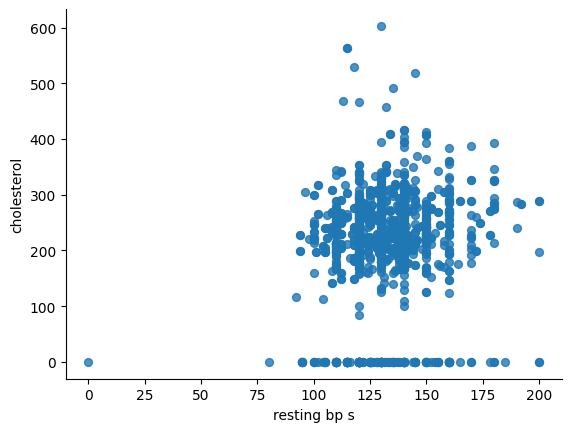

In [8]:
# @title resting bp s vs cholesterol
dataSet.plot(kind='scatter', x='resting bp s', y='cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From The graph we can see that there is zero values in the cholesterol & resting bp which is not possible. This is one of the problems to be tackled in the data preparation. To make sure let's plot every colum indpendently.

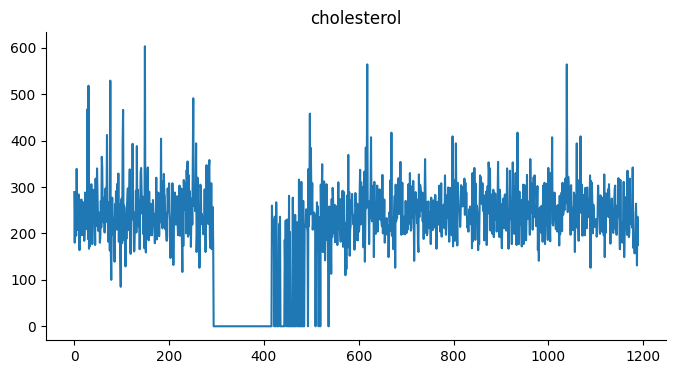

In [9]:
# @title cholesterol
dataSet['cholesterol'].plot(kind='line', figsize=(8, 4), title='cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

As you see from the graph we found zero value in the `cholesterol` which doesn't make sense because this means that you are died 😅. This is an issue to fix.

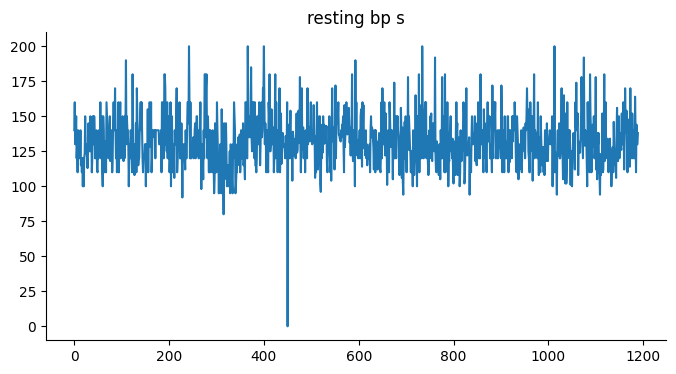

In [10]:
# @title resting bp s
dataSet['resting bp s'].plot(kind='line', figsize=(8, 4), title='resting bp s')
plt.gca().spines[['top', 'right']].set_visible(False)

As you see from the graph we found zero value in the `resting bp s` which doesn't make sense because this means that you are died 😅. But to make sure let's see the plot in the histo graph.

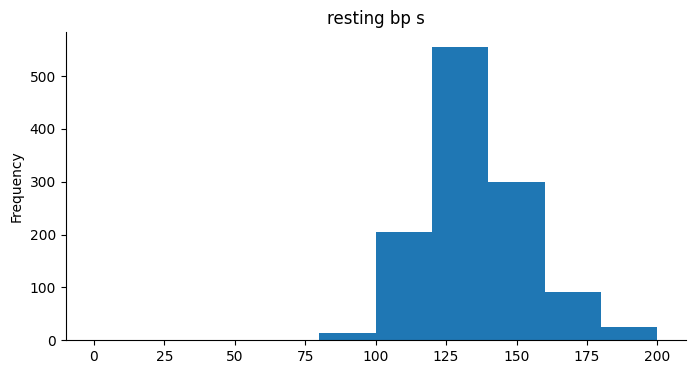

In [113]:
dataSet['resting bp s'].plot(kind='hist', figsize=(8, 4), title='resting bp s')
plt.gca().spines[['top', 'right']].set_visible(False)

After seeing the histogram graph there doesn't look like there are any zero values in the `resting bp s` colume.
The vertical drop in the previuos graph that nearly reaches zero is likely due to an error or anomaly in the data collection or recording process.

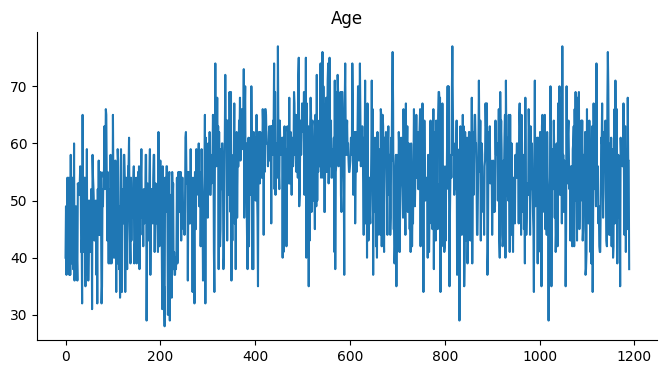

In [17]:
# @title Age
dataSet['age'].plot(kind="line", figsize=(8, 4), title= "Age")
plt.gca().spines[['top', 'right']].set_visible(False)

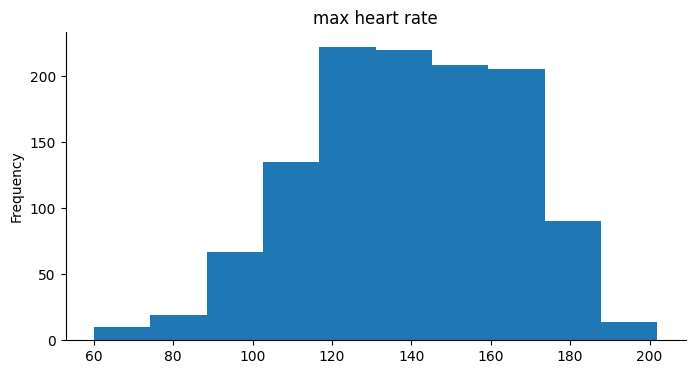

In [75]:
# @title max heart rate
dataSet['max heart rate'].plot(kind="hist", figsize=(8, 4), title= "max heart rate")
plt.gca().spines[['top', 'right']].set_visible(False)

After analyzing the `max heart rate` column, we found that there are outliers. From the documentation of the dataset, the range of values should be from 71-202. We found values below 71. This could be because of an error during data collection or an error in the documentation range. So, we will tackle this as an error during data collection. By doing that, we will replace values below 71 with the minimum value, 71.

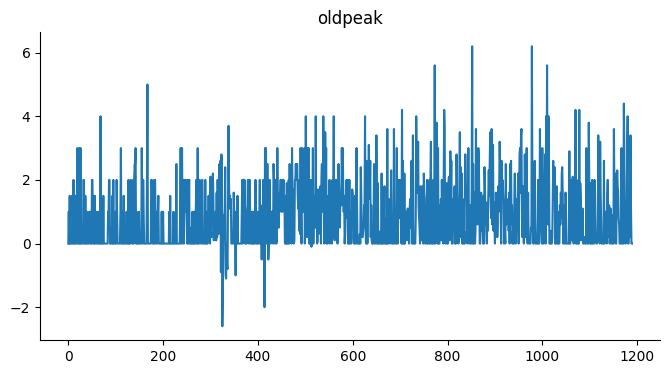

In [20]:
# @title oldPeak
dataSet['oldpeak'].plot(kind="line", figsize=(8, 4), title= "oldpeak")
plt.gca().spines[['top', 'right']].set_visible(False)

As you can see we can spot outliers, there are some couple of values under zero. but due to lack of documentation we don't know if this should be as it is or not. SO we are going to leave it as it is.

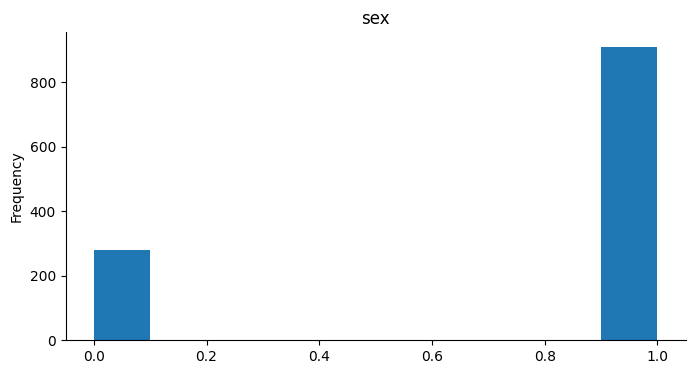

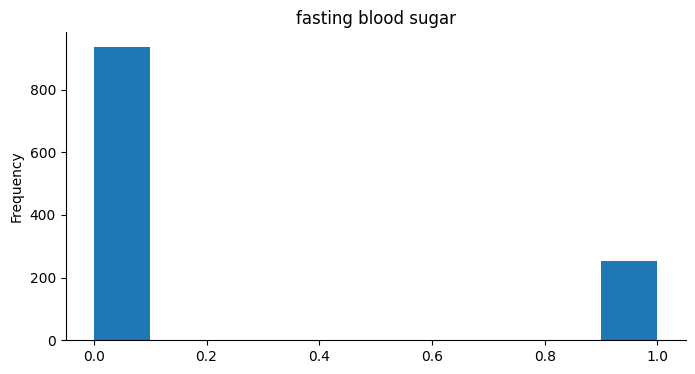

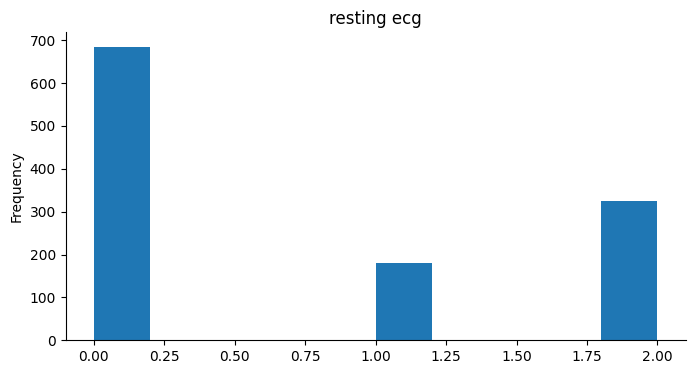

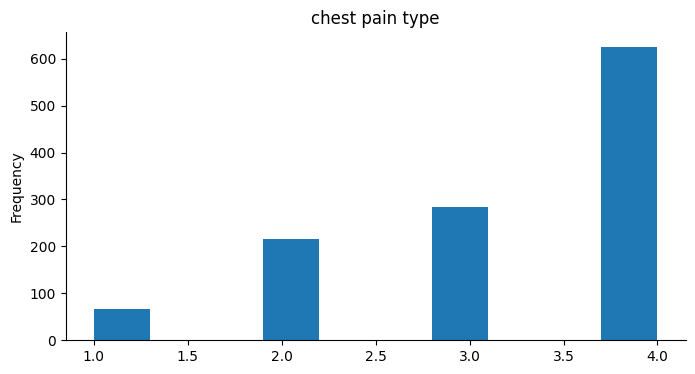

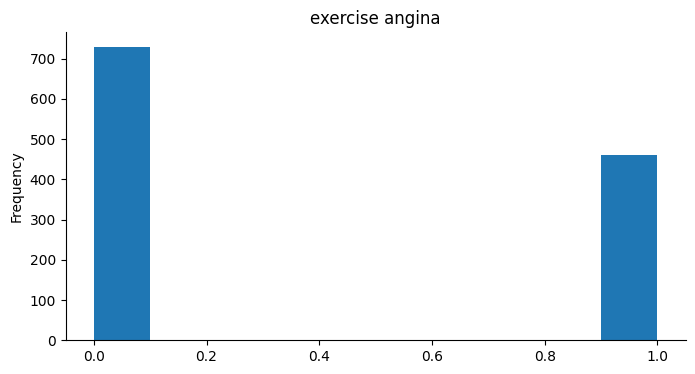

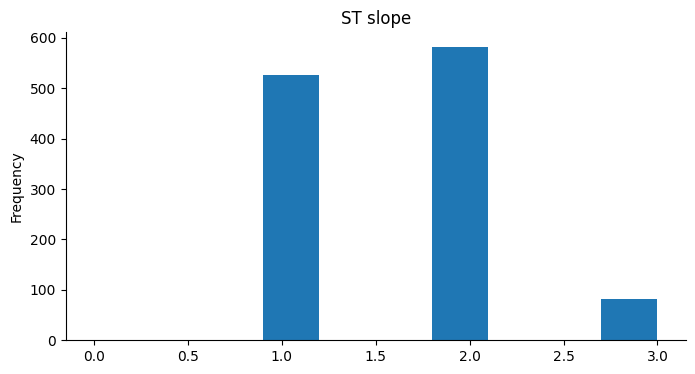

In [66]:
# @title sex & fasting blood sugar & resting ecg

dataSet['sex'].plot(kind="hist", figsize=(8, 4), title= "sex")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['fasting blood sugar'].plot(kind="hist", figsize=(8, 4), title= "fasting blood sugar")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['resting ecg'].plot(kind="hist", figsize=(8, 4), title= "resting ecg")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['chest pain type'].plot(kind="hist", figsize=(8, 4), title= "chest pain type")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['exercise angina'].plot(kind="hist", figsize=(8, 4), title= "exercise angina")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['ST slope'].plot(kind="hist", figsize=(8, 4), title= "ST slope")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


## Data Preparation

Now after finishing the analysis of the data we will tackle the issues we found with the data:


1.   Outliare in the `max heart rate` colume
3.   Zero value in the `cholesterol` colume





# First issue
To remove the values less than 71 and replace them with minumim value which is 71 in the `max heart rate`.

In [84]:
modified_data = [value if value >= 71 else 71 for value in dataSet['max heart rate']]
dataSet['max heart rate'] = modified_data

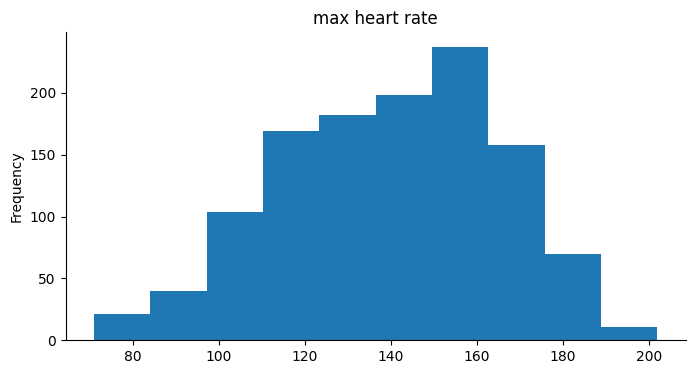

In [85]:
dataSet['max heart rate'].plot(kind="hist", figsize=(8, 4), title= "max heart rate")
plt.gca().spines[['top', 'right']].set_visible(False)

# Second issue
To remove the Zero values from the `cholesterol` and replace it with the mean.

In [115]:
# first let's get the mean value of the 'resting bp s'
mean = dataSet['cholesterol'].mean()
print(mean)

210.36386554621848


In [116]:
# Replacing the zero values with the mean
modified_data = [value if value > 0 else mean for value in dataSet['cholesterol']]
dataSet['cholesterol'] = modified_data

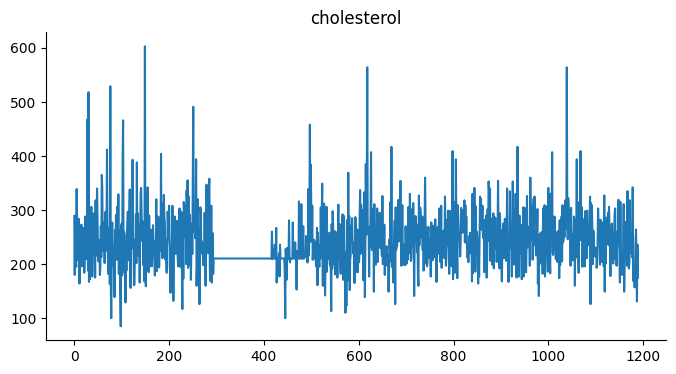

In [117]:
dataSet['cholesterol'].plot(kind="line", figsize=(8, 4), title= "cholesterol")
plt.gca().spines[['top', 'right']].set_visible(False)

Now we have cleaned our data and solved all the problems related to it. Now comes the fun part analysis.

In [118]:
dataSet.to_csv("../content/cleaned_heart_statlog_cleveland_hungary_final.csv")